In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../../Datasets/class_exercise/Tractor-Sales.csv')

In [3]:
df

Month-Year  Number of Tractor Sold
0       Jan-03                     141
1       Feb-03                     157
2       Mar-03                     185
3       Apr-03                     199
4       May-03                     203
..         ...                     ...
139     Aug-14                     848
140     Sep-14                     640
141     Oct-14                     581
142     Nov-14                     519
143     Dec-14                     605

[144 rows x 2 columns]

In [4]:
df.isnull().sum()

Month-Year                0
Number of Tractor Sold    0
dtype: int64

In [5]:
df.shape

(144, 2)

In [6]:
df.duplicated().sum()

0

In [7]:
df["Month-Year"].str.lower().value_counts()

Month-Year
jan-03    1
feb-03    1
sep-10    1
oct-10    1
nov-10    1
         ..
jan-07    1
feb-07    1
mar-07    1
apr-07    1
dec-14    1
Name: count, Length: 144, dtype: int64

In [8]:
df.head(2)

Month-Year  Number of Tractor Sold
0     Jan-03                     141
1     Feb-03                     157

In [9]:
df.dtypes

Month-Year                object
Number of Tractor Sold     int64
dtype: object

In [10]:
df["date"]=pd.to_datetime(df["Month-Year"], format="%b-%y")


In [11]:
df.dtypes

Month-Year                        object
Number of Tractor Sold             int64
date                      datetime64[ns]
dtype: object

In [12]:
df["Month_name"]=df["date"].dt.month_name()
df["year"]=df["date"].dt.year
df.head(3)

Month-Year  Number of Tractor Sold       date Month_name  year
0     Jan-03                     141 2003-01-01    January  2003
1     Feb-03                     157 2003-02-01   February  2003
2     Mar-03                     185 2003-03-01      March  2003

In [13]:
df["Month_name"].value_counts().index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month_name')

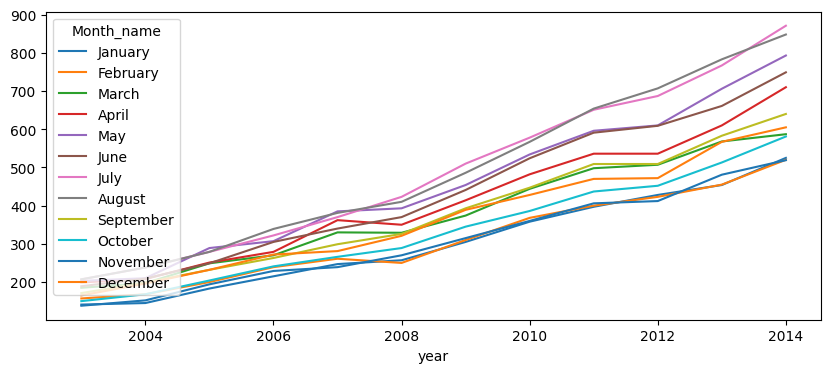

In [14]:
dt1=df.pivot_table(index="year", columns="Month_name", values="Number of Tractor Sold", aggfunc="sum")
dt2=dt1[['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']]
# dt2
dt2.plot(kind="line", figsize=(10,4))
plt.show()

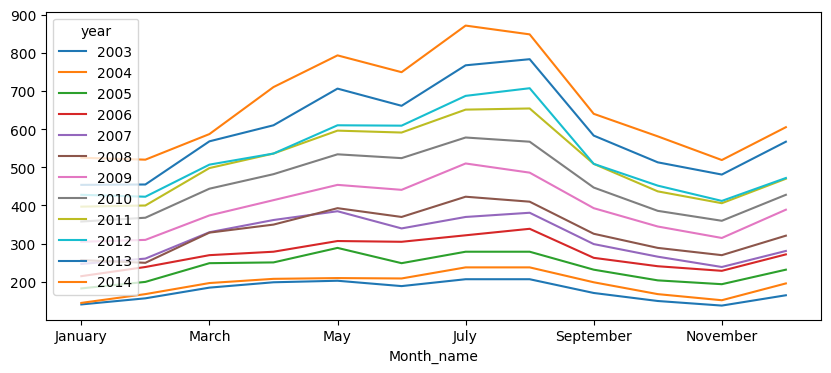

In [15]:
dt2.T.plot(kind="line", figsize=(10,4))
plt.show()

In [16]:
df.head(2)

Month-Year  Number of Tractor Sold       date Month_name  year
0     Jan-03                     141 2003-01-01    January  2003
1     Feb-03                     157 2003-02-01   February  2003

In [17]:
df.rename(columns={"Number of Tractor Sold":"Number_of_Tractor_Sold"}, inplace=True)

In [18]:
df.set_index("date", inplace=True)

In [19]:
df.head(3)

Month-Year  Number_of_Tractor_Sold Month_name  year
date                                                          
2003-01-01     Jan-03                     141    January  2003
2003-02-01     Feb-03                     157   February  2003
2003-03-01     Mar-03                     185      March  2003

In [20]:
df.index

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name='date', length=144, freq=None)

In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
ts=df.Number_of_Tractor_Sold  # Extracting only single columns which will make it Series

In [23]:
ts.head()

date
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Name: Number_of_Tractor_Sold, dtype: int64

In [24]:
type(ts)

pandas.core.series.Series

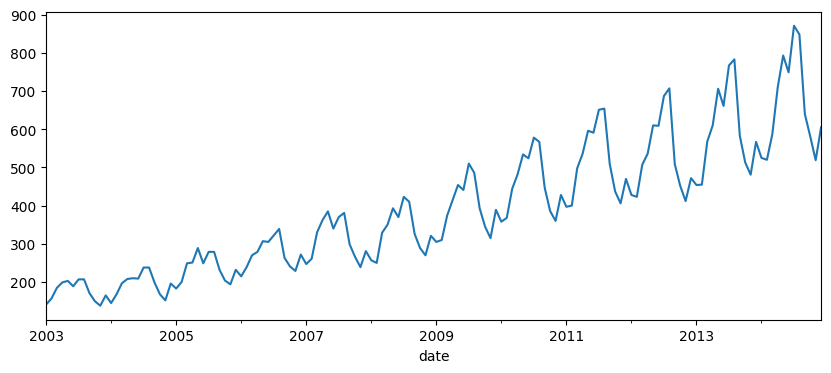

In [25]:
ts.plot(kind="line", figsize=(10,4))
plt.show()

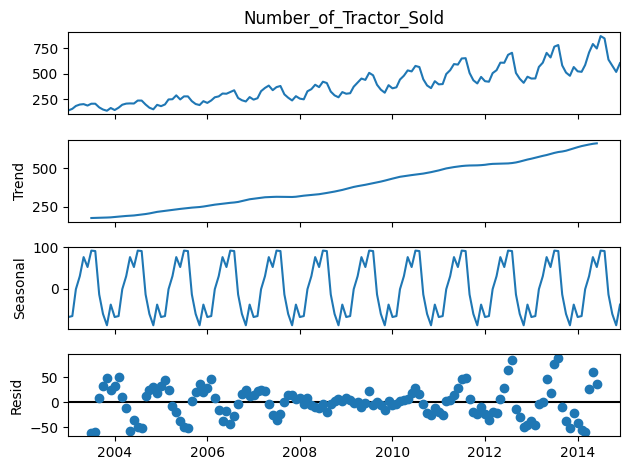

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed=seasonal_decompose(ts)
decomposed.plot()
plt.show()

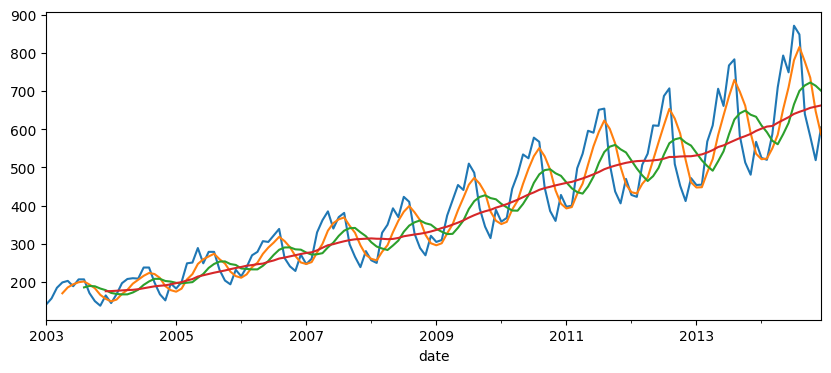

In [28]:
ts.plot(figsize=(10,4))
ts.rolling(4).mean().plot(figsize=(10,4))
ts.rolling(8).mean().plot(figsize=(10,4))
ts.rolling(12).mean().plot(figsize=(10,4))
plt.show()

In [29]:
# Exponential smoothing techniques
# splitting data

train=ts["2003-01-01":"2014-06-30"]  # 11 years and 6 month into train
test=ts["2014-06-30":"2014-12-31"]  # 6 month data into test

In [34]:
# single Exponential, Double , Triple
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # Importing the Model

alpha=.1
beta=.55
gamma=.05

exp_model=ExponentialSmoothing(train, seasonal="mul", trend="mul",seasonal_periods=12, freq="MS")  # MS- Start of month


exp_trained_model=exp_model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma) # fitting the model

In [36]:
print(exp_trained_model.summary())

                        ExponentialSmoothing Model Results                        
Dep. Variable:     Number_of_Tractor_Sold   No. Observations:                  138
Model:               ExponentialSmoothing   SSE                          69823.099
Optimized:                           True   AIC                            891.252
Trend:                     Multiplicative   BIC                            938.088
Seasonal:                  Multiplicative   AICC                           897.000
Seasonal Periods:                      12   Date:                 Sat, 09 Nov 2024
Box-Cox:                            False   Time:                         15:01:23
Box-Cox Coeff.:                      None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothi

In [37]:
exp_fcast=exp_trained_model.forecast(6)
exp_fcast

2014-07-01    856.067751
2014-08-01    854.897677
2014-09-01    656.096340
2014-10-01    571.845531
2014-11-01    526.514064
2014-12-01    620.380429
Freq: MS, dtype: float64

In [38]:
test

date
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Number_of_Tractor_Sold, dtype: int64

In [39]:
print("MAE", abs(test-exp_fcast).mean())
print("MSE", ((test-exp_fcast)**2).mean())
print("RMSE", ((test-exp_fcast)**2).mean()**0.5)

MAE 11.662538076246676
MSE 151.07754014596773
RMSE 12.291360386302557


In [45]:
# Finding the optimized value of alpha, beta, gamma
import numpy as np
alpha=np.linspace(0,1,36)
beta=np.linspace(0,1,36)
gamma=np.linspace(0,1, 36)
best_alpha=None
best_beta=None
best_gamma=None
mae=789876567
al=[]
bt=[]
gm=[]
ma=[]
cnt=0

for i in alpha:
  for j in beta:
    for k in gamma:
      exp_model=ExponentialSmoothing(train, seasonal="mul", trend="mul",seasonal_periods=12, freq="MS")  # MS- Start of month
      exp_trained_model=exp_model.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k) # fitting the model
      exp_fcast=exp_trained_model.forecast(6)
      temp_mae=abs(test-exp_fcast).mean()  # mae 120
      al.append(i)
      bt.append(j)
      gm.append(k)
      ma.append(temp_mae)
      cnt+=1
      print(f"No of Loops executed {cnt}\n")

      if temp_mae<mae:
        mae=temp_mae
        best_alpha=i
        best_beta=j
        best_gamma=k

results=pd.DataFrame({"alpha":al, "beta":bt, "gamma":gm, "mae":ma})
best_results={"best_alpha":best_alpha, "best_beta":best_beta, "best_gamma":best_gamma, "best_mae":mae}

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Che

No of Loops executed 1

No of Loops executed 2

No of Loops executed 3

No of Loops executed 4

No of Loops executed 5

No of Loops executed 6

No of Loops executed 7

No of Loops executed 8

No of Loops executed 9

No of Loops executed 10

No of Loops executed 11

No of Loops executed 12

No of Loops executed 13

No of Loops executed 14

No of Loops executed 15

No of Loops executed 16

No of Loops executed 17

No of Loops executed 18

No of Loops executed 19

No of Loops executed 20

No of Loops executed 21

No of Loops executed 22

No of Loops executed 23

No of Loops executed 24

No of Loops executed 25

No of Loops executed 26

No of Loops executed 27

No of Loops executed 28

No of Loops executed 29

No of Loops executed 30

No of Loops executed 31

No of Loops executed 32

No of Loops executed 33

No of Loops executed 34

No of Loops executed 35

No of Loops executed 36

No of Loops executed 37

No of Loops executed 38

No of Loops executed 39

No of Loops executed 40

No of Loo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 52

No of Loops executed 53

No of Loops executed 54

No of Loops executed 55

No of Loops executed 56

No of Loops executed 57

No of Loops executed 58

No of Loops executed 59

No of Loops executed 60

No of Loops executed 61

No of Loops executed 62

No of Loops executed 63

No of Loops executed 64

No of Loops executed 65

No of Loops executed 66

No of Loops executed 67

No of Loops executed 68

No of Loops executed 69

No of Loops executed 70

No of Loops executed 71

No of Loops executed 72

No of Loops executed 73

No of Loops executed 74

No of Loops executed 75

No of Loops executed 76

No of Loops executed 77

No of Loops executed 78

No of Loops executed 79

No of Loops executed 80



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 81

No of Loops executed 82

No of Loops executed 83

No of Loops executed 84

No of Loops executed 85

No of Loops executed 86

No of Loops executed 87

No of Loops executed 88

No of Loops executed 89

No of Loops executed 90

No of Loops executed 91

No of Loops executed 92

No of Loops executed 93

No of Loops executed 94

No of Loops executed 95

No of Loops executed 96

No of Loops executed 97

No of Loops executed 98

No of Loops executed 99

No of Loops executed 100

No of Loops executed 101

No of Loops executed 102

No of Loops executed 103

No of Loops executed 104

No of Loops executed 105

No of Loops executed 106

No of Loops executed 107

No of Loops executed 108

No of Loops executed 109

No of Loops executed 110

No of Loops executed 111

No of Loops executed 112

No of Loops executed 113

No of Loops executed 114

No of Loops executed 115

No of Loops executed 116

No of Loops executed 117

No of Loops executed 118

No of Loops executed 119

No of

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 122

No of Loops executed 123

No of Loops executed 124

No of Loops executed 125

No of Loops executed 126

No of Loops executed 127

No of Loops executed 128

No of Loops executed 129

No of Loops executed 130

No of Loops executed 131

No of Loops executed 132

No of Loops executed 133

No of Loops executed 134

No of Loops executed 135

No of Loops executed 136

No of Loops executed 137

No of Loops executed 138

No of Loops executed 139

No of Loops executed 140

No of Loops executed 141

No of Loops executed 142

No of Loops executed 143

No of Loops executed 144

No of Loops executed 145

No of Loops executed 146

No of Loops executed 147

No of Loops executed 148

No of Loops executed 149

No of Loops executed 150

No of Loops executed 151

No of Loops executed 152

No of Loops executed 153

No of Loops executed 154

No of Loops executed 155

No of Loops executed 156

No of Loops executed 157

No of Loops executed 158

No of Loops executed 159

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 165

No of Loops executed 166

No of Loops executed 167

No of Loops executed 168

No of Loops executed 169

No of Loops executed 170

No of Loops executed 171

No of Loops executed 172

No of Loops executed 173

No of Loops executed 174

No of Loops executed 175

No of Loops executed 176

No of Loops executed 177

No of Loops executed 178

No of Loops executed 179

No of Loops executed 180

No of Loops executed 181

No of Loops executed 182

No of Loops executed 183

No of Loops executed 184

No of Loops executed 185



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 186

No of Loops executed 187

No of Loops executed 188

No of Loops executed 189

No of Loops executed 190

No of Loops executed 191

No of Loops executed 192

No of Loops executed 193

No of Loops executed 194

No of Loops executed 195

No of Loops executed 196

No of Loops executed 197

No of Loops executed 198

No of Loops executed 199

No of Loops executed 200

No of Loops executed 201

No of Loops executed 202

No of Loops executed 203

No of Loops executed 204

No of Loops executed 205

No of Loops executed 206

No of Loops executed 207

No of Loops executed 208

No of Loops executed 209

No of Loops executed 210

No of Loops executed 211

No of Loops executed 212

No of Loops executed 213

No of Loops executed 214

No of Loops executed 215

No of Loops executed 216

No of Loops executed 217

No of Loops executed 218

No of Loops executed 219

No of Loops executed 220

No of Loops executed 221

No of Loops executed 222

No of Loops executed 223

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 227

No of Loops executed 228

No of Loops executed 229

No of Loops executed 230

No of Loops executed 231

No of Loops executed 232

No of Loops executed 233

No of Loops executed 234

No of Loops executed 235

No of Loops executed 236

No of Loops executed 237

No of Loops executed 238

No of Loops executed 239

No of Loops executed 240

No of Loops executed 241

No of Loops executed 242

No of Loops executed 243

No of Loops executed 244

No of Loops executed 245

No of Loops executed 246

No of Loops executed 247

No of Loops executed 248

No of Loops executed 249

No of Loops executed 250

No of Loops executed 251

No of Loops executed 252

No of Loops executed 253

No of Loops executed 254

No of Loops executed 255

No of Loops executed 256

No of Loops executed 257

No of Loops executed 258

No of Loops executed 259

No of Loops executed 260

No of Loops executed 261

No of Loops executed 262

No of Loops executed 263

No of Loops executed 264

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 267

No of Loops executed 268

No of Loops executed 269

No of Loops executed 270

No of Loops executed 271

No of Loops executed 272

No of Loops executed 273

No of Loops executed 274

No of Loops executed 275

No of Loops executed 276

No of Loops executed 277

No of Loops executed 278

No of Loops executed 279

No of Loops executed 280

No of Loops executed 281

No of Loops executed 282

No of Loops executed 283

No of Loops executed 284

No of Loops executed 285

No of Loops executed 286

No of Loops executed 287

No of Loops executed 288

No of Loops executed 289

No of Loops executed 290

No of Loops executed 291

No of Loops executed 292

No of Loops executed 293

No of Loops executed 294

No of Loops executed 295

No of Loops executed 296

No of Loops executed 297

No of Loops executed 298

No of Loops executed 299

No of Loops executed 300

No of Loops executed 301

No of Loops executed 302

No of Loops executed 303

No of Loops executed 304

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 313

No of Loops executed 314

No of Loops executed 315

No of Loops executed 316

No of Loops executed 317

No of Loops executed 318

No of Loops executed 319

No of Loops executed 320

No of Loops executed 321

No of Loops executed 322

No of Loops executed 323

No of Loops executed 324

No of Loops executed 325

No of Loops executed 326

No of Loops executed 327

No of Loops executed 328

No of Loops executed 329

No of Loops executed 330

No of Loops executed 331

No of Loops executed 332

No of Loops executed 333

No of Loops executed 334

No of Loops executed 335

No of Loops executed 336

No of Loops executed 337



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 338

No of Loops executed 339

No of Loops executed 340

No of Loops executed 341

No of Loops executed 342

No of Loops executed 343

No of Loops executed 344

No of Loops executed 345

No of Loops executed 346

No of Loops executed 347

No of Loops executed 348

No of Loops executed 349

No of Loops executed 350

No of Loops executed 351

No of Loops executed 352

No of Loops executed 353

No of Loops executed 354

No of Loops executed 355

No of Loops executed 356

No of Loops executed 357

No of Loops executed 358

No of Loops executed 359

No of Loops executed 360

No of Loops executed 361

No of Loops executed 362

No of Loops executed 363

No of Loops executed 364

No of Loops executed 365

No of Loops executed 366

No of Loops executed 367

No of Loops executed 368

No of Loops executed 369

No of Loops executed 370

No of Loops executed 371

No of Loops executed 372

No of Loops executed 373

No of Loops executed 374

No of Loops executed 375

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 381

No of Loops executed 382

No of Loops executed 383

No of Loops executed 384

No of Loops executed 385

No of Loops executed 386

No of Loops executed 387

No of Loops executed 388

No of Loops executed 389

No of Loops executed 390

No of Loops executed 391

No of Loops executed 392

No of Loops executed 393

No of Loops executed 394

No of Loops executed 395

No of Loops executed 396

No of Loops executed 397

No of Loops executed 398

No of Loops executed 399

No of Loops executed 400

No of Loops executed 401

No of Loops executed 402

No of Loops executed 403

No of Loops executed 404

No of Loops executed 405



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 406

No of Loops executed 407

No of Loops executed 408

No of Loops executed 409

No of Loops executed 410

No of Loops executed 411

No of Loops executed 412

No of Loops executed 413

No of Loops executed 414

No of Loops executed 415

No of Loops executed 416

No of Loops executed 417

No of Loops executed 418

No of Loops executed 419

No of Loops executed 420

No of Loops executed 421

No of Loops executed 422

No of Loops executed 423

No of Loops executed 424

No of Loops executed 425

No of Loops executed 426

No of Loops executed 427

No of Loops executed 428

No of Loops executed 429

No of Loops executed 430

No of Loops executed 431

No of Loops executed 432

No of Loops executed 433

No of Loops executed 434

No of Loops executed 435

No of Loops executed 436

No of Loops executed 437

No of Loops executed 438

No of Loops executed 439

No of Loops executed 440

No of Loops executed 441

No of Loops executed 442

No of Loops executed 443

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 446

No of Loops executed 447

No of Loops executed 448

No of Loops executed 449

No of Loops executed 450

No of Loops executed 451

No of Loops executed 452

No of Loops executed 453

No of Loops executed 454

No of Loops executed 455

No of Loops executed 456

No of Loops executed 457

No of Loops executed 458

No of Loops executed 459

No of Loops executed 460

No of Loops executed 461

No of Loops executed 462

No of Loops executed 463

No of Loops executed 464

No of Loops executed 465

No of Loops executed 466

No of Loops executed 467

No of Loops executed 468

No of Loops executed 469

No of Loops executed 470

No of Loops executed 471

No of Loops executed 472

No of Loops executed 473

No of Loops executed 474

No of Loops executed 475

No of Loops executed 476

No of Loops executed 477

No of Loops executed 478

No of Loops executed 479

No of Loops executed 480

No of Loops executed 481

No of Loops executed 482

No of Loops executed 483

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 486

No of Loops executed 487

No of Loops executed 488

No of Loops executed 489

No of Loops executed 490

No of Loops executed 491

No of Loops executed 492

No of Loops executed 493

No of Loops executed 494

No of Loops executed 495

No of Loops executed 496

No of Loops executed 497

No of Loops executed 498

No of Loops executed 499

No of Loops executed 500

No of Loops executed 501

No of Loops executed 502

No of Loops executed 503

No of Loops executed 504



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 505

No of Loops executed 506

No of Loops executed 507

No of Loops executed 508

No of Loops executed 509

No of Loops executed 510

No of Loops executed 511

No of Loops executed 512

No of Loops executed 513

No of Loops executed 514

No of Loops executed 515

No of Loops executed 516

No of Loops executed 517

No of Loops executed 518

No of Loops executed 519

No of Loops executed 520

No of Loops executed 521

No of Loops executed 522

No of Loops executed 523

No of Loops executed 524

No of Loops executed 525

No of Loops executed 526

No of Loops executed 527

No of Loops executed 528

No of Loops executed 529

No of Loops executed 530

No of Loops executed 531

No of Loops executed 532

No of Loops executed 533

No of Loops executed 534

No of Loops executed 535

No of Loops executed 536

No of Loops executed 537

No of Loops executed 538

No of Loops executed 539

No of Loops executed 540

No of Loops executed 541

No of Loops executed 542

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 553

No of Loops executed 554

No of Loops executed 555

No of Loops executed 556

No of Loops executed 557

No of Loops executed 558

No of Loops executed 559

No of Loops executed 560

No of Loops executed 561

No of Loops executed 562

No of Loops executed 563

No of Loops executed 564

No of Loops executed 565

No of Loops executed 566

No of Loops executed 567

No of Loops executed 568

No of Loops executed 569

No of Loops executed 570

No of Loops executed 571

No of Loops executed 572

No of Loops executed 573

No of Loops executed 574

No of Loops executed 575

No of Loops executed 576

No of Loops executed 577

No of Loops executed 578

No of Loops executed 579

No of Loops executed 580

No of Loops executed 581

No of Loops executed 582

No of Loops executed 583

No of Loops executed 584

No of Loops executed 585

No of Loops executed 586

No of Loops executed 587

No of Loops executed 588

No of Loops executed 589

No of Loops executed 590

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 602

No of Loops executed 603

No of Loops executed 604

No of Loops executed 605

No of Loops executed 606

No of Loops executed 607

No of Loops executed 608

No of Loops executed 609

No of Loops executed 610

No of Loops executed 611

No of Loops executed 612

No of Loops executed 613

No of Loops executed 614

No of Loops executed 615

No of Loops executed 616

No of Loops executed 617

No of Loops executed 618

No of Loops executed 619

No of Loops executed 620

No of Loops executed 621

No of Loops executed 622

No of Loops executed 623



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 624

No of Loops executed 625

No of Loops executed 626

No of Loops executed 627

No of Loops executed 628

No of Loops executed 629

No of Loops executed 630

No of Loops executed 631

No of Loops executed 632

No of Loops executed 633

No of Loops executed 634

No of Loops executed 635

No of Loops executed 636

No of Loops executed 637

No of Loops executed 638

No of Loops executed 639

No of Loops executed 640

No of Loops executed 641

No of Loops executed 642

No of Loops executed 643

No of Loops executed 644

No of Loops executed 645

No of Loops executed 646

No of Loops executed 647

No of Loops executed 648

No of Loops executed 649

No of Loops executed 650

No of Loops executed 651

No of Loops executed 652

No of Loops executed 653

No of Loops executed 654

No of Loops executed 655

No of Loops executed 656

No of Loops executed 657

No of Loops executed 658

No of Loops executed 659

No of Loops executed 660



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 661

No of Loops executed 662

No of Loops executed 663

No of Loops executed 664

No of Loops executed 665

No of Loops executed 666

No of Loops executed 667

No of Loops executed 668

No of Loops executed 669

No of Loops executed 670

No of Loops executed 671

No of Loops executed 672

No of Loops executed 673

No of Loops executed 674

No of Loops executed 675

No of Loops executed 676

No of Loops executed 677

No of Loops executed 678

No of Loops executed 679

No of Loops executed 680

No of Loops executed 681

No of Loops executed 682

No of Loops executed 683

No of Loops executed 684

No of Loops executed 685

No of Loops executed 686

No of Loops executed 687

No of Loops executed 688

No of Loops executed 689

No of Loops executed 690

No of Loops executed 691

No of Loops executed 692

No of Loops executed 693

No of Loops executed 694

No of Loops executed 695

No of Loops executed 696

No of Loops executed 697

No of Loops executed 698



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 699

No of Loops executed 700

No of Loops executed 701

No of Loops executed 702

No of Loops executed 703

No of Loops executed 704

No of Loops executed 705

No of Loops executed 706

No of Loops executed 707

No of Loops executed 708

No of Loops executed 709

No of Loops executed 710

No of Loops executed 711

No of Loops executed 712

No of Loops executed 713

No of Loops executed 714

No of Loops executed 715

No of Loops executed 716

No of Loops executed 717

No of Loops executed 718

No of Loops executed 719

No of Loops executed 720

No of Loops executed 721

No of Loops executed 722

No of Loops executed 723

No of Loops executed 724

No of Loops executed 725

No of Loops executed 726

No of Loops executed 727

No of Loops executed 728

No of Loops executed 729

No of Loops executed 730

No of Loops executed 731

No of Loops executed 732

No of Loops executed 733

No of Loops executed 734

No of Loops executed 735

No of Loops executed 736

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 738

No of Loops executed 739

No of Loops executed 740

No of Loops executed 741

No of Loops executed 742

No of Loops executed 743

No of Loops executed 744

No of Loops executed 745

No of Loops executed 746

No of Loops executed 747

No of Loops executed 748

No of Loops executed 749

No of Loops executed 750

No of Loops executed 751

No of Loops executed 752

No of Loops executed 753

No of Loops executed 754

No of Loops executed 755

No of Loops executed 756



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 757

No of Loops executed 758

No of Loops executed 759

No of Loops executed 760

No of Loops executed 761

No of Loops executed 762

No of Loops executed 763

No of Loops executed 764

No of Loops executed 765

No of Loops executed 766

No of Loops executed 767

No of Loops executed 768

No of Loops executed 769

No of Loops executed 770

No of Loops executed 771

No of Loops executed 772

No of Loops executed 773

No of Loops executed 774

No of Loops executed 775

No of Loops executed 776

No of Loops executed 777

No of Loops executed 778

No of Loops executed 779

No of Loops executed 780

No of Loops executed 781

No of Loops executed 782

No of Loops executed 783

No of Loops executed 784

No of Loops executed 785

No of Loops executed 786

No of Loops executed 787

No of Loops executed 788

No of Loops executed 789

No of Loops executed 790

No of Loops executed 791

No of Loops executed 792

No of Loops executed 793

No of Loops executed 794

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 800

No of Loops executed 801

No of Loops executed 802

No of Loops executed 803

No of Loops executed 804

No of Loops executed 805

No of Loops executed 806

No of Loops executed 807

No of Loops executed 808

No of Loops executed 809

No of Loops executed 810

No of Loops executed 811

No of Loops executed 812

No of Loops executed 813

No of Loops executed 814

No of Loops executed 815

No of Loops executed 816

No of Loops executed 817

No of Loops executed 818

No of Loops executed 819

No of Loops executed 820

No of Loops executed 821

No of Loops executed 822

No of Loops executed 823

No of Loops executed 824

No of Loops executed 825

No of Loops executed 826

No of Loops executed 827

No of Loops executed 828

No of Loops executed 829

No of Loops executed 830

No of Loops executed 831

No of Loops executed 832

No of Loops executed 833

No of Loops executed 834

No of Loops executed 835

No of Loops executed 836

No of Loops executed 837

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 841

No of Loops executed 842

No of Loops executed 843

No of Loops executed 844

No of Loops executed 845

No of Loops executed 846

No of Loops executed 847

No of Loops executed 848

No of Loops executed 849

No of Loops executed 850

No of Loops executed 851

No of Loops executed 852

No of Loops executed 853

No of Loops executed 854

No of Loops executed 855

No of Loops executed 856

No of Loops executed 857

No of Loops executed 858

No of Loops executed 859

No of Loops executed 860

No of Loops executed 861

No of Loops executed 862

No of Loops executed 863

No of Loops executed 864

No of Loops executed 865

No of Loops executed 866

No of Loops executed 867

No of Loops executed 868

No of Loops executed 869

No of Loops executed 870

No of Loops executed 871

No of Loops executed 872

No of Loops executed 873

No of Loops executed 874

No of Loops executed 875

No of Loops executed 876

No of Loops executed 877

No of Loops executed 878

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 891

No of Loops executed 892

No of Loops executed 893

No of Loops executed 894

No of Loops executed 895

No of Loops executed 896

No of Loops executed 897

No of Loops executed 898

No of Loops executed 899

No of Loops executed 900

No of Loops executed 901

No of Loops executed 902

No of Loops executed 903

No of Loops executed 904

No of Loops executed 905

No of Loops executed 906

No of Loops executed 907

No of Loops executed 908

No of Loops executed 909

No of Loops executed 910

No of Loops executed 911

No of Loops executed 912

No of Loops executed 913

No of Loops executed 914



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 915

No of Loops executed 916

No of Loops executed 917

No of Loops executed 918

No of Loops executed 919

No of Loops executed 920

No of Loops executed 921

No of Loops executed 922

No of Loops executed 923

No of Loops executed 924

No of Loops executed 925

No of Loops executed 926

No of Loops executed 927

No of Loops executed 928

No of Loops executed 929

No of Loops executed 930

No of Loops executed 931

No of Loops executed 932

No of Loops executed 933

No of Loops executed 934

No of Loops executed 935

No of Loops executed 936

No of Loops executed 937

No of Loops executed 938

No of Loops executed 939

No of Loops executed 940

No of Loops executed 941

No of Loops executed 942

No of Loops executed 943

No of Loops executed 944

No of Loops executed 945

No of Loops executed 946

No of Loops executed 947

No of Loops executed 948

No of Loops executed 949

No of Loops executed 950

No of Loops executed 951

No of Loops executed 952

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 958

No of Loops executed 959

No of Loops executed 960

No of Loops executed 961

No of Loops executed 962

No of Loops executed 963

No of Loops executed 964

No of Loops executed 965

No of Loops executed 966

No of Loops executed 967

No of Loops executed 968

No of Loops executed 969

No of Loops executed 970

No of Loops executed 971

No of Loops executed 972

No of Loops executed 973

No of Loops executed 974

No of Loops executed 975

No of Loops executed 976

No of Loops executed 977

No of Loops executed 978

No of Loops executed 979

No of Loops executed 980

No of Loops executed 981

No of Loops executed 982



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 983

No of Loops executed 984

No of Loops executed 985

No of Loops executed 986

No of Loops executed 987

No of Loops executed 988

No of Loops executed 989

No of Loops executed 990

No of Loops executed 991

No of Loops executed 992

No of Loops executed 993

No of Loops executed 994

No of Loops executed 995

No of Loops executed 996

No of Loops executed 997

No of Loops executed 998

No of Loops executed 999

No of Loops executed 1000

No of Loops executed 1001

No of Loops executed 1002

No of Loops executed 1003

No of Loops executed 1004

No of Loops executed 1005

No of Loops executed 1006

No of Loops executed 1007

No of Loops executed 1008

No of Loops executed 1009

No of Loops executed 1010

No of Loops executed 1011

No of Loops executed 1012

No of Loops executed 1013

No of Loops executed 1014

No of Loops executed 1015

No of Loops executed 1016

No of Loops executed 1017

No of Loops executed 1018

No of Loops executed 1019

No of Loops execut

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1027

No of Loops executed 1028

No of Loops executed 1029

No of Loops executed 1030

No of Loops executed 1031

No of Loops executed 1032

No of Loops executed 1033

No of Loops executed 1034

No of Loops executed 1035

No of Loops executed 1036

No of Loops executed 1037

No of Loops executed 1038

No of Loops executed 1039

No of Loops executed 1040

No of Loops executed 1041

No of Loops executed 1042

No of Loops executed 1043

No of Loops executed 1044

No of Loops executed 1045

No of Loops executed 1046

No of Loops executed 1047

No of Loops executed 1048



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1049

No of Loops executed 1050

No of Loops executed 1051

No of Loops executed 1052

No of Loops executed 1053

No of Loops executed 1054

No of Loops executed 1055

No of Loops executed 1056

No of Loops executed 1057

No of Loops executed 1058

No of Loops executed 1059

No of Loops executed 1060

No of Loops executed 1061

No of Loops executed 1062

No of Loops executed 1063

No of Loops executed 1064

No of Loops executed 1065

No of Loops executed 1066

No of Loops executed 1067

No of Loops executed 1068

No of Loops executed 1069

No of Loops executed 1070

No of Loops executed 1071

No of Loops executed 1072

No of Loops executed 1073

No of Loops executed 1074

No of Loops executed 1075

No of Loops executed 1076

No of Loops executed 1077

No of Loops executed 1078

No of Loops executed 1079

No of Loops executed 1080

No of Loops executed 1081

No of Loops executed 1082

No of Loops executed 1083

No of Loops executed 1084

No of Loops executed 1085

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1094

No of Loops executed 1095

No of Loops executed 1096

No of Loops executed 1097

No of Loops executed 1098

No of Loops executed 1099

No of Loops executed 1100

No of Loops executed 1101

No of Loops executed 1102

No of Loops executed 1103

No of Loops executed 1104

No of Loops executed 1105

No of Loops executed 1106

No of Loops executed 1107

No of Loops executed 1108

No of Loops executed 1109

No of Loops executed 1110

No of Loops executed 1111

No of Loops executed 1112

No of Loops executed 1113

No of Loops executed 1114

No of Loops executed 1115

No of Loops executed 1116

No of Loops executed 1117

No of Loops executed 1118

No of Loops executed 1119

No of Loops executed 1120

No of Loops executed 1121

No of Loops executed 1122

No of Loops executed 1123

No of Loops executed 1124

No of Loops executed 1125

No of Loops executed 1126

No of Loops executed 1127



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1128

No of Loops executed 1129

No of Loops executed 1130

No of Loops executed 1131

No of Loops executed 1132

No of Loops executed 1133

No of Loops executed 1134

No of Loops executed 1135

No of Loops executed 1136

No of Loops executed 1137

No of Loops executed 1138

No of Loops executed 1139

No of Loops executed 1140

No of Loops executed 1141

No of Loops executed 1142

No of Loops executed 1143

No of Loops executed 1144

No of Loops executed 1145

No of Loops executed 1146

No of Loops executed 1147

No of Loops executed 1148

No of Loops executed 1149

No of Loops executed 1150

No of Loops executed 1151

No of Loops executed 1152

No of Loops executed 1153

No of Loops executed 1154

No of Loops executed 1155

No of Loops executed 1156

No of Loops executed 1157

No of Loops executed 1158

No of Loops executed 1159

No of Loops executed 1160

No of Loops executed 1161

No of Loops executed 1162

No of Loops executed 1163

No of Loops executed 1164

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1170

No of Loops executed 1171

No of Loops executed 1172

No of Loops executed 1173

No of Loops executed 1174

No of Loops executed 1175

No of Loops executed 1176

No of Loops executed 1177

No of Loops executed 1178

No of Loops executed 1179

No of Loops executed 1180

No of Loops executed 1181

No of Loops executed 1182

No of Loops executed 1183

No of Loops executed 1184

No of Loops executed 1185

No of Loops executed 1186

No of Loops executed 1187

No of Loops executed 1188

No of Loops executed 1189

No of Loops executed 1190

No of Loops executed 1191

No of Loops executed 1192

No of Loops executed 1193

No of Loops executed 1194

No of Loops executed 1195

No of Loops executed 1196



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1197

No of Loops executed 1198

No of Loops executed 1199

No of Loops executed 1200

No of Loops executed 1201

No of Loops executed 1202

No of Loops executed 1203

No of Loops executed 1204

No of Loops executed 1205

No of Loops executed 1206

No of Loops executed 1207

No of Loops executed 1208

No of Loops executed 1209

No of Loops executed 1210

No of Loops executed 1211

No of Loops executed 1212

No of Loops executed 1213

No of Loops executed 1214

No of Loops executed 1215

No of Loops executed 1216

No of Loops executed 1217

No of Loops executed 1218

No of Loops executed 1219

No of Loops executed 1220

No of Loops executed 1221

No of Loops executed 1222

No of Loops executed 1223

No of Loops executed 1224

No of Loops executed 1225

No of Loops executed 1226

No of Loops executed 1227

No of Loops executed 1228

No of Loops executed 1229

No of Loops executed 1230

No of Loops executed 1231

No of Loops executed 1232

No of Loops executed 1233

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1243

No of Loops executed 1244

No of Loops executed 1245

No of Loops executed 1246

No of Loops executed 1247

No of Loops executed 1248

No of Loops executed 1249

No of Loops executed 1250

No of Loops executed 1251

No of Loops executed 1252

No of Loops executed 1253

No of Loops executed 1254

No of Loops executed 1255

No of Loops executed 1256

No of Loops executed 1257

No of Loops executed 1258

No of Loops executed 1259

No of Loops executed 1260

No of Loops executed 1261

No of Loops executed 1262

No of Loops executed 1263

No of Loops executed 1264

No of Loops executed 1265

No of Loops executed 1266

No of Loops executed 1267

No of Loops executed 1268

No of Loops executed 1269



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1270

No of Loops executed 1271

No of Loops executed 1272

No of Loops executed 1273

No of Loops executed 1274

No of Loops executed 1275

No of Loops executed 1276

No of Loops executed 1277

No of Loops executed 1278

No of Loops executed 1279

No of Loops executed 1280

No of Loops executed 1281

No of Loops executed 1282

No of Loops executed 1283

No of Loops executed 1284

No of Loops executed 1285

No of Loops executed 1286

No of Loops executed 1287

No of Loops executed 1288

No of Loops executed 1289

No of Loops executed 1290

No of Loops executed 1291

No of Loops executed 1292

No of Loops executed 1293

No of Loops executed 1294

No of Loops executed 1295

No of Loops executed 1296

No of Loops executed 1297

No of Loops executed 1298

No of Loops executed 1299

No of Loops executed 1300

No of Loops executed 1301

No of Loops executed 1302

No of Loops executed 1303

No of Loops executed 1304

No of Loops executed 1305

No of Loops executed 1306

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 4867

No of Loops executed 4868

No of Loops executed 4869

No of Loops executed 4870

No of Loops executed 4871

No of Loops executed 4872

No of Loops executed 4873

No of Loops executed 4874

No of Loops executed 4875

No of Loops executed 4876

No of Loops executed 4877

No of Loops executed 4878

No of Loops executed 4879

No of Loops executed 4880

No of Loops executed 4881

No of Loops executed 4882

No of Loops executed 4883

No of Loops executed 4884

No of Loops executed 4885

No of Loops executed 4886

No of Loops executed 4887

No of Loops executed 4888

No of Loops executed 4889

No of Loops executed 4890

No of Loops executed 4891

No of Loops executed 4892

No of Loops executed 4893

No of Loops executed 4894

No of Loops executed 4895

No of Loops executed 4896

No of Loops executed 4897

No of Loops executed 4898

No of Loops executed 4899

No of Loops executed 4900

No of Loops executed 4901

No of Loops executed 4902

No of Loops executed 4903

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 4908

No of Loops executed 4909

No of Loops executed 4910

No of Loops executed 4911

No of Loops executed 4912

No of Loops executed 4913

No of Loops executed 4914

No of Loops executed 4915

No of Loops executed 4916

No of Loops executed 4917

No of Loops executed 4918

No of Loops executed 4919

No of Loops executed 4920

No of Loops executed 4921

No of Loops executed 4922

No of Loops executed 4923

No of Loops executed 4924

No of Loops executed 4925

No of Loops executed 4926

No of Loops executed 4927

No of Loops executed 4928

No of Loops executed 4929

No of Loops executed 4930

No of Loops executed 4931



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 4932

No of Loops executed 4933

No of Loops executed 4934

No of Loops executed 4935

No of Loops executed 4936

No of Loops executed 4937

No of Loops executed 4938

No of Loops executed 4939

No of Loops executed 4940

No of Loops executed 4941

No of Loops executed 4942

No of Loops executed 4943

No of Loops executed 4944

No of Loops executed 4945

No of Loops executed 4946

No of Loops executed 4947

No of Loops executed 4948

No of Loops executed 4949

No of Loops executed 4950

No of Loops executed 4951

No of Loops executed 4952

No of Loops executed 4953

No of Loops executed 4954

No of Loops executed 4955

No of Loops executed 4956

No of Loops executed 4957

No of Loops executed 4958

No of Loops executed 4959

No of Loops executed 4960

No of Loops executed 4961

No of Loops executed 4962

No of Loops executed 4963

No of Loops executed 4964

No of Loops executed 4965

No of Loops executed 4966

No of Loops executed 4967

No of Loops executed 4968

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 4977

No of Loops executed 4978

No of Loops executed 4979

No of Loops executed 4980

No of Loops executed 4981

No of Loops executed 4982

No of Loops executed 4983

No of Loops executed 4984

No of Loops executed 4985

No of Loops executed 4986

No of Loops executed 4987

No of Loops executed 4988

No of Loops executed 4989

No of Loops executed 4990

No of Loops executed 4991

No of Loops executed 4992

No of Loops executed 4993

No of Loops executed 4994

No of Loops executed 4995

No of Loops executed 4996

No of Loops executed 4997

No of Loops executed 4998

No of Loops executed 4999

No of Loops executed 5000

No of Loops executed 5001

No of Loops executed 5002

No of Loops executed 5003

No of Loops executed 5004

No of Loops executed 5005

No of Loops executed 5006

No of Loops executed 5007

No of Loops executed 5008

No of Loops executed 5009



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 5010

No of Loops executed 5011

No of Loops executed 5012

No of Loops executed 5013

No of Loops executed 5014

No of Loops executed 5015

No of Loops executed 5016

No of Loops executed 5017

No of Loops executed 5018

No of Loops executed 5019

No of Loops executed 5020

No of Loops executed 5021

No of Loops executed 5022

No of Loops executed 5023

No of Loops executed 5024

No of Loops executed 5025

No of Loops executed 5026

No of Loops executed 5027

No of Loops executed 5028

No of Loops executed 5029

No of Loops executed 5030

No of Loops executed 5031

No of Loops executed 5032

No of Loops executed 5033

No of Loops executed 5034

No of Loops executed 5035

No of Loops executed 5036



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 5037

No of Loops executed 5038

No of Loops executed 5039

No of Loops executed 5040

No of Loops executed 5041

No of Loops executed 5042

No of Loops executed 5043

No of Loops executed 5044

No of Loops executed 5045

No of Loops executed 5046

No of Loops executed 5047

No of Loops executed 5048

No of Loops executed 5049

No of Loops executed 5050

No of Loops executed 5051

No of Loops executed 5052

No of Loops executed 5053

No of Loops executed 5054

No of Loops executed 5055

No of Loops executed 5056

No of Loops executed 5057

No of Loops executed 5058

No of Loops executed 5059

No of Loops executed 5060

No of Loops executed 5061

No of Loops executed 5062

No of Loops executed 5063

No of Loops executed 5064

No of Loops executed 5065

No of Loops executed 5066

No of Loops executed 5067

No of Loops executed 5068



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 5069

No of Loops executed 5070

No of Loops executed 5071

No of Loops executed 5072

No of Loops executed 5073

No of Loops executed 5074

No of Loops executed 5075

No of Loops executed 5076

No of Loops executed 5077

No of Loops executed 5078

No of Loops executed 5079

No of Loops executed 5080

No of Loops executed 5081

No of Loops executed 5082

No of Loops executed 5083

No of Loops executed 5084

No of Loops executed 5085

No of Loops executed 5086

No of Loops executed 5087

No of Loops executed 5088

No of Loops executed 5089

No of Loops executed 5090

No of Loops executed 5091

No of Loops executed 5092

No of Loops executed 5093

No of Loops executed 5094

No of Loops executed 5095

No of Loops executed 5096

No of Loops executed 5097

No of Loops executed 5098

No of Loops executed 5099

No of Loops executed 5100

No of Loops executed 5101

No of Loops executed 5102

No of Loops executed 5103

No of Loops executed 5104

No of Loops executed 5105

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 5129

No of Loops executed 5130

No of Loops executed 5131

No of Loops executed 5132

No of Loops executed 5133

No of Loops executed 5134

No of Loops executed 5135

No of Loops executed 5136

No of Loops executed 5137

No of Loops executed 5138

No of Loops executed 5139

No of Loops executed 5140

No of Loops executed 5141

No of Loops executed 5142

No of Loops executed 5143

No of Loops executed 5144

No of Loops executed 5145

No of Loops executed 5146

No of Loops executed 5147

No of Loops executed 5148

No of Loops executed 5149

No of Loops executed 5150

No of Loops executed 5151

No of Loops executed 5152

No of Loops executed 5153

No of Loops executed 5154

No of Loops executed 5155

No of Loops executed 5156

No of Loops executed 5157



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 5158

No of Loops executed 5159

No of Loops executed 5160

No of Loops executed 5161

No of Loops executed 5162

No of Loops executed 5163

No of Loops executed 5164

No of Loops executed 5165

No of Loops executed 5166

No of Loops executed 5167

No of Loops executed 5168

No of Loops executed 5169

No of Loops executed 5170

No of Loops executed 5171

No of Loops executed 5172

No of Loops executed 5173

No of Loops executed 5174

No of Loops executed 5175

No of Loops executed 5176

No of Loops executed 5177

No of Loops executed 5178

No of Loops executed 5179

No of Loops executed 5180

No of Loops executed 5181

No of Loops executed 5182

No of Loops executed 5183

No of Loops executed 5184

No of Loops executed 5185

No of Loops executed 5186



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 5187

No of Loops executed 5188

No of Loops executed 5189

No of Loops executed 5190

No of Loops executed 5191

No of Loops executed 5192

No of Loops executed 5193

No of Loops executed 5194

No of Loops executed 5195

No of Loops executed 5196

No of Loops executed 5197

No of Loops executed 5198

No of Loops executed 5199

No of Loops executed 5200

No of Loops executed 5201

No of Loops executed 5202

No of Loops executed 5203

No of Loops executed 5204

No of Loops executed 5205

No of Loops executed 5206

No of Loops executed 5207

No of Loops executed 5208

No of Loops executed 5209

No of Loops executed 5210

No of Loops executed 5211

No of Loops executed 5212

No of Loops executed 5213

No of Loops executed 5214

No of Loops executed 5215

No of Loops executed 5216

No of Loops executed 5217

No of Loops executed 5218

No of Loops executed 5219

No of Loops executed 5220

No of Loops executed 5221

No of Loops executed 5222

No of Loops executed 5223

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 5944

No of Loops executed 5945

No of Loops executed 5946

No of Loops executed 5947

No of Loops executed 5948

No of Loops executed 5949

No of Loops executed 5950

No of Loops executed 5951

No of Loops executed 5952

No of Loops executed 5953

No of Loops executed 5954

No of Loops executed 5955

No of Loops executed 5956

No of Loops executed 5957

No of Loops executed 5958

No of Loops executed 5959

No of Loops executed 5960

No of Loops executed 5961

No of Loops executed 5962

No of Loops executed 5963

No of Loops executed 5964

No of Loops executed 5965

No of Loops executed 5966

No of Loops executed 5967

No of Loops executed 5968

No of Loops executed 5969

No of Loops executed 5970

No of Loops executed 5971

No of Loops executed 5972

No of Loops executed 5973

No of Loops executed 5974

No of Loops executed 5975

No of Loops executed 5976

No of Loops executed 5977

No of Loops executed 5978

No of Loops executed 5979

No of Loops executed 5980

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 5988

No of Loops executed 5989

No of Loops executed 5990

No of Loops executed 5991

No of Loops executed 5992

No of Loops executed 5993

No of Loops executed 5994

No of Loops executed 5995

No of Loops executed 5996

No of Loops executed 5997

No of Loops executed 5998

No of Loops executed 5999

No of Loops executed 6000

No of Loops executed 6001

No of Loops executed 6002

No of Loops executed 6003

No of Loops executed 6004

No of Loops executed 6005

No of Loops executed 6006

No of Loops executed 6007

No of Loops executed 6008

No of Loops executed 6009

No of Loops executed 6010

No of Loops executed 6011

No of Loops executed 6012



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 6013

No of Loops executed 6014

No of Loops executed 6015

No of Loops executed 6016

No of Loops executed 6017

No of Loops executed 6018

No of Loops executed 6019

No of Loops executed 6020

No of Loops executed 6021

No of Loops executed 6022

No of Loops executed 6023

No of Loops executed 6024

No of Loops executed 6025

No of Loops executed 6026

No of Loops executed 6027

No of Loops executed 6028

No of Loops executed 6029

No of Loops executed 6030

No of Loops executed 6031

No of Loops executed 6032

No of Loops executed 6033

No of Loops executed 6034

No of Loops executed 6035

No of Loops executed 6036

No of Loops executed 6037

No of Loops executed 6038

No of Loops executed 6039

No of Loops executed 6040

No of Loops executed 6041

No of Loops executed 6042

No of Loops executed 6043

No of Loops executed 6044

No of Loops executed 6045

No of Loops executed 6046

No of Loops executed 6047

No of Loops executed 6048

No of Loops executed 6049

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 6061

No of Loops executed 6062

No of Loops executed 6063

No of Loops executed 6064

No of Loops executed 6065

No of Loops executed 6066

No of Loops executed 6067

No of Loops executed 6068

No of Loops executed 6069

No of Loops executed 6070

No of Loops executed 6071

No of Loops executed 6072

No of Loops executed 6073

No of Loops executed 6074

No of Loops executed 6075

No of Loops executed 6076

No of Loops executed 6077

No of Loops executed 6078

No of Loops executed 6079

No of Loops executed 6080

No of Loops executed 6081

No of Loops executed 6082



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6083

No of Loops executed 6084

No of Loops executed 6085

No of Loops executed 6086

No of Loops executed 6087

No of Loops executed 6088

No of Loops executed 6089

No of Loops executed 6090

No of Loops executed 6091

No of Loops executed 6092

No of Loops executed 6093

No of Loops executed 6094

No of Loops executed 6095

No of Loops executed 6096

No of Loops executed 6097

No of Loops executed 6098

No of Loops executed 6099

No of Loops executed 6100

No of Loops executed 6101

No of Loops executed 6102

No of Loops executed 6103

No of Loops executed 6104

No of Loops executed 6105

No of Loops executed 6106

No of Loops executed 6107

No of Loops executed 6108

No of Loops executed 6109

No of Loops executed 6110

No of Loops executed 6111

No of Loops executed 6112

No of Loops executed 6113

No of Loops executed 6114

No of Loops executed 6115

No of Loops executed 6116

No of Loops executed 6117

No of Loops executed 6118

No of Loops executed 6119

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6139

No of Loops executed 6140

No of Loops executed 6141

No of Loops executed 6142

No of Loops executed 6143

No of Loops executed 6144

No of Loops executed 6145

No of Loops executed 6146

No of Loops executed 6147

No of Loops executed 6148

No of Loops executed 6149

No of Loops executed 6150

No of Loops executed 6151

No of Loops executed 6152

No of Loops executed 6153

No of Loops executed 6154

No of Loops executed 6155

No of Loops executed 6156

No of Loops executed 6157

No of Loops executed 6158

No of Loops executed 6159



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6160

No of Loops executed 6161

No of Loops executed 6162

No of Loops executed 6163

No of Loops executed 6164

No of Loops executed 6165

No of Loops executed 6166

No of Loops executed 6167

No of Loops executed 6168

No of Loops executed 6169

No of Loops executed 6170

No of Loops executed 6171

No of Loops executed 6172

No of Loops executed 6173

No of Loops executed 6174

No of Loops executed 6175

No of Loops executed 6176

No of Loops executed 6177

No of Loops executed 6178

No of Loops executed 6179

No of Loops executed 6180

No of Loops executed 6181

No of Loops executed 6182

No of Loops executed 6183

No of Loops executed 6184

No of Loops executed 6185

No of Loops executed 6186

No of Loops executed 6187

No of Loops executed 6188

No of Loops executed 6189

No of Loops executed 6190

No of Loops executed 6191

No of Loops executed 6192

No of Loops executed 6193

No of Loops executed 6194

No of Loops executed 6195

No of Loops executed 6196

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6204

No of Loops executed 6205

No of Loops executed 6206

No of Loops executed 6207

No of Loops executed 6208

No of Loops executed 6209

No of Loops executed 6210

No of Loops executed 6211

No of Loops executed 6212

No of Loops executed 6213

No of Loops executed 6214

No of Loops executed 6215

No of Loops executed 6216

No of Loops executed 6217

No of Loops executed 6218

No of Loops executed 6219

No of Loops executed 6220

No of Loops executed 6221

No of Loops executed 6222

No of Loops executed 6223

No of Loops executed 6224

No of Loops executed 6225

No of Loops executed 6226

No of Loops executed 6227

No of Loops executed 6228

No of Loops executed 6229

No of Loops executed 6230

No of Loops executed 6231

No of Loops executed 6232

No of Loops executed 6233

No of Loops executed 6234

No of Loops executed 6235

No of Loops executed 6236

No of Loops executed 6237

No of Loops executed 6238

No of Loops executed 6239

No of Loops executed 6240

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6247

No of Loops executed 6248

No of Loops executed 6249

No of Loops executed 6250

No of Loops executed 6251

No of Loops executed 6252

No of Loops executed 6253

No of Loops executed 6254

No of Loops executed 6255

No of Loops executed 6256

No of Loops executed 6257

No of Loops executed 6258

No of Loops executed 6259

No of Loops executed 6260

No of Loops executed 6261

No of Loops executed 6262

No of Loops executed 6263

No of Loops executed 6264

No of Loops executed 6265

No of Loops executed 6266

No of Loops executed 6267

No of Loops executed 6268

No of Loops executed 6269

No of Loops executed 6270

No of Loops executed 6271

No of Loops executed 6272

No of Loops executed 6273

No of Loops executed 6274

No of Loops executed 6275

No of Loops executed 6276



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6277

No of Loops executed 6278

No of Loops executed 6279

No of Loops executed 6280

No of Loops executed 6281

No of Loops executed 6282

No of Loops executed 6283

No of Loops executed 6284

No of Loops executed 6285

No of Loops executed 6286

No of Loops executed 6287

No of Loops executed 6288

No of Loops executed 6289

No of Loops executed 6290



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6291

No of Loops executed 6292

No of Loops executed 6293

No of Loops executed 6294

No of Loops executed 6295

No of Loops executed 6296

No of Loops executed 6297

No of Loops executed 6298

No of Loops executed 6299

No of Loops executed 6300

No of Loops executed 6301

No of Loops executed 6302

No of Loops executed 6303

No of Loops executed 6304

No of Loops executed 6305

No of Loops executed 6306

No of Loops executed 6307

No of Loops executed 6308

No of Loops executed 6309

No of Loops executed 6310

No of Loops executed 6311

No of Loops executed 6312

No of Loops executed 6313

No of Loops executed 6314

No of Loops executed 6315

No of Loops executed 6316

No of Loops executed 6317

No of Loops executed 6318

No of Loops executed 6319

No of Loops executed 6320

No of Loops executed 6321

No of Loops executed 6322

No of Loops executed 6323

No of Loops executed 6324

No of Loops executed 6325

No of Loops executed 6326

No of Loops executed 6327

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6360

No of Loops executed 6361

No of Loops executed 6362

No of Loops executed 6363

No of Loops executed 6364

No of Loops executed 6365

No of Loops executed 6366

No of Loops executed 6367

No of Loops executed 6368

No of Loops executed 6369

No of Loops executed 6370

No of Loops executed 6371

No of Loops executed 6372

No of Loops executed 6373

No of Loops executed 6374

No of Loops executed 6375

No of Loops executed 6376

No of Loops executed 6377

No of Loops executed 6378

No of Loops executed 6379

No of Loops executed 6380

No of Loops executed 6381

No of Loops executed 6382

No of Loops executed 6383

No of Loops executed 6384

No of Loops executed 6385

No of Loops executed 6386

No of Loops executed 6387

No of Loops executed 6388



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6389

No of Loops executed 6390

No of Loops executed 6391

No of Loops executed 6392

No of Loops executed 6393

No of Loops executed 6394

No of Loops executed 6395

No of Loops executed 6396

No of Loops executed 6397

No of Loops executed 6398

No of Loops executed 6399

No of Loops executed 6400

No of Loops executed 6401

No of Loops executed 6402

No of Loops executed 6403

No of Loops executed 6404

No of Loops executed 6405

No of Loops executed 6406

No of Loops executed 6407

No of Loops executed 6408

No of Loops executed 6409

No of Loops executed 6410



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6411

No of Loops executed 6412

No of Loops executed 6413

No of Loops executed 6414

No of Loops executed 6415

No of Loops executed 6416

No of Loops executed 6417

No of Loops executed 6418

No of Loops executed 6419

No of Loops executed 6420

No of Loops executed 6421

No of Loops executed 6422

No of Loops executed 6423

No of Loops executed 6424

No of Loops executed 6425

No of Loops executed 6426

No of Loops executed 6427

No of Loops executed 6428

No of Loops executed 6429

No of Loops executed 6430

No of Loops executed 6431

No of Loops executed 6432

No of Loops executed 6433

No of Loops executed 6434

No of Loops executed 6435

No of Loops executed 6436

No of Loops executed 6437

No of Loops executed 6438

No of Loops executed 6439

No of Loops executed 6440

No of Loops executed 6441

No of Loops executed 6442

No of Loops executed 6443

No of Loops executed 6444

No of Loops executed 6445

No of Loops executed 6446

No of Loops executed 6447

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6452

No of Loops executed 6453

No of Loops executed 6454

No of Loops executed 6455

No of Loops executed 6456

No of Loops executed 6457

No of Loops executed 6458

No of Loops executed 6459

No of Loops executed 6460

No of Loops executed 6461

No of Loops executed 6462

No of Loops executed 6463

No of Loops executed 6464

No of Loops executed 6465

No of Loops executed 6466

No of Loops executed 6467



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 6468

No of Loops executed 6469

No of Loops executed 6470

No of Loops executed 6471

No of Loops executed 6472

No of Loops executed 6473

No of Loops executed 6474

No of Loops executed 6475

No of Loops executed 6476

No of Loops executed 6477

No of Loops executed 6478

No of Loops executed 6479

No of Loops executed 6480

No of Loops executed 6481

No of Loops executed 6482

No of Loops executed 6483

No of Loops executed 6484

No of Loops executed 6485

No of Loops executed 6486

No of Loops executed 6487

No of Loops executed 6488

No of Loops executed 6489

No of Loops executed 6490

No of Loops executed 6491

No of Loops executed 6492

No of Loops executed 6493

No of Loops executed 6494

No of Loops executed 6495

No of Loops executed 6496

No of Loops executed 6497

No of Loops executed 6498

No of Loops executed 6499

No of Loops executed 6500

No of Loops executed 6501

No of Loops executed 6502

No of Loops executed 6503

No of Loops executed 6504

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 7237

No of Loops executed 7238

No of Loops executed 7239

No of Loops executed 7240

No of Loops executed 7241

No of Loops executed 7242

No of Loops executed 7243

No of Loops executed 7244

No of Loops executed 7245

No of Loops executed 7246

No of Loops executed 7247

No of Loops executed 7248

No of Loops executed 7249

No of Loops executed 7250

No of Loops executed 7251

No of Loops executed 7252

No of Loops executed 7253

No of Loops executed 7254

No of Loops executed 7255

No of Loops executed 7256

No of Loops executed 7257

No of Loops executed 7258

No of Loops executed 7259

No of Loops executed 7260

No of Loops executed 7261

No of Loops executed 7262

No of Loops executed 7263

No of Loops executed 7264

No of Loops executed 7265

No of Loops executed 7266

No of Loops executed 7267

No of Loops executed 7268

No of Loops executed 7269

No of Loops executed 7270

No of Loops executed 7271

No of Loops executed 7272

No of Loops executed 7273

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 7281

No of Loops executed 7282

No of Loops executed 7283

No of Loops executed 7284

No of Loops executed 7285

No of Loops executed 7286

No of Loops executed 7287

No of Loops executed 7288

No of Loops executed 7289

No of Loops executed 7290

No of Loops executed 7291

No of Loops executed 7292

No of Loops executed 7293

No of Loops executed 7294

No of Loops executed 7295

No of Loops executed 7296

No of Loops executed 7297

No of Loops executed 7298

No of Loops executed 7299

No of Loops executed 7300

No of Loops executed 7301

No of Loops executed 7302

No of Loops executed 7303

No of Loops executed 7304

No of Loops executed 7305

No of Loops executed 7306

No of Loops executed 7307

No of Loops executed 7308

No of Loops executed 7309

No of Loops executed 7310

No of Loops executed 7311

No of Loops executed 7312

No of Loops executed 7313

No of Loops executed 7314

No of Loops executed 7315

No of Loops executed 7316

No of Loops executed 7317

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 7333

No of Loops executed 7334

No of Loops executed 7335

No of Loops executed 7336

No of Loops executed 7337

No of Loops executed 7338

No of Loops executed 7339

No of Loops executed 7340

No of Loops executed 7341

No of Loops executed 7342

No of Loops executed 7343

No of Loops executed 7344

No of Loops executed 7345

No of Loops executed 7346

No of Loops executed 7347

No of Loops executed 7348

No of Loops executed 7349



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 7350

No of Loops executed 7351

No of Loops executed 7352

No of Loops executed 7353

No of Loops executed 7354

No of Loops executed 7355

No of Loops executed 7356

No of Loops executed 7357

No of Loops executed 7358

No of Loops executed 7359

No of Loops executed 7360

No of Loops executed 7361

No of Loops executed 7362

No of Loops executed 7363

No of Loops executed 7364

No of Loops executed 7365

No of Loops executed 7366

No of Loops executed 7367

No of Loops executed 7368

No of Loops executed 7369

No of Loops executed 7370

No of Loops executed 7371

No of Loops executed 7372

No of Loops executed 7373

No of Loops executed 7374

No of Loops executed 7375

No of Loops executed 7376

No of Loops executed 7377

No of Loops executed 7378

No of Loops executed 7379

No of Loops executed 7380

No of Loops executed 7381

No of Loops executed 7382

No of Loops executed 7383

No of Loops executed 7384

No of Loops executed 7385

No of Loops executed 7386

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 7388

No of Loops executed 7389

No of Loops executed 7390

No of Loops executed 7391

No of Loops executed 7392

No of Loops executed 7393

No of Loops executed 7394

No of Loops executed 7395

No of Loops executed 7396

No of Loops executed 7397

No of Loops executed 7398

No of Loops executed 7399

No of Loops executed 7400

No of Loops executed 7401

No of Loops executed 7402

No of Loops executed 7403

No of Loops executed 7404

No of Loops executed 7405

No of Loops executed 7406

No of Loops executed 7407

No of Loops executed 7408

No of Loops executed 7409

No of Loops executed 7410

No of Loops executed 7411

No of Loops executed 7412

No of Loops executed 7413

No of Loops executed 7414

No of Loops executed 7415

No of Loops executed 7416

No of Loops executed 7417

No of Loops executed 7418

No of Loops executed 7419

No of Loops executed 7420

No of Loops executed 7421

No of Loops executed 7422

No of Loops executed 7423

No of Loops executed 7424

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7437

No of Loops executed 7438

No of Loops executed 7439

No of Loops executed 7440

No of Loops executed 7441

No of Loops executed 7442

No of Loops executed 7443

No of Loops executed 7444

No of Loops executed 7445

No of Loops executed 7446

No of Loops executed 7447

No of Loops executed 7448

No of Loops executed 7449

No of Loops executed 7450

No of Loops executed 7451

No of Loops executed 7452

No of Loops executed 7453

No of Loops executed 7454

No of Loops executed 7455

No of Loops executed 7456

No of Loops executed 7457

No of Loops executed 7458



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7459

No of Loops executed 7460

No of Loops executed 7461

No of Loops executed 7462

No of Loops executed 7463

No of Loops executed 7464

No of Loops executed 7465

No of Loops executed 7466

No of Loops executed 7467

No of Loops executed 7468

No of Loops executed 7469

No of Loops executed 7470

No of Loops executed 7471

No of Loops executed 7472

No of Loops executed 7473

No of Loops executed 7474

No of Loops executed 7475

No of Loops executed 7476

No of Loops executed 7477

No of Loops executed 7478

No of Loops executed 7479

No of Loops executed 7480

No of Loops executed 7481

No of Loops executed 7482

No of Loops executed 7483

No of Loops executed 7484

No of Loops executed 7485

No of Loops executed 7486

No of Loops executed 7487

No of Loops executed 7488

No of Loops executed 7489

No of Loops executed 7490

No of Loops executed 7491

No of Loops executed 7492



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7493

No of Loops executed 7494

No of Loops executed 7495

No of Loops executed 7496

No of Loops executed 7497

No of Loops executed 7498

No of Loops executed 7499

No of Loops executed 7500

No of Loops executed 7501

No of Loops executed 7502

No of Loops executed 7503

No of Loops executed 7504

No of Loops executed 7505

No of Loops executed 7506

No of Loops executed 7507

No of Loops executed 7508

No of Loops executed 7509

No of Loops executed 7510

No of Loops executed 7511

No of Loops executed 7512

No of Loops executed 7513

No of Loops executed 7514

No of Loops executed 7515

No of Loops executed 7516

No of Loops executed 7517

No of Loops executed 7518

No of Loops executed 7519

No of Loops executed 7520

No of Loops executed 7521

No of Loops executed 7522

No of Loops executed 7523

No of Loops executed 7524

No of Loops executed 7525

No of Loops executed 7526

No of Loops executed 7527

No of Loops executed 7528

No of Loops executed 7529

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7545

No of Loops executed 7546

No of Loops executed 7547

No of Loops executed 7548

No of Loops executed 7549

No of Loops executed 7550

No of Loops executed 7551

No of Loops executed 7552

No of Loops executed 7553

No of Loops executed 7554

No of Loops executed 7555

No of Loops executed 7556

No of Loops executed 7557

No of Loops executed 7558

No of Loops executed 7559

No of Loops executed 7560

No of Loops executed 7561

No of Loops executed 7562

No of Loops executed 7563

No of Loops executed 7564

No of Loops executed 7565



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7566

No of Loops executed 7567

No of Loops executed 7568

No of Loops executed 7569

No of Loops executed 7570

No of Loops executed 7571

No of Loops executed 7572

No of Loops executed 7573

No of Loops executed 7574

No of Loops executed 7575

No of Loops executed 7576

No of Loops executed 7577

No of Loops executed 7578

No of Loops executed 7579

No of Loops executed 7580

No of Loops executed 7581

No of Loops executed 7582

No of Loops executed 7583

No of Loops executed 7584

No of Loops executed 7585

No of Loops executed 7586

No of Loops executed 7587

No of Loops executed 7588

No of Loops executed 7589

No of Loops executed 7590

No of Loops executed 7591

No of Loops executed 7592

No of Loops executed 7593

No of Loops executed 7594

No of Loops executed 7595

No of Loops executed 7596

No of Loops executed 7597

No of Loops executed 7598

No of Loops executed 7599

No of Loops executed 7600

No of Loops executed 7601

No of Loops executed 7602

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7613

No of Loops executed 7614

No of Loops executed 7615

No of Loops executed 7616

No of Loops executed 7617

No of Loops executed 7618

No of Loops executed 7619

No of Loops executed 7620

No of Loops executed 7621

No of Loops executed 7622

No of Loops executed 7623

No of Loops executed 7624

No of Loops executed 7625

No of Loops executed 7626

No of Loops executed 7627

No of Loops executed 7628

No of Loops executed 7629

No of Loops executed 7630

No of Loops executed 7631

No of Loops executed 7632

No of Loops executed 7633



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7634

No of Loops executed 7635

No of Loops executed 7636

No of Loops executed 7637

No of Loops executed 7638

No of Loops executed 7639

No of Loops executed 7640

No of Loops executed 7641

No of Loops executed 7642

No of Loops executed 7643

No of Loops executed 7644

No of Loops executed 7645

No of Loops executed 7646

No of Loops executed 7647

No of Loops executed 7648

No of Loops executed 7649

No of Loops executed 7650

No of Loops executed 7651

No of Loops executed 7652

No of Loops executed 7653

No of Loops executed 7654

No of Loops executed 7655

No of Loops executed 7656

No of Loops executed 7657

No of Loops executed 7658

No of Loops executed 7659

No of Loops executed 7660

No of Loops executed 7661

No of Loops executed 7662

No of Loops executed 7663

No of Loops executed 7664

No of Loops executed 7665

No of Loops executed 7666

No of Loops executed 7667

No of Loops executed 7668

No of Loops executed 7669

No of Loops executed 7670

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7677

No of Loops executed 7678

No of Loops executed 7679

No of Loops executed 7680

No of Loops executed 7681

No of Loops executed 7682

No of Loops executed 7683

No of Loops executed 7684

No of Loops executed 7685

No of Loops executed 7686

No of Loops executed 7687

No of Loops executed 7688

No of Loops executed 7689

No of Loops executed 7690



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7691

No of Loops executed 7692

No of Loops executed 7693

No of Loops executed 7694

No of Loops executed 7695

No of Loops executed 7696

No of Loops executed 7697

No of Loops executed 7698

No of Loops executed 7699

No of Loops executed 7700

No of Loops executed 7701

No of Loops executed 7702

No of Loops executed 7703

No of Loops executed 7704

No of Loops executed 7705

No of Loops executed 7706

No of Loops executed 7707

No of Loops executed 7708

No of Loops executed 7709

No of Loops executed 7710

No of Loops executed 7711

No of Loops executed 7712

No of Loops executed 7713

No of Loops executed 7714

No of Loops executed 7715

No of Loops executed 7716

No of Loops executed 7717

No of Loops executed 7718

No of Loops executed 7719

No of Loops executed 7720

No of Loops executed 7721

No of Loops executed 7722

No of Loops executed 7723

No of Loops executed 7724

No of Loops executed 7725

No of Loops executed 7726

No of Loops executed 7727

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7756

No of Loops executed 7757

No of Loops executed 7758

No of Loops executed 7759

No of Loops executed 7760

No of Loops executed 7761

No of Loops executed 7762

No of Loops executed 7763

No of Loops executed 7764

No of Loops executed 7765

No of Loops executed 7766

No of Loops executed 7767

No of Loops executed 7768

No of Loops executed 7769

No of Loops executed 7770

No of Loops executed 7771

No of Loops executed 7772

No of Loops executed 7773

No of Loops executed 7774

No of Loops executed 7775

No of Loops executed 7776

No of Loops executed 7777

No of Loops executed 7778

No of Loops executed 7779

No of Loops executed 7780

No of Loops executed 7781

No of Loops executed 7782

No of Loops executed 7783

No of Loops executed 7784

No of Loops executed 7785

No of Loops executed 7786

No of Loops executed 7787

No of Loops executed 7788

No of Loops executed 7789

No of Loops executed 7790



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 7791

No of Loops executed 7792

No of Loops executed 7793

No of Loops executed 7794

No of Loops executed 7795

No of Loops executed 7796

No of Loops executed 7797

No of Loops executed 7798

No of Loops executed 7799

No of Loops executed 7800

No of Loops executed 7801

No of Loops executed 7802

No of Loops executed 7803

No of Loops executed 7804

No of Loops executed 7805

No of Loops executed 7806

No of Loops executed 7807

No of Loops executed 7808

No of Loops executed 7809

No of Loops executed 7810

No of Loops executed 7811

No of Loops executed 7812

No of Loops executed 7813

No of Loops executed 7814

No of Loops executed 7815

No of Loops executed 7816

No of Loops executed 7817

No of Loops executed 7818

No of Loops executed 7819

No of Loops executed 7820

No of Loops executed 7821

No of Loops executed 7822

No of Loops executed 7823

No of Loops executed 7824

No of Loops executed 7825

No of Loops executed 7826

No of Loops executed 7827

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 8459

No of Loops executed 8460

No of Loops executed 8461

No of Loops executed 8462

No of Loops executed 8463

No of Loops executed 8464

No of Loops executed 8465

No of Loops executed 8466

No of Loops executed 8467

No of Loops executed 8468

No of Loops executed 8469

No of Loops executed 8470

No of Loops executed 8471

No of Loops executed 8472

No of Loops executed 8473

No of Loops executed 8474

No of Loops executed 8475

No of Loops executed 8476

No of Loops executed 8477

No of Loops executed 8478

No of Loops executed 8479

No of Loops executed 8480

No of Loops executed 8481

No of Loops executed 8482

No of Loops executed 8483

No of Loops executed 8484

No of Loops executed 8485

No of Loops executed 8486

No of Loops executed 8487

No of Loops executed 8488

No of Loops executed 8489

No of Loops executed 8490

No of Loops executed 8491

No of Loops executed 8492

No of Loops executed 8493

No of Loops executed 8494

No of Loops executed 8495

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 8542

No of Loops executed 8543

No of Loops executed 8544

No of Loops executed 8545

No of Loops executed 8546

No of Loops executed 8547

No of Loops executed 8548

No of Loops executed 8549

No of Loops executed 8550

No of Loops executed 8551

No of Loops executed 8552

No of Loops executed 8553

No of Loops executed 8554

No of Loops executed 8555

No of Loops executed 8556

No of Loops executed 8557

No of Loops executed 8558

No of Loops executed 8559

No of Loops executed 8560

No of Loops executed 8561

No of Loops executed 8562

No of Loops executed 8563

No of Loops executed 8564

No of Loops executed 8565

No of Loops executed 8566

No of Loops executed 8567

No of Loops executed 8568

No of Loops executed 8569

No of Loops executed 8570

No of Loops executed 8571

No of Loops executed 8572

No of Loops executed 8573

No of Loops executed 8574

No of Loops executed 8575

No of Loops executed 8576



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 8577

No of Loops executed 8578

No of Loops executed 8579

No of Loops executed 8580

No of Loops executed 8581

No of Loops executed 8582

No of Loops executed 8583

No of Loops executed 8584

No of Loops executed 8585

No of Loops executed 8586

No of Loops executed 8587

No of Loops executed 8588

No of Loops executed 8589

No of Loops executed 8590

No of Loops executed 8591

No of Loops executed 8592

No of Loops executed 8593

No of Loops executed 8594

No of Loops executed 8595

No of Loops executed 8596

No of Loops executed 8597

No of Loops executed 8598

No of Loops executed 8599

No of Loops executed 8600

No of Loops executed 8601

No of Loops executed 8602

No of Loops executed 8603

No of Loops executed 8604

No of Loops executed 8605

No of Loops executed 8606

No of Loops executed 8607

No of Loops executed 8608

No of Loops executed 8609



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8610

No of Loops executed 8611

No of Loops executed 8612

No of Loops executed 8613

No of Loops executed 8614

No of Loops executed 8615

No of Loops executed 8616

No of Loops executed 8617

No of Loops executed 8618

No of Loops executed 8619

No of Loops executed 8620

No of Loops executed 8621

No of Loops executed 8622

No of Loops executed 8623

No of Loops executed 8624

No of Loops executed 8625

No of Loops executed 8626

No of Loops executed 8627

No of Loops executed 8628

No of Loops executed 8629

No of Loops executed 8630

No of Loops executed 8631

No of Loops executed 8632

No of Loops executed 8633

No of Loops executed 8634

No of Loops executed 8635

No of Loops executed 8636

No of Loops executed 8637

No of Loops executed 8638

No of Loops executed 8639

No of Loops executed 8640

No of Loops executed 8641

No of Loops executed 8642

No of Loops executed 8643

No of Loops executed 8644

No of Loops executed 8645

No of Loops executed 8646

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 8652

No of Loops executed 8653

No of Loops executed 8654

No of Loops executed 8655

No of Loops executed 8656

No of Loops executed 8657

No of Loops executed 8658

No of Loops executed 8659

No of Loops executed 8660

No of Loops executed 8661

No of Loops executed 8662

No of Loops executed 8663

No of Loops executed 8664

No of Loops executed 8665

No of Loops executed 8666

No of Loops executed 8667

No of Loops executed 8668

No of Loops executed 8669

No of Loops executed 8670

No of Loops executed 8671

No of Loops executed 8672

No of Loops executed 8673

No of Loops executed 8674

No of Loops executed 8675

No of Loops executed 8676

No of Loops executed 8677

No of Loops executed 8678

No of Loops executed 8679

No of Loops executed 8680

No of Loops executed 8681

No of Loops executed 8682

No of Loops executed 8683

No of Loops executed 8684

No of Loops executed 8685

No of Loops executed 8686

No of Loops executed 8687

No of Loops executed 8688

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8692

No of Loops executed 8693

No of Loops executed 8694

No of Loops executed 8695

No of Loops executed 8696

No of Loops executed 8697

No of Loops executed 8698

No of Loops executed 8699

No of Loops executed 8700

No of Loops executed 8701

No of Loops executed 8702

No of Loops executed 8703

No of Loops executed 8704

No of Loops executed 8705

No of Loops executed 8706

No of Loops executed 8707

No of Loops executed 8708

No of Loops executed 8709

No of Loops executed 8710

No of Loops executed 8711

No of Loops executed 8712



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8713

No of Loops executed 8714

No of Loops executed 8715

No of Loops executed 8716

No of Loops executed 8717

No of Loops executed 8718

No of Loops executed 8719

No of Loops executed 8720

No of Loops executed 8721

No of Loops executed 8722

No of Loops executed 8723

No of Loops executed 8724

No of Loops executed 8725

No of Loops executed 8726

No of Loops executed 8727

No of Loops executed 8728

No of Loops executed 8729

No of Loops executed 8730

No of Loops executed 8731

No of Loops executed 8732

No of Loops executed 8733

No of Loops executed 8734

No of Loops executed 8735

No of Loops executed 8736

No of Loops executed 8737

No of Loops executed 8738

No of Loops executed 8739

No of Loops executed 8740

No of Loops executed 8741

No of Loops executed 8742

No of Loops executed 8743

No of Loops executed 8744

No of Loops executed 8745

No of Loops executed 8746

No of Loops executed 8747

No of Loops executed 8748

No of Loops executed 8749

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8757

No of Loops executed 8758

No of Loops executed 8759

No of Loops executed 8760

No of Loops executed 8761

No of Loops executed 8762

No of Loops executed 8763

No of Loops executed 8764

No of Loops executed 8765

No of Loops executed 8766

No of Loops executed 8767

No of Loops executed 8768

No of Loops executed 8769

No of Loops executed 8770

No of Loops executed 8771



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8772

No of Loops executed 8773

No of Loops executed 8774

No of Loops executed 8775

No of Loops executed 8776

No of Loops executed 8777

No of Loops executed 8778

No of Loops executed 8779

No of Loops executed 8780

No of Loops executed 8781

No of Loops executed 8782

No of Loops executed 8783

No of Loops executed 8784

No of Loops executed 8785

No of Loops executed 8786

No of Loops executed 8787

No of Loops executed 8788

No of Loops executed 8789

No of Loops executed 8790

No of Loops executed 8791

No of Loops executed 8792

No of Loops executed 8793

No of Loops executed 8794

No of Loops executed 8795

No of Loops executed 8796

No of Loops executed 8797

No of Loops executed 8798

No of Loops executed 8799

No of Loops executed 8800

No of Loops executed 8801

No of Loops executed 8802

No of Loops executed 8803

No of Loops executed 8804

No of Loops executed 8805

No of Loops executed 8806

No of Loops executed 8807

No of Loops executed 8808

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8822

No of Loops executed 8823

No of Loops executed 8824

No of Loops executed 8825

No of Loops executed 8826

No of Loops executed 8827

No of Loops executed 8828

No of Loops executed 8829

No of Loops executed 8830

No of Loops executed 8831

No of Loops executed 8832

No of Loops executed 8833

No of Loops executed 8834

No of Loops executed 8835

No of Loops executed 8836

No of Loops executed 8837

No of Loops executed 8838

No of Loops executed 8839

No of Loops executed 8840

No of Loops executed 8841

No of Loops executed 8842

No of Loops executed 8843

No of Loops executed 8844



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8845

No of Loops executed 8846

No of Loops executed 8847

No of Loops executed 8848

No of Loops executed 8849

No of Loops executed 8850

No of Loops executed 8851

No of Loops executed 8852

No of Loops executed 8853

No of Loops executed 8854

No of Loops executed 8855

No of Loops executed 8856

No of Loops executed 8857

No of Loops executed 8858

No of Loops executed 8859

No of Loops executed 8860

No of Loops executed 8861

No of Loops executed 8862

No of Loops executed 8863

No of Loops executed 8864

No of Loops executed 8865

No of Loops executed 8866

No of Loops executed 8867

No of Loops executed 8868

No of Loops executed 8869

No of Loops executed 8870

No of Loops executed 8871

No of Loops executed 8872

No of Loops executed 8873

No of Loops executed 8874

No of Loops executed 8875

No of Loops executed 8876

No of Loops executed 8877

No of Loops executed 8878

No of Loops executed 8879

No of Loops executed 8880

No of Loops executed 8881

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8908

No of Loops executed 8909

No of Loops executed 8910

No of Loops executed 8911

No of Loops executed 8912

No of Loops executed 8913

No of Loops executed 8914

No of Loops executed 8915

No of Loops executed 8916

No of Loops executed 8917

No of Loops executed 8918

No of Loops executed 8919

No of Loops executed 8920

No of Loops executed 8921

No of Loops executed 8922

No of Loops executed 8923

No of Loops executed 8924

No of Loops executed 8925

No of Loops executed 8926

No of Loops executed 8927

No of Loops executed 8928

No of Loops executed 8929

No of Loops executed 8930

No of Loops executed 8931

No of Loops executed 8932

No of Loops executed 8933

No of Loops executed 8934

No of Loops executed 8935

No of Loops executed 8936

No of Loops executed 8937

No of Loops executed 8938



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8939

No of Loops executed 8940

No of Loops executed 8941

No of Loops executed 8942

No of Loops executed 8943

No of Loops executed 8944

No of Loops executed 8945

No of Loops executed 8946

No of Loops executed 8947

No of Loops executed 8948

No of Loops executed 8949

No of Loops executed 8950

No of Loops executed 8951

No of Loops executed 8952

No of Loops executed 8953

No of Loops executed 8954

No of Loops executed 8955

No of Loops executed 8956

No of Loops executed 8957

No of Loops executed 8958

No of Loops executed 8959

No of Loops executed 8960

No of Loops executed 8961

No of Loops executed 8962

No of Loops executed 8963

No of Loops executed 8964

No of Loops executed 8965

No of Loops executed 8966

No of Loops executed 8967

No of Loops executed 8968



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 8969

No of Loops executed 8970

No of Loops executed 8971

No of Loops executed 8972

No of Loops executed 8973

No of Loops executed 8974

No of Loops executed 8975

No of Loops executed 8976

No of Loops executed 8977

No of Loops executed 8978

No of Loops executed 8979

No of Loops executed 8980

No of Loops executed 8981

No of Loops executed 8982

No of Loops executed 8983

No of Loops executed 8984

No of Loops executed 8985

No of Loops executed 8986

No of Loops executed 8987

No of Loops executed 8988

No of Loops executed 8989

No of Loops executed 8990

No of Loops executed 8991

No of Loops executed 8992

No of Loops executed 8993

No of Loops executed 8994

No of Loops executed 8995

No of Loops executed 8996

No of Loops executed 8997

No of Loops executed 8998

No of Loops executed 8999

No of Loops executed 9000

No of Loops executed 9001

No of Loops executed 9002



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 9003

No of Loops executed 9004

No of Loops executed 9005

No of Loops executed 9006

No of Loops executed 9007

No of Loops executed 9008

No of Loops executed 9009

No of Loops executed 9010

No of Loops executed 9011

No of Loops executed 9012

No of Loops executed 9013

No of Loops executed 9014

No of Loops executed 9015

No of Loops executed 9016

No of Loops executed 9017

No of Loops executed 9018



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 9019

No of Loops executed 9020

No of Loops executed 9021

No of Loops executed 9022

No of Loops executed 9023

No of Loops executed 9024

No of Loops executed 9025

No of Loops executed 9026

No of Loops executed 9027

No of Loops executed 9028

No of Loops executed 9029

No of Loops executed 9030

No of Loops executed 9031

No of Loops executed 9032

No of Loops executed 9033

No of Loops executed 9034

No of Loops executed 9035

No of Loops executed 9036

No of Loops executed 9037

No of Loops executed 9038

No of Loops executed 9039

No of Loops executed 9040

No of Loops executed 9041

No of Loops executed 9042

No of Loops executed 9043

No of Loops executed 9044

No of Loops executed 9045

No of Loops executed 9046

No of Loops executed 9047

No of Loops executed 9048

No of Loops executed 9049

No of Loops executed 9050

No of Loops executed 9051

No of Loops executed 9052

No of Loops executed 9053

No of Loops executed 9054

No of Loops executed 9055

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 9087

No of Loops executed 9088

No of Loops executed 9089

No of Loops executed 9090

No of Loops executed 9091

No of Loops executed 9092

No of Loops executed 9093

No of Loops executed 9094

No of Loops executed 9095

No of Loops executed 9096

No of Loops executed 9097

No of Loops executed 9098

No of Loops executed 9099

No of Loops executed 9100

No of Loops executed 9101

No of Loops executed 9102

No of Loops executed 9103

No of Loops executed 9104

No of Loops executed 9105

No of Loops executed 9106

No of Loops executed 9107

No of Loops executed 9108

No of Loops executed 9109

No of Loops executed 9110

No of Loops executed 9111

No of Loops executed 9112

No of Loops executed 9113

No of Loops executed 9114

No of Loops executed 9115

No of Loops executed 9116

No of Loops executed 9117

No of Loops executed 9118

No of Loops executed 9119

No of Loops executed 9120

No of Loops executed 9121

No of Loops executed 9122

No of Loops executed 9123

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 9732

No of Loops executed 9733

No of Loops executed 9734

No of Loops executed 9735

No of Loops executed 9736

No of Loops executed 9737

No of Loops executed 9738

No of Loops executed 9739

No of Loops executed 9740

No of Loops executed 9741

No of Loops executed 9742

No of Loops executed 9743

No of Loops executed 9744

No of Loops executed 9745

No of Loops executed 9746

No of Loops executed 9747

No of Loops executed 9748

No of Loops executed 9749

No of Loops executed 9750

No of Loops executed 9751

No of Loops executed 9752

No of Loops executed 9753

No of Loops executed 9754

No of Loops executed 9755

No of Loops executed 9756

No of Loops executed 9757

No of Loops executed 9758

No of Loops executed 9759

No of Loops executed 9760

No of Loops executed 9761

No of Loops executed 9762

No of Loops executed 9763

No of Loops executed 9764

No of Loops executed 9765

No of Loops executed 9766

No of Loops executed 9767

No of Loops executed 9768

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 9770

No of Loops executed 9771

No of Loops executed 9772

No of Loops executed 9773

No of Loops executed 9774

No of Loops executed 9775

No of Loops executed 9776

No of Loops executed 9777

No of Loops executed 9778

No of Loops executed 9779

No of Loops executed 9780

No of Loops executed 9781

No of Loops executed 9782

No of Loops executed 9783

No of Loops executed 9784

No of Loops executed 9785

No of Loops executed 9786

No of Loops executed 9787

No of Loops executed 9788

No of Loops executed 9789

No of Loops executed 9790

No of Loops executed 9791

No of Loops executed 9792

No of Loops executed 9793

No of Loops executed 9794

No of Loops executed 9795

No of Loops executed 9796

No of Loops executed 9797

No of Loops executed 9798

No of Loops executed 9799

No of Loops executed 9800

No of Loops executed 9801

No of Loops executed 9802

No of Loops executed 9803



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 9804

No of Loops executed 9805

No of Loops executed 9806

No of Loops executed 9807

No of Loops executed 9808

No of Loops executed 9809

No of Loops executed 9810

No of Loops executed 9811

No of Loops executed 9812

No of Loops executed 9813

No of Loops executed 9814

No of Loops executed 9815

No of Loops executed 9816

No of Loops executed 9817

No of Loops executed 9818

No of Loops executed 9819

No of Loops executed 9820

No of Loops executed 9821

No of Loops executed 9822

No of Loops executed 9823

No of Loops executed 9824

No of Loops executed 9825

No of Loops executed 9826

No of Loops executed 9827

No of Loops executed 9828

No of Loops executed 9829

No of Loops executed 9830

No of Loops executed 9831

No of Loops executed 9832

No of Loops executed 9833

No of Loops executed 9834

No of Loops executed 9835

No of Loops executed 9836

No of Loops executed 9837

No of Loops executed 9838

No of Loops executed 9839

No of Loops executed 9840



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 9841

No of Loops executed 9842

No of Loops executed 9843

No of Loops executed 9844

No of Loops executed 9845

No of Loops executed 9846

No of Loops executed 9847

No of Loops executed 9848

No of Loops executed 9849

No of Loops executed 9850

No of Loops executed 9851

No of Loops executed 9852

No of Loops executed 9853

No of Loops executed 9854

No of Loops executed 9855

No of Loops executed 9856

No of Loops executed 9857

No of Loops executed 9858

No of Loops executed 9859

No of Loops executed 9860

No of Loops executed 9861

No of Loops executed 9862

No of Loops executed 9863

No of Loops executed 9864

No of Loops executed 9865

No of Loops executed 9866

No of Loops executed 9867

No of Loops executed 9868

No of Loops executed 9869

No of Loops executed 9870

No of Loops executed 9871

No of Loops executed 9872

No of Loops executed 9873

No of Loops executed 9874

No of Loops executed 9875

No of Loops executed 9876

No of Loops executed 9877

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 9879

No of Loops executed 9880

No of Loops executed 9881

No of Loops executed 9882

No of Loops executed 9883

No of Loops executed 9884

No of Loops executed 9885

No of Loops executed 9886

No of Loops executed 9887

No of Loops executed 9888

No of Loops executed 9889

No of Loops executed 9890

No of Loops executed 9891

No of Loops executed 9892

No of Loops executed 9893

No of Loops executed 9894

No of Loops executed 9895

No of Loops executed 9896

No of Loops executed 9897

No of Loops executed 9898

No of Loops executed 9899

No of Loops executed 9900

No of Loops executed 9901

No of Loops executed 9902

No of Loops executed 9903

No of Loops executed 9904

No of Loops executed 9905

No of Loops executed 9906

No of Loops executed 9907

No of Loops executed 9908

No of Loops executed 9909

No of Loops executed 9910

No of Loops executed 9911



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 9912

No of Loops executed 9913

No of Loops executed 9914

No of Loops executed 9915

No of Loops executed 9916

No of Loops executed 9917

No of Loops executed 9918

No of Loops executed 9919

No of Loops executed 9920

No of Loops executed 9921

No of Loops executed 9922

No of Loops executed 9923

No of Loops executed 9924

No of Loops executed 9925

No of Loops executed 9926



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 9927

No of Loops executed 9928

No of Loops executed 9929

No of Loops executed 9930

No of Loops executed 9931

No of Loops executed 9932

No of Loops executed 9933

No of Loops executed 9934

No of Loops executed 9935

No of Loops executed 9936

No of Loops executed 9937

No of Loops executed 9938

No of Loops executed 9939

No of Loops executed 9940

No of Loops executed 9941

No of Loops executed 9942

No of Loops executed 9943

No of Loops executed 9944

No of Loops executed 9945

No of Loops executed 9946

No of Loops executed 9947

No of Loops executed 9948

No of Loops executed 9949

No of Loops executed 9950

No of Loops executed 9951

No of Loops executed 9952

No of Loops executed 9953

No of Loops executed 9954

No of Loops executed 9955

No of Loops executed 9956

No of Loops executed 9957

No of Loops executed 9958

No of Loops executed 9959

No of Loops executed 9960

No of Loops executed 9961

No of Loops executed 9962

No of Loops executed 9963

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 9987

No of Loops executed 9988

No of Loops executed 9989

No of Loops executed 9990

No of Loops executed 9991

No of Loops executed 9992

No of Loops executed 9993

No of Loops executed 9994

No of Loops executed 9995

No of Loops executed 9996

No of Loops executed 9997

No of Loops executed 9998

No of Loops executed 9999

No of Loops executed 10000

No of Loops executed 10001

No of Loops executed 10002

No of Loops executed 10003

No of Loops executed 10004

No of Loops executed 10005

No of Loops executed 10006

No of Loops executed 10007

No of Loops executed 10008

No of Loops executed 10009

No of Loops executed 10010

No of Loops executed 10011

No of Loops executed 10012



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10013

No of Loops executed 10014

No of Loops executed 10015

No of Loops executed 10016

No of Loops executed 10017

No of Loops executed 10018

No of Loops executed 10019

No of Loops executed 10020

No of Loops executed 10021

No of Loops executed 10022

No of Loops executed 10023

No of Loops executed 10024

No of Loops executed 10025

No of Loops executed 10026

No of Loops executed 10027

No of Loops executed 10028

No of Loops executed 10029

No of Loops executed 10030



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10031

No of Loops executed 10032

No of Loops executed 10033

No of Loops executed 10034

No of Loops executed 10035

No of Loops executed 10036

No of Loops executed 10037

No of Loops executed 10038

No of Loops executed 10039

No of Loops executed 10040

No of Loops executed 10041

No of Loops executed 10042

No of Loops executed 10043

No of Loops executed 10044

No of Loops executed 10045

No of Loops executed 10046

No of Loops executed 10047

No of Loops executed 10048

No of Loops executed 10049

No of Loops executed 10050

No of Loops executed 10051

No of Loops executed 10052

No of Loops executed 10053

No of Loops executed 10054

No of Loops executed 10055

No of Loops executed 10056

No of Loops executed 10057

No of Loops executed 10058

No of Loops executed 10059

No of Loops executed 10060

No of Loops executed 10061

No of Loops executed 10062

No of Loops executed 10063

No of Loops executed 10064

No of Loops executed 10065

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10090

No of Loops executed 10091

No of Loops executed 10092

No of Loops executed 10093

No of Loops executed 10094

No of Loops executed 10095

No of Loops executed 10096

No of Loops executed 10097

No of Loops executed 10098

No of Loops executed 10099

No of Loops executed 10100

No of Loops executed 10101

No of Loops executed 10102

No of Loops executed 10103

No of Loops executed 10104

No of Loops executed 10105

No of Loops executed 10106

No of Loops executed 10107

No of Loops executed 10108

No of Loops executed 10109



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10110

No of Loops executed 10111

No of Loops executed 10112

No of Loops executed 10113

No of Loops executed 10114

No of Loops executed 10115

No of Loops executed 10116

No of Loops executed 10117

No of Loops executed 10118

No of Loops executed 10119

No of Loops executed 10120

No of Loops executed 10121

No of Loops executed 10122

No of Loops executed 10123

No of Loops executed 10124

No of Loops executed 10125

No of Loops executed 10126

No of Loops executed 10127

No of Loops executed 10128

No of Loops executed 10129

No of Loops executed 10130

No of Loops executed 10131

No of Loops executed 10132

No of Loops executed 10133

No of Loops executed 10134

No of Loops executed 10135

No of Loops executed 10136

No of Loops executed 10137

No of Loops executed 10138

No of Loops executed 10139

No of Loops executed 10140

No of Loops executed 10141

No of Loops executed 10142

No of Loops executed 10143

No of Loops executed 10144

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10163

No of Loops executed 10164

No of Loops executed 10165

No of Loops executed 10166

No of Loops executed 10167

No of Loops executed 10168

No of Loops executed 10169

No of Loops executed 10170

No of Loops executed 10171

No of Loops executed 10172

No of Loops executed 10173

No of Loops executed 10174

No of Loops executed 10175

No of Loops executed 10176

No of Loops executed 10177

No of Loops executed 10178

No of Loops executed 10179

No of Loops executed 10180

No of Loops executed 10181

No of Loops executed 10182

No of Loops executed 10183

No of Loops executed 10184

No of Loops executed 10185

No of Loops executed 10186

No of Loops executed 10187

No of Loops executed 10188

No of Loops executed 10189



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10190

No of Loops executed 10191

No of Loops executed 10192

No of Loops executed 10193

No of Loops executed 10194

No of Loops executed 10195

No of Loops executed 10196

No of Loops executed 10197

No of Loops executed 10198

No of Loops executed 10199

No of Loops executed 10200

No of Loops executed 10201

No of Loops executed 10202

No of Loops executed 10203

No of Loops executed 10204



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10205

No of Loops executed 10206

No of Loops executed 10207

No of Loops executed 10208

No of Loops executed 10209

No of Loops executed 10210

No of Loops executed 10211

No of Loops executed 10212

No of Loops executed 10213

No of Loops executed 10214

No of Loops executed 10215

No of Loops executed 10216

No of Loops executed 10217

No of Loops executed 10218

No of Loops executed 10219

No of Loops executed 10220

No of Loops executed 10221

No of Loops executed 10222

No of Loops executed 10223

No of Loops executed 10224

No of Loops executed 10225

No of Loops executed 10226

No of Loops executed 10227

No of Loops executed 10228

No of Loops executed 10229

No of Loops executed 10230

No of Loops executed 10231

No of Loops executed 10232

No of Loops executed 10233

No of Loops executed 10234

No of Loops executed 10235

No of Loops executed 10236

No of Loops executed 10237

No of Loops executed 10238

No of Loops executed 10239

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10254

No of Loops executed 10255

No of Loops executed 10256

No of Loops executed 10257

No of Loops executed 10258

No of Loops executed 10259

No of Loops executed 10260

No of Loops executed 10261

No of Loops executed 10262

No of Loops executed 10263

No of Loops executed 10264

No of Loops executed 10265

No of Loops executed 10266

No of Loops executed 10267

No of Loops executed 10268

No of Loops executed 10269

No of Loops executed 10270

No of Loops executed 10271

No of Loops executed 10272

No of Loops executed 10273

No of Loops executed 10274

No of Loops executed 10275

No of Loops executed 10276

No of Loops executed 10277

No of Loops executed 10278

No of Loops executed 10279

No of Loops executed 10280

No of Loops executed 10281

No of Loops executed 10282

No of Loops executed 10283

No of Loops executed 10284

No of Loops executed 10285

No of Loops executed 10286

No of Loops executed 10287

No of Loops executed 10288

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10291

No of Loops executed 10292

No of Loops executed 10293

No of Loops executed 10294

No of Loops executed 10295

No of Loops executed 10296

No of Loops executed 10297

No of Loops executed 10298

No of Loops executed 10299

No of Loops executed 10300

No of Loops executed 10301

No of Loops executed 10302

No of Loops executed 10303

No of Loops executed 10304

No of Loops executed 10305

No of Loops executed 10306

No of Loops executed 10307

No of Loops executed 10308

No of Loops executed 10309

No of Loops executed 10310

No of Loops executed 10311

No of Loops executed 10312

No of Loops executed 10313

No of Loops executed 10314

No of Loops executed 10315

No of Loops executed 10316

No of Loops executed 10317

No of Loops executed 10318

No of Loops executed 10319

No of Loops executed 10320

No of Loops executed 10321

No of Loops executed 10322

No of Loops executed 10323



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10324

No of Loops executed 10325

No of Loops executed 10326

No of Loops executed 10327

No of Loops executed 10328

No of Loops executed 10329

No of Loops executed 10330

No of Loops executed 10331

No of Loops executed 10332

No of Loops executed 10333

No of Loops executed 10334

No of Loops executed 10335

No of Loops executed 10336

No of Loops executed 10337

No of Loops executed 10338

No of Loops executed 10339

No of Loops executed 10340

No of Loops executed 10341

No of Loops executed 10342

No of Loops executed 10343

No of Loops executed 10344

No of Loops executed 10345

No of Loops executed 10346

No of Loops executed 10347



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 10348

No of Loops executed 10349

No of Loops executed 10350

No of Loops executed 10351

No of Loops executed 10352

No of Loops executed 10353

No of Loops executed 10354

No of Loops executed 10355

No of Loops executed 10356

No of Loops executed 10357

No of Loops executed 10358

No of Loops executed 10359

No of Loops executed 10360

No of Loops executed 10361

No of Loops executed 10362

No of Loops executed 10363

No of Loops executed 10364

No of Loops executed 10365

No of Loops executed 10366

No of Loops executed 10367

No of Loops executed 10368

No of Loops executed 10369

No of Loops executed 10370

No of Loops executed 10371

No of Loops executed 10372

No of Loops executed 10373

No of Loops executed 10374

No of Loops executed 10375

No of Loops executed 10376

No of Loops executed 10377

No of Loops executed 10378

No of Loops executed 10379

No of Loops executed 10380

No of Loops executed 10381

No of Loops executed 10382

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 11024

No of Loops executed 11025

No of Loops executed 11026

No of Loops executed 11027

No of Loops executed 11028

No of Loops executed 11029

No of Loops executed 11030

No of Loops executed 11031

No of Loops executed 11032

No of Loops executed 11033

No of Loops executed 11034

No of Loops executed 11035

No of Loops executed 11036

No of Loops executed 11037

No of Loops executed 11038

No of Loops executed 11039

No of Loops executed 11040

No of Loops executed 11041

No of Loops executed 11042

No of Loops executed 11043

No of Loops executed 11044

No of Loops executed 11045

No of Loops executed 11046

No of Loops executed 11047

No of Loops executed 11048

No of Loops executed 11049

No of Loops executed 11050

No of Loops executed 11051

No of Loops executed 11052

No of Loops executed 11053

No of Loops executed 11054

No of Loops executed 11055

No of Loops executed 11056

No of Loops executed 11057

No of Loops executed 11058

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 11062

No of Loops executed 11063

No of Loops executed 11064

No of Loops executed 11065

No of Loops executed 11066

No of Loops executed 11067

No of Loops executed 11068

No of Loops executed 11069

No of Loops executed 11070

No of Loops executed 11071

No of Loops executed 11072

No of Loops executed 11073

No of Loops executed 11074

No of Loops executed 11075

No of Loops executed 11076

No of Loops executed 11077

No of Loops executed 11078

No of Loops executed 11079

No of Loops executed 11080

No of Loops executed 11081

No of Loops executed 11082

No of Loops executed 11083

No of Loops executed 11084

No of Loops executed 11085

No of Loops executed 11086

No of Loops executed 11087

No of Loops executed 11088

No of Loops executed 11089

No of Loops executed 11090

No of Loops executed 11091

No of Loops executed 11092

No of Loops executed 11093

No of Loops executed 11094

No of Loops executed 11095

No of Loops executed 11096

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11105

No of Loops executed 11106

No of Loops executed 11107

No of Loops executed 11108

No of Loops executed 11109

No of Loops executed 11110

No of Loops executed 11111

No of Loops executed 11112

No of Loops executed 11113

No of Loops executed 11114

No of Loops executed 11115

No of Loops executed 11116

No of Loops executed 11117

No of Loops executed 11118

No of Loops executed 11119

No of Loops executed 11120

No of Loops executed 11121

No of Loops executed 11122

No of Loops executed 11123

No of Loops executed 11124

No of Loops executed 11125

No of Loops executed 11126



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11127

No of Loops executed 11128

No of Loops executed 11129

No of Loops executed 11130

No of Loops executed 11131

No of Loops executed 11132

No of Loops executed 11133

No of Loops executed 11134

No of Loops executed 11135

No of Loops executed 11136

No of Loops executed 11137

No of Loops executed 11138

No of Loops executed 11139

No of Loops executed 11140

No of Loops executed 11141

No of Loops executed 11142

No of Loops executed 11143

No of Loops executed 11144

No of Loops executed 11145

No of Loops executed 11146

No of Loops executed 11147

No of Loops executed 11148

No of Loops executed 11149

No of Loops executed 11150

No of Loops executed 11151

No of Loops executed 11152

No of Loops executed 11153

No of Loops executed 11154

No of Loops executed 11155

No of Loops executed 11156

No of Loops executed 11157

No of Loops executed 11158

No of Loops executed 11159

No of Loops executed 11160

No of Loops executed 11161

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11180

No of Loops executed 11181

No of Loops executed 11182

No of Loops executed 11183

No of Loops executed 11184

No of Loops executed 11185

No of Loops executed 11186

No of Loops executed 11187

No of Loops executed 11188

No of Loops executed 11189

No of Loops executed 11190

No of Loops executed 11191

No of Loops executed 11192

No of Loops executed 11193

No of Loops executed 11194

No of Loops executed 11195

No of Loops executed 11196

No of Loops executed 11197

No of Loops executed 11198

No of Loops executed 11199

No of Loops executed 11200

No of Loops executed 11201

No of Loops executed 11202

No of Loops executed 11203

No of Loops executed 11204



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11205

No of Loops executed 11206

No of Loops executed 11207

No of Loops executed 11208

No of Loops executed 11209

No of Loops executed 11210

No of Loops executed 11211

No of Loops executed 11212

No of Loops executed 11213

No of Loops executed 11214

No of Loops executed 11215

No of Loops executed 11216

No of Loops executed 11217

No of Loops executed 11218

No of Loops executed 11219

No of Loops executed 11220

No of Loops executed 11221

No of Loops executed 11222

No of Loops executed 11223

No of Loops executed 11224

No of Loops executed 11225

No of Loops executed 11226

No of Loops executed 11227

No of Loops executed 11228

No of Loops executed 11229

No of Loops executed 11230

No of Loops executed 11231

No of Loops executed 11232

No of Loops executed 11233

No of Loops executed 11234

No of Loops executed 11235

No of Loops executed 11236

No of Loops executed 11237

No of Loops executed 11238

No of Loops executed 11239

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11247

No of Loops executed 11248

No of Loops executed 11249

No of Loops executed 11250

No of Loops executed 11251

No of Loops executed 11252

No of Loops executed 11253

No of Loops executed 11254

No of Loops executed 11255

No of Loops executed 11256

No of Loops executed 11257

No of Loops executed 11258

No of Loops executed 11259

No of Loops executed 11260

No of Loops executed 11261

No of Loops executed 11262

No of Loops executed 11263

No of Loops executed 11264

No of Loops executed 11265

No of Loops executed 11266

No of Loops executed 11267

No of Loops executed 11268

No of Loops executed 11269

No of Loops executed 11270

No of Loops executed 11271



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11272

No of Loops executed 11273

No of Loops executed 11274

No of Loops executed 11275

No of Loops executed 11276

No of Loops executed 11277

No of Loops executed 11278

No of Loops executed 11279

No of Loops executed 11280

No of Loops executed 11281

No of Loops executed 11282

No of Loops executed 11283

No of Loops executed 11284

No of Loops executed 11285

No of Loops executed 11286

No of Loops executed 11287

No of Loops executed 11288

No of Loops executed 11289

No of Loops executed 11290

No of Loops executed 11291

No of Loops executed 11292

No of Loops executed 11293

No of Loops executed 11294

No of Loops executed 11295

No of Loops executed 11296

No of Loops executed 11297

No of Loops executed 11298

No of Loops executed 11299

No of Loops executed 11300

No of Loops executed 11301

No of Loops executed 11302

No of Loops executed 11303

No of Loops executed 11304



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11305

No of Loops executed 11306

No of Loops executed 11307

No of Loops executed 11308

No of Loops executed 11309

No of Loops executed 11310

No of Loops executed 11311

No of Loops executed 11312

No of Loops executed 11313

No of Loops executed 11314

No of Loops executed 11315

No of Loops executed 11316

No of Loops executed 11317

No of Loops executed 11318

No of Loops executed 11319

No of Loops executed 11320

No of Loops executed 11321

No of Loops executed 11322

No of Loops executed 11323

No of Loops executed 11324

No of Loops executed 11325

No of Loops executed 11326

No of Loops executed 11327

No of Loops executed 11328

No of Loops executed 11329

No of Loops executed 11330

No of Loops executed 11331

No of Loops executed 11332

No of Loops executed 11333

No of Loops executed 11334

No of Loops executed 11335

No of Loops executed 11336

No of Loops executed 11337

No of Loops executed 11338

No of Loops executed 11339

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11344

No of Loops executed 11345

No of Loops executed 11346

No of Loops executed 11347

No of Loops executed 11348

No of Loops executed 11349

No of Loops executed 11350

No of Loops executed 11351

No of Loops executed 11352

No of Loops executed 11353

No of Loops executed 11354

No of Loops executed 11355

No of Loops executed 11356

No of Loops executed 11357

No of Loops executed 11358

No of Loops executed 11359



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11360

No of Loops executed 11361

No of Loops executed 11362

No of Loops executed 11363

No of Loops executed 11364

No of Loops executed 11365

No of Loops executed 11366

No of Loops executed 11367

No of Loops executed 11368

No of Loops executed 11369

No of Loops executed 11370

No of Loops executed 11371

No of Loops executed 11372

No of Loops executed 11373

No of Loops executed 11374

No of Loops executed 11375

No of Loops executed 11376

No of Loops executed 11377

No of Loops executed 11378

No of Loops executed 11379

No of Loops executed 11380

No of Loops executed 11381

No of Loops executed 11382

No of Loops executed 11383

No of Loops executed 11384

No of Loops executed 11385

No of Loops executed 11386

No of Loops executed 11387

No of Loops executed 11388

No of Loops executed 11389

No of Loops executed 11390

No of Loops executed 11391

No of Loops executed 11392

No of Loops executed 11393

No of Loops executed 11394

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11396

No of Loops executed 11397

No of Loops executed 11398

No of Loops executed 11399

No of Loops executed 11400

No of Loops executed 11401

No of Loops executed 11402

No of Loops executed 11403

No of Loops executed 11404

No of Loops executed 11405

No of Loops executed 11406

No of Loops executed 11407

No of Loops executed 11408

No of Loops executed 11409

No of Loops executed 11410

No of Loops executed 11411

No of Loops executed 11412

No of Loops executed 11413

No of Loops executed 11414

No of Loops executed 11415

No of Loops executed 11416

No of Loops executed 11417

No of Loops executed 11418

No of Loops executed 11419

No of Loops executed 11420

No of Loops executed 11421

No of Loops executed 11422

No of Loops executed 11423

No of Loops executed 11424

No of Loops executed 11425

No of Loops executed 11426

No of Loops executed 11427

No of Loops executed 11428

No of Loops executed 11429

No of Loops executed 11430

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11461

No of Loops executed 11462

No of Loops executed 11463

No of Loops executed 11464

No of Loops executed 11465

No of Loops executed 11466

No of Loops executed 11467

No of Loops executed 11468

No of Loops executed 11469

No of Loops executed 11470

No of Loops executed 11471

No of Loops executed 11472

No of Loops executed 11473

No of Loops executed 11474

No of Loops executed 11475

No of Loops executed 11476

No of Loops executed 11477

No of Loops executed 11478

No of Loops executed 11479

No of Loops executed 11480

No of Loops executed 11481

No of Loops executed 11482

No of Loops executed 11483

No of Loops executed 11484

No of Loops executed 11485

No of Loops executed 11486

No of Loops executed 11487

No of Loops executed 11488

No of Loops executed 11489

No of Loops executed 11490

No of Loops executed 11491

No of Loops executed 11492

No of Loops executed 11493

No of Loops executed 11494

No of Loops executed 11495



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11496

No of Loops executed 11497

No of Loops executed 11498

No of Loops executed 11499

No of Loops executed 11500

No of Loops executed 11501

No of Loops executed 11502

No of Loops executed 11503

No of Loops executed 11504

No of Loops executed 11505

No of Loops executed 11506

No of Loops executed 11507

No of Loops executed 11508

No of Loops executed 11509

No of Loops executed 11510

No of Loops executed 11511

No of Loops executed 11512

No of Loops executed 11513

No of Loops executed 11514

No of Loops executed 11515

No of Loops executed 11516

No of Loops executed 11517

No of Loops executed 11518

No of Loops executed 11519

No of Loops executed 11520

No of Loops executed 11521

No of Loops executed 11522

No of Loops executed 11523

No of Loops executed 11524

No of Loops executed 11525

No of Loops executed 11526

No of Loops executed 11527

No of Loops executed 11528

No of Loops executed 11529



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11530

No of Loops executed 11531

No of Loops executed 11532

No of Loops executed 11533

No of Loops executed 11534

No of Loops executed 11535

No of Loops executed 11536

No of Loops executed 11537

No of Loops executed 11538

No of Loops executed 11539

No of Loops executed 11540

No of Loops executed 11541

No of Loops executed 11542

No of Loops executed 11543

No of Loops executed 11544

No of Loops executed 11545

No of Loops executed 11546

No of Loops executed 11547

No of Loops executed 11548

No of Loops executed 11549

No of Loops executed 11550

No of Loops executed 11551

No of Loops executed 11552

No of Loops executed 11553

No of Loops executed 11554

No of Loops executed 11555

No of Loops executed 11556

No of Loops executed 11557

No of Loops executed 11558

No of Loops executed 11559

No of Loops executed 11560

No of Loops executed 11561

No of Loops executed 11562

No of Loops executed 11563

No of Loops executed 11564

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11592

No of Loops executed 11593

No of Loops executed 11594

No of Loops executed 11595

No of Loops executed 11596

No of Loops executed 11597

No of Loops executed 11598

No of Loops executed 11599

No of Loops executed 11600

No of Loops executed 11601

No of Loops executed 11602

No of Loops executed 11603

No of Loops executed 11604

No of Loops executed 11605

No of Loops executed 11606

No of Loops executed 11607

No of Loops executed 11608

No of Loops executed 11609

No of Loops executed 11610

No of Loops executed 11611

No of Loops executed 11612

No of Loops executed 11613

No of Loops executed 11614

No of Loops executed 11615

No of Loops executed 11616

No of Loops executed 11617

No of Loops executed 11618

No of Loops executed 11619

No of Loops executed 11620



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11621

No of Loops executed 11622

No of Loops executed 11623

No of Loops executed 11624

No of Loops executed 11625

No of Loops executed 11626

No of Loops executed 11627

No of Loops executed 11628

No of Loops executed 11629

No of Loops executed 11630

No of Loops executed 11631

No of Loops executed 11632

No of Loops executed 11633

No of Loops executed 11634

No of Loops executed 11635

No of Loops executed 11636

No of Loops executed 11637

No of Loops executed 11638

No of Loops executed 11639

No of Loops executed 11640

No of Loops executed 11641

No of Loops executed 11642

No of Loops executed 11643

No of Loops executed 11644

No of Loops executed 11645

No of Loops executed 11646

No of Loops executed 11647

No of Loops executed 11648

No of Loops executed 11649

No of Loops executed 11650

No of Loops executed 11651

No of Loops executed 11652

No of Loops executed 11653

No of Loops executed 11654

No of Loops executed 11655

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 11669

No of Loops executed 11670

No of Loops executed 11671

No of Loops executed 11672

No of Loops executed 11673

No of Loops executed 11674

No of Loops executed 11675

No of Loops executed 11676

No of Loops executed 11677

No of Loops executed 11678

No of Loops executed 11679

No of Loops executed 11680

No of Loops executed 11681

No of Loops executed 11682

No of Loops executed 11683

No of Loops executed 11684

No of Loops executed 11685

No of Loops executed 11686

No of Loops executed 11687

No of Loops executed 11688

No of Loops executed 11689

No of Loops executed 11690

No of Loops executed 11691

No of Loops executed 11692

No of Loops executed 11693

No of Loops executed 11694

No of Loops executed 11695

No of Loops executed 11696

No of Loops executed 11697

No of Loops executed 11698

No of Loops executed 11699

No of Loops executed 11700

No of Loops executed 11701

No of Loops executed 11702

No of Loops executed 11703

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 12290

No of Loops executed 12291

No of Loops executed 12292

No of Loops executed 12293

No of Loops executed 12294

No of Loops executed 12295

No of Loops executed 12296

No of Loops executed 12297

No of Loops executed 12298

No of Loops executed 12299

No of Loops executed 12300

No of Loops executed 12301

No of Loops executed 12302

No of Loops executed 12303

No of Loops executed 12304

No of Loops executed 12305

No of Loops executed 12306

No of Loops executed 12307

No of Loops executed 12308

No of Loops executed 12309

No of Loops executed 12310

No of Loops executed 12311

No of Loops executed 12312

No of Loops executed 12313

No of Loops executed 12314

No of Loops executed 12315

No of Loops executed 12316

No of Loops executed 12317

No of Loops executed 12318

No of Loops executed 12319

No of Loops executed 12320

No of Loops executed 12321

No of Loops executed 12322

No of Loops executed 12323

No of Loops executed 12324

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 12330

No of Loops executed 12331

No of Loops executed 12332

No of Loops executed 12333

No of Loops executed 12334

No of Loops executed 12335

No of Loops executed 12336

No of Loops executed 12337

No of Loops executed 12338

No of Loops executed 12339

No of Loops executed 12340

No of Loops executed 12341

No of Loops executed 12342

No of Loops executed 12343

No of Loops executed 12344

No of Loops executed 12345

No of Loops executed 12346

No of Loops executed 12347

No of Loops executed 12348

No of Loops executed 12349



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12350

No of Loops executed 12351

No of Loops executed 12352

No of Loops executed 12353

No of Loops executed 12354

No of Loops executed 12355

No of Loops executed 12356

No of Loops executed 12357

No of Loops executed 12358

No of Loops executed 12359

No of Loops executed 12360

No of Loops executed 12361

No of Loops executed 12362

No of Loops executed 12363

No of Loops executed 12364

No of Loops executed 12365

No of Loops executed 12366

No of Loops executed 12367

No of Loops executed 12368

No of Loops executed 12369

No of Loops executed 12370

No of Loops executed 12371

No of Loops executed 12372

No of Loops executed 12373

No of Loops executed 12374

No of Loops executed 12375

No of Loops executed 12376

No of Loops executed 12377

No of Loops executed 12378

No of Loops executed 12379

No of Loops executed 12380

No of Loops executed 12381

No of Loops executed 12382

No of Loops executed 12383

No of Loops executed 12384

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12394

No of Loops executed 12395

No of Loops executed 12396

No of Loops executed 12397

No of Loops executed 12398

No of Loops executed 12399

No of Loops executed 12400

No of Loops executed 12401

No of Loops executed 12402

No of Loops executed 12403

No of Loops executed 12404

No of Loops executed 12405

No of Loops executed 12406

No of Loops executed 12407

No of Loops executed 12408

No of Loops executed 12409

No of Loops executed 12410

No of Loops executed 12411

No of Loops executed 12412

No of Loops executed 12413

No of Loops executed 12414

No of Loops executed 12415

No of Loops executed 12416

No of Loops executed 12417

No of Loops executed 12418

No of Loops executed 12419

No of Loops executed 12420

No of Loops executed 12421

No of Loops executed 12422

No of Loops executed 12423

No of Loops executed 12424

No of Loops executed 12425

No of Loops executed 12426

No of Loops executed 12427

No of Loops executed 12428

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12432

No of Loops executed 12433

No of Loops executed 12434

No of Loops executed 12435

No of Loops executed 12436

No of Loops executed 12437

No of Loops executed 12438

No of Loops executed 12439

No of Loops executed 12440

No of Loops executed 12441

No of Loops executed 12442

No of Loops executed 12443

No of Loops executed 12444

No of Loops executed 12445

No of Loops executed 12446

No of Loops executed 12447

No of Loops executed 12448

No of Loops executed 12449

No of Loops executed 12450

No of Loops executed 12451

No of Loops executed 12452

No of Loops executed 12453

No of Loops executed 12454

No of Loops executed 12455

No of Loops executed 12456

No of Loops executed 12457

No of Loops executed 12458

No of Loops executed 12459

No of Loops executed 12460

No of Loops executed 12461

No of Loops executed 12462

No of Loops executed 12463

No of Loops executed 12464



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12465

No of Loops executed 12466

No of Loops executed 12467

No of Loops executed 12468

No of Loops executed 12469

No of Loops executed 12470

No of Loops executed 12471

No of Loops executed 12472

No of Loops executed 12473

No of Loops executed 12474

No of Loops executed 12475

No of Loops executed 12476

No of Loops executed 12477

No of Loops executed 12478

No of Loops executed 12479

No of Loops executed 12480

No of Loops executed 12481



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12482

No of Loops executed 12483

No of Loops executed 12484

No of Loops executed 12485

No of Loops executed 12486

No of Loops executed 12487

No of Loops executed 12488

No of Loops executed 12489

No of Loops executed 12490

No of Loops executed 12491

No of Loops executed 12492

No of Loops executed 12493

No of Loops executed 12494

No of Loops executed 12495

No of Loops executed 12496

No of Loops executed 12497

No of Loops executed 12498

No of Loops executed 12499

No of Loops executed 12500

No of Loops executed 12501

No of Loops executed 12502

No of Loops executed 12503

No of Loops executed 12504

No of Loops executed 12505

No of Loops executed 12506

No of Loops executed 12507

No of Loops executed 12508

No of Loops executed 12509

No of Loops executed 12510

No of Loops executed 12511

No of Loops executed 12512

No of Loops executed 12513

No of Loops executed 12514

No of Loops executed 12515

No of Loops executed 12516

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12537

No of Loops executed 12538

No of Loops executed 12539

No of Loops executed 12540

No of Loops executed 12541

No of Loops executed 12542

No of Loops executed 12543

No of Loops executed 12544

No of Loops executed 12545

No of Loops executed 12546

No of Loops executed 12547

No of Loops executed 12548

No of Loops executed 12549

No of Loops executed 12550

No of Loops executed 12551

No of Loops executed 12552

No of Loops executed 12553

No of Loops executed 12554

No of Loops executed 12555

No of Loops executed 12556

No of Loops executed 12557

No of Loops executed 12558

No of Loops executed 12559

No of Loops executed 12560

No of Loops executed 12561

No of Loops executed 12562

No of Loops executed 12563

No of Loops executed 12564

No of Loops executed 12565

No of Loops executed 12566

No of Loops executed 12567

No of Loops executed 12568

No of Loops executed 12569

No of Loops executed 12570

No of Loops executed 12571



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12572

No of Loops executed 12573

No of Loops executed 12574

No of Loops executed 12575

No of Loops executed 12576

No of Loops executed 12577

No of Loops executed 12578

No of Loops executed 12579

No of Loops executed 12580

No of Loops executed 12581

No of Loops executed 12582

No of Loops executed 12583

No of Loops executed 12584

No of Loops executed 12585

No of Loops executed 12586

No of Loops executed 12587

No of Loops executed 12588

No of Loops executed 12589



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12590

No of Loops executed 12591

No of Loops executed 12592

No of Loops executed 12593

No of Loops executed 12594

No of Loops executed 12595

No of Loops executed 12596

No of Loops executed 12597

No of Loops executed 12598

No of Loops executed 12599

No of Loops executed 12600

No of Loops executed 12601

No of Loops executed 12602

No of Loops executed 12603

No of Loops executed 12604

No of Loops executed 12605

No of Loops executed 12606

No of Loops executed 12607

No of Loops executed 12608

No of Loops executed 12609

No of Loops executed 12610

No of Loops executed 12611

No of Loops executed 12612

No of Loops executed 12613

No of Loops executed 12614

No of Loops executed 12615

No of Loops executed 12616

No of Loops executed 12617

No of Loops executed 12618

No of Loops executed 12619

No of Loops executed 12620

No of Loops executed 12621

No of Loops executed 12622

No of Loops executed 12623

No of Loops executed 12624

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12629

No of Loops executed 12630

No of Loops executed 12631

No of Loops executed 12632

No of Loops executed 12633

No of Loops executed 12634

No of Loops executed 12635

No of Loops executed 12636

No of Loops executed 12637

No of Loops executed 12638

No of Loops executed 12639

No of Loops executed 12640

No of Loops executed 12641

No of Loops executed 12642

No of Loops executed 12643

No of Loops executed 12644

No of Loops executed 12645

No of Loops executed 12646

No of Loops executed 12647

No of Loops executed 12648

No of Loops executed 12649

No of Loops executed 12650

No of Loops executed 12651

No of Loops executed 12652

No of Loops executed 12653

No of Loops executed 12654

No of Loops executed 12655

No of Loops executed 12656

No of Loops executed 12657

No of Loops executed 12658

No of Loops executed 12659



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12660

No of Loops executed 12661

No of Loops executed 12662

No of Loops executed 12663

No of Loops executed 12664

No of Loops executed 12665

No of Loops executed 12666

No of Loops executed 12667

No of Loops executed 12668

No of Loops executed 12669

No of Loops executed 12670

No of Loops executed 12671

No of Loops executed 12672

No of Loops executed 12673

No of Loops executed 12674

No of Loops executed 12675

No of Loops executed 12676

No of Loops executed 12677

No of Loops executed 12678

No of Loops executed 12679

No of Loops executed 12680

No of Loops executed 12681

No of Loops executed 12682

No of Loops executed 12683

No of Loops executed 12684

No of Loops executed 12685

No of Loops executed 12686

No of Loops executed 12687

No of Loops executed 12688



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12689

No of Loops executed 12690

No of Loops executed 12691

No of Loops executed 12692

No of Loops executed 12693

No of Loops executed 12694

No of Loops executed 12695

No of Loops executed 12696

No of Loops executed 12697

No of Loops executed 12698

No of Loops executed 12699

No of Loops executed 12700

No of Loops executed 12701

No of Loops executed 12702

No of Loops executed 12703

No of Loops executed 12704

No of Loops executed 12705

No of Loops executed 12706

No of Loops executed 12707

No of Loops executed 12708

No of Loops executed 12709

No of Loops executed 12710

No of Loops executed 12711

No of Loops executed 12712

No of Loops executed 12713

No of Loops executed 12714

No of Loops executed 12715

No of Loops executed 12716

No of Loops executed 12717

No of Loops executed 12718

No of Loops executed 12719

No of Loops executed 12720

No of Loops executed 12721

No of Loops executed 12722

No of Loops executed 12723

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12747

No of Loops executed 12748

No of Loops executed 12749

No of Loops executed 12750

No of Loops executed 12751

No of Loops executed 12752

No of Loops executed 12753

No of Loops executed 12754

No of Loops executed 12755

No of Loops executed 12756

No of Loops executed 12757

No of Loops executed 12758

No of Loops executed 12759

No of Loops executed 12760

No of Loops executed 12761

No of Loops executed 12762

No of Loops executed 12763

No of Loops executed 12764

No of Loops executed 12765

No of Loops executed 12766

No of Loops executed 12767

No of Loops executed 12768

No of Loops executed 12769

No of Loops executed 12770

No of Loops executed 12771

No of Loops executed 12772

No of Loops executed 12773

No of Loops executed 12774

No of Loops executed 12775



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12776

No of Loops executed 12777

No of Loops executed 12778

No of Loops executed 12779

No of Loops executed 12780

No of Loops executed 12781

No of Loops executed 12782

No of Loops executed 12783

No of Loops executed 12784

No of Loops executed 12785

No of Loops executed 12786

No of Loops executed 12787

No of Loops executed 12788

No of Loops executed 12789

No of Loops executed 12790

No of Loops executed 12791

No of Loops executed 12792

No of Loops executed 12793

No of Loops executed 12794

No of Loops executed 12795

No of Loops executed 12796

No of Loops executed 12797

No of Loops executed 12798

No of Loops executed 12799

No of Loops executed 12800

No of Loops executed 12801

No of Loops executed 12802

No of Loops executed 12803

No of Loops executed 12804

No of Loops executed 12805

No of Loops executed 12806

No of Loops executed 12807

No of Loops executed 12808

No of Loops executed 12809

No of Loops executed 12810



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12811

No of Loops executed 12812

No of Loops executed 12813

No of Loops executed 12814

No of Loops executed 12815

No of Loops executed 12816

No of Loops executed 12817

No of Loops executed 12818

No of Loops executed 12819

No of Loops executed 12820

No of Loops executed 12821

No of Loops executed 12822

No of Loops executed 12823

No of Loops executed 12824

No of Loops executed 12825

No of Loops executed 12826

No of Loops executed 12827

No of Loops executed 12828

No of Loops executed 12829

No of Loops executed 12830

No of Loops executed 12831

No of Loops executed 12832

No of Loops executed 12833

No of Loops executed 12834

No of Loops executed 12835

No of Loops executed 12836

No of Loops executed 12837

No of Loops executed 12838

No of Loops executed 12839

No of Loops executed 12840

No of Loops executed 12841

No of Loops executed 12842

No of Loops executed 12843

No of Loops executed 12844

No of Loops executed 12845

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12848

No of Loops executed 12849

No of Loops executed 12850

No of Loops executed 12851

No of Loops executed 12852

No of Loops executed 12853

No of Loops executed 12854

No of Loops executed 12855

No of Loops executed 12856

No of Loops executed 12857

No of Loops executed 12858

No of Loops executed 12859

No of Loops executed 12860

No of Loops executed 12861

No of Loops executed 12862

No of Loops executed 12863

No of Loops executed 12864

No of Loops executed 12865

No of Loops executed 12866



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12867

No of Loops executed 12868

No of Loops executed 12869

No of Loops executed 12870

No of Loops executed 12871

No of Loops executed 12872

No of Loops executed 12873

No of Loops executed 12874

No of Loops executed 12875

No of Loops executed 12876

No of Loops executed 12877

No of Loops executed 12878

No of Loops executed 12879

No of Loops executed 12880

No of Loops executed 12881

No of Loops executed 12882

No of Loops executed 12883

No of Loops executed 12884

No of Loops executed 12885

No of Loops executed 12886

No of Loops executed 12887

No of Loops executed 12888

No of Loops executed 12889

No of Loops executed 12890

No of Loops executed 12891

No of Loops executed 12892

No of Loops executed 12893

No of Loops executed 12894

No of Loops executed 12895

No of Loops executed 12896

No of Loops executed 12897

No of Loops executed 12898

No of Loops executed 12899

No of Loops executed 12900

No of Loops executed 12901

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 12961

No of Loops executed 12962

No of Loops executed 12963

No of Loops executed 12964

No of Loops executed 12965

No of Loops executed 12966

No of Loops executed 12967

No of Loops executed 12968

No of Loops executed 12969

No of Loops executed 12970

No of Loops executed 12971

No of Loops executed 12972

No of Loops executed 12973

No of Loops executed 12974

No of Loops executed 12975

No of Loops executed 12976

No of Loops executed 12977

No of Loops executed 12978

No of Loops executed 12979

No of Loops executed 12980

No of Loops executed 12981

No of Loops executed 12982

No of Loops executed 12983

No of Loops executed 12984

No of Loops executed 12985

No of Loops executed 12986

No of Loops executed 12987

No of Loops executed 12988

No of Loops executed 12989

No of Loops executed 12990

No of Loops executed 12991

No of Loops executed 12992

No of Loops executed 12993

No of Loops executed 12994

No of Loops executed 12995

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 13449

No of Loops executed 13450

No of Loops executed 13451

No of Loops executed 13452

No of Loops executed 13453

No of Loops executed 13454

No of Loops executed 13455

No of Loops executed 13456

No of Loops executed 13457

No of Loops executed 13458

No of Loops executed 13459

No of Loops executed 13460

No of Loops executed 13461

No of Loops executed 13462

No of Loops executed 13463

No of Loops executed 13464

No of Loops executed 13465

No of Loops executed 13466

No of Loops executed 13467

No of Loops executed 13468

No of Loops executed 13469

No of Loops executed 13470

No of Loops executed 13471

No of Loops executed 13472

No of Loops executed 13473

No of Loops executed 13474

No of Loops executed 13475

No of Loops executed 13476

No of Loops executed 13477

No of Loops executed 13478

No of Loops executed 13479

No of Loops executed 13480

No of Loops executed 13481

No of Loops executed 13482

No of Loops executed 13483

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 13581

No of Loops executed 13582

No of Loops executed 13583

No of Loops executed 13584

No of Loops executed 13585

No of Loops executed 13586

No of Loops executed 13587

No of Loops executed 13588

No of Loops executed 13589

No of Loops executed 13590

No of Loops executed 13591

No of Loops executed 13592

No of Loops executed 13593

No of Loops executed 13594

No of Loops executed 13595

No of Loops executed 13596

No of Loops executed 13597

No of Loops executed 13598

No of Loops executed 13599

No of Loops executed 13600

No of Loops executed 13601

No of Loops executed 13602

No of Loops executed 13603

No of Loops executed 13604

No of Loops executed 13605

No of Loops executed 13606

No of Loops executed 13607

No of Loops executed 13608

No of Loops executed 13609

No of Loops executed 13610

No of Loops executed 13611

No of Loops executed 13612

No of Loops executed 13613

No of Loops executed 13614

No of Loops executed 13615

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 13624

No of Loops executed 13625

No of Loops executed 13626

No of Loops executed 13627

No of Loops executed 13628

No of Loops executed 13629

No of Loops executed 13630

No of Loops executed 13631

No of Loops executed 13632

No of Loops executed 13633

No of Loops executed 13634

No of Loops executed 13635

No of Loops executed 13636



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13637

No of Loops executed 13638

No of Loops executed 13639

No of Loops executed 13640

No of Loops executed 13641

No of Loops executed 13642

No of Loops executed 13643

No of Loops executed 13644

No of Loops executed 13645

No of Loops executed 13646

No of Loops executed 13647

No of Loops executed 13648

No of Loops executed 13649

No of Loops executed 13650

No of Loops executed 13651

No of Loops executed 13652

No of Loops executed 13653

No of Loops executed 13654

No of Loops executed 13655

No of Loops executed 13656

No of Loops executed 13657

No of Loops executed 13658

No of Loops executed 13659

No of Loops executed 13660

No of Loops executed 13661

No of Loops executed 13662

No of Loops executed 13663

No of Loops executed 13664

No of Loops executed 13665

No of Loops executed 13666

No of Loops executed 13667

No of Loops executed 13668

No of Loops executed 13669

No of Loops executed 13670

No of Loops executed 13671

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13687

No of Loops executed 13688

No of Loops executed 13689

No of Loops executed 13690

No of Loops executed 13691

No of Loops executed 13692

No of Loops executed 13693

No of Loops executed 13694

No of Loops executed 13695

No of Loops executed 13696

No of Loops executed 13697

No of Loops executed 13698

No of Loops executed 13699

No of Loops executed 13700

No of Loops executed 13701

No of Loops executed 13702

No of Loops executed 13703

No of Loops executed 13704

No of Loops executed 13705

No of Loops executed 13706

No of Loops executed 13707

No of Loops executed 13708

No of Loops executed 13709

No of Loops executed 13710

No of Loops executed 13711

No of Loops executed 13712

No of Loops executed 13713

No of Loops executed 13714

No of Loops executed 13715

No of Loops executed 13716

No of Loops executed 13717

No of Loops executed 13718

No of Loops executed 13719

No of Loops executed 13720

No of Loops executed 13721

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13729

No of Loops executed 13730

No of Loops executed 13731

No of Loops executed 13732

No of Loops executed 13733

No of Loops executed 13734

No of Loops executed 13735

No of Loops executed 13736

No of Loops executed 13737

No of Loops executed 13738

No of Loops executed 13739

No of Loops executed 13740

No of Loops executed 13741

No of Loops executed 13742

No of Loops executed 13743

No of Loops executed 13744

No of Loops executed 13745

No of Loops executed 13746

No of Loops executed 13747

No of Loops executed 13748

No of Loops executed 13749

No of Loops executed 13750

No of Loops executed 13751

No of Loops executed 13752

No of Loops executed 13753

No of Loops executed 13754

No of Loops executed 13755

No of Loops executed 13756

No of Loops executed 13757

No of Loops executed 13758

No of Loops executed 13759

No of Loops executed 13760

No of Loops executed 13761



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13762

No of Loops executed 13763

No of Loops executed 13764

No of Loops executed 13765

No of Loops executed 13766

No of Loops executed 13767

No of Loops executed 13768

No of Loops executed 13769

No of Loops executed 13770

No of Loops executed 13771

No of Loops executed 13772

No of Loops executed 13773

No of Loops executed 13774

No of Loops executed 13775

No of Loops executed 13776

No of Loops executed 13777

No of Loops executed 13778

No of Loops executed 13779

No of Loops executed 13780

No of Loops executed 13781

No of Loops executed 13782

No of Loops executed 13783

No of Loops executed 13784

No of Loops executed 13785

No of Loops executed 13786

No of Loops executed 13787

No of Loops executed 13788

No of Loops executed 13789

No of Loops executed 13790

No of Loops executed 13791

No of Loops executed 13792

No of Loops executed 13793

No of Loops executed 13794

No of Loops executed 13795

No of Loops executed 13796

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13803

No of Loops executed 13804

No of Loops executed 13805

No of Loops executed 13806

No of Loops executed 13807

No of Loops executed 13808

No of Loops executed 13809

No of Loops executed 13810

No of Loops executed 13811

No of Loops executed 13812

No of Loops executed 13813

No of Loops executed 13814

No of Loops executed 13815

No of Loops executed 13816

No of Loops executed 13817

No of Loops executed 13818

No of Loops executed 13819

No of Loops executed 13820

No of Loops executed 13821

No of Loops executed 13822

No of Loops executed 13823

No of Loops executed 13824

No of Loops executed 13825

No of Loops executed 13826

No of Loops executed 13827

No of Loops executed 13828

No of Loops executed 13829

No of Loops executed 13830

No of Loops executed 13831

No of Loops executed 13832



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13833

No of Loops executed 13834

No of Loops executed 13835

No of Loops executed 13836

No of Loops executed 13837

No of Loops executed 13838

No of Loops executed 13839

No of Loops executed 13840

No of Loops executed 13841

No of Loops executed 13842

No of Loops executed 13843

No of Loops executed 13844

No of Loops executed 13845

No of Loops executed 13846

No of Loops executed 13847

No of Loops executed 13848

No of Loops executed 13849

No of Loops executed 13850

No of Loops executed 13851

No of Loops executed 13852

No of Loops executed 13853

No of Loops executed 13854

No of Loops executed 13855

No of Loops executed 13856

No of Loops executed 13857

No of Loops executed 13858

No of Loops executed 13859

No of Loops executed 13860

No of Loops executed 13861

No of Loops executed 13862

No of Loops executed 13863

No of Loops executed 13864

No of Loops executed 13865



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13866

No of Loops executed 13867

No of Loops executed 13868

No of Loops executed 13869

No of Loops executed 13870

No of Loops executed 13871

No of Loops executed 13872

No of Loops executed 13873

No of Loops executed 13874

No of Loops executed 13875

No of Loops executed 13876

No of Loops executed 13877

No of Loops executed 13878

No of Loops executed 13879

No of Loops executed 13880

No of Loops executed 13881

No of Loops executed 13882

No of Loops executed 13883

No of Loops executed 13884

No of Loops executed 13885

No of Loops executed 13886

No of Loops executed 13887

No of Loops executed 13888

No of Loops executed 13889

No of Loops executed 13890



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13891

No of Loops executed 13892

No of Loops executed 13893

No of Loops executed 13894

No of Loops executed 13895

No of Loops executed 13896

No of Loops executed 13897

No of Loops executed 13898

No of Loops executed 13899

No of Loops executed 13900

No of Loops executed 13901

No of Loops executed 13902

No of Loops executed 13903

No of Loops executed 13904

No of Loops executed 13905

No of Loops executed 13906

No of Loops executed 13907

No of Loops executed 13908

No of Loops executed 13909

No of Loops executed 13910

No of Loops executed 13911

No of Loops executed 13912

No of Loops executed 13913

No of Loops executed 13914

No of Loops executed 13915

No of Loops executed 13916

No of Loops executed 13917

No of Loops executed 13918

No of Loops executed 13919

No of Loops executed 13920

No of Loops executed 13921

No of Loops executed 13922

No of Loops executed 13923

No of Loops executed 13924

No of Loops executed 13925

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13929

No of Loops executed 13930

No of Loops executed 13931

No of Loops executed 13932

No of Loops executed 13933

No of Loops executed 13934

No of Loops executed 13935

No of Loops executed 13936

No of Loops executed 13937

No of Loops executed 13938

No of Loops executed 13939

No of Loops executed 13940

No of Loops executed 13941

No of Loops executed 13942

No of Loops executed 13943

No of Loops executed 13944

No of Loops executed 13945

No of Loops executed 13946

No of Loops executed 13947

No of Loops executed 13948

No of Loops executed 13949

No of Loops executed 13950

No of Loops executed 13951

No of Loops executed 13952

No of Loops executed 13953

No of Loops executed 13954



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 13955

No of Loops executed 13956

No of Loops executed 13957

No of Loops executed 13958

No of Loops executed 13959

No of Loops executed 13960

No of Loops executed 13961

No of Loops executed 13962

No of Loops executed 13963

No of Loops executed 13964

No of Loops executed 13965

No of Loops executed 13966

No of Loops executed 13967

No of Loops executed 13968

No of Loops executed 13969

No of Loops executed 13970

No of Loops executed 13971

No of Loops executed 13972

No of Loops executed 13973

No of Loops executed 13974

No of Loops executed 13975

No of Loops executed 13976

No of Loops executed 13977

No of Loops executed 13978

No of Loops executed 13979

No of Loops executed 13980

No of Loops executed 13981

No of Loops executed 13982

No of Loops executed 13983

No of Loops executed 13984

No of Loops executed 13985

No of Loops executed 13986

No of Loops executed 13987

No of Loops executed 13988

No of Loops executed 13989

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14017

No of Loops executed 14018

No of Loops executed 14019

No of Loops executed 14020

No of Loops executed 14021

No of Loops executed 14022

No of Loops executed 14023

No of Loops executed 14024

No of Loops executed 14025

No of Loops executed 14026

No of Loops executed 14027

No of Loops executed 14028

No of Loops executed 14029

No of Loops executed 14030

No of Loops executed 14031

No of Loops executed 14032

No of Loops executed 14033

No of Loops executed 14034

No of Loops executed 14035

No of Loops executed 14036

No of Loops executed 14037

No of Loops executed 14038

No of Loops executed 14039

No of Loops executed 14040

No of Loops executed 14041

No of Loops executed 14042

No of Loops executed 14043

No of Loops executed 14044

No of Loops executed 14045

No of Loops executed 14046

No of Loops executed 14047



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14048

No of Loops executed 14049

No of Loops executed 14050

No of Loops executed 14051

No of Loops executed 14052

No of Loops executed 14053

No of Loops executed 14054

No of Loops executed 14055

No of Loops executed 14056

No of Loops executed 14057

No of Loops executed 14058

No of Loops executed 14059

No of Loops executed 14060

No of Loops executed 14061

No of Loops executed 14062

No of Loops executed 14063

No of Loops executed 14064

No of Loops executed 14065

No of Loops executed 14066

No of Loops executed 14067

No of Loops executed 14068

No of Loops executed 14069

No of Loops executed 14070

No of Loops executed 14071

No of Loops executed 14072

No of Loops executed 14073

No of Loops executed 14074

No of Loops executed 14075

No of Loops executed 14076

No of Loops executed 14077

No of Loops executed 14078



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14079

No of Loops executed 14080

No of Loops executed 14081

No of Loops executed 14082

No of Loops executed 14083

No of Loops executed 14084

No of Loops executed 14085

No of Loops executed 14086

No of Loops executed 14087

No of Loops executed 14088

No of Loops executed 14089

No of Loops executed 14090

No of Loops executed 14091

No of Loops executed 14092

No of Loops executed 14093

No of Loops executed 14094

No of Loops executed 14095

No of Loops executed 14096

No of Loops executed 14097

No of Loops executed 14098

No of Loops executed 14099

No of Loops executed 14100

No of Loops executed 14101

No of Loops executed 14102

No of Loops executed 14103

No of Loops executed 14104

No of Loops executed 14105

No of Loops executed 14106

No of Loops executed 14107

No of Loops executed 14108

No of Loops executed 14109

No of Loops executed 14110

No of Loops executed 14111

No of Loops executed 14112

No of Loops executed 14113

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14117

No of Loops executed 14118

No of Loops executed 14119

No of Loops executed 14120

No of Loops executed 14121

No of Loops executed 14122

No of Loops executed 14123

No of Loops executed 14124

No of Loops executed 14125

No of Loops executed 14126

No of Loops executed 14127

No of Loops executed 14128

No of Loops executed 14129

No of Loops executed 14130

No of Loops executed 14131

No of Loops executed 14132

No of Loops executed 14133

No of Loops executed 14134

No of Loops executed 14135

No of Loops executed 14136

No of Loops executed 14137

No of Loops executed 14138

No of Loops executed 14139

No of Loops executed 14140



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14141

No of Loops executed 14142

No of Loops executed 14143

No of Loops executed 14144

No of Loops executed 14145

No of Loops executed 14146

No of Loops executed 14147

No of Loops executed 14148

No of Loops executed 14149

No of Loops executed 14150

No of Loops executed 14151

No of Loops executed 14152

No of Loops executed 14153

No of Loops executed 14154

No of Loops executed 14155

No of Loops executed 14156

No of Loops executed 14157

No of Loops executed 14158

No of Loops executed 14159

No of Loops executed 14160

No of Loops executed 14161

No of Loops executed 14162

No of Loops executed 14163

No of Loops executed 14164

No of Loops executed 14165

No of Loops executed 14166

No of Loops executed 14167

No of Loops executed 14168

No of Loops executed 14169

No of Loops executed 14170

No of Loops executed 14171

No of Loops executed 14172

No of Loops executed 14173

No of Loops executed 14174

No of Loops executed 14175

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14180

No of Loops executed 14181

No of Loops executed 14182

No of Loops executed 14183

No of Loops executed 14184

No of Loops executed 14185

No of Loops executed 14186

No of Loops executed 14187

No of Loops executed 14188

No of Loops executed 14189

No of Loops executed 14190

No of Loops executed 14191

No of Loops executed 14192

No of Loops executed 14193

No of Loops executed 14194

No of Loops executed 14195

No of Loops executed 14196

No of Loops executed 14197

No of Loops executed 14198

No of Loops executed 14199

No of Loops executed 14200

No of Loops executed 14201

No of Loops executed 14202

No of Loops executed 14203

No of Loops executed 14204



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14205

No of Loops executed 14206

No of Loops executed 14207

No of Loops executed 14208

No of Loops executed 14209

No of Loops executed 14210

No of Loops executed 14211

No of Loops executed 14212

No of Loops executed 14213

No of Loops executed 14214

No of Loops executed 14215

No of Loops executed 14216

No of Loops executed 14217

No of Loops executed 14218

No of Loops executed 14219

No of Loops executed 14220

No of Loops executed 14221

No of Loops executed 14222

No of Loops executed 14223

No of Loops executed 14224

No of Loops executed 14225

No of Loops executed 14226

No of Loops executed 14227

No of Loops executed 14228

No of Loops executed 14229

No of Loops executed 14230

No of Loops executed 14231

No of Loops executed 14232

No of Loops executed 14233

No of Loops executed 14234

No of Loops executed 14235

No of Loops executed 14236

No of Loops executed 14237

No of Loops executed 14238

No of Loops executed 14239

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14248

No of Loops executed 14249

No of Loops executed 14250

No of Loops executed 14251

No of Loops executed 14252

No of Loops executed 14253

No of Loops executed 14254

No of Loops executed 14255

No of Loops executed 14256

No of Loops executed 14257

No of Loops executed 14258

No of Loops executed 14259

No of Loops executed 14260

No of Loops executed 14261

No of Loops executed 14262

No of Loops executed 14263

No of Loops executed 14264

No of Loops executed 14265

No of Loops executed 14266

No of Loops executed 14267

No of Loops executed 14268

No of Loops executed 14269

No of Loops executed 14270

No of Loops executed 14271

No of Loops executed 14272

No of Loops executed 14273

No of Loops executed 14274

No of Loops executed 14275

No of Loops executed 14276

No of Loops executed 14277

No of Loops executed 14278

No of Loops executed 14279

No of Loops executed 14280

No of Loops executed 14281

No of Loops executed 14282

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 14838

No of Loops executed 14839

No of Loops executed 14840

No of Loops executed 14841

No of Loops executed 14842

No of Loops executed 14843

No of Loops executed 14844

No of Loops executed 14845

No of Loops executed 14846

No of Loops executed 14847

No of Loops executed 14848

No of Loops executed 14849

No of Loops executed 14850

No of Loops executed 14851

No of Loops executed 14852

No of Loops executed 14853

No of Loops executed 14854

No of Loops executed 14855

No of Loops executed 14856

No of Loops executed 14857

No of Loops executed 14858

No of Loops executed 14859

No of Loops executed 14860

No of Loops executed 14861

No of Loops executed 14862

No of Loops executed 14863

No of Loops executed 14864

No of Loops executed 14865

No of Loops executed 14866

No of Loops executed 14867

No of Loops executed 14868

No of Loops executed 14869

No of Loops executed 14870

No of Loops executed 14871

No of Loops executed 14872

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 14881

No of Loops executed 14882

No of Loops executed 14883

No of Loops executed 14884

No of Loops executed 14885

No of Loops executed 14886

No of Loops executed 14887

No of Loops executed 14888

No of Loops executed 14889

No of Loops executed 14890

No of Loops executed 14891

No of Loops executed 14892

No of Loops executed 14893

No of Loops executed 14894

No of Loops executed 14895

No of Loops executed 14896

No of Loops executed 14897

No of Loops executed 14898

No of Loops executed 14899



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14900

No of Loops executed 14901

No of Loops executed 14902

No of Loops executed 14903

No of Loops executed 14904

No of Loops executed 14905

No of Loops executed 14906

No of Loops executed 14907

No of Loops executed 14908

No of Loops executed 14909

No of Loops executed 14910

No of Loops executed 14911

No of Loops executed 14912

No of Loops executed 14913

No of Loops executed 14914

No of Loops executed 14915

No of Loops executed 14916

No of Loops executed 14917

No of Loops executed 14918

No of Loops executed 14919

No of Loops executed 14920

No of Loops executed 14921

No of Loops executed 14922

No of Loops executed 14923

No of Loops executed 14924

No of Loops executed 14925

No of Loops executed 14926

No of Loops executed 14927

No of Loops executed 14928

No of Loops executed 14929

No of Loops executed 14930

No of Loops executed 14931

No of Loops executed 14932

No of Loops executed 14933

No of Loops executed 14934

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14955

No of Loops executed 14956

No of Loops executed 14957

No of Loops executed 14958

No of Loops executed 14959

No of Loops executed 14960

No of Loops executed 14961

No of Loops executed 14962

No of Loops executed 14963

No of Loops executed 14964

No of Loops executed 14965

No of Loops executed 14966

No of Loops executed 14967

No of Loops executed 14968

No of Loops executed 14969

No of Loops executed 14970

No of Loops executed 14971

No of Loops executed 14972

No of Loops executed 14973

No of Loops executed 14974

No of Loops executed 14975

No of Loops executed 14976

No of Loops executed 14977

No of Loops executed 14978

No of Loops executed 14979



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 14980

No of Loops executed 14981

No of Loops executed 14982

No of Loops executed 14983

No of Loops executed 14984

No of Loops executed 14985

No of Loops executed 14986

No of Loops executed 14987

No of Loops executed 14988

No of Loops executed 14989

No of Loops executed 14990

No of Loops executed 14991

No of Loops executed 14992

No of Loops executed 14993

No of Loops executed 14994

No of Loops executed 14995

No of Loops executed 14996

No of Loops executed 14997

No of Loops executed 14998

No of Loops executed 14999

No of Loops executed 15000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15001

No of Loops executed 15002

No of Loops executed 15003

No of Loops executed 15004

No of Loops executed 15005

No of Loops executed 15006

No of Loops executed 15007

No of Loops executed 15008

No of Loops executed 15009

No of Loops executed 15010

No of Loops executed 15011

No of Loops executed 15012

No of Loops executed 15013

No of Loops executed 15014

No of Loops executed 15015

No of Loops executed 15016

No of Loops executed 15017

No of Loops executed 15018

No of Loops executed 15019

No of Loops executed 15020

No of Loops executed 15021

No of Loops executed 15022

No of Loops executed 15023

No of Loops executed 15024

No of Loops executed 15025

No of Loops executed 15026

No of Loops executed 15027

No of Loops executed 15028

No of Loops executed 15029

No of Loops executed 15030

No of Loops executed 15031

No of Loops executed 15032

No of Loops executed 15033

No of Loops executed 15034

No of Loops executed 15035

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15051

No of Loops executed 15052

No of Loops executed 15053

No of Loops executed 15054

No of Loops executed 15055

No of Loops executed 15056

No of Loops executed 15057

No of Loops executed 15058

No of Loops executed 15059

No of Loops executed 15060

No of Loops executed 15061

No of Loops executed 15062

No of Loops executed 15063

No of Loops executed 15064

No of Loops executed 15065

No of Loops executed 15066

No of Loops executed 15067

No of Loops executed 15068

No of Loops executed 15069

No of Loops executed 15070

No of Loops executed 15071

No of Loops executed 15072

No of Loops executed 15073

No of Loops executed 15074

No of Loops executed 15075

No of Loops executed 15076

No of Loops executed 15077

No of Loops executed 15078

No of Loops executed 15079

No of Loops executed 15080

No of Loops executed 15081

No of Loops executed 15082

No of Loops executed 15083

No of Loops executed 15084

No of Loops executed 15085

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15098

No of Loops executed 15099

No of Loops executed 15100

No of Loops executed 15101

No of Loops executed 15102

No of Loops executed 15103

No of Loops executed 15104

No of Loops executed 15105

No of Loops executed 15106

No of Loops executed 15107

No of Loops executed 15108

No of Loops executed 15109

No of Loops executed 15110

No of Loops executed 15111

No of Loops executed 15112

No of Loops executed 15113

No of Loops executed 15114

No of Loops executed 15115

No of Loops executed 15116

No of Loops executed 15117

No of Loops executed 15118

No of Loops executed 15119

No of Loops executed 15120

No of Loops executed 15121

No of Loops executed 15122

No of Loops executed 15123

No of Loops executed 15124

No of Loops executed 15125

No of Loops executed 15126

No of Loops executed 15127

No of Loops executed 15128



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15129

No of Loops executed 15130

No of Loops executed 15131

No of Loops executed 15132

No of Loops executed 15133

No of Loops executed 15134

No of Loops executed 15135

No of Loops executed 15136

No of Loops executed 15137

No of Loops executed 15138

No of Loops executed 15139

No of Loops executed 15140

No of Loops executed 15141

No of Loops executed 15142

No of Loops executed 15143

No of Loops executed 15144

No of Loops executed 15145

No of Loops executed 15146

No of Loops executed 15147

No of Loops executed 15148

No of Loops executed 15149

No of Loops executed 15150

No of Loops executed 15151

No of Loops executed 15152

No of Loops executed 15153

No of Loops executed 15154

No of Loops executed 15155

No of Loops executed 15156

No of Loops executed 15157

No of Loops executed 15158

No of Loops executed 15159

No of Loops executed 15160

No of Loops executed 15161

No of Loops executed 15162

No of Loops executed 15163

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15166

No of Loops executed 15167

No of Loops executed 15168

No of Loops executed 15169

No of Loops executed 15170

No of Loops executed 15171

No of Loops executed 15172

No of Loops executed 15173

No of Loops executed 15174

No of Loops executed 15175

No of Loops executed 15176

No of Loops executed 15177

No of Loops executed 15178

No of Loops executed 15179

No of Loops executed 15180

No of Loops executed 15181

No of Loops executed 15182

No of Loops executed 15183

No of Loops executed 15184

No of Loops executed 15185

No of Loops executed 15186

No of Loops executed 15187

No of Loops executed 15188

No of Loops executed 15189

No of Loops executed 15190

No of Loops executed 15191

No of Loops executed 15192

No of Loops executed 15193

No of Loops executed 15194

No of Loops executed 15195

No of Loops executed 15196

No of Loops executed 15197

No of Loops executed 15198

No of Loops executed 15199



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15200

No of Loops executed 15201

No of Loops executed 15202

No of Loops executed 15203

No of Loops executed 15204

No of Loops executed 15205

No of Loops executed 15206

No of Loops executed 15207

No of Loops executed 15208

No of Loops executed 15209

No of Loops executed 15210

No of Loops executed 15211

No of Loops executed 15212

No of Loops executed 15213

No of Loops executed 15214



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15215

No of Loops executed 15216

No of Loops executed 15217

No of Loops executed 15218

No of Loops executed 15219

No of Loops executed 15220

No of Loops executed 15221

No of Loops executed 15222

No of Loops executed 15223

No of Loops executed 15224

No of Loops executed 15225

No of Loops executed 15226

No of Loops executed 15227

No of Loops executed 15228

No of Loops executed 15229

No of Loops executed 15230

No of Loops executed 15231

No of Loops executed 15232

No of Loops executed 15233

No of Loops executed 15234

No of Loops executed 15235

No of Loops executed 15236

No of Loops executed 15237

No of Loops executed 15238

No of Loops executed 15239

No of Loops executed 15240

No of Loops executed 15241

No of Loops executed 15242

No of Loops executed 15243

No of Loops executed 15244

No of Loops executed 15245

No of Loops executed 15246

No of Loops executed 15247

No of Loops executed 15248

No of Loops executed 15249

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15259

No of Loops executed 15260

No of Loops executed 15261

No of Loops executed 15262

No of Loops executed 15263

No of Loops executed 15264

No of Loops executed 15265

No of Loops executed 15266

No of Loops executed 15267

No of Loops executed 15268

No of Loops executed 15269

No of Loops executed 15270

No of Loops executed 15271

No of Loops executed 15272

No of Loops executed 15273

No of Loops executed 15274

No of Loops executed 15275

No of Loops executed 15276

No of Loops executed 15277

No of Loops executed 15278

No of Loops executed 15279

No of Loops executed 15280

No of Loops executed 15281

No of Loops executed 15282

No of Loops executed 15283

No of Loops executed 15284

No of Loops executed 15285

No of Loops executed 15286

No of Loops executed 15287

No of Loops executed 15288

No of Loops executed 15289

No of Loops executed 15290

No of Loops executed 15291

No of Loops executed 15292

No of Loops executed 15293

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15314

No of Loops executed 15315

No of Loops executed 15316

No of Loops executed 15317

No of Loops executed 15318

No of Loops executed 15319

No of Loops executed 15320

No of Loops executed 15321

No of Loops executed 15322

No of Loops executed 15323

No of Loops executed 15324

No of Loops executed 15325

No of Loops executed 15326

No of Loops executed 15327

No of Loops executed 15328

No of Loops executed 15329

No of Loops executed 15330

No of Loops executed 15331

No of Loops executed 15332

No of Loops executed 15333

No of Loops executed 15334

No of Loops executed 15335

No of Loops executed 15336

No of Loops executed 15337

No of Loops executed 15338

No of Loops executed 15339

No of Loops executed 15340

No of Loops executed 15341

No of Loops executed 15342

No of Loops executed 15343

No of Loops executed 15344

No of Loops executed 15345



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15346

No of Loops executed 15347

No of Loops executed 15348

No of Loops executed 15349

No of Loops executed 15350

No of Loops executed 15351

No of Loops executed 15352

No of Loops executed 15353

No of Loops executed 15354

No of Loops executed 15355

No of Loops executed 15356

No of Loops executed 15357

No of Loops executed 15358

No of Loops executed 15359

No of Loops executed 15360

No of Loops executed 15361

No of Loops executed 15362

No of Loops executed 15363

No of Loops executed 15364

No of Loops executed 15365

No of Loops executed 15366

No of Loops executed 15367

No of Loops executed 15368

No of Loops executed 15369

No of Loops executed 15370

No of Loops executed 15371

No of Loops executed 15372

No of Loops executed 15373

No of Loops executed 15374

No of Loops executed 15375



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15376

No of Loops executed 15377

No of Loops executed 15378

No of Loops executed 15379

No of Loops executed 15380

No of Loops executed 15381

No of Loops executed 15382

No of Loops executed 15383

No of Loops executed 15384

No of Loops executed 15385

No of Loops executed 15386

No of Loops executed 15387

No of Loops executed 15388

No of Loops executed 15389

No of Loops executed 15390

No of Loops executed 15391



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15392

No of Loops executed 15393

No of Loops executed 15394

No of Loops executed 15395

No of Loops executed 15396

No of Loops executed 15397

No of Loops executed 15398

No of Loops executed 15399

No of Loops executed 15400

No of Loops executed 15401

No of Loops executed 15402

No of Loops executed 15403

No of Loops executed 15404

No of Loops executed 15405

No of Loops executed 15406

No of Loops executed 15407

No of Loops executed 15408

No of Loops executed 15409

No of Loops executed 15410

No of Loops executed 15411

No of Loops executed 15412

No of Loops executed 15413

No of Loops executed 15414

No of Loops executed 15415

No of Loops executed 15416

No of Loops executed 15417

No of Loops executed 15418

No of Loops executed 15419

No of Loops executed 15420

No of Loops executed 15421

No of Loops executed 15422

No of Loops executed 15423

No of Loops executed 15424

No of Loops executed 15425

No of Loops executed 15426

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15462

No of Loops executed 15463

No of Loops executed 15464

No of Loops executed 15465

No of Loops executed 15466

No of Loops executed 15467

No of Loops executed 15468

No of Loops executed 15469

No of Loops executed 15470

No of Loops executed 15471

No of Loops executed 15472

No of Loops executed 15473

No of Loops executed 15474

No of Loops executed 15475

No of Loops executed 15476

No of Loops executed 15477

No of Loops executed 15478

No of Loops executed 15479

No of Loops executed 15480

No of Loops executed 15481

No of Loops executed 15482

No of Loops executed 15483

No of Loops executed 15484

No of Loops executed 15485

No of Loops executed 15486

No of Loops executed 15487

No of Loops executed 15488

No of Loops executed 15489

No of Loops executed 15490

No of Loops executed 15491

No of Loops executed 15492

No of Loops executed 15493

No of Loops executed 15494

No of Loops executed 15495

No of Loops executed 15496

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15525

No of Loops executed 15526

No of Loops executed 15527

No of Loops executed 15528

No of Loops executed 15529

No of Loops executed 15530

No of Loops executed 15531

No of Loops executed 15532

No of Loops executed 15533

No of Loops executed 15534

No of Loops executed 15535

No of Loops executed 15536

No of Loops executed 15537

No of Loops executed 15538

No of Loops executed 15539

No of Loops executed 15540

No of Loops executed 15541

No of Loops executed 15542

No of Loops executed 15543

No of Loops executed 15544



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 15545

No of Loops executed 15546

No of Loops executed 15547

No of Loops executed 15548

No of Loops executed 15549

No of Loops executed 15550

No of Loops executed 15551

No of Loops executed 15552

No of Loops executed 15553

No of Loops executed 15554

No of Loops executed 15555

No of Loops executed 15556

No of Loops executed 15557

No of Loops executed 15558

No of Loops executed 15559

No of Loops executed 15560

No of Loops executed 15561

No of Loops executed 15562

No of Loops executed 15563

No of Loops executed 15564

No of Loops executed 15565

No of Loops executed 15566

No of Loops executed 15567

No of Loops executed 15568

No of Loops executed 15569

No of Loops executed 15570

No of Loops executed 15571

No of Loops executed 15572

No of Loops executed 15573

No of Loops executed 15574

No of Loops executed 15575

No of Loops executed 15576

No of Loops executed 15577

No of Loops executed 15578

No of Loops executed 15579

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 16094

No of Loops executed 16095

No of Loops executed 16096

No of Loops executed 16097

No of Loops executed 16098

No of Loops executed 16099

No of Loops executed 16100

No of Loops executed 16101

No of Loops executed 16102

No of Loops executed 16103

No of Loops executed 16104

No of Loops executed 16105

No of Loops executed 16106

No of Loops executed 16107

No of Loops executed 16108

No of Loops executed 16109

No of Loops executed 16110

No of Loops executed 16111

No of Loops executed 16112

No of Loops executed 16113

No of Loops executed 16114

No of Loops executed 16115

No of Loops executed 16116

No of Loops executed 16117

No of Loops executed 16118

No of Loops executed 16119

No of Loops executed 16120

No of Loops executed 16121

No of Loops executed 16122

No of Loops executed 16123

No of Loops executed 16124

No of Loops executed 16125

No of Loops executed 16126

No of Loops executed 16127

No of Loops executed 16128

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 16135

No of Loops executed 16136

No of Loops executed 16137

No of Loops executed 16138

No of Loops executed 16139

No of Loops executed 16140

No of Loops executed 16141

No of Loops executed 16142

No of Loops executed 16143

No of Loops executed 16144

No of Loops executed 16145

No of Loops executed 16146

No of Loops executed 16147

No of Loops executed 16148

No of Loops executed 16149

No of Loops executed 16150

No of Loops executed 16151

No of Loops executed 16152

No of Loops executed 16153

No of Loops executed 16154

No of Loops executed 16155

No of Loops executed 16156

No of Loops executed 16157

No of Loops executed 16158

No of Loops executed 16159

No of Loops executed 16160

No of Loops executed 16161

No of Loops executed 16162

No of Loops executed 16163

No of Loops executed 16164

No of Loops executed 16165

No of Loops executed 16166

No of Loops executed 16167

No of Loops executed 16168

No of Loops executed 16169

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 16181

No of Loops executed 16182

No of Loops executed 16183

No of Loops executed 16184

No of Loops executed 16185

No of Loops executed 16186

No of Loops executed 16187

No of Loops executed 16188

No of Loops executed 16189

No of Loops executed 16190

No of Loops executed 16191

No of Loops executed 16192

No of Loops executed 16193

No of Loops executed 16194

No of Loops executed 16195



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16196

No of Loops executed 16197

No of Loops executed 16198

No of Loops executed 16199

No of Loops executed 16200

No of Loops executed 16201

No of Loops executed 16202

No of Loops executed 16203

No of Loops executed 16204

No of Loops executed 16205

No of Loops executed 16206

No of Loops executed 16207

No of Loops executed 16208

No of Loops executed 16209

No of Loops executed 16210

No of Loops executed 16211

No of Loops executed 16212

No of Loops executed 16213

No of Loops executed 16214

No of Loops executed 16215

No of Loops executed 16216

No of Loops executed 16217

No of Loops executed 16218

No of Loops executed 16219

No of Loops executed 16220

No of Loops executed 16221

No of Loops executed 16222

No of Loops executed 16223

No of Loops executed 16224

No of Loops executed 16225

No of Loops executed 16226

No of Loops executed 16227

No of Loops executed 16228

No of Loops executed 16229

No of Loops executed 16230

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16244

No of Loops executed 16245

No of Loops executed 16246

No of Loops executed 16247

No of Loops executed 16248

No of Loops executed 16249

No of Loops executed 16250

No of Loops executed 16251

No of Loops executed 16252

No of Loops executed 16253

No of Loops executed 16254

No of Loops executed 16255

No of Loops executed 16256

No of Loops executed 16257

No of Loops executed 16258

No of Loops executed 16259

No of Loops executed 16260

No of Loops executed 16261

No of Loops executed 16262

No of Loops executed 16263

No of Loops executed 16264

No of Loops executed 16265

No of Loops executed 16266

No of Loops executed 16267

No of Loops executed 16268

No of Loops executed 16269

No of Loops executed 16270

No of Loops executed 16271

No of Loops executed 16272

No of Loops executed 16273

No of Loops executed 16274

No of Loops executed 16275

No of Loops executed 16276

No of Loops executed 16277

No of Loops executed 16278

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16287

No of Loops executed 16288

No of Loops executed 16289

No of Loops executed 16290

No of Loops executed 16291

No of Loops executed 16292

No of Loops executed 16293

No of Loops executed 16294

No of Loops executed 16295

No of Loops executed 16296

No of Loops executed 16297

No of Loops executed 16298

No of Loops executed 16299

No of Loops executed 16300

No of Loops executed 16301

No of Loops executed 16302

No of Loops executed 16303

No of Loops executed 16304

No of Loops executed 16305

No of Loops executed 16306

No of Loops executed 16307

No of Loops executed 16308

No of Loops executed 16309

No of Loops executed 16310

No of Loops executed 16311



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16312

No of Loops executed 16313

No of Loops executed 16314

No of Loops executed 16315

No of Loops executed 16316

No of Loops executed 16317

No of Loops executed 16318

No of Loops executed 16319

No of Loops executed 16320

No of Loops executed 16321

No of Loops executed 16322

No of Loops executed 16323

No of Loops executed 16324

No of Loops executed 16325

No of Loops executed 16326

No of Loops executed 16327

No of Loops executed 16328

No of Loops executed 16329



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16330

No of Loops executed 16331

No of Loops executed 16332

No of Loops executed 16333

No of Loops executed 16334

No of Loops executed 16335

No of Loops executed 16336

No of Loops executed 16337

No of Loops executed 16338

No of Loops executed 16339

No of Loops executed 16340

No of Loops executed 16341

No of Loops executed 16342

No of Loops executed 16343

No of Loops executed 16344

No of Loops executed 16345

No of Loops executed 16346

No of Loops executed 16347

No of Loops executed 16348

No of Loops executed 16349

No of Loops executed 16350

No of Loops executed 16351

No of Loops executed 16352

No of Loops executed 16353

No of Loops executed 16354

No of Loops executed 16355

No of Loops executed 16356

No of Loops executed 16357

No of Loops executed 16358

No of Loops executed 16359

No of Loops executed 16360

No of Loops executed 16361

No of Loops executed 16362

No of Loops executed 16363

No of Loops executed 16364

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16397

No of Loops executed 16398

No of Loops executed 16399

No of Loops executed 16400

No of Loops executed 16401

No of Loops executed 16402

No of Loops executed 16403

No of Loops executed 16404

No of Loops executed 16405

No of Loops executed 16406

No of Loops executed 16407

No of Loops executed 16408

No of Loops executed 16409

No of Loops executed 16410

No of Loops executed 16411

No of Loops executed 16412

No of Loops executed 16413

No of Loops executed 16414

No of Loops executed 16415

No of Loops executed 16416

No of Loops executed 16417

No of Loops executed 16418

No of Loops executed 16419

No of Loops executed 16420

No of Loops executed 16421

No of Loops executed 16422

No of Loops executed 16423



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16424

No of Loops executed 16425

No of Loops executed 16426

No of Loops executed 16427

No of Loops executed 16428

No of Loops executed 16429

No of Loops executed 16430

No of Loops executed 16431

No of Loops executed 16432

No of Loops executed 16433

No of Loops executed 16434

No of Loops executed 16435

No of Loops executed 16436

No of Loops executed 16437

No of Loops executed 16438

No of Loops executed 16439

No of Loops executed 16440

No of Loops executed 16441

No of Loops executed 16442

No of Loops executed 16443



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16444

No of Loops executed 16445

No of Loops executed 16446

No of Loops executed 16447

No of Loops executed 16448

No of Loops executed 16449

No of Loops executed 16450

No of Loops executed 16451

No of Loops executed 16452

No of Loops executed 16453

No of Loops executed 16454

No of Loops executed 16455

No of Loops executed 16456

No of Loops executed 16457

No of Loops executed 16458

No of Loops executed 16459

No of Loops executed 16460

No of Loops executed 16461

No of Loops executed 16462

No of Loops executed 16463

No of Loops executed 16464

No of Loops executed 16465

No of Loops executed 16466

No of Loops executed 16467

No of Loops executed 16468

No of Loops executed 16469

No of Loops executed 16470

No of Loops executed 16471

No of Loops executed 16472

No of Loops executed 16473

No of Loops executed 16474

No of Loops executed 16475

No of Loops executed 16476

No of Loops executed 16477

No of Loops executed 16478

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16480

No of Loops executed 16481

No of Loops executed 16482

No of Loops executed 16483

No of Loops executed 16484

No of Loops executed 16485

No of Loops executed 16486

No of Loops executed 16487

No of Loops executed 16488

No of Loops executed 16489

No of Loops executed 16490

No of Loops executed 16491

No of Loops executed 16492

No of Loops executed 16493

No of Loops executed 16494

No of Loops executed 16495

No of Loops executed 16496

No of Loops executed 16497

No of Loops executed 16498

No of Loops executed 16499

No of Loops executed 16500

No of Loops executed 16501

No of Loops executed 16502

No of Loops executed 16503

No of Loops executed 16504

No of Loops executed 16505

No of Loops executed 16506

No of Loops executed 16507

No of Loops executed 16508

No of Loops executed 16509

No of Loops executed 16510

No of Loops executed 16511

No of Loops executed 16512

No of Loops executed 16513

No of Loops executed 16514

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16534

No of Loops executed 16535

No of Loops executed 16536

No of Loops executed 16537

No of Loops executed 16538

No of Loops executed 16539

No of Loops executed 16540

No of Loops executed 16541

No of Loops executed 16542

No of Loops executed 16543

No of Loops executed 16544

No of Loops executed 16545

No of Loops executed 16546

No of Loops executed 16547

No of Loops executed 16548

No of Loops executed 16549

No of Loops executed 16550

No of Loops executed 16551

No of Loops executed 16552

No of Loops executed 16553

No of Loops executed 16554

No of Loops executed 16555

No of Loops executed 16556

No of Loops executed 16557

No of Loops executed 16558

No of Loops executed 16559

No of Loops executed 16560

No of Loops executed 16561



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16562

No of Loops executed 16563

No of Loops executed 16564

No of Loops executed 16565

No of Loops executed 16566

No of Loops executed 16567

No of Loops executed 16568

No of Loops executed 16569

No of Loops executed 16570

No of Loops executed 16571

No of Loops executed 16572

No of Loops executed 16573

No of Loops executed 16574

No of Loops executed 16575

No of Loops executed 16576

No of Loops executed 16577

No of Loops executed 16578

No of Loops executed 16579

No of Loops executed 16580

No of Loops executed 16581

No of Loops executed 16582

No of Loops executed 16583

No of Loops executed 16584

No of Loops executed 16585

No of Loops executed 16586

No of Loops executed 16587

No of Loops executed 16588

No of Loops executed 16589

No of Loops executed 16590

No of Loops executed 16591

No of Loops executed 16592

No of Loops executed 16593

No of Loops executed 16594

No of Loops executed 16595

No of Loops executed 16596

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16610

No of Loops executed 16611

No of Loops executed 16612

No of Loops executed 16613

No of Loops executed 16614

No of Loops executed 16615

No of Loops executed 16616

No of Loops executed 16617

No of Loops executed 16618

No of Loops executed 16619

No of Loops executed 16620

No of Loops executed 16621

No of Loops executed 16622

No of Loops executed 16623

No of Loops executed 16624

No of Loops executed 16625

No of Loops executed 16626

No of Loops executed 16627

No of Loops executed 16628

No of Loops executed 16629

No of Loops executed 16630

No of Loops executed 16631

No of Loops executed 16632

No of Loops executed 16633

No of Loops executed 16634



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16635

No of Loops executed 16636

No of Loops executed 16637

No of Loops executed 16638

No of Loops executed 16639

No of Loops executed 16640

No of Loops executed 16641

No of Loops executed 16642

No of Loops executed 16643

No of Loops executed 16644

No of Loops executed 16645

No of Loops executed 16646

No of Loops executed 16647

No of Loops executed 16648

No of Loops executed 16649

No of Loops executed 16650

No of Loops executed 16651



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16652

No of Loops executed 16653

No of Loops executed 16654

No of Loops executed 16655

No of Loops executed 16656

No of Loops executed 16657

No of Loops executed 16658

No of Loops executed 16659

No of Loops executed 16660

No of Loops executed 16661

No of Loops executed 16662

No of Loops executed 16663

No of Loops executed 16664

No of Loops executed 16665

No of Loops executed 16666

No of Loops executed 16667

No of Loops executed 16668

No of Loops executed 16669

No of Loops executed 16670

No of Loops executed 16671

No of Loops executed 16672

No of Loops executed 16673

No of Loops executed 16674

No of Loops executed 16675

No of Loops executed 16676

No of Loops executed 16677

No of Loops executed 16678

No of Loops executed 16679

No of Loops executed 16680

No of Loops executed 16681

No of Loops executed 16682

No of Loops executed 16683

No of Loops executed 16684

No of Loops executed 16685

No of Loops executed 16686

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16713

No of Loops executed 16714

No of Loops executed 16715

No of Loops executed 16716

No of Loops executed 16717

No of Loops executed 16718

No of Loops executed 16719

No of Loops executed 16720

No of Loops executed 16721

No of Loops executed 16722

No of Loops executed 16723

No of Loops executed 16724

No of Loops executed 16725

No of Loops executed 16726

No of Loops executed 16727

No of Loops executed 16728

No of Loops executed 16729

No of Loops executed 16730

No of Loops executed 16731

No of Loops executed 16732

No of Loops executed 16733

No of Loops executed 16734

No of Loops executed 16735

No of Loops executed 16736

No of Loops executed 16737

No of Loops executed 16738

No of Loops executed 16739



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16740

No of Loops executed 16741

No of Loops executed 16742

No of Loops executed 16743

No of Loops executed 16744

No of Loops executed 16745

No of Loops executed 16746

No of Loops executed 16747

No of Loops executed 16748

No of Loops executed 16749

No of Loops executed 16750

No of Loops executed 16751

No of Loops executed 16752

No of Loops executed 16753

No of Loops executed 16754

No of Loops executed 16755

No of Loops executed 16756

No of Loops executed 16757

No of Loops executed 16758

No of Loops executed 16759



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16760

No of Loops executed 16761

No of Loops executed 16762

No of Loops executed 16763

No of Loops executed 16764

No of Loops executed 16765

No of Loops executed 16766

No of Loops executed 16767

No of Loops executed 16768

No of Loops executed 16769

No of Loops executed 16770

No of Loops executed 16771

No of Loops executed 16772

No of Loops executed 16773

No of Loops executed 16774

No of Loops executed 16775

No of Loops executed 16776

No of Loops executed 16777

No of Loops executed 16778

No of Loops executed 16779

No of Loops executed 16780

No of Loops executed 16781

No of Loops executed 16782

No of Loops executed 16783

No of Loops executed 16784

No of Loops executed 16785

No of Loops executed 16786

No of Loops executed 16787

No of Loops executed 16788

No of Loops executed 16789

No of Loops executed 16790

No of Loops executed 16791

No of Loops executed 16792

No of Loops executed 16793

No of Loops executed 16794

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16820

No of Loops executed 16821

No of Loops executed 16822

No of Loops executed 16823

No of Loops executed 16824

No of Loops executed 16825

No of Loops executed 16826

No of Loops executed 16827

No of Loops executed 16828

No of Loops executed 16829

No of Loops executed 16830

No of Loops executed 16831

No of Loops executed 16832

No of Loops executed 16833



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 16834

No of Loops executed 16835

No of Loops executed 16836

No of Loops executed 16837

No of Loops executed 16838

No of Loops executed 16839

No of Loops executed 16840

No of Loops executed 16841

No of Loops executed 16842

No of Loops executed 16843

No of Loops executed 16844

No of Loops executed 16845

No of Loops executed 16846

No of Loops executed 16847

No of Loops executed 16848

No of Loops executed 16849

No of Loops executed 16850

No of Loops executed 16851

No of Loops executed 16852

No of Loops executed 16853

No of Loops executed 16854

No of Loops executed 16855

No of Loops executed 16856

No of Loops executed 16857

No of Loops executed 16858

No of Loops executed 16859

No of Loops executed 16860

No of Loops executed 16861

No of Loops executed 16862

No of Loops executed 16863

No of Loops executed 16864

No of Loops executed 16865

No of Loops executed 16866

No of Loops executed 16867

No of Loops executed 16868

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 17410

No of Loops executed 17411

No of Loops executed 17412

No of Loops executed 17413

No of Loops executed 17414

No of Loops executed 17415

No of Loops executed 17416

No of Loops executed 17417

No of Loops executed 17418

No of Loops executed 17419

No of Loops executed 17420

No of Loops executed 17421

No of Loops executed 17422

No of Loops executed 17423

No of Loops executed 17424

No of Loops executed 17425

No of Loops executed 17426

No of Loops executed 17427



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 17428

No of Loops executed 17429

No of Loops executed 17430

No of Loops executed 17431

No of Loops executed 17432

No of Loops executed 17433

No of Loops executed 17434

No of Loops executed 17435

No of Loops executed 17436

No of Loops executed 17437

No of Loops executed 17438

No of Loops executed 17439

No of Loops executed 17440

No of Loops executed 17441

No of Loops executed 17442

No of Loops executed 17443

No of Loops executed 17444

No of Loops executed 17445

No of Loops executed 17446

No of Loops executed 17447

No of Loops executed 17448

No of Loops executed 17449

No of Loops executed 17450

No of Loops executed 17451

No of Loops executed 17452

No of Loops executed 17453

No of Loops executed 17454

No of Loops executed 17455

No of Loops executed 17456

No of Loops executed 17457

No of Loops executed 17458

No of Loops executed 17459



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17460

No of Loops executed 17461

No of Loops executed 17462

No of Loops executed 17463

No of Loops executed 17464

No of Loops executed 17465

No of Loops executed 17466

No of Loops executed 17467

No of Loops executed 17468

No of Loops executed 17469

No of Loops executed 17470

No of Loops executed 17471

No of Loops executed 17472

No of Loops executed 17473

No of Loops executed 17474

No of Loops executed 17475

No of Loops executed 17476

No of Loops executed 17477

No of Loops executed 17478

No of Loops executed 17479

No of Loops executed 17480

No of Loops executed 17481

No of Loops executed 17482

No of Loops executed 17483

No of Loops executed 17484

No of Loops executed 17485

No of Loops executed 17486

No of Loops executed 17487

No of Loops executed 17488

No of Loops executed 17489

No of Loops executed 17490

No of Loops executed 17491

No of Loops executed 17492

No of Loops executed 17493

No of Loops executed 17494

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17506

No of Loops executed 17507

No of Loops executed 17508

No of Loops executed 17509

No of Loops executed 17510

No of Loops executed 17511

No of Loops executed 17512

No of Loops executed 17513

No of Loops executed 17514

No of Loops executed 17515

No of Loops executed 17516

No of Loops executed 17517

No of Loops executed 17518

No of Loops executed 17519

No of Loops executed 17520

No of Loops executed 17521

No of Loops executed 17522

No of Loops executed 17523

No of Loops executed 17524

No of Loops executed 17525

No of Loops executed 17526

No of Loops executed 17527

No of Loops executed 17528

No of Loops executed 17529

No of Loops executed 17530

No of Loops executed 17531

No of Loops executed 17532

No of Loops executed 17533

No of Loops executed 17534

No of Loops executed 17535

No of Loops executed 17536

No of Loops executed 17537

No of Loops executed 17538



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17539

No of Loops executed 17540

No of Loops executed 17541

No of Loops executed 17542

No of Loops executed 17543

No of Loops executed 17544

No of Loops executed 17545

No of Loops executed 17546

No of Loops executed 17547

No of Loops executed 17548

No of Loops executed 17549

No of Loops executed 17550

No of Loops executed 17551

No of Loops executed 17552

No of Loops executed 17553

No of Loops executed 17554

No of Loops executed 17555

No of Loops executed 17556

No of Loops executed 17557

No of Loops executed 17558

No of Loops executed 17559

No of Loops executed 17560

No of Loops executed 17561

No of Loops executed 17562

No of Loops executed 17563

No of Loops executed 17564

No of Loops executed 17565

No of Loops executed 17566

No of Loops executed 17567

No of Loops executed 17568

No of Loops executed 17569

No of Loops executed 17570

No of Loops executed 17571

No of Loops executed 17572

No of Loops executed 17573

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17593

No of Loops executed 17594

No of Loops executed 17595

No of Loops executed 17596

No of Loops executed 17597

No of Loops executed 17598

No of Loops executed 17599

No of Loops executed 17600

No of Loops executed 17601

No of Loops executed 17602

No of Loops executed 17603

No of Loops executed 17604

No of Loops executed 17605

No of Loops executed 17606

No of Loops executed 17607

No of Loops executed 17608

No of Loops executed 17609

No of Loops executed 17610

No of Loops executed 17611

No of Loops executed 17612

No of Loops executed 17613

No of Loops executed 17614

No of Loops executed 17615

No of Loops executed 17616

No of Loops executed 17617

No of Loops executed 17618

No of Loops executed 17619

No of Loops executed 17620

No of Loops executed 17621

No of Loops executed 17622

No of Loops executed 17623

No of Loops executed 17624

No of Loops executed 17625

No of Loops executed 17626

No of Loops executed 17627

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17635

No of Loops executed 17636

No of Loops executed 17637

No of Loops executed 17638

No of Loops executed 17639

No of Loops executed 17640

No of Loops executed 17641

No of Loops executed 17642

No of Loops executed 17643

No of Loops executed 17644

No of Loops executed 17645

No of Loops executed 17646

No of Loops executed 17647

No of Loops executed 17648

No of Loops executed 17649

No of Loops executed 17650

No of Loops executed 17651

No of Loops executed 17652

No of Loops executed 17653

No of Loops executed 17654

No of Loops executed 17655

No of Loops executed 17656

No of Loops executed 17657

No of Loops executed 17658

No of Loops executed 17659

No of Loops executed 17660

No of Loops executed 17661

No of Loops executed 17662

No of Loops executed 17663

No of Loops executed 17664

No of Loops executed 17665

No of Loops executed 17666

No of Loops executed 17667

No of Loops executed 17668

No of Loops executed 17669

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17681

No of Loops executed 17682

No of Loops executed 17683

No of Loops executed 17684

No of Loops executed 17685

No of Loops executed 17686

No of Loops executed 17687

No of Loops executed 17688

No of Loops executed 17689

No of Loops executed 17690

No of Loops executed 17691

No of Loops executed 17692

No of Loops executed 17693

No of Loops executed 17694

No of Loops executed 17695

No of Loops executed 17696

No of Loops executed 17697

No of Loops executed 17698

No of Loops executed 17699

No of Loops executed 17700

No of Loops executed 17701

No of Loops executed 17702

No of Loops executed 17703

No of Loops executed 17704

No of Loops executed 17705

No of Loops executed 17706

No of Loops executed 17707

No of Loops executed 17708

No of Loops executed 17709



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17710

No of Loops executed 17711

No of Loops executed 17712

No of Loops executed 17713

No of Loops executed 17714

No of Loops executed 17715

No of Loops executed 17716

No of Loops executed 17717

No of Loops executed 17718

No of Loops executed 17719

No of Loops executed 17720

No of Loops executed 17721

No of Loops executed 17722

No of Loops executed 17723

No of Loops executed 17724

No of Loops executed 17725

No of Loops executed 17726

No of Loops executed 17727

No of Loops executed 17728

No of Loops executed 17729

No of Loops executed 17730

No of Loops executed 17731

No of Loops executed 17732

No of Loops executed 17733

No of Loops executed 17734

No of Loops executed 17735

No of Loops executed 17736

No of Loops executed 17737

No of Loops executed 17738

No of Loops executed 17739

No of Loops executed 17740

No of Loops executed 17741

No of Loops executed 17742

No of Loops executed 17743

No of Loops executed 17744

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17766

No of Loops executed 17767

No of Loops executed 17768

No of Loops executed 17769

No of Loops executed 17770

No of Loops executed 17771

No of Loops executed 17772

No of Loops executed 17773

No of Loops executed 17774

No of Loops executed 17775

No of Loops executed 17776

No of Loops executed 17777

No of Loops executed 17778

No of Loops executed 17779

No of Loops executed 17780

No of Loops executed 17781

No of Loops executed 17782

No of Loops executed 17783

No of Loops executed 17784

No of Loops executed 17785

No of Loops executed 17786

No of Loops executed 17787

No of Loops executed 17788

No of Loops executed 17789

No of Loops executed 17790

No of Loops executed 17791

No of Loops executed 17792

No of Loops executed 17793

No of Loops executed 17794

No of Loops executed 17795

No of Loops executed 17796

No of Loops executed 17797

No of Loops executed 17798



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17799

No of Loops executed 17800

No of Loops executed 17801

No of Loops executed 17802

No of Loops executed 17803

No of Loops executed 17804

No of Loops executed 17805

No of Loops executed 17806

No of Loops executed 17807

No of Loops executed 17808

No of Loops executed 17809

No of Loops executed 17810

No of Loops executed 17811

No of Loops executed 17812

No of Loops executed 17813

No of Loops executed 17814

No of Loops executed 17815

No of Loops executed 17816

No of Loops executed 17817

No of Loops executed 17818

No of Loops executed 17819

No of Loops executed 17820

No of Loops executed 17821

No of Loops executed 17822

No of Loops executed 17823

No of Loops executed 17824

No of Loops executed 17825

No of Loops executed 17826

No of Loops executed 17827

No of Loops executed 17828

No of Loops executed 17829

No of Loops executed 17830

No of Loops executed 17831

No of Loops executed 17832

No of Loops executed 17833



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17834

No of Loops executed 17835

No of Loops executed 17836

No of Loops executed 17837

No of Loops executed 17838

No of Loops executed 17839

No of Loops executed 17840

No of Loops executed 17841

No of Loops executed 17842

No of Loops executed 17843

No of Loops executed 17844

No of Loops executed 17845

No of Loops executed 17846

No of Loops executed 17847

No of Loops executed 17848

No of Loops executed 17849



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17850

No of Loops executed 17851

No of Loops executed 17852

No of Loops executed 17853

No of Loops executed 17854

No of Loops executed 17855

No of Loops executed 17856

No of Loops executed 17857

No of Loops executed 17858

No of Loops executed 17859

No of Loops executed 17860

No of Loops executed 17861

No of Loops executed 17862

No of Loops executed 17863

No of Loops executed 17864

No of Loops executed 17865

No of Loops executed 17866

No of Loops executed 17867

No of Loops executed 17868

No of Loops executed 17869

No of Loops executed 17870

No of Loops executed 17871

No of Loops executed 17872

No of Loops executed 17873

No of Loops executed 17874

No of Loops executed 17875

No of Loops executed 17876

No of Loops executed 17877

No of Loops executed 17878

No of Loops executed 17879

No of Loops executed 17880

No of Loops executed 17881

No of Loops executed 17882

No of Loops executed 17883

No of Loops executed 17884

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17897

No of Loops executed 17898

No of Loops executed 17899

No of Loops executed 17900

No of Loops executed 17901

No of Loops executed 17902

No of Loops executed 17903

No of Loops executed 17904

No of Loops executed 17905

No of Loops executed 17906

No of Loops executed 17907

No of Loops executed 17908

No of Loops executed 17909

No of Loops executed 17910

No of Loops executed 17911

No of Loops executed 17912

No of Loops executed 17913

No of Loops executed 17914

No of Loops executed 17915

No of Loops executed 17916

No of Loops executed 17917

No of Loops executed 17918

No of Loops executed 17919



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17920

No of Loops executed 17921

No of Loops executed 17922

No of Loops executed 17923

No of Loops executed 17924

No of Loops executed 17925

No of Loops executed 17926

No of Loops executed 17927

No of Loops executed 17928

No of Loops executed 17929

No of Loops executed 17930

No of Loops executed 17931

No of Loops executed 17932

No of Loops executed 17933

No of Loops executed 17934

No of Loops executed 17935

No of Loops executed 17936

No of Loops executed 17937

No of Loops executed 17938

No of Loops executed 17939

No of Loops executed 17940

No of Loops executed 17941

No of Loops executed 17942

No of Loops executed 17943

No of Loops executed 17944

No of Loops executed 17945

No of Loops executed 17946

No of Loops executed 17947

No of Loops executed 17948

No of Loops executed 17949

No of Loops executed 17950

No of Loops executed 17951

No of Loops executed 17952

No of Loops executed 17953

No of Loops executed 17954

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 17968

No of Loops executed 17969

No of Loops executed 17970

No of Loops executed 17971

No of Loops executed 17972

No of Loops executed 17973

No of Loops executed 17974

No of Loops executed 17975

No of Loops executed 17976

No of Loops executed 17977

No of Loops executed 17978

No of Loops executed 17979

No of Loops executed 17980

No of Loops executed 17981

No of Loops executed 17982

No of Loops executed 17983

No of Loops executed 17984

No of Loops executed 17985

No of Loops executed 17986

No of Loops executed 17987

No of Loops executed 17988

No of Loops executed 17989

No of Loops executed 17990

No of Loops executed 17991

No of Loops executed 17992

No of Loops executed 17993

No of Loops executed 17994

No of Loops executed 17995

No of Loops executed 17996

No of Loops executed 17997

No of Loops executed 17998

No of Loops executed 17999

No of Loops executed 18000

No of Loops executed 18001

No of Loops executed 18002

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18013

No of Loops executed 18014

No of Loops executed 18015

No of Loops executed 18016

No of Loops executed 18017

No of Loops executed 18018

No of Loops executed 18019

No of Loops executed 18020

No of Loops executed 18021

No of Loops executed 18022

No of Loops executed 18023

No of Loops executed 18024

No of Loops executed 18025

No of Loops executed 18026

No of Loops executed 18027

No of Loops executed 18028

No of Loops executed 18029

No of Loops executed 18030

No of Loops executed 18031

No of Loops executed 18032

No of Loops executed 18033

No of Loops executed 18034

No of Loops executed 18035

No of Loops executed 18036

No of Loops executed 18037

No of Loops executed 18038

No of Loops executed 18039



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18040

No of Loops executed 18041

No of Loops executed 18042

No of Loops executed 18043

No of Loops executed 18044

No of Loops executed 18045

No of Loops executed 18046

No of Loops executed 18047

No of Loops executed 18048

No of Loops executed 18049

No of Loops executed 18050

No of Loops executed 18051

No of Loops executed 18052

No of Loops executed 18053

No of Loops executed 18054

No of Loops executed 18055

No of Loops executed 18056

No of Loops executed 18057

No of Loops executed 18058

No of Loops executed 18059

No of Loops executed 18060

No of Loops executed 18061

No of Loops executed 18062

No of Loops executed 18063

No of Loops executed 18064

No of Loops executed 18065

No of Loops executed 18066

No of Loops executed 18067

No of Loops executed 18068

No of Loops executed 18069

No of Loops executed 18070

No of Loops executed 18071

No of Loops executed 18072

No of Loops executed 18073

No of Loops executed 18074

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18076

No of Loops executed 18077

No of Loops executed 18078

No of Loops executed 18079

No of Loops executed 18080

No of Loops executed 18081

No of Loops executed 18082

No of Loops executed 18083

No of Loops executed 18084

No of Loops executed 18085

No of Loops executed 18086

No of Loops executed 18087

No of Loops executed 18088

No of Loops executed 18089

No of Loops executed 18090

No of Loops executed 18091

No of Loops executed 18092

No of Loops executed 18093

No of Loops executed 18094

No of Loops executed 18095

No of Loops executed 18096

No of Loops executed 18097

No of Loops executed 18098

No of Loops executed 18099

No of Loops executed 18100

No of Loops executed 18101

No of Loops executed 18102

No of Loops executed 18103

No of Loops executed 18104

No of Loops executed 18105

No of Loops executed 18106

No of Loops executed 18107

No of Loops executed 18108

No of Loops executed 18109

No of Loops executed 18110

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18117

No of Loops executed 18118

No of Loops executed 18119

No of Loops executed 18120

No of Loops executed 18121

No of Loops executed 18122

No of Loops executed 18123

No of Loops executed 18124

No of Loops executed 18125

No of Loops executed 18126

No of Loops executed 18127

No of Loops executed 18128

No of Loops executed 18129



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18130

No of Loops executed 18131

No of Loops executed 18132

No of Loops executed 18133

No of Loops executed 18134

No of Loops executed 18135

No of Loops executed 18136

No of Loops executed 18137

No of Loops executed 18138

No of Loops executed 18139

No of Loops executed 18140

No of Loops executed 18141

No of Loops executed 18142

No of Loops executed 18143

No of Loops executed 18144

No of Loops executed 18145

No of Loops executed 18146

No of Loops executed 18147

No of Loops executed 18148

No of Loops executed 18149

No of Loops executed 18150

No of Loops executed 18151

No of Loops executed 18152

No of Loops executed 18153

No of Loops executed 18154

No of Loops executed 18155

No of Loops executed 18156

No of Loops executed 18157

No of Loops executed 18158

No of Loops executed 18159

No of Loops executed 18160

No of Loops executed 18161

No of Loops executed 18162

No of Loops executed 18163

No of Loops executed 18164

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 18704

No of Loops executed 18705

No of Loops executed 18706

No of Loops executed 18707

No of Loops executed 18708

No of Loops executed 18709

No of Loops executed 18710

No of Loops executed 18711

No of Loops executed 18712

No of Loops executed 18713

No of Loops executed 18714

No of Loops executed 18715

No of Loops executed 18716

No of Loops executed 18717

No of Loops executed 18718

No of Loops executed 18719

No of Loops executed 18720

No of Loops executed 18721

No of Loops executed 18722

No of Loops executed 18723

No of Loops executed 18724

No of Loops executed 18725

No of Loops executed 18726

No of Loops executed 18727

No of Loops executed 18728

No of Loops executed 18729

No of Loops executed 18730



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 18731

No of Loops executed 18732

No of Loops executed 18733

No of Loops executed 18734

No of Loops executed 18735

No of Loops executed 18736

No of Loops executed 18737

No of Loops executed 18738

No of Loops executed 18739

No of Loops executed 18740

No of Loops executed 18741

No of Loops executed 18742

No of Loops executed 18743

No of Loops executed 18744

No of Loops executed 18745

No of Loops executed 18746

No of Loops executed 18747

No of Loops executed 18748

No of Loops executed 18749

No of Loops executed 18750

No of Loops executed 18751

No of Loops executed 18752

No of Loops executed 18753

No of Loops executed 18754

No of Loops executed 18755

No of Loops executed 18756



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18757

No of Loops executed 18758

No of Loops executed 18759

No of Loops executed 18760

No of Loops executed 18761

No of Loops executed 18762

No of Loops executed 18763

No of Loops executed 18764

No of Loops executed 18765

No of Loops executed 18766

No of Loops executed 18767

No of Loops executed 18768

No of Loops executed 18769

No of Loops executed 18770

No of Loops executed 18771

No of Loops executed 18772

No of Loops executed 18773

No of Loops executed 18774

No of Loops executed 18775

No of Loops executed 18776

No of Loops executed 18777

No of Loops executed 18778

No of Loops executed 18779

No of Loops executed 18780

No of Loops executed 18781

No of Loops executed 18782

No of Loops executed 18783

No of Loops executed 18784

No of Loops executed 18785

No of Loops executed 18786

No of Loops executed 18787

No of Loops executed 18788

No of Loops executed 18789

No of Loops executed 18790

No of Loops executed 18791

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18807

No of Loops executed 18808

No of Loops executed 18809

No of Loops executed 18810

No of Loops executed 18811

No of Loops executed 18812

No of Loops executed 18813

No of Loops executed 18814

No of Loops executed 18815

No of Loops executed 18816

No of Loops executed 18817

No of Loops executed 18818

No of Loops executed 18819

No of Loops executed 18820

No of Loops executed 18821

No of Loops executed 18822

No of Loops executed 18823

No of Loops executed 18824

No of Loops executed 18825

No of Loops executed 18826

No of Loops executed 18827

No of Loops executed 18828

No of Loops executed 18829

No of Loops executed 18830

No of Loops executed 18831

No of Loops executed 18832

No of Loops executed 18833



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18834

No of Loops executed 18835

No of Loops executed 18836

No of Loops executed 18837

No of Loops executed 18838

No of Loops executed 18839

No of Loops executed 18840

No of Loops executed 18841

No of Loops executed 18842

No of Loops executed 18843

No of Loops executed 18844

No of Loops executed 18845

No of Loops executed 18846

No of Loops executed 18847

No of Loops executed 18848

No of Loops executed 18849

No of Loops executed 18850

No of Loops executed 18851

No of Loops executed 18852

No of Loops executed 18853

No of Loops executed 18854

No of Loops executed 18855

No of Loops executed 18856

No of Loops executed 18857

No of Loops executed 18858

No of Loops executed 18859

No of Loops executed 18860

No of Loops executed 18861

No of Loops executed 18862

No of Loops executed 18863

No of Loops executed 18864

No of Loops executed 18865

No of Loops executed 18866

No of Loops executed 18867

No of Loops executed 18868

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18878

No of Loops executed 18879

No of Loops executed 18880

No of Loops executed 18881

No of Loops executed 18882

No of Loops executed 18883

No of Loops executed 18884

No of Loops executed 18885

No of Loops executed 18886

No of Loops executed 18887

No of Loops executed 18888

No of Loops executed 18889

No of Loops executed 18890

No of Loops executed 18891

No of Loops executed 18892

No of Loops executed 18893

No of Loops executed 18894

No of Loops executed 18895

No of Loops executed 18896

No of Loops executed 18897

No of Loops executed 18898

No of Loops executed 18899

No of Loops executed 18900

No of Loops executed 18901

No of Loops executed 18902

No of Loops executed 18903

No of Loops executed 18904

No of Loops executed 18905



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18906

No of Loops executed 18907

No of Loops executed 18908

No of Loops executed 18909

No of Loops executed 18910

No of Loops executed 18911

No of Loops executed 18912

No of Loops executed 18913

No of Loops executed 18914

No of Loops executed 18915

No of Loops executed 18916

No of Loops executed 18917

No of Loops executed 18918

No of Loops executed 18919

No of Loops executed 18920

No of Loops executed 18921

No of Loops executed 18922

No of Loops executed 18923

No of Loops executed 18924

No of Loops executed 18925

No of Loops executed 18926

No of Loops executed 18927



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18928

No of Loops executed 18929

No of Loops executed 18930

No of Loops executed 18931

No of Loops executed 18932

No of Loops executed 18933

No of Loops executed 18934

No of Loops executed 18935

No of Loops executed 18936

No of Loops executed 18937

No of Loops executed 18938

No of Loops executed 18939

No of Loops executed 18940

No of Loops executed 18941

No of Loops executed 18942

No of Loops executed 18943

No of Loops executed 18944

No of Loops executed 18945

No of Loops executed 18946

No of Loops executed 18947

No of Loops executed 18948

No of Loops executed 18949

No of Loops executed 18950

No of Loops executed 18951

No of Loops executed 18952

No of Loops executed 18953

No of Loops executed 18954

No of Loops executed 18955

No of Loops executed 18956

No of Loops executed 18957

No of Loops executed 18958

No of Loops executed 18959

No of Loops executed 18960

No of Loops executed 18961

No of Loops executed 18962

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 18968

No of Loops executed 18969

No of Loops executed 18970

No of Loops executed 18971

No of Loops executed 18972

No of Loops executed 18973

No of Loops executed 18974

No of Loops executed 18975

No of Loops executed 18976

No of Loops executed 18977

No of Loops executed 18978

No of Loops executed 18979

No of Loops executed 18980

No of Loops executed 18981

No of Loops executed 18982

No of Loops executed 18983

No of Loops executed 18984

No of Loops executed 18985

No of Loops executed 18986

No of Loops executed 18987

No of Loops executed 18988

No of Loops executed 18989

No of Loops executed 18990

No of Loops executed 18991

No of Loops executed 18992

No of Loops executed 18993

No of Loops executed 18994

No of Loops executed 18995

No of Loops executed 18996

No of Loops executed 18997

No of Loops executed 18998

No of Loops executed 18999

No of Loops executed 19000

No of Loops executed 19001

No of Loops executed 19002

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19019

No of Loops executed 19020

No of Loops executed 19021

No of Loops executed 19022

No of Loops executed 19023

No of Loops executed 19024

No of Loops executed 19025

No of Loops executed 19026

No of Loops executed 19027

No of Loops executed 19028

No of Loops executed 19029

No of Loops executed 19030

No of Loops executed 19031

No of Loops executed 19032

No of Loops executed 19033



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19034

No of Loops executed 19035

No of Loops executed 19036

No of Loops executed 19037

No of Loops executed 19038

No of Loops executed 19039

No of Loops executed 19040

No of Loops executed 19041

No of Loops executed 19042

No of Loops executed 19043

No of Loops executed 19044

No of Loops executed 19045

No of Loops executed 19046

No of Loops executed 19047

No of Loops executed 19048

No of Loops executed 19049

No of Loops executed 19050

No of Loops executed 19051

No of Loops executed 19052

No of Loops executed 19053

No of Loops executed 19054

No of Loops executed 19055

No of Loops executed 19056

No of Loops executed 19057

No of Loops executed 19058

No of Loops executed 19059

No of Loops executed 19060

No of Loops executed 19061

No of Loops executed 19062

No of Loops executed 19063

No of Loops executed 19064

No of Loops executed 19065

No of Loops executed 19066

No of Loops executed 19067

No of Loops executed 19068

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19087

No of Loops executed 19088

No of Loops executed 19089

No of Loops executed 19090

No of Loops executed 19091

No of Loops executed 19092

No of Loops executed 19093

No of Loops executed 19094

No of Loops executed 19095

No of Loops executed 19096

No of Loops executed 19097

No of Loops executed 19098

No of Loops executed 19099

No of Loops executed 19100

No of Loops executed 19101

No of Loops executed 19102

No of Loops executed 19103

No of Loops executed 19104

No of Loops executed 19105

No of Loops executed 19106

No of Loops executed 19107

No of Loops executed 19108

No of Loops executed 19109

No of Loops executed 19110

No of Loops executed 19111

No of Loops executed 19112

No of Loops executed 19113

No of Loops executed 19114

No of Loops executed 19115

No of Loops executed 19116



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19117

No of Loops executed 19118

No of Loops executed 19119

No of Loops executed 19120

No of Loops executed 19121

No of Loops executed 19122

No of Loops executed 19123

No of Loops executed 19124

No of Loops executed 19125

No of Loops executed 19126

No of Loops executed 19127

No of Loops executed 19128

No of Loops executed 19129

No of Loops executed 19130

No of Loops executed 19131

No of Loops executed 19132

No of Loops executed 19133

No of Loops executed 19134

No of Loops executed 19135

No of Loops executed 19136

No of Loops executed 19137

No of Loops executed 19138

No of Loops executed 19139

No of Loops executed 19140

No of Loops executed 19141

No of Loops executed 19142

No of Loops executed 19143

No of Loops executed 19144

No of Loops executed 19145

No of Loops executed 19146

No of Loops executed 19147

No of Loops executed 19148

No of Loops executed 19149

No of Loops executed 19150

No of Loops executed 19151

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19164

No of Loops executed 19165

No of Loops executed 19166

No of Loops executed 19167

No of Loops executed 19168

No of Loops executed 19169

No of Loops executed 19170

No of Loops executed 19171

No of Loops executed 19172

No of Loops executed 19173

No of Loops executed 19174

No of Loops executed 19175

No of Loops executed 19176

No of Loops executed 19177

No of Loops executed 19178

No of Loops executed 19179

No of Loops executed 19180

No of Loops executed 19181

No of Loops executed 19182

No of Loops executed 19183

No of Loops executed 19184

No of Loops executed 19185

No of Loops executed 19186

No of Loops executed 19187

No of Loops executed 19188

No of Loops executed 19189

No of Loops executed 19190

No of Loops executed 19191

No of Loops executed 19192

No of Loops executed 19193

No of Loops executed 19194

No of Loops executed 19195

No of Loops executed 19196

No of Loops executed 19197

No of Loops executed 19198

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19202

No of Loops executed 19203

No of Loops executed 19204

No of Loops executed 19205

No of Loops executed 19206

No of Loops executed 19207

No of Loops executed 19208

No of Loops executed 19209

No of Loops executed 19210

No of Loops executed 19211

No of Loops executed 19212

No of Loops executed 19213

No of Loops executed 19214

No of Loops executed 19215

No of Loops executed 19216

No of Loops executed 19217

No of Loops executed 19218

No of Loops executed 19219

No of Loops executed 19220

No of Loops executed 19221

No of Loops executed 19222

No of Loops executed 19223

No of Loops executed 19224

No of Loops executed 19225

No of Loops executed 19226

No of Loops executed 19227

No of Loops executed 19228

No of Loops executed 19229

No of Loops executed 19230

No of Loops executed 19231

No of Loops executed 19232

No of Loops executed 19233

No of Loops executed 19234

No of Loops executed 19235

No of Loops executed 19236

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19240

No of Loops executed 19241

No of Loops executed 19242

No of Loops executed 19243

No of Loops executed 19244

No of Loops executed 19245

No of Loops executed 19246

No of Loops executed 19247

No of Loops executed 19248

No of Loops executed 19249



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19250

No of Loops executed 19251

No of Loops executed 19252

No of Loops executed 19253

No of Loops executed 19254

No of Loops executed 19255

No of Loops executed 19256

No of Loops executed 19257

No of Loops executed 19258

No of Loops executed 19259

No of Loops executed 19260

No of Loops executed 19261

No of Loops executed 19262

No of Loops executed 19263

No of Loops executed 19264

No of Loops executed 19265

No of Loops executed 19266

No of Loops executed 19267

No of Loops executed 19268

No of Loops executed 19269

No of Loops executed 19270

No of Loops executed 19271

No of Loops executed 19272

No of Loops executed 19273

No of Loops executed 19274

No of Loops executed 19275

No of Loops executed 19276

No of Loops executed 19277

No of Loops executed 19278

No of Loops executed 19279

No of Loops executed 19280

No of Loops executed 19281

No of Loops executed 19282

No of Loops executed 19283

No of Loops executed 19284

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19286

No of Loops executed 19287

No of Loops executed 19288

No of Loops executed 19289

No of Loops executed 19290

No of Loops executed 19291

No of Loops executed 19292

No of Loops executed 19293

No of Loops executed 19294

No of Loops executed 19295

No of Loops executed 19296

No of Loops executed 19297

No of Loops executed 19298

No of Loops executed 19299

No of Loops executed 19300

No of Loops executed 19301

No of Loops executed 19302

No of Loops executed 19303

No of Loops executed 19304

No of Loops executed 19305

No of Loops executed 19306

No of Loops executed 19307

No of Loops executed 19308

No of Loops executed 19309

No of Loops executed 19310

No of Loops executed 19311

No of Loops executed 19312

No of Loops executed 19313

No of Loops executed 19314

No of Loops executed 19315

No of Loops executed 19316

No of Loops executed 19317

No of Loops executed 19318

No of Loops executed 19319

No of Loops executed 19320

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19326

No of Loops executed 19327

No of Loops executed 19328

No of Loops executed 19329

No of Loops executed 19330

No of Loops executed 19331

No of Loops executed 19332

No of Loops executed 19333

No of Loops executed 19334

No of Loops executed 19335

No of Loops executed 19336

No of Loops executed 19337

No of Loops executed 19338

No of Loops executed 19339

No of Loops executed 19340

No of Loops executed 19341

No of Loops executed 19342

No of Loops executed 19343

No of Loops executed 19344

No of Loops executed 19345

No of Loops executed 19346

No of Loops executed 19347

No of Loops executed 19348

No of Loops executed 19349

No of Loops executed 19350

No of Loops executed 19351

No of Loops executed 19352

No of Loops executed 19353

No of Loops executed 19354

No of Loops executed 19355

No of Loops executed 19356

No of Loops executed 19357

No of Loops executed 19358

No of Loops executed 19359

No of Loops executed 19360

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19372

No of Loops executed 19373

No of Loops executed 19374

No of Loops executed 19375

No of Loops executed 19376

No of Loops executed 19377

No of Loops executed 19378

No of Loops executed 19379

No of Loops executed 19380

No of Loops executed 19381

No of Loops executed 19382

No of Loops executed 19383

No of Loops executed 19384

No of Loops executed 19385

No of Loops executed 19386

No of Loops executed 19387

No of Loops executed 19388

No of Loops executed 19389

No of Loops executed 19390

No of Loops executed 19391

No of Loops executed 19392

No of Loops executed 19393

No of Loops executed 19394

No of Loops executed 19395

No of Loops executed 19396

No of Loops executed 19397

No of Loops executed 19398

No of Loops executed 19399

No of Loops executed 19400

No of Loops executed 19401

No of Loops executed 19402

No of Loops executed 19403

No of Loops executed 19404

No of Loops executed 19405

No of Loops executed 19406

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19409

No of Loops executed 19410

No of Loops executed 19411

No of Loops executed 19412

No of Loops executed 19413

No of Loops executed 19414

No of Loops executed 19415

No of Loops executed 19416

No of Loops executed 19417

No of Loops executed 19418

No of Loops executed 19419

No of Loops executed 19420

No of Loops executed 19421

No of Loops executed 19422

No of Loops executed 19423

No of Loops executed 19424

No of Loops executed 19425

No of Loops executed 19426

No of Loops executed 19427

No of Loops executed 19428

No of Loops executed 19429

No of Loops executed 19430

No of Loops executed 19431

No of Loops executed 19432

No of Loops executed 19433

No of Loops executed 19434

No of Loops executed 19435

No of Loops executed 19436

No of Loops executed 19437

No of Loops executed 19438

No of Loops executed 19439

No of Loops executed 19440

No of Loops executed 19441

No of Loops executed 19442

No of Loops executed 19443

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 19456

No of Loops executed 19457

No of Loops executed 19458

No of Loops executed 19459

No of Loops executed 19460

No of Loops executed 19461

No of Loops executed 19462

No of Loops executed 19463

No of Loops executed 19464

No of Loops executed 19465

No of Loops executed 19466

No of Loops executed 19467

No of Loops executed 19468

No of Loops executed 19469

No of Loops executed 19470

No of Loops executed 19471

No of Loops executed 19472

No of Loops executed 19473

No of Loops executed 19474

No of Loops executed 19475

No of Loops executed 19476

No of Loops executed 19477

No of Loops executed 19478

No of Loops executed 19479

No of Loops executed 19480

No of Loops executed 19481

No of Loops executed 19482

No of Loops executed 19483

No of Loops executed 19484

No of Loops executed 19485

No of Loops executed 19486

No of Loops executed 19487

No of Loops executed 19488

No of Loops executed 19489

No of Loops executed 19490

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 19981

No of Loops executed 19982

No of Loops executed 19983

No of Loops executed 19984

No of Loops executed 19985

No of Loops executed 19986

No of Loops executed 19987

No of Loops executed 19988

No of Loops executed 19989

No of Loops executed 19990

No of Loops executed 19991

No of Loops executed 19992

No of Loops executed 19993

No of Loops executed 19994

No of Loops executed 19995

No of Loops executed 19996

No of Loops executed 19997

No of Loops executed 19998

No of Loops executed 19999

No of Loops executed 20000

No of Loops executed 20001

No of Loops executed 20002

No of Loops executed 20003

No of Loops executed 20004

No of Loops executed 20005

No of Loops executed 20006

No of Loops executed 20007

No of Loops executed 20008

No of Loops executed 20009

No of Loops executed 20010

No of Loops executed 20011

No of Loops executed 20012

No of Loops executed 20013

No of Loops executed 20014

No of Loops executed 20015

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20030

No of Loops executed 20031

No of Loops executed 20032

No of Loops executed 20033

No of Loops executed 20034

No of Loops executed 20035

No of Loops executed 20036

No of Loops executed 20037

No of Loops executed 20038

No of Loops executed 20039

No of Loops executed 20040

No of Loops executed 20041

No of Loops executed 20042

No of Loops executed 20043

No of Loops executed 20044

No of Loops executed 20045

No of Loops executed 20046

No of Loops executed 20047

No of Loops executed 20048



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20049

No of Loops executed 20050

No of Loops executed 20051

No of Loops executed 20052

No of Loops executed 20053

No of Loops executed 20054

No of Loops executed 20055

No of Loops executed 20056

No of Loops executed 20057

No of Loops executed 20058

No of Loops executed 20059

No of Loops executed 20060

No of Loops executed 20061

No of Loops executed 20062

No of Loops executed 20063

No of Loops executed 20064

No of Loops executed 20065

No of Loops executed 20066

No of Loops executed 20067

No of Loops executed 20068

No of Loops executed 20069

No of Loops executed 20070

No of Loops executed 20071

No of Loops executed 20072

No of Loops executed 20073

No of Loops executed 20074

No of Loops executed 20075

No of Loops executed 20076

No of Loops executed 20077

No of Loops executed 20078

No of Loops executed 20079

No of Loops executed 20080

No of Loops executed 20081

No of Loops executed 20082

No of Loops executed 20083

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20104

No of Loops executed 20105

No of Loops executed 20106

No of Loops executed 20107

No of Loops executed 20108

No of Loops executed 20109

No of Loops executed 20110

No of Loops executed 20111

No of Loops executed 20112

No of Loops executed 20113

No of Loops executed 20114

No of Loops executed 20115

No of Loops executed 20116

No of Loops executed 20117

No of Loops executed 20118

No of Loops executed 20119

No of Loops executed 20120

No of Loops executed 20121

No of Loops executed 20122

No of Loops executed 20123

No of Loops executed 20124

No of Loops executed 20125

No of Loops executed 20126

No of Loops executed 20127

No of Loops executed 20128

No of Loops executed 20129

No of Loops executed 20130

No of Loops executed 20131

No of Loops executed 20132



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20133

No of Loops executed 20134

No of Loops executed 20135

No of Loops executed 20136

No of Loops executed 20137

No of Loops executed 20138

No of Loops executed 20139

No of Loops executed 20140

No of Loops executed 20141

No of Loops executed 20142

No of Loops executed 20143

No of Loops executed 20144

No of Loops executed 20145

No of Loops executed 20146

No of Loops executed 20147

No of Loops executed 20148

No of Loops executed 20149

No of Loops executed 20150

No of Loops executed 20151

No of Loops executed 20152

No of Loops executed 20153

No of Loops executed 20154

No of Loops executed 20155

No of Loops executed 20156

No of Loops executed 20157

No of Loops executed 20158

No of Loops executed 20159

No of Loops executed 20160

No of Loops executed 20161

No of Loops executed 20162

No of Loops executed 20163

No of Loops executed 20164



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20165

No of Loops executed 20166

No of Loops executed 20167

No of Loops executed 20168

No of Loops executed 20169

No of Loops executed 20170

No of Loops executed 20171

No of Loops executed 20172

No of Loops executed 20173

No of Loops executed 20174

No of Loops executed 20175

No of Loops executed 20176

No of Loops executed 20177

No of Loops executed 20178

No of Loops executed 20179

No of Loops executed 20180

No of Loops executed 20181

No of Loops executed 20182

No of Loops executed 20183

No of Loops executed 20184

No of Loops executed 20185



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20186

No of Loops executed 20187

No of Loops executed 20188

No of Loops executed 20189

No of Loops executed 20190

No of Loops executed 20191

No of Loops executed 20192

No of Loops executed 20193

No of Loops executed 20194

No of Loops executed 20195

No of Loops executed 20196

No of Loops executed 20197

No of Loops executed 20198

No of Loops executed 20199

No of Loops executed 20200

No of Loops executed 20201

No of Loops executed 20202

No of Loops executed 20203

No of Loops executed 20204

No of Loops executed 20205

No of Loops executed 20206

No of Loops executed 20207

No of Loops executed 20208

No of Loops executed 20209

No of Loops executed 20210

No of Loops executed 20211

No of Loops executed 20212

No of Loops executed 20213

No of Loops executed 20214

No of Loops executed 20215

No of Loops executed 20216

No of Loops executed 20217

No of Loops executed 20218

No of Loops executed 20219

No of Loops executed 20220

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20244

No of Loops executed 20245

No of Loops executed 20246

No of Loops executed 20247

No of Loops executed 20248

No of Loops executed 20249

No of Loops executed 20250

No of Loops executed 20251

No of Loops executed 20252

No of Loops executed 20253

No of Loops executed 20254

No of Loops executed 20255

No of Loops executed 20256

No of Loops executed 20257

No of Loops executed 20258



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20259

No of Loops executed 20260

No of Loops executed 20261

No of Loops executed 20262

No of Loops executed 20263

No of Loops executed 20264

No of Loops executed 20265

No of Loops executed 20266

No of Loops executed 20267

No of Loops executed 20268

No of Loops executed 20269

No of Loops executed 20270

No of Loops executed 20271

No of Loops executed 20272

No of Loops executed 20273

No of Loops executed 20274

No of Loops executed 20275

No of Loops executed 20276

No of Loops executed 20277

No of Loops executed 20278

No of Loops executed 20279

No of Loops executed 20280

No of Loops executed 20281

No of Loops executed 20282

No of Loops executed 20283

No of Loops executed 20284

No of Loops executed 20285

No of Loops executed 20286

No of Loops executed 20287

No of Loops executed 20288

No of Loops executed 20289

No of Loops executed 20290

No of Loops executed 20291

No of Loops executed 20292

No of Loops executed 20293

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20320

No of Loops executed 20321

No of Loops executed 20322

No of Loops executed 20323

No of Loops executed 20324

No of Loops executed 20325

No of Loops executed 20326

No of Loops executed 20327

No of Loops executed 20328

No of Loops executed 20329

No of Loops executed 20330

No of Loops executed 20331

No of Loops executed 20332

No of Loops executed 20333



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20334

No of Loops executed 20335

No of Loops executed 20336

No of Loops executed 20337

No of Loops executed 20338

No of Loops executed 20339

No of Loops executed 20340

No of Loops executed 20341

No of Loops executed 20342

No of Loops executed 20343

No of Loops executed 20344

No of Loops executed 20345

No of Loops executed 20346

No of Loops executed 20347

No of Loops executed 20348

No of Loops executed 20349

No of Loops executed 20350

No of Loops executed 20351

No of Loops executed 20352

No of Loops executed 20353

No of Loops executed 20354

No of Loops executed 20355

No of Loops executed 20356

No of Loops executed 20357

No of Loops executed 20358

No of Loops executed 20359

No of Loops executed 20360

No of Loops executed 20361

No of Loops executed 20362

No of Loops executed 20363

No of Loops executed 20364

No of Loops executed 20365

No of Loops executed 20366

No of Loops executed 20367

No of Loops executed 20368

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20388

No of Loops executed 20389

No of Loops executed 20390

No of Loops executed 20391

No of Loops executed 20392

No of Loops executed 20393

No of Loops executed 20394

No of Loops executed 20395

No of Loops executed 20396

No of Loops executed 20397

No of Loops executed 20398

No of Loops executed 20399

No of Loops executed 20400

No of Loops executed 20401

No of Loops executed 20402

No of Loops executed 20403

No of Loops executed 20404

No of Loops executed 20405

No of Loops executed 20406

No of Loops executed 20407

No of Loops executed 20408

No of Loops executed 20409

No of Loops executed 20410

No of Loops executed 20411

No of Loops executed 20412

No of Loops executed 20413

No of Loops executed 20414

No of Loops executed 20415

No of Loops executed 20416

No of Loops executed 20417

No of Loops executed 20418

No of Loops executed 20419

No of Loops executed 20420

No of Loops executed 20421

No of Loops executed 20422

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20431

No of Loops executed 20432

No of Loops executed 20433

No of Loops executed 20434

No of Loops executed 20435

No of Loops executed 20436

No of Loops executed 20437

No of Loops executed 20438

No of Loops executed 20439

No of Loops executed 20440

No of Loops executed 20441

No of Loops executed 20442

No of Loops executed 20443

No of Loops executed 20444

No of Loops executed 20445

No of Loops executed 20446

No of Loops executed 20447

No of Loops executed 20448

No of Loops executed 20449

No of Loops executed 20450

No of Loops executed 20451

No of Loops executed 20452

No of Loops executed 20453

No of Loops executed 20454

No of Loops executed 20455

No of Loops executed 20456

No of Loops executed 20457

No of Loops executed 20458

No of Loops executed 20459



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20460

No of Loops executed 20461

No of Loops executed 20462

No of Loops executed 20463

No of Loops executed 20464

No of Loops executed 20465

No of Loops executed 20466

No of Loops executed 20467

No of Loops executed 20468

No of Loops executed 20469

No of Loops executed 20470

No of Loops executed 20471

No of Loops executed 20472

No of Loops executed 20473

No of Loops executed 20474

No of Loops executed 20475

No of Loops executed 20476

No of Loops executed 20477

No of Loops executed 20478



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20479

No of Loops executed 20480

No of Loops executed 20481

No of Loops executed 20482

No of Loops executed 20483

No of Loops executed 20484

No of Loops executed 20485

No of Loops executed 20486

No of Loops executed 20487

No of Loops executed 20488

No of Loops executed 20489

No of Loops executed 20490

No of Loops executed 20491

No of Loops executed 20492

No of Loops executed 20493

No of Loops executed 20494

No of Loops executed 20495

No of Loops executed 20496

No of Loops executed 20497

No of Loops executed 20498

No of Loops executed 20499

No of Loops executed 20500

No of Loops executed 20501

No of Loops executed 20502

No of Loops executed 20503

No of Loops executed 20504

No of Loops executed 20505

No of Loops executed 20506

No of Loops executed 20507

No of Loops executed 20508

No of Loops executed 20509

No of Loops executed 20510

No of Loops executed 20511

No of Loops executed 20512

No of Loops executed 20513

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20528

No of Loops executed 20529

No of Loops executed 20530

No of Loops executed 20531

No of Loops executed 20532

No of Loops executed 20533

No of Loops executed 20534

No of Loops executed 20535

No of Loops executed 20536

No of Loops executed 20537

No of Loops executed 20538

No of Loops executed 20539

No of Loops executed 20540

No of Loops executed 20541

No of Loops executed 20542

No of Loops executed 20543

No of Loops executed 20544



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20545

No of Loops executed 20546

No of Loops executed 20547

No of Loops executed 20548

No of Loops executed 20549

No of Loops executed 20550

No of Loops executed 20551

No of Loops executed 20552

No of Loops executed 20553

No of Loops executed 20554

No of Loops executed 20555

No of Loops executed 20556

No of Loops executed 20557

No of Loops executed 20558

No of Loops executed 20559

No of Loops executed 20560

No of Loops executed 20561

No of Loops executed 20562

No of Loops executed 20563

No of Loops executed 20564

No of Loops executed 20565

No of Loops executed 20566

No of Loops executed 20567

No of Loops executed 20568

No of Loops executed 20569

No of Loops executed 20570

No of Loops executed 20571

No of Loops executed 20572

No of Loops executed 20573

No of Loops executed 20574

No of Loops executed 20575

No of Loops executed 20576

No of Loops executed 20577

No of Loops executed 20578

No of Loops executed 20579

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20598

No of Loops executed 20599

No of Loops executed 20600

No of Loops executed 20601

No of Loops executed 20602

No of Loops executed 20603

No of Loops executed 20604

No of Loops executed 20605

No of Loops executed 20606

No of Loops executed 20607

No of Loops executed 20608

No of Loops executed 20609

No of Loops executed 20610

No of Loops executed 20611

No of Loops executed 20612

No of Loops executed 20613

No of Loops executed 20614

No of Loops executed 20615

No of Loops executed 20616

No of Loops executed 20617

No of Loops executed 20618

No of Loops executed 20619

No of Loops executed 20620

No of Loops executed 20621

No of Loops executed 20622

No of Loops executed 20623

No of Loops executed 20624

No of Loops executed 20625

No of Loops executed 20626

No of Loops executed 20627

No of Loops executed 20628

No of Loops executed 20629

No of Loops executed 20630

No of Loops executed 20631

No of Loops executed 20632

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20637

No of Loops executed 20638

No of Loops executed 20639

No of Loops executed 20640

No of Loops executed 20641

No of Loops executed 20642

No of Loops executed 20643

No of Loops executed 20644

No of Loops executed 20645

No of Loops executed 20646

No of Loops executed 20647

No of Loops executed 20648

No of Loops executed 20649

No of Loops executed 20650

No of Loops executed 20651

No of Loops executed 20652

No of Loops executed 20653

No of Loops executed 20654

No of Loops executed 20655

No of Loops executed 20656

No of Loops executed 20657

No of Loops executed 20658

No of Loops executed 20659

No of Loops executed 20660

No of Loops executed 20661

No of Loops executed 20662

No of Loops executed 20663

No of Loops executed 20664

No of Loops executed 20665

No of Loops executed 20666



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20667

No of Loops executed 20668

No of Loops executed 20669

No of Loops executed 20670

No of Loops executed 20671

No of Loops executed 20672

No of Loops executed 20673

No of Loops executed 20674

No of Loops executed 20675

No of Loops executed 20676

No of Loops executed 20677

No of Loops executed 20678

No of Loops executed 20679

No of Loops executed 20680

No of Loops executed 20681

No of Loops executed 20682

No of Loops executed 20683

No of Loops executed 20684

No of Loops executed 20685

No of Loops executed 20686

No of Loops executed 20687

No of Loops executed 20688

No of Loops executed 20689

No of Loops executed 20690



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20691

No of Loops executed 20692

No of Loops executed 20693

No of Loops executed 20694

No of Loops executed 20695

No of Loops executed 20696

No of Loops executed 20697

No of Loops executed 20698

No of Loops executed 20699

No of Loops executed 20700

No of Loops executed 20701

No of Loops executed 20702

No of Loops executed 20703

No of Loops executed 20704

No of Loops executed 20705

No of Loops executed 20706

No of Loops executed 20707

No of Loops executed 20708

No of Loops executed 20709

No of Loops executed 20710

No of Loops executed 20711

No of Loops executed 20712

No of Loops executed 20713

No of Loops executed 20714

No of Loops executed 20715

No of Loops executed 20716

No of Loops executed 20717

No of Loops executed 20718

No of Loops executed 20719

No of Loops executed 20720

No of Loops executed 20721

No of Loops executed 20722

No of Loops executed 20723

No of Loops executed 20724

No of Loops executed 20725

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 20752

No of Loops executed 20753

No of Loops executed 20754

No of Loops executed 20755

No of Loops executed 20756

No of Loops executed 20757

No of Loops executed 20758

No of Loops executed 20759

No of Loops executed 20760

No of Loops executed 20761

No of Loops executed 20762

No of Loops executed 20763

No of Loops executed 20764

No of Loops executed 20765

No of Loops executed 20766

No of Loops executed 20767

No of Loops executed 20768

No of Loops executed 20769

No of Loops executed 20770

No of Loops executed 20771

No of Loops executed 20772

No of Loops executed 20773

No of Loops executed 20774

No of Loops executed 20775

No of Loops executed 20776

No of Loops executed 20777

No of Loops executed 20778

No of Loops executed 20779

No of Loops executed 20780

No of Loops executed 20781

No of Loops executed 20782

No of Loops executed 20783

No of Loops executed 20784

No of Loops executed 20785

No of Loops executed 20786

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 21286

No of Loops executed 21287

No of Loops executed 21288

No of Loops executed 21289

No of Loops executed 21290

No of Loops executed 21291

No of Loops executed 21292

No of Loops executed 21293

No of Loops executed 21294

No of Loops executed 21295

No of Loops executed 21296

No of Loops executed 21297

No of Loops executed 21298

No of Loops executed 21299

No of Loops executed 21300

No of Loops executed 21301

No of Loops executed 21302

No of Loops executed 21303

No of Loops executed 21304

No of Loops executed 21305

No of Loops executed 21306

No of Loops executed 21307

No of Loops executed 21308

No of Loops executed 21309

No of Loops executed 21310

No of Loops executed 21311

No of Loops executed 21312

No of Loops executed 21313

No of Loops executed 21314

No of Loops executed 21315

No of Loops executed 21316

No of Loops executed 21317

No of Loops executed 21318

No of Loops executed 21319

No of Loops executed 21320

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 21329

No of Loops executed 21330

No of Loops executed 21331

No of Loops executed 21332

No of Loops executed 21333

No of Loops executed 21334

No of Loops executed 21335

No of Loops executed 21336

No of Loops executed 21337

No of Loops executed 21338

No of Loops executed 21339

No of Loops executed 21340

No of Loops executed 21341

No of Loops executed 21342

No of Loops executed 21343

No of Loops executed 21344

No of Loops executed 21345

No of Loops executed 21346

No of Loops executed 21347

No of Loops executed 21348

No of Loops executed 21349

No of Loops executed 21350



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21351

No of Loops executed 21352

No of Loops executed 21353

No of Loops executed 21354

No of Loops executed 21355

No of Loops executed 21356

No of Loops executed 21357

No of Loops executed 21358

No of Loops executed 21359

No of Loops executed 21360

No of Loops executed 21361

No of Loops executed 21362

No of Loops executed 21363

No of Loops executed 21364

No of Loops executed 21365

No of Loops executed 21366

No of Loops executed 21367

No of Loops executed 21368

No of Loops executed 21369

No of Loops executed 21370

No of Loops executed 21371

No of Loops executed 21372

No of Loops executed 21373

No of Loops executed 21374

No of Loops executed 21375

No of Loops executed 21376

No of Loops executed 21377

No of Loops executed 21378

No of Loops executed 21379

No of Loops executed 21380

No of Loops executed 21381

No of Loops executed 21382

No of Loops executed 21383

No of Loops executed 21384

No of Loops executed 21385

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21393

No of Loops executed 21394

No of Loops executed 21395

No of Loops executed 21396

No of Loops executed 21397

No of Loops executed 21398

No of Loops executed 21399

No of Loops executed 21400

No of Loops executed 21401

No of Loops executed 21402

No of Loops executed 21403

No of Loops executed 21404

No of Loops executed 21405

No of Loops executed 21406

No of Loops executed 21407

No of Loops executed 21408

No of Loops executed 21409

No of Loops executed 21410

No of Loops executed 21411

No of Loops executed 21412

No of Loops executed 21413

No of Loops executed 21414

No of Loops executed 21415

No of Loops executed 21416

No of Loops executed 21417

No of Loops executed 21418

No of Loops executed 21419

No of Loops executed 21420

No of Loops executed 21421

No of Loops executed 21422

No of Loops executed 21423

No of Loops executed 21424

No of Loops executed 21425

No of Loops executed 21426

No of Loops executed 21427

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21444

No of Loops executed 21445

No of Loops executed 21446

No of Loops executed 21447

No of Loops executed 21448

No of Loops executed 21449

No of Loops executed 21450

No of Loops executed 21451

No of Loops executed 21452

No of Loops executed 21453

No of Loops executed 21454

No of Loops executed 21455

No of Loops executed 21456

No of Loops executed 21457

No of Loops executed 21458

No of Loops executed 21459

No of Loops executed 21460

No of Loops executed 21461

No of Loops executed 21462

No of Loops executed 21463

No of Loops executed 21464

No of Loops executed 21465

No of Loops executed 21466

No of Loops executed 21467

No of Loops executed 21468



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21469

No of Loops executed 21470

No of Loops executed 21471

No of Loops executed 21472

No of Loops executed 21473

No of Loops executed 21474

No of Loops executed 21475

No of Loops executed 21476

No of Loops executed 21477

No of Loops executed 21478

No of Loops executed 21479

No of Loops executed 21480

No of Loops executed 21481

No of Loops executed 21482

No of Loops executed 21483

No of Loops executed 21484

No of Loops executed 21485

No of Loops executed 21486

No of Loops executed 21487

No of Loops executed 21488

No of Loops executed 21489

No of Loops executed 21490

No of Loops executed 21491

No of Loops executed 21492

No of Loops executed 21493

No of Loops executed 21494

No of Loops executed 21495

No of Loops executed 21496

No of Loops executed 21497

No of Loops executed 21498

No of Loops executed 21499

No of Loops executed 21500

No of Loops executed 21501

No of Loops executed 21502

No of Loops executed 21503

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21508

No of Loops executed 21509

No of Loops executed 21510

No of Loops executed 21511

No of Loops executed 21512

No of Loops executed 21513

No of Loops executed 21514

No of Loops executed 21515

No of Loops executed 21516

No of Loops executed 21517

No of Loops executed 21518

No of Loops executed 21519

No of Loops executed 21520

No of Loops executed 21521

No of Loops executed 21522



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21523

No of Loops executed 21524

No of Loops executed 21525

No of Loops executed 21526

No of Loops executed 21527

No of Loops executed 21528

No of Loops executed 21529

No of Loops executed 21530

No of Loops executed 21531

No of Loops executed 21532

No of Loops executed 21533

No of Loops executed 21534

No of Loops executed 21535

No of Loops executed 21536

No of Loops executed 21537

No of Loops executed 21538

No of Loops executed 21539

No of Loops executed 21540

No of Loops executed 21541

No of Loops executed 21542

No of Loops executed 21543

No of Loops executed 21544

No of Loops executed 21545

No of Loops executed 21546

No of Loops executed 21547

No of Loops executed 21548

No of Loops executed 21549

No of Loops executed 21550

No of Loops executed 21551

No of Loops executed 21552

No of Loops executed 21553

No of Loops executed 21554

No of Loops executed 21555

No of Loops executed 21556

No of Loops executed 21557

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21574

No of Loops executed 21575

No of Loops executed 21576

No of Loops executed 21577

No of Loops executed 21578

No of Loops executed 21579

No of Loops executed 21580

No of Loops executed 21581

No of Loops executed 21582

No of Loops executed 21583

No of Loops executed 21584

No of Loops executed 21585

No of Loops executed 21586

No of Loops executed 21587

No of Loops executed 21588

No of Loops executed 21589

No of Loops executed 21590



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21591

No of Loops executed 21592

No of Loops executed 21593

No of Loops executed 21594

No of Loops executed 21595

No of Loops executed 21596

No of Loops executed 21597

No of Loops executed 21598

No of Loops executed 21599

No of Loops executed 21600

No of Loops executed 21601

No of Loops executed 21602

No of Loops executed 21603

No of Loops executed 21604

No of Loops executed 21605

No of Loops executed 21606

No of Loops executed 21607

No of Loops executed 21608

No of Loops executed 21609

No of Loops executed 21610

No of Loops executed 21611

No of Loops executed 21612

No of Loops executed 21613

No of Loops executed 21614

No of Loops executed 21615

No of Loops executed 21616

No of Loops executed 21617

No of Loops executed 21618

No of Loops executed 21619

No of Loops executed 21620

No of Loops executed 21621

No of Loops executed 21622

No of Loops executed 21623

No of Loops executed 21624

No of Loops executed 21625

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21631

No of Loops executed 21632

No of Loops executed 21633

No of Loops executed 21634

No of Loops executed 21635

No of Loops executed 21636

No of Loops executed 21637

No of Loops executed 21638

No of Loops executed 21639

No of Loops executed 21640

No of Loops executed 21641

No of Loops executed 21642

No of Loops executed 21643

No of Loops executed 21644

No of Loops executed 21645

No of Loops executed 21646

No of Loops executed 21647

No of Loops executed 21648

No of Loops executed 21649

No of Loops executed 21650

No of Loops executed 21651

No of Loops executed 21652

No of Loops executed 21653

No of Loops executed 21654

No of Loops executed 21655

No of Loops executed 21656

No of Loops executed 21657

No of Loops executed 21658

No of Loops executed 21659

No of Loops executed 21660

No of Loops executed 21661

No of Loops executed 21662

No of Loops executed 21663

No of Loops executed 21664

No of Loops executed 21665

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21668

No of Loops executed 21669

No of Loops executed 21670

No of Loops executed 21671

No of Loops executed 21672

No of Loops executed 21673

No of Loops executed 21674

No of Loops executed 21675

No of Loops executed 21676

No of Loops executed 21677

No of Loops executed 21678

No of Loops executed 21679

No of Loops executed 21680

No of Loops executed 21681

No of Loops executed 21682

No of Loops executed 21683

No of Loops executed 21684

No of Loops executed 21685

No of Loops executed 21686

No of Loops executed 21687

No of Loops executed 21688

No of Loops executed 21689

No of Loops executed 21690

No of Loops executed 21691

No of Loops executed 21692

No of Loops executed 21693

No of Loops executed 21694

No of Loops executed 21695

No of Loops executed 21696

No of Loops executed 21697

No of Loops executed 21698

No of Loops executed 21699

No of Loops executed 21700

No of Loops executed 21701

No of Loops executed 21702

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21705

No of Loops executed 21706

No of Loops executed 21707

No of Loops executed 21708

No of Loops executed 21709

No of Loops executed 21710

No of Loops executed 21711

No of Loops executed 21712

No of Loops executed 21713

No of Loops executed 21714

No of Loops executed 21715

No of Loops executed 21716

No of Loops executed 21717

No of Loops executed 21718

No of Loops executed 21719

No of Loops executed 21720

No of Loops executed 21721

No of Loops executed 21722

No of Loops executed 21723

No of Loops executed 21724

No of Loops executed 21725

No of Loops executed 21726

No of Loops executed 21727

No of Loops executed 21728

No of Loops executed 21729

No of Loops executed 21730

No of Loops executed 21731

No of Loops executed 21732

No of Loops executed 21733

No of Loops executed 21734

No of Loops executed 21735

No of Loops executed 21736

No of Loops executed 21737

No of Loops executed 21738



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21739

No of Loops executed 21740

No of Loops executed 21741

No of Loops executed 21742

No of Loops executed 21743

No of Loops executed 21744

No of Loops executed 21745

No of Loops executed 21746

No of Loops executed 21747

No of Loops executed 21748

No of Loops executed 21749

No of Loops executed 21750

No of Loops executed 21751

No of Loops executed 21752

No of Loops executed 21753

No of Loops executed 21754

No of Loops executed 21755

No of Loops executed 21756

No of Loops executed 21757

No of Loops executed 21758

No of Loops executed 21759

No of Loops executed 21760

No of Loops executed 21761

No of Loops executed 21762

No of Loops executed 21763

No of Loops executed 21764

No of Loops executed 21765

No of Loops executed 21766

No of Loops executed 21767

No of Loops executed 21768

No of Loops executed 21769

No of Loops executed 21770

No of Loops executed 21771

No of Loops executed 21772

No of Loops executed 21773

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21776

No of Loops executed 21777

No of Loops executed 21778

No of Loops executed 21779

No of Loops executed 21780

No of Loops executed 21781

No of Loops executed 21782

No of Loops executed 21783

No of Loops executed 21784

No of Loops executed 21785

No of Loops executed 21786

No of Loops executed 21787

No of Loops executed 21788

No of Loops executed 21789

No of Loops executed 21790

No of Loops executed 21791

No of Loops executed 21792

No of Loops executed 21793

No of Loops executed 21794

No of Loops executed 21795

No of Loops executed 21796

No of Loops executed 21797

No of Loops executed 21798

No of Loops executed 21799

No of Loops executed 21800

No of Loops executed 21801

No of Loops executed 21802

No of Loops executed 21803

No of Loops executed 21804

No of Loops executed 21805

No of Loops executed 21806

No of Loops executed 21807

No of Loops executed 21808

No of Loops executed 21809

No of Loops executed 21810



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21811

No of Loops executed 21812

No of Loops executed 21813

No of Loops executed 21814

No of Loops executed 21815

No of Loops executed 21816

No of Loops executed 21817

No of Loops executed 21818

No of Loops executed 21819

No of Loops executed 21820

No of Loops executed 21821

No of Loops executed 21822

No of Loops executed 21823

No of Loops executed 21824

No of Loops executed 21825

No of Loops executed 21826

No of Loops executed 21827

No of Loops executed 21828

No of Loops executed 21829

No of Loops executed 21830

No of Loops executed 21831

No of Loops executed 21832

No of Loops executed 21833

No of Loops executed 21834

No of Loops executed 21835

No of Loops executed 21836

No of Loops executed 21837

No of Loops executed 21838

No of Loops executed 21839

No of Loops executed 21840

No of Loops executed 21841

No of Loops executed 21842

No of Loops executed 21843

No of Loops executed 21844

No of Loops executed 21845



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21846

No of Loops executed 21847

No of Loops executed 21848

No of Loops executed 21849

No of Loops executed 21850

No of Loops executed 21851

No of Loops executed 21852

No of Loops executed 21853

No of Loops executed 21854

No of Loops executed 21855

No of Loops executed 21856

No of Loops executed 21857

No of Loops executed 21858

No of Loops executed 21859

No of Loops executed 21860

No of Loops executed 21861

No of Loops executed 21862

No of Loops executed 21863

No of Loops executed 21864

No of Loops executed 21865

No of Loops executed 21866

No of Loops executed 21867

No of Loops executed 21868

No of Loops executed 21869

No of Loops executed 21870

No of Loops executed 21871

No of Loops executed 21872

No of Loops executed 21873

No of Loops executed 21874

No of Loops executed 21875

No of Loops executed 21876

No of Loops executed 21877

No of Loops executed 21878

No of Loops executed 21879

No of Loops executed 21880

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21898

No of Loops executed 21899

No of Loops executed 21900

No of Loops executed 21901

No of Loops executed 21902

No of Loops executed 21903

No of Loops executed 21904

No of Loops executed 21905

No of Loops executed 21906

No of Loops executed 21907

No of Loops executed 21908

No of Loops executed 21909

No of Loops executed 21910

No of Loops executed 21911

No of Loops executed 21912

No of Loops executed 21913

No of Loops executed 21914

No of Loops executed 21915

No of Loops executed 21916

No of Loops executed 21917

No of Loops executed 21918

No of Loops executed 21919

No of Loops executed 21920

No of Loops executed 21921

No of Loops executed 21922

No of Loops executed 21923

No of Loops executed 21924

No of Loops executed 21925

No of Loops executed 21926

No of Loops executed 21927

No of Loops executed 21928

No of Loops executed 21929

No of Loops executed 21930

No of Loops executed 21931

No of Loops executed 21932

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21942

No of Loops executed 21943

No of Loops executed 21944

No of Loops executed 21945

No of Loops executed 21946

No of Loops executed 21947

No of Loops executed 21948

No of Loops executed 21949

No of Loops executed 21950

No of Loops executed 21951

No of Loops executed 21952

No of Loops executed 21953

No of Loops executed 21954

No of Loops executed 21955

No of Loops executed 21956

No of Loops executed 21957

No of Loops executed 21958



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21959

No of Loops executed 21960

No of Loops executed 21961

No of Loops executed 21962

No of Loops executed 21963

No of Loops executed 21964

No of Loops executed 21965

No of Loops executed 21966

No of Loops executed 21967

No of Loops executed 21968

No of Loops executed 21969

No of Loops executed 21970

No of Loops executed 21971

No of Loops executed 21972

No of Loops executed 21973

No of Loops executed 21974

No of Loops executed 21975

No of Loops executed 21976

No of Loops executed 21977

No of Loops executed 21978

No of Loops executed 21979

No of Loops executed 21980

No of Loops executed 21981

No of Loops executed 21982

No of Loops executed 21983

No of Loops executed 21984

No of Loops executed 21985

No of Loops executed 21986

No of Loops executed 21987

No of Loops executed 21988

No of Loops executed 21989

No of Loops executed 21990

No of Loops executed 21991

No of Loops executed 21992

No of Loops executed 21993

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 21997

No of Loops executed 21998

No of Loops executed 21999

No of Loops executed 22000

No of Loops executed 22001

No of Loops executed 22002

No of Loops executed 22003

No of Loops executed 22004

No of Loops executed 22005

No of Loops executed 22006

No of Loops executed 22007

No of Loops executed 22008

No of Loops executed 22009

No of Loops executed 22010

No of Loops executed 22011

No of Loops executed 22012

No of Loops executed 22013

No of Loops executed 22014

No of Loops executed 22015

No of Loops executed 22016

No of Loops executed 22017

No of Loops executed 22018

No of Loops executed 22019

No of Loops executed 22020

No of Loops executed 22021

No of Loops executed 22022

No of Loops executed 22023

No of Loops executed 22024

No of Loops executed 22025

No of Loops executed 22026

No of Loops executed 22027

No of Loops executed 22028

No of Loops executed 22029

No of Loops executed 22030

No of Loops executed 22031

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 22034

No of Loops executed 22035

No of Loops executed 22036

No of Loops executed 22037

No of Loops executed 22038

No of Loops executed 22039

No of Loops executed 22040

No of Loops executed 22041

No of Loops executed 22042

No of Loops executed 22043

No of Loops executed 22044

No of Loops executed 22045

No of Loops executed 22046

No of Loops executed 22047

No of Loops executed 22048

No of Loops executed 22049

No of Loops executed 22050

No of Loops executed 22051

No of Loops executed 22052

No of Loops executed 22053

No of Loops executed 22054

No of Loops executed 22055

No of Loops executed 22056

No of Loops executed 22057

No of Loops executed 22058

No of Loops executed 22059

No of Loops executed 22060

No of Loops executed 22061

No of Loops executed 22062

No of Loops executed 22063

No of Loops executed 22064

No of Loops executed 22065

No of Loops executed 22066

No of Loops executed 22067

No of Loops executed 22068

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 22597

No of Loops executed 22598

No of Loops executed 22599

No of Loops executed 22600

No of Loops executed 22601

No of Loops executed 22602

No of Loops executed 22603

No of Loops executed 22604

No of Loops executed 22605

No of Loops executed 22606

No of Loops executed 22607

No of Loops executed 22608

No of Loops executed 22609

No of Loops executed 22610

No of Loops executed 22611

No of Loops executed 22612

No of Loops executed 22613

No of Loops executed 22614

No of Loops executed 22615

No of Loops executed 22616



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 22617

No of Loops executed 22618

No of Loops executed 22619

No of Loops executed 22620

No of Loops executed 22621

No of Loops executed 22622

No of Loops executed 22623

No of Loops executed 22624

No of Loops executed 22625

No of Loops executed 22626

No of Loops executed 22627

No of Loops executed 22628

No of Loops executed 22629

No of Loops executed 22630

No of Loops executed 22631

No of Loops executed 22632

No of Loops executed 22633

No of Loops executed 22634

No of Loops executed 22635

No of Loops executed 22636

No of Loops executed 22637

No of Loops executed 22638

No of Loops executed 22639

No of Loops executed 22640

No of Loops executed 22641

No of Loops executed 22642

No of Loops executed 22643

No of Loops executed 22644

No of Loops executed 22645

No of Loops executed 22646

No of Loops executed 22647

No of Loops executed 22648

No of Loops executed 22649

No of Loops executed 22650

No of Loops executed 22651

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 22657

No of Loops executed 22658

No of Loops executed 22659

No of Loops executed 22660

No of Loops executed 22661

No of Loops executed 22662

No of Loops executed 22663

No of Loops executed 22664

No of Loops executed 22665

No of Loops executed 22666

No of Loops executed 22667

No of Loops executed 22668

No of Loops executed 22669

No of Loops executed 22670

No of Loops executed 22671

No of Loops executed 22672

No of Loops executed 22673

No of Loops executed 22674

No of Loops executed 22675

No of Loops executed 22676

No of Loops executed 22677

No of Loops executed 22678

No of Loops executed 22679

No of Loops executed 22680

No of Loops executed 22681

No of Loops executed 22682

No of Loops executed 22683

No of Loops executed 22684

No of Loops executed 22685

No of Loops executed 22686

No of Loops executed 22687

No of Loops executed 22688

No of Loops executed 22689

No of Loops executed 22690

No of Loops executed 22691

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 22697

No of Loops executed 22698

No of Loops executed 22699

No of Loops executed 22700

No of Loops executed 22701

No of Loops executed 22702

No of Loops executed 22703

No of Loops executed 22704

No of Loops executed 22705

No of Loops executed 22706

No of Loops executed 22707

No of Loops executed 22708

No of Loops executed 22709

No of Loops executed 22710

No of Loops executed 22711

No of Loops executed 22712

No of Loops executed 22713

No of Loops executed 22714

No of Loops executed 22715

No of Loops executed 22716

No of Loops executed 22717

No of Loops executed 22718

No of Loops executed 22719

No of Loops executed 22720

No of Loops executed 22721



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 22722

No of Loops executed 22723

No of Loops executed 22724

No of Loops executed 22725

No of Loops executed 22726

No of Loops executed 22727

No of Loops executed 22728

No of Loops executed 22729

No of Loops executed 22730

No of Loops executed 22731

No of Loops executed 22732

No of Loops executed 22733

No of Loops executed 22734

No of Loops executed 22735

No of Loops executed 22736

No of Loops executed 22737

No of Loops executed 22738

No of Loops executed 22739

No of Loops executed 22740

No of Loops executed 22741

No of Loops executed 22742

No of Loops executed 22743

No of Loops executed 22744

No of Loops executed 22745

No of Loops executed 22746

No of Loops executed 22747

No of Loops executed 22748

No of Loops executed 22749

No of Loops executed 22750

No of Loops executed 22751

No of Loops executed 22752

No of Loops executed 22753

No of Loops executed 22754

No of Loops executed 22755

No of Loops executed 22756

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 22764

No of Loops executed 22765

No of Loops executed 22766

No of Loops executed 22767

No of Loops executed 22768

No of Loops executed 22769

No of Loops executed 22770

No of Loops executed 22771

No of Loops executed 22772

No of Loops executed 22773

No of Loops executed 22774

No of Loops executed 22775

No of Loops executed 22776

No of Loops executed 22777

No of Loops executed 22778

No of Loops executed 22779

No of Loops executed 22780

No of Loops executed 22781

No of Loops executed 22782

No of Loops executed 22783

No of Loops executed 22784

No of Loops executed 22785

No of Loops executed 22786

No of Loops executed 22787

No of Loops executed 22788

No of Loops executed 22789

No of Loops executed 22790

No of Loops executed 22791

No of Loops executed 22792

No of Loops executed 22793

No of Loops executed 22794

No of Loops executed 22795

No of Loops executed 22796

No of Loops executed 22797

No of Loops executed 22798

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 22806

No of Loops executed 22807

No of Loops executed 22808

No of Loops executed 22809

No of Loops executed 22810

No of Loops executed 22811

No of Loops executed 22812

No of Loops executed 22813

No of Loops executed 22814

No of Loops executed 22815

No of Loops executed 22816

No of Loops executed 22817

No of Loops executed 22818

No of Loops executed 22819

No of Loops executed 22820

No of Loops executed 22821

No of Loops executed 22822

No of Loops executed 22823

No of Loops executed 22824

No of Loops executed 22825

No of Loops executed 22826

No of Loops executed 22827



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 22828

No of Loops executed 22829

No of Loops executed 22830

No of Loops executed 22831

No of Loops executed 22832

No of Loops executed 22833

No of Loops executed 22834

No of Loops executed 22835

No of Loops executed 22836

No of Loops executed 22837

No of Loops executed 22838

No of Loops executed 22839

No of Loops executed 22840

No of Loops executed 22841

No of Loops executed 22842

No of Loops executed 22843

No of Loops executed 22844

No of Loops executed 22845

No of Loops executed 22846

No of Loops executed 22847

No of Loops executed 22848

No of Loops executed 22849

No of Loops executed 22850

No of Loops executed 22851

No of Loops executed 22852

No of Loops executed 22853

No of Loops executed 22854

No of Loops executed 22855

No of Loops executed 22856

No of Loops executed 22857

No of Loops executed 22858

No of Loops executed 22859

No of Loops executed 22860

No of Loops executed 22861

No of Loops executed 22862

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 22870

No of Loops executed 22871

No of Loops executed 22872

No of Loops executed 22873

No of Loops executed 22874

No of Loops executed 22875

No of Loops executed 22876

No of Loops executed 22877

No of Loops executed 22878

No of Loops executed 22879

No of Loops executed 22880

No of Loops executed 22881

No of Loops executed 22882

No of Loops executed 22883

No of Loops executed 22884

No of Loops executed 22885

No of Loops executed 22886

No of Loops executed 22887

No of Loops executed 22888

No of Loops executed 22889

No of Loops executed 22890

No of Loops executed 22891

No of Loops executed 22892

No of Loops executed 22893

No of Loops executed 22894

No of Loops executed 22895

No of Loops executed 22896



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 22897

No of Loops executed 22898

No of Loops executed 22899

No of Loops executed 22900

No of Loops executed 22901

No of Loops executed 22902

No of Loops executed 22903

No of Loops executed 22904

No of Loops executed 22905

No of Loops executed 22906

No of Loops executed 22907

No of Loops executed 22908

No of Loops executed 22909

No of Loops executed 22910

No of Loops executed 22911

No of Loops executed 22912

No of Loops executed 22913

No of Loops executed 22914

No of Loops executed 22915

No of Loops executed 22916

No of Loops executed 22917

No of Loops executed 22918

No of Loops executed 22919

No of Loops executed 22920

No of Loops executed 22921

No of Loops executed 22922

No of Loops executed 22923

No of Loops executed 22924

No of Loops executed 22925

No of Loops executed 22926

No of Loops executed 22927

No of Loops executed 22928

No of Loops executed 22929

No of Loops executed 22930

No of Loops executed 22931

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 22936

No of Loops executed 22937

No of Loops executed 22938

No of Loops executed 22939

No of Loops executed 22940

No of Loops executed 22941

No of Loops executed 22942

No of Loops executed 22943

No of Loops executed 22944

No of Loops executed 22945

No of Loops executed 22946

No of Loops executed 22947

No of Loops executed 22948

No of Loops executed 22949

No of Loops executed 22950

No of Loops executed 22951

No of Loops executed 22952

No of Loops executed 22953

No of Loops executed 22954

No of Loops executed 22955

No of Loops executed 22956

No of Loops executed 22957

No of Loops executed 22958

No of Loops executed 22959

No of Loops executed 22960

No of Loops executed 22961

No of Loops executed 22962

No of Loops executed 22963

No of Loops executed 22964

No of Loops executed 22965

No of Loops executed 22966

No of Loops executed 22967

No of Loops executed 22968

No of Loops executed 22969

No of Loops executed 22970

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 22973

No of Loops executed 22974

No of Loops executed 22975

No of Loops executed 22976

No of Loops executed 22977

No of Loops executed 22978

No of Loops executed 22979

No of Loops executed 22980

No of Loops executed 22981

No of Loops executed 22982

No of Loops executed 22983

No of Loops executed 22984

No of Loops executed 22985

No of Loops executed 22986

No of Loops executed 22987

No of Loops executed 22988

No of Loops executed 22989

No of Loops executed 22990

No of Loops executed 22991

No of Loops executed 22992

No of Loops executed 22993

No of Loops executed 22994

No of Loops executed 22995

No of Loops executed 22996

No of Loops executed 22997

No of Loops executed 22998

No of Loops executed 22999



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 23000

No of Loops executed 23001

No of Loops executed 23002

No of Loops executed 23003

No of Loops executed 23004

No of Loops executed 23005

No of Loops executed 23006

No of Loops executed 23007

No of Loops executed 23008

No of Loops executed 23009

No of Loops executed 23010

No of Loops executed 23011

No of Loops executed 23012

No of Loops executed 23013

No of Loops executed 23014

No of Loops executed 23015

No of Loops executed 23016

No of Loops executed 23017

No of Loops executed 23018

No of Loops executed 23019

No of Loops executed 23020

No of Loops executed 23021

No of Loops executed 23022

No of Loops executed 23023

No of Loops executed 23024

No of Loops executed 23025

No of Loops executed 23026

No of Loops executed 23027

No of Loops executed 23028

No of Loops executed 23029

No of Loops executed 23030

No of Loops executed 23031

No of Loops executed 23032

No of Loops executed 23033

No of Loops executed 23034

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 23044

No of Loops executed 23045

No of Loops executed 23046

No of Loops executed 23047

No of Loops executed 23048

No of Loops executed 23049

No of Loops executed 23050

No of Loops executed 23051

No of Loops executed 23052

No of Loops executed 23053

No of Loops executed 23054

No of Loops executed 23055

No of Loops executed 23056

No of Loops executed 23057

No of Loops executed 23058

No of Loops executed 23059

No of Loops executed 23060

No of Loops executed 23061

No of Loops executed 23062

No of Loops executed 23063

No of Loops executed 23064

No of Loops executed 23065

No of Loops executed 23066

No of Loops executed 23067

No of Loops executed 23068

No of Loops executed 23069

No of Loops executed 23070

No of Loops executed 23071

No of Loops executed 23072

No of Loops executed 23073

No of Loops executed 23074

No of Loops executed 23075

No of Loops executed 23076

No of Loops executed 23077

No of Loops executed 23078

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 23085

No of Loops executed 23086

No of Loops executed 23087

No of Loops executed 23088

No of Loops executed 23089

No of Loops executed 23090

No of Loops executed 23091

No of Loops executed 23092

No of Loops executed 23093

No of Loops executed 23094

No of Loops executed 23095

No of Loops executed 23096

No of Loops executed 23097

No of Loops executed 23098

No of Loops executed 23099

No of Loops executed 23100

No of Loops executed 23101

No of Loops executed 23102

No of Loops executed 23103

No of Loops executed 23104

No of Loops executed 23105

No of Loops executed 23106

No of Loops executed 23107

No of Loops executed 23108

No of Loops executed 23109

No of Loops executed 23110

No of Loops executed 23111

No of Loops executed 23112

No of Loops executed 23113

No of Loops executed 23114

No of Loops executed 23115

No of Loops executed 23116

No of Loops executed 23117

No of Loops executed 23118



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 23119

No of Loops executed 23120

No of Loops executed 23121

No of Loops executed 23122

No of Loops executed 23123

No of Loops executed 23124

No of Loops executed 23125

No of Loops executed 23126

No of Loops executed 23127

No of Loops executed 23128

No of Loops executed 23129

No of Loops executed 23130

No of Loops executed 23131

No of Loops executed 23132

No of Loops executed 23133

No of Loops executed 23134

No of Loops executed 23135

No of Loops executed 23136

No of Loops executed 23137

No of Loops executed 23138

No of Loops executed 23139

No of Loops executed 23140

No of Loops executed 23141

No of Loops executed 23142

No of Loops executed 23143

No of Loops executed 23144

No of Loops executed 23145

No of Loops executed 23146

No of Loops executed 23147

No of Loops executed 23148

No of Loops executed 23149

No of Loops executed 23150

No of Loops executed 23151

No of Loops executed 23152

No of Loops executed 23153

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 23170

No of Loops executed 23171

No of Loops executed 23172

No of Loops executed 23173

No of Loops executed 23174

No of Loops executed 23175

No of Loops executed 23176

No of Loops executed 23177

No of Loops executed 23178

No of Loops executed 23179

No of Loops executed 23180



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 23181

No of Loops executed 23182

No of Loops executed 23183

No of Loops executed 23184

No of Loops executed 23185

No of Loops executed 23186

No of Loops executed 23187

No of Loops executed 23188

No of Loops executed 23189

No of Loops executed 23190

No of Loops executed 23191

No of Loops executed 23192

No of Loops executed 23193

No of Loops executed 23194

No of Loops executed 23195

No of Loops executed 23196

No of Loops executed 23197

No of Loops executed 23198

No of Loops executed 23199

No of Loops executed 23200

No of Loops executed 23201

No of Loops executed 23202

No of Loops executed 23203

No of Loops executed 23204

No of Loops executed 23205

No of Loops executed 23206

No of Loops executed 23207

No of Loops executed 23208

No of Loops executed 23209

No of Loops executed 23210

No of Loops executed 23211

No of Loops executed 23212

No of Loops executed 23213

No of Loops executed 23214

No of Loops executed 23215

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 23231

No of Loops executed 23232

No of Loops executed 23233

No of Loops executed 23234

No of Loops executed 23235

No of Loops executed 23236

No of Loops executed 23237

No of Loops executed 23238

No of Loops executed 23239

No of Loops executed 23240

No of Loops executed 23241

No of Loops executed 23242

No of Loops executed 23243

No of Loops executed 23244

No of Loops executed 23245

No of Loops executed 23246

No of Loops executed 23247

No of Loops executed 23248

No of Loops executed 23249

No of Loops executed 23250

No of Loops executed 23251

No of Loops executed 23252

No of Loops executed 23253

No of Loops executed 23254

No of Loops executed 23255

No of Loops executed 23256

No of Loops executed 23257

No of Loops executed 23258

No of Loops executed 23259

No of Loops executed 23260

No of Loops executed 23261

No of Loops executed 23262

No of Loops executed 23263

No of Loops executed 23264

No of Loops executed 23265

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 23273

No of Loops executed 23274

No of Loops executed 23275

No of Loops executed 23276

No of Loops executed 23277

No of Loops executed 23278

No of Loops executed 23279

No of Loops executed 23280

No of Loops executed 23281

No of Loops executed 23282

No of Loops executed 23283

No of Loops executed 23284

No of Loops executed 23285

No of Loops executed 23286

No of Loops executed 23287

No of Loops executed 23288

No of Loops executed 23289

No of Loops executed 23290

No of Loops executed 23291

No of Loops executed 23292

No of Loops executed 23293

No of Loops executed 23294

No of Loops executed 23295

No of Loops executed 23296

No of Loops executed 23297



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 23298

No of Loops executed 23299

No of Loops executed 23300

No of Loops executed 23301

No of Loops executed 23302

No of Loops executed 23303

No of Loops executed 23304

No of Loops executed 23305

No of Loops executed 23306

No of Loops executed 23307

No of Loops executed 23308

No of Loops executed 23309

No of Loops executed 23310

No of Loops executed 23311

No of Loops executed 23312

No of Loops executed 23313

No of Loops executed 23314

No of Loops executed 23315

No of Loops executed 23316

No of Loops executed 23317

No of Loops executed 23318

No of Loops executed 23319

No of Loops executed 23320

No of Loops executed 23321

No of Loops executed 23322

No of Loops executed 23323

No of Loops executed 23324

No of Loops executed 23325

No of Loops executed 23326

No of Loops executed 23327

No of Loops executed 23328

No of Loops executed 23329

No of Loops executed 23330

No of Loops executed 23331

No of Loops executed 23332

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 23337

No of Loops executed 23338

No of Loops executed 23339

No of Loops executed 23340

No of Loops executed 23341

No of Loops executed 23342

No of Loops executed 23343

No of Loops executed 23344

No of Loops executed 23345

No of Loops executed 23346

No of Loops executed 23347

No of Loops executed 23348

No of Loops executed 23349

No of Loops executed 23350

No of Loops executed 23351

No of Loops executed 23352

No of Loops executed 23353

No of Loops executed 23354

No of Loops executed 23355

No of Loops executed 23356

No of Loops executed 23357

No of Loops executed 23358

No of Loops executed 23359

No of Loops executed 23360

No of Loops executed 23361

No of Loops executed 23362

No of Loops executed 23363

No of Loops executed 23364

No of Loops executed 23365

No of Loops executed 23366

No of Loops executed 23367

No of Loops executed 23368

No of Loops executed 23369

No of Loops executed 23370

No of Loops executed 23371

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 23892

No of Loops executed 23893

No of Loops executed 23894

No of Loops executed 23895

No of Loops executed 23896

No of Loops executed 23897

No of Loops executed 23898

No of Loops executed 23899

No of Loops executed 23900

No of Loops executed 23901

No of Loops executed 23902

No of Loops executed 23903

No of Loops executed 23904

No of Loops executed 23905

No of Loops executed 23906

No of Loops executed 23907

No of Loops executed 23908

No of Loops executed 23909



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 23910

No of Loops executed 23911

No of Loops executed 23912

No of Loops executed 23913

No of Loops executed 23914

No of Loops executed 23915

No of Loops executed 23916

No of Loops executed 23917

No of Loops executed 23918

No of Loops executed 23919

No of Loops executed 23920

No of Loops executed 23921

No of Loops executed 23922

No of Loops executed 23923

No of Loops executed 23924

No of Loops executed 23925

No of Loops executed 23926

No of Loops executed 23927

No of Loops executed 23928

No of Loops executed 23929

No of Loops executed 23930

No of Loops executed 23931

No of Loops executed 23932

No of Loops executed 23933

No of Loops executed 23934

No of Loops executed 23935

No of Loops executed 23936

No of Loops executed 23937

No of Loops executed 23938

No of Loops executed 23939

No of Loops executed 23940

No of Loops executed 23941

No of Loops executed 23942

No of Loops executed 23943

No of Loops executed 23944

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 23957

No of Loops executed 23958

No of Loops executed 23959

No of Loops executed 23960

No of Loops executed 23961

No of Loops executed 23962

No of Loops executed 23963

No of Loops executed 23964

No of Loops executed 23965

No of Loops executed 23966

No of Loops executed 23967

No of Loops executed 23968

No of Loops executed 23969

No of Loops executed 23970

No of Loops executed 23971

No of Loops executed 23972

No of Loops executed 23973

No of Loops executed 23974

No of Loops executed 23975

No of Loops executed 23976

No of Loops executed 23977

No of Loops executed 23978



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 23979

No of Loops executed 23980

No of Loops executed 23981

No of Loops executed 23982

No of Loops executed 23983

No of Loops executed 23984

No of Loops executed 23985

No of Loops executed 23986

No of Loops executed 23987

No of Loops executed 23988

No of Loops executed 23989

No of Loops executed 23990

No of Loops executed 23991

No of Loops executed 23992

No of Loops executed 23993

No of Loops executed 23994

No of Loops executed 23995

No of Loops executed 23996

No of Loops executed 23997

No of Loops executed 23998

No of Loops executed 23999

No of Loops executed 24000

No of Loops executed 24001

No of Loops executed 24002

No of Loops executed 24003

No of Loops executed 24004

No of Loops executed 24005

No of Loops executed 24006

No of Loops executed 24007

No of Loops executed 24008

No of Loops executed 24009

No of Loops executed 24010

No of Loops executed 24011

No of Loops executed 24012

No of Loops executed 24013

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:1341: RuntimeWarning: overflow encountered in multiply
  alphac * trended(lvls[i - 1], dampen(b[i - 1], phi))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:1347: RuntimeWarning: overflow encountered in multiply
  s[i + m - 1] = y_gamma[i - 1] / trended(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:1344: RuntimeWarning: invalid value encountered in divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + (
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:135

No of Loops executed 24021

No of Loops executed 24022

No of Loops executed 24023

No of Loops executed 24024

No of Loops executed 24025

No of Loops executed 24026

No of Loops executed 24027

No of Loops executed 24028

No of Loops executed 24029

No of Loops executed 24030

No of Loops executed 24031

No of Loops executed 24032

No of Loops executed 24033

No of Loops executed 24034

No of Loops executed 24035

No of Loops executed 24036

No of Loops executed 24037

No of Loops executed 24038

No of Loops executed 24039

No of Loops executed 24040

No of Loops executed 24041

No of Loops executed 24042

No of Loops executed 24043

No of Loops executed 24044

No of Loops executed 24045

No of Loops executed 24046

No of Loops executed 24047

No of Loops executed 24048

No of Loops executed 24049

No of Loops executed 24050

No of Loops executed 24051

No of Loops executed 24052

No of Loops executed 24053

No of Loops executed 24054

No of Loops executed 24055

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24061

No of Loops executed 24062

No of Loops executed 24063

No of Loops executed 24064

No of Loops executed 24065

No of Loops executed 24066

No of Loops executed 24067

No of Loops executed 24068

No of Loops executed 24069

No of Loops executed 24070

No of Loops executed 24071

No of Loops executed 24072

No of Loops executed 24073

No of Loops executed 24074

No of Loops executed 24075

No of Loops executed 24076

No of Loops executed 24077

No of Loops executed 24078

No of Loops executed 24079

No of Loops executed 24080

No of Loops executed 24081

No of Loops executed 24082

No of Loops executed 24083

No of Loops executed 24084

No of Loops executed 24085

No of Loops executed 24086

No of Loops executed 24087

No of Loops executed 24088

No of Loops executed 24089

No of Loops executed 24090

No of Loops executed 24091

No of Loops executed 24092

No of Loops executed 24093

No of Loops executed 24094

No of Loops executed 24095

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24099

No of Loops executed 24100

No of Loops executed 24101

No of Loops executed 24102

No of Loops executed 24103

No of Loops executed 24104

No of Loops executed 24105

No of Loops executed 24106

No of Loops executed 24107

No of Loops executed 24108

No of Loops executed 24109

No of Loops executed 24110

No of Loops executed 24111

No of Loops executed 24112

No of Loops executed 24113

No of Loops executed 24114

No of Loops executed 24115

No of Loops executed 24116

No of Loops executed 24117

No of Loops executed 24118

No of Loops executed 24119

No of Loops executed 24120

No of Loops executed 24121

No of Loops executed 24122

No of Loops executed 24123

No of Loops executed 24124

No of Loops executed 24125

No of Loops executed 24126

No of Loops executed 24127

No of Loops executed 24128

No of Loops executed 24129

No of Loops executed 24130

No of Loops executed 24131

No of Loops executed 24132

No of Loops executed 24133

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 24139

No of Loops executed 24140

No of Loops executed 24141

No of Loops executed 24142

No of Loops executed 24143

No of Loops executed 24144

No of Loops executed 24145

No of Loops executed 24146

No of Loops executed 24147

No of Loops executed 24148

No of Loops executed 24149

No of Loops executed 24150

No of Loops executed 24151

No of Loops executed 24152

No of Loops executed 24153

No of Loops executed 24154

No of Loops executed 24155

No of Loops executed 24156

No of Loops executed 24157

No of Loops executed 24158

No of Loops executed 24159

No of Loops executed 24160

No of Loops executed 24161

No of Loops executed 24162

No of Loops executed 24163

No of Loops executed 24164

No of Loops executed 24165

No of Loops executed 24166

No of Loops executed 24167

No of Loops executed 24168

No of Loops executed 24169

No of Loops executed 24170



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 24171

No of Loops executed 24172

No of Loops executed 24173

No of Loops executed 24174

No of Loops executed 24175

No of Loops executed 24176

No of Loops executed 24177

No of Loops executed 24178

No of Loops executed 24179

No of Loops executed 24180

No of Loops executed 24181

No of Loops executed 24182

No of Loops executed 24183

No of Loops executed 24184

No of Loops executed 24185

No of Loops executed 24186

No of Loops executed 24187

No of Loops executed 24188

No of Loops executed 24189

No of Loops executed 24190

No of Loops executed 24191

No of Loops executed 24192

No of Loops executed 24193

No of Loops executed 24194

No of Loops executed 24195

No of Loops executed 24196

No of Loops executed 24197

No of Loops executed 24198

No of Loops executed 24199

No of Loops executed 24200



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 24201

No of Loops executed 24202

No of Loops executed 24203

No of Loops executed 24204

No of Loops executed 24205

No of Loops executed 24206

No of Loops executed 24207

No of Loops executed 24208

No of Loops executed 24209

No of Loops executed 24210

No of Loops executed 24211

No of Loops executed 24212

No of Loops executed 24213

No of Loops executed 24214

No of Loops executed 24215

No of Loops executed 24216

No of Loops executed 24217

No of Loops executed 24218

No of Loops executed 24219

No of Loops executed 24220

No of Loops executed 24221

No of Loops executed 24222

No of Loops executed 24223

No of Loops executed 24224

No of Loops executed 24225

No of Loops executed 24226

No of Loops executed 24227

No of Loops executed 24228

No of Loops executed 24229

No of Loops executed 24230

No of Loops executed 24231

No of Loops executed 24232

No of Loops executed 24233

No of Loops executed 24234

No of Loops executed 24235

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 24243

No of Loops executed 24244

No of Loops executed 24245

No of Loops executed 24246

No of Loops executed 24247

No of Loops executed 24248

No of Loops executed 24249

No of Loops executed 24250

No of Loops executed 24251

No of Loops executed 24252

No of Loops executed 24253

No of Loops executed 24254

No of Loops executed 24255

No of Loops executed 24256

No of Loops executed 24257

No of Loops executed 24258

No of Loops executed 24259

No of Loops executed 24260

No of Loops executed 24261

No of Loops executed 24262

No of Loops executed 24263

No of Loops executed 24264

No of Loops executed 24265

No of Loops executed 24266

No of Loops executed 24267

No of Loops executed 24268

No of Loops executed 24269



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 24270

No of Loops executed 24271

No of Loops executed 24272

No of Loops executed 24273

No of Loops executed 24274

No of Loops executed 24275

No of Loops executed 24276

No of Loops executed 24277

No of Loops executed 24278

No of Loops executed 24279

No of Loops executed 24280

No of Loops executed 24281

No of Loops executed 24282

No of Loops executed 24283

No of Loops executed 24284

No of Loops executed 24285

No of Loops executed 24286

No of Loops executed 24287

No of Loops executed 24288

No of Loops executed 24289

No of Loops executed 24290

No of Loops executed 24291

No of Loops executed 24292

No of Loops executed 24293

No of Loops executed 24294

No of Loops executed 24295

No of Loops executed 24296

No of Loops executed 24297

No of Loops executed 24298

No of Loops executed 24299

No of Loops executed 24300

No of Loops executed 24301

No of Loops executed 24302

No of Loops executed 24303

No of Loops executed 24304



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24305

No of Loops executed 24306

No of Loops executed 24307

No of Loops executed 24308

No of Loops executed 24309

No of Loops executed 24310

No of Loops executed 24311

No of Loops executed 24312

No of Loops executed 24313

No of Loops executed 24314

No of Loops executed 24315

No of Loops executed 24316

No of Loops executed 24317

No of Loops executed 24318

No of Loops executed 24319

No of Loops executed 24320

No of Loops executed 24321

No of Loops executed 24322

No of Loops executed 24323

No of Loops executed 24324

No of Loops executed 24325

No of Loops executed 24326

No of Loops executed 24327

No of Loops executed 24328

No of Loops executed 24329

No of Loops executed 24330

No of Loops executed 24331

No of Loops executed 24332

No of Loops executed 24333

No of Loops executed 24334



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24335

No of Loops executed 24336

No of Loops executed 24337

No of Loops executed 24338

No of Loops executed 24339

No of Loops executed 24340

No of Loops executed 24341

No of Loops executed 24342

No of Loops executed 24343

No of Loops executed 24344

No of Loops executed 24345

No of Loops executed 24346

No of Loops executed 24347

No of Loops executed 24348

No of Loops executed 24349

No of Loops executed 24350

No of Loops executed 24351

No of Loops executed 24352

No of Loops executed 24353

No of Loops executed 24354

No of Loops executed 24355

No of Loops executed 24356

No of Loops executed 24357

No of Loops executed 24358

No of Loops executed 24359

No of Loops executed 24360

No of Loops executed 24361

No of Loops executed 24362

No of Loops executed 24363

No of Loops executed 24364

No of Loops executed 24365

No of Loops executed 24366

No of Loops executed 24367

No of Loops executed 24368

No of Loops executed 24369

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24371

No of Loops executed 24372

No of Loops executed 24373

No of Loops executed 24374

No of Loops executed 24375

No of Loops executed 24376

No of Loops executed 24377

No of Loops executed 24378

No of Loops executed 24379

No of Loops executed 24380

No of Loops executed 24381

No of Loops executed 24382

No of Loops executed 24383

No of Loops executed 24384

No of Loops executed 24385

No of Loops executed 24386

No of Loops executed 24387

No of Loops executed 24388

No of Loops executed 24389

No of Loops executed 24390

No of Loops executed 24391

No of Loops executed 24392

No of Loops executed 24393

No of Loops executed 24394

No of Loops executed 24395

No of Loops executed 24396

No of Loops executed 24397

No of Loops executed 24398

No of Loops executed 24399

No of Loops executed 24400

No of Loops executed 24401

No of Loops executed 24402

No of Loops executed 24403



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24404

No of Loops executed 24405

No of Loops executed 24406

No of Loops executed 24407

No of Loops executed 24408

No of Loops executed 24409

No of Loops executed 24410

No of Loops executed 24411

No of Loops executed 24412

No of Loops executed 24413

No of Loops executed 24414

No of Loops executed 24415

No of Loops executed 24416

No of Loops executed 24417

No of Loops executed 24418

No of Loops executed 24419

No of Loops executed 24420

No of Loops executed 24421

No of Loops executed 24422

No of Loops executed 24423

No of Loops executed 24424

No of Loops executed 24425

No of Loops executed 24426

No of Loops executed 24427

No of Loops executed 24428

No of Loops executed 24429

No of Loops executed 24430

No of Loops executed 24431

No of Loops executed 24432

No of Loops executed 24433

No of Loops executed 24434

No of Loops executed 24435

No of Loops executed 24436

No of Loops executed 24437

No of Loops executed 24438

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24445

No of Loops executed 24446

No of Loops executed 24447

No of Loops executed 24448

No of Loops executed 24449

No of Loops executed 24450

No of Loops executed 24451

No of Loops executed 24452

No of Loops executed 24453

No of Loops executed 24454

No of Loops executed 24455

No of Loops executed 24456

No of Loops executed 24457

No of Loops executed 24458

No of Loops executed 24459

No of Loops executed 24460

No of Loops executed 24461

No of Loops executed 24462

No of Loops executed 24463

No of Loops executed 24464

No of Loops executed 24465

No of Loops executed 24466

No of Loops executed 24467

No of Loops executed 24468

No of Loops executed 24469

No of Loops executed 24470

No of Loops executed 24471

No of Loops executed 24472

No of Loops executed 24473

No of Loops executed 24474

No of Loops executed 24475

No of Loops executed 24476

No of Loops executed 24477

No of Loops executed 24478

No of Loops executed 24479

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24489

No of Loops executed 24490

No of Loops executed 24491

No of Loops executed 24492

No of Loops executed 24493

No of Loops executed 24494

No of Loops executed 24495

No of Loops executed 24496

No of Loops executed 24497

No of Loops executed 24498

No of Loops executed 24499

No of Loops executed 24500

No of Loops executed 24501

No of Loops executed 24502

No of Loops executed 24503

No of Loops executed 24504

No of Loops executed 24505

No of Loops executed 24506

No of Loops executed 24507

No of Loops executed 24508

No of Loops executed 24509

No of Loops executed 24510

No of Loops executed 24511

No of Loops executed 24512

No of Loops executed 24513

No of Loops executed 24514

No of Loops executed 24515

No of Loops executed 24516

No of Loops executed 24517

No of Loops executed 24518

No of Loops executed 24519

No of Loops executed 24520

No of Loops executed 24521

No of Loops executed 24522

No of Loops executed 24523

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24531

No of Loops executed 24532

No of Loops executed 24533

No of Loops executed 24534

No of Loops executed 24535

No of Loops executed 24536

No of Loops executed 24537

No of Loops executed 24538

No of Loops executed 24539

No of Loops executed 24540

No of Loops executed 24541

No of Loops executed 24542

No of Loops executed 24543

No of Loops executed 24544

No of Loops executed 24545

No of Loops executed 24546

No of Loops executed 24547

No of Loops executed 24548

No of Loops executed 24549

No of Loops executed 24550

No of Loops executed 24551

No of Loops executed 24552



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24553

No of Loops executed 24554

No of Loops executed 24555

No of Loops executed 24556

No of Loops executed 24557

No of Loops executed 24558

No of Loops executed 24559

No of Loops executed 24560

No of Loops executed 24561

No of Loops executed 24562

No of Loops executed 24563

No of Loops executed 24564

No of Loops executed 24565

No of Loops executed 24566

No of Loops executed 24567

No of Loops executed 24568

No of Loops executed 24569

No of Loops executed 24570

No of Loops executed 24571

No of Loops executed 24572

No of Loops executed 24573

No of Loops executed 24574

No of Loops executed 24575

No of Loops executed 24576

No of Loops executed 24577

No of Loops executed 24578

No of Loops executed 24579

No of Loops executed 24580

No of Loops executed 24581

No of Loops executed 24582

No of Loops executed 24583

No of Loops executed 24584

No of Loops executed 24585

No of Loops executed 24586

No of Loops executed 24587

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24604

No of Loops executed 24605

No of Loops executed 24606

No of Loops executed 24607

No of Loops executed 24608

No of Loops executed 24609

No of Loops executed 24610

No of Loops executed 24611

No of Loops executed 24612

No of Loops executed 24613

No of Loops executed 24614

No of Loops executed 24615

No of Loops executed 24616

No of Loops executed 24617

No of Loops executed 24618

No of Loops executed 24619

No of Loops executed 24620

No of Loops executed 24621

No of Loops executed 24622

No of Loops executed 24623

No of Loops executed 24624

No of Loops executed 24625

No of Loops executed 24626



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 24627

No of Loops executed 24628

No of Loops executed 24629

No of Loops executed 24630

No of Loops executed 24631

No of Loops executed 24632

No of Loops executed 24633

No of Loops executed 24634

No of Loops executed 24635

No of Loops executed 24636

No of Loops executed 24637

No of Loops executed 24638

No of Loops executed 24639

No of Loops executed 24640

No of Loops executed 24641

No of Loops executed 24642

No of Loops executed 24643

No of Loops executed 24644

No of Loops executed 24645

No of Loops executed 24646

No of Loops executed 24647

No of Loops executed 24648

No of Loops executed 24649

No of Loops executed 24650

No of Loops executed 24651

No of Loops executed 24652

No of Loops executed 24653

No of Loops executed 24654

No of Loops executed 24655

No of Loops executed 24656

No of Loops executed 24657

No of Loops executed 24658

No of Loops executed 24659

No of Loops executed 24660

No of Loops executed 24661

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25177

No of Loops executed 25178

No of Loops executed 25179

No of Loops executed 25180

No of Loops executed 25181

No of Loops executed 25182

No of Loops executed 25183

No of Loops executed 25184

No of Loops executed 25185

No of Loops executed 25186

No of Loops executed 25187

No of Loops executed 25188

No of Loops executed 25189

No of Loops executed 25190

No of Loops executed 25191

No of Loops executed 25192

No of Loops executed 25193

No of Loops executed 25194

No of Loops executed 25195

No of Loops executed 25196

No of Loops executed 25197

No of Loops executed 25198

No of Loops executed 25199

No of Loops executed 25200

No of Loops executed 25201

No of Loops executed 25202

No of Loops executed 25203

No of Loops executed 25204

No of Loops executed 25205

No of Loops executed 25206

No of Loops executed 25207

No of Loops executed 25208

No of Loops executed 25209

No of Loops executed 25210

No of Loops executed 25211

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25219

No of Loops executed 25220

No of Loops executed 25221

No of Loops executed 25222

No of Loops executed 25223

No of Loops executed 25224

No of Loops executed 25225

No of Loops executed 25226

No of Loops executed 25227

No of Loops executed 25228

No of Loops executed 25229

No of Loops executed 25230

No of Loops executed 25231

No of Loops executed 25232

No of Loops executed 25233



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25234

No of Loops executed 25235

No of Loops executed 25236

No of Loops executed 25237

No of Loops executed 25238

No of Loops executed 25239

No of Loops executed 25240

No of Loops executed 25241

No of Loops executed 25242

No of Loops executed 25243

No of Loops executed 25244

No of Loops executed 25245

No of Loops executed 25246

No of Loops executed 25247

No of Loops executed 25248

No of Loops executed 25249

No of Loops executed 25250

No of Loops executed 25251

No of Loops executed 25252

No of Loops executed 25253

No of Loops executed 25254

No of Loops executed 25255

No of Loops executed 25256

No of Loops executed 25257

No of Loops executed 25258

No of Loops executed 25259

No of Loops executed 25260

No of Loops executed 25261

No of Loops executed 25262

No of Loops executed 25263

No of Loops executed 25264

No of Loops executed 25265

No of Loops executed 25266

No of Loops executed 25267

No of Loops executed 25268

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25294

No of Loops executed 25295

No of Loops executed 25296

No of Loops executed 25297

No of Loops executed 25298

No of Loops executed 25299

No of Loops executed 25300

No of Loops executed 25301

No of Loops executed 25302

No of Loops executed 25303

No of Loops executed 25304

No of Loops executed 25305

No of Loops executed 25306

No of Loops executed 25307

No of Loops executed 25308



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25309

No of Loops executed 25310

No of Loops executed 25311

No of Loops executed 25312

No of Loops executed 25313

No of Loops executed 25314

No of Loops executed 25315

No of Loops executed 25316

No of Loops executed 25317

No of Loops executed 25318

No of Loops executed 25319

No of Loops executed 25320

No of Loops executed 25321

No of Loops executed 25322

No of Loops executed 25323

No of Loops executed 25324

No of Loops executed 25325

No of Loops executed 25326

No of Loops executed 25327

No of Loops executed 25328

No of Loops executed 25329

No of Loops executed 25330

No of Loops executed 25331

No of Loops executed 25332

No of Loops executed 25333

No of Loops executed 25334

No of Loops executed 25335

No of Loops executed 25336

No of Loops executed 25337

No of Loops executed 25338

No of Loops executed 25339

No of Loops executed 25340

No of Loops executed 25341

No of Loops executed 25342

No of Loops executed 25343

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25364

No of Loops executed 25365

No of Loops executed 25366

No of Loops executed 25367

No of Loops executed 25368

No of Loops executed 25369

No of Loops executed 25370

No of Loops executed 25371

No of Loops executed 25372

No of Loops executed 25373

No of Loops executed 25374

No of Loops executed 25375

No of Loops executed 25376

No of Loops executed 25377

No of Loops executed 25378

No of Loops executed 25379

No of Loops executed 25380

No of Loops executed 25381

No of Loops executed 25382

No of Loops executed 25383

No of Loops executed 25384

No of Loops executed 25385

No of Loops executed 25386

No of Loops executed 25387

No of Loops executed 25388

No of Loops executed 25389

No of Loops executed 25390

No of Loops executed 25391

No of Loops executed 25392

No of Loops executed 25393

No of Loops executed 25394

No of Loops executed 25395

No of Loops executed 25396



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25397

No of Loops executed 25398

No of Loops executed 25399

No of Loops executed 25400

No of Loops executed 25401

No of Loops executed 25402

No of Loops executed 25403

No of Loops executed 25404

No of Loops executed 25405

No of Loops executed 25406

No of Loops executed 25407

No of Loops executed 25408

No of Loops executed 25409

No of Loops executed 25410

No of Loops executed 25411

No of Loops executed 25412

No of Loops executed 25413

No of Loops executed 25414

No of Loops executed 25415

No of Loops executed 25416

No of Loops executed 25417

No of Loops executed 25418

No of Loops executed 25419

No of Loops executed 25420

No of Loops executed 25421

No of Loops executed 25422

No of Loops executed 25423

No of Loops executed 25424

No of Loops executed 25425

No of Loops executed 25426

No of Loops executed 25427

No of Loops executed 25428

No of Loops executed 25429

No of Loops executed 25430

No of Loops executed 25431

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25440

No of Loops executed 25441

No of Loops executed 25442

No of Loops executed 25443

No of Loops executed 25444

No of Loops executed 25445

No of Loops executed 25446

No of Loops executed 25447

No of Loops executed 25448

No of Loops executed 25449

No of Loops executed 25450

No of Loops executed 25451

No of Loops executed 25452



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25453

No of Loops executed 25454

No of Loops executed 25455

No of Loops executed 25456

No of Loops executed 25457

No of Loops executed 25458

No of Loops executed 25459

No of Loops executed 25460

No of Loops executed 25461

No of Loops executed 25462

No of Loops executed 25463

No of Loops executed 25464

No of Loops executed 25465

No of Loops executed 25466

No of Loops executed 25467

No of Loops executed 25468

No of Loops executed 25469

No of Loops executed 25470

No of Loops executed 25471

No of Loops executed 25472

No of Loops executed 25473

No of Loops executed 25474

No of Loops executed 25475

No of Loops executed 25476

No of Loops executed 25477

No of Loops executed 25478

No of Loops executed 25479

No of Loops executed 25480

No of Loops executed 25481

No of Loops executed 25482

No of Loops executed 25483

No of Loops executed 25484

No of Loops executed 25485

No of Loops executed 25486



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25487

No of Loops executed 25488

No of Loops executed 25489

No of Loops executed 25490

No of Loops executed 25491

No of Loops executed 25492

No of Loops executed 25493

No of Loops executed 25494

No of Loops executed 25495

No of Loops executed 25496

No of Loops executed 25497

No of Loops executed 25498

No of Loops executed 25499

No of Loops executed 25500

No of Loops executed 25501

No of Loops executed 25502

No of Loops executed 25503

No of Loops executed 25504

No of Loops executed 25505

No of Loops executed 25506

No of Loops executed 25507

No of Loops executed 25508

No of Loops executed 25509

No of Loops executed 25510

No of Loops executed 25511

No of Loops executed 25512

No of Loops executed 25513

No of Loops executed 25514

No of Loops executed 25515

No of Loops executed 25516

No of Loops executed 25517

No of Loops executed 25518

No of Loops executed 25519

No of Loops executed 25520

No of Loops executed 25521

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25528

No of Loops executed 25529

No of Loops executed 25530

No of Loops executed 25531

No of Loops executed 25532

No of Loops executed 25533

No of Loops executed 25534

No of Loops executed 25535

No of Loops executed 25536

No of Loops executed 25537

No of Loops executed 25538

No of Loops executed 25539

No of Loops executed 25540

No of Loops executed 25541

No of Loops executed 25542

No of Loops executed 25543

No of Loops executed 25544

No of Loops executed 25545

No of Loops executed 25546

No of Loops executed 25547

No of Loops executed 25548

No of Loops executed 25549

No of Loops executed 25550

No of Loops executed 25551

No of Loops executed 25552

No of Loops executed 25553

No of Loops executed 25554

No of Loops executed 25555

No of Loops executed 25556

No of Loops executed 25557

No of Loops executed 25558

No of Loops executed 25559

No of Loops executed 25560

No of Loops executed 25561

No of Loops executed 25562

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25571

No of Loops executed 25572

No of Loops executed 25573

No of Loops executed 25574

No of Loops executed 25575

No of Loops executed 25576

No of Loops executed 25577

No of Loops executed 25578

No of Loops executed 25579

No of Loops executed 25580

No of Loops executed 25581

No of Loops executed 25582

No of Loops executed 25583

No of Loops executed 25584

No of Loops executed 25585

No of Loops executed 25586

No of Loops executed 25587

No of Loops executed 25588

No of Loops executed 25589

No of Loops executed 25590

No of Loops executed 25591

No of Loops executed 25592

No of Loops executed 25593

No of Loops executed 25594

No of Loops executed 25595

No of Loops executed 25596

No of Loops executed 25597

No of Loops executed 25598

No of Loops executed 25599

No of Loops executed 25600

No of Loops executed 25601

No of Loops executed 25602

No of Loops executed 25603



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 25604

No of Loops executed 25605

No of Loops executed 25606

No of Loops executed 25607

No of Loops executed 25608

No of Loops executed 25609

No of Loops executed 25610

No of Loops executed 25611

No of Loops executed 25612

No of Loops executed 25613

No of Loops executed 25614

No of Loops executed 25615

No of Loops executed 25616

No of Loops executed 25617

No of Loops executed 25618

No of Loops executed 25619

No of Loops executed 25620

No of Loops executed 25621

No of Loops executed 25622

No of Loops executed 25623

No of Loops executed 25624

No of Loops executed 25625

No of Loops executed 25626

No of Loops executed 25627

No of Loops executed 25628

No of Loops executed 25629

No of Loops executed 25630

No of Loops executed 25631

No of Loops executed 25632

No of Loops executed 25633

No of Loops executed 25634

No of Loops executed 25635

No of Loops executed 25636



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 25637

No of Loops executed 25638

No of Loops executed 25639

No of Loops executed 25640

No of Loops executed 25641

No of Loops executed 25642

No of Loops executed 25643

No of Loops executed 25644

No of Loops executed 25645

No of Loops executed 25646

No of Loops executed 25647

No of Loops executed 25648

No of Loops executed 25649

No of Loops executed 25650

No of Loops executed 25651

No of Loops executed 25652

No of Loops executed 25653

No of Loops executed 25654

No of Loops executed 25655

No of Loops executed 25656

No of Loops executed 25657

No of Loops executed 25658

No of Loops executed 25659

No of Loops executed 25660

No of Loops executed 25661

No of Loops executed 25662

No of Loops executed 25663

No of Loops executed 25664

No of Loops executed 25665

No of Loops executed 25666

No of Loops executed 25667

No of Loops executed 25668

No of Loops executed 25669



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 25670

No of Loops executed 25671

No of Loops executed 25672

No of Loops executed 25673

No of Loops executed 25674

No of Loops executed 25675

No of Loops executed 25676

No of Loops executed 25677

No of Loops executed 25678

No of Loops executed 25679

No of Loops executed 25680

No of Loops executed 25681

No of Loops executed 25682

No of Loops executed 25683

No of Loops executed 25684

No of Loops executed 25685

No of Loops executed 25686

No of Loops executed 25687

No of Loops executed 25688

No of Loops executed 25689

No of Loops executed 25690

No of Loops executed 25691

No of Loops executed 25692

No of Loops executed 25693

No of Loops executed 25694

No of Loops executed 25695

No of Loops executed 25696

No of Loops executed 25697

No of Loops executed 25698

No of Loops executed 25699

No of Loops executed 25700

No of Loops executed 25701

No of Loops executed 25702

No of Loops executed 25703

No of Loops executed 25704

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 25710

No of Loops executed 25711

No of Loops executed 25712

No of Loops executed 25713

No of Loops executed 25714

No of Loops executed 25715

No of Loops executed 25716

No of Loops executed 25717

No of Loops executed 25718

No of Loops executed 25719

No of Loops executed 25720

No of Loops executed 25721

No of Loops executed 25722

No of Loops executed 25723

No of Loops executed 25724

No of Loops executed 25725

No of Loops executed 25726

No of Loops executed 25727

No of Loops executed 25728

No of Loops executed 25729

No of Loops executed 25730

No of Loops executed 25731



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 25732

No of Loops executed 25733

No of Loops executed 25734

No of Loops executed 25735

No of Loops executed 25736

No of Loops executed 25737

No of Loops executed 25738

No of Loops executed 25739

No of Loops executed 25740

No of Loops executed 25741

No of Loops executed 25742

No of Loops executed 25743

No of Loops executed 25744

No of Loops executed 25745

No of Loops executed 25746

No of Loops executed 25747

No of Loops executed 25748

No of Loops executed 25749

No of Loops executed 25750

No of Loops executed 25751

No of Loops executed 25752

No of Loops executed 25753

No of Loops executed 25754

No of Loops executed 25755

No of Loops executed 25756

No of Loops executed 25757

No of Loops executed 25758

No of Loops executed 25759

No of Loops executed 25760

No of Loops executed 25761

No of Loops executed 25762

No of Loops executed 25763

No of Loops executed 25764

No of Loops executed 25765

No of Loops executed 25766

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 25791

No of Loops executed 25792

No of Loops executed 25793

No of Loops executed 25794

No of Loops executed 25795

No of Loops executed 25796

No of Loops executed 25797

No of Loops executed 25798

No of Loops executed 25799

No of Loops executed 25800

No of Loops executed 25801

No of Loops executed 25802



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 25803

No of Loops executed 25804

No of Loops executed 25805

No of Loops executed 25806

No of Loops executed 25807

No of Loops executed 25808

No of Loops executed 25809

No of Loops executed 25810

No of Loops executed 25811

No of Loops executed 25812

No of Loops executed 25813

No of Loops executed 25814

No of Loops executed 25815

No of Loops executed 25816

No of Loops executed 25817

No of Loops executed 25818

No of Loops executed 25819

No of Loops executed 25820

No of Loops executed 25821

No of Loops executed 25822

No of Loops executed 25823

No of Loops executed 25824

No of Loops executed 25825

No of Loops executed 25826

No of Loops executed 25827

No of Loops executed 25828

No of Loops executed 25829

No of Loops executed 25830

No of Loops executed 25831

No of Loops executed 25832

No of Loops executed 25833

No of Loops executed 25834

No of Loops executed 25835

No of Loops executed 25836

No of Loops executed 25837

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 25852

No of Loops executed 25853

No of Loops executed 25854

No of Loops executed 25855

No of Loops executed 25856

No of Loops executed 25857

No of Loops executed 25858

No of Loops executed 25859

No of Loops executed 25860

No of Loops executed 25861

No of Loops executed 25862

No of Loops executed 25863

No of Loops executed 25864

No of Loops executed 25865

No of Loops executed 25866

No of Loops executed 25867

No of Loops executed 25868

No of Loops executed 25869

No of Loops executed 25870

No of Loops executed 25871

No of Loops executed 25872

No of Loops executed 25873

No of Loops executed 25874

No of Loops executed 25875

No of Loops executed 25876

No of Loops executed 25877

No of Loops executed 25878

No of Loops executed 25879

No of Loops executed 25880

No of Loops executed 25881

No of Loops executed 25882

No of Loops executed 25883

No of Loops executed 25884

No of Loops executed 25885

No of Loops executed 25886

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 25902

No of Loops executed 25903

No of Loops executed 25904

No of Loops executed 25905

No of Loops executed 25906

No of Loops executed 25907

No of Loops executed 25908

No of Loops executed 25909

No of Loops executed 25910

No of Loops executed 25911

No of Loops executed 25912

No of Loops executed 25913

No of Loops executed 25914

No of Loops executed 25915

No of Loops executed 25916

No of Loops executed 25917

No of Loops executed 25918

No of Loops executed 25919

No of Loops executed 25920

No of Loops executed 25921

No of Loops executed 25922

No of Loops executed 25923

No of Loops executed 25924

No of Loops executed 25925

No of Loops executed 25926

No of Loops executed 25927

No of Loops executed 25928

No of Loops executed 25929

No of Loops executed 25930

No of Loops executed 25931



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 25932

No of Loops executed 25933

No of Loops executed 25934

No of Loops executed 25935

No of Loops executed 25936

No of Loops executed 25937

No of Loops executed 25938

No of Loops executed 25939

No of Loops executed 25940

No of Loops executed 25941

No of Loops executed 25942

No of Loops executed 25943

No of Loops executed 25944

No of Loops executed 25945

No of Loops executed 25946

No of Loops executed 25947

No of Loops executed 25948

No of Loops executed 25949

No of Loops executed 25950

No of Loops executed 25951

No of Loops executed 25952

No of Loops executed 25953

No of Loops executed 25954

No of Loops executed 25955

No of Loops executed 25956

No of Loops executed 25957

No of Loops executed 25958

No of Loops executed 25959

No of Loops executed 25960

No of Loops executed 25961

No of Loops executed 25962

No of Loops executed 25963

No of Loops executed 25964

No of Loops executed 25965

No of Loops executed 25966

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26430

No of Loops executed 26431

No of Loops executed 26432

No of Loops executed 26433

No of Loops executed 26434

No of Loops executed 26435

No of Loops executed 26436

No of Loops executed 26437

No of Loops executed 26438

No of Loops executed 26439

No of Loops executed 26440

No of Loops executed 26441

No of Loops executed 26442

No of Loops executed 26443

No of Loops executed 26444

No of Loops executed 26445

No of Loops executed 26446

No of Loops executed 26447

No of Loops executed 26448

No of Loops executed 26449

No of Loops executed 26450

No of Loops executed 26451

No of Loops executed 26452

No of Loops executed 26453

No of Loops executed 26454

No of Loops executed 26455

No of Loops executed 26456

No of Loops executed 26457

No of Loops executed 26458

No of Loops executed 26459

No of Loops executed 26460

No of Loops executed 26461

No of Loops executed 26462

No of Loops executed 26463

No of Loops executed 26464

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26471

No of Loops executed 26472

No of Loops executed 26473

No of Loops executed 26474

No of Loops executed 26475

No of Loops executed 26476

No of Loops executed 26477

No of Loops executed 26478

No of Loops executed 26479

No of Loops executed 26480

No of Loops executed 26481

No of Loops executed 26482

No of Loops executed 26483

No of Loops executed 26484

No of Loops executed 26485

No of Loops executed 26486

No of Loops executed 26487

No of Loops executed 26488

No of Loops executed 26489

No of Loops executed 26490

No of Loops executed 26491

No of Loops executed 26492

No of Loops executed 26493

No of Loops executed 26494

No of Loops executed 26495

No of Loops executed 26496

No of Loops executed 26497

No of Loops executed 26498

No of Loops executed 26499

No of Loops executed 26500

No of Loops executed 26501

No of Loops executed 26502

No of Loops executed 26503

No of Loops executed 26504

No of Loops executed 26505



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26506

No of Loops executed 26507

No of Loops executed 26508

No of Loops executed 26509

No of Loops executed 26510

No of Loops executed 26511

No of Loops executed 26512

No of Loops executed 26513

No of Loops executed 26514

No of Loops executed 26515

No of Loops executed 26516

No of Loops executed 26517

No of Loops executed 26518

No of Loops executed 26519

No of Loops executed 26520

No of Loops executed 26521

No of Loops executed 26522

No of Loops executed 26523

No of Loops executed 26524

No of Loops executed 26525

No of Loops executed 26526

No of Loops executed 26527

No of Loops executed 26528

No of Loops executed 26529

No of Loops executed 26530

No of Loops executed 26531

No of Loops executed 26532

No of Loops executed 26533

No of Loops executed 26534

No of Loops executed 26535

No of Loops executed 26536

No of Loops executed 26537

No of Loops executed 26538

No of Loops executed 26539

No of Loops executed 26540

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26542

No of Loops executed 26543

No of Loops executed 26544

No of Loops executed 26545

No of Loops executed 26546

No of Loops executed 26547

No of Loops executed 26548

No of Loops executed 26549

No of Loops executed 26550

No of Loops executed 26551

No of Loops executed 26552

No of Loops executed 26553

No of Loops executed 26554

No of Loops executed 26555

No of Loops executed 26556

No of Loops executed 26557

No of Loops executed 26558

No of Loops executed 26559

No of Loops executed 26560

No of Loops executed 26561

No of Loops executed 26562

No of Loops executed 26563

No of Loops executed 26564

No of Loops executed 26565

No of Loops executed 26566

No of Loops executed 26567

No of Loops executed 26568

No of Loops executed 26569

No of Loops executed 26570

No of Loops executed 26571

No of Loops executed 26572

No of Loops executed 26573

No of Loops executed 26574

No of Loops executed 26575

No of Loops executed 26576

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26587

No of Loops executed 26588

No of Loops executed 26589

No of Loops executed 26590

No of Loops executed 26591

No of Loops executed 26592

No of Loops executed 26593

No of Loops executed 26594

No of Loops executed 26595

No of Loops executed 26596

No of Loops executed 26597

No of Loops executed 26598

No of Loops executed 26599

No of Loops executed 26600

No of Loops executed 26601

No of Loops executed 26602

No of Loops executed 26603

No of Loops executed 26604

No of Loops executed 26605

No of Loops executed 26606

No of Loops executed 26607

No of Loops executed 26608

No of Loops executed 26609

No of Loops executed 26610

No of Loops executed 26611

No of Loops executed 26612

No of Loops executed 26613



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26614

No of Loops executed 26615

No of Loops executed 26616

No of Loops executed 26617

No of Loops executed 26618

No of Loops executed 26619

No of Loops executed 26620

No of Loops executed 26621

No of Loops executed 26622

No of Loops executed 26623

No of Loops executed 26624

No of Loops executed 26625

No of Loops executed 26626

No of Loops executed 26627

No of Loops executed 26628

No of Loops executed 26629

No of Loops executed 26630

No of Loops executed 26631

No of Loops executed 26632

No of Loops executed 26633

No of Loops executed 26634

No of Loops executed 26635

No of Loops executed 26636

No of Loops executed 26637

No of Loops executed 26638

No of Loops executed 26639

No of Loops executed 26640

No of Loops executed 26641

No of Loops executed 26642

No of Loops executed 26643



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26644

No of Loops executed 26645

No of Loops executed 26646

No of Loops executed 26647

No of Loops executed 26648

No of Loops executed 26649

No of Loops executed 26650

No of Loops executed 26651

No of Loops executed 26652

No of Loops executed 26653

No of Loops executed 26654

No of Loops executed 26655

No of Loops executed 26656

No of Loops executed 26657

No of Loops executed 26658

No of Loops executed 26659

No of Loops executed 26660

No of Loops executed 26661

No of Loops executed 26662

No of Loops executed 26663

No of Loops executed 26664

No of Loops executed 26665

No of Loops executed 26666

No of Loops executed 26667

No of Loops executed 26668

No of Loops executed 26669

No of Loops executed 26670

No of Loops executed 26671

No of Loops executed 26672

No of Loops executed 26673

No of Loops executed 26674

No of Loops executed 26675

No of Loops executed 26676

No of Loops executed 26677

No of Loops executed 26678

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26693

No of Loops executed 26694

No of Loops executed 26695

No of Loops executed 26696

No of Loops executed 26697

No of Loops executed 26698

No of Loops executed 26699

No of Loops executed 26700

No of Loops executed 26701

No of Loops executed 26702

No of Loops executed 26703

No of Loops executed 26704

No of Loops executed 26705

No of Loops executed 26706

No of Loops executed 26707

No of Loops executed 26708

No of Loops executed 26709

No of Loops executed 26710

No of Loops executed 26711

No of Loops executed 26712

No of Loops executed 26713

No of Loops executed 26714

No of Loops executed 26715

No of Loops executed 26716

No of Loops executed 26717

No of Loops executed 26718

No of Loops executed 26719

No of Loops executed 26720

No of Loops executed 26721

No of Loops executed 26722

No of Loops executed 26723

No of Loops executed 26724

No of Loops executed 26725



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26726

No of Loops executed 26727

No of Loops executed 26728

No of Loops executed 26729

No of Loops executed 26730

No of Loops executed 26731

No of Loops executed 26732

No of Loops executed 26733

No of Loops executed 26734

No of Loops executed 26735

No of Loops executed 26736

No of Loops executed 26737

No of Loops executed 26738

No of Loops executed 26739

No of Loops executed 26740

No of Loops executed 26741

No of Loops executed 26742

No of Loops executed 26743

No of Loops executed 26744

No of Loops executed 26745

No of Loops executed 26746

No of Loops executed 26747

No of Loops executed 26748

No of Loops executed 26749

No of Loops executed 26750

No of Loops executed 26751

No of Loops executed 26752

No of Loops executed 26753

No of Loops executed 26754



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26755

No of Loops executed 26756

No of Loops executed 26757

No of Loops executed 26758

No of Loops executed 26759

No of Loops executed 26760

No of Loops executed 26761

No of Loops executed 26762

No of Loops executed 26763

No of Loops executed 26764

No of Loops executed 26765

No of Loops executed 26766

No of Loops executed 26767

No of Loops executed 26768

No of Loops executed 26769

No of Loops executed 26770

No of Loops executed 26771

No of Loops executed 26772

No of Loops executed 26773

No of Loops executed 26774

No of Loops executed 26775

No of Loops executed 26776

No of Loops executed 26777

No of Loops executed 26778

No of Loops executed 26779

No of Loops executed 26780

No of Loops executed 26781

No of Loops executed 26782

No of Loops executed 26783

No of Loops executed 26784

No of Loops executed 26785



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26786

No of Loops executed 26787

No of Loops executed 26788

No of Loops executed 26789

No of Loops executed 26790

No of Loops executed 26791

No of Loops executed 26792

No of Loops executed 26793

No of Loops executed 26794

No of Loops executed 26795

No of Loops executed 26796

No of Loops executed 26797

No of Loops executed 26798

No of Loops executed 26799

No of Loops executed 26800

No of Loops executed 26801

No of Loops executed 26802

No of Loops executed 26803

No of Loops executed 26804

No of Loops executed 26805

No of Loops executed 26806

No of Loops executed 26807

No of Loops executed 26808

No of Loops executed 26809

No of Loops executed 26810

No of Loops executed 26811

No of Loops executed 26812

No of Loops executed 26813

No of Loops executed 26814

No of Loops executed 26815

No of Loops executed 26816

No of Loops executed 26817

No of Loops executed 26818

No of Loops executed 26819

No of Loops executed 26820



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 26821

No of Loops executed 26822

No of Loops executed 26823

No of Loops executed 26824

No of Loops executed 26825

No of Loops executed 26826

No of Loops executed 26827

No of Loops executed 26828

No of Loops executed 26829

No of Loops executed 26830

No of Loops executed 26831

No of Loops executed 26832

No of Loops executed 26833

No of Loops executed 26834

No of Loops executed 26835

No of Loops executed 26836

No of Loops executed 26837

No of Loops executed 26838

No of Loops executed 26839

No of Loops executed 26840

No of Loops executed 26841

No of Loops executed 26842

No of Loops executed 26843

No of Loops executed 26844

No of Loops executed 26845

No of Loops executed 26846

No of Loops executed 26847

No of Loops executed 26848

No of Loops executed 26849

No of Loops executed 26850

No of Loops executed 26851

No of Loops executed 26852

No of Loops executed 26853

No of Loops executed 26854

No of Loops executed 26855

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 26859

No of Loops executed 26860

No of Loops executed 26861

No of Loops executed 26862

No of Loops executed 26863

No of Loops executed 26864

No of Loops executed 26865

No of Loops executed 26866

No of Loops executed 26867

No of Loops executed 26868

No of Loops executed 26869

No of Loops executed 26870

No of Loops executed 26871

No of Loops executed 26872

No of Loops executed 26873

No of Loops executed 26874

No of Loops executed 26875

No of Loops executed 26876

No of Loops executed 26877

No of Loops executed 26878

No of Loops executed 26879

No of Loops executed 26880

No of Loops executed 26881

No of Loops executed 26882

No of Loops executed 26883

No of Loops executed 26884

No of Loops executed 26885

No of Loops executed 26886

No of Loops executed 26887



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 26888

No of Loops executed 26889

No of Loops executed 26890

No of Loops executed 26891

No of Loops executed 26892

No of Loops executed 26893

No of Loops executed 26894

No of Loops executed 26895

No of Loops executed 26896

No of Loops executed 26897

No of Loops executed 26898

No of Loops executed 26899

No of Loops executed 26900

No of Loops executed 26901

No of Loops executed 26902

No of Loops executed 26903

No of Loops executed 26904

No of Loops executed 26905

No of Loops executed 26906

No of Loops executed 26907

No of Loops executed 26908

No of Loops executed 26909

No of Loops executed 26910

No of Loops executed 26911

No of Loops executed 26912

No of Loops executed 26913

No of Loops executed 26914

No of Loops executed 26915

No of Loops executed 26916

No of Loops executed 26917

No of Loops executed 26918

No of Loops executed 26919

No of Loops executed 26920

No of Loops executed 26921

No of Loops executed 26922

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 26936

No of Loops executed 26937

No of Loops executed 26938

No of Loops executed 26939

No of Loops executed 26940

No of Loops executed 26941

No of Loops executed 26942

No of Loops executed 26943

No of Loops executed 26944

No of Loops executed 26945

No of Loops executed 26946

No of Loops executed 26947

No of Loops executed 26948

No of Loops executed 26949

No of Loops executed 26950

No of Loops executed 26951

No of Loops executed 26952

No of Loops executed 26953

No of Loops executed 26954

No of Loops executed 26955

No of Loops executed 26956

No of Loops executed 26957

No of Loops executed 26958

No of Loops executed 26959

No of Loops executed 26960

No of Loops executed 26961

No of Loops executed 26962

No of Loops executed 26963

No of Loops executed 26964

No of Loops executed 26965

No of Loops executed 26966

No of Loops executed 26967

No of Loops executed 26968

No of Loops executed 26969

No of Loops executed 26970

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 26977

No of Loops executed 26978

No of Loops executed 26979

No of Loops executed 26980

No of Loops executed 26981

No of Loops executed 26982

No of Loops executed 26983

No of Loops executed 26984

No of Loops executed 26985

No of Loops executed 26986

No of Loops executed 26987

No of Loops executed 26988

No of Loops executed 26989

No of Loops executed 26990

No of Loops executed 26991

No of Loops executed 26992



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 26993

No of Loops executed 26994

No of Loops executed 26995

No of Loops executed 26996

No of Loops executed 26997

No of Loops executed 26998

No of Loops executed 26999

No of Loops executed 27000

No of Loops executed 27001

No of Loops executed 27002

No of Loops executed 27003

No of Loops executed 27004

No of Loops executed 27005

No of Loops executed 27006

No of Loops executed 27007

No of Loops executed 27008

No of Loops executed 27009

No of Loops executed 27010

No of Loops executed 27011

No of Loops executed 27012

No of Loops executed 27013

No of Loops executed 27014

No of Loops executed 27015

No of Loops executed 27016

No of Loops executed 27017

No of Loops executed 27018

No of Loops executed 27019

No of Loops executed 27020

No of Loops executed 27021

No of Loops executed 27022

No of Loops executed 27023

No of Loops executed 27024

No of Loops executed 27025

No of Loops executed 27026

No of Loops executed 27027

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 27051

No of Loops executed 27052

No of Loops executed 27053

No of Loops executed 27054

No of Loops executed 27055

No of Loops executed 27056

No of Loops executed 27057

No of Loops executed 27058

No of Loops executed 27059

No of Loops executed 27060

No of Loops executed 27061

No of Loops executed 27062

No of Loops executed 27063



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 27064

No of Loops executed 27065

No of Loops executed 27066

No of Loops executed 27067

No of Loops executed 27068

No of Loops executed 27069

No of Loops executed 27070

No of Loops executed 27071

No of Loops executed 27072

No of Loops executed 27073

No of Loops executed 27074

No of Loops executed 27075

No of Loops executed 27076

No of Loops executed 27077

No of Loops executed 27078

No of Loops executed 27079

No of Loops executed 27080

No of Loops executed 27081

No of Loops executed 27082

No of Loops executed 27083

No of Loops executed 27084

No of Loops executed 27085

No of Loops executed 27086

No of Loops executed 27087

No of Loops executed 27088

No of Loops executed 27089

No of Loops executed 27090

No of Loops executed 27091

No of Loops executed 27092

No of Loops executed 27093

No of Loops executed 27094

No of Loops executed 27095

No of Loops executed 27096

No of Loops executed 27097

No of Loops executed 27098

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 27115

No of Loops executed 27116

No of Loops executed 27117

No of Loops executed 27118

No of Loops executed 27119

No of Loops executed 27120

No of Loops executed 27121

No of Loops executed 27122

No of Loops executed 27123

No of Loops executed 27124

No of Loops executed 27125

No of Loops executed 27126

No of Loops executed 27127

No of Loops executed 27128

No of Loops executed 27129

No of Loops executed 27130

No of Loops executed 27131

No of Loops executed 27132

No of Loops executed 27133

No of Loops executed 27134

No of Loops executed 27135

No of Loops executed 27136

No of Loops executed 27137

No of Loops executed 27138

No of Loops executed 27139

No of Loops executed 27140

No of Loops executed 27141

No of Loops executed 27142

No of Loops executed 27143

No of Loops executed 27144

No of Loops executed 27145



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 27146

No of Loops executed 27147

No of Loops executed 27148

No of Loops executed 27149

No of Loops executed 27150

No of Loops executed 27151

No of Loops executed 27152

No of Loops executed 27153

No of Loops executed 27154

No of Loops executed 27155

No of Loops executed 27156

No of Loops executed 27157

No of Loops executed 27158

No of Loops executed 27159

No of Loops executed 27160

No of Loops executed 27161

No of Loops executed 27162

No of Loops executed 27163

No of Loops executed 27164

No of Loops executed 27165

No of Loops executed 27166

No of Loops executed 27167

No of Loops executed 27168

No of Loops executed 27169

No of Loops executed 27170

No of Loops executed 27171

No of Loops executed 27172

No of Loops executed 27173

No of Loops executed 27174

No of Loops executed 27175

No of Loops executed 27176

No of Loops executed 27177

No of Loops executed 27178

No of Loops executed 27179

No of Loops executed 27180

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 27194

No of Loops executed 27195

No of Loops executed 27196

No of Loops executed 27197

No of Loops executed 27198

No of Loops executed 27199

No of Loops executed 27200

No of Loops executed 27201

No of Loops executed 27202

No of Loops executed 27203

No of Loops executed 27204

No of Loops executed 27205

No of Loops executed 27206

No of Loops executed 27207

No of Loops executed 27208

No of Loops executed 27209

No of Loops executed 27210

No of Loops executed 27211

No of Loops executed 27212

No of Loops executed 27213

No of Loops executed 27214

No of Loops executed 27215

No of Loops executed 27216

No of Loops executed 27217

No of Loops executed 27218

No of Loops executed 27219

No of Loops executed 27220

No of Loops executed 27221

No of Loops executed 27222

No of Loops executed 27223

No of Loops executed 27224

No of Loops executed 27225

No of Loops executed 27226

No of Loops executed 27227



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 27228

No of Loops executed 27229

No of Loops executed 27230

No of Loops executed 27231

No of Loops executed 27232

No of Loops executed 27233

No of Loops executed 27234

No of Loops executed 27235

No of Loops executed 27236

No of Loops executed 27237

No of Loops executed 27238

No of Loops executed 27239

No of Loops executed 27240

No of Loops executed 27241

No of Loops executed 27242

No of Loops executed 27243

No of Loops executed 27244

No of Loops executed 27245

No of Loops executed 27246

No of Loops executed 27247

No of Loops executed 27248

No of Loops executed 27249

No of Loops executed 27250

No of Loops executed 27251

No of Loops executed 27252

No of Loops executed 27253

No of Loops executed 27254

No of Loops executed 27255

No of Loops executed 27256

No of Loops executed 27257

No of Loops executed 27258

No of Loops executed 27259

No of Loops executed 27260

No of Loops executed 27261

No of Loops executed 27262

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 27780

No of Loops executed 27781

No of Loops executed 27782

No of Loops executed 27783

No of Loops executed 27784

No of Loops executed 27785

No of Loops executed 27786

No of Loops executed 27787

No of Loops executed 27788

No of Loops executed 27789

No of Loops executed 27790

No of Loops executed 27791

No of Loops executed 27792

No of Loops executed 27793

No of Loops executed 27794

No of Loops executed 27795

No of Loops executed 27796

No of Loops executed 27797

No of Loops executed 27798

No of Loops executed 27799

No of Loops executed 27800

No of Loops executed 27801

No of Loops executed 27802

No of Loops executed 27803

No of Loops executed 27804

No of Loops executed 27805

No of Loops executed 27806

No of Loops executed 27807

No of Loops executed 27808

No of Loops executed 27809

No of Loops executed 27810

No of Loops executed 27811



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 27812

No of Loops executed 27813

No of Loops executed 27814

No of Loops executed 27815

No of Loops executed 27816

No of Loops executed 27817

No of Loops executed 27818

No of Loops executed 27819

No of Loops executed 27820

No of Loops executed 27821

No of Loops executed 27822

No of Loops executed 27823

No of Loops executed 27824

No of Loops executed 27825

No of Loops executed 27826

No of Loops executed 27827

No of Loops executed 27828

No of Loops executed 27829

No of Loops executed 27830

No of Loops executed 27831

No of Loops executed 27832

No of Loops executed 27833

No of Loops executed 27834

No of Loops executed 27835

No of Loops executed 27836

No of Loops executed 27837

No of Loops executed 27838

No of Loops executed 27839

No of Loops executed 27840

No of Loops executed 27841

No of Loops executed 27842

No of Loops executed 27843

No of Loops executed 27844

No of Loops executed 27845

No of Loops executed 27846



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 27847

No of Loops executed 27848

No of Loops executed 27849

No of Loops executed 27850

No of Loops executed 27851

No of Loops executed 27852

No of Loops executed 27853

No of Loops executed 27854

No of Loops executed 27855

No of Loops executed 27856

No of Loops executed 27857

No of Loops executed 27858

No of Loops executed 27859

No of Loops executed 27860

No of Loops executed 27861

No of Loops executed 27862

No of Loops executed 27863

No of Loops executed 27864

No of Loops executed 27865

No of Loops executed 27866

No of Loops executed 27867

No of Loops executed 27868

No of Loops executed 27869

No of Loops executed 27870

No of Loops executed 27871

No of Loops executed 27872

No of Loops executed 27873

No of Loops executed 27874

No of Loops executed 27875

No of Loops executed 27876

No of Loops executed 27877

No of Loops executed 27878

No of Loops executed 27879

No of Loops executed 27880

No of Loops executed 27881

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 27883

No of Loops executed 27884

No of Loops executed 27885

No of Loops executed 27886

No of Loops executed 27887

No of Loops executed 27888

No of Loops executed 27889

No of Loops executed 27890

No of Loops executed 27891

No of Loops executed 27892

No of Loops executed 27893

No of Loops executed 27894

No of Loops executed 27895

No of Loops executed 27896

No of Loops executed 27897

No of Loops executed 27898

No of Loops executed 27899

No of Loops executed 27900

No of Loops executed 27901

No of Loops executed 27902

No of Loops executed 27903

No of Loops executed 27904

No of Loops executed 27905

No of Loops executed 27906

No of Loops executed 27907

No of Loops executed 27908

No of Loops executed 27909

No of Loops executed 27910

No of Loops executed 27911

No of Loops executed 27912

No of Loops executed 27913

No of Loops executed 27914

No of Loops executed 27915

No of Loops executed 27916

No of Loops executed 27917

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 27969

No of Loops executed 27970

No of Loops executed 27971

No of Loops executed 27972

No of Loops executed 27973

No of Loops executed 27974

No of Loops executed 27975

No of Loops executed 27976

No of Loops executed 27977

No of Loops executed 27978

No of Loops executed 27979

No of Loops executed 27980

No of Loops executed 27981

No of Loops executed 27982

No of Loops executed 27983

No of Loops executed 27984

No of Loops executed 27985

No of Loops executed 27986

No of Loops executed 27987

No of Loops executed 27988

No of Loops executed 27989

No of Loops executed 27990

No of Loops executed 27991

No of Loops executed 27992

No of Loops executed 27993

No of Loops executed 27994

No of Loops executed 27995

No of Loops executed 27996

No of Loops executed 27997

No of Loops executed 27998

No of Loops executed 27999

No of Loops executed 28000

No of Loops executed 28001

No of Loops executed 28002

No of Loops executed 28003

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 28025

No of Loops executed 28026

No of Loops executed 28027

No of Loops executed 28028

No of Loops executed 28029

No of Loops executed 28030

No of Loops executed 28031

No of Loops executed 28032

No of Loops executed 28033

No of Loops executed 28034

No of Loops executed 28035

No of Loops executed 28036

No of Loops executed 28037

No of Loops executed 28038

No of Loops executed 28039

No of Loops executed 28040

No of Loops executed 28041

No of Loops executed 28042

No of Loops executed 28043

No of Loops executed 28044

No of Loops executed 28045

No of Loops executed 28046

No of Loops executed 28047

No of Loops executed 28048

No of Loops executed 28049

No of Loops executed 28050

No of Loops executed 28051

No of Loops executed 28052

No of Loops executed 28053

No of Loops executed 28054

No of Loops executed 28055

No of Loops executed 28056

No of Loops executed 28057

No of Loops executed 28058

No of Loops executed 28059

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 28063

No of Loops executed 28064

No of Loops executed 28065

No of Loops executed 28066

No of Loops executed 28067

No of Loops executed 28068

No of Loops executed 28069

No of Loops executed 28070

No of Loops executed 28071

No of Loops executed 28072

No of Loops executed 28073

No of Loops executed 28074

No of Loops executed 28075



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 28076

No of Loops executed 28077

No of Loops executed 28078

No of Loops executed 28079

No of Loops executed 28080

No of Loops executed 28081

No of Loops executed 28082

No of Loops executed 28083

No of Loops executed 28084

No of Loops executed 28085

No of Loops executed 28086

No of Loops executed 28087

No of Loops executed 28088

No of Loops executed 28089

No of Loops executed 28090

No of Loops executed 28091

No of Loops executed 28092

No of Loops executed 28093

No of Loops executed 28094

No of Loops executed 28095

No of Loops executed 28096

No of Loops executed 28097

No of Loops executed 28098

No of Loops executed 28099

No of Loops executed 28100

No of Loops executed 28101

No of Loops executed 28102

No of Loops executed 28103

No of Loops executed 28104

No of Loops executed 28105

No of Loops executed 28106

No of Loops executed 28107

No of Loops executed 28108

No of Loops executed 28109

No of Loops executed 28110

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28133

No of Loops executed 28134

No of Loops executed 28135

No of Loops executed 28136

No of Loops executed 28137

No of Loops executed 28138

No of Loops executed 28139

No of Loops executed 28140

No of Loops executed 28141

No of Loops executed 28142

No of Loops executed 28143

No of Loops executed 28144

No of Loops executed 28145

No of Loops executed 28146



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28147

No of Loops executed 28148

No of Loops executed 28149

No of Loops executed 28150

No of Loops executed 28151

No of Loops executed 28152

No of Loops executed 28153

No of Loops executed 28154

No of Loops executed 28155

No of Loops executed 28156

No of Loops executed 28157

No of Loops executed 28158

No of Loops executed 28159

No of Loops executed 28160

No of Loops executed 28161

No of Loops executed 28162

No of Loops executed 28163

No of Loops executed 28164

No of Loops executed 28165

No of Loops executed 28166

No of Loops executed 28167

No of Loops executed 28168

No of Loops executed 28169

No of Loops executed 28170

No of Loops executed 28171

No of Loops executed 28172

No of Loops executed 28173

No of Loops executed 28174

No of Loops executed 28175

No of Loops executed 28176

No of Loops executed 28177

No of Loops executed 28178

No of Loops executed 28179

No of Loops executed 28180



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28181

No of Loops executed 28182

No of Loops executed 28183

No of Loops executed 28184

No of Loops executed 28185

No of Loops executed 28186

No of Loops executed 28187

No of Loops executed 28188

No of Loops executed 28189

No of Loops executed 28190

No of Loops executed 28191

No of Loops executed 28192

No of Loops executed 28193

No of Loops executed 28194

No of Loops executed 28195

No of Loops executed 28196

No of Loops executed 28197

No of Loops executed 28198

No of Loops executed 28199

No of Loops executed 28200

No of Loops executed 28201

No of Loops executed 28202

No of Loops executed 28203

No of Loops executed 28204

No of Loops executed 28205

No of Loops executed 28206

No of Loops executed 28207

No of Loops executed 28208

No of Loops executed 28209

No of Loops executed 28210

No of Loops executed 28211

No of Loops executed 28212

No of Loops executed 28213

No of Loops executed 28214

No of Loops executed 28215

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28227

No of Loops executed 28228

No of Loops executed 28229

No of Loops executed 28230

No of Loops executed 28231

No of Loops executed 28232

No of Loops executed 28233

No of Loops executed 28234

No of Loops executed 28235

No of Loops executed 28236

No of Loops executed 28237

No of Loops executed 28238

No of Loops executed 28239

No of Loops executed 28240

No of Loops executed 28241

No of Loops executed 28242

No of Loops executed 28243

No of Loops executed 28244

No of Loops executed 28245

No of Loops executed 28246

No of Loops executed 28247

No of Loops executed 28248

No of Loops executed 28249

No of Loops executed 28250

No of Loops executed 28251

No of Loops executed 28252

No of Loops executed 28253

No of Loops executed 28254

No of Loops executed 28255

No of Loops executed 28256

No of Loops executed 28257

No of Loops executed 28258

No of Loops executed 28259

No of Loops executed 28260

No of Loops executed 28261

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28266

No of Loops executed 28267

No of Loops executed 28268

No of Loops executed 28269

No of Loops executed 28270

No of Loops executed 28271

No of Loops executed 28272

No of Loops executed 28273

No of Loops executed 28274

No of Loops executed 28275

No of Loops executed 28276

No of Loops executed 28277

No of Loops executed 28278

No of Loops executed 28279

No of Loops executed 28280

No of Loops executed 28281

No of Loops executed 28282

No of Loops executed 28283

No of Loops executed 28284

No of Loops executed 28285

No of Loops executed 28286

No of Loops executed 28287

No of Loops executed 28288

No of Loops executed 28289

No of Loops executed 28290

No of Loops executed 28291

No of Loops executed 28292

No of Loops executed 28293

No of Loops executed 28294

No of Loops executed 28295

No of Loops executed 28296

No of Loops executed 28297

No of Loops executed 28298

No of Loops executed 28299

No of Loops executed 28300

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28312

No of Loops executed 28313

No of Loops executed 28314

No of Loops executed 28315

No of Loops executed 28316

No of Loops executed 28317

No of Loops executed 28318

No of Loops executed 28319

No of Loops executed 28320

No of Loops executed 28321

No of Loops executed 28322

No of Loops executed 28323

No of Loops executed 28324

No of Loops executed 28325

No of Loops executed 28326

No of Loops executed 28327

No of Loops executed 28328

No of Loops executed 28329

No of Loops executed 28330

No of Loops executed 28331

No of Loops executed 28332

No of Loops executed 28333

No of Loops executed 28334



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28335

No of Loops executed 28336

No of Loops executed 28337

No of Loops executed 28338

No of Loops executed 28339

No of Loops executed 28340

No of Loops executed 28341

No of Loops executed 28342

No of Loops executed 28343

No of Loops executed 28344

No of Loops executed 28345

No of Loops executed 28346

No of Loops executed 28347

No of Loops executed 28348

No of Loops executed 28349

No of Loops executed 28350

No of Loops executed 28351

No of Loops executed 28352

No of Loops executed 28353

No of Loops executed 28354

No of Loops executed 28355

No of Loops executed 28356

No of Loops executed 28357

No of Loops executed 28358

No of Loops executed 28359

No of Loops executed 28360

No of Loops executed 28361

No of Loops executed 28362

No of Loops executed 28363

No of Loops executed 28364

No of Loops executed 28365

No of Loops executed 28366

No of Loops executed 28367

No of Loops executed 28368

No of Loops executed 28369

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28387

No of Loops executed 28388

No of Loops executed 28389

No of Loops executed 28390

No of Loops executed 28391

No of Loops executed 28392

No of Loops executed 28393

No of Loops executed 28394

No of Loops executed 28395

No of Loops executed 28396

No of Loops executed 28397

No of Loops executed 28398

No of Loops executed 28399

No of Loops executed 28400

No of Loops executed 28401

No of Loops executed 28402

No of Loops executed 28403

No of Loops executed 28404

No of Loops executed 28405

No of Loops executed 28406

No of Loops executed 28407



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28408

No of Loops executed 28409

No of Loops executed 28410

No of Loops executed 28411

No of Loops executed 28412

No of Loops executed 28413

No of Loops executed 28414

No of Loops executed 28415

No of Loops executed 28416

No of Loops executed 28417

No of Loops executed 28418

No of Loops executed 28419

No of Loops executed 28420

No of Loops executed 28421

No of Loops executed 28422

No of Loops executed 28423

No of Loops executed 28424

No of Loops executed 28425

No of Loops executed 28426

No of Loops executed 28427

No of Loops executed 28428

No of Loops executed 28429

No of Loops executed 28430

No of Loops executed 28431

No of Loops executed 28432

No of Loops executed 28433

No of Loops executed 28434

No of Loops executed 28435

No of Loops executed 28436

No of Loops executed 28437

No of Loops executed 28438

No of Loops executed 28439

No of Loops executed 28440

No of Loops executed 28441

No of Loops executed 28442

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28448

No of Loops executed 28449

No of Loops executed 28450

No of Loops executed 28451

No of Loops executed 28452

No of Loops executed 28453

No of Loops executed 28454

No of Loops executed 28455

No of Loops executed 28456

No of Loops executed 28457

No of Loops executed 28458

No of Loops executed 28459

No of Loops executed 28460

No of Loops executed 28461

No of Loops executed 28462



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28463

No of Loops executed 28464

No of Loops executed 28465

No of Loops executed 28466

No of Loops executed 28467

No of Loops executed 28468

No of Loops executed 28469

No of Loops executed 28470

No of Loops executed 28471

No of Loops executed 28472

No of Loops executed 28473

No of Loops executed 28474

No of Loops executed 28475

No of Loops executed 28476

No of Loops executed 28477

No of Loops executed 28478

No of Loops executed 28479

No of Loops executed 28480

No of Loops executed 28481

No of Loops executed 28482

No of Loops executed 28483

No of Loops executed 28484

No of Loops executed 28485

No of Loops executed 28486

No of Loops executed 28487

No of Loops executed 28488

No of Loops executed 28489

No of Loops executed 28490

No of Loops executed 28491

No of Loops executed 28492

No of Loops executed 28493

No of Loops executed 28494

No of Loops executed 28495

No of Loops executed 28496

No of Loops executed 28497

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 28506

No of Loops executed 28507

No of Loops executed 28508

No of Loops executed 28509

No of Loops executed 28510

No of Loops executed 28511

No of Loops executed 28512

No of Loops executed 28513

No of Loops executed 28514

No of Loops executed 28515

No of Loops executed 28516

No of Loops executed 28517

No of Loops executed 28518

No of Loops executed 28519

No of Loops executed 28520

No of Loops executed 28521

No of Loops executed 28522

No of Loops executed 28523

No of Loops executed 28524

No of Loops executed 28525

No of Loops executed 28526

No of Loops executed 28527

No of Loops executed 28528

No of Loops executed 28529

No of Loops executed 28530

No of Loops executed 28531

No of Loops executed 28532

No of Loops executed 28533

No of Loops executed 28534

No of Loops executed 28535

No of Loops executed 28536

No of Loops executed 28537

No of Loops executed 28538

No of Loops executed 28539

No of Loops executed 28540

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 29229

No of Loops executed 29230

No of Loops executed 29231

No of Loops executed 29232

No of Loops executed 29233

No of Loops executed 29234

No of Loops executed 29235

No of Loops executed 29236

No of Loops executed 29237

No of Loops executed 29238

No of Loops executed 29239

No of Loops executed 29240

No of Loops executed 29241

No of Loops executed 29242

No of Loops executed 29243

No of Loops executed 29244

No of Loops executed 29245

No of Loops executed 29246

No of Loops executed 29247

No of Loops executed 29248

No of Loops executed 29249

No of Loops executed 29250

No of Loops executed 29251

No of Loops executed 29252

No of Loops executed 29253

No of Loops executed 29254

No of Loops executed 29255

No of Loops executed 29256

No of Loops executed 29257

No of Loops executed 29258

No of Loops executed 29259

No of Loops executed 29260

No of Loops executed 29261

No of Loops executed 29262

No of Loops executed 29263

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 29314

No of Loops executed 29315

No of Loops executed 29316

No of Loops executed 29317

No of Loops executed 29318

No of Loops executed 29319

No of Loops executed 29320

No of Loops executed 29321

No of Loops executed 29322

No of Loops executed 29323

No of Loops executed 29324

No of Loops executed 29325

No of Loops executed 29326

No of Loops executed 29327

No of Loops executed 29328

No of Loops executed 29329

No of Loops executed 29330

No of Loops executed 29331

No of Loops executed 29332

No of Loops executed 29333

No of Loops executed 29334

No of Loops executed 29335

No of Loops executed 29336

No of Loops executed 29337

No of Loops executed 29338

No of Loops executed 29339

No of Loops executed 29340

No of Loops executed 29341

No of Loops executed 29342

No of Loops executed 29343

No of Loops executed 29344



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 29345

No of Loops executed 29346

No of Loops executed 29347

No of Loops executed 29348

No of Loops executed 29349

No of Loops executed 29350

No of Loops executed 29351

No of Loops executed 29352

No of Loops executed 29353

No of Loops executed 29354

No of Loops executed 29355

No of Loops executed 29356

No of Loops executed 29357

No of Loops executed 29358

No of Loops executed 29359

No of Loops executed 29360

No of Loops executed 29361

No of Loops executed 29362

No of Loops executed 29363

No of Loops executed 29364

No of Loops executed 29365

No of Loops executed 29366

No of Loops executed 29367

No of Loops executed 29368

No of Loops executed 29369

No of Loops executed 29370

No of Loops executed 29371

No of Loops executed 29372



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 29373

No of Loops executed 29374

No of Loops executed 29375

No of Loops executed 29376

No of Loops executed 29377

No of Loops executed 29378

No of Loops executed 29379

No of Loops executed 29380

No of Loops executed 29381

No of Loops executed 29382

No of Loops executed 29383

No of Loops executed 29384

No of Loops executed 29385

No of Loops executed 29386

No of Loops executed 29387

No of Loops executed 29388

No of Loops executed 29389

No of Loops executed 29390

No of Loops executed 29391

No of Loops executed 29392

No of Loops executed 29393

No of Loops executed 29394

No of Loops executed 29395

No of Loops executed 29396

No of Loops executed 29397

No of Loops executed 29398

No of Loops executed 29399

No of Loops executed 29400

No of Loops executed 29401

No of Loops executed 29402

No of Loops executed 29403

No of Loops executed 29404

No of Loops executed 29405

No of Loops executed 29406

No of Loops executed 29407

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 29432

No of Loops executed 29433

No of Loops executed 29434

No of Loops executed 29435

No of Loops executed 29436

No of Loops executed 29437

No of Loops executed 29438

No of Loops executed 29439

No of Loops executed 29440

No of Loops executed 29441

No of Loops executed 29442

No of Loops executed 29443

No of Loops executed 29444

No of Loops executed 29445

No of Loops executed 29446

No of Loops executed 29447

No of Loops executed 29448

No of Loops executed 29449

No of Loops executed 29450

No of Loops executed 29451



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29452

No of Loops executed 29453

No of Loops executed 29454

No of Loops executed 29455

No of Loops executed 29456

No of Loops executed 29457

No of Loops executed 29458

No of Loops executed 29459

No of Loops executed 29460

No of Loops executed 29461

No of Loops executed 29462

No of Loops executed 29463

No of Loops executed 29464

No of Loops executed 29465

No of Loops executed 29466

No of Loops executed 29467

No of Loops executed 29468

No of Loops executed 29469

No of Loops executed 29470

No of Loops executed 29471

No of Loops executed 29472

No of Loops executed 29473

No of Loops executed 29474

No of Loops executed 29475

No of Loops executed 29476

No of Loops executed 29477

No of Loops executed 29478

No of Loops executed 29479

No of Loops executed 29480

No of Loops executed 29481

No of Loops executed 29482

No of Loops executed 29483

No of Loops executed 29484

No of Loops executed 29485

No of Loops executed 29486

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29490

No of Loops executed 29491

No of Loops executed 29492

No of Loops executed 29493

No of Loops executed 29494

No of Loops executed 29495

No of Loops executed 29496

No of Loops executed 29497

No of Loops executed 29498

No of Loops executed 29499

No of Loops executed 29500

No of Loops executed 29501

No of Loops executed 29502

No of Loops executed 29503

No of Loops executed 29504

No of Loops executed 29505

No of Loops executed 29506

No of Loops executed 29507

No of Loops executed 29508

No of Loops executed 29509

No of Loops executed 29510

No of Loops executed 29511

No of Loops executed 29512

No of Loops executed 29513

No of Loops executed 29514

No of Loops executed 29515

No of Loops executed 29516

No of Loops executed 29517

No of Loops executed 29518

No of Loops executed 29519

No of Loops executed 29520

No of Loops executed 29521

No of Loops executed 29522

No of Loops executed 29523

No of Loops executed 29524

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29526

No of Loops executed 29527

No of Loops executed 29528

No of Loops executed 29529

No of Loops executed 29530

No of Loops executed 29531

No of Loops executed 29532

No of Loops executed 29533

No of Loops executed 29534

No of Loops executed 29535

No of Loops executed 29536

No of Loops executed 29537

No of Loops executed 29538

No of Loops executed 29539

No of Loops executed 29540

No of Loops executed 29541

No of Loops executed 29542

No of Loops executed 29543

No of Loops executed 29544

No of Loops executed 29545

No of Loops executed 29546

No of Loops executed 29547

No of Loops executed 29548

No of Loops executed 29549

No of Loops executed 29550

No of Loops executed 29551

No of Loops executed 29552

No of Loops executed 29553

No of Loops executed 29554

No of Loops executed 29555

No of Loops executed 29556

No of Loops executed 29557

No of Loops executed 29558

No of Loops executed 29559

No of Loops executed 29560

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29567

No of Loops executed 29568

No of Loops executed 29569

No of Loops executed 29570

No of Loops executed 29571

No of Loops executed 29572

No of Loops executed 29573

No of Loops executed 29574

No of Loops executed 29575

No of Loops executed 29576

No of Loops executed 29577

No of Loops executed 29578

No of Loops executed 29579

No of Loops executed 29580

No of Loops executed 29581

No of Loops executed 29582

No of Loops executed 29583

No of Loops executed 29584

No of Loops executed 29585

No of Loops executed 29586

No of Loops executed 29587

No of Loops executed 29588



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29589

No of Loops executed 29590

No of Loops executed 29591

No of Loops executed 29592

No of Loops executed 29593

No of Loops executed 29594

No of Loops executed 29595

No of Loops executed 29596

No of Loops executed 29597

No of Loops executed 29598

No of Loops executed 29599

No of Loops executed 29600

No of Loops executed 29601

No of Loops executed 29602

No of Loops executed 29603

No of Loops executed 29604

No of Loops executed 29605

No of Loops executed 29606

No of Loops executed 29607

No of Loops executed 29608

No of Loops executed 29609

No of Loops executed 29610

No of Loops executed 29611

No of Loops executed 29612

No of Loops executed 29613

No of Loops executed 29614

No of Loops executed 29615

No of Loops executed 29616

No of Loops executed 29617

No of Loops executed 29618

No of Loops executed 29619

No of Loops executed 29620

No of Loops executed 29621

No of Loops executed 29622

No of Loops executed 29623

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29631

No of Loops executed 29632

No of Loops executed 29633

No of Loops executed 29634

No of Loops executed 29635

No of Loops executed 29636

No of Loops executed 29637

No of Loops executed 29638

No of Loops executed 29639

No of Loops executed 29640

No of Loops executed 29641

No of Loops executed 29642

No of Loops executed 29643

No of Loops executed 29644

No of Loops executed 29645

No of Loops executed 29646

No of Loops executed 29647

No of Loops executed 29648

No of Loops executed 29649

No of Loops executed 29650

No of Loops executed 29651

No of Loops executed 29652

No of Loops executed 29653

No of Loops executed 29654

No of Loops executed 29655

No of Loops executed 29656

No of Loops executed 29657

No of Loops executed 29658

No of Loops executed 29659

No of Loops executed 29660

No of Loops executed 29661

No of Loops executed 29662

No of Loops executed 29663

No of Loops executed 29664

No of Loops executed 29665

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29674

No of Loops executed 29675

No of Loops executed 29676

No of Loops executed 29677

No of Loops executed 29678

No of Loops executed 29679

No of Loops executed 29680

No of Loops executed 29681

No of Loops executed 29682

No of Loops executed 29683

No of Loops executed 29684

No of Loops executed 29685

No of Loops executed 29686

No of Loops executed 29687



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29688

No of Loops executed 29689

No of Loops executed 29690

No of Loops executed 29691

No of Loops executed 29692

No of Loops executed 29693

No of Loops executed 29694

No of Loops executed 29695

No of Loops executed 29696

No of Loops executed 29697

No of Loops executed 29698

No of Loops executed 29699

No of Loops executed 29700

No of Loops executed 29701

No of Loops executed 29702

No of Loops executed 29703

No of Loops executed 29704

No of Loops executed 29705

No of Loops executed 29706

No of Loops executed 29707

No of Loops executed 29708

No of Loops executed 29709

No of Loops executed 29710

No of Loops executed 29711

No of Loops executed 29712

No of Loops executed 29713

No of Loops executed 29714

No of Loops executed 29715

No of Loops executed 29716

No of Loops executed 29717

No of Loops executed 29718

No of Loops executed 29719

No of Loops executed 29720



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29721

No of Loops executed 29722

No of Loops executed 29723

No of Loops executed 29724

No of Loops executed 29725

No of Loops executed 29726

No of Loops executed 29727

No of Loops executed 29728

No of Loops executed 29729

No of Loops executed 29730

No of Loops executed 29731

No of Loops executed 29732

No of Loops executed 29733

No of Loops executed 29734

No of Loops executed 29735

No of Loops executed 29736

No of Loops executed 29737

No of Loops executed 29738

No of Loops executed 29739

No of Loops executed 29740

No of Loops executed 29741

No of Loops executed 29742

No of Loops executed 29743

No of Loops executed 29744

No of Loops executed 29745

No of Loops executed 29746

No of Loops executed 29747

No of Loops executed 29748

No of Loops executed 29749

No of Loops executed 29750

No of Loops executed 29751

No of Loops executed 29752

No of Loops executed 29753

No of Loops executed 29754

No of Loops executed 29755

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29774

No of Loops executed 29775

No of Loops executed 29776

No of Loops executed 29777

No of Loops executed 29778

No of Loops executed 29779

No of Loops executed 29780

No of Loops executed 29781

No of Loops executed 29782

No of Loops executed 29783

No of Loops executed 29784

No of Loops executed 29785

No of Loops executed 29786

No of Loops executed 29787

No of Loops executed 29788

No of Loops executed 29789

No of Loops executed 29790

No of Loops executed 29791

No of Loops executed 29792

No of Loops executed 29793

No of Loops executed 29794

No of Loops executed 29795

No of Loops executed 29796

No of Loops executed 29797

No of Loops executed 29798

No of Loops executed 29799

No of Loops executed 29800

No of Loops executed 29801

No of Loops executed 29802

No of Loops executed 29803

No of Loops executed 29804

No of Loops executed 29805

No of Loops executed 29806

No of Loops executed 29807

No of Loops executed 29808

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 29814

No of Loops executed 29815

No of Loops executed 29816

No of Loops executed 29817

No of Loops executed 29818

No of Loops executed 29819

No of Loops executed 29820

No of Loops executed 29821

No of Loops executed 29822

No of Loops executed 29823

No of Loops executed 29824

No of Loops executed 29825

No of Loops executed 29826

No of Loops executed 29827

No of Loops executed 29828

No of Loops executed 29829

No of Loops executed 29830

No of Loops executed 29831

No of Loops executed 29832

No of Loops executed 29833

No of Loops executed 29834

No of Loops executed 29835

No of Loops executed 29836

No of Loops executed 29837

No of Loops executed 29838

No of Loops executed 29839

No of Loops executed 29840

No of Loops executed 29841

No of Loops executed 29842

No of Loops executed 29843

No of Loops executed 29844

No of Loops executed 29845

No of Loops executed 29846

No of Loops executed 29847

No of Loops executed 29848

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 30512

No of Loops executed 30513

No of Loops executed 30514

No of Loops executed 30515

No of Loops executed 30516

No of Loops executed 30517

No of Loops executed 30518

No of Loops executed 30519

No of Loops executed 30520

No of Loops executed 30521

No of Loops executed 30522

No of Loops executed 30523



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 30524

No of Loops executed 30525

No of Loops executed 30526

No of Loops executed 30527

No of Loops executed 30528

No of Loops executed 30529

No of Loops executed 30530

No of Loops executed 30531

No of Loops executed 30532

No of Loops executed 30533

No of Loops executed 30534

No of Loops executed 30535

No of Loops executed 30536

No of Loops executed 30537

No of Loops executed 30538

No of Loops executed 30539

No of Loops executed 30540

No of Loops executed 30541

No of Loops executed 30542

No of Loops executed 30543

No of Loops executed 30544

No of Loops executed 30545

No of Loops executed 30546

No of Loops executed 30547

No of Loops executed 30548

No of Loops executed 30549

No of Loops executed 30550

No of Loops executed 30551

No of Loops executed 30552

No of Loops executed 30553

No of Loops executed 30554

No of Loops executed 30555

No of Loops executed 30556

No of Loops executed 30557

No of Loops executed 30558

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 30586

No of Loops executed 30587

No of Loops executed 30588

No of Loops executed 30589

No of Loops executed 30590

No of Loops executed 30591

No of Loops executed 30592

No of Loops executed 30593

No of Loops executed 30594

No of Loops executed 30595

No of Loops executed 30596

No of Loops executed 30597

No of Loops executed 30598

No of Loops executed 30599

No of Loops executed 30600

No of Loops executed 30601



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 30602

No of Loops executed 30603

No of Loops executed 30604

No of Loops executed 30605

No of Loops executed 30606

No of Loops executed 30607

No of Loops executed 30608

No of Loops executed 30609

No of Loops executed 30610

No of Loops executed 30611

No of Loops executed 30612

No of Loops executed 30613

No of Loops executed 30614

No of Loops executed 30615

No of Loops executed 30616

No of Loops executed 30617

No of Loops executed 30618

No of Loops executed 30619

No of Loops executed 30620

No of Loops executed 30621

No of Loops executed 30622

No of Loops executed 30623

No of Loops executed 30624

No of Loops executed 30625

No of Loops executed 30626

No of Loops executed 30627

No of Loops executed 30628

No of Loops executed 30629

No of Loops executed 30630

No of Loops executed 30631

No of Loops executed 30632

No of Loops executed 30633

No of Loops executed 30634

No of Loops executed 30635

No of Loops executed 30636



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 30637

No of Loops executed 30638

No of Loops executed 30639

No of Loops executed 30640

No of Loops executed 30641

No of Loops executed 30642

No of Loops executed 30643

No of Loops executed 30644

No of Loops executed 30645

No of Loops executed 30646

No of Loops executed 30647

No of Loops executed 30648

No of Loops executed 30649

No of Loops executed 30650

No of Loops executed 30651

No of Loops executed 30652

No of Loops executed 30653

No of Loops executed 30654

No of Loops executed 30655

No of Loops executed 30656

No of Loops executed 30657

No of Loops executed 30658

No of Loops executed 30659

No of Loops executed 30660

No of Loops executed 30661

No of Loops executed 30662

No of Loops executed 30663

No of Loops executed 30664

No of Loops executed 30665

No of Loops executed 30666

No of Loops executed 30667

No of Loops executed 30668

No of Loops executed 30669

No of Loops executed 30670

No of Loops executed 30671

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30689

No of Loops executed 30690

No of Loops executed 30691

No of Loops executed 30692

No of Loops executed 30693

No of Loops executed 30694

No of Loops executed 30695

No of Loops executed 30696

No of Loops executed 30697

No of Loops executed 30698

No of Loops executed 30699

No of Loops executed 30700

No of Loops executed 30701



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30702

No of Loops executed 30703

No of Loops executed 30704

No of Loops executed 30705

No of Loops executed 30706

No of Loops executed 30707

No of Loops executed 30708

No of Loops executed 30709

No of Loops executed 30710

No of Loops executed 30711

No of Loops executed 30712

No of Loops executed 30713

No of Loops executed 30714

No of Loops executed 30715

No of Loops executed 30716

No of Loops executed 30717

No of Loops executed 30718

No of Loops executed 30719

No of Loops executed 30720

No of Loops executed 30721

No of Loops executed 30722

No of Loops executed 30723

No of Loops executed 30724

No of Loops executed 30725

No of Loops executed 30726

No of Loops executed 30727

No of Loops executed 30728

No of Loops executed 30729

No of Loops executed 30730

No of Loops executed 30731

No of Loops executed 30732

No of Loops executed 30733

No of Loops executed 30734

No of Loops executed 30735

No of Loops executed 30736

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30757

No of Loops executed 30758

No of Loops executed 30759

No of Loops executed 30760

No of Loops executed 30761

No of Loops executed 30762

No of Loops executed 30763

No of Loops executed 30764

No of Loops executed 30765

No of Loops executed 30766

No of Loops executed 30767

No of Loops executed 30768

No of Loops executed 30769

No of Loops executed 30770

No of Loops executed 30771



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30772

No of Loops executed 30773

No of Loops executed 30774

No of Loops executed 30775

No of Loops executed 30776

No of Loops executed 30777

No of Loops executed 30778

No of Loops executed 30779

No of Loops executed 30780

No of Loops executed 30781

No of Loops executed 30782

No of Loops executed 30783

No of Loops executed 30784

No of Loops executed 30785

No of Loops executed 30786

No of Loops executed 30787

No of Loops executed 30788

No of Loops executed 30789

No of Loops executed 30790

No of Loops executed 30791

No of Loops executed 30792

No of Loops executed 30793

No of Loops executed 30794

No of Loops executed 30795

No of Loops executed 30796

No of Loops executed 30797

No of Loops executed 30798

No of Loops executed 30799

No of Loops executed 30800

No of Loops executed 30801

No of Loops executed 30802

No of Loops executed 30803

No of Loops executed 30804

No of Loops executed 30805

No of Loops executed 30806

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30831

No of Loops executed 30832

No of Loops executed 30833

No of Loops executed 30834

No of Loops executed 30835

No of Loops executed 30836

No of Loops executed 30837

No of Loops executed 30838

No of Loops executed 30839

No of Loops executed 30840

No of Loops executed 30841

No of Loops executed 30842



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30843

No of Loops executed 30844

No of Loops executed 30845

No of Loops executed 30846

No of Loops executed 30847

No of Loops executed 30848

No of Loops executed 30849

No of Loops executed 30850

No of Loops executed 30851

No of Loops executed 30852

No of Loops executed 30853

No of Loops executed 30854

No of Loops executed 30855

No of Loops executed 30856

No of Loops executed 30857

No of Loops executed 30858

No of Loops executed 30859

No of Loops executed 30860

No of Loops executed 30861

No of Loops executed 30862

No of Loops executed 30863

No of Loops executed 30864

No of Loops executed 30865

No of Loops executed 30866

No of Loops executed 30867

No of Loops executed 30868

No of Loops executed 30869

No of Loops executed 30870

No of Loops executed 30871

No of Loops executed 30872

No of Loops executed 30873

No of Loops executed 30874

No of Loops executed 30875

No of Loops executed 30876

No of Loops executed 30877

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30905

No of Loops executed 30906

No of Loops executed 30907

No of Loops executed 30908

No of Loops executed 30909

No of Loops executed 30910

No of Loops executed 30911

No of Loops executed 30912

No of Loops executed 30913

No of Loops executed 30914

No of Loops executed 30915

No of Loops executed 30916



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30917

No of Loops executed 30918

No of Loops executed 30919

No of Loops executed 30920

No of Loops executed 30921

No of Loops executed 30922

No of Loops executed 30923

No of Loops executed 30924

No of Loops executed 30925

No of Loops executed 30926

No of Loops executed 30927

No of Loops executed 30928

No of Loops executed 30929

No of Loops executed 30930

No of Loops executed 30931

No of Loops executed 30932

No of Loops executed 30933

No of Loops executed 30934

No of Loops executed 30935

No of Loops executed 30936

No of Loops executed 30937

No of Loops executed 30938

No of Loops executed 30939

No of Loops executed 30940

No of Loops executed 30941

No of Loops executed 30942

No of Loops executed 30943

No of Loops executed 30944

No of Loops executed 30945

No of Loops executed 30946

No of Loops executed 30947

No of Loops executed 30948

No of Loops executed 30949

No of Loops executed 30950

No of Loops executed 30951

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30969

No of Loops executed 30970

No of Loops executed 30971

No of Loops executed 30972

No of Loops executed 30973

No of Loops executed 30974

No of Loops executed 30975

No of Loops executed 30976

No of Loops executed 30977

No of Loops executed 30978

No of Loops executed 30979

No of Loops executed 30980

No of Loops executed 30981

No of Loops executed 30982

No of Loops executed 30983

No of Loops executed 30984

No of Loops executed 30985



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 30986

No of Loops executed 30987

No of Loops executed 30988

No of Loops executed 30989

No of Loops executed 30990

No of Loops executed 30991

No of Loops executed 30992

No of Loops executed 30993

No of Loops executed 30994

No of Loops executed 30995

No of Loops executed 30996

No of Loops executed 30997

No of Loops executed 30998

No of Loops executed 30999

No of Loops executed 31000

No of Loops executed 31001

No of Loops executed 31002

No of Loops executed 31003

No of Loops executed 31004

No of Loops executed 31005

No of Loops executed 31006

No of Loops executed 31007

No of Loops executed 31008

No of Loops executed 31009

No of Loops executed 31010

No of Loops executed 31011

No of Loops executed 31012

No of Loops executed 31013

No of Loops executed 31014

No of Loops executed 31015

No of Loops executed 31016

No of Loops executed 31017

No of Loops executed 31018

No of Loops executed 31019

No of Loops executed 31020

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 31039

No of Loops executed 31040

No of Loops executed 31041

No of Loops executed 31042

No of Loops executed 31043

No of Loops executed 31044

No of Loops executed 31045

No of Loops executed 31046

No of Loops executed 31047

No of Loops executed 31048

No of Loops executed 31049

No of Loops executed 31050

No of Loops executed 31051

No of Loops executed 31052

No of Loops executed 31053

No of Loops executed 31054

No of Loops executed 31055

No of Loops executed 31056

No of Loops executed 31057

No of Loops executed 31058

No of Loops executed 31059

No of Loops executed 31060

No of Loops executed 31061

No of Loops executed 31062



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 31063

No of Loops executed 31064

No of Loops executed 31065

No of Loops executed 31066

No of Loops executed 31067

No of Loops executed 31068

No of Loops executed 31069

No of Loops executed 31070

No of Loops executed 31071

No of Loops executed 31072

No of Loops executed 31073

No of Loops executed 31074

No of Loops executed 31075

No of Loops executed 31076

No of Loops executed 31077

No of Loops executed 31078

No of Loops executed 31079

No of Loops executed 31080

No of Loops executed 31081

No of Loops executed 31082

No of Loops executed 31083

No of Loops executed 31084

No of Loops executed 31085

No of Loops executed 31086

No of Loops executed 31087

No of Loops executed 31088

No of Loops executed 31089

No of Loops executed 31090

No of Loops executed 31091

No of Loops executed 31092

No of Loops executed 31093

No of Loops executed 31094

No of Loops executed 31095

No of Loops executed 31096

No of Loops executed 31097

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 31100

No of Loops executed 31101

No of Loops executed 31102

No of Loops executed 31103

No of Loops executed 31104

No of Loops executed 31105

No of Loops executed 31106

No of Loops executed 31107

No of Loops executed 31108

No of Loops executed 31109



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 31110

No of Loops executed 31111

No of Loops executed 31112

No of Loops executed 31113

No of Loops executed 31114

No of Loops executed 31115

No of Loops executed 31116

No of Loops executed 31117

No of Loops executed 31118

No of Loops executed 31119

No of Loops executed 31120

No of Loops executed 31121

No of Loops executed 31122

No of Loops executed 31123

No of Loops executed 31124

No of Loops executed 31125

No of Loops executed 31126

No of Loops executed 31127

No of Loops executed 31128

No of Loops executed 31129

No of Loops executed 31130

No of Loops executed 31131

No of Loops executed 31132

No of Loops executed 31133

No of Loops executed 31134

No of Loops executed 31135

No of Loops executed 31136

No of Loops executed 31137

No of Loops executed 31138

No of Loops executed 31139

No of Loops executed 31140

No of Loops executed 31141

No of Loops executed 31142

No of Loops executed 31143

No of Loops executed 31144

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 31841

No of Loops executed 31842

No of Loops executed 31843

No of Loops executed 31844

No of Loops executed 31845

No of Loops executed 31846

No of Loops executed 31847

No of Loops executed 31848

No of Loops executed 31849

No of Loops executed 31850

No of Loops executed 31851

No of Loops executed 31852

No of Loops executed 31853

No of Loops executed 31854

No of Loops executed 31855

No of Loops executed 31856

No of Loops executed 31857

No of Loops executed 31858

No of Loops executed 31859

No of Loops executed 31860

No of Loops executed 31861

No of Loops executed 31862

No of Loops executed 31863

No of Loops executed 31864

No of Loops executed 31865

No of Loops executed 31866

No of Loops executed 31867

No of Loops executed 31868

No of Loops executed 31869

No of Loops executed 31870

No of Loops executed 31871

No of Loops executed 31872

No of Loops executed 31873

No of Loops executed 31874

No of Loops executed 31875

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 31877

No of Loops executed 31878

No of Loops executed 31879

No of Loops executed 31880

No of Loops executed 31881

No of Loops executed 31882

No of Loops executed 31883

No of Loops executed 31884

No of Loops executed 31885

No of Loops executed 31886

No of Loops executed 31887

No of Loops executed 31888

No of Loops executed 31889

No of Loops executed 31890



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 31891

No of Loops executed 31892

No of Loops executed 31893

No of Loops executed 31894

No of Loops executed 31895

No of Loops executed 31896

No of Loops executed 31897

No of Loops executed 31898

No of Loops executed 31899

No of Loops executed 31900

No of Loops executed 31901

No of Loops executed 31902

No of Loops executed 31903

No of Loops executed 31904

No of Loops executed 31905

No of Loops executed 31906

No of Loops executed 31907

No of Loops executed 31908

No of Loops executed 31909

No of Loops executed 31910

No of Loops executed 31911

No of Loops executed 31912

No of Loops executed 31913

No of Loops executed 31914

No of Loops executed 31915

No of Loops executed 31916

No of Loops executed 31917

No of Loops executed 31918

No of Loops executed 31919

No of Loops executed 31920

No of Loops executed 31921

No of Loops executed 31922

No of Loops executed 31923

No of Loops executed 31924

No of Loops executed 31925

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 31934

No of Loops executed 31935

No of Loops executed 31936

No of Loops executed 31937

No of Loops executed 31938

No of Loops executed 31939

No of Loops executed 31940

No of Loops executed 31941

No of Loops executed 31942

No of Loops executed 31943

No of Loops executed 31944

No of Loops executed 31945

No of Loops executed 31946

No of Loops executed 31947

No of Loops executed 31948

No of Loops executed 31949

No of Loops executed 31950

No of Loops executed 31951

No of Loops executed 31952

No of Loops executed 31953

No of Loops executed 31954

No of Loops executed 31955

No of Loops executed 31956

No of Loops executed 31957

No of Loops executed 31958

No of Loops executed 31959

No of Loops executed 31960

No of Loops executed 31961

No of Loops executed 31962

No of Loops executed 31963

No of Loops executed 31964

No of Loops executed 31965

No of Loops executed 31966

No of Loops executed 31967

No of Loops executed 31968

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 31975

No of Loops executed 31976

No of Loops executed 31977

No of Loops executed 31978

No of Loops executed 31979

No of Loops executed 31980

No of Loops executed 31981

No of Loops executed 31982

No of Loops executed 31983

No of Loops executed 31984

No of Loops executed 31985

No of Loops executed 31986

No of Loops executed 31987

No of Loops executed 31988

No of Loops executed 31989

No of Loops executed 31990

No of Loops executed 31991

No of Loops executed 31992

No of Loops executed 31993

No of Loops executed 31994

No of Loops executed 31995

No of Loops executed 31996

No of Loops executed 31997

No of Loops executed 31998

No of Loops executed 31999

No of Loops executed 32000

No of Loops executed 32001

No of Loops executed 32002

No of Loops executed 32003

No of Loops executed 32004

No of Loops executed 32005

No of Loops executed 32006

No of Loops executed 32007

No of Loops executed 32008

No of Loops executed 32009

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32020

No of Loops executed 32021

No of Loops executed 32022

No of Loops executed 32023

No of Loops executed 32024

No of Loops executed 32025

No of Loops executed 32026

No of Loops executed 32027

No of Loops executed 32028

No of Loops executed 32029

No of Loops executed 32030

No of Loops executed 32031

No of Loops executed 32032



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32033

No of Loops executed 32034

No of Loops executed 32035

No of Loops executed 32036

No of Loops executed 32037

No of Loops executed 32038

No of Loops executed 32039

No of Loops executed 32040

No of Loops executed 32041

No of Loops executed 32042

No of Loops executed 32043

No of Loops executed 32044

No of Loops executed 32045

No of Loops executed 32046

No of Loops executed 32047

No of Loops executed 32048

No of Loops executed 32049

No of Loops executed 32050

No of Loops executed 32051

No of Loops executed 32052

No of Loops executed 32053

No of Loops executed 32054

No of Loops executed 32055

No of Loops executed 32056

No of Loops executed 32057

No of Loops executed 32058

No of Loops executed 32059

No of Loops executed 32060

No of Loops executed 32061

No of Loops executed 32062

No of Loops executed 32063

No of Loops executed 32064

No of Loops executed 32065

No of Loops executed 32066

No of Loops executed 32067

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32084

No of Loops executed 32085

No of Loops executed 32086

No of Loops executed 32087

No of Loops executed 32088

No of Loops executed 32089

No of Loops executed 32090

No of Loops executed 32091

No of Loops executed 32092

No of Loops executed 32093

No of Loops executed 32094

No of Loops executed 32095

No of Loops executed 32096

No of Loops executed 32097

No of Loops executed 32098

No of Loops executed 32099

No of Loops executed 32100

No of Loops executed 32101

No of Loops executed 32102

No of Loops executed 32103

No of Loops executed 32104

No of Loops executed 32105

No of Loops executed 32106

No of Loops executed 32107

No of Loops executed 32108

No of Loops executed 32109

No of Loops executed 32110

No of Loops executed 32111

No of Loops executed 32112

No of Loops executed 32113

No of Loops executed 32114

No of Loops executed 32115

No of Loops executed 32116



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32117

No of Loops executed 32118

No of Loops executed 32119

No of Loops executed 32120

No of Loops executed 32121

No of Loops executed 32122

No of Loops executed 32123

No of Loops executed 32124

No of Loops executed 32125

No of Loops executed 32126

No of Loops executed 32127

No of Loops executed 32128

No of Loops executed 32129

No of Loops executed 32130

No of Loops executed 32131

No of Loops executed 32132

No of Loops executed 32133

No of Loops executed 32134

No of Loops executed 32135

No of Loops executed 32136

No of Loops executed 32137

No of Loops executed 32138

No of Loops executed 32139

No of Loops executed 32140

No of Loops executed 32141

No of Loops executed 32142

No of Loops executed 32143

No of Loops executed 32144

No of Loops executed 32145

No of Loops executed 32146

No of Loops executed 32147

No of Loops executed 32148

No of Loops executed 32149

No of Loops executed 32150

No of Loops executed 32151

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32163

No of Loops executed 32164

No of Loops executed 32165

No of Loops executed 32166

No of Loops executed 32167

No of Loops executed 32168

No of Loops executed 32169

No of Loops executed 32170

No of Loops executed 32171

No of Loops executed 32172

No of Loops executed 32173



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32174

No of Loops executed 32175

No of Loops executed 32176

No of Loops executed 32177

No of Loops executed 32178

No of Loops executed 32179

No of Loops executed 32180

No of Loops executed 32181

No of Loops executed 32182

No of Loops executed 32183

No of Loops executed 32184

No of Loops executed 32185

No of Loops executed 32186

No of Loops executed 32187

No of Loops executed 32188

No of Loops executed 32189

No of Loops executed 32190

No of Loops executed 32191

No of Loops executed 32192

No of Loops executed 32193

No of Loops executed 32194

No of Loops executed 32195

No of Loops executed 32196

No of Loops executed 32197

No of Loops executed 32198

No of Loops executed 32199

No of Loops executed 32200

No of Loops executed 32201

No of Loops executed 32202

No of Loops executed 32203

No of Loops executed 32204

No of Loops executed 32205

No of Loops executed 32206

No of Loops executed 32207

No of Loops executed 32208

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32220

No of Loops executed 32221

No of Loops executed 32222

No of Loops executed 32223

No of Loops executed 32224

No of Loops executed 32225

No of Loops executed 32226

No of Loops executed 32227

No of Loops executed 32228

No of Loops executed 32229

No of Loops executed 32230

No of Loops executed 32231

No of Loops executed 32232

No of Loops executed 32233

No of Loops executed 32234

No of Loops executed 32235

No of Loops executed 32236

No of Loops executed 32237

No of Loops executed 32238

No of Loops executed 32239

No of Loops executed 32240

No of Loops executed 32241

No of Loops executed 32242

No of Loops executed 32243

No of Loops executed 32244

No of Loops executed 32245

No of Loops executed 32246

No of Loops executed 32247

No of Loops executed 32248

No of Loops executed 32249

No of Loops executed 32250

No of Loops executed 32251

No of Loops executed 32252

No of Loops executed 32253

No of Loops executed 32254

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32263

No of Loops executed 32264

No of Loops executed 32265

No of Loops executed 32266

No of Loops executed 32267

No of Loops executed 32268

No of Loops executed 32269

No of Loops executed 32270

No of Loops executed 32271

No of Loops executed 32272

No of Loops executed 32273

No of Loops executed 32274

No of Loops executed 32275

No of Loops executed 32276

No of Loops executed 32277

No of Loops executed 32278

No of Loops executed 32279

No of Loops executed 32280

No of Loops executed 32281

No of Loops executed 32282

No of Loops executed 32283

No of Loops executed 32284

No of Loops executed 32285

No of Loops executed 32286

No of Loops executed 32287

No of Loops executed 32288

No of Loops executed 32289

No of Loops executed 32290

No of Loops executed 32291

No of Loops executed 32292

No of Loops executed 32293

No of Loops executed 32294

No of Loops executed 32295

No of Loops executed 32296

No of Loops executed 32297

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32302

No of Loops executed 32303

No of Loops executed 32304

No of Loops executed 32305

No of Loops executed 32306

No of Loops executed 32307

No of Loops executed 32308

No of Loops executed 32309

No of Loops executed 32310

No of Loops executed 32311

No of Loops executed 32312

No of Loops executed 32313

No of Loops executed 32314

No of Loops executed 32315

No of Loops executed 32316



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32317

No of Loops executed 32318

No of Loops executed 32319

No of Loops executed 32320

No of Loops executed 32321

No of Loops executed 32322

No of Loops executed 32323

No of Loops executed 32324

No of Loops executed 32325

No of Loops executed 32326

No of Loops executed 32327

No of Loops executed 32328

No of Loops executed 32329

No of Loops executed 32330

No of Loops executed 32331

No of Loops executed 32332

No of Loops executed 32333

No of Loops executed 32334

No of Loops executed 32335

No of Loops executed 32336

No of Loops executed 32337

No of Loops executed 32338

No of Loops executed 32339

No of Loops executed 32340

No of Loops executed 32341

No of Loops executed 32342

No of Loops executed 32343

No of Loops executed 32344

No of Loops executed 32345

No of Loops executed 32346

No of Loops executed 32347

No of Loops executed 32348

No of Loops executed 32349

No of Loops executed 32350



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32351

No of Loops executed 32352

No of Loops executed 32353

No of Loops executed 32354

No of Loops executed 32355

No of Loops executed 32356

No of Loops executed 32357

No of Loops executed 32358

No of Loops executed 32359

No of Loops executed 32360

No of Loops executed 32361

No of Loops executed 32362

No of Loops executed 32363

No of Loops executed 32364

No of Loops executed 32365

No of Loops executed 32366

No of Loops executed 32367

No of Loops executed 32368

No of Loops executed 32369

No of Loops executed 32370

No of Loops executed 32371

No of Loops executed 32372

No of Loops executed 32373

No of Loops executed 32374

No of Loops executed 32375

No of Loops executed 32376

No of Loops executed 32377

No of Loops executed 32378

No of Loops executed 32379

No of Loops executed 32380

No of Loops executed 32381

No of Loops executed 32382

No of Loops executed 32383

No of Loops executed 32384

No of Loops executed 32385

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 32421

No of Loops executed 32422

No of Loops executed 32423

No of Loops executed 32424

No of Loops executed 32425

No of Loops executed 32426

No of Loops executed 32427

No of Loops executed 32428

No of Loops executed 32429

No of Loops executed 32430

No of Loops executed 32431

No of Loops executed 32432

No of Loops executed 32433

No of Loops executed 32434

No of Loops executed 32435

No of Loops executed 32436

No of Loops executed 32437

No of Loops executed 32438

No of Loops executed 32439

No of Loops executed 32440

No of Loops executed 32441

No of Loops executed 32442

No of Loops executed 32443

No of Loops executed 32444

No of Loops executed 32445

No of Loops executed 32446

No of Loops executed 32447

No of Loops executed 32448

No of Loops executed 32449

No of Loops executed 32450

No of Loops executed 32451

No of Loops executed 32452

No of Loops executed 32453

No of Loops executed 32454

No of Loops executed 32455

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 33098

No of Loops executed 33099

No of Loops executed 33100

No of Loops executed 33101

No of Loops executed 33102

No of Loops executed 33103

No of Loops executed 33104

No of Loops executed 33105

No of Loops executed 33106

No of Loops executed 33107

No of Loops executed 33108

No of Loops executed 33109

No of Loops executed 33110

No of Loops executed 33111

No of Loops executed 33112

No of Loops executed 33113

No of Loops executed 33114

No of Loops executed 33115

No of Loops executed 33116

No of Loops executed 33117

No of Loops executed 33118

No of Loops executed 33119

No of Loops executed 33120

No of Loops executed 33121

No of Loops executed 33122

No of Loops executed 33123

No of Loops executed 33124

No of Loops executed 33125

No of Loops executed 33126

No of Loops executed 33127

No of Loops executed 33128

No of Loops executed 33129

No of Loops executed 33130

No of Loops executed 33131

No of Loops executed 33132

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 33134

No of Loops executed 33135

No of Loops executed 33136

No of Loops executed 33137

No of Loops executed 33138

No of Loops executed 33139

No of Loops executed 33140

No of Loops executed 33141

No of Loops executed 33142

No of Loops executed 33143

No of Loops executed 33144

No of Loops executed 33145

No of Loops executed 33146

No of Loops executed 33147

No of Loops executed 33148

No of Loops executed 33149

No of Loops executed 33150

No of Loops executed 33151

No of Loops executed 33152

No of Loops executed 33153

No of Loops executed 33154

No of Loops executed 33155

No of Loops executed 33156

No of Loops executed 33157

No of Loops executed 33158

No of Loops executed 33159

No of Loops executed 33160

No of Loops executed 33161

No of Loops executed 33162



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 33163

No of Loops executed 33164

No of Loops executed 33165

No of Loops executed 33166

No of Loops executed 33167

No of Loops executed 33168

No of Loops executed 33169

No of Loops executed 33170

No of Loops executed 33171

No of Loops executed 33172

No of Loops executed 33173

No of Loops executed 33174

No of Loops executed 33175

No of Loops executed 33176

No of Loops executed 33177

No of Loops executed 33178

No of Loops executed 33179

No of Loops executed 33180

No of Loops executed 33181

No of Loops executed 33182

No of Loops executed 33183

No of Loops executed 33184

No of Loops executed 33185

No of Loops executed 33186

No of Loops executed 33187

No of Loops executed 33188

No of Loops executed 33189

No of Loops executed 33190

No of Loops executed 33191

No of Loops executed 33192

No of Loops executed 33193

No of Loops executed 33194

No of Loops executed 33195

No of Loops executed 33196

No of Loops executed 33197

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 33213

No of Loops executed 33214

No of Loops executed 33215

No of Loops executed 33216

No of Loops executed 33217

No of Loops executed 33218

No of Loops executed 33219

No of Loops executed 33220

No of Loops executed 33221

No of Loops executed 33222

No of Loops executed 33223

No of Loops executed 33224

No of Loops executed 33225

No of Loops executed 33226

No of Loops executed 33227

No of Loops executed 33228

No of Loops executed 33229



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 33230

No of Loops executed 33231

No of Loops executed 33232

No of Loops executed 33233

No of Loops executed 33234

No of Loops executed 33235

No of Loops executed 33236

No of Loops executed 33237

No of Loops executed 33238

No of Loops executed 33239

No of Loops executed 33240

No of Loops executed 33241

No of Loops executed 33242

No of Loops executed 33243

No of Loops executed 33244

No of Loops executed 33245

No of Loops executed 33246

No of Loops executed 33247

No of Loops executed 33248

No of Loops executed 33249

No of Loops executed 33250

No of Loops executed 33251

No of Loops executed 33252

No of Loops executed 33253

No of Loops executed 33254

No of Loops executed 33255

No of Loops executed 33256

No of Loops executed 33257

No of Loops executed 33258

No of Loops executed 33259

No of Loops executed 33260

No of Loops executed 33261

No of Loops executed 33262

No of Loops executed 33263

No of Loops executed 33264

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33278

No of Loops executed 33279

No of Loops executed 33280

No of Loops executed 33281

No of Loops executed 33282

No of Loops executed 33283

No of Loops executed 33284

No of Loops executed 33285

No of Loops executed 33286

No of Loops executed 33287

No of Loops executed 33288

No of Loops executed 33289

No of Loops executed 33290

No of Loops executed 33291

No of Loops executed 33292

No of Loops executed 33293



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33294

No of Loops executed 33295

No of Loops executed 33296

No of Loops executed 33297

No of Loops executed 33298

No of Loops executed 33299

No of Loops executed 33300

No of Loops executed 33301

No of Loops executed 33302

No of Loops executed 33303

No of Loops executed 33304

No of Loops executed 33305

No of Loops executed 33306

No of Loops executed 33307

No of Loops executed 33308

No of Loops executed 33309

No of Loops executed 33310

No of Loops executed 33311

No of Loops executed 33312

No of Loops executed 33313

No of Loops executed 33314

No of Loops executed 33315

No of Loops executed 33316

No of Loops executed 33317

No of Loops executed 33318

No of Loops executed 33319

No of Loops executed 33320

No of Loops executed 33321

No of Loops executed 33322

No of Loops executed 33323

No of Loops executed 33324

No of Loops executed 33325

No of Loops executed 33326

No of Loops executed 33327

No of Loops executed 33328

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33344

No of Loops executed 33345

No of Loops executed 33346

No of Loops executed 33347

No of Loops executed 33348

No of Loops executed 33349

No of Loops executed 33350

No of Loops executed 33351

No of Loops executed 33352

No of Loops executed 33353

No of Loops executed 33354

No of Loops executed 33355

No of Loops executed 33356

No of Loops executed 33357

No of Loops executed 33358

No of Loops executed 33359

No of Loops executed 33360

No of Loops executed 33361

No of Loops executed 33362

No of Loops executed 33363

No of Loops executed 33364

No of Loops executed 33365

No of Loops executed 33366

No of Loops executed 33367

No of Loops executed 33368

No of Loops executed 33369

No of Loops executed 33370

No of Loops executed 33371

No of Loops executed 33372

No of Loops executed 33373

No of Loops executed 33374

No of Loops executed 33375

No of Loops executed 33376

No of Loops executed 33377

No of Loops executed 33378

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33381

No of Loops executed 33382

No of Loops executed 33383

No of Loops executed 33384

No of Loops executed 33385

No of Loops executed 33386

No of Loops executed 33387

No of Loops executed 33388

No of Loops executed 33389

No of Loops executed 33390

No of Loops executed 33391

No of Loops executed 33392

No of Loops executed 33393

No of Loops executed 33394

No of Loops executed 33395

No of Loops executed 33396

No of Loops executed 33397

No of Loops executed 33398

No of Loops executed 33399

No of Loops executed 33400

No of Loops executed 33401

No of Loops executed 33402

No of Loops executed 33403

No of Loops executed 33404

No of Loops executed 33405

No of Loops executed 33406

No of Loops executed 33407

No of Loops executed 33408

No of Loops executed 33409

No of Loops executed 33410

No of Loops executed 33411

No of Loops executed 33412

No of Loops executed 33413

No of Loops executed 33414

No of Loops executed 33415

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33431

No of Loops executed 33432

No of Loops executed 33433

No of Loops executed 33434

No of Loops executed 33435

No of Loops executed 33436

No of Loops executed 33437

No of Loops executed 33438

No of Loops executed 33439

No of Loops executed 33440

No of Loops executed 33441

No of Loops executed 33442

No of Loops executed 33443

No of Loops executed 33444

No of Loops executed 33445

No of Loops executed 33446

No of Loops executed 33447

No of Loops executed 33448

No of Loops executed 33449

No of Loops executed 33450

No of Loops executed 33451

No of Loops executed 33452

No of Loops executed 33453

No of Loops executed 33454

No of Loops executed 33455

No of Loops executed 33456

No of Loops executed 33457

No of Loops executed 33458

No of Loops executed 33459

No of Loops executed 33460

No of Loops executed 33461

No of Loops executed 33462

No of Loops executed 33463

No of Loops executed 33464

No of Loops executed 33465

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33468

No of Loops executed 33469

No of Loops executed 33470

No of Loops executed 33471

No of Loops executed 33472

No of Loops executed 33473

No of Loops executed 33474

No of Loops executed 33475

No of Loops executed 33476

No of Loops executed 33477

No of Loops executed 33478

No of Loops executed 33479

No of Loops executed 33480

No of Loops executed 33481

No of Loops executed 33482

No of Loops executed 33483

No of Loops executed 33484

No of Loops executed 33485

No of Loops executed 33486

No of Loops executed 33487

No of Loops executed 33488

No of Loops executed 33489

No of Loops executed 33490

No of Loops executed 33491



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33492

No of Loops executed 33493

No of Loops executed 33494

No of Loops executed 33495

No of Loops executed 33496

No of Loops executed 33497

No of Loops executed 33498

No of Loops executed 33499

No of Loops executed 33500

No of Loops executed 33501

No of Loops executed 33502

No of Loops executed 33503

No of Loops executed 33504

No of Loops executed 33505

No of Loops executed 33506

No of Loops executed 33507

No of Loops executed 33508

No of Loops executed 33509

No of Loops executed 33510

No of Loops executed 33511

No of Loops executed 33512

No of Loops executed 33513

No of Loops executed 33514

No of Loops executed 33515

No of Loops executed 33516

No of Loops executed 33517

No of Loops executed 33518

No of Loops executed 33519

No of Loops executed 33520

No of Loops executed 33521

No of Loops executed 33522

No of Loops executed 33523

No of Loops executed 33524

No of Loops executed 33525

No of Loops executed 33526

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33533

No of Loops executed 33534

No of Loops executed 33535

No of Loops executed 33536

No of Loops executed 33537

No of Loops executed 33538

No of Loops executed 33539

No of Loops executed 33540

No of Loops executed 33541

No of Loops executed 33542

No of Loops executed 33543

No of Loops executed 33544

No of Loops executed 33545

No of Loops executed 33546

No of Loops executed 33547

No of Loops executed 33548

No of Loops executed 33549

No of Loops executed 33550

No of Loops executed 33551

No of Loops executed 33552

No of Loops executed 33553

No of Loops executed 33554

No of Loops executed 33555

No of Loops executed 33556

No of Loops executed 33557

No of Loops executed 33558

No of Loops executed 33559

No of Loops executed 33560

No of Loops executed 33561

No of Loops executed 33562

No of Loops executed 33563

No of Loops executed 33564

No of Loops executed 33565

No of Loops executed 33566



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33567

No of Loops executed 33568

No of Loops executed 33569

No of Loops executed 33570

No of Loops executed 33571

No of Loops executed 33572

No of Loops executed 33573

No of Loops executed 33574

No of Loops executed 33575

No of Loops executed 33576

No of Loops executed 33577

No of Loops executed 33578

No of Loops executed 33579

No of Loops executed 33580

No of Loops executed 33581

No of Loops executed 33582

No of Loops executed 33583

No of Loops executed 33584

No of Loops executed 33585

No of Loops executed 33586

No of Loops executed 33587

No of Loops executed 33588

No of Loops executed 33589

No of Loops executed 33590

No of Loops executed 33591

No of Loops executed 33592

No of Loops executed 33593

No of Loops executed 33594

No of Loops executed 33595

No of Loops executed 33596

No of Loops executed 33597

No of Loops executed 33598

No of Loops executed 33599

No of Loops executed 33600

No of Loops executed 33601

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33632

No of Loops executed 33633

No of Loops executed 33634

No of Loops executed 33635

No of Loops executed 33636

No of Loops executed 33637

No of Loops executed 33638

No of Loops executed 33639

No of Loops executed 33640

No of Loops executed 33641

No of Loops executed 33642

No of Loops executed 33643

No of Loops executed 33644

No of Loops executed 33645

No of Loops executed 33646

No of Loops executed 33647

No of Loops executed 33648

No of Loops executed 33649

No of Loops executed 33650

No of Loops executed 33651

No of Loops executed 33652



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33653

No of Loops executed 33654

No of Loops executed 33655

No of Loops executed 33656

No of Loops executed 33657

No of Loops executed 33658

No of Loops executed 33659

No of Loops executed 33660

No of Loops executed 33661

No of Loops executed 33662

No of Loops executed 33663

No of Loops executed 33664

No of Loops executed 33665

No of Loops executed 33666

No of Loops executed 33667

No of Loops executed 33668

No of Loops executed 33669

No of Loops executed 33670

No of Loops executed 33671

No of Loops executed 33672

No of Loops executed 33673

No of Loops executed 33674

No of Loops executed 33675

No of Loops executed 33676

No of Loops executed 33677

No of Loops executed 33678

No of Loops executed 33679

No of Loops executed 33680



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 33681

No of Loops executed 33682

No of Loops executed 33683

No of Loops executed 33684

No of Loops executed 33685

No of Loops executed 33686

No of Loops executed 33687

No of Loops executed 33688

No of Loops executed 33689

No of Loops executed 33690

No of Loops executed 33691

No of Loops executed 33692

No of Loops executed 33693

No of Loops executed 33694

No of Loops executed 33695

No of Loops executed 33696

No of Loops executed 33697

No of Loops executed 33698

No of Loops executed 33699

No of Loops executed 33700

No of Loops executed 33701

No of Loops executed 33702

No of Loops executed 33703

No of Loops executed 33704

No of Loops executed 33705

No of Loops executed 33706

No of Loops executed 33707

No of Loops executed 33708

No of Loops executed 33709

No of Loops executed 33710

No of Loops executed 33711

No of Loops executed 33712

No of Loops executed 33713

No of Loops executed 33714

No of Loops executed 33715

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 34403

No of Loops executed 34404

No of Loops executed 34405

No of Loops executed 34406

No of Loops executed 34407

No of Loops executed 34408

No of Loops executed 34409

No of Loops executed 34410

No of Loops executed 34411

No of Loops executed 34412

No of Loops executed 34413

No of Loops executed 34414

No of Loops executed 34415

No of Loops executed 34416

No of Loops executed 34417

No of Loops executed 34418

No of Loops executed 34419

No of Loops executed 34420

No of Loops executed 34421

No of Loops executed 34422

No of Loops executed 34423

No of Loops executed 34424

No of Loops executed 34425



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 34426

No of Loops executed 34427

No of Loops executed 34428

No of Loops executed 34429

No of Loops executed 34430

No of Loops executed 34431

No of Loops executed 34432

No of Loops executed 34433

No of Loops executed 34434

No of Loops executed 34435

No of Loops executed 34436

No of Loops executed 34437

No of Loops executed 34438

No of Loops executed 34439

No of Loops executed 34440

No of Loops executed 34441

No of Loops executed 34442

No of Loops executed 34443

No of Loops executed 34444

No of Loops executed 34445

No of Loops executed 34446

No of Loops executed 34447

No of Loops executed 34448

No of Loops executed 34449

No of Loops executed 34450

No of Loops executed 34451

No of Loops executed 34452

No of Loops executed 34453

No of Loops executed 34454

No of Loops executed 34455

No of Loops executed 34456

No of Loops executed 34457

No of Loops executed 34458

No of Loops executed 34459

No of Loops executed 34460

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 34471

No of Loops executed 34472

No of Loops executed 34473

No of Loops executed 34474

No of Loops executed 34475

No of Loops executed 34476

No of Loops executed 34477

No of Loops executed 34478

No of Loops executed 34479

No of Loops executed 34480

No of Loops executed 34481

No of Loops executed 34482

No of Loops executed 34483

No of Loops executed 34484



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 34485

No of Loops executed 34486

No of Loops executed 34487

No of Loops executed 34488

No of Loops executed 34489

No of Loops executed 34490

No of Loops executed 34491

No of Loops executed 34492

No of Loops executed 34493

No of Loops executed 34494

No of Loops executed 34495

No of Loops executed 34496

No of Loops executed 34497

No of Loops executed 34498

No of Loops executed 34499

No of Loops executed 34500

No of Loops executed 34501

No of Loops executed 34502

No of Loops executed 34503

No of Loops executed 34504

No of Loops executed 34505

No of Loops executed 34506

No of Loops executed 34507

No of Loops executed 34508

No of Loops executed 34509

No of Loops executed 34510

No of Loops executed 34511

No of Loops executed 34512

No of Loops executed 34513

No of Loops executed 34514

No of Loops executed 34515

No of Loops executed 34516

No of Loops executed 34517

No of Loops executed 34518

No of Loops executed 34519

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34521

No of Loops executed 34522

No of Loops executed 34523

No of Loops executed 34524

No of Loops executed 34525

No of Loops executed 34526

No of Loops executed 34527

No of Loops executed 34528

No of Loops executed 34529

No of Loops executed 34530

No of Loops executed 34531

No of Loops executed 34532

No of Loops executed 34533

No of Loops executed 34534

No of Loops executed 34535

No of Loops executed 34536

No of Loops executed 34537

No of Loops executed 34538

No of Loops executed 34539

No of Loops executed 34540

No of Loops executed 34541

No of Loops executed 34542

No of Loops executed 34543

No of Loops executed 34544

No of Loops executed 34545

No of Loops executed 34546

No of Loops executed 34547

No of Loops executed 34548

No of Loops executed 34549

No of Loops executed 34550

No of Loops executed 34551

No of Loops executed 34552

No of Loops executed 34553

No of Loops executed 34554

No of Loops executed 34555

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34564

No of Loops executed 34565

No of Loops executed 34566

No of Loops executed 34567

No of Loops executed 34568

No of Loops executed 34569

No of Loops executed 34570

No of Loops executed 34571

No of Loops executed 34572

No of Loops executed 34573

No of Loops executed 34574

No of Loops executed 34575

No of Loops executed 34576

No of Loops executed 34577

No of Loops executed 34578

No of Loops executed 34579

No of Loops executed 34580

No of Loops executed 34581

No of Loops executed 34582

No of Loops executed 34583

No of Loops executed 34584

No of Loops executed 34585

No of Loops executed 34586

No of Loops executed 34587

No of Loops executed 34588

No of Loops executed 34589

No of Loops executed 34590

No of Loops executed 34591

No of Loops executed 34592

No of Loops executed 34593

No of Loops executed 34594

No of Loops executed 34595

No of Loops executed 34596

No of Loops executed 34597

No of Loops executed 34598

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34614

No of Loops executed 34615

No of Loops executed 34616

No of Loops executed 34617

No of Loops executed 34618

No of Loops executed 34619

No of Loops executed 34620

No of Loops executed 34621

No of Loops executed 34622

No of Loops executed 34623



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34624

No of Loops executed 34625

No of Loops executed 34626

No of Loops executed 34627

No of Loops executed 34628

No of Loops executed 34629

No of Loops executed 34630

No of Loops executed 34631

No of Loops executed 34632

No of Loops executed 34633

No of Loops executed 34634

No of Loops executed 34635

No of Loops executed 34636

No of Loops executed 34637

No of Loops executed 34638

No of Loops executed 34639

No of Loops executed 34640

No of Loops executed 34641

No of Loops executed 34642

No of Loops executed 34643

No of Loops executed 34644

No of Loops executed 34645

No of Loops executed 34646

No of Loops executed 34647

No of Loops executed 34648

No of Loops executed 34649

No of Loops executed 34650

No of Loops executed 34651

No of Loops executed 34652

No of Loops executed 34653

No of Loops executed 34654

No of Loops executed 34655

No of Loops executed 34656

No of Loops executed 34657

No of Loops executed 34658

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34684

No of Loops executed 34685

No of Loops executed 34686

No of Loops executed 34687

No of Loops executed 34688

No of Loops executed 34689

No of Loops executed 34690

No of Loops executed 34691

No of Loops executed 34692

No of Loops executed 34693

No of Loops executed 34694

No of Loops executed 34695

No of Loops executed 34696

No of Loops executed 34697

No of Loops executed 34698

No of Loops executed 34699

No of Loops executed 34700

No of Loops executed 34701

No of Loops executed 34702

No of Loops executed 34703

No of Loops executed 34704

No of Loops executed 34705



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34706

No of Loops executed 34707

No of Loops executed 34708

No of Loops executed 34709

No of Loops executed 34710

No of Loops executed 34711

No of Loops executed 34712

No of Loops executed 34713

No of Loops executed 34714

No of Loops executed 34715

No of Loops executed 34716

No of Loops executed 34717

No of Loops executed 34718

No of Loops executed 34719

No of Loops executed 34720

No of Loops executed 34721

No of Loops executed 34722

No of Loops executed 34723

No of Loops executed 34724

No of Loops executed 34725

No of Loops executed 34726

No of Loops executed 34727

No of Loops executed 34728

No of Loops executed 34729

No of Loops executed 34730

No of Loops executed 34731

No of Loops executed 34732

No of Loops executed 34733

No of Loops executed 34734

No of Loops executed 34735

No of Loops executed 34736

No of Loops executed 34737

No of Loops executed 34738

No of Loops executed 34739

No of Loops executed 34740

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34752

No of Loops executed 34753

No of Loops executed 34754

No of Loops executed 34755

No of Loops executed 34756

No of Loops executed 34757

No of Loops executed 34758

No of Loops executed 34759

No of Loops executed 34760

No of Loops executed 34761

No of Loops executed 34762

No of Loops executed 34763

No of Loops executed 34764

No of Loops executed 34765

No of Loops executed 34766

No of Loops executed 34767

No of Loops executed 34768

No of Loops executed 34769

No of Loops executed 34770

No of Loops executed 34771

No of Loops executed 34772

No of Loops executed 34773

No of Loops executed 34774

No of Loops executed 34775

No of Loops executed 34776

No of Loops executed 34777



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34778

No of Loops executed 34779

No of Loops executed 34780

No of Loops executed 34781

No of Loops executed 34782

No of Loops executed 34783

No of Loops executed 34784

No of Loops executed 34785

No of Loops executed 34786

No of Loops executed 34787

No of Loops executed 34788

No of Loops executed 34789

No of Loops executed 34790

No of Loops executed 34791

No of Loops executed 34792

No of Loops executed 34793

No of Loops executed 34794

No of Loops executed 34795

No of Loops executed 34796

No of Loops executed 34797

No of Loops executed 34798

No of Loops executed 34799



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34800

No of Loops executed 34801

No of Loops executed 34802

No of Loops executed 34803

No of Loops executed 34804

No of Loops executed 34805

No of Loops executed 34806

No of Loops executed 34807

No of Loops executed 34808

No of Loops executed 34809

No of Loops executed 34810

No of Loops executed 34811

No of Loops executed 34812

No of Loops executed 34813

No of Loops executed 34814

No of Loops executed 34815

No of Loops executed 34816

No of Loops executed 34817

No of Loops executed 34818

No of Loops executed 34819

No of Loops executed 34820

No of Loops executed 34821

No of Loops executed 34822

No of Loops executed 34823

No of Loops executed 34824

No of Loops executed 34825

No of Loops executed 34826

No of Loops executed 34827

No of Loops executed 34828

No of Loops executed 34829

No of Loops executed 34830

No of Loops executed 34831

No of Loops executed 34832

No of Loops executed 34833

No of Loops executed 34834

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34863

No of Loops executed 34864

No of Loops executed 34865

No of Loops executed 34866

No of Loops executed 34867

No of Loops executed 34868

No of Loops executed 34869

No of Loops executed 34870

No of Loops executed 34871

No of Loops executed 34872

No of Loops executed 34873

No of Loops executed 34874

No of Loops executed 34875

No of Loops executed 34876

No of Loops executed 34877

No of Loops executed 34878

No of Loops executed 34879

No of Loops executed 34880

No of Loops executed 34881

No of Loops executed 34882

No of Loops executed 34883

No of Loops executed 34884

No of Loops executed 34885

No of Loops executed 34886

No of Loops executed 34887

No of Loops executed 34888

No of Loops executed 34889

No of Loops executed 34890

No of Loops executed 34891

No of Loops executed 34892

No of Loops executed 34893

No of Loops executed 34894



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34895

No of Loops executed 34896

No of Loops executed 34897

No of Loops executed 34898

No of Loops executed 34899

No of Loops executed 34900

No of Loops executed 34901

No of Loops executed 34902

No of Loops executed 34903

No of Loops executed 34904

No of Loops executed 34905

No of Loops executed 34906

No of Loops executed 34907

No of Loops executed 34908

No of Loops executed 34909

No of Loops executed 34910

No of Loops executed 34911

No of Loops executed 34912

No of Loops executed 34913

No of Loops executed 34914

No of Loops executed 34915

No of Loops executed 34916

No of Loops executed 34917

No of Loops executed 34918

No of Loops executed 34919

No of Loops executed 34920

No of Loops executed 34921

No of Loops executed 34922



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34923

No of Loops executed 34924

No of Loops executed 34925

No of Loops executed 34926

No of Loops executed 34927

No of Loops executed 34928

No of Loops executed 34929

No of Loops executed 34930

No of Loops executed 34931

No of Loops executed 34932

No of Loops executed 34933

No of Loops executed 34934

No of Loops executed 34935

No of Loops executed 34936

No of Loops executed 34937

No of Loops executed 34938

No of Loops executed 34939

No of Loops executed 34940

No of Loops executed 34941

No of Loops executed 34942

No of Loops executed 34943

No of Loops executed 34944

No of Loops executed 34945

No of Loops executed 34946

No of Loops executed 34947

No of Loops executed 34948

No of Loops executed 34949

No of Loops executed 34950

No of Loops executed 34951

No of Loops executed 34952

No of Loops executed 34953

No of Loops executed 34954

No of Loops executed 34955



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 34956

No of Loops executed 34957

No of Loops executed 34958

No of Loops executed 34959

No of Loops executed 34960

No of Loops executed 34961

No of Loops executed 34962

No of Loops executed 34963

No of Loops executed 34964

No of Loops executed 34965

No of Loops executed 34966

No of Loops executed 34967

No of Loops executed 34968

No of Loops executed 34969

No of Loops executed 34970

No of Loops executed 34971

No of Loops executed 34972

No of Loops executed 34973

No of Loops executed 34974

No of Loops executed 34975

No of Loops executed 34976

No of Loops executed 34977

No of Loops executed 34978

No of Loops executed 34979

No of Loops executed 34980

No of Loops executed 34981

No of Loops executed 34982

No of Loops executed 34983

No of Loops executed 34984

No of Loops executed 34985

No of Loops executed 34986

No of Loops executed 34987

No of Loops executed 34988

No of Loops executed 34989

No of Loops executed 34990

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 35003

No of Loops executed 35004

No of Loops executed 35005

No of Loops executed 35006

No of Loops executed 35007

No of Loops executed 35008

No of Loops executed 35009

No of Loops executed 35010

No of Loops executed 35011

No of Loops executed 35012

No of Loops executed 35013

No of Loops executed 35014

No of Loops executed 35015

No of Loops executed 35016

No of Loops executed 35017

No of Loops executed 35018

No of Loops executed 35019

No of Loops executed 35020

No of Loops executed 35021

No of Loops executed 35022

No of Loops executed 35023

No of Loops executed 35024

No of Loops executed 35025

No of Loops executed 35026

No of Loops executed 35027

No of Loops executed 35028

No of Loops executed 35029

No of Loops executed 35030

No of Loops executed 35031

No of Loops executed 35032

No of Loops executed 35033

No of Loops executed 35034

No of Loops executed 35035

No of Loops executed 35036

No of Loops executed 35037

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 35653

No of Loops executed 35654

No of Loops executed 35655

No of Loops executed 35656

No of Loops executed 35657

No of Loops executed 35658

No of Loops executed 35659

No of Loops executed 35660

No of Loops executed 35661

No of Loops executed 35662

No of Loops executed 35663

No of Loops executed 35664

No of Loops executed 35665

No of Loops executed 35666

No of Loops executed 35667

No of Loops executed 35668

No of Loops executed 35669

No of Loops executed 35670

No of Loops executed 35671

No of Loops executed 35672

No of Loops executed 35673

No of Loops executed 35674

No of Loops executed 35675

No of Loops executed 35676

No of Loops executed 35677

No of Loops executed 35678

No of Loops executed 35679

No of Loops executed 35680

No of Loops executed 35681

No of Loops executed 35682

No of Loops executed 35683

No of Loops executed 35684

No of Loops executed 35685

No of Loops executed 35686

No of Loops executed 35687

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 35695

No of Loops executed 35696

No of Loops executed 35697

No of Loops executed 35698

No of Loops executed 35699

No of Loops executed 35700

No of Loops executed 35701

No of Loops executed 35702

No of Loops executed 35703

No of Loops executed 35704

No of Loops executed 35705

No of Loops executed 35706

No of Loops executed 35707

No of Loops executed 35708

No of Loops executed 35709

No of Loops executed 35710

No of Loops executed 35711

No of Loops executed 35712

No of Loops executed 35713

No of Loops executed 35714

No of Loops executed 35715

No of Loops executed 35716

No of Loops executed 35717

No of Loops executed 35718

No of Loops executed 35719

No of Loops executed 35720

No of Loops executed 35721

No of Loops executed 35722

No of Loops executed 35723

No of Loops executed 35724

No of Loops executed 35725

No of Loops executed 35726

No of Loops executed 35727

No of Loops executed 35728

No of Loops executed 35729

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 35734

No of Loops executed 35735

No of Loops executed 35736

No of Loops executed 35737

No of Loops executed 35738

No of Loops executed 35739

No of Loops executed 35740

No of Loops executed 35741

No of Loops executed 35742

No of Loops executed 35743

No of Loops executed 35744

No of Loops executed 35745

No of Loops executed 35746

No of Loops executed 35747

No of Loops executed 35748



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 35749

No of Loops executed 35750

No of Loops executed 35751

No of Loops executed 35752

No of Loops executed 35753

No of Loops executed 35754

No of Loops executed 35755

No of Loops executed 35756

No of Loops executed 35757

No of Loops executed 35758

No of Loops executed 35759

No of Loops executed 35760

No of Loops executed 35761

No of Loops executed 35762

No of Loops executed 35763

No of Loops executed 35764

No of Loops executed 35765

No of Loops executed 35766

No of Loops executed 35767

No of Loops executed 35768

No of Loops executed 35769

No of Loops executed 35770

No of Loops executed 35771

No of Loops executed 35772

No of Loops executed 35773

No of Loops executed 35774

No of Loops executed 35775

No of Loops executed 35776

No of Loops executed 35777

No of Loops executed 35778

No of Loops executed 35779

No of Loops executed 35780

No of Loops executed 35781

No of Loops executed 35782

No of Loops executed 35783

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 35789

No of Loops executed 35790

No of Loops executed 35791

No of Loops executed 35792

No of Loops executed 35793

No of Loops executed 35794

No of Loops executed 35795

No of Loops executed 35796

No of Loops executed 35797

No of Loops executed 35798

No of Loops executed 35799

No of Loops executed 35800

No of Loops executed 35801

No of Loops executed 35802

No of Loops executed 35803

No of Loops executed 35804

No of Loops executed 35805

No of Loops executed 35806

No of Loops executed 35807

No of Loops executed 35808

No of Loops executed 35809

No of Loops executed 35810

No of Loops executed 35811

No of Loops executed 35812

No of Loops executed 35813

No of Loops executed 35814

No of Loops executed 35815

No of Loops executed 35816

No of Loops executed 35817

No of Loops executed 35818

No of Loops executed 35819

No of Loops executed 35820

No of Loops executed 35821

No of Loops executed 35822

No of Loops executed 35823

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 35825

No of Loops executed 35826

No of Loops executed 35827

No of Loops executed 35828

No of Loops executed 35829

No of Loops executed 35830

No of Loops executed 35831

No of Loops executed 35832

No of Loops executed 35833

No of Loops executed 35834

No of Loops executed 35835

No of Loops executed 35836

No of Loops executed 35837

No of Loops executed 35838

No of Loops executed 35839

No of Loops executed 35840

No of Loops executed 35841

No of Loops executed 35842

No of Loops executed 35843

No of Loops executed 35844

No of Loops executed 35845

No of Loops executed 35846

No of Loops executed 35847

No of Loops executed 35848

No of Loops executed 35849

No of Loops executed 35850

No of Loops executed 35851

No of Loops executed 35852

No of Loops executed 35853

No of Loops executed 35854

No of Loops executed 35855

No of Loops executed 35856



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 35857

No of Loops executed 35858

No of Loops executed 35859

No of Loops executed 35860

No of Loops executed 35861

No of Loops executed 35862

No of Loops executed 35863

No of Loops executed 35864

No of Loops executed 35865

No of Loops executed 35866

No of Loops executed 35867

No of Loops executed 35868

No of Loops executed 35869

No of Loops executed 35870

No of Loops executed 35871

No of Loops executed 35872

No of Loops executed 35873

No of Loops executed 35874

No of Loops executed 35875

No of Loops executed 35876

No of Loops executed 35877

No of Loops executed 35878

No of Loops executed 35879

No of Loops executed 35880

No of Loops executed 35881

No of Loops executed 35882

No of Loops executed 35883

No of Loops executed 35884

No of Loops executed 35885

No of Loops executed 35886

No of Loops executed 35887

No of Loops executed 35888

No of Loops executed 35889

No of Loops executed 35890

No of Loops executed 35891

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 35900

No of Loops executed 35901

No of Loops executed 35902

No of Loops executed 35903

No of Loops executed 35904

No of Loops executed 35905

No of Loops executed 35906

No of Loops executed 35907

No of Loops executed 35908

No of Loops executed 35909

No of Loops executed 35910

No of Loops executed 35911

No of Loops executed 35912

No of Loops executed 35913

No of Loops executed 35914

No of Loops executed 35915

No of Loops executed 35916

No of Loops executed 35917

No of Loops executed 35918

No of Loops executed 35919

No of Loops executed 35920

No of Loops executed 35921

No of Loops executed 35922

No of Loops executed 35923

No of Loops executed 35924

No of Loops executed 35925

No of Loops executed 35926

No of Loops executed 35927

No of Loops executed 35928

No of Loops executed 35929



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 35930

No of Loops executed 35931

No of Loops executed 35932

No of Loops executed 35933

No of Loops executed 35934

No of Loops executed 35935

No of Loops executed 35936

No of Loops executed 35937

No of Loops executed 35938

No of Loops executed 35939

No of Loops executed 35940

No of Loops executed 35941

No of Loops executed 35942

No of Loops executed 35943

No of Loops executed 35944

No of Loops executed 35945

No of Loops executed 35946

No of Loops executed 35947

No of Loops executed 35948

No of Loops executed 35949

No of Loops executed 35950

No of Loops executed 35951

No of Loops executed 35952

No of Loops executed 35953

No of Loops executed 35954

No of Loops executed 35955

No of Loops executed 35956

No of Loops executed 35957

No of Loops executed 35958

No of Loops executed 35959

No of Loops executed 35960

No of Loops executed 35961

No of Loops executed 35962

No of Loops executed 35963

No of Loops executed 35964

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 35971

No of Loops executed 35972

No of Loops executed 35973

No of Loops executed 35974

No of Loops executed 35975

No of Loops executed 35976

No of Loops executed 35977

No of Loops executed 35978

No of Loops executed 35979

No of Loops executed 35980

No of Loops executed 35981

No of Loops executed 35982

No of Loops executed 35983

No of Loops executed 35984

No of Loops executed 35985

No of Loops executed 35986

No of Loops executed 35987

No of Loops executed 35988

No of Loops executed 35989

No of Loops executed 35990

No of Loops executed 35991

No of Loops executed 35992

No of Loops executed 35993

No of Loops executed 35994

No of Loops executed 35995

No of Loops executed 35996

No of Loops executed 35997

No of Loops executed 35998

No of Loops executed 35999

No of Loops executed 36000

No of Loops executed 36001

No of Loops executed 36002



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 36003

No of Loops executed 36004

No of Loops executed 36005

No of Loops executed 36006

No of Loops executed 36007

No of Loops executed 36008

No of Loops executed 36009

No of Loops executed 36010

No of Loops executed 36011

No of Loops executed 36012

No of Loops executed 36013

No of Loops executed 36014

No of Loops executed 36015

No of Loops executed 36016

No of Loops executed 36017

No of Loops executed 36018

No of Loops executed 36019

No of Loops executed 36020

No of Loops executed 36021

No of Loops executed 36022

No of Loops executed 36023

No of Loops executed 36024

No of Loops executed 36025

No of Loops executed 36026

No of Loops executed 36027

No of Loops executed 36028

No of Loops executed 36029

No of Loops executed 36030

No of Loops executed 36031

No of Loops executed 36032

No of Loops executed 36033

No of Loops executed 36034

No of Loops executed 36035

No of Loops executed 36036

No of Loops executed 36037

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 36053

No of Loops executed 36054

No of Loops executed 36055

No of Loops executed 36056

No of Loops executed 36057

No of Loops executed 36058

No of Loops executed 36059

No of Loops executed 36060

No of Loops executed 36061

No of Loops executed 36062

No of Loops executed 36063

No of Loops executed 36064

No of Loops executed 36065

No of Loops executed 36066

No of Loops executed 36067

No of Loops executed 36068

No of Loops executed 36069

No of Loops executed 36070

No of Loops executed 36071

No of Loops executed 36072

No of Loops executed 36073

No of Loops executed 36074

No of Loops executed 36075

No of Loops executed 36076

No of Loops executed 36077

No of Loops executed 36078



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 36079

No of Loops executed 36080

No of Loops executed 36081

No of Loops executed 36082

No of Loops executed 36083

No of Loops executed 36084

No of Loops executed 36085

No of Loops executed 36086

No of Loops executed 36087

No of Loops executed 36088

No of Loops executed 36089

No of Loops executed 36090

No of Loops executed 36091

No of Loops executed 36092

No of Loops executed 36093

No of Loops executed 36094

No of Loops executed 36095

No of Loops executed 36096

No of Loops executed 36097

No of Loops executed 36098

No of Loops executed 36099

No of Loops executed 36100

No of Loops executed 36101

No of Loops executed 36102

No of Loops executed 36103

No of Loops executed 36104

No of Loops executed 36105

No of Loops executed 36106

No of Loops executed 36107

No of Loops executed 36108

No of Loops executed 36109

No of Loops executed 36110

No of Loops executed 36111

No of Loops executed 36112

No of Loops executed 36113

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 36123

No of Loops executed 36124

No of Loops executed 36125

No of Loops executed 36126

No of Loops executed 36127

No of Loops executed 36128

No of Loops executed 36129

No of Loops executed 36130

No of Loops executed 36131

No of Loops executed 36132

No of Loops executed 36133

No of Loops executed 36134

No of Loops executed 36135

No of Loops executed 36136

No of Loops executed 36137

No of Loops executed 36138

No of Loops executed 36139

No of Loops executed 36140

No of Loops executed 36141

No of Loops executed 36142

No of Loops executed 36143

No of Loops executed 36144

No of Loops executed 36145

No of Loops executed 36146

No of Loops executed 36147

No of Loops executed 36148

No of Loops executed 36149

No of Loops executed 36150

No of Loops executed 36151

No of Loops executed 36152

No of Loops executed 36153

No of Loops executed 36154

No of Loops executed 36155

No of Loops executed 36156

No of Loops executed 36157

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 36159

No of Loops executed 36160

No of Loops executed 36161

No of Loops executed 36162

No of Loops executed 36163

No of Loops executed 36164

No of Loops executed 36165

No of Loops executed 36166

No of Loops executed 36167

No of Loops executed 36168

No of Loops executed 36169

No of Loops executed 36170

No of Loops executed 36171

No of Loops executed 36172

No of Loops executed 36173

No of Loops executed 36174

No of Loops executed 36175

No of Loops executed 36176

No of Loops executed 36177

No of Loops executed 36178

No of Loops executed 36179

No of Loops executed 36180



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 36181

No of Loops executed 36182

No of Loops executed 36183

No of Loops executed 36184

No of Loops executed 36185

No of Loops executed 36186

No of Loops executed 36187

No of Loops executed 36188

No of Loops executed 36189

No of Loops executed 36190

No of Loops executed 36191

No of Loops executed 36192

No of Loops executed 36193

No of Loops executed 36194

No of Loops executed 36195

No of Loops executed 36196

No of Loops executed 36197

No of Loops executed 36198

No of Loops executed 36199

No of Loops executed 36200

No of Loops executed 36201

No of Loops executed 36202

No of Loops executed 36203

No of Loops executed 36204

No of Loops executed 36205

No of Loops executed 36206

No of Loops executed 36207

No of Loops executed 36208

No of Loops executed 36209

No of Loops executed 36210

No of Loops executed 36211

No of Loops executed 36212

No of Loops executed 36213

No of Loops executed 36214

No of Loops executed 36215

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 36229

No of Loops executed 36230

No of Loops executed 36231

No of Loops executed 36232

No of Loops executed 36233

No of Loops executed 36234

No of Loops executed 36235

No of Loops executed 36236

No of Loops executed 36237

No of Loops executed 36238

No of Loops executed 36239

No of Loops executed 36240



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 36241

No of Loops executed 36242

No of Loops executed 36243

No of Loops executed 36244

No of Loops executed 36245

No of Loops executed 36246

No of Loops executed 36247

No of Loops executed 36248

No of Loops executed 36249

No of Loops executed 36250

No of Loops executed 36251

No of Loops executed 36252

No of Loops executed 36253

No of Loops executed 36254

No of Loops executed 36255

No of Loops executed 36256

No of Loops executed 36257

No of Loops executed 36258

No of Loops executed 36259

No of Loops executed 36260

No of Loops executed 36261

No of Loops executed 36262

No of Loops executed 36263

No of Loops executed 36264

No of Loops executed 36265

No of Loops executed 36266

No of Loops executed 36267

No of Loops executed 36268

No of Loops executed 36269

No of Loops executed 36270

No of Loops executed 36271

No of Loops executed 36272

No of Loops executed 36273

No of Loops executed 36274

No of Loops executed 36275

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 36296

No of Loops executed 36297

No of Loops executed 36298

No of Loops executed 36299

No of Loops executed 36300

No of Loops executed 36301

No of Loops executed 36302

No of Loops executed 36303

No of Loops executed 36304

No of Loops executed 36305

No of Loops executed 36306

No of Loops executed 36307

No of Loops executed 36308

No of Loops executed 36309

No of Loops executed 36310

No of Loops executed 36311

No of Loops executed 36312

No of Loops executed 36313

No of Loops executed 36314

No of Loops executed 36315

No of Loops executed 36316

No of Loops executed 36317

No of Loops executed 36318

No of Loops executed 36319

No of Loops executed 36320

No of Loops executed 36321

No of Loops executed 36322

No of Loops executed 36323

No of Loops executed 36324

No of Loops executed 36325

No of Loops executed 36326

No of Loops executed 36327

No of Loops executed 36328

No of Loops executed 36329

No of Loops executed 36330

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 36900

No of Loops executed 36901

No of Loops executed 36902

No of Loops executed 36903

No of Loops executed 36904

No of Loops executed 36905

No of Loops executed 36906

No of Loops executed 36907

No of Loops executed 36908

No of Loops executed 36909

No of Loops executed 36910

No of Loops executed 36911

No of Loops executed 36912

No of Loops executed 36913

No of Loops executed 36914

No of Loops executed 36915

No of Loops executed 36916

No of Loops executed 36917

No of Loops executed 36918

No of Loops executed 36919

No of Loops executed 36920

No of Loops executed 36921

No of Loops executed 36922

No of Loops executed 36923

No of Loops executed 36924

No of Loops executed 36925

No of Loops executed 36926

No of Loops executed 36927

No of Loops executed 36928

No of Loops executed 36929

No of Loops executed 36930

No of Loops executed 36931

No of Loops executed 36932

No of Loops executed 36933

No of Loops executed 36934

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 36938

No of Loops executed 36939

No of Loops executed 36940

No of Loops executed 36941

No of Loops executed 36942

No of Loops executed 36943

No of Loops executed 36944

No of Loops executed 36945

No of Loops executed 36946

No of Loops executed 36947

No of Loops executed 36948

No of Loops executed 36949

No of Loops executed 36950

No of Loops executed 36951

No of Loops executed 36952

No of Loops executed 36953

No of Loops executed 36954

No of Loops executed 36955

No of Loops executed 36956

No of Loops executed 36957

No of Loops executed 36958

No of Loops executed 36959

No of Loops executed 36960

No of Loops executed 36961

No of Loops executed 36962

No of Loops executed 36963

No of Loops executed 36964

No of Loops executed 36965

No of Loops executed 36966

No of Loops executed 36967

No of Loops executed 36968

No of Loops executed 36969

No of Loops executed 36970

No of Loops executed 36971

No of Loops executed 36972

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 36977

No of Loops executed 36978

No of Loops executed 36979

No of Loops executed 36980

No of Loops executed 36981

No of Loops executed 36982

No of Loops executed 36983

No of Loops executed 36984

No of Loops executed 36985

No of Loops executed 36986

No of Loops executed 36987

No of Loops executed 36988

No of Loops executed 36989

No of Loops executed 36990

No of Loops executed 36991

No of Loops executed 36992

No of Loops executed 36993

No of Loops executed 36994

No of Loops executed 36995

No of Loops executed 36996

No of Loops executed 36997

No of Loops executed 36998

No of Loops executed 36999

No of Loops executed 37000

No of Loops executed 37001

No of Loops executed 37002

No of Loops executed 37003

No of Loops executed 37004

No of Loops executed 37005

No of Loops executed 37006

No of Loops executed 37007

No of Loops executed 37008

No of Loops executed 37009

No of Loops executed 37010

No of Loops executed 37011

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 37024

No of Loops executed 37025

No of Loops executed 37026

No of Loops executed 37027

No of Loops executed 37028

No of Loops executed 37029

No of Loops executed 37030

No of Loops executed 37031

No of Loops executed 37032

No of Loops executed 37033

No of Loops executed 37034

No of Loops executed 37035

No of Loops executed 37036

No of Loops executed 37037

No of Loops executed 37038

No of Loops executed 37039

No of Loops executed 37040

No of Loops executed 37041

No of Loops executed 37042

No of Loops executed 37043

No of Loops executed 37044



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 37045

No of Loops executed 37046

No of Loops executed 37047

No of Loops executed 37048

No of Loops executed 37049

No of Loops executed 37050

No of Loops executed 37051

No of Loops executed 37052

No of Loops executed 37053

No of Loops executed 37054

No of Loops executed 37055

No of Loops executed 37056

No of Loops executed 37057

No of Loops executed 37058

No of Loops executed 37059

No of Loops executed 37060

No of Loops executed 37061

No of Loops executed 37062

No of Loops executed 37063

No of Loops executed 37064

No of Loops executed 37065

No of Loops executed 37066

No of Loops executed 37067

No of Loops executed 37068

No of Loops executed 37069

No of Loops executed 37070

No of Loops executed 37071

No of Loops executed 37072

No of Loops executed 37073

No of Loops executed 37074

No of Loops executed 37075

No of Loops executed 37076

No of Loops executed 37077

No of Loops executed 37078

No of Loops executed 37079

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37086

No of Loops executed 37087

No of Loops executed 37088

No of Loops executed 37089

No of Loops executed 37090

No of Loops executed 37091

No of Loops executed 37092

No of Loops executed 37093

No of Loops executed 37094

No of Loops executed 37095

No of Loops executed 37096

No of Loops executed 37097

No of Loops executed 37098

No of Loops executed 37099

No of Loops executed 37100

No of Loops executed 37101

No of Loops executed 37102

No of Loops executed 37103

No of Loops executed 37104

No of Loops executed 37105

No of Loops executed 37106

No of Loops executed 37107

No of Loops executed 37108

No of Loops executed 37109

No of Loops executed 37110

No of Loops executed 37111

No of Loops executed 37112

No of Loops executed 37113

No of Loops executed 37114

No of Loops executed 37115

No of Loops executed 37116

No of Loops executed 37117

No of Loops executed 37118

No of Loops executed 37119

No of Loops executed 37120

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37130

No of Loops executed 37131

No of Loops executed 37132

No of Loops executed 37133

No of Loops executed 37134

No of Loops executed 37135

No of Loops executed 37136

No of Loops executed 37137

No of Loops executed 37138

No of Loops executed 37139

No of Loops executed 37140

No of Loops executed 37141

No of Loops executed 37142

No of Loops executed 37143

No of Loops executed 37144

No of Loops executed 37145

No of Loops executed 37146

No of Loops executed 37147

No of Loops executed 37148

No of Loops executed 37149

No of Loops executed 37150

No of Loops executed 37151

No of Loops executed 37152

No of Loops executed 37153

No of Loops executed 37154

No of Loops executed 37155

No of Loops executed 37156

No of Loops executed 37157

No of Loops executed 37158

No of Loops executed 37159

No of Loops executed 37160

No of Loops executed 37161

No of Loops executed 37162

No of Loops executed 37163

No of Loops executed 37164

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37171

No of Loops executed 37172

No of Loops executed 37173

No of Loops executed 37174

No of Loops executed 37175

No of Loops executed 37176

No of Loops executed 37177

No of Loops executed 37178

No of Loops executed 37179

No of Loops executed 37180

No of Loops executed 37181

No of Loops executed 37182

No of Loops executed 37183

No of Loops executed 37184

No of Loops executed 37185

No of Loops executed 37186

No of Loops executed 37187

No of Loops executed 37188



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37189

No of Loops executed 37190

No of Loops executed 37191

No of Loops executed 37192

No of Loops executed 37193

No of Loops executed 37194

No of Loops executed 37195

No of Loops executed 37196

No of Loops executed 37197

No of Loops executed 37198

No of Loops executed 37199

No of Loops executed 37200

No of Loops executed 37201

No of Loops executed 37202

No of Loops executed 37203

No of Loops executed 37204

No of Loops executed 37205

No of Loops executed 37206

No of Loops executed 37207

No of Loops executed 37208

No of Loops executed 37209

No of Loops executed 37210

No of Loops executed 37211

No of Loops executed 37212

No of Loops executed 37213

No of Loops executed 37214

No of Loops executed 37215

No of Loops executed 37216

No of Loops executed 37217

No of Loops executed 37218

No of Loops executed 37219

No of Loops executed 37220

No of Loops executed 37221

No of Loops executed 37222

No of Loops executed 37223

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37238

No of Loops executed 37239

No of Loops executed 37240

No of Loops executed 37241

No of Loops executed 37242

No of Loops executed 37243

No of Loops executed 37244

No of Loops executed 37245

No of Loops executed 37246

No of Loops executed 37247

No of Loops executed 37248

No of Loops executed 37249

No of Loops executed 37250

No of Loops executed 37251

No of Loops executed 37252

No of Loops executed 37253

No of Loops executed 37254

No of Loops executed 37255

No of Loops executed 37256

No of Loops executed 37257

No of Loops executed 37258

No of Loops executed 37259

No of Loops executed 37260



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37261

No of Loops executed 37262

No of Loops executed 37263

No of Loops executed 37264

No of Loops executed 37265

No of Loops executed 37266

No of Loops executed 37267

No of Loops executed 37268

No of Loops executed 37269

No of Loops executed 37270

No of Loops executed 37271

No of Loops executed 37272

No of Loops executed 37273

No of Loops executed 37274

No of Loops executed 37275

No of Loops executed 37276

No of Loops executed 37277

No of Loops executed 37278

No of Loops executed 37279

No of Loops executed 37280

No of Loops executed 37281

No of Loops executed 37282

No of Loops executed 37283

No of Loops executed 37284

No of Loops executed 37285

No of Loops executed 37286

No of Loops executed 37287

No of Loops executed 37288

No of Loops executed 37289

No of Loops executed 37290

No of Loops executed 37291

No of Loops executed 37292

No of Loops executed 37293

No of Loops executed 37294



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37295

No of Loops executed 37296

No of Loops executed 37297

No of Loops executed 37298

No of Loops executed 37299

No of Loops executed 37300

No of Loops executed 37301

No of Loops executed 37302

No of Loops executed 37303

No of Loops executed 37304

No of Loops executed 37305

No of Loops executed 37306

No of Loops executed 37307

No of Loops executed 37308

No of Loops executed 37309

No of Loops executed 37310

No of Loops executed 37311

No of Loops executed 37312

No of Loops executed 37313

No of Loops executed 37314

No of Loops executed 37315

No of Loops executed 37316

No of Loops executed 37317

No of Loops executed 37318

No of Loops executed 37319

No of Loops executed 37320

No of Loops executed 37321

No of Loops executed 37322

No of Loops executed 37323

No of Loops executed 37324

No of Loops executed 37325

No of Loops executed 37326

No of Loops executed 37327

No of Loops executed 37328

No of Loops executed 37329

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37341

No of Loops executed 37342

No of Loops executed 37343

No of Loops executed 37344

No of Loops executed 37345

No of Loops executed 37346

No of Loops executed 37347

No of Loops executed 37348

No of Loops executed 37349

No of Loops executed 37350

No of Loops executed 37351

No of Loops executed 37352

No of Loops executed 37353

No of Loops executed 37354

No of Loops executed 37355

No of Loops executed 37356

No of Loops executed 37357

No of Loops executed 37358

No of Loops executed 37359

No of Loops executed 37360

No of Loops executed 37361

No of Loops executed 37362

No of Loops executed 37363

No of Loops executed 37364

No of Loops executed 37365

No of Loops executed 37366

No of Loops executed 37367

No of Loops executed 37368



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37369

No of Loops executed 37370

No of Loops executed 37371

No of Loops executed 37372

No of Loops executed 37373

No of Loops executed 37374

No of Loops executed 37375

No of Loops executed 37376

No of Loops executed 37377

No of Loops executed 37378

No of Loops executed 37379

No of Loops executed 37380

No of Loops executed 37381

No of Loops executed 37382

No of Loops executed 37383

No of Loops executed 37384

No of Loops executed 37385

No of Loops executed 37386

No of Loops executed 37387

No of Loops executed 37388

No of Loops executed 37389

No of Loops executed 37390

No of Loops executed 37391

No of Loops executed 37392

No of Loops executed 37393

No of Loops executed 37394

No of Loops executed 37395

No of Loops executed 37396

No of Loops executed 37397

No of Loops executed 37398

No of Loops executed 37399

No of Loops executed 37400

No of Loops executed 37401

No of Loops executed 37402

No of Loops executed 37403

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37416

No of Loops executed 37417

No of Loops executed 37418

No of Loops executed 37419

No of Loops executed 37420

No of Loops executed 37421

No of Loops executed 37422

No of Loops executed 37423

No of Loops executed 37424

No of Loops executed 37425

No of Loops executed 37426

No of Loops executed 37427

No of Loops executed 37428

No of Loops executed 37429

No of Loops executed 37430

No of Loops executed 37431

No of Loops executed 37432

No of Loops executed 37433

No of Loops executed 37434

No of Loops executed 37435

No of Loops executed 37436

No of Loops executed 37437

No of Loops executed 37438

No of Loops executed 37439



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37440

No of Loops executed 37441

No of Loops executed 37442

No of Loops executed 37443

No of Loops executed 37444

No of Loops executed 37445

No of Loops executed 37446

No of Loops executed 37447

No of Loops executed 37448

No of Loops executed 37449

No of Loops executed 37450

No of Loops executed 37451

No of Loops executed 37452

No of Loops executed 37453

No of Loops executed 37454

No of Loops executed 37455

No of Loops executed 37456

No of Loops executed 37457

No of Loops executed 37458

No of Loops executed 37459

No of Loops executed 37460

No of Loops executed 37461

No of Loops executed 37462

No of Loops executed 37463

No of Loops executed 37464

No of Loops executed 37465

No of Loops executed 37466

No of Loops executed 37467

No of Loops executed 37468

No of Loops executed 37469

No of Loops executed 37470

No of Loops executed 37471

No of Loops executed 37472

No of Loops executed 37473

No of Loops executed 37474

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37479

No of Loops executed 37480

No of Loops executed 37481

No of Loops executed 37482

No of Loops executed 37483

No of Loops executed 37484

No of Loops executed 37485

No of Loops executed 37486

No of Loops executed 37487

No of Loops executed 37488

No of Loops executed 37489

No of Loops executed 37490

No of Loops executed 37491

No of Loops executed 37492

No of Loops executed 37493

No of Loops executed 37494

No of Loops executed 37495

No of Loops executed 37496

No of Loops executed 37497

No of Loops executed 37498

No of Loops executed 37499

No of Loops executed 37500

No of Loops executed 37501

No of Loops executed 37502

No of Loops executed 37503

No of Loops executed 37504

No of Loops executed 37505

No of Loops executed 37506

No of Loops executed 37507

No of Loops executed 37508

No of Loops executed 37509

No of Loops executed 37510

No of Loops executed 37511

No of Loops executed 37512

No of Loops executed 37513

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37524

No of Loops executed 37525

No of Loops executed 37526

No of Loops executed 37527

No of Loops executed 37528

No of Loops executed 37529

No of Loops executed 37530

No of Loops executed 37531

No of Loops executed 37532

No of Loops executed 37533

No of Loops executed 37534

No of Loops executed 37535

No of Loops executed 37536

No of Loops executed 37537

No of Loops executed 37538

No of Loops executed 37539

No of Loops executed 37540

No of Loops executed 37541

No of Loops executed 37542

No of Loops executed 37543

No of Loops executed 37544

No of Loops executed 37545

No of Loops executed 37546

No of Loops executed 37547

No of Loops executed 37548

No of Loops executed 37549

No of Loops executed 37550

No of Loops executed 37551



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37552

No of Loops executed 37553

No of Loops executed 37554

No of Loops executed 37555

No of Loops executed 37556

No of Loops executed 37557

No of Loops executed 37558

No of Loops executed 37559

No of Loops executed 37560

No of Loops executed 37561

No of Loops executed 37562

No of Loops executed 37563

No of Loops executed 37564

No of Loops executed 37565

No of Loops executed 37566

No of Loops executed 37567

No of Loops executed 37568

No of Loops executed 37569

No of Loops executed 37570

No of Loops executed 37571

No of Loops executed 37572

No of Loops executed 37573

No of Loops executed 37574

No of Loops executed 37575

No of Loops executed 37576

No of Loops executed 37577

No of Loops executed 37578

No of Loops executed 37579

No of Loops executed 37580

No of Loops executed 37581

No of Loops executed 37582

No of Loops executed 37583

No of Loops executed 37584

No of Loops executed 37585

No of Loops executed 37586

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 37595

No of Loops executed 37596

No of Loops executed 37597

No of Loops executed 37598

No of Loops executed 37599

No of Loops executed 37600

No of Loops executed 37601

No of Loops executed 37602

No of Loops executed 37603

No of Loops executed 37604

No of Loops executed 37605

No of Loops executed 37606

No of Loops executed 37607

No of Loops executed 37608

No of Loops executed 37609

No of Loops executed 37610

No of Loops executed 37611

No of Loops executed 37612

No of Loops executed 37613

No of Loops executed 37614

No of Loops executed 37615

No of Loops executed 37616

No of Loops executed 37617

No of Loops executed 37618

No of Loops executed 37619

No of Loops executed 37620

No of Loops executed 37621

No of Loops executed 37622

No of Loops executed 37623

No of Loops executed 37624

No of Loops executed 37625

No of Loops executed 37626

No of Loops executed 37627

No of Loops executed 37628

No of Loops executed 37629

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 38203

No of Loops executed 38204

No of Loops executed 38205

No of Loops executed 38206

No of Loops executed 38207

No of Loops executed 38208

No of Loops executed 38209

No of Loops executed 38210

No of Loops executed 38211

No of Loops executed 38212

No of Loops executed 38213

No of Loops executed 38214

No of Loops executed 38215

No of Loops executed 38216

No of Loops executed 38217

No of Loops executed 38218

No of Loops executed 38219

No of Loops executed 38220

No of Loops executed 38221

No of Loops executed 38222

No of Loops executed 38223

No of Loops executed 38224

No of Loops executed 38225

No of Loops executed 38226

No of Loops executed 38227

No of Loops executed 38228

No of Loops executed 38229

No of Loops executed 38230

No of Loops executed 38231

No of Loops executed 38232

No of Loops executed 38233

No of Loops executed 38234

No of Loops executed 38235

No of Loops executed 38236

No of Loops executed 38237

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 38246

No of Loops executed 38247

No of Loops executed 38248

No of Loops executed 38249

No of Loops executed 38250

No of Loops executed 38251

No of Loops executed 38252

No of Loops executed 38253

No of Loops executed 38254

No of Loops executed 38255

No of Loops executed 38256

No of Loops executed 38257

No of Loops executed 38258

No of Loops executed 38259

No of Loops executed 38260

No of Loops executed 38261

No of Loops executed 38262

No of Loops executed 38263

No of Loops executed 38264

No of Loops executed 38265

No of Loops executed 38266

No of Loops executed 38267

No of Loops executed 38268

No of Loops executed 38269

No of Loops executed 38270

No of Loops executed 38271

No of Loops executed 38272

No of Loops executed 38273

No of Loops executed 38274

No of Loops executed 38275

No of Loops executed 38276

No of Loops executed 38277

No of Loops executed 38278

No of Loops executed 38279

No of Loops executed 38280

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 38283

No of Loops executed 38284

No of Loops executed 38285

No of Loops executed 38286

No of Loops executed 38287

No of Loops executed 38288

No of Loops executed 38289

No of Loops executed 38290

No of Loops executed 38291

No of Loops executed 38292

No of Loops executed 38293

No of Loops executed 38294

No of Loops executed 38295

No of Loops executed 38296

No of Loops executed 38297

No of Loops executed 38298

No of Loops executed 38299



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 38300

No of Loops executed 38301

No of Loops executed 38302

No of Loops executed 38303

No of Loops executed 38304

No of Loops executed 38305

No of Loops executed 38306

No of Loops executed 38307

No of Loops executed 38308

No of Loops executed 38309

No of Loops executed 38310

No of Loops executed 38311

No of Loops executed 38312

No of Loops executed 38313

No of Loops executed 38314

No of Loops executed 38315

No of Loops executed 38316

No of Loops executed 38317

No of Loops executed 38318

No of Loops executed 38319

No of Loops executed 38320

No of Loops executed 38321

No of Loops executed 38322

No of Loops executed 38323

No of Loops executed 38324

No of Loops executed 38325

No of Loops executed 38326

No of Loops executed 38327

No of Loops executed 38328

No of Loops executed 38329

No of Loops executed 38330

No of Loops executed 38331

No of Loops executed 38332

No of Loops executed 38333

No of Loops executed 38334

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 38337

No of Loops executed 38338

No of Loops executed 38339

No of Loops executed 38340

No of Loops executed 38341

No of Loops executed 38342

No of Loops executed 38343

No of Loops executed 38344

No of Loops executed 38345

No of Loops executed 38346

No of Loops executed 38347

No of Loops executed 38348

No of Loops executed 38349

No of Loops executed 38350

No of Loops executed 38351

No of Loops executed 38352

No of Loops executed 38353

No of Loops executed 38354

No of Loops executed 38355

No of Loops executed 38356

No of Loops executed 38357

No of Loops executed 38358

No of Loops executed 38359

No of Loops executed 38360

No of Loops executed 38361

No of Loops executed 38362

No of Loops executed 38363

No of Loops executed 38364

No of Loops executed 38365

No of Loops executed 38366

No of Loops executed 38367

No of Loops executed 38368

No of Loops executed 38369

No of Loops executed 38370

No of Loops executed 38371

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38389

No of Loops executed 38390

No of Loops executed 38391

No of Loops executed 38392

No of Loops executed 38393

No of Loops executed 38394

No of Loops executed 38395

No of Loops executed 38396

No of Loops executed 38397

No of Loops executed 38398

No of Loops executed 38399

No of Loops executed 38400

No of Loops executed 38401

No of Loops executed 38402

No of Loops executed 38403

No of Loops executed 38404

No of Loops executed 38405

No of Loops executed 38406

No of Loops executed 38407

No of Loops executed 38408

No of Loops executed 38409



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38410

No of Loops executed 38411

No of Loops executed 38412

No of Loops executed 38413

No of Loops executed 38414

No of Loops executed 38415

No of Loops executed 38416

No of Loops executed 38417

No of Loops executed 38418

No of Loops executed 38419

No of Loops executed 38420

No of Loops executed 38421

No of Loops executed 38422

No of Loops executed 38423

No of Loops executed 38424

No of Loops executed 38425

No of Loops executed 38426

No of Loops executed 38427

No of Loops executed 38428

No of Loops executed 38429

No of Loops executed 38430

No of Loops executed 38431

No of Loops executed 38432

No of Loops executed 38433

No of Loops executed 38434

No of Loops executed 38435

No of Loops executed 38436

No of Loops executed 38437

No of Loops executed 38438

No of Loops executed 38439

No of Loops executed 38440

No of Loops executed 38441

No of Loops executed 38442

No of Loops executed 38443

No of Loops executed 38444

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38452

No of Loops executed 38453

No of Loops executed 38454

No of Loops executed 38455

No of Loops executed 38456

No of Loops executed 38457

No of Loops executed 38458

No of Loops executed 38459

No of Loops executed 38460

No of Loops executed 38461

No of Loops executed 38462

No of Loops executed 38463

No of Loops executed 38464

No of Loops executed 38465

No of Loops executed 38466

No of Loops executed 38467

No of Loops executed 38468

No of Loops executed 38469

No of Loops executed 38470

No of Loops executed 38471

No of Loops executed 38472

No of Loops executed 38473

No of Loops executed 38474

No of Loops executed 38475

No of Loops executed 38476

No of Loops executed 38477

No of Loops executed 38478

No of Loops executed 38479

No of Loops executed 38480

No of Loops executed 38481

No of Loops executed 38482

No of Loops executed 38483

No of Loops executed 38484

No of Loops executed 38485

No of Loops executed 38486

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38489

No of Loops executed 38490

No of Loops executed 38491

No of Loops executed 38492

No of Loops executed 38493

No of Loops executed 38494

No of Loops executed 38495

No of Loops executed 38496

No of Loops executed 38497

No of Loops executed 38498

No of Loops executed 38499

No of Loops executed 38500

No of Loops executed 38501

No of Loops executed 38502

No of Loops executed 38503

No of Loops executed 38504

No of Loops executed 38505

No of Loops executed 38506

No of Loops executed 38507

No of Loops executed 38508

No of Loops executed 38509

No of Loops executed 38510

No of Loops executed 38511

No of Loops executed 38512

No of Loops executed 38513

No of Loops executed 38514

No of Loops executed 38515



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38516

No of Loops executed 38517

No of Loops executed 38518

No of Loops executed 38519

No of Loops executed 38520

No of Loops executed 38521

No of Loops executed 38522

No of Loops executed 38523

No of Loops executed 38524

No of Loops executed 38525

No of Loops executed 38526

No of Loops executed 38527

No of Loops executed 38528

No of Loops executed 38529

No of Loops executed 38530

No of Loops executed 38531

No of Loops executed 38532

No of Loops executed 38533

No of Loops executed 38534

No of Loops executed 38535

No of Loops executed 38536

No of Loops executed 38537

No of Loops executed 38538

No of Loops executed 38539

No of Loops executed 38540

No of Loops executed 38541

No of Loops executed 38542

No of Loops executed 38543

No of Loops executed 38544

No of Loops executed 38545

No of Loops executed 38546

No of Loops executed 38547

No of Loops executed 38548

No of Loops executed 38549

No of Loops executed 38550

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38566

No of Loops executed 38567

No of Loops executed 38568

No of Loops executed 38569

No of Loops executed 38570

No of Loops executed 38571

No of Loops executed 38572

No of Loops executed 38573

No of Loops executed 38574

No of Loops executed 38575

No of Loops executed 38576

No of Loops executed 38577

No of Loops executed 38578

No of Loops executed 38579

No of Loops executed 38580

No of Loops executed 38581

No of Loops executed 38582

No of Loops executed 38583

No of Loops executed 38584

No of Loops executed 38585

No of Loops executed 38586

No of Loops executed 38587

No of Loops executed 38588

No of Loops executed 38589

No of Loops executed 38590

No of Loops executed 38591



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38592

No of Loops executed 38593

No of Loops executed 38594

No of Loops executed 38595

No of Loops executed 38596

No of Loops executed 38597

No of Loops executed 38598

No of Loops executed 38599

No of Loops executed 38600

No of Loops executed 38601

No of Loops executed 38602

No of Loops executed 38603

No of Loops executed 38604

No of Loops executed 38605

No of Loops executed 38606

No of Loops executed 38607

No of Loops executed 38608

No of Loops executed 38609

No of Loops executed 38610

No of Loops executed 38611

No of Loops executed 38612

No of Loops executed 38613

No of Loops executed 38614

No of Loops executed 38615

No of Loops executed 38616

No of Loops executed 38617

No of Loops executed 38618

No of Loops executed 38619

No of Loops executed 38620

No of Loops executed 38621

No of Loops executed 38622

No of Loops executed 38623

No of Loops executed 38624

No of Loops executed 38625

No of Loops executed 38626

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38640

No of Loops executed 38641

No of Loops executed 38642

No of Loops executed 38643

No of Loops executed 38644

No of Loops executed 38645

No of Loops executed 38646

No of Loops executed 38647

No of Loops executed 38648

No of Loops executed 38649

No of Loops executed 38650

No of Loops executed 38651

No of Loops executed 38652

No of Loops executed 38653

No of Loops executed 38654

No of Loops executed 38655

No of Loops executed 38656

No of Loops executed 38657

No of Loops executed 38658

No of Loops executed 38659

No of Loops executed 38660

No of Loops executed 38661

No of Loops executed 38662

No of Loops executed 38663

No of Loops executed 38664

No of Loops executed 38665

No of Loops executed 38666

No of Loops executed 38667

No of Loops executed 38668

No of Loops executed 38669



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38670

No of Loops executed 38671

No of Loops executed 38672

No of Loops executed 38673

No of Loops executed 38674

No of Loops executed 38675

No of Loops executed 38676

No of Loops executed 38677

No of Loops executed 38678

No of Loops executed 38679

No of Loops executed 38680

No of Loops executed 38681

No of Loops executed 38682

No of Loops executed 38683

No of Loops executed 38684

No of Loops executed 38685



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38686

No of Loops executed 38687

No of Loops executed 38688

No of Loops executed 38689

No of Loops executed 38690

No of Loops executed 38691

No of Loops executed 38692

No of Loops executed 38693

No of Loops executed 38694

No of Loops executed 38695

No of Loops executed 38696

No of Loops executed 38697

No of Loops executed 38698

No of Loops executed 38699

No of Loops executed 38700

No of Loops executed 38701

No of Loops executed 38702

No of Loops executed 38703

No of Loops executed 38704

No of Loops executed 38705

No of Loops executed 38706

No of Loops executed 38707

No of Loops executed 38708

No of Loops executed 38709

No of Loops executed 38710

No of Loops executed 38711

No of Loops executed 38712

No of Loops executed 38713

No of Loops executed 38714

No of Loops executed 38715

No of Loops executed 38716

No of Loops executed 38717

No of Loops executed 38718

No of Loops executed 38719

No of Loops executed 38720

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38722

No of Loops executed 38723

No of Loops executed 38724

No of Loops executed 38725

No of Loops executed 38726

No of Loops executed 38727

No of Loops executed 38728

No of Loops executed 38729

No of Loops executed 38730

No of Loops executed 38731

No of Loops executed 38732

No of Loops executed 38733

No of Loops executed 38734

No of Loops executed 38735

No of Loops executed 38736

No of Loops executed 38737

No of Loops executed 38738

No of Loops executed 38739

No of Loops executed 38740

No of Loops executed 38741

No of Loops executed 38742

No of Loops executed 38743

No of Loops executed 38744

No of Loops executed 38745

No of Loops executed 38746

No of Loops executed 38747

No of Loops executed 38748

No of Loops executed 38749

No of Loops executed 38750

No of Loops executed 38751

No of Loops executed 38752

No of Loops executed 38753

No of Loops executed 38754

No of Loops executed 38755

No of Loops executed 38756

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38781

No of Loops executed 38782

No of Loops executed 38783

No of Loops executed 38784

No of Loops executed 38785

No of Loops executed 38786

No of Loops executed 38787

No of Loops executed 38788

No of Loops executed 38789

No of Loops executed 38790

No of Loops executed 38791

No of Loops executed 38792

No of Loops executed 38793

No of Loops executed 38794

No of Loops executed 38795

No of Loops executed 38796

No of Loops executed 38797

No of Loops executed 38798

No of Loops executed 38799

No of Loops executed 38800

No of Loops executed 38801



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38802

No of Loops executed 38803

No of Loops executed 38804

No of Loops executed 38805

No of Loops executed 38806

No of Loops executed 38807

No of Loops executed 38808

No of Loops executed 38809

No of Loops executed 38810

No of Loops executed 38811

No of Loops executed 38812

No of Loops executed 38813

No of Loops executed 38814

No of Loops executed 38815

No of Loops executed 38816

No of Loops executed 38817

No of Loops executed 38818

No of Loops executed 38819

No of Loops executed 38820

No of Loops executed 38821

No of Loops executed 38822

No of Loops executed 38823

No of Loops executed 38824

No of Loops executed 38825

No of Loops executed 38826

No of Loops executed 38827

No of Loops executed 38828

No of Loops executed 38829

No of Loops executed 38830

No of Loops executed 38831

No of Loops executed 38832

No of Loops executed 38833

No of Loops executed 38834

No of Loops executed 38835

No of Loops executed 38836

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38854

No of Loops executed 38855

No of Loops executed 38856

No of Loops executed 38857

No of Loops executed 38858

No of Loops executed 38859

No of Loops executed 38860

No of Loops executed 38861

No of Loops executed 38862

No of Loops executed 38863

No of Loops executed 38864

No of Loops executed 38865

No of Loops executed 38866

No of Loops executed 38867

No of Loops executed 38868

No of Loops executed 38869

No of Loops executed 38870

No of Loops executed 38871

No of Loops executed 38872

No of Loops executed 38873

No of Loops executed 38874

No of Loops executed 38875

No of Loops executed 38876

No of Loops executed 38877

No of Loops executed 38878

No of Loops executed 38879

No of Loops executed 38880

No of Loops executed 38881

No of Loops executed 38882

No of Loops executed 38883

No of Loops executed 38884

No of Loops executed 38885

No of Loops executed 38886

No of Loops executed 38887



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 38888

No of Loops executed 38889

No of Loops executed 38890

No of Loops executed 38891

No of Loops executed 38892

No of Loops executed 38893

No of Loops executed 38894

No of Loops executed 38895

No of Loops executed 38896

No of Loops executed 38897

No of Loops executed 38898

No of Loops executed 38899

No of Loops executed 38900

No of Loops executed 38901

No of Loops executed 38902

No of Loops executed 38903

No of Loops executed 38904

No of Loops executed 38905

No of Loops executed 38906

No of Loops executed 38907

No of Loops executed 38908

No of Loops executed 38909

No of Loops executed 38910

No of Loops executed 38911

No of Loops executed 38912

No of Loops executed 38913

No of Loops executed 38914

No of Loops executed 38915

No of Loops executed 38916

No of Loops executed 38917

No of Loops executed 38918

No of Loops executed 38919

No of Loops executed 38920

No of Loops executed 38921

No of Loops executed 38922

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 39457

No of Loops executed 39458

No of Loops executed 39459

No of Loops executed 39460

No of Loops executed 39461

No of Loops executed 39462

No of Loops executed 39463

No of Loops executed 39464

No of Loops executed 39465

No of Loops executed 39466

No of Loops executed 39467

No of Loops executed 39468

No of Loops executed 39469

No of Loops executed 39470

No of Loops executed 39471

No of Loops executed 39472

No of Loops executed 39473

No of Loops executed 39474

No of Loops executed 39475

No of Loops executed 39476

No of Loops executed 39477

No of Loops executed 39478

No of Loops executed 39479

No of Loops executed 39480

No of Loops executed 39481

No of Loops executed 39482

No of Loops executed 39483

No of Loops executed 39484

No of Loops executed 39485

No of Loops executed 39486

No of Loops executed 39487

No of Loops executed 39488

No of Loops executed 39489

No of Loops executed 39490

No of Loops executed 39491

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 39507

No of Loops executed 39508

No of Loops executed 39509

No of Loops executed 39510

No of Loops executed 39511

No of Loops executed 39512

No of Loops executed 39513

No of Loops executed 39514

No of Loops executed 39515

No of Loops executed 39516

No of Loops executed 39517

No of Loops executed 39518

No of Loops executed 39519

No of Loops executed 39520

No of Loops executed 39521

No of Loops executed 39522

No of Loops executed 39523

No of Loops executed 39524

No of Loops executed 39525

No of Loops executed 39526

No of Loops executed 39527

No of Loops executed 39528

No of Loops executed 39529

No of Loops executed 39530

No of Loops executed 39531

No of Loops executed 39532

No of Loops executed 39533

No of Loops executed 39534

No of Loops executed 39535

No of Loops executed 39536

No of Loops executed 39537

No of Loops executed 39538

No of Loops executed 39539

No of Loops executed 39540

No of Loops executed 39541

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 39543

No of Loops executed 39544

No of Loops executed 39545

No of Loops executed 39546

No of Loops executed 39547

No of Loops executed 39548

No of Loops executed 39549

No of Loops executed 39550

No of Loops executed 39551

No of Loops executed 39552

No of Loops executed 39553

No of Loops executed 39554

No of Loops executed 39555

No of Loops executed 39556

No of Loops executed 39557

No of Loops executed 39558

No of Loops executed 39559

No of Loops executed 39560

No of Loops executed 39561

No of Loops executed 39562

No of Loops executed 39563

No of Loops executed 39564

No of Loops executed 39565

No of Loops executed 39566

No of Loops executed 39567

No of Loops executed 39568

No of Loops executed 39569

No of Loops executed 39570

No of Loops executed 39571

No of Loops executed 39572

No of Loops executed 39573

No of Loops executed 39574

No of Loops executed 39575

No of Loops executed 39576

No of Loops executed 39577

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 39586

No of Loops executed 39587

No of Loops executed 39588

No of Loops executed 39589

No of Loops executed 39590

No of Loops executed 39591

No of Loops executed 39592

No of Loops executed 39593

No of Loops executed 39594

No of Loops executed 39595

No of Loops executed 39596

No of Loops executed 39597

No of Loops executed 39598

No of Loops executed 39599

No of Loops executed 39600

No of Loops executed 39601

No of Loops executed 39602

No of Loops executed 39603

No of Loops executed 39604

No of Loops executed 39605

No of Loops executed 39606

No of Loops executed 39607

No of Loops executed 39608

No of Loops executed 39609

No of Loops executed 39610

No of Loops executed 39611



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39612

No of Loops executed 39613

No of Loops executed 39614

No of Loops executed 39615

No of Loops executed 39616

No of Loops executed 39617

No of Loops executed 39618

No of Loops executed 39619

No of Loops executed 39620

No of Loops executed 39621

No of Loops executed 39622

No of Loops executed 39623

No of Loops executed 39624

No of Loops executed 39625

No of Loops executed 39626

No of Loops executed 39627

No of Loops executed 39628

No of Loops executed 39629

No of Loops executed 39630

No of Loops executed 39631

No of Loops executed 39632

No of Loops executed 39633

No of Loops executed 39634

No of Loops executed 39635

No of Loops executed 39636

No of Loops executed 39637

No of Loops executed 39638

No of Loops executed 39639

No of Loops executed 39640

No of Loops executed 39641

No of Loops executed 39642

No of Loops executed 39643

No of Loops executed 39644

No of Loops executed 39645

No of Loops executed 39646

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39655

No of Loops executed 39656

No of Loops executed 39657

No of Loops executed 39658

No of Loops executed 39659

No of Loops executed 39660

No of Loops executed 39661

No of Loops executed 39662

No of Loops executed 39663

No of Loops executed 39664

No of Loops executed 39665

No of Loops executed 39666

No of Loops executed 39667

No of Loops executed 39668

No of Loops executed 39669

No of Loops executed 39670

No of Loops executed 39671

No of Loops executed 39672

No of Loops executed 39673

No of Loops executed 39674

No of Loops executed 39675

No of Loops executed 39676

No of Loops executed 39677

No of Loops executed 39678

No of Loops executed 39679



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39680

No of Loops executed 39681

No of Loops executed 39682

No of Loops executed 39683

No of Loops executed 39684

No of Loops executed 39685

No of Loops executed 39686

No of Loops executed 39687

No of Loops executed 39688

No of Loops executed 39689

No of Loops executed 39690

No of Loops executed 39691

No of Loops executed 39692

No of Loops executed 39693

No of Loops executed 39694

No of Loops executed 39695

No of Loops executed 39696

No of Loops executed 39697

No of Loops executed 39698

No of Loops executed 39699

No of Loops executed 39700

No of Loops executed 39701

No of Loops executed 39702

No of Loops executed 39703

No of Loops executed 39704

No of Loops executed 39705

No of Loops executed 39706

No of Loops executed 39707

No of Loops executed 39708

No of Loops executed 39709

No of Loops executed 39710

No of Loops executed 39711

No of Loops executed 39712

No of Loops executed 39713

No of Loops executed 39714

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39722

No of Loops executed 39723

No of Loops executed 39724

No of Loops executed 39725

No of Loops executed 39726

No of Loops executed 39727

No of Loops executed 39728

No of Loops executed 39729

No of Loops executed 39730

No of Loops executed 39731

No of Loops executed 39732

No of Loops executed 39733

No of Loops executed 39734

No of Loops executed 39735

No of Loops executed 39736

No of Loops executed 39737

No of Loops executed 39738

No of Loops executed 39739

No of Loops executed 39740

No of Loops executed 39741

No of Loops executed 39742

No of Loops executed 39743

No of Loops executed 39744

No of Loops executed 39745



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39746

No of Loops executed 39747

No of Loops executed 39748

No of Loops executed 39749

No of Loops executed 39750

No of Loops executed 39751

No of Loops executed 39752

No of Loops executed 39753

No of Loops executed 39754

No of Loops executed 39755

No of Loops executed 39756

No of Loops executed 39757

No of Loops executed 39758

No of Loops executed 39759

No of Loops executed 39760

No of Loops executed 39761

No of Loops executed 39762

No of Loops executed 39763

No of Loops executed 39764

No of Loops executed 39765

No of Loops executed 39766

No of Loops executed 39767

No of Loops executed 39768

No of Loops executed 39769

No of Loops executed 39770

No of Loops executed 39771

No of Loops executed 39772

No of Loops executed 39773

No of Loops executed 39774

No of Loops executed 39775

No of Loops executed 39776

No of Loops executed 39777

No of Loops executed 39778

No of Loops executed 39779

No of Loops executed 39780

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39793

No of Loops executed 39794

No of Loops executed 39795

No of Loops executed 39796

No of Loops executed 39797

No of Loops executed 39798

No of Loops executed 39799

No of Loops executed 39800

No of Loops executed 39801

No of Loops executed 39802

No of Loops executed 39803

No of Loops executed 39804

No of Loops executed 39805

No of Loops executed 39806

No of Loops executed 39807

No of Loops executed 39808

No of Loops executed 39809

No of Loops executed 39810

No of Loops executed 39811

No of Loops executed 39812

No of Loops executed 39813

No of Loops executed 39814

No of Loops executed 39815

No of Loops executed 39816

No of Loops executed 39817

No of Loops executed 39818



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39819

No of Loops executed 39820

No of Loops executed 39821

No of Loops executed 39822

No of Loops executed 39823

No of Loops executed 39824

No of Loops executed 39825

No of Loops executed 39826

No of Loops executed 39827

No of Loops executed 39828

No of Loops executed 39829

No of Loops executed 39830

No of Loops executed 39831

No of Loops executed 39832

No of Loops executed 39833

No of Loops executed 39834

No of Loops executed 39835

No of Loops executed 39836

No of Loops executed 39837

No of Loops executed 39838

No of Loops executed 39839

No of Loops executed 39840

No of Loops executed 39841

No of Loops executed 39842

No of Loops executed 39843

No of Loops executed 39844

No of Loops executed 39845

No of Loops executed 39846

No of Loops executed 39847

No of Loops executed 39848

No of Loops executed 39849

No of Loops executed 39850

No of Loops executed 39851

No of Loops executed 39852

No of Loops executed 39853

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39863

No of Loops executed 39864

No of Loops executed 39865

No of Loops executed 39866

No of Loops executed 39867

No of Loops executed 39868

No of Loops executed 39869

No of Loops executed 39870

No of Loops executed 39871

No of Loops executed 39872

No of Loops executed 39873

No of Loops executed 39874

No of Loops executed 39875

No of Loops executed 39876

No of Loops executed 39877

No of Loops executed 39878

No of Loops executed 39879

No of Loops executed 39880

No of Loops executed 39881

No of Loops executed 39882

No of Loops executed 39883

No of Loops executed 39884

No of Loops executed 39885

No of Loops executed 39886

No of Loops executed 39887

No of Loops executed 39888



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39889

No of Loops executed 39890

No of Loops executed 39891

No of Loops executed 39892

No of Loops executed 39893

No of Loops executed 39894

No of Loops executed 39895

No of Loops executed 39896

No of Loops executed 39897

No of Loops executed 39898

No of Loops executed 39899

No of Loops executed 39900

No of Loops executed 39901

No of Loops executed 39902

No of Loops executed 39903

No of Loops executed 39904

No of Loops executed 39905

No of Loops executed 39906

No of Loops executed 39907

No of Loops executed 39908

No of Loops executed 39909

No of Loops executed 39910

No of Loops executed 39911

No of Loops executed 39912

No of Loops executed 39913

No of Loops executed 39914

No of Loops executed 39915

No of Loops executed 39916

No of Loops executed 39917

No of Loops executed 39918

No of Loops executed 39919

No of Loops executed 39920

No of Loops executed 39921

No of Loops executed 39922

No of Loops executed 39923

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39938

No of Loops executed 39939

No of Loops executed 39940

No of Loops executed 39941

No of Loops executed 39942

No of Loops executed 39943

No of Loops executed 39944

No of Loops executed 39945

No of Loops executed 39946

No of Loops executed 39947

No of Loops executed 39948

No of Loops executed 39949

No of Loops executed 39950

No of Loops executed 39951

No of Loops executed 39952

No of Loops executed 39953

No of Loops executed 39954

No of Loops executed 39955

No of Loops executed 39956

No of Loops executed 39957

No of Loops executed 39958

No of Loops executed 39959

No of Loops executed 39960

No of Loops executed 39961

No of Loops executed 39962



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 39963

No of Loops executed 39964

No of Loops executed 39965

No of Loops executed 39966

No of Loops executed 39967

No of Loops executed 39968

No of Loops executed 39969

No of Loops executed 39970

No of Loops executed 39971

No of Loops executed 39972

No of Loops executed 39973

No of Loops executed 39974

No of Loops executed 39975

No of Loops executed 39976

No of Loops executed 39977

No of Loops executed 39978

No of Loops executed 39979

No of Loops executed 39980

No of Loops executed 39981

No of Loops executed 39982

No of Loops executed 39983

No of Loops executed 39984

No of Loops executed 39985

No of Loops executed 39986

No of Loops executed 39987

No of Loops executed 39988

No of Loops executed 39989

No of Loops executed 39990

No of Loops executed 39991

No of Loops executed 39992

No of Loops executed 39993

No of Loops executed 39994

No of Loops executed 39995

No of Loops executed 39996

No of Loops executed 39997

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 40014

No of Loops executed 40015

No of Loops executed 40016

No of Loops executed 40017

No of Loops executed 40018

No of Loops executed 40019

No of Loops executed 40020

No of Loops executed 40021

No of Loops executed 40022

No of Loops executed 40023

No of Loops executed 40024

No of Loops executed 40025

No of Loops executed 40026

No of Loops executed 40027

No of Loops executed 40028

No of Loops executed 40029

No of Loops executed 40030

No of Loops executed 40031

No of Loops executed 40032

No of Loops executed 40033

No of Loops executed 40034

No of Loops executed 40035

No of Loops executed 40036

No of Loops executed 40037

No of Loops executed 40038

No of Loops executed 40039



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 40040

No of Loops executed 40041

No of Loops executed 40042

No of Loops executed 40043

No of Loops executed 40044

No of Loops executed 40045

No of Loops executed 40046

No of Loops executed 40047

No of Loops executed 40048

No of Loops executed 40049

No of Loops executed 40050

No of Loops executed 40051

No of Loops executed 40052

No of Loops executed 40053

No of Loops executed 40054



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 40055

No of Loops executed 40056

No of Loops executed 40057

No of Loops executed 40058

No of Loops executed 40059

No of Loops executed 40060

No of Loops executed 40061

No of Loops executed 40062

No of Loops executed 40063

No of Loops executed 40064

No of Loops executed 40065

No of Loops executed 40066

No of Loops executed 40067

No of Loops executed 40068

No of Loops executed 40069

No of Loops executed 40070

No of Loops executed 40071

No of Loops executed 40072

No of Loops executed 40073

No of Loops executed 40074

No of Loops executed 40075

No of Loops executed 40076

No of Loops executed 40077

No of Loops executed 40078

No of Loops executed 40079

No of Loops executed 40080

No of Loops executed 40081

No of Loops executed 40082

No of Loops executed 40083

No of Loops executed 40084

No of Loops executed 40085

No of Loops executed 40086

No of Loops executed 40087

No of Loops executed 40088

No of Loops executed 40089



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 40090

No of Loops executed 40091

No of Loops executed 40092

No of Loops executed 40093

No of Loops executed 40094

No of Loops executed 40095

No of Loops executed 40096

No of Loops executed 40097

No of Loops executed 40098

No of Loops executed 40099

No of Loops executed 40100

No of Loops executed 40101

No of Loops executed 40102

No of Loops executed 40103

No of Loops executed 40104

No of Loops executed 40105

No of Loops executed 40106

No of Loops executed 40107

No of Loops executed 40108

No of Loops executed 40109

No of Loops executed 40110

No of Loops executed 40111

No of Loops executed 40112

No of Loops executed 40113

No of Loops executed 40114

No of Loops executed 40115

No of Loops executed 40116

No of Loops executed 40117

No of Loops executed 40118

No of Loops executed 40119

No of Loops executed 40120

No of Loops executed 40121

No of Loops executed 40122

No of Loops executed 40123

No of Loops executed 40124

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 40147

No of Loops executed 40148

No of Loops executed 40149

No of Loops executed 40150

No of Loops executed 40151

No of Loops executed 40152

No of Loops executed 40153

No of Loops executed 40154

No of Loops executed 40155

No of Loops executed 40156

No of Loops executed 40157

No of Loops executed 40158

No of Loops executed 40159

No of Loops executed 40160

No of Loops executed 40161

No of Loops executed 40162

No of Loops executed 40163

No of Loops executed 40164

No of Loops executed 40165

No of Loops executed 40166

No of Loops executed 40167

No of Loops executed 40168

No of Loops executed 40169

No of Loops executed 40170

No of Loops executed 40171

No of Loops executed 40172

No of Loops executed 40173

No of Loops executed 40174

No of Loops executed 40175

No of Loops executed 40176

No of Loops executed 40177

No of Loops executed 40178

No of Loops executed 40179

No of Loops executed 40180



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 40181

No of Loops executed 40182

No of Loops executed 40183

No of Loops executed 40184

No of Loops executed 40185

No of Loops executed 40186

No of Loops executed 40187

No of Loops executed 40188

No of Loops executed 40189

No of Loops executed 40190

No of Loops executed 40191

No of Loops executed 40192

No of Loops executed 40193

No of Loops executed 40194

No of Loops executed 40195

No of Loops executed 40196

No of Loops executed 40197

No of Loops executed 40198

No of Loops executed 40199

No of Loops executed 40200

No of Loops executed 40201

No of Loops executed 40202

No of Loops executed 40203

No of Loops executed 40204

No of Loops executed 40205

No of Loops executed 40206

No of Loops executed 40207

No of Loops executed 40208

No of Loops executed 40209

No of Loops executed 40210

No of Loops executed 40211

No of Loops executed 40212

No of Loops executed 40213

No of Loops executed 40214

No of Loops executed 40215

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 40735

No of Loops executed 40736

No of Loops executed 40737

No of Loops executed 40738

No of Loops executed 40739

No of Loops executed 40740

No of Loops executed 40741

No of Loops executed 40742

No of Loops executed 40743

No of Loops executed 40744

No of Loops executed 40745

No of Loops executed 40746

No of Loops executed 40747

No of Loops executed 40748

No of Loops executed 40749

No of Loops executed 40750

No of Loops executed 40751

No of Loops executed 40752

No of Loops executed 40753

No of Loops executed 40754



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 40755

No of Loops executed 40756

No of Loops executed 40757

No of Loops executed 40758

No of Loops executed 40759

No of Loops executed 40760

No of Loops executed 40761

No of Loops executed 40762

No of Loops executed 40763

No of Loops executed 40764

No of Loops executed 40765

No of Loops executed 40766

No of Loops executed 40767

No of Loops executed 40768

No of Loops executed 40769

No of Loops executed 40770

No of Loops executed 40771

No of Loops executed 40772

No of Loops executed 40773

No of Loops executed 40774

No of Loops executed 40775

No of Loops executed 40776

No of Loops executed 40777

No of Loops executed 40778

No of Loops executed 40779

No of Loops executed 40780

No of Loops executed 40781

No of Loops executed 40782

No of Loops executed 40783

No of Loops executed 40784

No of Loops executed 40785

No of Loops executed 40786

No of Loops executed 40787

No of Loops executed 40788

No of Loops executed 40789

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 40807

No of Loops executed 40808

No of Loops executed 40809

No of Loops executed 40810

No of Loops executed 40811

No of Loops executed 40812

No of Loops executed 40813

No of Loops executed 40814

No of Loops executed 40815

No of Loops executed 40816

No of Loops executed 40817

No of Loops executed 40818

No of Loops executed 40819

No of Loops executed 40820



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 40821

No of Loops executed 40822

No of Loops executed 40823

No of Loops executed 40824

No of Loops executed 40825

No of Loops executed 40826

No of Loops executed 40827

No of Loops executed 40828

No of Loops executed 40829

No of Loops executed 40830

No of Loops executed 40831

No of Loops executed 40832

No of Loops executed 40833

No of Loops executed 40834

No of Loops executed 40835

No of Loops executed 40836

No of Loops executed 40837

No of Loops executed 40838

No of Loops executed 40839

No of Loops executed 40840

No of Loops executed 40841

No of Loops executed 40842

No of Loops executed 40843

No of Loops executed 40844

No of Loops executed 40845

No of Loops executed 40846

No of Loops executed 40847

No of Loops executed 40848

No of Loops executed 40849

No of Loops executed 40850

No of Loops executed 40851

No of Loops executed 40852

No of Loops executed 40853

No of Loops executed 40854

No of Loops executed 40855

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 40875

No of Loops executed 40876

No of Loops executed 40877

No of Loops executed 40878

No of Loops executed 40879

No of Loops executed 40880

No of Loops executed 40881

No of Loops executed 40882

No of Loops executed 40883

No of Loops executed 40884

No of Loops executed 40885

No of Loops executed 40886

No of Loops executed 40887

No of Loops executed 40888

No of Loops executed 40889

No of Loops executed 40890

No of Loops executed 40891

No of Loops executed 40892

No of Loops executed 40893

No of Loops executed 40894

No of Loops executed 40895

No of Loops executed 40896



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 40897

No of Loops executed 40898

No of Loops executed 40899

No of Loops executed 40900

No of Loops executed 40901

No of Loops executed 40902

No of Loops executed 40903

No of Loops executed 40904

No of Loops executed 40905

No of Loops executed 40906

No of Loops executed 40907

No of Loops executed 40908

No of Loops executed 40909

No of Loops executed 40910

No of Loops executed 40911

No of Loops executed 40912

No of Loops executed 40913

No of Loops executed 40914

No of Loops executed 40915

No of Loops executed 40916

No of Loops executed 40917

No of Loops executed 40918

No of Loops executed 40919

No of Loops executed 40920

No of Loops executed 40921

No of Loops executed 40922

No of Loops executed 40923

No of Loops executed 40924

No of Loops executed 40925

No of Loops executed 40926

No of Loops executed 40927

No of Loops executed 40928

No of Loops executed 40929

No of Loops executed 40930

No of Loops executed 40931

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 40944

No of Loops executed 40945

No of Loops executed 40946

No of Loops executed 40947

No of Loops executed 40948

No of Loops executed 40949

No of Loops executed 40950

No of Loops executed 40951

No of Loops executed 40952

No of Loops executed 40953

No of Loops executed 40954

No of Loops executed 40955

No of Loops executed 40956

No of Loops executed 40957

No of Loops executed 40958

No of Loops executed 40959

No of Loops executed 40960

No of Loops executed 40961

No of Loops executed 40962

No of Loops executed 40963

No of Loops executed 40964

No of Loops executed 40965

No of Loops executed 40966

No of Loops executed 40967

No of Loops executed 40968

No of Loops executed 40969

No of Loops executed 40970

No of Loops executed 40971

No of Loops executed 40972

No of Loops executed 40973

No of Loops executed 40974

No of Loops executed 40975

No of Loops executed 40976

No of Loops executed 40977

No of Loops executed 40978

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 40985

No of Loops executed 40986

No of Loops executed 40987

No of Loops executed 40988

No of Loops executed 40989

No of Loops executed 40990

No of Loops executed 40991

No of Loops executed 40992

No of Loops executed 40993

No of Loops executed 40994

No of Loops executed 40995

No of Loops executed 40996

No of Loops executed 40997

No of Loops executed 40998

No of Loops executed 40999

No of Loops executed 41000

No of Loops executed 41001

No of Loops executed 41002

No of Loops executed 41003

No of Loops executed 41004

No of Loops executed 41005

No of Loops executed 41006

No of Loops executed 41007

No of Loops executed 41008

No of Loops executed 41009

No of Loops executed 41010



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41011

No of Loops executed 41012

No of Loops executed 41013

No of Loops executed 41014

No of Loops executed 41015

No of Loops executed 41016

No of Loops executed 41017

No of Loops executed 41018

No of Loops executed 41019

No of Loops executed 41020

No of Loops executed 41021

No of Loops executed 41022

No of Loops executed 41023

No of Loops executed 41024

No of Loops executed 41025

No of Loops executed 41026

No of Loops executed 41027

No of Loops executed 41028

No of Loops executed 41029

No of Loops executed 41030

No of Loops executed 41031

No of Loops executed 41032

No of Loops executed 41033

No of Loops executed 41034

No of Loops executed 41035

No of Loops executed 41036

No of Loops executed 41037

No of Loops executed 41038

No of Loops executed 41039

No of Loops executed 41040

No of Loops executed 41041

No of Loops executed 41042

No of Loops executed 41043

No of Loops executed 41044

No of Loops executed 41045

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41056

No of Loops executed 41057

No of Loops executed 41058

No of Loops executed 41059

No of Loops executed 41060

No of Loops executed 41061

No of Loops executed 41062

No of Loops executed 41063

No of Loops executed 41064

No of Loops executed 41065

No of Loops executed 41066

No of Loops executed 41067

No of Loops executed 41068

No of Loops executed 41069

No of Loops executed 41070

No of Loops executed 41071

No of Loops executed 41072

No of Loops executed 41073

No of Loops executed 41074

No of Loops executed 41075

No of Loops executed 41076

No of Loops executed 41077

No of Loops executed 41078

No of Loops executed 41079

No of Loops executed 41080

No of Loops executed 41081

No of Loops executed 41082

No of Loops executed 41083



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41084

No of Loops executed 41085

No of Loops executed 41086

No of Loops executed 41087

No of Loops executed 41088

No of Loops executed 41089

No of Loops executed 41090

No of Loops executed 41091

No of Loops executed 41092

No of Loops executed 41093

No of Loops executed 41094

No of Loops executed 41095

No of Loops executed 41096

No of Loops executed 41097

No of Loops executed 41098

No of Loops executed 41099

No of Loops executed 41100

No of Loops executed 41101

No of Loops executed 41102

No of Loops executed 41103

No of Loops executed 41104

No of Loops executed 41105

No of Loops executed 41106

No of Loops executed 41107

No of Loops executed 41108

No of Loops executed 41109

No of Loops executed 41110

No of Loops executed 41111

No of Loops executed 41112

No of Loops executed 41113

No of Loops executed 41114

No of Loops executed 41115

No of Loops executed 41116

No of Loops executed 41117

No of Loops executed 41118

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41128

No of Loops executed 41129

No of Loops executed 41130

No of Loops executed 41131

No of Loops executed 41132

No of Loops executed 41133

No of Loops executed 41134

No of Loops executed 41135

No of Loops executed 41136

No of Loops executed 41137

No of Loops executed 41138

No of Loops executed 41139

No of Loops executed 41140

No of Loops executed 41141

No of Loops executed 41142

No of Loops executed 41143

No of Loops executed 41144

No of Loops executed 41145

No of Loops executed 41146

No of Loops executed 41147

No of Loops executed 41148

No of Loops executed 41149

No of Loops executed 41150

No of Loops executed 41151

No of Loops executed 41152



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41153

No of Loops executed 41154

No of Loops executed 41155

No of Loops executed 41156

No of Loops executed 41157

No of Loops executed 41158

No of Loops executed 41159

No of Loops executed 41160

No of Loops executed 41161

No of Loops executed 41162

No of Loops executed 41163

No of Loops executed 41164

No of Loops executed 41165

No of Loops executed 41166

No of Loops executed 41167

No of Loops executed 41168

No of Loops executed 41169

No of Loops executed 41170

No of Loops executed 41171

No of Loops executed 41172

No of Loops executed 41173

No of Loops executed 41174

No of Loops executed 41175

No of Loops executed 41176

No of Loops executed 41177

No of Loops executed 41178

No of Loops executed 41179

No of Loops executed 41180

No of Loops executed 41181

No of Loops executed 41182

No of Loops executed 41183

No of Loops executed 41184

No of Loops executed 41185

No of Loops executed 41186

No of Loops executed 41187

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41197

No of Loops executed 41198

No of Loops executed 41199

No of Loops executed 41200

No of Loops executed 41201

No of Loops executed 41202

No of Loops executed 41203

No of Loops executed 41204

No of Loops executed 41205

No of Loops executed 41206

No of Loops executed 41207

No of Loops executed 41208

No of Loops executed 41209

No of Loops executed 41210

No of Loops executed 41211

No of Loops executed 41212

No of Loops executed 41213

No of Loops executed 41214

No of Loops executed 41215

No of Loops executed 41216

No of Loops executed 41217

No of Loops executed 41218

No of Loops executed 41219

No of Loops executed 41220



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41221

No of Loops executed 41222

No of Loops executed 41223

No of Loops executed 41224

No of Loops executed 41225

No of Loops executed 41226

No of Loops executed 41227

No of Loops executed 41228

No of Loops executed 41229

No of Loops executed 41230

No of Loops executed 41231

No of Loops executed 41232

No of Loops executed 41233

No of Loops executed 41234

No of Loops executed 41235

No of Loops executed 41236

No of Loops executed 41237

No of Loops executed 41238

No of Loops executed 41239

No of Loops executed 41240

No of Loops executed 41241

No of Loops executed 41242

No of Loops executed 41243

No of Loops executed 41244

No of Loops executed 41245

No of Loops executed 41246

No of Loops executed 41247

No of Loops executed 41248

No of Loops executed 41249

No of Loops executed 41250

No of Loops executed 41251

No of Loops executed 41252

No of Loops executed 41253

No of Loops executed 41254

No of Loops executed 41255

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41271

No of Loops executed 41272

No of Loops executed 41273

No of Loops executed 41274

No of Loops executed 41275

No of Loops executed 41276

No of Loops executed 41277

No of Loops executed 41278

No of Loops executed 41279

No of Loops executed 41280

No of Loops executed 41281

No of Loops executed 41282

No of Loops executed 41283

No of Loops executed 41284

No of Loops executed 41285

No of Loops executed 41286

No of Loops executed 41287

No of Loops executed 41288

No of Loops executed 41289

No of Loops executed 41290

No of Loops executed 41291

No of Loops executed 41292

No of Loops executed 41293

No of Loops executed 41294

No of Loops executed 41295

No of Loops executed 41296

No of Loops executed 41297

No of Loops executed 41298

No of Loops executed 41299

No of Loops executed 41300

No of Loops executed 41301

No of Loops executed 41302

No of Loops executed 41303



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41304

No of Loops executed 41305

No of Loops executed 41306

No of Loops executed 41307

No of Loops executed 41308

No of Loops executed 41309

No of Loops executed 41310

No of Loops executed 41311

No of Loops executed 41312

No of Loops executed 41313

No of Loops executed 41314

No of Loops executed 41315

No of Loops executed 41316

No of Loops executed 41317

No of Loops executed 41318

No of Loops executed 41319

No of Loops executed 41320

No of Loops executed 41321

No of Loops executed 41322

No of Loops executed 41323

No of Loops executed 41324

No of Loops executed 41325

No of Loops executed 41326

No of Loops executed 41327

No of Loops executed 41328

No of Loops executed 41329

No of Loops executed 41330

No of Loops executed 41331



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41332

No of Loops executed 41333

No of Loops executed 41334

No of Loops executed 41335

No of Loops executed 41336

No of Loops executed 41337

No of Loops executed 41338

No of Loops executed 41339

No of Loops executed 41340

No of Loops executed 41341

No of Loops executed 41342

No of Loops executed 41343

No of Loops executed 41344

No of Loops executed 41345

No of Loops executed 41346

No of Loops executed 41347

No of Loops executed 41348

No of Loops executed 41349

No of Loops executed 41350

No of Loops executed 41351

No of Loops executed 41352

No of Loops executed 41353

No of Loops executed 41354

No of Loops executed 41355

No of Loops executed 41356

No of Loops executed 41357

No of Loops executed 41358

No of Loops executed 41359

No of Loops executed 41360

No of Loops executed 41361

No of Loops executed 41362

No of Loops executed 41363

No of Loops executed 41364

No of Loops executed 41365

No of Loops executed 41366

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41377

No of Loops executed 41378

No of Loops executed 41379

No of Loops executed 41380

No of Loops executed 41381

No of Loops executed 41382

No of Loops executed 41383

No of Loops executed 41384

No of Loops executed 41385

No of Loops executed 41386

No of Loops executed 41387

No of Loops executed 41388

No of Loops executed 41389

No of Loops executed 41390

No of Loops executed 41391

No of Loops executed 41392

No of Loops executed 41393

No of Loops executed 41394

No of Loops executed 41395

No of Loops executed 41396

No of Loops executed 41397

No of Loops executed 41398

No of Loops executed 41399

No of Loops executed 41400



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41401

No of Loops executed 41402

No of Loops executed 41403

No of Loops executed 41404

No of Loops executed 41405

No of Loops executed 41406

No of Loops executed 41407

No of Loops executed 41408

No of Loops executed 41409

No of Loops executed 41410

No of Loops executed 41411

No of Loops executed 41412

No of Loops executed 41413

No of Loops executed 41414

No of Loops executed 41415

No of Loops executed 41416

No of Loops executed 41417

No of Loops executed 41418

No of Loops executed 41419

No of Loops executed 41420

No of Loops executed 41421

No of Loops executed 41422

No of Loops executed 41423

No of Loops executed 41424

No of Loops executed 41425

No of Loops executed 41426

No of Loops executed 41427

No of Loops executed 41428

No of Loops executed 41429

No of Loops executed 41430

No of Loops executed 41431

No of Loops executed 41432

No of Loops executed 41433

No of Loops executed 41434

No of Loops executed 41435

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41444

No of Loops executed 41445

No of Loops executed 41446

No of Loops executed 41447

No of Loops executed 41448

No of Loops executed 41449

No of Loops executed 41450

No of Loops executed 41451

No of Loops executed 41452

No of Loops executed 41453

No of Loops executed 41454

No of Loops executed 41455

No of Loops executed 41456

No of Loops executed 41457

No of Loops executed 41458

No of Loops executed 41459

No of Loops executed 41460

No of Loops executed 41461

No of Loops executed 41462

No of Loops executed 41463

No of Loops executed 41464

No of Loops executed 41465

No of Loops executed 41466

No of Loops executed 41467

No of Loops executed 41468



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 41469

No of Loops executed 41470

No of Loops executed 41471

No of Loops executed 41472

No of Loops executed 41473

No of Loops executed 41474

No of Loops executed 41475

No of Loops executed 41476

No of Loops executed 41477

No of Loops executed 41478

No of Loops executed 41479

No of Loops executed 41480

No of Loops executed 41481

No of Loops executed 41482

No of Loops executed 41483

No of Loops executed 41484

No of Loops executed 41485

No of Loops executed 41486

No of Loops executed 41487

No of Loops executed 41488

No of Loops executed 41489

No of Loops executed 41490

No of Loops executed 41491

No of Loops executed 41492

No of Loops executed 41493

No of Loops executed 41494

No of Loops executed 41495

No of Loops executed 41496

No of Loops executed 41497

No of Loops executed 41498

No of Loops executed 41499

No of Loops executed 41500

No of Loops executed 41501

No of Loops executed 41502

No of Loops executed 41503

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 41952

No of Loops executed 41953

No of Loops executed 41954

No of Loops executed 41955

No of Loops executed 41956

No of Loops executed 41957

No of Loops executed 41958

No of Loops executed 41959

No of Loops executed 41960

No of Loops executed 41961

No of Loops executed 41962

No of Loops executed 41963

No of Loops executed 41964

No of Loops executed 41965

No of Loops executed 41966

No of Loops executed 41967

No of Loops executed 41968

No of Loops executed 41969

No of Loops executed 41970

No of Loops executed 41971

No of Loops executed 41972

No of Loops executed 41973

No of Loops executed 41974

No of Loops executed 41975

No of Loops executed 41976

No of Loops executed 41977

No of Loops executed 41978

No of Loops executed 41979

No of Loops executed 41980

No of Loops executed 41981

No of Loops executed 41982

No of Loops executed 41983

No of Loops executed 41984

No of Loops executed 41985

No of Loops executed 41986

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 41995

No of Loops executed 41996

No of Loops executed 41997

No of Loops executed 41998

No of Loops executed 41999

No of Loops executed 42000

No of Loops executed 42001

No of Loops executed 42002

No of Loops executed 42003

No of Loops executed 42004

No of Loops executed 42005

No of Loops executed 42006

No of Loops executed 42007

No of Loops executed 42008

No of Loops executed 42009

No of Loops executed 42010

No of Loops executed 42011

No of Loops executed 42012



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 42013

No of Loops executed 42014

No of Loops executed 42015

No of Loops executed 42016

No of Loops executed 42017

No of Loops executed 42018

No of Loops executed 42019

No of Loops executed 42020

No of Loops executed 42021

No of Loops executed 42022

No of Loops executed 42023

No of Loops executed 42024

No of Loops executed 42025

No of Loops executed 42026

No of Loops executed 42027

No of Loops executed 42028

No of Loops executed 42029

No of Loops executed 42030

No of Loops executed 42031

No of Loops executed 42032

No of Loops executed 42033

No of Loops executed 42034

No of Loops executed 42035

No of Loops executed 42036

No of Loops executed 42037

No of Loops executed 42038

No of Loops executed 42039

No of Loops executed 42040

No of Loops executed 42041

No of Loops executed 42042

No of Loops executed 42043

No of Loops executed 42044

No of Loops executed 42045

No of Loops executed 42046

No of Loops executed 42047

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 42066

No of Loops executed 42067

No of Loops executed 42068

No of Loops executed 42069

No of Loops executed 42070

No of Loops executed 42071

No of Loops executed 42072

No of Loops executed 42073

No of Loops executed 42074

No of Loops executed 42075

No of Loops executed 42076

No of Loops executed 42077

No of Loops executed 42078

No of Loops executed 42079

No of Loops executed 42080

No of Loops executed 42081

No of Loops executed 42082

No of Loops executed 42083

No of Loops executed 42084

No of Loops executed 42085

No of Loops executed 42086

No of Loops executed 42087

No of Loops executed 42088

No of Loops executed 42089

No of Loops executed 42090



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 42091

No of Loops executed 42092

No of Loops executed 42093

No of Loops executed 42094

No of Loops executed 42095

No of Loops executed 42096

No of Loops executed 42097

No of Loops executed 42098

No of Loops executed 42099

No of Loops executed 42100

No of Loops executed 42101

No of Loops executed 42102

No of Loops executed 42103

No of Loops executed 42104

No of Loops executed 42105

No of Loops executed 42106

No of Loops executed 42107

No of Loops executed 42108

No of Loops executed 42109

No of Loops executed 42110

No of Loops executed 42111

No of Loops executed 42112

No of Loops executed 42113

No of Loops executed 42114

No of Loops executed 42115

No of Loops executed 42116

No of Loops executed 42117

No of Loops executed 42118

No of Loops executed 42119

No of Loops executed 42120

No of Loops executed 42121

No of Loops executed 42122

No of Loops executed 42123

No of Loops executed 42124

No of Loops executed 42125

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 42130

No of Loops executed 42131

No of Loops executed 42132

No of Loops executed 42133

No of Loops executed 42134

No of Loops executed 42135

No of Loops executed 42136

No of Loops executed 42137

No of Loops executed 42138

No of Loops executed 42139

No of Loops executed 42140

No of Loops executed 42141

No of Loops executed 42142

No of Loops executed 42143

No of Loops executed 42144

No of Loops executed 42145

No of Loops executed 42146

No of Loops executed 42147

No of Loops executed 42148

No of Loops executed 42149

No of Loops executed 42150

No of Loops executed 42151

No of Loops executed 42152

No of Loops executed 42153

No of Loops executed 42154

No of Loops executed 42155

No of Loops executed 42156

No of Loops executed 42157

No of Loops executed 42158

No of Loops executed 42159

No of Loops executed 42160

No of Loops executed 42161

No of Loops executed 42162

No of Loops executed 42163

No of Loops executed 42164

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 42172

No of Loops executed 42173

No of Loops executed 42174

No of Loops executed 42175

No of Loops executed 42176

No of Loops executed 42177

No of Loops executed 42178

No of Loops executed 42179

No of Loops executed 42180

No of Loops executed 42181

No of Loops executed 42182

No of Loops executed 42183

No of Loops executed 42184

No of Loops executed 42185

No of Loops executed 42186

No of Loops executed 42187

No of Loops executed 42188

No of Loops executed 42189

No of Loops executed 42190

No of Loops executed 42191

No of Loops executed 42192

No of Loops executed 42193

No of Loops executed 42194

No of Loops executed 42195

No of Loops executed 42196

No of Loops executed 42197

No of Loops executed 42198

No of Loops executed 42199



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42200

No of Loops executed 42201

No of Loops executed 42202

No of Loops executed 42203

No of Loops executed 42204

No of Loops executed 42205

No of Loops executed 42206

No of Loops executed 42207

No of Loops executed 42208

No of Loops executed 42209

No of Loops executed 42210

No of Loops executed 42211

No of Loops executed 42212

No of Loops executed 42213

No of Loops executed 42214

No of Loops executed 42215

No of Loops executed 42216

No of Loops executed 42217

No of Loops executed 42218

No of Loops executed 42219

No of Loops executed 42220

No of Loops executed 42221

No of Loops executed 42222

No of Loops executed 42223

No of Loops executed 42224

No of Loops executed 42225

No of Loops executed 42226

No of Loops executed 42227

No of Loops executed 42228

No of Loops executed 42229

No of Loops executed 42230

No of Loops executed 42231

No of Loops executed 42232

No of Loops executed 42233

No of Loops executed 42234

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42238

No of Loops executed 42239

No of Loops executed 42240

No of Loops executed 42241

No of Loops executed 42242

No of Loops executed 42243

No of Loops executed 42244

No of Loops executed 42245

No of Loops executed 42246

No of Loops executed 42247

No of Loops executed 42248

No of Loops executed 42249

No of Loops executed 42250

No of Loops executed 42251

No of Loops executed 42252

No of Loops executed 42253

No of Loops executed 42254

No of Loops executed 42255

No of Loops executed 42256

No of Loops executed 42257

No of Loops executed 42258

No of Loops executed 42259

No of Loops executed 42260

No of Loops executed 42261

No of Loops executed 42262

No of Loops executed 42263

No of Loops executed 42264

No of Loops executed 42265

No of Loops executed 42266

No of Loops executed 42267

No of Loops executed 42268

No of Loops executed 42269

No of Loops executed 42270

No of Loops executed 42271

No of Loops executed 42272

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42279

No of Loops executed 42280

No of Loops executed 42281

No of Loops executed 42282

No of Loops executed 42283

No of Loops executed 42284

No of Loops executed 42285

No of Loops executed 42286

No of Loops executed 42287

No of Loops executed 42288

No of Loops executed 42289

No of Loops executed 42290

No of Loops executed 42291

No of Loops executed 42292

No of Loops executed 42293

No of Loops executed 42294

No of Loops executed 42295

No of Loops executed 42296



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42297

No of Loops executed 42298

No of Loops executed 42299

No of Loops executed 42300

No of Loops executed 42301

No of Loops executed 42302

No of Loops executed 42303

No of Loops executed 42304

No of Loops executed 42305

No of Loops executed 42306

No of Loops executed 42307

No of Loops executed 42308

No of Loops executed 42309

No of Loops executed 42310

No of Loops executed 42311

No of Loops executed 42312

No of Loops executed 42313

No of Loops executed 42314

No of Loops executed 42315

No of Loops executed 42316

No of Loops executed 42317

No of Loops executed 42318

No of Loops executed 42319

No of Loops executed 42320

No of Loops executed 42321

No of Loops executed 42322

No of Loops executed 42323

No of Loops executed 42324

No of Loops executed 42325

No of Loops executed 42326

No of Loops executed 42327

No of Loops executed 42328

No of Loops executed 42329

No of Loops executed 42330

No of Loops executed 42331

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42350

No of Loops executed 42351

No of Loops executed 42352

No of Loops executed 42353

No of Loops executed 42354

No of Loops executed 42355

No of Loops executed 42356

No of Loops executed 42357

No of Loops executed 42358

No of Loops executed 42359

No of Loops executed 42360

No of Loops executed 42361

No of Loops executed 42362

No of Loops executed 42363

No of Loops executed 42364

No of Loops executed 42365



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42366

No of Loops executed 42367

No of Loops executed 42368

No of Loops executed 42369

No of Loops executed 42370

No of Loops executed 42371

No of Loops executed 42372

No of Loops executed 42373

No of Loops executed 42374

No of Loops executed 42375

No of Loops executed 42376

No of Loops executed 42377

No of Loops executed 42378

No of Loops executed 42379

No of Loops executed 42380

No of Loops executed 42381

No of Loops executed 42382

No of Loops executed 42383

No of Loops executed 42384

No of Loops executed 42385

No of Loops executed 42386

No of Loops executed 42387

No of Loops executed 42388

No of Loops executed 42389

No of Loops executed 42390

No of Loops executed 42391

No of Loops executed 42392

No of Loops executed 42393

No of Loops executed 42394

No of Loops executed 42395

No of Loops executed 42396

No of Loops executed 42397

No of Loops executed 42398

No of Loops executed 42399

No of Loops executed 42400

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42413

No of Loops executed 42414

No of Loops executed 42415

No of Loops executed 42416

No of Loops executed 42417

No of Loops executed 42418

No of Loops executed 42419

No of Loops executed 42420

No of Loops executed 42421

No of Loops executed 42422

No of Loops executed 42423

No of Loops executed 42424

No of Loops executed 42425

No of Loops executed 42426

No of Loops executed 42427

No of Loops executed 42428

No of Loops executed 42429

No of Loops executed 42430

No of Loops executed 42431

No of Loops executed 42432

No of Loops executed 42433

No of Loops executed 42434



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42435

No of Loops executed 42436

No of Loops executed 42437

No of Loops executed 42438

No of Loops executed 42439

No of Loops executed 42440

No of Loops executed 42441

No of Loops executed 42442

No of Loops executed 42443

No of Loops executed 42444

No of Loops executed 42445

No of Loops executed 42446

No of Loops executed 42447

No of Loops executed 42448

No of Loops executed 42449

No of Loops executed 42450

No of Loops executed 42451

No of Loops executed 42452

No of Loops executed 42453

No of Loops executed 42454

No of Loops executed 42455

No of Loops executed 42456

No of Loops executed 42457

No of Loops executed 42458

No of Loops executed 42459

No of Loops executed 42460

No of Loops executed 42461

No of Loops executed 42462

No of Loops executed 42463

No of Loops executed 42464

No of Loops executed 42465

No of Loops executed 42466

No of Loops executed 42467

No of Loops executed 42468

No of Loops executed 42469

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42491

No of Loops executed 42492

No of Loops executed 42493

No of Loops executed 42494

No of Loops executed 42495

No of Loops executed 42496

No of Loops executed 42497

No of Loops executed 42498

No of Loops executed 42499

No of Loops executed 42500

No of Loops executed 42501

No of Loops executed 42502

No of Loops executed 42503

No of Loops executed 42504



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42505

No of Loops executed 42506

No of Loops executed 42507

No of Loops executed 42508

No of Loops executed 42509

No of Loops executed 42510

No of Loops executed 42511

No of Loops executed 42512

No of Loops executed 42513

No of Loops executed 42514

No of Loops executed 42515

No of Loops executed 42516

No of Loops executed 42517

No of Loops executed 42518

No of Loops executed 42519

No of Loops executed 42520

No of Loops executed 42521

No of Loops executed 42522

No of Loops executed 42523

No of Loops executed 42524

No of Loops executed 42525

No of Loops executed 42526

No of Loops executed 42527

No of Loops executed 42528

No of Loops executed 42529

No of Loops executed 42530

No of Loops executed 42531

No of Loops executed 42532

No of Loops executed 42533

No of Loops executed 42534

No of Loops executed 42535

No of Loops executed 42536

No of Loops executed 42537

No of Loops executed 42538

No of Loops executed 42539

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42563

No of Loops executed 42564

No of Loops executed 42565

No of Loops executed 42566

No of Loops executed 42567

No of Loops executed 42568

No of Loops executed 42569

No of Loops executed 42570

No of Loops executed 42571

No of Loops executed 42572

No of Loops executed 42573

No of Loops executed 42574

No of Loops executed 42575

No of Loops executed 42576

No of Loops executed 42577

No of Loops executed 42578

No of Loops executed 42579

No of Loops executed 42580

No of Loops executed 42581

No of Loops executed 42582

No of Loops executed 42583

No of Loops executed 42584



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42585

No of Loops executed 42586

No of Loops executed 42587

No of Loops executed 42588

No of Loops executed 42589

No of Loops executed 42590

No of Loops executed 42591

No of Loops executed 42592

No of Loops executed 42593

No of Loops executed 42594

No of Loops executed 42595

No of Loops executed 42596

No of Loops executed 42597

No of Loops executed 42598

No of Loops executed 42599

No of Loops executed 42600

No of Loops executed 42601

No of Loops executed 42602

No of Loops executed 42603

No of Loops executed 42604

No of Loops executed 42605

No of Loops executed 42606

No of Loops executed 42607

No of Loops executed 42608

No of Loops executed 42609

No of Loops executed 42610

No of Loops executed 42611

No of Loops executed 42612

No of Loops executed 42613

No of Loops executed 42614

No of Loops executed 42615

No of Loops executed 42616

No of Loops executed 42617

No of Loops executed 42618

No of Loops executed 42619

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42636

No of Loops executed 42637

No of Loops executed 42638

No of Loops executed 42639

No of Loops executed 42640

No of Loops executed 42641

No of Loops executed 42642

No of Loops executed 42643

No of Loops executed 42644

No of Loops executed 42645

No of Loops executed 42646

No of Loops executed 42647

No of Loops executed 42648

No of Loops executed 42649

No of Loops executed 42650

No of Loops executed 42651

No of Loops executed 42652

No of Loops executed 42653

No of Loops executed 42654

No of Loops executed 42655

No of Loops executed 42656

No of Loops executed 42657

No of Loops executed 42658

No of Loops executed 42659

No of Loops executed 42660



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42661

No of Loops executed 42662

No of Loops executed 42663

No of Loops executed 42664

No of Loops executed 42665

No of Loops executed 42666

No of Loops executed 42667

No of Loops executed 42668

No of Loops executed 42669

No of Loops executed 42670

No of Loops executed 42671

No of Loops executed 42672

No of Loops executed 42673

No of Loops executed 42674

No of Loops executed 42675

No of Loops executed 42676

No of Loops executed 42677

No of Loops executed 42678

No of Loops executed 42679

No of Loops executed 42680

No of Loops executed 42681

No of Loops executed 42682

No of Loops executed 42683

No of Loops executed 42684

No of Loops executed 42685

No of Loops executed 42686

No of Loops executed 42687

No of Loops executed 42688

No of Loops executed 42689

No of Loops executed 42690

No of Loops executed 42691

No of Loops executed 42692

No of Loops executed 42693

No of Loops executed 42694

No of Loops executed 42695

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42706

No of Loops executed 42707

No of Loops executed 42708

No of Loops executed 42709

No of Loops executed 42710

No of Loops executed 42711

No of Loops executed 42712

No of Loops executed 42713

No of Loops executed 42714

No of Loops executed 42715

No of Loops executed 42716

No of Loops executed 42717

No of Loops executed 42718

No of Loops executed 42719

No of Loops executed 42720

No of Loops executed 42721

No of Loops executed 42722

No of Loops executed 42723

No of Loops executed 42724

No of Loops executed 42725

No of Loops executed 42726

No of Loops executed 42727

No of Loops executed 42728

No of Loops executed 42729

No of Loops executed 42730

No of Loops executed 42731

No of Loops executed 42732



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42733

No of Loops executed 42734

No of Loops executed 42735

No of Loops executed 42736

No of Loops executed 42737

No of Loops executed 42738

No of Loops executed 42739

No of Loops executed 42740

No of Loops executed 42741

No of Loops executed 42742

No of Loops executed 42743

No of Loops executed 42744

No of Loops executed 42745

No of Loops executed 42746

No of Loops executed 42747

No of Loops executed 42748

No of Loops executed 42749

No of Loops executed 42750

No of Loops executed 42751

No of Loops executed 42752

No of Loops executed 42753

No of Loops executed 42754

No of Loops executed 42755

No of Loops executed 42756

No of Loops executed 42757

No of Loops executed 42758

No of Loops executed 42759

No of Loops executed 42760

No of Loops executed 42761

No of Loops executed 42762

No of Loops executed 42763

No of Loops executed 42764

No of Loops executed 42765

No of Loops executed 42766

No of Loops executed 42767

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 42779

No of Loops executed 42780

No of Loops executed 42781

No of Loops executed 42782

No of Loops executed 42783

No of Loops executed 42784

No of Loops executed 42785

No of Loops executed 42786

No of Loops executed 42787

No of Loops executed 42788

No of Loops executed 42789

No of Loops executed 42790

No of Loops executed 42791

No of Loops executed 42792

No of Loops executed 42793

No of Loops executed 42794

No of Loops executed 42795

No of Loops executed 42796

No of Loops executed 42797

No of Loops executed 42798

No of Loops executed 42799

No of Loops executed 42800

No of Loops executed 42801

No of Loops executed 42802

No of Loops executed 42803

No of Loops executed 42804

No of Loops executed 42805

No of Loops executed 42806

No of Loops executed 42807

No of Loops executed 42808

No of Loops executed 42809

No of Loops executed 42810

No of Loops executed 42811

No of Loops executed 42812

No of Loops executed 42813

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 43206

No of Loops executed 43207

No of Loops executed 43208

No of Loops executed 43209

No of Loops executed 43210

No of Loops executed 43211

No of Loops executed 43212

No of Loops executed 43213

No of Loops executed 43214

No of Loops executed 43215

No of Loops executed 43216

No of Loops executed 43217

No of Loops executed 43218

No of Loops executed 43219

No of Loops executed 43220

No of Loops executed 43221

No of Loops executed 43222

No of Loops executed 43223

No of Loops executed 43224

No of Loops executed 43225

No of Loops executed 43226

No of Loops executed 43227

No of Loops executed 43228

No of Loops executed 43229

No of Loops executed 43230

No of Loops executed 43231

No of Loops executed 43232

No of Loops executed 43233

No of Loops executed 43234

No of Loops executed 43235

No of Loops executed 43236

No of Loops executed 43237

No of Loops executed 43238

No of Loops executed 43239

No of Loops executed 43240

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 43254

No of Loops executed 43255

No of Loops executed 43256

No of Loops executed 43257

No of Loops executed 43258

No of Loops executed 43259

No of Loops executed 43260

No of Loops executed 43261

No of Loops executed 43262

No of Loops executed 43263

No of Loops executed 43264

No of Loops executed 43265

No of Loops executed 43266

No of Loops executed 43267

No of Loops executed 43268

No of Loops executed 43269



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 43270

No of Loops executed 43271

No of Loops executed 43272

No of Loops executed 43273

No of Loops executed 43274

No of Loops executed 43275

No of Loops executed 43276

No of Loops executed 43277

No of Loops executed 43278

No of Loops executed 43279

No of Loops executed 43280

No of Loops executed 43281

No of Loops executed 43282

No of Loops executed 43283

No of Loops executed 43284

No of Loops executed 43285

No of Loops executed 43286

No of Loops executed 43287

No of Loops executed 43288

No of Loops executed 43289

No of Loops executed 43290

No of Loops executed 43291

No of Loops executed 43292

No of Loops executed 43293

No of Loops executed 43294

No of Loops executed 43295

No of Loops executed 43296

No of Loops executed 43297

No of Loops executed 43298

No of Loops executed 43299

No of Loops executed 43300

No of Loops executed 43301

No of Loops executed 43302

No of Loops executed 43303

No of Loops executed 43304

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 43317

No of Loops executed 43318

No of Loops executed 43319

No of Loops executed 43320

No of Loops executed 43321

No of Loops executed 43322

No of Loops executed 43323

No of Loops executed 43324

No of Loops executed 43325

No of Loops executed 43326

No of Loops executed 43327

No of Loops executed 43328

No of Loops executed 43329

No of Loops executed 43330

No of Loops executed 43331

No of Loops executed 43332

No of Loops executed 43333

No of Loops executed 43334

No of Loops executed 43335

No of Loops executed 43336

No of Loops executed 43337

No of Loops executed 43338

No of Loops executed 43339

No of Loops executed 43340

No of Loops executed 43341

No of Loops executed 43342

No of Loops executed 43343

No of Loops executed 43344



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 43345

No of Loops executed 43346

No of Loops executed 43347

No of Loops executed 43348

No of Loops executed 43349

No of Loops executed 43350

No of Loops executed 43351

No of Loops executed 43352

No of Loops executed 43353

No of Loops executed 43354

No of Loops executed 43355

No of Loops executed 43356

No of Loops executed 43357

No of Loops executed 43358

No of Loops executed 43359

No of Loops executed 43360

No of Loops executed 43361

No of Loops executed 43362

No of Loops executed 43363

No of Loops executed 43364

No of Loops executed 43365

No of Loops executed 43366

No of Loops executed 43367

No of Loops executed 43368

No of Loops executed 43369

No of Loops executed 43370

No of Loops executed 43371

No of Loops executed 43372

No of Loops executed 43373

No of Loops executed 43374

No of Loops executed 43375

No of Loops executed 43376

No of Loops executed 43377

No of Loops executed 43378

No of Loops executed 43379

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 43385

No of Loops executed 43386

No of Loops executed 43387

No of Loops executed 43388

No of Loops executed 43389

No of Loops executed 43390

No of Loops executed 43391

No of Loops executed 43392

No of Loops executed 43393

No of Loops executed 43394

No of Loops executed 43395

No of Loops executed 43396

No of Loops executed 43397

No of Loops executed 43398

No of Loops executed 43399

No of Loops executed 43400

No of Loops executed 43401

No of Loops executed 43402

No of Loops executed 43403

No of Loops executed 43404

No of Loops executed 43405

No of Loops executed 43406

No of Loops executed 43407

No of Loops executed 43408

No of Loops executed 43409

No of Loops executed 43410

No of Loops executed 43411

No of Loops executed 43412

No of Loops executed 43413

No of Loops executed 43414

No of Loops executed 43415

No of Loops executed 43416

No of Loops executed 43417

No of Loops executed 43418

No of Loops executed 43419

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43433

No of Loops executed 43434

No of Loops executed 43435

No of Loops executed 43436

No of Loops executed 43437

No of Loops executed 43438

No of Loops executed 43439

No of Loops executed 43440

No of Loops executed 43441

No of Loops executed 43442

No of Loops executed 43443

No of Loops executed 43444

No of Loops executed 43445

No of Loops executed 43446

No of Loops executed 43447

No of Loops executed 43448

No of Loops executed 43449



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43450

No of Loops executed 43451

No of Loops executed 43452

No of Loops executed 43453

No of Loops executed 43454

No of Loops executed 43455

No of Loops executed 43456

No of Loops executed 43457

No of Loops executed 43458

No of Loops executed 43459

No of Loops executed 43460

No of Loops executed 43461

No of Loops executed 43462

No of Loops executed 43463

No of Loops executed 43464

No of Loops executed 43465

No of Loops executed 43466

No of Loops executed 43467

No of Loops executed 43468

No of Loops executed 43469

No of Loops executed 43470

No of Loops executed 43471

No of Loops executed 43472

No of Loops executed 43473

No of Loops executed 43474

No of Loops executed 43475

No of Loops executed 43476

No of Loops executed 43477

No of Loops executed 43478

No of Loops executed 43479

No of Loops executed 43480

No of Loops executed 43481

No of Loops executed 43482

No of Loops executed 43483

No of Loops executed 43484

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43494

No of Loops executed 43495

No of Loops executed 43496

No of Loops executed 43497

No of Loops executed 43498

No of Loops executed 43499

No of Loops executed 43500

No of Loops executed 43501

No of Loops executed 43502

No of Loops executed 43503

No of Loops executed 43504

No of Loops executed 43505

No of Loops executed 43506

No of Loops executed 43507

No of Loops executed 43508

No of Loops executed 43509

No of Loops executed 43510

No of Loops executed 43511

No of Loops executed 43512

No of Loops executed 43513

No of Loops executed 43514

No of Loops executed 43515

No of Loops executed 43516

No of Loops executed 43517

No of Loops executed 43518

No of Loops executed 43519

No of Loops executed 43520

No of Loops executed 43521

No of Loops executed 43522

No of Loops executed 43523

No of Loops executed 43524

No of Loops executed 43525

No of Loops executed 43526

No of Loops executed 43527

No of Loops executed 43528

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43538

No of Loops executed 43539

No of Loops executed 43540

No of Loops executed 43541

No of Loops executed 43542

No of Loops executed 43543

No of Loops executed 43544

No of Loops executed 43545

No of Loops executed 43546

No of Loops executed 43547

No of Loops executed 43548

No of Loops executed 43549

No of Loops executed 43550

No of Loops executed 43551

No of Loops executed 43552

No of Loops executed 43553

No of Loops executed 43554

No of Loops executed 43555

No of Loops executed 43556

No of Loops executed 43557

No of Loops executed 43558

No of Loops executed 43559

No of Loops executed 43560



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43561

No of Loops executed 43562

No of Loops executed 43563

No of Loops executed 43564

No of Loops executed 43565

No of Loops executed 43566

No of Loops executed 43567

No of Loops executed 43568

No of Loops executed 43569

No of Loops executed 43570

No of Loops executed 43571

No of Loops executed 43572

No of Loops executed 43573

No of Loops executed 43574

No of Loops executed 43575

No of Loops executed 43576

No of Loops executed 43577

No of Loops executed 43578

No of Loops executed 43579

No of Loops executed 43580

No of Loops executed 43581

No of Loops executed 43582

No of Loops executed 43583

No of Loops executed 43584

No of Loops executed 43585

No of Loops executed 43586

No of Loops executed 43587

No of Loops executed 43588

No of Loops executed 43589

No of Loops executed 43590

No of Loops executed 43591

No of Loops executed 43592

No of Loops executed 43593

No of Loops executed 43594

No of Loops executed 43595

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43598

No of Loops executed 43599

No of Loops executed 43600

No of Loops executed 43601

No of Loops executed 43602

No of Loops executed 43603

No of Loops executed 43604

No of Loops executed 43605

No of Loops executed 43606

No of Loops executed 43607

No of Loops executed 43608

No of Loops executed 43609

No of Loops executed 43610

No of Loops executed 43611

No of Loops executed 43612

No of Loops executed 43613

No of Loops executed 43614

No of Loops executed 43615

No of Loops executed 43616

No of Loops executed 43617

No of Loops executed 43618

No of Loops executed 43619

No of Loops executed 43620

No of Loops executed 43621

No of Loops executed 43622

No of Loops executed 43623

No of Loops executed 43624

No of Loops executed 43625

No of Loops executed 43626

No of Loops executed 43627

No of Loops executed 43628

No of Loops executed 43629

No of Loops executed 43630

No of Loops executed 43631

No of Loops executed 43632

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43647

No of Loops executed 43648

No of Loops executed 43649

No of Loops executed 43650

No of Loops executed 43651

No of Loops executed 43652

No of Loops executed 43653

No of Loops executed 43654

No of Loops executed 43655

No of Loops executed 43656

No of Loops executed 43657

No of Loops executed 43658

No of Loops executed 43659

No of Loops executed 43660

No of Loops executed 43661

No of Loops executed 43662

No of Loops executed 43663

No of Loops executed 43664

No of Loops executed 43665

No of Loops executed 43666

No of Loops executed 43667

No of Loops executed 43668

No of Loops executed 43669

No of Loops executed 43670

No of Loops executed 43671

No of Loops executed 43672

No of Loops executed 43673

No of Loops executed 43674

No of Loops executed 43675



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43676

No of Loops executed 43677

No of Loops executed 43678

No of Loops executed 43679

No of Loops executed 43680

No of Loops executed 43681

No of Loops executed 43682

No of Loops executed 43683

No of Loops executed 43684

No of Loops executed 43685

No of Loops executed 43686

No of Loops executed 43687

No of Loops executed 43688

No of Loops executed 43689

No of Loops executed 43690

No of Loops executed 43691

No of Loops executed 43692

No of Loops executed 43693

No of Loops executed 43694

No of Loops executed 43695

No of Loops executed 43696

No of Loops executed 43697

No of Loops executed 43698

No of Loops executed 43699

No of Loops executed 43700

No of Loops executed 43701

No of Loops executed 43702

No of Loops executed 43703

No of Loops executed 43704

No of Loops executed 43705

No of Loops executed 43706

No of Loops executed 43707

No of Loops executed 43708

No of Loops executed 43709

No of Loops executed 43710

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43716

No of Loops executed 43717

No of Loops executed 43718

No of Loops executed 43719

No of Loops executed 43720

No of Loops executed 43721

No of Loops executed 43722

No of Loops executed 43723

No of Loops executed 43724

No of Loops executed 43725

No of Loops executed 43726

No of Loops executed 43727

No of Loops executed 43728

No of Loops executed 43729

No of Loops executed 43730

No of Loops executed 43731

No of Loops executed 43732

No of Loops executed 43733

No of Loops executed 43734

No of Loops executed 43735

No of Loops executed 43736

No of Loops executed 43737

No of Loops executed 43738

No of Loops executed 43739

No of Loops executed 43740

No of Loops executed 43741

No of Loops executed 43742

No of Loops executed 43743

No of Loops executed 43744

No of Loops executed 43745

No of Loops executed 43746

No of Loops executed 43747

No of Loops executed 43748

No of Loops executed 43749



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43750

No of Loops executed 43751

No of Loops executed 43752

No of Loops executed 43753

No of Loops executed 43754

No of Loops executed 43755

No of Loops executed 43756

No of Loops executed 43757

No of Loops executed 43758

No of Loops executed 43759

No of Loops executed 43760

No of Loops executed 43761

No of Loops executed 43762

No of Loops executed 43763

No of Loops executed 43764

No of Loops executed 43765

No of Loops executed 43766

No of Loops executed 43767

No of Loops executed 43768

No of Loops executed 43769

No of Loops executed 43770

No of Loops executed 43771

No of Loops executed 43772

No of Loops executed 43773

No of Loops executed 43774

No of Loops executed 43775

No of Loops executed 43776

No of Loops executed 43777

No of Loops executed 43778

No of Loops executed 43779



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43780

No of Loops executed 43781

No of Loops executed 43782

No of Loops executed 43783

No of Loops executed 43784

No of Loops executed 43785

No of Loops executed 43786

No of Loops executed 43787

No of Loops executed 43788

No of Loops executed 43789

No of Loops executed 43790

No of Loops executed 43791

No of Loops executed 43792

No of Loops executed 43793

No of Loops executed 43794

No of Loops executed 43795

No of Loops executed 43796

No of Loops executed 43797

No of Loops executed 43798

No of Loops executed 43799



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43800

No of Loops executed 43801

No of Loops executed 43802

No of Loops executed 43803

No of Loops executed 43804

No of Loops executed 43805

No of Loops executed 43806

No of Loops executed 43807

No of Loops executed 43808

No of Loops executed 43809

No of Loops executed 43810

No of Loops executed 43811

No of Loops executed 43812

No of Loops executed 43813

No of Loops executed 43814

No of Loops executed 43815

No of Loops executed 43816

No of Loops executed 43817

No of Loops executed 43818

No of Loops executed 43819

No of Loops executed 43820

No of Loops executed 43821

No of Loops executed 43822

No of Loops executed 43823

No of Loops executed 43824

No of Loops executed 43825

No of Loops executed 43826

No of Loops executed 43827

No of Loops executed 43828

No of Loops executed 43829

No of Loops executed 43830

No of Loops executed 43831

No of Loops executed 43832

No of Loops executed 43833

No of Loops executed 43834

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43867

No of Loops executed 43868

No of Loops executed 43869

No of Loops executed 43870

No of Loops executed 43871

No of Loops executed 43872

No of Loops executed 43873

No of Loops executed 43874

No of Loops executed 43875

No of Loops executed 43876

No of Loops executed 43877

No of Loops executed 43878

No of Loops executed 43879

No of Loops executed 43880

No of Loops executed 43881

No of Loops executed 43882

No of Loops executed 43883

No of Loops executed 43884

No of Loops executed 43885

No of Loops executed 43886

No of Loops executed 43887

No of Loops executed 43888

No of Loops executed 43889

No of Loops executed 43890

No of Loops executed 43891



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43892

No of Loops executed 43893

No of Loops executed 43894

No of Loops executed 43895

No of Loops executed 43896

No of Loops executed 43897

No of Loops executed 43898

No of Loops executed 43899

No of Loops executed 43900

No of Loops executed 43901

No of Loops executed 43902

No of Loops executed 43903

No of Loops executed 43904

No of Loops executed 43905

No of Loops executed 43906

No of Loops executed 43907

No of Loops executed 43908

No of Loops executed 43909

No of Loops executed 43910

No of Loops executed 43911

No of Loops executed 43912

No of Loops executed 43913

No of Loops executed 43914

No of Loops executed 43915



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43916

No of Loops executed 43917

No of Loops executed 43918

No of Loops executed 43919

No of Loops executed 43920

No of Loops executed 43921

No of Loops executed 43922

No of Loops executed 43923

No of Loops executed 43924

No of Loops executed 43925

No of Loops executed 43926

No of Loops executed 43927

No of Loops executed 43928

No of Loops executed 43929

No of Loops executed 43930

No of Loops executed 43931

No of Loops executed 43932

No of Loops executed 43933

No of Loops executed 43934

No of Loops executed 43935

No of Loops executed 43936

No of Loops executed 43937

No of Loops executed 43938

No of Loops executed 43939

No of Loops executed 43940

No of Loops executed 43941

No of Loops executed 43942

No of Loops executed 43943

No of Loops executed 43944

No of Loops executed 43945

No of Loops executed 43946

No of Loops executed 43947

No of Loops executed 43948

No of Loops executed 43949

No of Loops executed 43950

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 43965

No of Loops executed 43966

No of Loops executed 43967

No of Loops executed 43968

No of Loops executed 43969

No of Loops executed 43970

No of Loops executed 43971

No of Loops executed 43972

No of Loops executed 43973

No of Loops executed 43974

No of Loops executed 43975

No of Loops executed 43976

No of Loops executed 43977

No of Loops executed 43978

No of Loops executed 43979

No of Loops executed 43980

No of Loops executed 43981

No of Loops executed 43982

No of Loops executed 43983

No of Loops executed 43984

No of Loops executed 43985

No of Loops executed 43986

No of Loops executed 43987

No of Loops executed 43988

No of Loops executed 43989

No of Loops executed 43990

No of Loops executed 43991

No of Loops executed 43992

No of Loops executed 43993

No of Loops executed 43994

No of Loops executed 43995

No of Loops executed 43996

No of Loops executed 43997

No of Loops executed 43998

No of Loops executed 43999

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44006

No of Loops executed 44007

No of Loops executed 44008

No of Loops executed 44009

No of Loops executed 44010

No of Loops executed 44011

No of Loops executed 44012

No of Loops executed 44013

No of Loops executed 44014

No of Loops executed 44015

No of Loops executed 44016

No of Loops executed 44017

No of Loops executed 44018

No of Loops executed 44019

No of Loops executed 44020

No of Loops executed 44021

No of Loops executed 44022

No of Loops executed 44023

No of Loops executed 44024

No of Loops executed 44025

No of Loops executed 44026

No of Loops executed 44027

No of Loops executed 44028

No of Loops executed 44029

No of Loops executed 44030



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44031

No of Loops executed 44032

No of Loops executed 44033

No of Loops executed 44034

No of Loops executed 44035

No of Loops executed 44036

No of Loops executed 44037

No of Loops executed 44038

No of Loops executed 44039

No of Loops executed 44040

No of Loops executed 44041

No of Loops executed 44042

No of Loops executed 44043

No of Loops executed 44044

No of Loops executed 44045

No of Loops executed 44046

No of Loops executed 44047

No of Loops executed 44048

No of Loops executed 44049

No of Loops executed 44050

No of Loops executed 44051

No of Loops executed 44052

No of Loops executed 44053

No of Loops executed 44054

No of Loops executed 44055

No of Loops executed 44056

No of Loops executed 44057

No of Loops executed 44058

No of Loops executed 44059

No of Loops executed 44060

No of Loops executed 44061

No of Loops executed 44062

No of Loops executed 44063

No of Loops executed 44064

No of Loops executed 44065

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44080

No of Loops executed 44081

No of Loops executed 44082

No of Loops executed 44083

No of Loops executed 44084

No of Loops executed 44085

No of Loops executed 44086

No of Loops executed 44087

No of Loops executed 44088

No of Loops executed 44089

No of Loops executed 44090

No of Loops executed 44091

No of Loops executed 44092

No of Loops executed 44093

No of Loops executed 44094

No of Loops executed 44095

No of Loops executed 44096

No of Loops executed 44097

No of Loops executed 44098

No of Loops executed 44099

No of Loops executed 44100

No of Loops executed 44101

No of Loops executed 44102

No of Loops executed 44103

No of Loops executed 44104

No of Loops executed 44105

No of Loops executed 44106

No of Loops executed 44107

No of Loops executed 44108

No of Loops executed 44109

No of Loops executed 44110

No of Loops executed 44111

No of Loops executed 44112

No of Loops executed 44113

No of Loops executed 44114

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 44445

No of Loops executed 44446

No of Loops executed 44447

No of Loops executed 44448

No of Loops executed 44449

No of Loops executed 44450

No of Loops executed 44451

No of Loops executed 44452

No of Loops executed 44453

No of Loops executed 44454

No of Loops executed 44455

No of Loops executed 44456

No of Loops executed 44457

No of Loops executed 44458

No of Loops executed 44459

No of Loops executed 44460

No of Loops executed 44461

No of Loops executed 44462

No of Loops executed 44463

No of Loops executed 44464

No of Loops executed 44465

No of Loops executed 44466



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 44467

No of Loops executed 44468

No of Loops executed 44469

No of Loops executed 44470

No of Loops executed 44471

No of Loops executed 44472

No of Loops executed 44473

No of Loops executed 44474

No of Loops executed 44475

No of Loops executed 44476

No of Loops executed 44477

No of Loops executed 44478

No of Loops executed 44479

No of Loops executed 44480

No of Loops executed 44481

No of Loops executed 44482

No of Loops executed 44483

No of Loops executed 44484

No of Loops executed 44485

No of Loops executed 44486

No of Loops executed 44487

No of Loops executed 44488

No of Loops executed 44489

No of Loops executed 44490

No of Loops executed 44491

No of Loops executed 44492

No of Loops executed 44493

No of Loops executed 44494

No of Loops executed 44495

No of Loops executed 44496

No of Loops executed 44497

No of Loops executed 44498

No of Loops executed 44499

No of Loops executed 44500

No of Loops executed 44501

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 44504

No of Loops executed 44505

No of Loops executed 44506

No of Loops executed 44507

No of Loops executed 44508

No of Loops executed 44509

No of Loops executed 44510

No of Loops executed 44511

No of Loops executed 44512

No of Loops executed 44513

No of Loops executed 44514

No of Loops executed 44515

No of Loops executed 44516

No of Loops executed 44517

No of Loops executed 44518

No of Loops executed 44519

No of Loops executed 44520

No of Loops executed 44521

No of Loops executed 44522

No of Loops executed 44523

No of Loops executed 44524

No of Loops executed 44525

No of Loops executed 44526

No of Loops executed 44527

No of Loops executed 44528

No of Loops executed 44529

No of Loops executed 44530

No of Loops executed 44531

No of Loops executed 44532

No of Loops executed 44533

No of Loops executed 44534

No of Loops executed 44535

No of Loops executed 44536

No of Loops executed 44537

No of Loops executed 44538

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 44547

No of Loops executed 44548

No of Loops executed 44549

No of Loops executed 44550

No of Loops executed 44551

No of Loops executed 44552

No of Loops executed 44553

No of Loops executed 44554

No of Loops executed 44555

No of Loops executed 44556

No of Loops executed 44557

No of Loops executed 44558

No of Loops executed 44559

No of Loops executed 44560

No of Loops executed 44561

No of Loops executed 44562

No of Loops executed 44563

No of Loops executed 44564

No of Loops executed 44565

No of Loops executed 44566

No of Loops executed 44567

No of Loops executed 44568

No of Loops executed 44569

No of Loops executed 44570

No of Loops executed 44571

No of Loops executed 44572

No of Loops executed 44573

No of Loops executed 44574

No of Loops executed 44575

No of Loops executed 44576

No of Loops executed 44577

No of Loops executed 44578

No of Loops executed 44579

No of Loops executed 44580

No of Loops executed 44581

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 44585

No of Loops executed 44586

No of Loops executed 44587

No of Loops executed 44588

No of Loops executed 44589

No of Loops executed 44590

No of Loops executed 44591

No of Loops executed 44592

No of Loops executed 44593

No of Loops executed 44594

No of Loops executed 44595

No of Loops executed 44596

No of Loops executed 44597

No of Loops executed 44598

No of Loops executed 44599

No of Loops executed 44600

No of Loops executed 44601

No of Loops executed 44602

No of Loops executed 44603

No of Loops executed 44604

No of Loops executed 44605



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 44606

No of Loops executed 44607

No of Loops executed 44608

No of Loops executed 44609

No of Loops executed 44610

No of Loops executed 44611

No of Loops executed 44612

No of Loops executed 44613

No of Loops executed 44614

No of Loops executed 44615

No of Loops executed 44616

No of Loops executed 44617

No of Loops executed 44618

No of Loops executed 44619

No of Loops executed 44620

No of Loops executed 44621

No of Loops executed 44622

No of Loops executed 44623

No of Loops executed 44624

No of Loops executed 44625

No of Loops executed 44626

No of Loops executed 44627

No of Loops executed 44628

No of Loops executed 44629

No of Loops executed 44630

No of Loops executed 44631

No of Loops executed 44632

No of Loops executed 44633

No of Loops executed 44634

No of Loops executed 44635

No of Loops executed 44636

No of Loops executed 44637

No of Loops executed 44638

No of Loops executed 44639

No of Loops executed 44640

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44654

No of Loops executed 44655

No of Loops executed 44656

No of Loops executed 44657

No of Loops executed 44658

No of Loops executed 44659

No of Loops executed 44660

No of Loops executed 44661

No of Loops executed 44662

No of Loops executed 44663

No of Loops executed 44664

No of Loops executed 44665

No of Loops executed 44666

No of Loops executed 44667

No of Loops executed 44668

No of Loops executed 44669

No of Loops executed 44670

No of Loops executed 44671

No of Loops executed 44672

No of Loops executed 44673

No of Loops executed 44674

No of Loops executed 44675

No of Loops executed 44676

No of Loops executed 44677



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44678

No of Loops executed 44679

No of Loops executed 44680

No of Loops executed 44681

No of Loops executed 44682

No of Loops executed 44683

No of Loops executed 44684

No of Loops executed 44685

No of Loops executed 44686

No of Loops executed 44687

No of Loops executed 44688

No of Loops executed 44689

No of Loops executed 44690

No of Loops executed 44691

No of Loops executed 44692

No of Loops executed 44693

No of Loops executed 44694

No of Loops executed 44695

No of Loops executed 44696

No of Loops executed 44697

No of Loops executed 44698

No of Loops executed 44699

No of Loops executed 44700

No of Loops executed 44701

No of Loops executed 44702

No of Loops executed 44703

No of Loops executed 44704

No of Loops executed 44705

No of Loops executed 44706

No of Loops executed 44707

No of Loops executed 44708

No of Loops executed 44709

No of Loops executed 44710

No of Loops executed 44711

No of Loops executed 44712

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44729

No of Loops executed 44730

No of Loops executed 44731

No of Loops executed 44732

No of Loops executed 44733

No of Loops executed 44734

No of Loops executed 44735

No of Loops executed 44736

No of Loops executed 44737

No of Loops executed 44738

No of Loops executed 44739

No of Loops executed 44740

No of Loops executed 44741

No of Loops executed 44742

No of Loops executed 44743

No of Loops executed 44744

No of Loops executed 44745

No of Loops executed 44746

No of Loops executed 44747

No of Loops executed 44748

No of Loops executed 44749

No of Loops executed 44750

No of Loops executed 44751

No of Loops executed 44752

No of Loops executed 44753



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44754

No of Loops executed 44755

No of Loops executed 44756

No of Loops executed 44757

No of Loops executed 44758

No of Loops executed 44759

No of Loops executed 44760

No of Loops executed 44761

No of Loops executed 44762

No of Loops executed 44763

No of Loops executed 44764

No of Loops executed 44765

No of Loops executed 44766

No of Loops executed 44767

No of Loops executed 44768

No of Loops executed 44769

No of Loops executed 44770

No of Loops executed 44771

No of Loops executed 44772

No of Loops executed 44773

No of Loops executed 44774

No of Loops executed 44775

No of Loops executed 44776

No of Loops executed 44777

No of Loops executed 44778

No of Loops executed 44779

No of Loops executed 44780

No of Loops executed 44781

No of Loops executed 44782

No of Loops executed 44783

No of Loops executed 44784

No of Loops executed 44785



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44786

No of Loops executed 44787

No of Loops executed 44788

No of Loops executed 44789

No of Loops executed 44790

No of Loops executed 44791

No of Loops executed 44792

No of Loops executed 44793

No of Loops executed 44794

No of Loops executed 44795

No of Loops executed 44796

No of Loops executed 44797

No of Loops executed 44798

No of Loops executed 44799

No of Loops executed 44800

No of Loops executed 44801

No of Loops executed 44802

No of Loops executed 44803

No of Loops executed 44804

No of Loops executed 44805

No of Loops executed 44806

No of Loops executed 44807

No of Loops executed 44808

No of Loops executed 44809

No of Loops executed 44810

No of Loops executed 44811

No of Loops executed 44812

No of Loops executed 44813

No of Loops executed 44814

No of Loops executed 44815

No of Loops executed 44816

No of Loops executed 44817

No of Loops executed 44818

No of Loops executed 44819

No of Loops executed 44820

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44828

No of Loops executed 44829

No of Loops executed 44830

No of Loops executed 44831

No of Loops executed 44832

No of Loops executed 44833

No of Loops executed 44834

No of Loops executed 44835

No of Loops executed 44836

No of Loops executed 44837

No of Loops executed 44838

No of Loops executed 44839

No of Loops executed 44840

No of Loops executed 44841

No of Loops executed 44842

No of Loops executed 44843

No of Loops executed 44844

No of Loops executed 44845

No of Loops executed 44846

No of Loops executed 44847

No of Loops executed 44848

No of Loops executed 44849

No of Loops executed 44850

No of Loops executed 44851

No of Loops executed 44852

No of Loops executed 44853

No of Loops executed 44854

No of Loops executed 44855

No of Loops executed 44856

No of Loops executed 44857

No of Loops executed 44858

No of Loops executed 44859

No of Loops executed 44860

No of Loops executed 44861

No of Loops executed 44862

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44875

No of Loops executed 44876

No of Loops executed 44877

No of Loops executed 44878

No of Loops executed 44879

No of Loops executed 44880

No of Loops executed 44881

No of Loops executed 44882

No of Loops executed 44883

No of Loops executed 44884

No of Loops executed 44885

No of Loops executed 44886

No of Loops executed 44887

No of Loops executed 44888

No of Loops executed 44889

No of Loops executed 44890

No of Loops executed 44891

No of Loops executed 44892

No of Loops executed 44893

No of Loops executed 44894

No of Loops executed 44895

No of Loops executed 44896

No of Loops executed 44897

No of Loops executed 44898

No of Loops executed 44899



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44900

No of Loops executed 44901

No of Loops executed 44902

No of Loops executed 44903

No of Loops executed 44904

No of Loops executed 44905

No of Loops executed 44906

No of Loops executed 44907

No of Loops executed 44908

No of Loops executed 44909

No of Loops executed 44910

No of Loops executed 44911

No of Loops executed 44912

No of Loops executed 44913

No of Loops executed 44914

No of Loops executed 44915

No of Loops executed 44916

No of Loops executed 44917

No of Loops executed 44918

No of Loops executed 44919

No of Loops executed 44920

No of Loops executed 44921

No of Loops executed 44922

No of Loops executed 44923

No of Loops executed 44924

No of Loops executed 44925

No of Loops executed 44926

No of Loops executed 44927

No of Loops executed 44928

No of Loops executed 44929

No of Loops executed 44930

No of Loops executed 44931

No of Loops executed 44932

No of Loops executed 44933

No of Loops executed 44934

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44947

No of Loops executed 44948

No of Loops executed 44949

No of Loops executed 44950

No of Loops executed 44951

No of Loops executed 44952

No of Loops executed 44953

No of Loops executed 44954

No of Loops executed 44955

No of Loops executed 44956

No of Loops executed 44957

No of Loops executed 44958

No of Loops executed 44959

No of Loops executed 44960

No of Loops executed 44961

No of Loops executed 44962

No of Loops executed 44963

No of Loops executed 44964

No of Loops executed 44965

No of Loops executed 44966

No of Loops executed 44967

No of Loops executed 44968

No of Loops executed 44969

No of Loops executed 44970

No of Loops executed 44971

No of Loops executed 44972

No of Loops executed 44973

No of Loops executed 44974

No of Loops executed 44975

No of Loops executed 44976

No of Loops executed 44977

No of Loops executed 44978

No of Loops executed 44979



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 44980

No of Loops executed 44981

No of Loops executed 44982

No of Loops executed 44983

No of Loops executed 44984

No of Loops executed 44985

No of Loops executed 44986

No of Loops executed 44987

No of Loops executed 44988

No of Loops executed 44989

No of Loops executed 44990

No of Loops executed 44991

No of Loops executed 44992

No of Loops executed 44993

No of Loops executed 44994

No of Loops executed 44995

No of Loops executed 44996

No of Loops executed 44997

No of Loops executed 44998

No of Loops executed 44999

No of Loops executed 45000

No of Loops executed 45001

No of Loops executed 45002

No of Loops executed 45003



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45004

No of Loops executed 45005

No of Loops executed 45006

No of Loops executed 45007

No of Loops executed 45008

No of Loops executed 45009

No of Loops executed 45010

No of Loops executed 45011

No of Loops executed 45012

No of Loops executed 45013

No of Loops executed 45014

No of Loops executed 45015

No of Loops executed 45016

No of Loops executed 45017

No of Loops executed 45018

No of Loops executed 45019

No of Loops executed 45020

No of Loops executed 45021

No of Loops executed 45022

No of Loops executed 45023

No of Loops executed 45024

No of Loops executed 45025



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45026

No of Loops executed 45027

No of Loops executed 45028

No of Loops executed 45029

No of Loops executed 45030

No of Loops executed 45031

No of Loops executed 45032

No of Loops executed 45033

No of Loops executed 45034

No of Loops executed 45035

No of Loops executed 45036

No of Loops executed 45037

No of Loops executed 45038

No of Loops executed 45039

No of Loops executed 45040

No of Loops executed 45041

No of Loops executed 45042

No of Loops executed 45043

No of Loops executed 45044

No of Loops executed 45045

No of Loops executed 45046

No of Loops executed 45047

No of Loops executed 45048

No of Loops executed 45049

No of Loops executed 45050

No of Loops executed 45051

No of Loops executed 45052

No of Loops executed 45053

No of Loops executed 45054

No of Loops executed 45055

No of Loops executed 45056

No of Loops executed 45057

No of Loops executed 45058

No of Loops executed 45059

No of Loops executed 45060

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45083

No of Loops executed 45084

No of Loops executed 45085

No of Loops executed 45086

No of Loops executed 45087

No of Loops executed 45088

No of Loops executed 45089

No of Loops executed 45090

No of Loops executed 45091

No of Loops executed 45092

No of Loops executed 45093

No of Loops executed 45094

No of Loops executed 45095

No of Loops executed 45096

No of Loops executed 45097

No of Loops executed 45098

No of Loops executed 45099

No of Loops executed 45100

No of Loops executed 45101

No of Loops executed 45102

No of Loops executed 45103

No of Loops executed 45104

No of Loops executed 45105

No of Loops executed 45106

No of Loops executed 45107

No of Loops executed 45108

No of Loops executed 45109



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45110

No of Loops executed 45111

No of Loops executed 45112

No of Loops executed 45113

No of Loops executed 45114

No of Loops executed 45115

No of Loops executed 45116

No of Loops executed 45117

No of Loops executed 45118

No of Loops executed 45119

No of Loops executed 45120

No of Loops executed 45121

No of Loops executed 45122

No of Loops executed 45123

No of Loops executed 45124

No of Loops executed 45125

No of Loops executed 45126

No of Loops executed 45127

No of Loops executed 45128

No of Loops executed 45129

No of Loops executed 45130

No of Loops executed 45131

No of Loops executed 45132

No of Loops executed 45133

No of Loops executed 45134

No of Loops executed 45135

No of Loops executed 45136

No of Loops executed 45137

No of Loops executed 45138

No of Loops executed 45139

No of Loops executed 45140

No of Loops executed 45141

No of Loops executed 45142

No of Loops executed 45143

No of Loops executed 45144

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45164

No of Loops executed 45165

No of Loops executed 45166

No of Loops executed 45167

No of Loops executed 45168

No of Loops executed 45169

No of Loops executed 45170

No of Loops executed 45171

No of Loops executed 45172

No of Loops executed 45173

No of Loops executed 45174

No of Loops executed 45175

No of Loops executed 45176

No of Loops executed 45177

No of Loops executed 45178

No of Loops executed 45179

No of Loops executed 45180

No of Loops executed 45181

No of Loops executed 45182

No of Loops executed 45183

No of Loops executed 45184

No of Loops executed 45185

No of Loops executed 45186

No of Loops executed 45187

No of Loops executed 45188



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45189

No of Loops executed 45190

No of Loops executed 45191

No of Loops executed 45192

No of Loops executed 45193

No of Loops executed 45194

No of Loops executed 45195

No of Loops executed 45196

No of Loops executed 45197

No of Loops executed 45198

No of Loops executed 45199

No of Loops executed 45200

No of Loops executed 45201

No of Loops executed 45202



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45203

No of Loops executed 45204

No of Loops executed 45205

No of Loops executed 45206

No of Loops executed 45207

No of Loops executed 45208

No of Loops executed 45209

No of Loops executed 45210

No of Loops executed 45211

No of Loops executed 45212

No of Loops executed 45213

No of Loops executed 45214

No of Loops executed 45215

No of Loops executed 45216

No of Loops executed 45217

No of Loops executed 45218

No of Loops executed 45219

No of Loops executed 45220

No of Loops executed 45221

No of Loops executed 45222

No of Loops executed 45223

No of Loops executed 45224

No of Loops executed 45225

No of Loops executed 45226

No of Loops executed 45227

No of Loops executed 45228

No of Loops executed 45229

No of Loops executed 45230

No of Loops executed 45231

No of Loops executed 45232

No of Loops executed 45233

No of Loops executed 45234

No of Loops executed 45235

No of Loops executed 45236

No of Loops executed 45237

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45263

No of Loops executed 45264

No of Loops executed 45265

No of Loops executed 45266

No of Loops executed 45267

No of Loops executed 45268

No of Loops executed 45269

No of Loops executed 45270

No of Loops executed 45271

No of Loops executed 45272

No of Loops executed 45273

No of Loops executed 45274

No of Loops executed 45275

No of Loops executed 45276

No of Loops executed 45277

No of Loops executed 45278

No of Loops executed 45279

No of Loops executed 45280

No of Loops executed 45281

No of Loops executed 45282

No of Loops executed 45283

No of Loops executed 45284

No of Loops executed 45285

No of Loops executed 45286

No of Loops executed 45287

No of Loops executed 45288

No of Loops executed 45289

No of Loops executed 45290

No of Loops executed 45291

No of Loops executed 45292

No of Loops executed 45293

No of Loops executed 45294

No of Loops executed 45295



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45296

No of Loops executed 45297

No of Loops executed 45298

No of Loops executed 45299

No of Loops executed 45300

No of Loops executed 45301

No of Loops executed 45302

No of Loops executed 45303

No of Loops executed 45304

No of Loops executed 45305

No of Loops executed 45306

No of Loops executed 45307



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45308

No of Loops executed 45309

No of Loops executed 45310

No of Loops executed 45311

No of Loops executed 45312

No of Loops executed 45313

No of Loops executed 45314

No of Loops executed 45315

No of Loops executed 45316

No of Loops executed 45317

No of Loops executed 45318

No of Loops executed 45319

No of Loops executed 45320

No of Loops executed 45321

No of Loops executed 45322

No of Loops executed 45323

No of Loops executed 45324

No of Loops executed 45325

No of Loops executed 45326

No of Loops executed 45327

No of Loops executed 45328

No of Loops executed 45329

No of Loops executed 45330

No of Loops executed 45331

No of Loops executed 45332

No of Loops executed 45333

No of Loops executed 45334

No of Loops executed 45335

No of Loops executed 45336

No of Loops executed 45337

No of Loops executed 45338

No of Loops executed 45339

No of Loops executed 45340

No of Loops executed 45341

No of Loops executed 45342

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45370

No of Loops executed 45371

No of Loops executed 45372

No of Loops executed 45373

No of Loops executed 45374

No of Loops executed 45375

No of Loops executed 45376

No of Loops executed 45377

No of Loops executed 45378

No of Loops executed 45379

No of Loops executed 45380

No of Loops executed 45381

No of Loops executed 45382

No of Loops executed 45383

No of Loops executed 45384

No of Loops executed 45385

No of Loops executed 45386

No of Loops executed 45387

No of Loops executed 45388

No of Loops executed 45389

No of Loops executed 45390

No of Loops executed 45391

No of Loops executed 45392

No of Loops executed 45393

No of Loops executed 45394

No of Loops executed 45395

No of Loops executed 45396

No of Loops executed 45397

No of Loops executed 45398

No of Loops executed 45399

No of Loops executed 45400

No of Loops executed 45401

No of Loops executed 45402

No of Loops executed 45403

No of Loops executed 45404

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 45676

No of Loops executed 45677

No of Loops executed 45678

No of Loops executed 45679

No of Loops executed 45680

No of Loops executed 45681

No of Loops executed 45682

No of Loops executed 45683

No of Loops executed 45684

No of Loops executed 45685

No of Loops executed 45686

No of Loops executed 45687

No of Loops executed 45688

No of Loops executed 45689

No of Loops executed 45690

No of Loops executed 45691

No of Loops executed 45692

No of Loops executed 45693

No of Loops executed 45694

No of Loops executed 45695



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 45696

No of Loops executed 45697

No of Loops executed 45698

No of Loops executed 45699

No of Loops executed 45700

No of Loops executed 45701

No of Loops executed 45702

No of Loops executed 45703

No of Loops executed 45704

No of Loops executed 45705

No of Loops executed 45706

No of Loops executed 45707

No of Loops executed 45708

No of Loops executed 45709

No of Loops executed 45710

No of Loops executed 45711

No of Loops executed 45712

No of Loops executed 45713

No of Loops executed 45714

No of Loops executed 45715

No of Loops executed 45716

No of Loops executed 45717

No of Loops executed 45718

No of Loops executed 45719

No of Loops executed 45720

No of Loops executed 45721

No of Loops executed 45722

No of Loops executed 45723

No of Loops executed 45724

No of Loops executed 45725

No of Loops executed 45726

No of Loops executed 45727

No of Loops executed 45728

No of Loops executed 45729

No of Loops executed 45730

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 45734

No of Loops executed 45735

No of Loops executed 45736

No of Loops executed 45737

No of Loops executed 45738

No of Loops executed 45739

No of Loops executed 45740

No of Loops executed 45741

No of Loops executed 45742

No of Loops executed 45743

No of Loops executed 45744

No of Loops executed 45745

No of Loops executed 45746

No of Loops executed 45747

No of Loops executed 45748

No of Loops executed 45749

No of Loops executed 45750

No of Loops executed 45751

No of Loops executed 45752

No of Loops executed 45753

No of Loops executed 45754

No of Loops executed 45755

No of Loops executed 45756

No of Loops executed 45757

No of Loops executed 45758



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 45759

No of Loops executed 45760

No of Loops executed 45761

No of Loops executed 45762

No of Loops executed 45763

No of Loops executed 45764

No of Loops executed 45765

No of Loops executed 45766

No of Loops executed 45767

No of Loops executed 45768

No of Loops executed 45769

No of Loops executed 45770

No of Loops executed 45771

No of Loops executed 45772

No of Loops executed 45773

No of Loops executed 45774

No of Loops executed 45775

No of Loops executed 45776

No of Loops executed 45777

No of Loops executed 45778

No of Loops executed 45779

No of Loops executed 45780

No of Loops executed 45781

No of Loops executed 45782

No of Loops executed 45783

No of Loops executed 45784

No of Loops executed 45785

No of Loops executed 45786

No of Loops executed 45787

No of Loops executed 45788

No of Loops executed 45789

No of Loops executed 45790

No of Loops executed 45791

No of Loops executed 45792

No of Loops executed 45793

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 45800

No of Loops executed 45801

No of Loops executed 45802

No of Loops executed 45803

No of Loops executed 45804

No of Loops executed 45805

No of Loops executed 45806

No of Loops executed 45807

No of Loops executed 45808

No of Loops executed 45809

No of Loops executed 45810

No of Loops executed 45811

No of Loops executed 45812

No of Loops executed 45813

No of Loops executed 45814

No of Loops executed 45815

No of Loops executed 45816

No of Loops executed 45817

No of Loops executed 45818

No of Loops executed 45819

No of Loops executed 45820

No of Loops executed 45821

No of Loops executed 45822

No of Loops executed 45823

No of Loops executed 45824

No of Loops executed 45825

No of Loops executed 45826

No of Loops executed 45827

No of Loops executed 45828

No of Loops executed 45829

No of Loops executed 45830

No of Loops executed 45831

No of Loops executed 45832

No of Loops executed 45833

No of Loops executed 45834

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


No of Loops executed 45847

No of Loops executed 45848

No of Loops executed 45849

No of Loops executed 45850

No of Loops executed 45851

No of Loops executed 45852

No of Loops executed 45853

No of Loops executed 45854

No of Loops executed 45855

No of Loops executed 45856

No of Loops executed 45857

No of Loops executed 45858

No of Loops executed 45859

No of Loops executed 45860

No of Loops executed 45861

No of Loops executed 45862

No of Loops executed 45863

No of Loops executed 45864

No of Loops executed 45865

No of Loops executed 45866

No of Loops executed 45867

No of Loops executed 45868



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45869

No of Loops executed 45870

No of Loops executed 45871

No of Loops executed 45872

No of Loops executed 45873

No of Loops executed 45874

No of Loops executed 45875

No of Loops executed 45876

No of Loops executed 45877

No of Loops executed 45878

No of Loops executed 45879

No of Loops executed 45880

No of Loops executed 45881

No of Loops executed 45882

No of Loops executed 45883

No of Loops executed 45884

No of Loops executed 45885

No of Loops executed 45886

No of Loops executed 45887

No of Loops executed 45888

No of Loops executed 45889

No of Loops executed 45890

No of Loops executed 45891

No of Loops executed 45892

No of Loops executed 45893

No of Loops executed 45894

No of Loops executed 45895

No of Loops executed 45896

No of Loops executed 45897

No of Loops executed 45898

No of Loops executed 45899

No of Loops executed 45900

No of Loops executed 45901

No of Loops executed 45902

No of Loops executed 45903

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45918

No of Loops executed 45919

No of Loops executed 45920

No of Loops executed 45921

No of Loops executed 45922

No of Loops executed 45923

No of Loops executed 45924

No of Loops executed 45925

No of Loops executed 45926

No of Loops executed 45927

No of Loops executed 45928

No of Loops executed 45929

No of Loops executed 45930

No of Loops executed 45931

No of Loops executed 45932

No of Loops executed 45933

No of Loops executed 45934

No of Loops executed 45935

No of Loops executed 45936



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45937

No of Loops executed 45938

No of Loops executed 45939

No of Loops executed 45940

No of Loops executed 45941

No of Loops executed 45942

No of Loops executed 45943

No of Loops executed 45944

No of Loops executed 45945

No of Loops executed 45946

No of Loops executed 45947

No of Loops executed 45948

No of Loops executed 45949

No of Loops executed 45950

No of Loops executed 45951

No of Loops executed 45952

No of Loops executed 45953

No of Loops executed 45954

No of Loops executed 45955

No of Loops executed 45956

No of Loops executed 45957

No of Loops executed 45958

No of Loops executed 45959

No of Loops executed 45960

No of Loops executed 45961

No of Loops executed 45962

No of Loops executed 45963

No of Loops executed 45964

No of Loops executed 45965

No of Loops executed 45966

No of Loops executed 45967

No of Loops executed 45968

No of Loops executed 45969

No of Loops executed 45970

No of Loops executed 45971

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 45983

No of Loops executed 45984

No of Loops executed 45985

No of Loops executed 45986

No of Loops executed 45987

No of Loops executed 45988

No of Loops executed 45989

No of Loops executed 45990

No of Loops executed 45991

No of Loops executed 45992

No of Loops executed 45993

No of Loops executed 45994

No of Loops executed 45995

No of Loops executed 45996

No of Loops executed 45997

No of Loops executed 45998

No of Loops executed 45999

No of Loops executed 46000

No of Loops executed 46001

No of Loops executed 46002

No of Loops executed 46003

No of Loops executed 46004

No of Loops executed 46005

No of Loops executed 46006

No of Loops executed 46007

No of Loops executed 46008



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46009

No of Loops executed 46010

No of Loops executed 46011

No of Loops executed 46012

No of Loops executed 46013

No of Loops executed 46014

No of Loops executed 46015

No of Loops executed 46016

No of Loops executed 46017

No of Loops executed 46018

No of Loops executed 46019

No of Loops executed 46020

No of Loops executed 46021

No of Loops executed 46022

No of Loops executed 46023

No of Loops executed 46024

No of Loops executed 46025

No of Loops executed 46026

No of Loops executed 46027

No of Loops executed 46028

No of Loops executed 46029

No of Loops executed 46030

No of Loops executed 46031

No of Loops executed 46032

No of Loops executed 46033

No of Loops executed 46034

No of Loops executed 46035



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46036

No of Loops executed 46037

No of Loops executed 46038

No of Loops executed 46039

No of Loops executed 46040

No of Loops executed 46041

No of Loops executed 46042

No of Loops executed 46043

No of Loops executed 46044

No of Loops executed 46045

No of Loops executed 46046

No of Loops executed 46047

No of Loops executed 46048

No of Loops executed 46049

No of Loops executed 46050

No of Loops executed 46051

No of Loops executed 46052

No of Loops executed 46053

No of Loops executed 46054

No of Loops executed 46055

No of Loops executed 46056

No of Loops executed 46057

No of Loops executed 46058

No of Loops executed 46059

No of Loops executed 46060

No of Loops executed 46061

No of Loops executed 46062

No of Loops executed 46063

No of Loops executed 46064

No of Loops executed 46065

No of Loops executed 46066

No of Loops executed 46067

No of Loops executed 46068

No of Loops executed 46069

No of Loops executed 46070

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46093

No of Loops executed 46094

No of Loops executed 46095

No of Loops executed 46096

No of Loops executed 46097

No of Loops executed 46098

No of Loops executed 46099

No of Loops executed 46100

No of Loops executed 46101

No of Loops executed 46102

No of Loops executed 46103

No of Loops executed 46104

No of Loops executed 46105

No of Loops executed 46106

No of Loops executed 46107

No of Loops executed 46108

No of Loops executed 46109

No of Loops executed 46110

No of Loops executed 46111

No of Loops executed 46112

No of Loops executed 46113

No of Loops executed 46114

No of Loops executed 46115

No of Loops executed 46116

No of Loops executed 46117

No of Loops executed 46118

No of Loops executed 46119

No of Loops executed 46120

No of Loops executed 46121



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46122

No of Loops executed 46123

No of Loops executed 46124

No of Loops executed 46125

No of Loops executed 46126

No of Loops executed 46127

No of Loops executed 46128

No of Loops executed 46129

No of Loops executed 46130

No of Loops executed 46131

No of Loops executed 46132

No of Loops executed 46133

No of Loops executed 46134

No of Loops executed 46135

No of Loops executed 46136

No of Loops executed 46137

No of Loops executed 46138

No of Loops executed 46139

No of Loops executed 46140

No of Loops executed 46141

No of Loops executed 46142

No of Loops executed 46143

No of Loops executed 46144

No of Loops executed 46145

No of Loops executed 46146

No of Loops executed 46147

No of Loops executed 46148

No of Loops executed 46149

No of Loops executed 46150

No of Loops executed 46151

No of Loops executed 46152

No of Loops executed 46153

No of Loops executed 46154

No of Loops executed 46155

No of Loops executed 46156

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46167

No of Loops executed 46168

No of Loops executed 46169

No of Loops executed 46170

No of Loops executed 46171

No of Loops executed 46172

No of Loops executed 46173

No of Loops executed 46174

No of Loops executed 46175

No of Loops executed 46176

No of Loops executed 46177

No of Loops executed 46178

No of Loops executed 46179

No of Loops executed 46180

No of Loops executed 46181

No of Loops executed 46182

No of Loops executed 46183

No of Loops executed 46184

No of Loops executed 46185

No of Loops executed 46186

No of Loops executed 46187

No of Loops executed 46188

No of Loops executed 46189

No of Loops executed 46190

No of Loops executed 46191

No of Loops executed 46192



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46193

No of Loops executed 46194

No of Loops executed 46195

No of Loops executed 46196

No of Loops executed 46197

No of Loops executed 46198

No of Loops executed 46199

No of Loops executed 46200

No of Loops executed 46201

No of Loops executed 46202

No of Loops executed 46203

No of Loops executed 46204

No of Loops executed 46205

No of Loops executed 46206

No of Loops executed 46207

No of Loops executed 46208

No of Loops executed 46209

No of Loops executed 46210

No of Loops executed 46211

No of Loops executed 46212

No of Loops executed 46213

No of Loops executed 46214

No of Loops executed 46215

No of Loops executed 46216

No of Loops executed 46217

No of Loops executed 46218

No of Loops executed 46219

No of Loops executed 46220

No of Loops executed 46221

No of Loops executed 46222

No of Loops executed 46223

No of Loops executed 46224

No of Loops executed 46225

No of Loops executed 46226

No of Loops executed 46227

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46241

No of Loops executed 46242

No of Loops executed 46243

No of Loops executed 46244

No of Loops executed 46245

No of Loops executed 46246

No of Loops executed 46247

No of Loops executed 46248

No of Loops executed 46249

No of Loops executed 46250

No of Loops executed 46251

No of Loops executed 46252

No of Loops executed 46253

No of Loops executed 46254

No of Loops executed 46255

No of Loops executed 46256

No of Loops executed 46257

No of Loops executed 46258

No of Loops executed 46259

No of Loops executed 46260

No of Loops executed 46261

No of Loops executed 46262

No of Loops executed 46263



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46264

No of Loops executed 46265

No of Loops executed 46266

No of Loops executed 46267

No of Loops executed 46268

No of Loops executed 46269

No of Loops executed 46270

No of Loops executed 46271

No of Loops executed 46272

No of Loops executed 46273

No of Loops executed 46274

No of Loops executed 46275

No of Loops executed 46276

No of Loops executed 46277

No of Loops executed 46278

No of Loops executed 46279

No of Loops executed 46280

No of Loops executed 46281

No of Loops executed 46282

No of Loops executed 46283

No of Loops executed 46284

No of Loops executed 46285

No of Loops executed 46286

No of Loops executed 46287

No of Loops executed 46288

No of Loops executed 46289

No of Loops executed 46290

No of Loops executed 46291

No of Loops executed 46292

No of Loops executed 46293

No of Loops executed 46294

No of Loops executed 46295

No of Loops executed 46296



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46297

No of Loops executed 46298

No of Loops executed 46299

No of Loops executed 46300

No of Loops executed 46301

No of Loops executed 46302

No of Loops executed 46303

No of Loops executed 46304

No of Loops executed 46305

No of Loops executed 46306

No of Loops executed 46307

No of Loops executed 46308

No of Loops executed 46309

No of Loops executed 46310

No of Loops executed 46311

No of Loops executed 46312

No of Loops executed 46313

No of Loops executed 46314

No of Loops executed 46315

No of Loops executed 46316

No of Loops executed 46317

No of Loops executed 46318

No of Loops executed 46319

No of Loops executed 46320

No of Loops executed 46321

No of Loops executed 46322

No of Loops executed 46323

No of Loops executed 46324

No of Loops executed 46325

No of Loops executed 46326

No of Loops executed 46327

No of Loops executed 46328

No of Loops executed 46329

No of Loops executed 46330

No of Loops executed 46331

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46348

No of Loops executed 46349

No of Loops executed 46350

No of Loops executed 46351

No of Loops executed 46352

No of Loops executed 46353

No of Loops executed 46354

No of Loops executed 46355

No of Loops executed 46356

No of Loops executed 46357

No of Loops executed 46358

No of Loops executed 46359

No of Loops executed 46360

No of Loops executed 46361

No of Loops executed 46362

No of Loops executed 46363

No of Loops executed 46364

No of Loops executed 46365

No of Loops executed 46366

No of Loops executed 46367

No of Loops executed 46368

No of Loops executed 46369



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46370

No of Loops executed 46371

No of Loops executed 46372

No of Loops executed 46373

No of Loops executed 46374

No of Loops executed 46375

No of Loops executed 46376

No of Loops executed 46377

No of Loops executed 46378

No of Loops executed 46379

No of Loops executed 46380

No of Loops executed 46381

No of Loops executed 46382

No of Loops executed 46383

No of Loops executed 46384

No of Loops executed 46385

No of Loops executed 46386

No of Loops executed 46387

No of Loops executed 46388

No of Loops executed 46389

No of Loops executed 46390

No of Loops executed 46391

No of Loops executed 46392

No of Loops executed 46393

No of Loops executed 46394

No of Loops executed 46395

No of Loops executed 46396

No of Loops executed 46397

No of Loops executed 46398

No of Loops executed 46399

No of Loops executed 46400

No of Loops executed 46401

No of Loops executed 46402

No of Loops executed 46403

No of Loops executed 46404

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46416

No of Loops executed 46417

No of Loops executed 46418

No of Loops executed 46419

No of Loops executed 46420

No of Loops executed 46421

No of Loops executed 46422

No of Loops executed 46423

No of Loops executed 46424

No of Loops executed 46425

No of Loops executed 46426

No of Loops executed 46427

No of Loops executed 46428

No of Loops executed 46429

No of Loops executed 46430

No of Loops executed 46431

No of Loops executed 46432

No of Loops executed 46433

No of Loops executed 46434

No of Loops executed 46435

No of Loops executed 46436

No of Loops executed 46437

No of Loops executed 46438

No of Loops executed 46439

No of Loops executed 46440

No of Loops executed 46441

No of Loops executed 46442

No of Loops executed 46443

No of Loops executed 46444

No of Loops executed 46445

No of Loops executed 46446

No of Loops executed 46447



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46448

No of Loops executed 46449

No of Loops executed 46450

No of Loops executed 46451

No of Loops executed 46452

No of Loops executed 46453

No of Loops executed 46454

No of Loops executed 46455

No of Loops executed 46456

No of Loops executed 46457

No of Loops executed 46458

No of Loops executed 46459

No of Loops executed 46460

No of Loops executed 46461

No of Loops executed 46462

No of Loops executed 46463

No of Loops executed 46464

No of Loops executed 46465

No of Loops executed 46466

No of Loops executed 46467

No of Loops executed 46468

No of Loops executed 46469

No of Loops executed 46470

No of Loops executed 46471

No of Loops executed 46472

No of Loops executed 46473

No of Loops executed 46474

No of Loops executed 46475

No of Loops executed 46476

No of Loops executed 46477

No of Loops executed 46478

No of Loops executed 46479

No of Loops executed 46480



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46481

No of Loops executed 46482

No of Loops executed 46483

No of Loops executed 46484

No of Loops executed 46485

No of Loops executed 46486

No of Loops executed 46487

No of Loops executed 46488

No of Loops executed 46489

No of Loops executed 46490

No of Loops executed 46491

No of Loops executed 46492

No of Loops executed 46493

No of Loops executed 46494

No of Loops executed 46495

No of Loops executed 46496

No of Loops executed 46497

No of Loops executed 46498

No of Loops executed 46499

No of Loops executed 46500



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46501

No of Loops executed 46502

No of Loops executed 46503

No of Loops executed 46504

No of Loops executed 46505

No of Loops executed 46506

No of Loops executed 46507

No of Loops executed 46508

No of Loops executed 46509

No of Loops executed 46510

No of Loops executed 46511

No of Loops executed 46512

No of Loops executed 46513

No of Loops executed 46514

No of Loops executed 46515

No of Loops executed 46516

No of Loops executed 46517

No of Loops executed 46518

No of Loops executed 46519

No of Loops executed 46520

No of Loops executed 46521

No of Loops executed 46522

No of Loops executed 46523

No of Loops executed 46524

No of Loops executed 46525

No of Loops executed 46526

No of Loops executed 46527

No of Loops executed 46528

No of Loops executed 46529

No of Loops executed 46530

No of Loops executed 46531

No of Loops executed 46532

No of Loops executed 46533

No of Loops executed 46534

No of Loops executed 46535

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46545

No of Loops executed 46546

No of Loops executed 46547

No of Loops executed 46548

No of Loops executed 46549

No of Loops executed 46550

No of Loops executed 46551

No of Loops executed 46552

No of Loops executed 46553

No of Loops executed 46554

No of Loops executed 46555

No of Loops executed 46556

No of Loops executed 46557

No of Loops executed 46558

No of Loops executed 46559

No of Loops executed 46560

No of Loops executed 46561

No of Loops executed 46562

No of Loops executed 46563

No of Loops executed 46564

No of Loops executed 46565

No of Loops executed 46566

No of Loops executed 46567

No of Loops executed 46568

No of Loops executed 46569

No of Loops executed 46570

No of Loops executed 46571

No of Loops executed 46572

No of Loops executed 46573

No of Loops executed 46574

No of Loops executed 46575

No of Loops executed 46576

No of Loops executed 46577

No of Loops executed 46578

No of Loops executed 46579

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46593

No of Loops executed 46594

No of Loops executed 46595

No of Loops executed 46596

No of Loops executed 46597

No of Loops executed 46598

No of Loops executed 46599

No of Loops executed 46600

No of Loops executed 46601

No of Loops executed 46602

No of Loops executed 46603

No of Loops executed 46604

No of Loops executed 46605

No of Loops executed 46606

No of Loops executed 46607

No of Loops executed 46608

No of Loops executed 46609

No of Loops executed 46610

No of Loops executed 46611

No of Loops executed 46612

No of Loops executed 46613

No of Loops executed 46614

No of Loops executed 46615



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 46616

No of Loops executed 46617

No of Loops executed 46618

No of Loops executed 46619

No of Loops executed 46620

No of Loops executed 46621

No of Loops executed 46622

No of Loops executed 46623

No of Loops executed 46624

No of Loops executed 46625

No of Loops executed 46626

No of Loops executed 46627

No of Loops executed 46628

No of Loops executed 46629

No of Loops executed 46630

No of Loops executed 46631

No of Loops executed 46632

No of Loops executed 46633

No of Loops executed 46634

No of Loops executed 46635

No of Loops executed 46636

No of Loops executed 46637

No of Loops executed 46638

No of Loops executed 46639

No of Loops executed 46640

No of Loops executed 46641

No of Loops executed 46642

No of Loops executed 46643

No of Loops executed 46644

No of Loops executed 46645

No of Loops executed 46646

No of Loops executed 46647

No of Loops executed 46648

No of Loops executed 46649

No of Loops executed 46650

No of Loops executed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

In [43]:
best_results

{'best_alpha': 0.2571428571428571,
 'best_beta': 0.17142857142857143,
 'best_gamma': 0.2571428571428571,
 'best_mae': 7.6406782149953}

In [46]:
import time
tic=time.time()

# single Exponential, Double , Triple
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # Importing the Model
alpha=0.2571428571428571
beta=0.17142857142857143
gamma=0.2571428571428571
exp_model=ExponentialSmoothing(ts, seasonal="mul", trend="mul",seasonal_periods=12, freq="MS")  # MS- Start of month
exp_trained_model=exp_model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma) # fitting the model
toc=time.time()
print("Time taken", toc-tic)

Time taken 0.04608798027038574


In [47]:
exp_fcast=exp_trained_model.forecast(24)

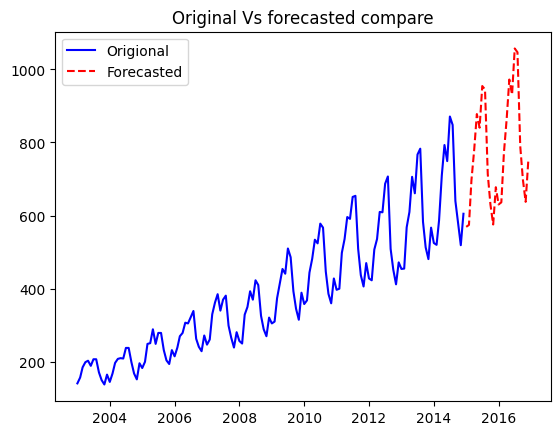

In [48]:
plt.plot(ts, label="Origional", color="blue")
plt.plot(exp_fcast, label="Forecasted", color="red", linestyle="--")
plt.legend()
plt.title("Original Vs forecasted compare")
plt.show()

In [50]:
def auto_exp_model(train, test, alpha=[], beta=[], gamma=[]):
  # Finding the optimized value of alpha, beta, gamma
  import numpy as np
  best_alpha=None
  best_beta=None
  best_gamma=None
  mae=np.inf
  cnt=0

  for i in alpha:
    for j in beta:
      for k in gamma:
        exp_model=ExponentialSmoothing(train, seasonal="mul", trend="mul",seasonal_periods=12, freq="MS")  # MS- Start of month
        exp_trained_model=exp_model.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k) # fitting the model
        exp_fcast=exp_trained_model.forecast(6)
        temp_mae=abs(test-exp_fcast).mean()  # mae 120
        cnt+=1
        # print(f"No of Loops executed {cnt}\n")
        if temp_mae<mae:
          mae=temp_mae
          best_alpha=i
          best_beta=j
          best_gamma=k
  best_results={"best_alpha":best_alpha, "best_beta":best_beta, "best_gamma":best_gamma, "best_mae":mae}
  return best_results

In [51]:
auto_exp_model(train, test, alpha=[0.1,.3], beta=[.2,.24], gamma=[.2,.31])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


{'best_alpha': 0.3,
 'best_beta': 0.2,
 'best_gamma': 0.31,
 'best_mae': 10.91244640120748}

### Arima

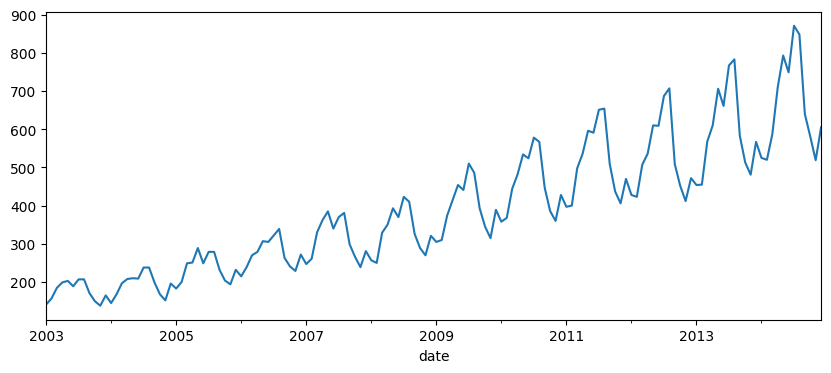

In [52]:
# Arima
ts.plot(figsize=(10,4))
plt.show()

In [53]:
# adfuller test
from statsmodels.tsa.stattools import adfuller
adfuller(ts)

(1.1088250591467386,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

As p-value > 0.5(alpha), The series is not stationary

In [54]:
ts1=np.log(ts).diff(2).dropna()
adfuller(ts1)

(-3.2007215662323993,
 0.019942950105461453,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -434.9038941451596)

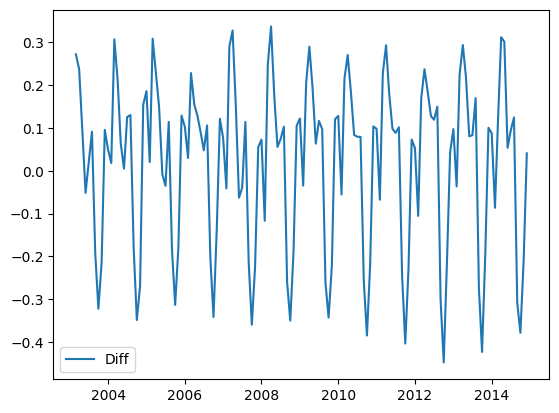

In [55]:
plt.plot(ts1, label="Diff")
# plt.plot(ts, label="origional")
plt.legend()
plt.show()

In [59]:
# d=2 # How many time we need to difference of the series to get a stationary Series
# period=12

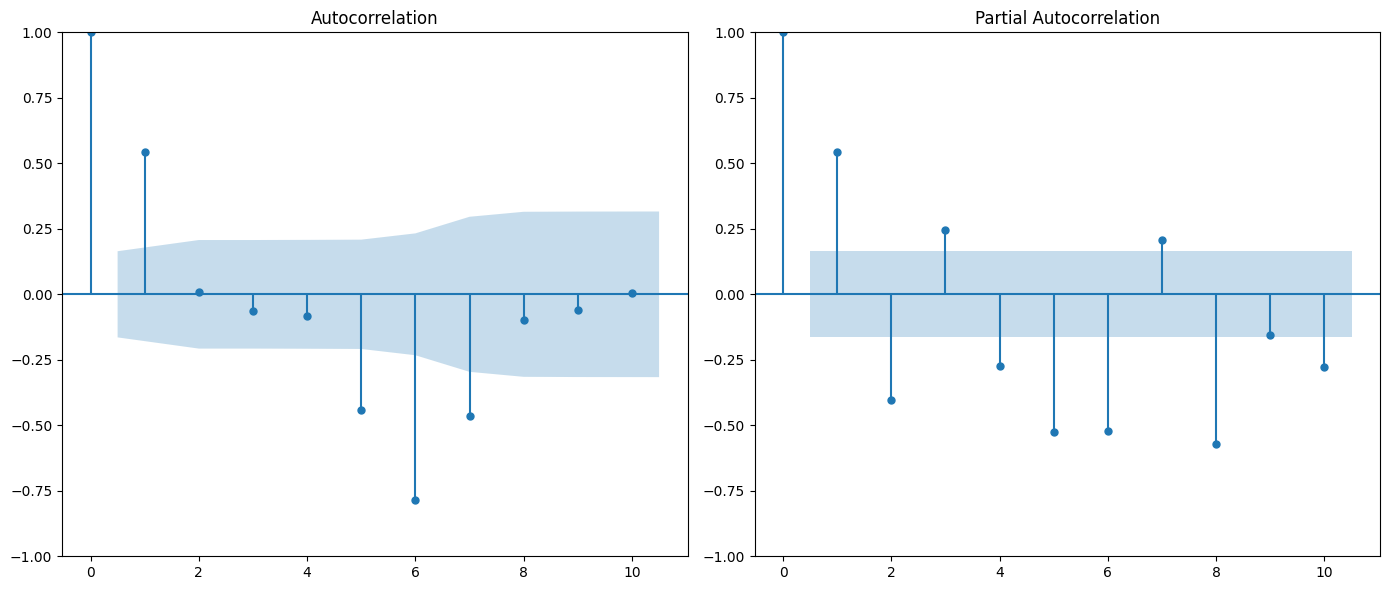

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(ts1, lags=10, ax=plt.gca())

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(ts1, lags=10, ax=plt.gca(), method='ywm')

plt.tight_layout()
plt.show()

In [60]:
yt=np.log(ts)
y_train=yt["2003-01-01":"2014-06-30"]
y_test=yt["2014-07-01":]

In [61]:
# traing the ARIMA model
tic=time.time()
import statsmodels.api as smt

# Sarima_model=smt.tsa.statespace.SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q, period), enforce_invertibility=False,
#                            enforce_stationarity=True,freq="MS").fit()

Sarima_model=smt.tsa.statespace.SARIMAX(y_train, order=(1,2,1), seasonal_order=(1,0,1,12), enforce_invertibility=False,
                           enforce_stationarity=True,freq="MS").fit()
toc=time.time()
print("Time taken", toc-tic)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.84763D-01    |proj g|=  5.77884D+00

At iterate    5    f= -1.43678D+00    |proj g|=  3.63422D+00

At iterate   10    f= -1.57138D+00    |proj g|=  1.64222D+00

At iterate   15    f= -1.59172D+00    |proj g|=  8.76632D-01

At iterate   20    f= -1.61570D+00    |proj g|=  2.07612D-01

At iterate   25    f= -1.62712D+00    |proj g|=  2.16903D+00

At iterate   30    f= -1.67164D+00    |proj g|=  1.20428D+00

At iterate   35    f= -1.70666D+00    |proj g|=  3.40196D-01

At iterate   40    f= -1.70700D+00    |proj g|=  2.96275D-02

At iterate   45    f= -1.70701D+00    |proj g|=  3.34237D-02

At iterate   50    f= -1.70701D+00    |proj g|=  3.96284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
arima_fcast=Sarima_model.forecast(6)
arima_fcast=np.exp(arima_fcast)
arima_fcast

2014-07-01    855.834656
2014-08-01    866.317502
2014-09-01    653.730458
2014-10-01    575.397984
2014-11-01    534.881596
2014-12-01    624.644871
Freq: MS, Name: predicted_mean, dtype: float64

In [63]:
test1=np.exp(y_test)
test1

date
2014-07-01    871.0
2014-08-01    848.0
2014-09-01    640.0
2014-10-01    581.0
2014-11-01    519.0
2014-12-01    605.0
Name: Number_of_Tractor_Sold, dtype: float64

In [64]:
print("MAE", abs(test1-arima_fcast).mean())

MAE 14.72363111512781


In [65]:
import itertools 

In [66]:
p=[0,1,2,3]
d=[0,1]
q=[0,1,2,3]
pdq=list(itertools.product(p,d,q))
P=[0,1,2]
D=[0,1]
Q=[0,1,2]
period=[12]
PDQ=list(itertools.product(P,D,Q, period))
best_pdq=None
best_PDQ=None
best_mae=np.inf

cnt=0

for i in pdq:
  for j in PDQ:

    Sarima_model=smt.tsa.statespace.SARIMAX(y_train, order=i, seasonal_order=j, enforce_invertibility=False,
                           enforce_stationarity=True,freq="MS").fit()
    arima_fcast=np.exp(Sarima_model.forecast(6))
    test1=np.exp(y_test)
    temp_mae=abs(test1-arima_fcast).mean()
    cnt+=1
    # print(f"Loop executed {cnt}")

    if temp_mae<best_mae:
      best_mae=temp_mae
      best_pdq=i
      best_PDQ=j
  results={"best_pdq":best_pdq, "best_PDQ":best_PDQ, "best_mae":best_mae}



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18638D+00    |proj g|=  2.91633D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.916D-07   3.186D+00
  F =   3.1863829196548035     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.6

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.23044D-01    |proj g|=  6.67690D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      7      1     0     0   1.005D-06  -5.250D-01
  F = -0.52499123472540321     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.4


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/st


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     50      1     0     0   9.779D-04  -8.136D-01
  F = -0.81358446880579371     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03690D+03    |proj g|=  1.23926D+05

At iterate    5    f=  2.63119D+00    |proj g|=  2.55516D+00

At iterate   10    f=  4.70630D-01    |proj g|=  5.20030D-01

At iterate   15    f=  8.91059D-02    |proj g|=  1.30762D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   30    f= -3.29407D-01    |proj g|=  4.16210D-02

At iterate   35    f= -3.85681D-01    |proj g|=  3.36131D+00

At iterate   40    f= -3.99729D-01    |proj g|=  1.72742D-01

At iterate   45    f= -3.99810D-01    |proj g|=  1.02597D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     49    112      2     1     0   2.397D-03  -3.998D-01
  F = -0.39980993408414778     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.02437D+00    |proj g|=  3.10024D-01

At iterate   25    f= -1.04037D+00    |proj g|=  1.42500D-01

At iterate   30    f= -1.04291D+00    |proj g|=  1.05756D-01
  ys=-6.191E-04  -gs= 1.020E-03 BFGS update SKIPPED

At iterate   35    f= -1.04344D+00    |proj g|=  4.03822D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     60      1     1     0   4.038D-01  -1.043D+00
  F =  -1.0434368807340919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -8.56708D-01    |proj g|=  1.43318D+00

At iterate   10    f= -1.02655D+00    |proj g|=  6.14424D-01

At iterate   15    f= -1.07432D+00    |proj g|=  2.62376D-01

At iterate   20    f= -1.07804D+00    |proj g|=  3.70007D-01

At iterate   25    f= -1.08180D+00    |proj g|=  7.14473D-02

At iterate   30    f= -1.08190D+00    |proj g|=  6.54623D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     48      1     0     0   6.546D-04  -1.082D+00
  F =  -1.0818990224817280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   15    f=  3.86172D-01    |proj g|=  2.11827D-01

At iterate   20    f= -1.50544D-01    |proj g|=  2.85150D+00

At iterate   25    f= -4.54515D-01    |proj g|=  7.35264D-01

At iterate   30    f= -5.59540D-01    |proj g|=  7.04838D-01

At iterate   35    f= -5.64095D-01    |proj g|=  2.73837D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     83      1     0     0   2.738D-02  -5.641D-01
  F = -0.56409520276212333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   10    f=  1.47406D+00    |proj g|=  5.40179D-01
  ys=-9.149E-01  -gs= 1.106E+00 BFGS update SKIPPED

At iterate   15    f=  8.12402D-02    |proj g|=  2.09918D-01

At iterate   20    f= -2.47723D-01    |proj g|=  6.98536D-01

At iterate   25    f= -2.52539D-01    |proj g|=  1.70055D-01

At iterate   30    f= -2.52662D-01    |proj g|=  4.08979D-03

At iterate   35    f= -2.52663D-01    |proj g|=  9.93127D-03

At iterate   40    f= -2.52664D-01    |proj g|=  3.67058D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   45    f= -2.52665D-01    |proj g|=  1.20017D-02

At iterate   50    f= -2.52679D-01    |proj g|=  3.75530D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    138      3     1     0   3.755D-03  -2.527D-01
  F = -0.25267863350298814     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26676D+03    |proj g|=  2.00571D+05

At iterate    5    f=  2.19366D+00    |proj g|=  1.90811D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -4.26801D-01    |proj g|=  6.60395D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30    124      3     0     0   6.604D-03  -4.268D-01
  F = -0.42680069914002927     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.31948D-01    |proj g|=  2.98107D+00

At iterate    5    f= -9.45028D-01    |proj g|=  6.93382D-01

At iterate   10    f= -9.48907D-01    |proj g|=  1.15321D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -9.53388D-01    |proj g|=  1.12334D-01

At iterate   15    f= -9.85150D-01    |proj g|=  4.48424D-01

At iterate   20    f= -1.03900D+00    |proj g|=  1.16692D-01

At iterate   25    f= -1.05397D+00    |proj g|=  2.17289D-01

At iterate   30    f= -1.05587D+00    |proj g|=  4.01491D-02

At iterate   35    f= -1.05615D+00    |proj g|=  4.49257D-02

At iterate   40    f= -1.05617D+00    |proj g|=  3.96968D-03

At iterate   45    f= -1.05617D+00    |proj g|=  2.72499D-03

At iterate   50    f= -1.05617D+00    |proj g|=  7.23847D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     77   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.21550D-01    |proj g|=  1.73241D+01

At iterate    5    f= -8.15099D-01    |proj g|=  7.22299D-01

At iterate   10    f= -8.78622D-01    |proj g|=  1.06011D+00

At iterate   15    f= -1.03741D+00    |proj g|=  5.58233D-01

At iterate   20    f= -1.05951D+00    |proj g|=  1.79584D+00

At iterate   25    f= -1.08362D+00    |proj g|=  2.92325D-01

At iterate   30    f= -1.09351D+00    |proj g|=  1.59129D-01

At iterate   35    f= -1.10460D+00    |proj g|=  1.73157D-01

At iterate   40    f= -1.10470D+00    |proj g|=  1.39811D-02

At iterate   45    f= -1.10471D+00    |proj g|=  2.16776D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWa


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47    104      2     0     0   6.185D-04  -1.105D+00
  F =  -1.1047141445919615     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09636D+00    |proj g|=  6.48375D-01

At iterate    5    f=  2.74107D+00    |proj g|=  4.87083D-01

At iterate   10    f=  2.51623D+00    |proj g|=  4.27926D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


  ys=-5.612E-01  -gs= 8.714E-01 BFGS update SKIPPED
  ys=-1.337E-01  -gs= 8.171E-01 BFGS update SKIPPED

At iterate    5    f=  2.15633D+00    |proj g|=  7.78459D-01

At iterate   10    f=  2.00802D+00    |proj g|=  7.52696D-02

At iterate   15    f=  1.97132D+00    |proj g|=  7.30411D-01

At iterate   20    f=  1.92831D+00    |proj g|=  7.37309D-02

At iterate   25    f=  1.92772D+00    |proj g|=  1.51807D-02

At iterate   30    f=  1.92746D+00    |proj g|=  2.52648D-01

At iterate   35    f=  1.89636D+00    |proj g|=  1.87182D+00

At iterate   40    f=  1.86713D+00    |proj g|=  8.95408D-01

At iterate   45    f=  1.71507D+00    |proj g|=  1.32646D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  1.51245D+00    |proj g|=  2.60017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     95      1     2     0   2.600D-01   1.512D+00
  F =   1.5124450434659300     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.76685D-01    |proj g|=  3.66256D+00

At iterate    5    f= -8.87884D-01    |proj g|=  1.87537D-01

At iterate   10    f= -8.95474D-01    |proj g|=  1.22797D-01

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -8.29395D-01    |proj g|=  3.71563D+00

At iterate   10    f= -8.41743D-01    |proj g|=  1.95330D+00

At iterate   15    f= -1.00999D+00    |proj g|=  6.21245D+00

At iterate   20    f= -1.03018D+00    |proj g|=  4.01637D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     33      1     0     0   3.153D-03  -1.030D+00
  F =  -1.0301755912584087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/st

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09636D+00    |proj g|=  6.48375D-01

At iterate    5    f=  1.00861D-01    |proj g|=  3.31575D-01

At iterate   10    f= -4.13367D-01    |proj g|=  2.74261D-01

At iterate   15    f= -5.66919D-01    |proj g|=  3.53483D-01

At iterate   20    f= -5.91636D-01    |proj g|=  5.23564D-01

At iterate   25    f= -6.66571D-01    |proj g|=  1.02886D-01

At iterate   30    f= -6.66613D-01    |proj g|=  3.33842D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


  ys=-1.027E+01  -gs= 7.676E-01 BFGS update SKIPPED

At iterate    5    f=  1.42838D-01    |proj g|=  1.85960D+00

At iterate   10    f= -1.37057D-01    |proj g|=  7.89639D-01

At iterate   15    f= -3.48992D-01    |proj g|=  3.71591D+00

At iterate   20    f= -3.70617D-01    |proj g|=  1.16115D+00

At iterate   25    f= -4.44840D-01    |proj g|=  1.61397D+01

At iterate   30    f= -5.60039D-01    |proj g|=  4.48496D+00

At iterate   35    f= -6.64392D-01    |proj g|=  1.28037D+01

At iterate   40    f= -6.91925D-01    |proj g|=  2.82739D+01

At iterate   45    f= -6.95786D-01    |proj g|=  2.49748D+00

At iterate   50    f= -7.32696D-01    |proj g|=  7.35656D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.09187D+00    |proj g|=  2.37245D-01

At iterate   10    f= -1.11209D+00    |proj g|=  8.17374D-02

At iterate   15    f= -1.15635D+00    |proj g|=  3.58554D-01

At iterate   20    f= -1.21577D+00    |proj g|=  1.98366D-01

At iterate   25    f= -1.22902D+00    |proj g|=  1.37623D-01

At iterate   30    f= -1.23096D+00    |proj g|=  6.73375D-02

At iterate   35    f= -1.23140D+00    |proj g|=  1.97799D-02

At iterate   40    f= -1.23142D+00    |proj g|=  1.39585D-01

At iterate   45    f= -1.23146D+00    |proj g|=  1.02900D-02

At iterate   50    f= -1.23150D+00    |proj g|=  5.18201D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.12528D+00    |proj g|=  1.94858D-01

At iterate   10    f= -1.15359D+00    |proj g|=  6.92859D-01

At iterate   15    f= -1.25546D+00    |proj g|=  1.37965D+00

At iterate   20    f= -1.28141D+00    |proj g|=  2.87482D-01

At iterate   25    f= -1.28187D+00    |proj g|=  1.04802D-02

At iterate   30    f= -1.28191D+00    |proj g|=  1.18570D-01

At iterate   35    f= -1.28297D+00    |proj g|=  1.18087D-01

At iterate   40    f= -1.28315D+00    |proj g|=  5.62280D-02

At iterate   45    f= -1.28329D+00    |proj g|=  4.54354D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   50    f= -1.28329D+00    |proj g|=  9.43689D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     88      2     0     0   9.437D-04  -1.283D+00
  F =  -1.2832927267001675     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09636D+00    |proj g|=  6.48375D-01

At iterate    5    f=  1.57782D-01    |proj g|=  1.48866D+00

At iterate   10    f= -1.05191D-01    |proj g|=  1.67873D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f= -2.09765D-01    |proj g|=  2.19480D-01

At iterate   10    f= -6.12910D-01    |proj g|=  1.56730D+00

At iterate   15    f= -6.39353D-01    |proj g|=  2.11257D-01

At iterate   20    f= -6.68068D-01    |proj g|=  1.01895D-02

At iterate   25    f= -6.68083D-01    |proj g|=  1.59383D-02
  ys=-1.819E-09  -gs= 2.826E-09 BFGS update SKIPPED

At iterate   30    f= -6.68084D-01    |proj g|=  1.71712D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     69      1     2     0   1.924D-03  -6.681D-01
  F = -0.66808446126683574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


  ys=-1.772E+01  -gs= 9.578E-01 BFGS update SKIPPED

At iterate    5    f= -5.50141D-01    |proj g|=  7.85658D-01

At iterate   10    f= -6.75887D-01    |proj g|=  1.46057D+00

At iterate   15    f= -7.38438D-01    |proj g|=  1.23995D-01

At iterate   20    f= -7.38638D-01    |proj g|=  3.74548D-02

At iterate   25    f= -7.38669D-01    |proj g|=  1.61719D-01

At iterate   30    f= -7.38720D-01    |proj g|=  4.52895D-02

At iterate   35    f= -7.38819D-01    |proj g|=  1.46875D-01

At iterate   40    f= -7.39054D-01    |proj g|=  1.75597D-01

At iterate   45    f= -7.39510D-01    |proj g|=  1.84052D-01

At iterate   50    f= -7.40739D-01    |proj g|=  1.56541D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate   15    f= -1.14223D+00    |proj g|=  4.93878D-02

At iterate   20    f= -1.14233D+00    |proj g|=  8.82332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     34      1     0     0   1.605D-03  -1.142D+00
  F =  -1.1423285325927635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.42207D-01    |proj g|=  5.09777D+00

At iterate    5    f= -1.14151D+00    |proj g|=  2.27463D-01

At iter

 This problem is unconstrained.



At iterate   15    f= -1.17210D+00    |proj g|=  7.51882D-01

At iterate   20    f= -1.19372D+00    |proj g|=  2.47880D-01

At iterate   25    f= -1.22973D+00    |proj g|=  9.30661D-01

At iterate   30    f= -1.25385D+00    |proj g|=  9.64789D-02

At iterate   35    f= -1.25742D+00    |proj g|=  1.31199D-01

At iterate   40    f= -1.25790D+00    |proj g|=  8.68755D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     60      1     0     0   2.193D-02  -1.258D+00
  F =  -1.2579183375680554     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.10151D+00    |proj g|=  1.69034D+00

At iterate   10    f= -1.13514D+00    |proj g|=  1.73667D+00

At iterate   15    f= -1.21312D+00    |proj g|=  2.66173D-01

At iterate   20    f= -1.22760D+00    |proj g|=  2.01810D+00

At iterate   25    f= -1.27789D+00    |proj g|=  7.03833D-01

At iterate   30    f= -1.28581D+00    |proj g|=  3.48196D-01

At iterate   35    f= -1.28922D+00    |proj g|=  5.48666D-01

At iterate   40    f= -1.30086D+00    |proj g|=  3.42443D-01

At iterate   45    f= -1.30098D+00    |proj g|=  2.35721D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     65   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94169D+00    |proj g|=  7.74159D-01
  ys=-6.658E+00  -gs= 5.747E-01 BFGS update SKIPPED

At iterate    5    f=  2.72288D+00    |proj g|=  7.44704D+00

At iterate   10    f=  1.50810D+00    |proj g|=  1.09887D+00

At iterate   15    f=  1.44984D+00    |proj g|=  1.22774D-01

At iterate   20    f=  1.44888D+00    |proj g|=  3.02132D-01

At iterate   25    f=  1.41566D+00    |proj g|=  9.51927D-01

At iterate   30    f=  1.37359D+00    |proj g|=  2.47250D-02

At iterate   35    f=  1.37358D+00    |proj g|=  2.04950D-03

At iterate   40    f=  1.37351D+00    |proj g|=  9.88125D-02

At iterate   45    f=  1.37015D+00    |proj g|=  1.71884D+00

At iterate   50    f=  1.33466D+00    |proj g|=  7.38786D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.16204D+00    |proj g|=  3.02843D-01

At iterate   10    f= -1.21349D+00    |proj g|=  7.67900D-01

At iterate   15    f= -1.21561D+00    |proj g|=  6.72554D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     35      1     0     0   1.556D-03  -1.216D+00
  F =  -1.2156058190070964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.62043D-01    |proj g|=  6.32240D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.01744D+00    |proj g|=  1.69453D+00

At iterate   10    f= -1.17102D+00    |proj g|=  3.37801D+00

At iterate   15    f= -1.21462D+00    |proj g|=  1.89468D-01

At iterate   20    f= -1.22135D+00    |proj g|=  2.34580D+00

At iterate   25    f= -1.25610D+00    |proj g|=  9.58867D-01

At iterate   30    f= -1.25674D+00    |proj g|=  2.82827D-01

At iterate   35    f= -1.25675D+00    |proj g|=  2.42769D-03

At iterate   40    f= -1.25675D+00    |proj g|=  2.00828D-02

At iterate   45    f= -1.25675D+00    |proj g|=  2.41271D-02

At iterate   50    f= -1.25676D+00    |proj g|=  7.18940D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred fr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80047D+00    |proj g|=  7.75810D-01

At iterate    5    f=  5.57561D-01    |proj g|=  1.17733D+00

At iterate   10    f= -2.32784D-01    |proj g|=  9.05409D-01

At iterate   15    f= -3.75258D-01    |proj g|=  3.57428D-01

At iterate   20    f= -6.21809D-01    |proj g|=  6.88076D+00

At iterate   25    f= -6.90959D-01    |proj g|=  7.72882D+00

At iterate   30    f= -7.04994D-01    |proj g|=  2.21970D+00

At iterate   35    f= -7.05574D-01    |proj g|=  8.00842D-02

At iterate   40    f= -7.11806D-01    |proj g|=  4.43513D+00

At iterate   45    f= -7.12116D-01    |proj g|=  1.39584D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


  ys=-1.140E+01  -gs= 9.281E-01 BFGS update SKIPPED

At iterate    5    f=  1.11129D+00    |proj g|=  7.86707D-01

At iterate   10    f=  2.68213D-01    |proj g|=  1.91161D+00

At iterate   15    f=  2.06962D-02    |proj g|=  2.84615D+00

At iterate   20    f= -3.80734D-01    |proj g|=  5.97671D+00

At iterate   25    f= -5.27968D-01    |proj g|=  3.49895D+01

At iterate   30    f= -5.83158D-01    |proj g|=  1.96422D-01

At iterate   35    f= -5.95106D-01    |proj g|=  1.58683D+01

At iterate   40    f= -5.96121D-01    |proj g|=  2.30541D+00

At iterate   45    f= -5.98721D-01    |proj g|=  3.58725D+00

At iterate   50    f= -6.08147D-01    |proj g|=  5.53206D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -1.24723D+00    |proj g|=  1.20362D-01

At iterate   25    f= -1.24733D+00    |proj g|=  2.49567D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     77      2     0     0   2.496D-03  -1.247D+00
  F =  -1.2473269846831216     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.95415D-01    |proj g|=  5.39159D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.30294D+00    |proj g|=  1.82620D-01

At iterate   10    f= -1.30908D+00    |proj g|=  4.13179D-01

At iterate   15    f= -1.35083D+00    |proj g|=  1.08201D+00

At iterate   20    f= -1.38184D+00    |proj g|=  2.97759D-01

At iterate   25    f= -1.39054D+00    |proj g|=  3.24235D-01

At iterate   30    f= -1.39233D+00    |proj g|=  2.30551D-01

At iterate   35    f= -1.39286D+00    |proj g|=  4.87710D-02

At iterate   40    f= -1.39296D+00    |proj g|=  4.60400D-02

At iterate   45    f= -1.39301D+00    |proj g|=  1.09338D-01

At iterate   50    f= -1.39308D+00    |proj g|=  1.84308D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.66669D-01    |proj g|=  5.70282D+00

At iterate    5    f= -1.20404D+00    |proj g|=  2.74237D-01

At iterate   10    f= -1.24996D+00    |proj g|=  3.21585D-01

At iterate   15    f= -1.26076D+00    |proj g|=  1.71059D+00

At iterate   20    f= -1.27548D+00    |proj g|=  8.13423D-01

At iterate   25    f= -1.35571D+00    |proj g|=  4.86333D-01

At iterate   30    f= -1.37747D+00    |proj g|=  3.03890D-01

At iterate   35    f= -1.38935D+00    |proj g|=  3.71556D-01

At iterate   40    f= -1.40542D+00    |proj g|=  7.51801D-01

At iterate   45    f= -1.41837D+00    |proj g|=  6.83265D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   50    f= -1.41838D+00    |proj g|=  3.93125D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   3.931D-04  -1.418D+00
  F =  -1.4183833699578432     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80047D+00    |proj g|=  7.75810D-01
  ys=-4.791E+00  -gs= 1.007E+00 BFGS update SKIPPED

At iterate    5    f=  3.10184D-01    |proj g|=  5.96051D-01

At iterate   10  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83332D+00    |proj g|=  7.74312D-01

At iterate    5    f=  3.35371D-01    |proj g|=  1.00278D+00

At iterate   10    f= -3.15755D-01    |proj g|=  6.75668D+00

At iterate   15    f= -4.13969D-01    |proj g|=  6.80227D+00

At iterate   20    f= -5.17522D-01    |proj g|=  3.12431D+00

At iterate   25    f= -5.33231D-01    |proj g|=  1.18314D+00

At iterate   30    f= -7.41746D-01    |proj g|=  8.95855D+00

At iterate   35    f= -7.87268D-01    |proj g|=  2.61572D-01

At iterate   40    f= -7.87570D-01    |proj g|=  2.58057D-02

At iterate   45    f= -7.87571D-01    |proj g|=  1.26995D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f=  1.68593D-01    |proj g|=  2.83926D+00
  ys=-9.104E+00  -gs= 7.156E-01 BFGS update SKIPPED

At iterate   10    f= -3.67553D-01    |proj g|=  1.91824D+00

At iterate   15    f= -5.35710D-01    |proj g|=  2.18361D+00

At iterate   20    f= -6.54861D-01    |proj g|=  6.31552D+00

At iterate   25    f= -6.74230D-01    |proj g|=  2.74408D+00

At iterate   30    f= -6.87013D-01    |proj g|=  2.03700D-01

At iterate   35    f= -7.70621D-01    |proj g|=  2.70705D+01

At iterate   40    f= -9.57509D-01    |proj g|=  1.41947D+01

At iterate   45    f= -9.83992D-01    |proj g|=  2.58841D-01

At iterate   50    f= -1.01888D+00    |proj g|=  8.57220D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.30248D+00    |proj g|=  1.49876D+00

At iterate   10    f= -1.31026D+00    |proj g|=  1.09483D-01

At iterate   15    f= -1.31609D+00    |proj g|=  9.68766D-01

At iterate   20    f= -1.31836D+00    |proj g|=  1.41996D-02

At iterate   25    f= -1.31854D+00    |proj g|=  1.11004D-01

At iterate   30    f= -1.31862D+00    |proj g|=  3.79973D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     49      1     0     0   2.105D-05  -1.319D+00
  F =  -1.3186208461285605     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.84436D-01    |proj g|=  5.66982D+00

At iterate    5    f= -1.31281D+00    |proj g|=  3.72524D-01

At iterate   10    f= -1.33398D+00    |proj g|=  6.25575D-01

At iterate   15    f= -1.33528D+00    |proj g|=  1.88903D-01

At iterate   20    f= -1.34491D+00    |proj g|=  5.09532D-01

At iterate   25    f= -1.38015D+00    |proj g|=  6.70992D-01

At iterate   30    f= -1.39539D+00    |proj g|=  9.62095D-02

At iterate   35    f= -1.40723D+00    |proj g|=  4.19819D-02

At iterate   40    f= -1.41085D+00    |proj g|=  6.47306D-02

At iterate   45    f= -1.41251D+00    |proj g|=  1.20313D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.41281D+00    |proj g|=  6.17588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     0     0   6.176D-03  -1.413D+00
  F =  -1.4128138009885092     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.87235D-01    |proj g|=  5.58610D+00

At iterate    5    f= -1.20179D+00    |proj g|=  1.74083D+00

At iterate   10    f= -1.27491D+00    |proj g|=  2.12522D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  1.40064D+00    |proj g|=  1.98648D-01

At iterate   15    f=  1.38486D+00    |proj g|=  2.84813D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     42      1     0     0   6.622D-04   1.385D+00
  F =   1.3848544673486911     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61559D+00    |proj g|=  1.68950D-01

At iterate    5    f=  1.28835D+00    |proj g|=  1.70786D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88726D+00    |proj g|=  1.69197D-01

At iterate    5    f=  1.62964D+00    |proj g|=  4.18880D-01

At iterate   10    f=  1.37089D+00    |proj g|=  2.90971D+00

At iterate   15    f=  1.31841D+00    |proj g|=  1.28964D+00

At iterate   20    f=  1.11390D+00    |proj g|=  2.27076D+00

At iterate   25    f=  1.05454D+00    |proj g|=  9.13332D+00

At iterate   30    f=  9.11040D-01    |proj g|=  2.35713D+00

At iterate   35    f=  9.09334D-01    |proj g|=  3.85202D-02

At iterate   40    f=  9.08849D-01    |proj g|=  1.27032D+00

At iterate   45    f=  8.78879D-01    |proj g|=  7.67300D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  8.50374D-01    |proj g|=  3.54261D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   3.543D-01   8.504D-01
  F =  0.85037416013595934     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.96910D-01    |proj g|=  5.31652D+00

At iterate    5    f= -1.22598D+00    |proj g|=  1.57800D+00

At iterate   10    f= -1.28190D+00    |proj g|=  1.95172D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.25024D+00    |proj g|=  3.03965D+00

At iterate   10    f= -1.26391D+00    |proj g|=  6.30966D-02

At iterate   15    f= -1.26698D+00    |proj g|=  2.24246D+00

At iterate   20    f= -1.27438D+00    |proj g|=  1.78038D-01

At iterate   25    f= -1.28382D+00    |proj g|=  3.07772D+00

At iterate   30    f= -1.31786D+00    |proj g|=  1.81006D-01

At iterate   35    f= -1.31793D+00    |proj g|=  2.22458D-01

At iterate   40    f= -1.31889D+00    |proj g|=  9.94635D-01

At iterate   45    f= -1.32128D+00    |proj g|=  2.36577D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che


At iterate   50    f= -1.32140D+00    |proj g|=  7.25267D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   7.253D-02  -1.321D+00
  F =  -1.3213996057094832     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74606D+00    |proj g|=  1.54014D-01

At iterate    5    f= -4.62287D-01    |proj g|=  6.33081D-01

At iterate   10    f= -5.06819D-01    |proj g|=  1.46448D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78739D+00    |proj g|=  2.29196D-01
  ys=-2.849E+01  -gs= 9.623E-01 BFGS update SKIPPED

At iterate    5    f=  1.30709D-01    |proj g|=  1.07710D+00

At iterate   10    f= -4.18944D-01    |proj g|=  4.56233D+00

At iterate   15    f= -5.27515D-01    |proj g|=  3.92813D+00

At iterate   20    f= -6.90541D-01    |proj g|=  3.30710D-01

At iterate   25    f= -8.21956D-01    |proj g|=  1.49861D+01

At iterate   30    f= -9.20554D-01    |proj g|=  4.46155D+01

At iterate   35    f= -9.74025D-01    |proj g|=  9.86031D+01

At iterate   40    f= -9.90450D-01    |proj g|=  1.31044D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f=  2.00019D-01    |proj g|=  2.89976D+00

At iterate   10    f= -5.30792D-01    |proj g|=  3.20201D+00

At iterate   15    f= -6.83942D-01    |proj g|=  7.23711D+01

At iterate   20    f= -8.63109D-01    |proj g|=  1.00021D+02

At iterate   25    f= -9.17600D-01    |proj g|=  2.27139D+02

At iterate   30    f= -9.44077D-01    |proj g|=  8.64875D+01

At iterate   35    f= -9.46478D-01    |proj g|=  2.38753D+02

At iterate   40    f= -9.51136D-01    |proj g|=  1.15202D+02
  ys=-1.932E-04  -gs= 3.333E-03 BFGS update SKIPPED
  ys=-1.755E-05  -gs= 8.651E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.21410D+00    |proj g|=  2.16383D-01

At iterate   15    f= -1.26692D+00    |proj g|=  1.32609D+00

At iterate   20    f= -1.27789D+00    |proj g|=  2.65879D-01

At iterate   25    f= -1.29754D+00    |proj g|=  1.23770D+00

At iterate   30    f= -1.30012D+00    |proj g|=  1.26058D-01

At iterate   35    f= -1.30027D+00    |proj g|=  1.68113D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     70      2     0     0   1.669D-03  -1.300D+00
  F =  -1.3002720765336406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.31210D+00    |proj g|=  2.49346D+00

At iterate   10    f= -1.34909D+00    |proj g|=  8.24403D-02

At iterate   15    f= -1.35260D+00    |proj g|=  9.78380D-01

At iterate   20    f= -1.35835D+00    |proj g|=  9.64758D-02

At iterate   25    f= -1.38037D+00    |proj g|=  1.56512D-01

At iterate   30    f= -1.38594D+00    |proj g|=  9.28549D-01

At iterate   35    f= -1.40872D+00    |proj g|=  3.27531D-01

At iterate   40    f= -1.41233D+00    |proj g|=  3.69553D-01

At iterate   45    f= -1.42255D+00    |proj g|=  4.18392D-01

At iterate   50    f= -1.42504D+00    |proj g|=  9.33396D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.32994D+00    |proj g|=  1.78672D+00

At iterate   10    f= -1.35768D+00    |proj g|=  5.88119D-01

At iterate   15    f= -1.36948D+00    |proj g|=  7.08466D-01

At iterate   20    f= -1.38371D+00    |proj g|=  9.18638D-01

At iterate   25    f= -1.41426D+00    |proj g|=  1.14372D-01

At iterate   30    f= -1.45086D+00    |proj g|=  1.46549D-01

At iterate   35    f= -1.46430D+00    |proj g|=  1.62978D-01

At iterate   40    f= -1.46600D+00    |proj g|=  1.51034D-01

At iterate   45    f= -1.47236D+00    |proj g|=  9.31549D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   50    f= -1.47555D+00    |proj g|=  3.20805D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   3.208D-01  -1.476D+00
  F =  -1.4755457732134361     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74606D+00    |proj g|=  1.54014D-01

At iterate    5    f= -5.58381D-01    |proj g|=  1.66184D+00

At iterate   10    f= -7.02273D-01    |proj g|=  1.21656D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f= -2.69255D-01    |proj g|=  4.12703D+00

At iterate   10    f= -6.49639D-01    |proj g|=  2.49911D+00

At iterate   15    f= -8.21452D-01    |proj g|=  4.84230D-01

At iterate   20    f= -9.30958D-01    |proj g|=  4.47856D+00

At iterate   25    f= -9.46385D-01    |proj g|=  1.79916D-01

At iterate   30    f= -9.56782D-01    |proj g|=  1.25474D-01

At iterate   35    f= -9.71971D-01    |proj g|=  2.33607D+00

At iterate   40    f= -1.06149D+00    |proj g|=  3.15610D-01

At iterate   45    f= -1.10965D+00    |proj g|=  7.98924D-01

At iterate   50    f= -1.11456D+00    |proj g|=  4.32181D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.75114D+00    |proj g|=  1.56320D-01
  ys=-1.117E+01  -gs= 8.199E-01 BFGS update SKIPPED

At iterate    5    f= -3.36395D-01    |proj g|=  7.14281D+00

At iterate   10    f= -6.53394D-01    |proj g|=  9.91593D-01

At iterate   15    f= -7.76206D-01    |proj g|=  1.46923D+01

At iterate   20    f= -8.11426D-01    |proj g|=  1.78108D+00

At iterate   25    f= -8.30549D-01    |proj g|=  6.65875D+00

At iterate   30    f= -8.32543D-01    |proj g|=  4.65671D-01

At iterate   35    f= -8.37831D-01    |proj g|=  3.95354D+00

At iterate   40    f= -8.94315D-01    |proj g|=  4.33547D+00

At iterate   45    f= -1.00499D+00    |proj g|=  3.40864D+00

At iterate   50    f= -1.03182D+00    |proj g|=  1.00651D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.31239D+00    |proj g|=  5.65939D-01

At iterate   10    f= -1.33984D+00    |proj g|=  7.20067D-02

At iterate   15    f= -1.34749D+00    |proj g|=  1.49441D+00

At iterate   20    f= -1.35541D+00    |proj g|=  1.75289D-01

At iterate   25    f= -1.36145D+00    |proj g|=  1.73829D-03

At iterate   30    f= -1.36145D+00    |proj g|=  1.25259D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     47      1     0     0   6.644D-04  -1.361D+00
  F =  -1.3614510167676359     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.97362D-01    |proj g|=  5.79566D+00

At iterate    5    f= -1.35739D+00    |proj g|=  2.56538D-01

At iterate   10    f= -1.38916D+00    |proj g|=  5.36092D-02

At iterate   15    f= -1.39172D+00    |proj g|=  1.04646D+00

At iterate   20    f= -1.39700D+00    |proj g|=  8.21617D-02

At iterate   25    f= -1.40609D+00    |proj g|=  8.08237D-01

At iterate   30    f= -1.41333D+00    |proj g|=  2.36137D-01

At iterate   35    f= -1.45032D+00    |proj g|=  1.97204D+00

At iterate   40    f= -1.45764D+00    |proj g|=  2.02851D-01

At iterate   45    f= -1.46082D+00    |proj g|=  1.38805D-01

At iterate   50    f= -1.46189D+00    |proj g|=  2.50201D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.12613D-01    |proj g|=  5.91812D+00

At iterate    5    f= -1.31963D+00    |proj g|=  3.98013D-01

At iterate   10    f= -1.36966D+00    |proj g|=  2.19090D+00

At iterate   15    f= -1.40278D+00    |proj g|=  1.65174D+00

At iterate   20    f= -1.41393D+00    |proj g|=  4.42176D-01

At iterate   25    f= -1.42898D+00    |proj g|=  7.55369D-01

At iterate   30    f= -1.45566D+00    |proj g|=  6.32187D-01

At iterate   35    f= -1.46508D+00    |proj g|=  1.52154D-01

At iterate   40    f= -1.47523D+00    |proj g|=  3.77395D-02

At iterate   45    f= -1.47608D+00    |proj g|=  1.12540D-01

At iterate   50    f= -1.47976D+00    |proj g|=  1.10699D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.26564D-01    |proj g|=  5.58894D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     11      1     0     0   4.404D-04  -6.266D-01
  F = -0.62657679465827365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4     22      1     0     0   6.960D-05  -1.501D+00
  F =  -1.5007404665706610     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59817D+00    |proj g|=  3.93285D+00

At iterate    5    f= -1.60412D+00    |proj g|=  6.62113D-01

At iterate   10    f= -1.61889D+00    |proj g|=  1.63065D+00

At iterate   15    f= -1.61993D+00    |proj g|=  4.16568D-03

       

 This problem is unconstrained.



At iterate    5    f= -1.39384D+00    |proj g|=  4.75042D-01

At iterate   10    f= -1.48396D+00    |proj g|=  7.10216D+00

At iterate   15    f= -1.61978D+00    |proj g|=  3.72873D-01

At iterate   20    f= -1.61995D+00    |proj g|=  8.08559D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     37      1     0     0   1.801D-03  -1.620D+00
  F =  -1.6199522309799821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.55567D+00    |proj g|=  1.67683D+00

At iterate   10    f= -1.67472D+00    |proj g|=  1.19699D-01

At iterate   15    f= -1.67495D+00    |proj g|=  3.92562D-03

At iterate   20    f= -1.67497D+00    |proj g|=  3.92599D-03

At iterate   25    f= -1.67672D+00    |proj g|=  4.68769D-02

At iterate   30    f= -1.67791D+00    |proj g|=  2.89480D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate   35    f= -1.67791D+00    |proj g|=  2.45615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     64      1     0     0   2.456D-03  -1.678D+00
  F =  -1.6779070108651770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58605D+00    |proj g|=  5.68175D-01

At iterate    5    f= -1.58623D+00    |proj g|=  2.13483D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f= -1.42886D+00    |proj g|=  4.90609D-01

At iterate   10    f= -1.49875D+00    |proj g|=  6.29606D+00

At iterate   15    f= -1.61282D+00    |proj g|=  1.61423D-01

At iterate   20    f= -1.62000D+00    |proj g|=  7.43379D-02

At iterate   25    f= -1.62000D+00    |proj g|=  1.18222D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     33      1     0     0   1.182D-03  -1.620D+00
  F =  -1.6200010948472126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.64307D+00    |proj g|=  2.22120D-02

At iterate   15    f= -1.64312D+00    |proj g|=  8.16690D-02

At iterate   20    f= -1.64516D+00    |proj g|=  7.96084D-01

At iterate   25    f= -1.64627D+00    |proj g|=  7.37903D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   7.379D-05  -1.646D+00
  F =  -1.6462714876451769     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.57863D+00    |proj g|=  4.04772D+00

At iterate   10    f= -1.67778D+00    |proj g|=  1.57728D-01

At iterate   15    f= -1.67781D+00    |proj g|=  4.26272D-02

At iterate   20    f= -1.67783D+00    |proj g|=  3.26266D-03

At iterate   25    f= -1.67784D+00    |proj g|=  6.87874D-02

At iterate   30    f= -1.67791D+00    |proj g|=  1.72647D-02

At iterate   35    f= -1.67797D+00    |proj g|=  5.14284D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     44      1     0     0   5.143D-04  -1.678D+00
  F =  -1.6779663948633896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.60807D+00    |proj g|=  5.22881D-02

At iterate   20    f= -1.60808D+00    |proj g|=  7.21237D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   7.155D-03  -1.608D+00
  F =  -1.6080767676573213     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59108D+00    |proj g|=  6.09189D+00

At iterate    5    f= -1.60330D+00    |proj g|=  5.56390D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.43811D+00    |proj g|=  3.86585D-01

At iterate   10    f= -1.49865D+00    |proj g|=  6.14497D+00

At iterate   15    f= -1.57996D+00    |proj g|=  2.18954D-01

At iterate   20    f= -1.58126D+00    |proj g|=  5.85751D-01

At iterate   25    f= -1.59691D+00    |proj g|=  3.79131D+00

At iterate   30    f= -1.62052D+00    |proj g|=  1.09609D-01

At iterate   35    f= -1.62054D+00    |proj g|=  5.19017D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     49      1     0     0   5.190D-04  -1.621D+00
  F =  -1.6205378613924979     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.35562D-01    |proj g|=  1.00626D-01

At iterate    5    f= -6.35649D-01    |proj g|=  6.07215D-02

At iterate   10    f= -6.35685D-01    |proj g|=  1.00843D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   1.008D-05  -6.357D-01
  F = -0.63568471422013961     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46439D+00    |proj g|=  1.07315D+00

At iterate    5    f= -1.68289D+00    |proj g|=  7.37949D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     19      1     0     0   3.895D-03  -1.683D+00
  F =  -1.6832271828998266     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     25      1     0     0   2.539D-03  -1.619D+00
  F =  -1.6189936549982333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.68446D-01    |proj g|=  6.89682D+00

At iterate    5    f= -1.68005D+00    |proj g|=  5.67609D+00

At iterate   10    f= -1.71613D+00    |proj g|=  1.17079D+00

At iterate   15    f= -1.72101D+00    |proj g|=  3.58430D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64853D+00    |proj g|=  5.20691D+00

At iterate    5    f= -1.66727D+00    |proj g|=  9.59941D-01

At iterate   10    f= -1.67817D+00    |proj g|=  1.03556D-01

At iterate   15    f= -1.67856D+00    |proj g|=  6.21464D-02

At iterate   20    f= -1.68000D+00    |proj g|=  2.94069D-02

At iterate   25    f= -1.68136D+00    |proj g|=  1.25555D+00

At iterate   30    f= -1.68310D+00    |proj g|=  2.23447D-02

At iterate   35    f= -1.68310D+00    |proj g|=  1.92894D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67859D+00    |proj g|=  7.75362D-01

At iterate   10    f= -1.68308D+00    |proj g|=  1.94644D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   6.618D-03  -1.683D+00
  F =  -1.6830783580376316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.43855D-01    |proj g|=  6.87184D+00

At iterate    5    f= -1.64814D+00    |proj g|=  7.26682D+00

At iterate   10    f= -1.70802D+00    |proj g|=  4.03168D-02

At iterate   15    f= -1.70857D+00    |proj g|=  7.95091D-01

At iterate   20    f= -1.70937D+00    |proj g|=  3.08989D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     38      1     0     0   1.387D-03  -1.709D+00
  F =  -1.7093710823640074     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.65271D+00    |proj g|=  1.89150D+00

At iterate   10    f= -1.72092D+00    |proj g|=  1.95079D+00

At iterate   15    f= -1.72914D+00    |proj g|=  2.64078D-02

At iterate   20    f= -1.72957D+00    |proj g|=  7.98583D-02

At iterate   25    f= -1.72958D+00    |proj g|=  1.44149D-02

At iterate   30    f= -1.72974D+00    |proj g|=  1.71690D-02

At iterate   35    f= -1.72975D+00    |proj g|=  2.34235D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     49      1     0     0   2.342D-03  -1.730D+00
  F =  -1.7297482027319029     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f= -1.67562D+00    |proj g|=  1.82174D-03

At iterate   30    f= -1.67562D+00    |proj g|=  4.83497D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     80      2     0     0   1.814D-03  -1.676D+00
  F =  -1.6756246371262282     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64830D+00    |proj g|=  5.27035D+00

At iterate    5    f= -1.66794D+00    |proj g|=  1.09873D+00

At iterate   10    f= -1.67698D+00    |proj g|=  3.08310D-02

At iterate   15    f= -1.67714D+00    |proj g|=  3.98420D-01

At iterate   20    f= -1.67808D+00    |proj g|=  1.24979D-01

At iterate   25    f= -1.67963D+00    |proj g|=  8.24647D-02

At iterate   30    f= -1.68315D+00    |proj g|=  2.25309D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50510D+00    |proj g|=  6.88889D-01

At iterate    5    f= -1.62155D+00    |proj g|=  5.12613D+00

At iterate   10    f= -1.64070D+00    |proj g|=  3.13818D-01

At iterate   15    f= -1.65009D+00    |proj g|=  1.77192D+00

At iterate   20    f= -1.65154D+00    |proj g|=  2.38153D-01

At iterate   25    f= -1.65743D+00    |proj g|=  8.23333D-01

At iterate   30    f= -1.67761D+00    |proj g|=  1.03890D+00

At iterate   35    f= -1.68087D+00    |proj g|=  1.98277D-01

At iterate   40    f= -1.68320D+00    |proj g|=  1.07532D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -9.32436D-01    |proj g|=  5.44268D-01

At iterate   10    f= -1.01086D+00    |proj g|=  1.69875D-01

At iterate   15    f= -1.01172D+00    |proj g|=  2.85114D-02

At iterate   20    f= -1.01173D+00    |proj g|=  3.44305D-02

At iterate   25    f= -1.01175D+00    |proj g|=  8.45283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     33      1     0     0   1.123D-04  -1.012D+00
  F =  -1.0117458378421307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.68195D+00    |proj g|=  2.36673D-01

At iterate   15    f= -1.68202D+00    |proj g|=  6.63977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     35      1     0     0   3.811D-03  -1.682D+00
  F =  -1.6820239508265535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46519D+00    |proj g|=  1.38430D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.68112D+00    |proj g|=  1.32139D+00

At iterate   10    f= -1.68273D+00    |proj g|=  4.57983D-01

At iterate   15    f= -1.68362D+00    |proj g|=  6.83944D-02

At iterate   20    f= -1.68365D+00    |proj g|=  4.03519D-02

At iterate   25    f= -1.68366D+00    |proj g|=  6.37540D-03

At iterate   30    f= -1.68366D+00    |proj g|=  2.12785D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     59      1     0     0   3.962D-03  -1.684D+00
  F =  -1.6836584156980208     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.71772D+00    |proj g|=  4.56162D-01

At iterate   15    f= -1.72137D+00    |proj g|=  9.44118D-02

At iterate   20    f= -1.72159D+00    |proj g|=  6.95167D-02

At iterate   25    f= -1.72886D+00    |proj g|=  3.38221D-01

At iterate   30    f= -1.72930D+00    |proj g|=  1.41287D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     53      1     0     0   9.294D-04  -1.729D+00
  F =  -1.7293003028354303     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.61692D+00    |proj g|=  2.17995D+00

At iterate   10    f= -1.65967D+00    |proj g|=  4.99378D-01

At iterate   15    f= -1.71868D+00    |proj g|=  6.22014D-01

At iterate   20    f= -1.72053D+00    |proj g|=  6.41443D-01

At iterate   25    f= -1.72573D+00    |proj g|=  1.56445D-01

At iterate   30    f= -1.72579D+00    |proj g|=  1.48496D-01

At iterate   35    f= -1.72597D+00    |proj g|=  5.12554D-03

At iterate   40    f= -1.72598D+00    |proj g|=  1.14732D-02

At iterate   45    f= -1.72610D+00    |proj g|=  1.81700D-01

At iterate   50    f= -1.72907D+00    |proj g|=  4.96518D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.66318D+00    |proj g|=  2.35012D-02

At iterate   20    f= -1.66318D+00    |proj g|=  1.47637D-03

At iterate   25    f= -1.66319D+00    |proj g|=  1.80381D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     36      1     0     0   1.804D-03  -1.663D+00
  F =  -1.6631850653392188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64717D+00    |proj g|=  4.84941D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.68352D+00    |proj g|=  3.70559D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     58      2     0     0   9.113D-04  -1.684D+00
  F =  -1.6835160851566966     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50178D+00    |proj g|=  4.95712D-01

At iterate    5    f= -1.57442D+00    |proj g|=  1.15083D+01

At iterate   10    f= -1.67801D+00    |proj g|=  8.80877D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.40220D-01    |proj g|=  6.84455D+00

At iterate    5    f= -1.62509D+00    |proj g|=  6.76403D+00

At iterate   10    f= -1.70567D+00    |proj g|=  8.09785D-01

At iterate   15    f= -1.70910D+00    |proj g|=  5.62145D-02

At iterate   20    f= -1.70942D+00    |proj g|=  1.27503D-01

At iterate   25    f= -1.70951D+00    |proj g|=  1.12021D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     40      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.65486D+00    |proj g|=  2.13906D+00

At iterate   10    f= -1.72747D+00    |proj g|=  4.91618D-01

At iterate   15    f= -1.73009D+00    |proj g|=  3.78898D-03

At iterate   20    f= -1.73010D+00    |proj g|=  6.66969D-02

At iterate   25    f= -1.73013D+00    |proj g|=  5.55371D-02

At iterate   30    f= -1.73024D+00    |proj g|=  1.54436D-03

At iterate   35    f= -1.73024D+00    |proj g|=  2.72793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     48      1     0     0   8.081D-04  -1.730D+00
  F =  -1.7302441573407701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.67561D+00    |proj g|=  4.34759D-01

At iterate   15    f= -1.67577D+00    |proj g|=  1.40549D-01

At iterate   20    f= -1.67582D+00    |proj g|=  3.75145D-03

At iterate   25    f= -1.67583D+00    |proj g|=  2.49212D-03

At iterate   30    f= -1.67583D+00    |proj g|=  5.15959D-03

At iterate   35    f= -1.67583D+00    |proj g|=  1.88349D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     68      1     0     0   1.883D-03  -1.676D+00
  F =  -1.6758329746329581     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.66508D+00    |proj g|=  1.51572D+00

At iterate   10    f= -1.67719D+00    |proj g|=  4.59449D-02

At iterate   15    f= -1.67850D+00    |proj g|=  4.25014D-02

At iterate   20    f= -1.68194D+00    |proj g|=  4.17203D-02

At iterate   25    f= -1.68359D+00    |proj g|=  9.68778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     56      1     0     0   4.861D-03  -1.684D+00
  F =  -1.6835868103628751     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.63639D+00    |proj g|=  2.54697D+00

At iterate   10    f= -1.63991D+00    |proj g|=  1.00956D+00

At iterate   15    f= -1.65465D+00    |proj g|=  1.01553D+00

At iterate   20    f= -1.66499D+00    |proj g|=  4.66410D-01

At iterate   25    f= -1.67001D+00    |proj g|=  9.10743D-01

At iterate   30    f= -1.68170D+00    |proj g|=  8.04263D-01

At iterate   35    f= -1.68315D+00    |proj g|=  7.44002D-02

At iterate   40    f= -1.68364D+00    |proj g|=  1.83529D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     61      1     0     0   1.835D-03  -1.684D+00
  F =  -1.68363692103

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.65151D-01    |proj g|=  3.55468D-01

At iterate    5    f= -6.79885D-01    |proj g|=  1.13525D+00

At iterate   10    f= -7.03871D-01    |proj g|=  5.32291D-02

At iterate   15    f= -7.05077D-01    |proj g|=  6.27628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   5.047D-04  -7.051D-01
  F = -0.70507764238859894     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58058D+00    |proj g|=  4.48758D-01

At iterate    5    f= -1.58087D+00    |proj g|=  4.04950D-01

At iterate   10    f= -1.58229D+00    |proj g|=  1.78521D-02

At iterate   15    f= -1.58246D+00    |proj g|=  2.11589D-02

At iterate   20    f= -1.58246D+00    |proj g|=  2.81175D-04

At iterate   25    f= -1.58246D+00    |proj g|=  7.03753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     37      1     0     0   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44551D+00    |proj g|=  4.37279D+00

At iterate    5    f= -1.46988D+00    |proj g|=  4.67699D+00

At iterate   10    f= -1.63972D+00    |proj g|=  5.63828D-01

At iterate   15    f= -1.64592D+00    |proj g|=  2.80974D+00

At iterate   20    f= -1.69183D+00    |proj g|=  7.63356D-01

At iterate   25    f= -1.69350D+00    |proj g|=  1.24848D-01

At iterate   30    f= -1.69432D+00    |proj g|=  4.81768D-02

At iterate   35    f= -1.69434D+00    |proj g|=  1.27054D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.73731D+00    |proj g|=  1.47026D-01

At iterate   20    f= -1.73736D+00    |proj g|=  1.67385D-01

At iterate   25    f= -1.73796D+00    |proj g|=  9.92962D-02

At iterate   30    f= -1.73816D+00    |proj g|=  8.55200D-02

At iterate   35    f= -1.73819D+00    |proj g|=  7.36979D-02

At iterate   40    f= -1.73928D+00    |proj g|=  5.58160D-01

At iterate   45    f= -1.74487D+00    |proj g|=  2.70915D-01

At iterate   50    f= -1.74523D+00    |proj g|=  8.11121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   8.111D-04  -1.745D+00
  F =  -1.74522503249

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.65333D+00    |proj g|=  3.83438D-01

At iterate   10    f= -1.73724D+00    |proj g|=  6.82273D-01

At iterate   15    f= -1.73847D+00    |proj g|=  6.28418D-01

At iterate   20    f= -1.74016D+00    |proj g|=  7.12471D-02

At iterate   25    f= -1.74032D+00    |proj g|=  1.27806D-02

At iterate   30    f= -1.74037D+00    |proj g|=  3.57770D-02

At iterate   35    f= -1.74122D+00    |proj g|=  5.29240D-02

At iterate   40    f= -1.74205D+00    |proj g|=  1.69515D-01

At iterate   45    f= -1.74369D+00    |proj g|=  2.21401D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.74520D+00    |proj g|=  4.08167D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68      1     0     0   4.082D-02  -1.745D+00
  F =  -1.7452029399881548     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65750D+00    |proj g|=  3.69698D+00

At iterate    5    f= -1.66710D+00    |proj g|=  1.35048D+00

At iterate   10    f= -1.66932D+00    |proj g|=  1.58732D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.57622D+00    |proj g|=  9.23177D+00

At iterate   10    f= -1.64347D+00    |proj g|=  5.35376D-01

At iterate   15    f= -1.67855D+00    |proj g|=  4.50570D+00

At iterate   20    f= -1.69396D+00    |proj g|=  2.53116D-02

At iterate   25    f= -1.69434D+00    |proj g|=  1.01550D-02

At iterate   30    f= -1.69435D+00    |proj g|=  2.15124D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     80      2     0     0   3.474D-03  -1.694D+00
  F =  -1.6943457980684042     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.57878D-01    |proj g|=  6.98091D+00

At iterate    5    f= -1.67783D+00    |proj g|=  7.87209D+00

At iterate   10    f= -1.71575D+00    |proj g|=  1.83423D-01

At iterate   15    f= -1.71939D+00    |proj g|=  1.24667D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.51686D-01    |proj g|=  7.01749D+00

At iterate    5    f= -1.73726D+00    |proj g|=  9.53706D-01

At iterate   10    f= -1.73927D+00    |proj g|=  9.28662D-01

At iterate   15    f= -1.74030D+00    |proj g|=  9.75960D-02

At iterate   20    f= -1.74098D+00    |proj g|=  7.41772D-01

At iterate   25    f= -1.74141D+00    |proj g|=  1.08760D-02

At iterate   30    f= -1.74150D+00    |proj g|=  2.16579D-02

At iterate   35    f= -1.74155D+00    |proj g|=  8.96641D-03

At iterate   40    f= -1.74156D+00    |proj g|=  2.22549D-02

At iterate   45    f= -1.74255D+00    |proj g|=  5.05472D-01

At iterate   50    f= -1.74522D+00    |proj g|=  5.57135D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.97761D-01    |proj g|=  6.64816D+00

At iterate    5    f= -1.65571D+00    |proj g|=  3.84659D-01

At iterate   10    f= -1.73719D+00    |proj g|=  9.10702D-02

At iterate   15    f= -1.74460D+00    |proj g|=  1.24687D-01

At iterate   20    f= -1.74481D+00    |proj g|=  3.24576D-02

At iterate   25    f= -1.74485D+00    |proj g|=  5.65486D-02

At iterate   30    f= -1.74487D+00    |proj g|=  9.11468D-02

At iterate   35    f= -1.74499D+00    |proj g|=  2.51570D-01

At iterate   40    f= -1.74510D+00    |proj g|=  1.29604D-01

At iterate   45    f= -1.74523D+00    |proj g|=  1.83354D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.74525D+00    |proj g|=  2.85578D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   2.856D-03  -1.745D+00
  F =  -1.7452481798666106     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66594D+00    |proj g|=  4.21701D+00

At iterate    5    f= -1.67699D+00    |proj g|=  9.06594D-01

At iterate   10    f= -1.68095D+00    |proj g|=  1.49188D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.68568D+00    |proj g|=  1.83963D-01

At iterate   20    f= -1.68597D+00    |proj g|=  3.35918D-01

At iterate   25    f= -1.68762D+00    |proj g|=  4.57599D-02

At iterate   30    f= -1.69032D+00    |proj g|=  9.47806D-02

At iterate   35    f= -1.69350D+00    |proj g|=  1.61903D-01

At iterate   40    f= -1.69386D+00    |proj g|=  8.75677D-02

At iterate   45    f= -1.69435D+00    |proj g|=  1.32217D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     62      1     0     0   1.174D-02  -1.694D+00
  F =  -1.6943609798382040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.61978D+00    |proj g|=  2.09589D+00

At iterate   10    f= -1.62694D+00    |proj g|=  2.35528D+00

At iterate   15    f= -1.65723D+00    |proj g|=  9.44372D-02

At iterate   20    f= -1.66363D+00    |proj g|=  7.38430D-02

At iterate   25    f= -1.68897D+00    |proj g|=  1.45413D-01

At iterate   30    f= -1.69358D+00    |proj g|=  2.61667D-01

At iterate   35    f= -1.69421D+00    |proj g|=  8.30160D-02

At iterate   40    f= -1.69434D+00    |proj g|=  1.92915D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmo


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     74      1     0     0   3.803D-03  -1.694D+00
  F =  -1.6943436713343556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04073D+03    |proj g|=  1.62335D+04

At iterate    5    f=  2.16258D+00    |proj g|=  1.96474D+00

At iterate   10    f= -2.02546D-01    |proj g|=  1.74689D-01

At iterate   15    f= -5.47246D-01    |proj g|=  7.66512D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   50    f= -9.87169D-01    |proj g|=  1.16142D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     95      1     0     0   1.161D-02  -9.872D-01
  F = -0.98716868815046521     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71815D+00    |proj g|=  2.59802D+00

At iterate    5    f=  2.31511D+00    |proj g|=  2.19492D+00

At iterate   10    f= -5.76140D-01    |proj g|=  2.46292D+01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51990D+00    |proj g|=  1.57017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     21      1     0     0   5.064D-03  -1.520D+00
  F =  -1.5199183306254358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.5

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.17704D+00    |proj g|=  1.56678D+01

At iterate    5    f= -1.51518D+00    |proj g|=  1.11488D-01

At iterate   10    f= -1.51646D+00    |proj g|=  3.18482D+00

At iterate   15    f= -1.56234D+00    |proj g|=  1.96144D+00

At iterate   20    f= -1.58899D+00    |proj g|=  1.08301D+00

At iterate   25    f= -1.59649D+00    |proj g|=  1.63558D+00

At iterate   30    f= -1.59995D+00    |proj g|=  1.03197D+00

At iterate   35    f= -1.60107D+00    |proj g|=  1.98479D+00

At iterate   40    f= -1.60188D+00    |proj g|=  7.44321D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/sit


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     91      2     0     0   1.140D+00  -1.602D+00
  F =  -1.6019881752217699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04073D+03    |proj g|=  1.62335D+04

At iterate    5    f=  1.96449D+00    |proj g|=  1.82163D+00

At iterate   10    f= -1.06435D+00    |proj g|=  4.49499D+00

At iterate   15    f= -1.48659D+00    |proj g|=  2.81239D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


  ys=-5.262E+00  -gs= 1.283E+00 BFGS update SKIPPED

At iterate   10    f= -1.07277D+00    |proj g|=  3.60266D+00

At iterate   15    f= -1.20475D+00    |proj g|=  2.08919D+00

At iterate   20    f= -1.42961D+00    |proj g|=  4.22360D-01

At iterate   25    f= -1.48519D+00    |proj g|=  7.03621D-01

At iterate   30    f= -1.65194D+00    |proj g|=  9.50248D-01

At iterate   35    f= -1.66079D+00    |proj g|=  2.50230D-02

At iterate   40    f= -1.66081D+00    |proj g|=  7.11513D-02

At iterate   45    f= -1.66121D+00    |proj g|=  2.55772D-01

At iterate   50    f= -1.66247D+00    |proj g|=  6.08297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate   30    f= -1.59778D+00    |proj g|=  1.30511D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     81      1     0     0   2.825D-03  -1.598D+00
  F =  -1.5977805070558551     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47423D+00    |proj g|=  1.72241D+00

At iterate    5    f= -1.55188D+00    |proj g|=  1.16370D+00

At iterate   10    f= -1.55725D+00    |proj g|=  4.15316D+00

At iter

 This problem is unconstrained.



At iterate   20    f= -1.60651D+00    |proj g|=  4.90656D-01

At iterate   25    f= -1.60737D+00    |proj g|=  2.43605D-02

At iterate   30    f= -1.61309D+00    |proj g|=  9.48611D-03

At iterate   35    f= -1.61546D+00    |proj g|=  1.77581D+00

At iterate   40    f= -1.62144D+00    |proj g|=  7.75968D-01

At iterate   45    f= -1.62600D+00    |proj g|=  2.87375D-01

At iterate   50    f= -1.62713D+00    |proj g|=  1.57880D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     67      1     0     0   1.579D-01  -1.627D+00
  F =  -1.6271299928217791     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.45377D+00    |proj g|=  3.87009D+00

At iterate    5    f= -1.49997D+00    |proj g|=  1.07532D+01

At iterate   10    f= -1.59905D+00    |proj g|=  9.55519D-02

At iterate   15    f= -1.61630D+00    |proj g|=  1.10239D+00

At iterate   20    f= -1.62204D+00    |proj g|=  1.54547D-02

At iterate   25    f= -1.62429D+00    |proj g|=  4.16006D-01

At iterate   30    f= -1.63581D+00    |proj g|=  2.59645D-02

At iterate   35    f= -1.63632D+00    |proj g|=  3.09455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04073D+03    |proj g|=  1.62335D+04

At iterate    5    f=  1.86090D+00    |proj g|=  1.63913D+00

At iterate   10    f= -1.07665D+00    |proj g|=  5.54983D+00
  ys=-4.800E+00  -gs= 9.556E-01 BFGS update SKIPPED

At iterate   15    f= -1.46728D+00    |proj g|=  1.68250D+00

At iterate   20    f= -1.49141D+00    |proj g|=  1.35496D-01

At iterate   25    f= -1.61156D+00    |proj g|=  1.97016D+00

At iterate   30    f= -1.62490D+00    |proj g|=  1.36785D+00

At iterate   35    f= -1.62627D+00    |proj g|=  6.65285D-03

At iterate   40    f= -1.62639D+00    |proj g|=  1.23777D-01

At iterate   45    f= -1.62865D+00    |proj g|=  2.08355D-01

At iterate   50    f= -1.62943D+00    |proj g|=  6.94891D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   20    f= -1.53236D+00    |proj g|=  3.69548D-02

At iterate   25    f= -1.59372D+00    |proj g|=  2.81372D+00

At iterate   30    f= -1.63645D+00    |proj g|=  9.73168D-02

At iterate   35    f= -1.64785D+00    |proj g|=  5.02142D-01

At iterate   40    f= -1.64979D+00    |proj g|=  2.80761D-02

At iterate   45    f= -1.64989D+00    |proj g|=  3.99224D-03


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.65483D+00    |proj g|=  1.24658D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     69      1     1     0   1.247D-01  -1.655D+00
  F =  -1.6548326661680244     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81926D+02    |proj g|=  1.37578D+04

At iterate    5    f=  1.63046D+00    |proj g|=  1.12764D+00
  ys=-4.977E+00  -gs= 1.116E+00 BFGS update SKIPPED

At iterate   10  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.33121D+00    |proj g|=  1.07428D+00

At iterate   10    f= -1.43601D+00    |proj g|=  8.05025D-01

At iterate   15    f= -1.58631D+00    |proj g|=  3.76517D+00

At iterate   20    f= -1.59667D+00    |proj g|=  5.58635D-02

At iterate   25    f= -1.60590D+00    |proj g|=  2.11218D+00

At iterate   30    f= -1.61734D+00    |proj g|=  2.29968D-03

At iterate   35    f= -1.61735D+00    |proj g|=  1.40360D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     69      1     0     0   5.057D-03  -1.617D+00
  F =  -1.6173534413481754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.59348D+00    |proj g|=  3.00565D-02

At iterate   20    f= -1.59731D+00    |proj g|=  1.16899D+00

At iterate   25    f= -1.61949D+00    |proj g|=  9.35874D-01

At iterate   30    f= -1.62689D+00    |proj g|=  1.56521D-01

At iterate   35    f= -1.62704D+00    |proj g|=  2.18889D-01

At iterate   40    f= -1.62750D+00    |proj g|=  9.14013D-02

At iterate   45    f= -1.62784D+00    |proj g|=  4.18394D-02

At iterate   50    f= -1.62795D+00    |proj g|=  1.46734D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     66      1     0     0   1.467D-02  -1.628D+00
  F =  -1.62794686658

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.44732D+00    |proj g|=  4.27944D+00

At iterate   10    f= -1.61601D+00    |proj g|=  1.29458D-01

At iterate   15    f= -1.62368D+00    |proj g|=  7.62432D-02

At iterate   20    f= -1.62448D+00    |proj g|=  6.81538D-01

At iterate   25    f= -1.63554D+00    |proj g|=  1.49072D-01

At iterate   30    f= -1.63609D+00    |proj g|=  2.11813D-02

At iterate   35    f= -1.63645D+00    |proj g|=  1.02897D-01

At iterate   40    f= -1.64044D+00    |proj g|=  7.69006D-02

At iterate   45    f= -1.64078D+00    |proj g|=  2.37629D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so 


At iterate   50    f= -1.64078D+00    |proj g|=  6.05744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   6.057D-03  -1.641D+00
  F =  -1.6407832862701690     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32562D+02    |proj g|=  1.30504D+04

At iterate    5    f=  1.93992D+00    |proj g|=  1.68719D+00

At iterate   10    f= -3.72642D-02    |proj g|=  2.43740D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34    100      2     0     0   2.045D-01  -9.815D-01
  F = -0.98147553071342652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58021D+00    |proj g|=  1.05839D+00

At iterate    5    f=  9.48741D-01    |proj g|=  3.38176D+01

At iterate   10    f= -1.63531D-01    |proj g|=  3.31988D+01

At iterate   15    f= -8.47950D-01    |proj g|=  1.04440D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   35    f= -1.00807D+00    |proj g|=  1.21083D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35    120      2     0     0   1.211D+01  -1.008D+00
  F =  -1.0080680166060971     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57225D+00    |proj g|=  8.69138D-01

At iterate    5    f= -1.57269D+00    |proj g|=  1.88555D-01

At iterate   10    f= -1.57314D+00    |proj g|=  2.45664D-02

       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.59971D+00    |proj g|=  1.68753D+00

At iterate   10    f= -1.62712D+00    |proj g|=  7.69744D+00

At iterate   15    f= -1.66253D+00    |proj g|=  2.30027D+00

At iterate   20    f= -1.66377D+00    |proj g|=  2.04467D-01

At iterate   25    f= -1.66395D+00    |proj g|=  8.55603D-01

At iterate   30    f= -1.67361D+00    |proj g|=  3.43388D+00

At iterate   35    f= -1.67790D+00    |proj g|=  9.18995D+00

At iterate   40    f= -1.68222D+00    |proj g|=  5.06906D+00

At iterate   45    f= -1.68372D+00    |proj g|=  6.57829D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.p


At iterate   50    f= -1.68505D+00    |proj g|=  9.97860D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     94      2     0     0   9.979D-02  -1.685D+00
  F =  -1.6850452783566423     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32562D+02    |proj g|=  1.30504D+04

At iterate    5    f=  1.71985D+00    |proj g|=  1.30107D+00

At iterate   10    f= -6.37633D-01    |proj g|=  1.58898D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f=  1.60366D+00    |proj g|=  1.07695D+00

At iterate   10    f= -2.27128D-01    |proj g|=  1.98345D+00

At iterate   15    f= -9.19607D-01    |proj g|=  2.03751D+00

At iterate   20    f= -1.21852D+00    |proj g|=  1.25909D+01

At iterate   25    f= -1.28731D+00    |proj g|=  5.39151D+00

At iterate   30    f= -1.45881D+00    |proj g|=  2.18092D+01

At iterate   35    f= -1.47544D+00    |proj g|=  2.29045D-01

At iterate   40    f= -1.50765D+00    |proj g|=  2.99405D+01

At iterate   45    f= -1.62419D+00    |proj g|=  9.52092D+00

At iterate   50    f= -1.63280D+00    |proj g|=  2.12098D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate   20    f= -1.65695D+00    |proj g|=  7.68305D-01

At iterate   25    f= -1.66416D+00    |proj g|=  4.41914D-01

At iterate   30    f= -1.66430D+00    |proj g|=  9.51357D-02

At iterate   35    f= -1.66990D+00    |proj g|=  1.13605D-01

At iterate   40    f= -1.67030D+00    |proj g|=  3.12816D-02
  ys=-8.937E-06  -gs= 3.996E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     74      1     1     0   2.373D-02  -1.670D+00
  F =  -1.6703023438819897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.60625D+00    |proj g|=  1.42337D+00

At iterate   10    f= -1.61049D+00    |proj g|=  4.22282D-02

At iterate   15    f= -1.61219D+00    |proj g|=  9.82875D-01

At iterate   20    f= -1.64363D+00    |proj g|=  3.99079D+00

At iterate   25    f= -1.66496D+00    |proj g|=  1.12761D+00

At iterate   30    f= -1.67768D+00    |proj g|=  1.09165D-02

At iterate   35    f= -1.67776D+00    |proj g|=  1.18591D-01

At iterate   40    f= -1.67908D+00    |proj g|=  4.01879D-01

At iterate   45    f= -1.68620D+00    |proj g|=  5.12161D-02

At iterate   50    f= -1.68925D+00    |proj g|=  5.94564D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.54490D+00    |proj g|=  1.73545D+00

At iterate   10    f= -1.64411D+00    |proj g|=  7.07706D+00

At iterate   15    f= -1.67710D+00    |proj g|=  5.99730D-02

At iterate   20    f= -1.68308D+00    |proj g|=  1.82640D+00

At iterate   25    f= -1.68825D+00    |proj g|=  1.84063D+00

At iterate   30    f= -1.69418D+00    |proj g|=  6.40784D-02

At iterate   35    f= -1.69420D+00    |proj g|=  7.21290D-02

At iterate   40    f= -1.69544D+00    |proj g|=  4.16808D-01

At iterate   45    f= -1.70167D+00    |proj g|=  1.54121D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.70440D+00    |proj g|=  1.11361D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   1.114D-01  -1.704D+00
  F =  -1.7043983565861696     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32562D+02    |proj g|=  1.30504D+04

At iterate    5    f=  1.63507D+00    |proj g|=  1.14933D+00

At iterate   10    f= -7.11546D-01    |proj g|=  1.37712D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     74      1     0     0   1.262D-01  -1.576D+00
  F =  -1.5755721169716457     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40173D+03    |proj g|=  2.19652D+04

At iterate    5    f=  1.74798D+00    |proj g|=  1.48664D+00

At iterate   10    f= -4.28704D-01    |proj g|=  2.02699D+00
  ys=-1.437E+00  -gs= 8.657E-01 BFGS update SKIPPED

At iterate   15  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f=  1.46306D+00    |proj g|=  7.85644D-01

At iterate   10    f= -3.26408D-01    |proj g|=  2.07026D+00

At iterate   15    f= -8.98816D-01    |proj g|=  5.35991D+00

At iterate   20    f= -1.16411D+00    |proj g|=  1.73902D+01

At iterate   25    f= -1.45658D+00    |proj g|=  9.52846D+00

At iterate   30    f= -1.47704D+00    |proj g|=  8.11152D-01

At iterate   35    f= -1.55230D+00    |proj g|=  2.65895D+01

At iterate   40    f= -1.57442D+00    |proj g|=  1.21749D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     74      1     0     0   1.883D-02  -1.574D+00
  F =  -1.57442939249

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.38186D+00    |proj g|=  6.25494D-01

At iterate   10    f= -1.42477D+00    |proj g|=  5.07954D+00

At iterate   15    f= -1.44377D+00    |proj g|=  1.93612D+00

At iterate   20    f= -1.54757D+00    |proj g|=  2.24363D+00

At iterate   25    f= -1.65482D+00    |proj g|=  1.07405D+00

At iterate   30    f= -1.67265D+00    |proj g|=  2.00350D-01

At iterate   35    f= -1.67646D+00    |proj g|=  2.18114D-01

At iterate   40    f= -1.68239D+00    |proj g|=  8.51036D-02

At iterate   45    f= -1.68241D+00    |proj g|=  1.97360D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     70   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47580D+00    |proj g|=  1.91625D+00

At iterate    5    f= -1.65478D+00    |proj g|=  1.12780D+00

At iterate   10    f= -1.66424D+00    |proj g|=  2.73076D-01

At iterate   15    f= -1.66639D+00    |proj g|=  3.33118D-02

At iterate   20    f= -1.67865D+00    |proj g|=  1.88265D-01

At iterate   25    f= -1.68413D+00    |proj g|=  5.49760D-02

At iterate   30    f= -1.68452D+00    |proj g|=  6.24367D-02

At iterate   35    f= -1.68534D+00    |proj g|=  1.07132D-01

At iterate   40    f= -1.68776D+00    |proj g|=  3.16929D-01

At iterate   45    f= -1.68944D+00    |proj g|=  1.10244D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.68951D+00    |proj g|=  6.32742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   6.327D-03  -1.690D+00
  F =  -1.6895104388197191     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.49288D+00    |proj g|=  2.94388D+00

At iterate    5    f= -1.55135D+00    |proj g|=  1.35553D+01

At iterate   10    f= -1.68889D+00    |proj g|=  2.05941D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/si


At iterate   50    f= -1.70181D+00    |proj g|=  1.20809D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   1.208D-01  -1.702D+00
  F =  -1.7018073142023924     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65593D+02    |proj g|=  1.34123D+04

At iterate    5    f=  1.87100D+00    |proj g|=  1.60503D+00

At iterate   10    f=  1.33173D-02    |proj g|=  2.17323D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f=  1.17940D+00    |proj g|=  3.03523D+01

At iterate   10    f= -1.94399D-01    |proj g|=  2.02564D+01

At iterate   15    f= -3.40208D-01    |proj g|=  1.25265D+01

At iterate   20    f= -3.50388D-01    |proj g|=  9.64857D+00

At iterate   25    f= -5.01976D-01    |proj g|=  2.98771D+02

At iterate   30    f= -6.76091D-01    |proj g|=  1.12895D+02

At iterate   35    f= -7.57981D-01    |proj g|=  2.52176D+02

At iterate   40    f= -7.79955D-01    |proj g|=  7.31903D+02

At iterate   45    f= -7.97626D-01    |proj g|=  3.47628D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    101   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.66649D+00    |proj g|=  4.53378D-02

At iterate   25    f= -1.66778D+00    |proj g|=  1.19652D-01

At iterate   30    f= -1.67690D+00    |proj g|=  1.02598D+00

At iterate   35    f= -1.67901D+00    |proj g|=  3.95660D-01

At iterate   40    f= -1.68705D+00    |proj g|=  1.20331D-01

At iterate   45    f= -1.68823D+00    |proj g|=  1.80252D-01

At iterate   50    f= -1.68826D+00    |proj g|=  5.73164D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   5.732D-03  -1.688D+00
  F =  -1.6882648066788279     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.22794D+00    |proj g|=  1.67292D+01

At iterate    5    f= -1.58567D+00    |proj g|=  8.77730D-01

At iterate   10    f= -1.59414D+00    |proj g|=  4.00759D+00

At iterate   15    f= -1.59560D+00    |proj g|=  2.75944D-01

At iterate   20    f= -1.59774D+00    |proj g|=  4.18373D+00

At iterate   25    f= -1.63584D+00    |proj g|=  1.11602D+00

At iterate   30    f= -1.66174D+00    |proj g|=  2.03715D+00

At iterate   35    f= -1.66787D+00    |proj g|=  1.48442D+00

At iterate   40    f= -1.66881D+00    |proj g|=  6.44548D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/li


At iterate    5    f=  1.82820D+00    |proj g|=  1.68930D+00

At iterate   10    f= -6.61948D-01    |proj g|=  2.12185D+00

At iterate   15    f= -1.00145D+00    |proj g|=  1.84584D+00

At iterate   20    f= -1.42912D+00    |proj g|=  2.50638D-01

At iterate   25    f= -1.60735D+00    |proj g|=  3.93519D+00

At iterate   30    f= -1.69982D+00    |proj g|=  6.64085D-01

At iterate   35    f= -1.71102D+00    |proj g|=  1.69904D-02

At iterate   40    f= -1.71102D+00    |proj g|=  1.29614D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     65      1     0     0   1.296D-03  -1.711D+00
  F =  -1.71101906366

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f=  1.54987D+00    |proj g|=  9.89470D-01

At iterate   10    f= -7.84793D-01    |proj g|=  1.22233D+00

At iterate   15    f= -9.16698D-01    |proj g|=  5.52369D-01

At iterate   20    f= -1.21233D+00    |proj g|=  1.84890D+00

At iterate   25    f= -1.52041D+00    |proj g|=  1.78631D+00

At iterate   30    f= -1.56695D+00    |proj g|=  1.70759D+00

At iterate   35    f= -1.58509D+00    |proj g|=  3.20315D+00

At iterate   40    f= -1.66821D+00    |proj g|=  2.34628D-01

At iterate   45    f= -1.70257D+00    |proj g|=  9.38543D-01

At iterate   50    f= -1.71203D+00    |proj g|=  9.67418D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   30    f= -1.65956D+00    |proj g|=  6.87063D-02

At iterate   35    f= -1.66540D+00    |proj g|=  9.08180D-01

At iterate   40    f= -1.66956D+00    |proj g|=  2.11202D-01

At iterate   45    f= -1.67027D+00    |proj g|=  5.37426D-02

At iterate   50    f= -1.67030D+00    |proj g|=  2.04879D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     71      1     0     0   2.049D-02  -1.670D+00
  F =  -1.6702978947686300     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.60285D+00    |proj g|=  3.40070D-01

At iterate   10    f= -1.60336D+00    |proj g|=  6.71970D-01

At iterate   15    f= -1.60706D+00    |proj g|=  5.28508D-02

At iterate   20    f= -1.60742D+00    |proj g|=  3.57864D-01

At iterate   25    f= -1.66966D+00    |proj g|=  1.58765D+00

At iterate   30    f= -1.67265D+00    |proj g|=  5.09502D-02

At iterate   35    f= -1.67352D+00    |proj g|=  3.03933D-01

At iterate   40    f= -1.68522D+00    |proj g|=  6.33798D-01

At iterate   45    f= -1.68826D+00    |proj g|=  3.69334D-01

At iterate   50    f= -1.68960D+00    |proj g|=  1.15931D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.53974D+00    |proj g|=  1.98268D+00

At iterate   10    f= -1.64103D+00    |proj g|=  6.75113D+00

At iterate   15    f= -1.67004D+00    |proj g|=  5.14288D-02

At iterate   20    f= -1.67193D+00    |proj g|=  1.67251D+00

At iterate   25    f= -1.68329D+00    |proj g|=  1.86192D+00

At iterate   30    f= -1.68722D+00    |proj g|=  5.75200D-02

At iterate   35    f= -1.68838D+00    |proj g|=  7.88780D-01

At iterate   40    f= -1.68929D+00    |proj g|=  1.43992D-01

At iterate   45    f= -1.69641D+00    |proj g|=  5.83187D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.70201D+00    |proj g|=  3.63224D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   3.632D-01  -1.702D+00
  F =  -1.7020145123093242     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.65593D+02    |proj g|=  1.34123D+04

At iterate    5    f=  1.58005D+00    |proj g|=  1.05856D+00
  ys=-1.936E+00  -gs= 1.015E+00 BFGS update SKIPPED

At iterate   10  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     1     0   6.715D-03  -1.691D+00
  F =  -1.6908441512311623     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45724D+03    |proj g|=  2.25731D+04

At iterate    5    f=  1.68131D+00    |proj g|=  1.35642D+00
  ys=-5.651E+00  -gs= 1.447E+00 BFGS update SKIPPED

At iterate   10    f= -8.13529D-01    |proj g|=  1.62409D+00

At iterate   15  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f=  1.41763D+00    |proj g|=  7.17132D-01

At iterate   10    f= -1.31625D+00    |proj g|=  6.61185D-01

At iterate   15    f= -1.39219D+00    |proj g|=  1.49902D+00

At iterate   20    f= -1.48459D+00    |proj g|=  1.58335D+00

At iterate   25    f= -1.58112D+00    |proj g|=  1.89309D+00

At iterate   30    f= -1.65418D+00    |proj g|=  2.26998D+00

At iterate   35    f= -1.66146D+00    |proj g|=  1.11777D-01

At iterate   40    f= -1.66245D+00    |proj g|=  7.04981D-02

At iterate   45    f= -1.66743D+00    |proj g|=  6.61721D-01

At iterate   50    f= -1.69689D+00    |proj g|=  3.71313D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     68      1     0     0   3.713D-01  -1.697D+00
  F =  -1.6968854176724897     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.35764D+00    |proj g|=  7.23462D+00

At iterate    5    f= -1.38101D+00    |proj g|=  8.72075D-01

At iterate   10    f= -1.41573D+00    |proj g|=  1.48634D-01

At iterate   15    f= -1.42369D+00    |proj g|=  2.84309D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47292D+00    |proj g|=  2.50647D+00

At iterate    5    f= -1.57146D+00    |proj g|=  1.57852D+01

At iterate   10    f= -1.64161D+00    |proj g|=  1.78629D-01

At iterate   15    f= -1.66003D+00    |proj g|=  5.74717D-02

At iterate   20    f= -1.66087D+00    |proj g|=  1.15215D-02

At iterate   25    f= -1.66135D+00    |proj g|=  6.36648D-02

At iterate   30    f= -1.66827D+00    |proj g|=  1.27226D+00

At iterate   35    f= -1.68556D+00    |proj g|=  2.28563D-01

At iterate   40    f= -1.68570D+00    |proj g|=  1.20559D-02

At iterate   45    f= -1.68663D+00    |proj g|=  7.46998D-01

At iterate   50    f= -1.68984D+00    |proj g|=  5.48646D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.56239D+00    |proj g|=  1.79111D+01

At iterate   10    f= -1.68189D+00    |proj g|=  1.67389D-01

At iterate   15    f= -1.68881D+00    |proj g|=  4.59224D-01

At iterate   20    f= -1.68904D+00    |proj g|=  3.69290D-02

At iterate   25    f= -1.69115D+00    |proj g|=  2.44053D-01

At iterate   30    f= -1.69456D+00    |proj g|=  1.53063D-01

At iterate   35    f= -1.69813D+00    |proj g|=  1.17279D-01

At iterate   40    f= -1.69863D+00    |proj g|=  1.19471D-02

At iterate   45    f= -1.69868D+00    |proj g|=  3.73276D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to co


At iterate   50    f= -1.69987D+00    |proj g|=  7.12826D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   7.128D-01  -1.700D+00
  F =  -1.6998692366693589     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22890D+03    |proj g|=  1.91082D+04

At iterate    5    f=  1.91531D+00    |proj g|=  1.80328D+00

At iterate   10    f=  2.05429D-01    |proj g|=  3.30128D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f=  2.07471D+00    |proj g|=  7.72982D+00

At iterate   10    f=  6.25185D-02    |proj g|=  1.83502D+01

At iterate   15    f= -5.91427D-01    |proj g|=  3.47117D+01

At iterate   20    f= -7.21419D-01    |proj g|=  6.53659D-01

At iterate   25    f= -7.70174D-01    |proj g|=  1.55818D+01

At iterate   30    f= -9.62938D-01    |proj g|=  4.07893D+01

At iterate   35    f= -1.04016D+00    |proj g|=  8.67303D+00

At iterate   40    f= -1.04053D+00    |proj g|=  1.99173D-01

At iterate   45    f= -1.04320D+00    |proj g|=  6.33842D+00

At iterate   50    f= -1.06118D+00    |proj g|=  2.93368D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f= -1.59194D+00    |proj g|=  1.07823D-01

At iterate   30    f= -1.59197D+00    |proj g|=  3.35398D-02

At iterate   35    f= -1.59199D+00    |proj g|=  7.33833D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     51      1     0     0   7.338D-03  -1.592D+00
  F =  -1.5919900985146895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57566D+00    |proj g|=  5.04140D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24452D+00    |proj g|=  1.68244D+01

At iterate    5    f= -1.57649D+00    |proj g|=  3.27646D+00

At iterate   10    f= -1.59252D+00    |proj g|=  1.15248D-01

At iterate   15    f= -1.59285D+00    |proj g|=  1.38458D+00

At iterate   20    f= -1.60614D+00    |proj g|=  3.96619D+00

At iterate   25    f= -1.60832D+00    |proj g|=  5.37081D-01

At iterate   30    f= -1.63494D+00    |proj g|=  1.18179D+00

At iterate   35    f= -1.63953D+00    |proj g|=  8.70205D-02

At iterate   40    f= -1.64222D+00    |proj g|=  1.69577D+00

At iterate   45    f= -1.66919D+00    |proj g|=  9.51439D+00

At iterate   50    f= -1.67262D+00    |proj g|=  4.20506D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   20    f= -1.53830D+00    |proj g|=  7.19985D+00

At iterate   25    f= -1.59224D+00    |proj g|=  4.72889D-01

At iterate   30    f= -1.59570D+00    |proj g|=  4.58963D-01

At iterate   35    f= -1.59598D+00    |proj g|=  2.62874D-01

At iterate   40    f= -1.59702D+00    |proj g|=  1.56861D+00

At iterate   45    f= -1.59757D+00    |proj g|=  1.46679D-01

At iterate   50    f= -1.59759D+00    |proj g|=  2.98409D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   2.984D-02  -1.598D+00
  F =  -1.5975885992941679     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   20    f= -1.41276D+00    |proj g|=  7.19863D+00

At iterate   25    f= -1.58576D+00    |proj g|=  1.28488D+00

At iterate   30    f= -1.68182D+00    |proj g|=  7.71242D-01

At iterate   35    f= -1.72197D+00    |proj g|=  7.44751D-01

At iterate   40    f= -1.72351D+00    |proj g|=  2.72015D-03

At iterate   45    f= -1.72351D+00    |proj g|=  2.80558D-03

At iterate   50    f= -1.72351D+00    |proj g|=  1.16191D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     74      1     0     0   1.162D-02  -1.724D+00
  F =  -1.7235146378831911     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f=  1.50910D+00    |proj g|=  9.17969D-01
  ys=-8.514E+00  -gs= 1.152E+00 BFGS update SKIPPED

At iterate   10    f= -5.55688D-01    |proj g|=  2.18123D+00

At iterate   15    f= -8.13635D-01    |proj g|=  6.32018D-01

At iterate   20    f= -9.82897D-01    |proj g|=  3.67546D-01

At iterate   25    f= -1.11010D+00    |proj g|=  5.73000D-01

At iterate   30    f= -1.50056D+00    |proj g|=  1.21897D+00

At iterate   35    f= -1.56304D+00    |proj g|=  3.20615D+00

At iterate   40    f= -1.65363D+00    |proj g|=  2.11171D-01

At iterate   45    f= -1.71231D+00    |proj g|=  4.95047D-01

At iterate   50    f= -1.71518D+00    |proj g|=  8.70318D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09528D+00    |proj g|=  2.13020D+01

At iterate    5    f= -1.23210D+00    |proj g|=  1.81117D-01

At iterate   10    f= -1.29955D+00    |proj g|=  1.11194D+01

At iterate   15    f= -1.46376D+00    |proj g|=  4.16619D-01

At iterate   20    f= -1.65808D+00    |proj g|=  1.53636D-01

At iterate   25    f= -1.67352D+00    |proj g|=  1.16999D+00

At iterate   30    f= -1.67552D+00    |proj g|=  1.49770D-01

At iterate   35    f= -1.67606D+00    |proj g|=  1.00650D-02

At iterate   40    f= -1.67606D+00    |proj g|=  3.71028D-02

At iterate   45    f= -1.67682D+00    |proj g|=  2.00748D-02

At iterate   50    f= -1.67769D+00    |proj g|=  7.10770D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.63780D+00    |proj g|=  2.30901D-01

At iterate   15    f= -1.69020D+00    |proj g|=  3.10634D-01

At iterate   20    f= -1.69238D+00    |proj g|=  1.91891D-02

At iterate   25    f= -1.69251D+00    |proj g|=  4.85702D-02

At iterate   30    f= -1.69762D+00    |proj g|=  4.42956D-01

At iterate   35    f= -1.70030D+00    |proj g|=  4.99936D-02

At iterate   40    f= -1.70036D+00    |proj g|=  9.92958D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     65      1     0     0   9.930D-02  -1.700D+00
  F =  -1.7003560820112786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51162D+00    |proj g|=  3.75026D+00

At iterate    5    f= -1.57849D+00    |proj g|=  1.71834D+01

At iterate   10    f= -1.68699D+00    |proj g|=  1.89315D-01

At iterate   15    f= -1.68990D+00    |proj g|=  1.55241D+00

At iterate   20    f= -1.69203D+00    |proj g|=  4.82446D-01

At iterate   25    f= -1.69653D+00    |proj g|=  3.27804D-01

At iterate   30    f= -1.70516D+00    |proj g|=  1.08832D-02

At iterate   35    f= -1.70544D+00    |proj g|=  2.95080D-01

At iterate   40    f= -1.70584D+00    |proj g|=  4.51848D-02

At iterate   45    f= -1.70942D+00    |proj g|=  1.31018D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.71121D+00    |proj g|=  1.33410D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   1.334D-01  -1.711D+00
  F =  -1.7112068518382912     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22890D+03    |proj g|=  1.91082D+04

At iterate    5    f=  1.60159D+00    |proj g|=  1.16000D+00
  ys=-1.409E+00  -gs= 1.101E+00 BFGS update SKIPPED

At iterate   10  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   10    f= -1.03529D+00    |proj g|=  5.95768D-01

At iterate   15    f= -1.18321D+00    |proj g|=  1.42653D+00

At iterate   20    f= -1.28305D+00    |proj g|=  3.81059D-01

At iterate   25    f= -1.42769D+00    |proj g|=  2.05946D+00

At iterate   30    f= -1.47809D+00    |proj g|=  7.08949D-01

At iterate   35    f= -1.55531D+00    |proj g|=  1.03921D+00

At iterate   40    f= -1.57111D+00    |proj g|=  9.91674D-02

At iterate   45    f= -1.60761D+00    |proj g|=  7.15070D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.66431D+00    |proj g|=  2.62897D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     73      1     0     0   2.629D-01  -1.664D+00
  F =  -1.6643133215532657     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04127D+03    |proj g|=  1.61921D+04

At iterate    5    f=  1.38438D+00    |proj g|=  6.65585D-01
  ys=-2.428E+01  -gs= 1.348E+00 BFGS update SKIPPED

At iterate   10  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.65473D+00    |proj g|=  4.29775D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     68      1     1     0   4.298D-02  -1.655D+00
  F =  -1.6547340889600657     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.37383D+00    |proj g|=  7.71099D+00

At iterate    5    f= -1.40615D+00    |proj g|=  2.17824D+00

At iterate   10    f= -1.43971D+00    |proj g|=  6.61759D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.68591D+00    |proj g|=  2.08473D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   2.085D-02  -1.686D+00
  F =  -1.6859120021809713     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.48223D+00    |proj g|=  3.20182D+00

At iterate    5    f= -1.50646D+00    |proj g|=  5.69580D+00

At iterate   10    f= -1.66767D+00    |proj g|=  6.51082D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.69292D+00    |proj g|=  1.27564D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     66      1     0     0   1.276D-02  -1.693D+00
  F =  -1.6929229744653336     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47282D+00    |proj g|=  5.93745D-01

At iterate    5    f= -1.55683D+00    |proj g|=  2.57801D+01

At iterate   10    f= -1.70079D+00    |proj g|=  1.67836D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.35260D-01    |proj g|=  1.78672D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      6      1     0     0   3.377D-04  -6.353D-01
  F = -0.63526084521462389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This pro

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46506D+00    |proj g|=  1.95512D+00

At iterate    5    f= -1.66389D+00    |proj g|=  6.69655D+00

At iterate   10    f= -1.67640D+00    |proj g|=  8.90730D-02

At iterate   15    f= -1.67702D+00    |proj g|=  9.30524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     43      1     0     0   9.305D-04  -1.677D+00
  F =  -1.6770167879612021     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.61487D-01    |proj g|=  6.71103D+00

At iterate    5    f= -1.54730D+00    |proj g|=  5.96308D+00

At iterate   10    f= -1.61927D+00    |proj g|=  1.38959D-02

At iterate   15    f= -1.61929D+00    |proj g|=  1.41578D-02

At iterate   20    f= -1.61935D+00    |proj g|=  2.33870D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     37      1     0     0   1.383D-05  -1.619D+00
  F =  -1.6193534921856201     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.62542D+00    |proj g|=  4.27071D+00

At iterate   10    f= -1.70626D+00    |proj g|=  3.93017D+00

At iterate   15    f= -1.72199D+00    |proj g|=  1.00768D-02

At iterate   20    f= -1.72205D+00    |proj g|=  2.80698D-01

At iterate   25    f= -1.72221D+00    |proj g|=  5.75292D-03

At iterate   30    f= -1.72227D+00    |proj g|=  1.57895D-01

At iterate   35    f= -1.72419D+00    |proj g|=  7.92863D-01

At iterate   40    f= -1.72613D+00    |proj g|=  6.92082D-03

At iterate   45    f= -1.72614D+00    |proj g|=  3.06958D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     68   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.65609D+00    |proj g|=  4.46448D-01

At iterate   15    f= -1.65630D+00    |proj g|=  2.94763D-03

At iterate   20    f= -1.65631D+00    |proj g|=  1.59469D-03

At iterate   25    f= -1.65631D+00    |proj g|=  1.06168D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     55      1     0     0   8.132D-04  -1.656D+00
  F =  -1.6563090219063852     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.51128D+00    |proj g|=  2.90385D+00

At iterate   10    f= -1.67280D+00    |proj g|=  8.69724D-01

At iterate   15    f= -1.67469D+00    |proj g|=  1.30082D+00

At iterate   20    f= -1.67666D+00    |proj g|=  2.77215D-02

At iterate   25    f= -1.67697D+00    |proj g|=  1.62800D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     41      1     0     0   2.195D-03  -1.677D+00
  F =  -1.6769820974822580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   35    f= -1.70512D+00    |proj g|=  4.94625D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     55      1     0     0   4.946D-03  -1.705D+00
  F =  -1.7051234868761820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.42811D-01    |proj g|=  6.94463D+00

At iterate    5    f= -1.61927D+00    |proj g|=  2.35528D+00

At iterate   10    f= -1.72094D+00    |proj g|=  6.31454D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f= -1.72386D+00    |proj g|=  7.90290D-03

At iterate   30    f= -1.72455D+00    |proj g|=  5.05618D-01

At iterate   35    f= -1.72611D+00    |proj g|=  1.36444D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     57      1     0     0   6.267D-03  -1.726D+00
  F =  -1.7261121589811967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.87084D-01    |proj g|=  6.55000D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67755D+00    |proj g|=  2.12142D+00

At iterate   10    f= -1.72557D+00    |proj g|=  6.80533D-01

At iterate   15    f= -1.72594D+00    |proj g|=  1.03017D-01

At iterate   20    f= -1.72597D+00    |proj g|=  3.95703D-03

At iterate   25    f= -1.72611D+00    |proj g|=  1.34012D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     51      1     0     0   6.933D-04  -1.726D+00
  F =  -1.7261089422521059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     36      1     0     0   4.328D-03  -1.668D+00
  F =  -1.6684641096605983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64964D+00    |proj g|=  4.55508D+00

At iterate    5    f= -1.66426D+00    |proj g|=  1.13369D+00

At iterate   10    f= -1.67023D+00    |proj g|=  1.46857D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.67114D+00    |proj g|=  9.87510D-01

At iterate   20    f= -1.67380D+00    |proj g|=  9.64013D-02

At iterate   25    f= -1.67699D+00    |proj g|=  9.22588D-02

At iterate   30    f= -1.67700D+00    |proj g|=  1.82079D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     47      1     0     0   1.945D-02  -1.677D+00
  F =  -1.6770049440706827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.63363D+00    |proj g|=  1.49924D-01

At iterate   10    f= -1.65229D+00    |proj g|=  2.58070D-01

At iterate   15    f= -1.67414D+00    |proj g|=  4.87859D-02

At iterate   20    f= -1.67647D+00    |proj g|=  1.92148D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     34      1     0     0   4.394D-03  -1.677D+00
  F =  -1.6769839320123838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.34589D-01    |proj g|=  8.09518D-01

At iterate    5    f= -1.18265D+00    |proj g|=  1.24999D+00

At iterate   10    f= -1.19968D+00    |proj g|=  7.81585D-01

At iterate   15    f= -1.21036D+00    |proj g|=  9.41390D-02

At iterate   20    f= -1.21048D+00    |proj g|=  2.95504D-03

At iterate   25    f= -1.21117D+00    |proj g|=  4.13876D-01

At iterate   30    f= -1.21404D+00    |proj g|=  1.55362D-01

At iterate   35    f= -1.21428D+00    |proj g|=  4.36414D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.56156D+00    |proj g|=  4.68414D-01

At iterate   15    f= -1.56181D+00    |proj g|=  2.71730D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     71      2     0     0   8.541D-04  -1.562D+00
  F =  -1.5618111688076577     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64995D+00    |proj g|=  4.89019D+00

At iterate    5    f= -1.66619D+00    |proj g|=  1.02880D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46552D+00    |proj g|=  1.47967D+00

At iterate    5    f= -1.67172D+00    |proj g|=  1.36224D+00

At iterate   10    f= -1.67607D+00    |proj g|=  2.63787D-02

At iterate   15    f= -1.67660D+00    |proj g|=  8.32012D-02

At iterate   20    f= -1.67706D+00    |proj g|=  2.53619D-01

At iterate   25    f= -1.68204D+00    |proj g|=  3.52492D-01

At iterate   30    f= -1.68417D+00    |proj g|=  2.55079D-02

At iterate   35    f= -1.68417D+00    |proj g|=  1.68889D-03
  ys=-1.332E-10  -gs= 7.999E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38    127      3     1     0   2.372D-04  -1.684D+00
  F =  -1.6841747959695255     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.56935D-01    |proj g|=  6.68384D+00

At iterate    5    f= -1.58830D+00    |proj g|=  5.94240D+00

At iterate   10    f= -1.61914D+00    |proj g|=  2.48053D-03

At iterate   15    f= -1.61915D+00    |proj g|=  9.93032D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.68011D+00    |proj g|=  1.11880D+00

At iterate   10    f= -1.72200D+00    |proj g|=  3.65969D-01

At iterate   15    f= -1.72239D+00    |proj g|=  2.47985D-01

At iterate   20    f= -1.72262D+00    |proj g|=  8.11699D-03

At iterate   25    f= -1.72270D+00    |proj g|=  3.75509D-01

At iterate   30    f= -1.72592D+00    |proj g|=  1.93090D+00

At iterate   35    f= -1.72878D+00    |proj g|=  2.99078D-01

At iterate   40    f= -1.73049D+00    |proj g|=  6.74005D-03

At iterate   45    f= -1.73058D+00    |proj g|=  5.71604D-02

At iterate   50    f= -1.73087D+00    |proj g|=  1.96818D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.65525D+00    |proj g|=  4.60284D-02

At iterate   10    f= -1.65574D+00    |proj g|=  6.71303D-01

At iterate   15    f= -1.65603D+00    |proj g|=  5.72628D-02

At iterate   20    f= -1.65772D+00    |proj g|=  7.53311D-01

At iterate   25    f= -1.65823D+00    |proj g|=  2.28650D-01

At iterate   30    f= -1.66117D+00    |proj g|=  1.84820D-01

At iterate   35    f= -1.66320D+00    |proj g|=  7.41557D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     47      1     0     0   1.487D-03  -1.663D+00
  F =  -1.6632038062600942     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50199D+00    |proj g|=  4.86083D-01

At iterate    5    f= -1.53142D+00    |proj g|=  6.38240D+00

At iterate   10    f= -1.66858D+00    |proj g|=  1.45936D-01

At iterate   15    f= -1.67219D+00    |proj g|=  1.99479D+00

At iterate   20    f= -1.67636D+00    |proj g|=  2.01873D-02

At iterate   25    f= -1.67664D+00    |proj g|=  6.54847D-02

At iterate   30    f= -1.67670D+00    |proj g|=  2.03737D-01

At iterate   35    f= -1.68019D+00    |proj g|=  5.15872D-01

At iterate   40    f= -1.68364D+00    |proj g|=  3.19253D-01

At iterate   45    f= -1.68400D+00    |proj g|=  1.22145D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.70537D+00    |proj g|=  1.13504D-01

At iterate   15    f= -1.70584D+00    |proj g|=  3.66623D-01

At iterate   20    f= -1.70597D+00    |proj g|=  3.56143D-02

At iterate   25    f= -1.70913D+00    |proj g|=  2.38541D-01

At iterate   30    f= -1.70976D+00    |proj g|=  1.14134D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     51      1     0     0   4.523D-04  -1.710D+00
  F =  -1.7097635610221378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.72276D+00    |proj g|=  9.31816D-01

At iterate   10    f= -1.72369D+00    |proj g|=  3.65018D-01

At iterate   15    f= -1.72401D+00    |proj g|=  1.06788D-01

At iterate   20    f= -1.72442D+00    |proj g|=  3.34879D-01

At iterate   25    f= -1.72459D+00    |proj g|=  1.29445D-02

At iterate   30    f= -1.72530D+00    |proj g|=  5.36862D-01

At iterate   35    f= -1.73021D+00    |proj g|=  5.25134D-02

At iterate   40    f= -1.73055D+00    |proj g|=  2.48989D-03

At iterate   45    f= -1.73069D+00    |proj g|=  1.42538D-02

At iterate   50    f= -1.73206D+00    |proj g|=  2.37316D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67612D+00    |proj g|=  2.65890D+00

At iterate   10    f= -1.72595D+00    |proj g|=  4.03158D-01

At iterate   15    f= -1.72629D+00    |proj g|=  3.01479D-01

At iterate   20    f= -1.72634D+00    |proj g|=  6.37636D-03

At iterate   25    f= -1.72827D+00    |proj g|=  1.63454D-01

At iterate   30    f= -1.73061D+00    |proj g|=  9.16490D-02

At iterate   35    f= -1.73096D+00    |proj g|=  7.19463D-03

At iterate   40    f= -1.73234D+00    |proj g|=  9.54646D-02

At iterate   45    f= -1.73247D+00    |proj g|=  4.30151D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     68   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.66857D+00    |proj g|=  5.64691D-02

At iterate   25    f= -1.66920D+00    |proj g|=  8.79430D-01

At iterate   30    f= -1.67474D+00    |proj g|=  3.65923D-01

At iterate   35    f= -1.67600D+00    |proj g|=  1.12736D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     48      1     0     0   1.250D-03  -1.676D+00
  F =  -1.6760045094144247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.66935D+00    |proj g|=  4.17423D-01

At iterate   10    f= -1.67026D+00    |proj g|=  7.46127D-01

At iterate   15    f= -1.67163D+00    |proj g|=  4.38465D-01

At iterate   20    f= -1.67516D+00    |proj g|=  1.03938D+00

At iterate   25    f= -1.67794D+00    |proj g|=  2.15501D-01

At iterate   30    f= -1.68272D+00    |proj g|=  1.70905D-01

At iterate   35    f= -1.68275D+00    |proj g|=  8.14282D-02

At iterate   40    f= -1.68336D+00    |proj g|=  3.30134D-01

At iterate   45    f= -1.68411D+00    |proj g|=  2.34149D-02

At iterate   50    f= -1.68414D+00    |proj g|=  4.67747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50760D+00    |proj g|=  3.72850D-01

At iterate    5    f= -1.62922D+00    |proj g|=  5.67671D-01

At iterate   10    f= -1.64268D+00    |proj g|=  1.98797D-01

At iterate   15    f= -1.64320D+00    |proj g|=  5.94544D-01

At iterate   20    f= -1.66834D+00    |proj g|=  1.91761D+00

At iterate   25    f= -1.67344D+00    |proj g|=  8.85795D-02

At iterate   30    f= -1.67873D+00    |proj g|=  2.35445D-02

At iterate   35    f= -1.68083D+00    |proj g|=  2.80110D-01

At iterate   40    f= -1.68404D+00    |proj g|=  3.62172D-02

At iterate   45    f= -1.68405D+00    |proj g|=  1.41368D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.19787D+00    |proj g|=  2.20463D-01

At iterate   10    f= -1.21680D+00    |proj g|=  1.65645D+00

At iterate   15    f= -1.23421D+00    |proj g|=  9.49497D-01

At iterate   20    f= -1.24286D+00    |proj g|=  1.81981D-02

At iterate   25    f= -1.24322D+00    |proj g|=  1.72874D-01

At iterate   30    f= -1.24336D+00    |proj g|=  3.55775D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     46      1     0     0   1.394D-03  -1.243D+00
  F =  -1.2433567416593339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67090D+00    |proj g|=  1.11749D+00

At iterate   10    f= -1.68165D+00    |proj g|=  1.65702D-02

At iterate   15    f= -1.68176D+00    |proj g|=  2.99806D-01

At iterate   20    f= -1.68185D+00    |proj g|=  4.59540D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     38      1     0     0   7.132D-03  -1.682D+00
  F =  -1.6818493649220834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67767D+00    |proj g|=  1.40719D+00

At iterate   10    f= -1.68248D+00    |proj g|=  2.88436D-02

At iterate   15    f= -1.68330D+00    |proj g|=  5.09062D-02

At iterate   20    f= -1.68342D+00    |proj g|=  1.12791D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     51      1     0     0   9.477D-04  -1.683D+00
  F =  -1.6834187188816647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.65945D-01    |proj g|=  6.87947D+00

At iterate    5    f= -1.65456D+00    |proj g|=  6.57643D+00

At iterate   10    f= -1.70265D+00    |proj g|=  2.97003D-01

At iterate   15    f= -1.73101D+00    |proj g|=  7.32223D-02

At iterate   20    f= -1.73219D+00    |proj g|=  1.14169D-01

At iterate   25    f= -1.73525D+00    |proj g|=  6.48322D-01

At iterate   30    f= -1.73930D+00    |proj g|=  7.03110D-02

At iterate   35    f= -1.74024D+00    |proj g|=  1.21518D-02

At iterate   40    f= -1.74024D+00    |proj g|=  4.40817D-03

At iterate   45    f= -1.74049D+00    |proj g|=  1.83441D-01

At iterate   50    f= -1.74305D+00    |proj g|=  1.04961D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.84086D-01    |proj g|=  6.31755D+00

At iterate    5    f= -1.62064D+00    |proj g|=  2.22781D+00

At iterate   10    f= -1.66177D+00    |proj g|=  5.79163D-01

At iterate   15    f= -1.72348D+00    |proj g|=  1.42597D+00

At iterate   20    f= -1.73450D+00    |proj g|=  4.10313D-02

At iterate   25    f= -1.73499D+00    |proj g|=  4.26681D-02

At iterate   30    f= -1.73503D+00    |proj g|=  1.52599D-01

At iterate   35    f= -1.73633D+00    |proj g|=  5.09776D-01

At iterate   40    f= -1.74197D+00    |proj g|=  2.85075D-01

At iterate   45    f= -1.74229D+00    |proj g|=  3.26397D-02

At iterate   50    f= -1.74236D+00    |proj g|=  3.53493D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   30    f= -1.66397D+00    |proj g|=  1.71227D-03

At iterate   35    f= -1.66405D+00    |proj g|=  1.84571D-01

At iterate   40    f= -1.66453D+00    |proj g|=  4.63872D-02

At iterate   45    f= -1.66461D+00    |proj g|=  4.58642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     84      2     0     0   4.586D-03  -1.665D+00
  F =  -1.6646073222320033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67531D+00    |proj g|=  1.89628D+00

At iterate   10    f= -1.67772D+00    |proj g|=  1.32313D-01

At iterate   15    f= -1.67932D+00    |proj g|=  1.19681D+00

At iterate   20    f= -1.68237D+00    |proj g|=  6.28226D-01

At iterate   25    f= -1.68329D+00    |proj g|=  2.25159D-01

At iterate   30    f= -1.68332D+00    |proj g|=  6.67435D-03

At iterate   35    f= -1.68345D+00    |proj g|=  6.61149D-02

At iterate   40    f= -1.68355D+00    |proj g|=  2.45645D-02

At iterate   45    f= -1.68356D+00    |proj g|=  5.12210D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48    106      2     0     0   4.692D-03  -1.684D+00
  F =  -1.6835564527196678     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50579D+00    |proj g|=  4.95821D-01

At iterate    5    f= -1.54336D+00    |proj g|=  7.47771D+00

At iterate   10    f= -1.67439D+00    |proj g|=  9.55669D-02

At iterate   15    f= -1.67789D+00    |proj g|=  1.79739D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.68331D+00    |proj g|=  1.94665D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68      1     0     0   1.947D-02  -1.683D+00
  F =  -1.6833101960553469     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.41251D-01    |proj g|=  6.85282D+00

At iterate    5    f= -1.61850D+00    |proj g|=  6.99713D+00

At iterate   10    f= -1.68099D+00    |proj g|=  3.02566D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.73318D+00    |proj g|=  5.09644D-01

At iterate   15    f= -1.73621D+00    |proj g|=  2.15280D-01

At iterate   20    f= -1.73635D+00    |proj g|=  1.43386D-02

At iterate   25    f= -1.73692D+00    |proj g|=  6.19779D-02

At iterate   30    f= -1.73819D+00    |proj g|=  1.30427D+00

At iterate   35    f= -1.74282D+00    |proj g|=  6.91454D-02

At iterate   40    f= -1.74288D+00    |proj g|=  1.30994D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     67      1     0     0   2.302D-03  -1.743D+00
  F =  -1.7428896785183310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.80987D-01    |proj g|=  6.52295D+00

At iterate    5    f= -1.65355D+00    |proj g|=  1.94636D+00

At iterate   10    f= -1.70341D+00    |proj g|=  2.20639D+00

At iterate   15    f= -1.72120D+00    |proj g|=  2.08649D+00

At iterate   20    f= -1.73854D+00    |proj g|=  2.79301D-02

At iterate   25    f= -1.73871D+00    |proj g|=  6.19808D-02

At iterate   30    f= -1.73936D+00    |proj g|=  1.55754D-01

At iterate   35    f= -1.74192D+00    |proj g|=  4.46047D-02

At iterate   40    f= -1.74348D+00    |proj g|=  5.12328D-03

At iterate   45    f= -1.74450D+00    |proj g|=  3.20966D-01

At iterate   50    f= -1.74466D+00    |proj g|=  3.64718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.67355D+00    |proj g|=  1.66347D+00

At iterate   15    f= -1.67515D+00    |proj g|=  2.89512D-01

At iterate   20    f= -1.67576D+00    |proj g|=  1.54608D-01

At iterate   25    f= -1.67579D+00    |proj g|=  3.38851D-02

At iterate   30    f= -1.67582D+00    |proj g|=  8.69443D-04

At iterate   35    f= -1.67582D+00    |proj g|=  1.36983D-02

At iterate   40    f= -1.67587D+00    |proj g|=  7.31612D-02

At iterate   45    f= -1.67597D+00    |proj g|=  3.86211D-02

At iterate   50    f= -1.67598D+00    |proj g|=  1.68900D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65126D+00    |proj g|=  4.88877D+00

At iterate    5    f= -1.67624D+00    |proj g|=  3.56138D-02

At iterate   10    f= -1.67876D+00    |proj g|=  1.70201D-02

At iterate   15    f= -1.68262D+00    |proj g|=  2.30751D-01

At iterate   20    f= -1.68332D+00    |proj g|=  2.18957D-02

At iterate   25    f= -1.68336D+00    |proj g|=  4.98441D-03

At iterate   30    f= -1.68336D+00    |proj g|=  5.63484D-04

At iterate   35    f= -1.68336D+00    |proj g|=  5.90506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51020D+00    |proj g|=  3.82062D-01

At iterate    5    f= -1.63527D+00    |proj g|=  1.18433D+00

At iterate   10    f= -1.63926D+00    |proj g|=  1.68580D+00

At iterate   15    f= -1.65228D+00    |proj g|=  7.34610D-01

At iterate   20    f= -1.66681D+00    |proj g|=  2.42040D-01

At iterate   25    f= -1.67428D+00    |proj g|=  6.06827D-01

At iterate   30    f= -1.68031D+00    |proj g|=  1.11332D-01

At iterate   35    f= -1.68294D+00    |proj g|=  1.30346D-01

At iterate   40    f= -1.68335D+00    |proj g|=  2.97110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.76351D-01    |proj g|=  7.79206D-01

At iterate    5    f= -1.26505D+00    |proj g|=  4.46124D-01

At iterate   10    f= -1.27698D+00    |proj g|=  1.60384D+00

At iterate   15    f= -1.28457D+00    |proj g|=  5.76082D-02

At iterate   20    f= -1.28580D+00    |proj g|=  7.16038D-02

At iterate   25    f= -1.28622D+00    |proj g|=  2.48780D-03

At iterate   30    f= -1.28623D+00    |proj g|=  8.77203D-04

At iterate   35    f= -1.28623D+00    |proj g|=  2.67736D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.69114D+00    |proj g|=  9.04150D-01

At iterate   15    f= -1.69225D+00    |proj g|=  7.46889D-02

At iterate   20    f= -1.69237D+00    |proj g|=  6.35497D-02

At iterate   25    f= -1.69277D+00    |proj g|=  4.72206D-02

At iterate   30    f= -1.69422D+00    |proj g|=  1.11723D-01

At iterate   35    f= -1.69431D+00    |proj g|=  1.91575D-02

At iterate   40    f= -1.69431D+00    |proj g|=  3.14710D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     76      1     0     0   5.882D-03  -1.694D+00
  F =  -1.6943112818623365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.47553D+00    |proj g|=  4.64106D+00

At iterate   10    f= -1.66967D+00    |proj g|=  8.47946D-01

At iterate   15    f= -1.67169D+00    |proj g|=  1.49922D+00

At iterate   20    f= -1.69074D+00    |proj g|=  1.39852D+00

At iterate   25    f= -1.69191D+00    |proj g|=  1.01773D-01

At iterate   30    f= -1.69222D+00    |proj g|=  9.68469D-03

At iterate   35    f= -1.69232D+00    |proj g|=  8.28365D-02

At iterate   40    f= -1.69241D+00    |proj g|=  8.94826D-03

At iterate   45    f= -1.69273D+00    |proj g|=  1.47495D-01

At iterate   50    f= -1.69399D+00    |proj g|=  7.49779D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.80632D-01    |proj g|=  6.87621D+00

At iterate    5    f= -1.63392D+00    |proj g|=  1.36219D+00

At iterate   10    f= -1.63654D+00    |proj g|=  9.45552D-01

At iterate   15    f= -1.64534D+00    |proj g|=  1.00167D-01

At iterate   20    f= -1.64537D+00    |proj g|=  5.30313D-02

At iterate   25    f= -1.64554D+00    |proj g|=  5.88578D-02

At iterate   30    f= -1.64575D+00    |proj g|=  5.72832D-02

At iterate   35    f= -1.64577D+00    |proj g|=  6.02334D-03

At iterate   40    f= -1.64577D+00    |proj g|=  5.48254D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.72632D+00    |proj g|=  4.16268D-01

At iterate   15    f= -1.73583D+00    |proj g|=  1.74289D+00

At iterate   20    f= -1.73741D+00    |proj g|=  1.11342D-02

At iterate   25    f= -1.73778D+00    |proj g|=  2.16345D-01

At iterate   30    f= -1.73799D+00    |proj g|=  1.46563D-02

At iterate   35    f= -1.73815D+00    |proj g|=  2.47930D-01

At iterate   40    f= -1.73985D+00    |proj g|=  6.09948D-01

At iterate   45    f= -1.74111D+00    |proj g|=  2.73661D-01

At iterate   50    f= -1.74219D+00    |proj g|=  2.04872D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00886D+00    |proj g|=  6.50073D+00

At iterate    5    f= -1.65966D+00    |proj g|=  8.83093D-01

At iterate   10    f= -1.67785D+00    |proj g|=  3.20852D+00

At iterate   15    f= -1.73418D+00    |proj g|=  1.13973D-01

At iterate   20    f= -1.73954D+00    |proj g|=  5.45436D-02

At iterate   25    f= -1.73986D+00    |proj g|=  6.81447D-03

At iterate   30    f= -1.74004D+00    |proj g|=  2.57817D-01

At iterate   35    f= -1.74091D+00    |proj g|=  2.37321D-02

At iterate   40    f= -1.74107D+00    |proj g|=  4.68926D-02

At iterate   45    f= -1.74139D+00    |proj g|=  1.23446D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.74162D+00    |proj g|=  1.25731D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   1.257D-01  -1.742D+00
  F =  -1.7416236136798664     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65783D+00    |proj g|=  3.61023D+00

At iterate    5    f= -1.66711D+00    |proj g|=  1.51203D+00

At iterate   10    f= -1.67068D+00    |proj g|=  2.32008D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate   10    f= -1.68389D+00    |proj g|=  1.45206D+00

At iterate   15    f= -1.68778D+00    |proj g|=  1.56111D-01

At iterate   20    f= -1.69193D+00    |proj g|=  1.10908D+00

At iterate   25    f= -1.69269D+00    |proj g|=  1.30450D-01

At iterate   30    f= -1.69291D+00    |proj g|=  4.29153D-02

At iterate   35    f= -1.69385D+00    |proj g|=  2.60502D-02

At iterate   40    f= -1.69416D+00    |proj g|=  4.38579D-02

At iterate   45    f= -1.69445D+00    |proj g|=  9.85722D-03


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.69446D+00    |proj g|=  1.04232D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   1.042D-02  -1.694D+00
  F =  -1.6944628742099856     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.49474D+00    |proj g|=  2.78504D+00

At iterate    5    f= -1.60112D+00    |proj g|=  1.14127D+01

At iterate   10    f= -1.66107D+00    |proj g|=  3.35776D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.69438D+00    |proj g|=  3.42463D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   3.425D-01  -1.694D+00
  F =  -1.6943821154810983     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.64422D-01    |proj g|=  7.02175D+00

At iterate    5    f= -1.70709D+00    |proj g|=  1.56503D+00

At iterate   10    f= -1.71044D+00    |proj g|=  1.59036D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.74015D+00    |proj g|=  2.86043D-02

At iterate   20    f= -1.74046D+00    |proj g|=  1.05699D-01

At iterate   25    f= -1.74098D+00    |proj g|=  9.68969D-02

At iterate   30    f= -1.74104D+00    |proj g|=  4.71862D-02

At iterate   35    f= -1.74135D+00    |proj g|=  7.57628D-02

At iterate   40    f= -1.74152D+00    |proj g|=  5.22215D-02

At iterate   45    f= -1.74253D+00    |proj g|=  5.12163D-01

At iterate   50    f= -1.74290D+00    |proj g|=  1.22254D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   1.223D-01  -1.743D+00
  F =  -1.74290053377

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00500D+00    |proj g|=  6.69941D+00

At iterate    5    f= -1.66236D+00    |proj g|=  4.95956D-01

At iterate   10    f= -1.73974D+00    |proj g|=  5.65404D-01

At iterate   15    f= -1.74414D+00    |proj g|=  1.50326D-02

At iterate   20    f= -1.74463D+00    |proj g|=  2.07691D-01

At iterate   25    f= -1.74472D+00    |proj g|=  1.43997D-01

At iterate   30    f= -1.74526D+00    |proj g|=  2.67633D-01

At iterate   35    f= -1.74552D+00    |proj g|=  1.64140D-02

At iterate   40    f= -1.74559D+00    |proj g|=  1.85224D-01

At iterate   45    f= -1.74575D+00    |proj g|=  7.29943D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.74601D+00    |proj g|=  2.94305D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65      1     0     0   2.943D-01  -1.746D+00
  F =  -1.7460120280157738     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66451D+00    |proj g|=  4.04618D+00

At iterate    5    f= -1.67398D+00    |proj g|=  6.14455D-01

At iterate   10    f= -1.68189D+00    |proj g|=  2.33735D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.68295D+00    |proj g|=  1.86250D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68      1     0     0   1.862D-02  -1.683D+00
  F =  -1.6829502723958052     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66395D+00    |proj g|=  3.88024D+00

At iterate    5    f= -1.67249D+00    |proj g|=  4.96596D-01

At iterate   10    f= -1.68402D+00    |proj g|=  1.86011D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.49999D+00    |proj g|=  1.96683D+00

At iterate    5    f= -1.63160D+00    |proj g|=  3.83302D-01

At iterate   10    f= -1.63979D+00    |proj g|=  2.42925D+00

At iterate   15    f= -1.65853D+00    |proj g|=  4.96810D-01

At iterate   20    f= -1.67970D+00    |proj g|=  1.18801D+00

At iterate   25    f= -1.68485D+00    |proj g|=  4.94026D-01

At iterate   30    f= -1.69057D+00    |proj g|=  4.12053D-02

At iterate   35    f= -1.69176D+00    |proj g|=  2.87965D-02

At iterate   40    f= -1.69277D+00    |proj g|=  2.67597D-01

At iterate   45    f= -1.69290D+00    |proj g|=  7.48464D-03

At iterate   50    f= -1.69365D+00    |proj g|=  1.18018D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so 


At iterate   15    f= -1.81474D-01    |proj g|=  1.85348D-01

At iterate   20    f= -1.93175D-01    |proj g|=  1.45106D+00
  ys=-5.802E-03  -gs= 5.940E-03 BFGS update SKIPPED

At iterate   25    f= -4.54908D-01    |proj g|=  7.33779D-01

At iterate   30    f= -5.90825D-01    |proj g|=  2.34311D-02

At iterate   35    f= -6.11606D-01    |proj g|=  3.39046D-04

At iterate   40    f= -6.12279D-01    |proj g|=  4.82153D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43     72      1     1     0   1.879D-06  -6.123D-01
  F = -0.61227920037686068     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   50    f= -9.76557D-01    |proj g|=  5.44462D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    107      1     2     0   5.445D-01  -9.766D-01
  F = -0.97655681388600613     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72032D+00    |proj g|=  2.74839D+00

At iterate    5    f=  9.81865D-01    |proj g|=  2.31806D+01

At iterate   10    f= -5.11235D-01    |proj g|=  2.67520D+01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.67016D+00    |proj g|=  2.49699D-01

At iterate   25    f= -1.67110D+00    |proj g|=  1.46320D-01

At iterate   30    f= -1.68143D+00    |proj g|=  1.13569D-01

At iterate   35    f= -1.68297D+00    |proj g|=  1.13453D-01

At iterate   40    f= -1.68299D+00    |proj g|=  8.64127D-02

At iterate   45    f= -1.68300D+00    |proj g|=  9.94526D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     58      1     0     0   1.004D-02  -1.683D+00
  F =  -1.6829986273971749     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.58479D+00    |proj g|=  3.02670D-01

At iterate   10    f= -1.58751D+00    |proj g|=  4.92756D+00

At iterate   15    f= -1.60681D+00    |proj g|=  9.01844D-02

At iterate   20    f= -1.64683D+00    |proj g|=  2.78713D+00

At iterate   25    f= -1.66674D+00    |proj g|=  5.31384D+00

At iterate   30    f= -1.67187D+00    |proj g|=  5.25819D+00

At iterate   35    f= -1.67317D+00    |proj g|=  2.74574D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   40    f= -1.67335D+00    |proj g|=  6.26466D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     85      2     0     0   6.265D-02  -1.673D+00
  F =  -1.6733530056995058     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05405D+03    |proj g|=  1.65461D+04

At iterate    5    f=  1.74656D+00    |proj g|=  1.38869D+00
  ys=-4.758E+00  -gs= 1.331E+00 BFGS update SKIPPED

At iterate   10  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/li

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93547D+03    |proj g|=  3.03737D+04

At iterate    5    f=  1.96196D+00    |proj g|=  1.98327D+00

At iterate   10    f= -1.14542D+00    |proj g|=  5.99915D-01

At iterate   15    f= -1.30254D+00    |proj g|=  5.19271D-01

At iterate   20    f= -1.44101D+00    |proj g|=  7.80670D-01

At iterate   25    f= -1.46887D+00    |proj g|=  9.88730D-02
  ys=-2.108E-03  -gs= 2.915E-02 BFGS update SKIPPED

At iterate   30    f= -1.62836D+00    |proj g|=  3.54501D+00

At iterate   35    f= -1.70300D+00    |proj g|=  4.26995D-01

At iterate   40    f= -1.70434D+00    |proj g|=  5.02588D-02

At iterate   45    f= -1.70526D+00    |proj g|=  1.10450D+00

At iterate   50    f= -1.70878D+00    |proj g|=  6.56855D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11135D+03    |proj g|=  1.74449D+04

At iterate    5    f=  1.63070D+00    |proj g|=  1.15403D+00
  ys=-5.241E+00  -gs= 1.160E+00 BFGS update SKIPPED

At iterate   10    f= -1.17544D+00    |proj g|=  3.62366D+00

At iterate   15    f= -1.20576D+00    |proj g|=  9.21817D-01

At iterate   20    f= -1.39428D+00    |proj g|=  4.72712D-01

At iterate   25    f= -1.45481D+00    |proj g|=  3.17724D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48     67      1     0     0   2.916D-02  -1.665D+00
  F =  -1.6645370273551863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.52516D+00    |proj g|=  1.90276D+00

At iterate    5    f= -1.60824D+00    |proj g|=  2.39556D-01

At iterate   10    f= -1.60872D+00    |proj g|=  8.20399D-01

At iterate   15    f= -1.62846D+00    |proj g|=  4.50975D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.65096D+00    |proj g|=  1.14951D-01

At iterate   25    f= -1.67703D+00    |proj g|=  2.80941D-01

At iterate   30    f= -1.67727D+00    |proj g|=  8.31994D-03

At iterate   35    f= -1.67810D+00    |proj g|=  6.68111D-01

At iterate   40    f= -1.68268D+00    |proj g|=  9.38472D-02

At iterate   45    f= -1.68367D+00    |proj g|=  7.85755D-02

At iterate   50    f= -1.68370D+00    |proj g|=  2.36600D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     68      1     0     0   2.366D-02  -1.684D+00
  F =  -1.6836974946721999     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51579D+00    |proj g|=  4.58525D+00

At iterate    5    f= -1.53648D+00    |proj g|=  2.46456D+00

At iterate   10    f= -1.66900D+00    |proj g|=  5.21355D-01

At iterate   15    f= -1.68454D+00    |proj g|=  1.74754D+00

At iterate   20    f= -1.68692D+00    |proj g|=  1.39367D-01

At iterate   25    f= -1.68886D+00    |proj g|=  8.54381D-03

At iterate   30    f= -1.68939D+00    |proj g|=  1.96797D-01

At iterate   35    f= -1.69594D+00    |proj g|=  1.54879D-01

At iterate   40    f= -1.69755D+00    |proj g|=  3.04779D-01

At iterate   45    f= -1.69773D+00    |proj g|=  9.05805D-03

At iterate   50    f= -1.69773D+00    |proj g|=  1.79738D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f=  1.66200D+00    |proj g|=  1.23067D+00

At iterate   10    f= -1.37364D+00    |proj g|=  3.64903D+00

At iterate   15    f= -1.44376D+00    |proj g|=  7.62128D-01

At iterate   20    f= -1.55940D+00    |proj g|=  1.52440D-01

At iterate   25    f= -1.60552D+00    |proj g|=  1.44935D-01

At iterate   30    f= -1.65691D+00    |proj g|=  2.25975D-01

At iterate   35    f= -1.65792D+00    |proj g|=  1.16639D-01

At iterate   40    f= -1.68390D+00    |proj g|=  5.54099D-01

At iterate   45    f= -1.68730D+00    |proj g|=  2.40379D-01

At iterate   50    f= -1.68768D+00    |proj g|=  3.61609D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   15    f= -1.43637D+00    |proj g|=  3.84715D-01

At iterate   20    f= -1.50285D+00    |proj g|=  1.60068D-01

At iterate   25    f= -1.51249D+00    |proj g|=  1.35635D-01

At iterate   30    f= -1.57523D+00    |proj g|=  4.10868D+00

At iterate   35    f= -1.59738D+00    |proj g|=  3.44813D-02

At iterate   40    f= -1.60484D+00    |proj g|=  9.71320D-01

At iterate   45    f= -1.65707D+00    |proj g|=  1.61210D-01

At iterate   50    f= -1.68748D+00    |proj g|=  6.30155D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   6.302D-02  -1.687D+00
  F =  -1.68748325900

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

At iterate    5    f=  1.48686D+00    |proj g|=  8.49685D-01

At iterate   10    f= -1.40832D+00    |proj g|=  1.73743D+00

At iterate   15    f= -1.41848D+00    |proj g|=  2.81672D-01

At iterate   20    f= -1.52119D+00    |proj g|=  3.16500D+00

At iterate   25    f= -1.54191D+00    |proj g|=  5.45142D-01

At iterate   30    f= -1.54408D+00    |proj g|=  2.34733D-01

At iterate   35    f= -1.59307D+00    |proj g|=  3.53219D+00

At iterate   40    f= -1.65289D+00    |proj g|=  1.66033D+00

At iterate   45    f= -1.66225D+00    |proj g|=  6.81700D-01

At iterate   50    f= -1.70931D+00    |proj g|=  9.22229D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.38839D+00    |proj g|=  1.51370D+00

At iterate   10    f= -1.47337D+00    |proj g|=  8.48009D-01

At iterate   15    f= -1.47606D+00    |proj g|=  1.56310D+00

At iterate   20    f= -1.56429D+00    |proj g|=  8.42011D+00

At iterate   25    f= -1.66762D+00    |proj g|=  1.21710D-01

At iterate   30    f= -1.66972D+00    |proj g|=  1.38313D-01

At iterate   35    f= -1.67598D+00    |proj g|=  9.58650D-02

At iterate   40    f= -1.67599D+00    |proj g|=  3.27435D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     62      1     0     0   4.257D-03  -1.676D+00
  F =  -1.67599097826

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.52649D+00    |proj g|=  1.02309D+01

At iterate   10    f= -1.65880D+00    |proj g|=  2.64225D-01

At iterate   15    f= -1.66339D+00    |proj g|=  2.31544D-01

At iterate   20    f= -1.66351D+00    |proj g|=  1.05300D-01

At iterate   25    f= -1.66674D+00    |proj g|=  6.36903D-01

At iterate   30    f= -1.68034D+00    |proj g|=  3.77665D-02

At iterate   35    f= -1.68159D+00    |proj g|=  6.90580D-02

At iterate   40    f= -1.68161D+00    |proj g|=  4.83852D-02

At iterate   45    f= -1.68177D+00    |proj g|=  1.59757D-01

At iterate   50    f= -1.68287D+00    |proj g|=  2.53059D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.48406D+00    |proj g|=  1.80339D+00

At iterate    5    f= -1.54214D+00    |proj g|=  6.68783D+00

At iterate   10    f= -1.68574D+00    |proj g|=  1.50825D+00

At iterate   15    f= -1.68780D+00    |proj g|=  1.29692D+00

At iterate   20    f= -1.68938D+00    |proj g|=  2.95748D-02

At iterate   25    f= -1.69124D+00    |proj g|=  6.09904D-01

At iterate   30    f= -1.69666D+00    |proj g|=  9.20962D-03

At iterate   35    f= -1.69737D+00    |proj g|=  5.29421D-02

At iterate   40    f= -1.69776D+00    |proj g|=  9.48225D-02

At iterate   45    f= -1.69779D+00    |proj g|=  2.53843D-02

At iterate   50    f= -1.69787D+00    |proj g|=  1.56598D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/stat


At iterate   45    f= -6.36596D-01    |proj g|=  1.95933D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48    101      2     0     0   1.598D-04  -6.366D-01
  F = -0.63659621620965556     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05340D+01    |proj g|=  1.45102D+02

At iterate    5    f=  5.97822D-01    |proj g|=  1.74258D+00

At iterate   10    f= -6.13271D-01    |proj g|=  2.77137D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   10    f= -4.33971D-01    |proj g|=  2.84618D+01

At iterate   15    f= -8.15968D-01    |proj g|=  3.06330D+01

At iterate   20    f= -8.28818D-01    |proj g|=  9.36268D-02

At iterate   25    f= -8.29202D-01    |proj g|=  3.16056D+00

At iterate   30    f= -8.42184D-01    |proj g|=  2.29232D+01
  ys=-1.210E-01  -gs= 8.945E-02 BFGS update SKIPPED

At iterate   35    f= -1.00943D+00    |proj g|=  1.54375D+01

At iterate   40    f= -1.01030D+00    |proj g|=  4.03518D-01

At iterate   45    f= -1.01030D+00    |proj g|=  6.10161D-02

At iterate   50    f= -1.01032D+00    |proj g|=  5.74839D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     31      1     0     0   2.353D-03  -1.574D+00
  F =  -1.5743523470161578     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56006D+00    |proj g|=  3.85001D-01

At iterate    5    f= -1.66463D+00    |proj g|=  2.09795D+00

At iterate   10    f= -1.66751D+00    |proj g|=  2.12749D-01

At iterate   15    f= -1.67165D+00    |proj g|=  2.09007D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.58264D+00    |proj g|=  4.71320D-01

At iterate   10    f= -1.58736D+00    |proj g|=  5.22213D+00

At iterate   15    f= -1.59266D+00    |proj g|=  1.00808D-01

At iterate   20    f= -1.59375D+00    |proj g|=  2.50113D+00

At iterate   25    f= -1.63157D+00    |proj g|=  2.49852D+00

At iterate   30    f= -1.63292D+00    |proj g|=  8.89582D-02

At iterate   35    f= -1.63961D+00    |proj g|=  9.65884D+00

At iterate   40    f= -1.66554D+00    |proj g|=  5.83826D+00

At iterate   45    f= -1.67678D+00    |proj g|=  2.87737D+00

At iterate   50    f= -1.67940D+00    |proj g|=  2.15778D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   15    f= -1.53881D+00    |proj g|=  1.64549D+00

At iterate   20    f= -1.54787D+00    |proj g|=  1.06721D-01

At iterate   25    f= -1.55712D+00    |proj g|=  3.76902D-01

At iterate   30    f= -1.56215D+00    |proj g|=  1.70380D+00

At iterate   35    f= -1.58948D+00    |proj g|=  1.14272D+00

At iterate   40    f= -1.59467D+00    |proj g|=  2.17921D-01

At iterate   45    f= -1.59487D+00    |proj g|=  1.55663D-01

At iterate   50    f= -1.59754D+00    |proj g|=  5.08991D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     69      1     0     0   5.090D+00  -1.598D+00
  F =  -1.59754260642

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f=  1.36358D+00    |proj g|=  5.88666D-01

At iterate   10    f= -1.31518D+00    |proj g|=  7.05057D-01

At iterate   15    f= -1.41316D+00    |proj g|=  1.10952D+00

At iterate   20    f= -1.47344D+00    |proj g|=  4.88828D-01

At iterate   25    f= -1.49998D+00    |proj g|=  6.79495D-01

At iterate   30    f= -1.55610D+00    |proj g|=  4.53757D-01

At iterate   35    f= -1.55793D+00    |proj g|=  5.09865D-01

At iterate   40    f= -1.60055D+00    |proj g|=  3.65065D-01

At iterate   45    f= -1.62071D+00    |proj g|=  6.45169D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.64472D+00    |proj g|=  3.18644D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     90      1     0     0   3.186D-01  -1.645D+00
  F =  -1.6447200456090767     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.07696D+00    |proj g|=  2.06128D+01

At iterate    5    f= -1.21233D+00    |proj g|=  1.82378D-01

At iterate   10    f= -1.31580D+00    |proj g|=  2.54520D+01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.65870D+00    |proj g|=  3.79489D+00

At iterate   25    f= -1.67311D+00    |proj g|=  1.01382D+00

At iterate   30    f= -1.67504D+00    |proj g|=  1.03493D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     57      1     0     0   2.842D-02  -1.675D+00
  F =  -1.6751171900927035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51146D+00    |proj g|=  4.63583D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.53246D+00    |proj g|=  2.40504D+00

At iterate   10    f= -1.66428D+00    |proj g|=  9.50440D-01

At iterate   15    f= -1.66535D+00    |proj g|=  3.42383D-01

At iterate   20    f= -1.67159D+00    |proj g|=  1.88899D+00

At iterate   25    f= -1.67321D+00    |proj g|=  6.00773D-01

At iterate   30    f= -1.68309D+00    |proj g|=  2.35194D+00

At iterate   35    f= -1.68609D+00    |proj g|=  8.11717D-03

At iterate   40    f= -1.68649D+00    |proj g|=  2.66063D-01

At iterate   45    f= -1.69087D+00    |proj g|=  1.79413D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.69229D+00    |proj g|=  1.39341D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   1.393D-01  -1.692D+00
  F =  -1.6922946362125924     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75461D+02    |proj g|=  9.02776D+03

At iterate    5    f=  1.38243D+00    |proj g|=  6.27555D-01

At iterate   10    f= -1.55596D+00    |proj g|=  1.33118D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.67138D+00    |proj g|=  6.61990D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     0     0   6.620D-02  -1.671D+00
  F =  -1.6713802829348707     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.69224D+02    |proj g|=  1.51982D+04

At iterate    5    f=  1.44833D+00    |proj g|=  8.17166D-01
  ys=-6.322E+00  -gs= 1.037E+00 BFGS update SKIPPED

At iterate   10  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f=  1.27381D+00    |proj g|=  5.55881D-01
  ys=-5.084E+00  -gs= 9.989E-01 BFGS update SKIPPED

At iterate   10    f= -1.43329D+00    |proj g|=  4.64250D-01

At iterate   15    f= -1.48470D+00    |proj g|=  2.85659D+00

At iterate   20    f= -1.58660D+00    |proj g|=  2.69241D-01

At iterate   25    f= -1.59425D+00    |proj g|=  8.71359D-01

At iterate   30    f= -1.62660D+00    |proj g|=  3.51478D-01

At iterate   35    f= -1.62871D+00    |proj g|=  5.47082D-01

At iterate   40    f= -1.63933D+00    |proj g|=  3.46503D+00

At iterate   45    f= -1.67465D+00    |proj g|=  9.90492D-01

At iterate   50    f= -1.67642D+00    |proj g|=  7.20633D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.38653D+00    |proj g|=  7.67835D-01

At iterate   10    f= -1.46120D+00    |proj g|=  5.07899D+00

At iterate   15    f= -1.47436D+00    |proj g|=  1.05072D+00

At iterate   20    f= -1.54609D+00    |proj g|=  6.62136D+00

At iterate   25    f= -1.62374D+00    |proj g|=  2.41866D+00

At iterate   30    f= -1.65752D+00    |proj g|=  5.60155D-02

At iterate   35    f= -1.66067D+00    |proj g|=  3.23311D-01

At iterate   40    f= -1.66920D+00    |proj g|=  1.92505D-01

At iterate   45    f= -1.66941D+00    |proj g|=  8.28799D-03

At iterate   50    f= -1.66977D+00    |proj g|=  4.23437D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47741D+00    |proj g|=  2.35654D+00

At iterate    5    f= -1.57476D+00    |proj g|=  2.17643D+01

At iterate   10    f= -1.65594D+00    |proj g|=  5.49331D-02

At iterate   15    f= -1.65718D+00    |proj g|=  1.37556D+00

At iterate   20    f= -1.66139D+00    |proj g|=  7.58024D-02

At iterate   25    f= -1.66196D+00    |proj g|=  3.77118D-01

At iterate   30    f= -1.66310D+00    |proj g|=  1.56218D-01

At iterate   35    f= -1.66489D+00    |proj g|=  2.88339D-01

At iterate   40    f= -1.66761D+00    |proj g|=  2.00359D-02

At iterate   45    f= -1.67584D+00    |proj g|=  2.93516D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.67727D+00    |proj g|=  2.59974D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   2.600D-02  -1.677D+00
  F =  -1.6772664796183452     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47983D+00    |proj g|=  1.87706D+00

At iterate    5    f= -1.50474D+00    |proj g|=  7.06132D+00

At iterate   10    f= -1.67942D+00    |proj g|=  4.62108D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to co


At iterate   50    f= -1.69680D+00    |proj g|=  2.16158D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   2.162D-02  -1.697D+00
  F =  -1.6967997274551747     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50642D+03    |proj g|=  1.16360D+05

At iterate    5    f=  2.19126D+00    |proj g|=  2.66225D+00

At iterate   10    f= -2.39050D-01    |proj g|=  6.97790D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.87165D+00    |proj g|=  6.68500D+01

At iterate    5    f=  2.18507D+00    |proj g|=  6.15169D+00

At iterate   10    f= -3.34295D-01    |proj g|=  2.91918D+01

At iterate   15    f= -8.42570D-01    |proj g|=  2.89831D+01

At iterate   20    f= -9.05574D-01    |proj g|=  1.74890D+01

At iterate   25    f= -9.34454D-01    |proj g|=  6.06332D+01

At iterate   30    f= -9.36798D-01    |proj g|=  1.65501D+02

At iterate   35    f= -9.48242D-01    |proj g|=  2.44396D+02
  ys=-3.103E-06  -gs= 3.734E-04 BFGS update SKIPPED

At iterate   40    f= -9.63783D-01    |proj g|=  2.27701D+02

At iterate   45    f= -9.71019D-01    |proj g|=  4.31591D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47    168      2     1     0   3.771D+02  -9.710D-01
  F = -0.97101987148573454     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57502D+00    |proj g|=  3.93840D-01

At iterate    5    f= -1.57511D+00    |proj g|=  1.29314D-01

At iterate   10    f= -1.57551D+00    |proj g|=  1.21772D-01

At iterate   15    f= -1.57555D+00    |proj g|=  9.19897D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.67313D+00    |proj g|=  1.10837D+00

At iterate   20    f= -1.67694D+00    |proj g|=  7.07225D-01

At iterate   25    f= -1.68105D+00    |proj g|=  1.98504D-01

At iterate   30    f= -1.68653D+00    |proj g|=  1.42255D-01

At iterate   35    f= -1.68813D+00    |proj g|=  1.06301D-01

At iterate   40    f= -1.68814D+00    |proj g|=  3.13497D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     51      1     0     0   3.135D-03  -1.688D+00
  F =  -1.6881421954728937     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.23192D+00    |proj g|=  1.67933D+01

At iterate    5    f= -1.58774D+00    |proj g|=  5.64436D-01

At iterate   10    f= -1.59451D+00    |proj g|=  6.28881D+00

At iterate   15    f= -1.60040D+00    |proj g|=  9.03554D-02

At iterate   20    f= -1.60132D+00    |proj g|=  2.48355D+00

At iterate   25    f= -1.61939D+00    |proj g|=  1.69936D+00

At iterate   30    f= -1.63451D+00    |proj g|=  6.25681D+00

At iterate   35    f= -1.67565D+00    |proj g|=  5.99507D+00

At iterate   40    f= -1.68455D+00    |proj g|=  1.47395D+00

At iterate   45    f= -1.68527D+00    |proj g|=  4.09369D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizati


At iterate   15    f= -1.48192D+00    |proj g|=  5.03778D+00

At iterate   20    f= -1.54497D+00    |proj g|=  1.86260D+00

At iterate   25    f= -1.58446D+00    |proj g|=  4.93689D-01

At iterate   30    f= -1.59231D+00    |proj g|=  9.43356D-01

At iterate   35    f= -1.61146D+00    |proj g|=  1.92667D-01

At iterate   40    f= -1.61155D+00    |proj g|=  1.67105D-01

At iterate   45    f= -1.61291D+00    |proj g|=  1.76494D-01

At iterate   50    f= -1.61295D+00    |proj g|=  1.83471D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80      1     1     0   1.835D-03  -1.613D+00
  F =  -1.61295116887

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   15    f= -1.17686D+00    |proj g|=  8.96697D-01

At iterate   20    f= -1.54636D+00    |proj g|=  7.27220D-01

At iterate   25    f= -1.64803D+00    |proj g|=  4.53626D-01

At iterate   30    f= -1.65307D+00    |proj g|=  4.97891D-01

At iterate   35    f= -1.66479D+00    |proj g|=  2.47893D-01

At iterate   40    f= -1.66708D+00    |proj g|=  1.67726D-01

At iterate   45    f= -1.67510D+00    |proj g|=  1.10127D+00

At iterate   50    f= -1.69690D+00    |proj g|=  7.51148D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     72      1     1     0   7.511D-01  -1.697D+00
  F =  -1.69690328754

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f=  1.78257D+00    |proj g|=  1.73889D+00

At iterate   10    f= -6.62691D-01    |proj g|=  3.23027D+00

At iterate   15    f= -1.05228D+00    |proj g|=  2.28730D+00

At iterate   20    f= -1.17300D+00    |proj g|=  3.88243D-01

At iterate   25    f= -1.29597D+00    |proj g|=  2.28659D+01

At iterate   30    f= -1.39698D+00    |proj g|=  9.57215D+00

At iterate   35    f= -1.45469D+00    |proj g|=  1.01903D+01

At iterate   40    f= -1.48888D+00    |proj g|=  5.78820D-01

At iterate   45    f= -1.49013D+00    |proj g|=  4.75531D+00

At iterate   50    f= -1.55132D+00    |proj g|=  1.36370D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.07037D+00    |proj g|=  2.11300D+01

At iterate    5    f= -1.21047D+00    |proj g|=  2.11268D-01

At iterate   10    f= -1.30156D+00    |proj g|=  2.17861D+01

At iterate   15    f= -1.62197D+00    |proj g|=  3.99895D+00

At iterate   20    f= -1.63095D+00    |proj g|=  1.30707D+00

At iterate   25    f= -1.65961D+00    |proj g|=  1.81349D+00

At iterate   30    f= -1.66234D+00    |proj g|=  1.58063D-01

At iterate   35    f= -1.66668D+00    |proj g|=  7.86162D-02

At iterate   40    f= -1.67186D+00    |proj g|=  3.68050D-02

At iterate   45    f= -1.67192D+00    |proj g|=  9.40832D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.65226D+00    |proj g|=  5.47859D-01

At iterate   25    f= -1.66857D+00    |proj g|=  8.38742D+00

At iterate   30    f= -1.67850D+00    |proj g|=  1.53980D-01

At iterate   35    f= -1.67981D+00    |proj g|=  3.22343D-02

At iterate   40    f= -1.68110D+00    |proj g|=  1.70108D+00

At iterate   45    f= -1.68780D+00    |proj g|=  1.62899D+00

At iterate   50    f= -1.68885D+00    |proj g|=  2.05443D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   2.054D-02  -1.689D+00
  F =  -1.6888516058319885     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.53950D+00    |proj g|=  2.18613D+00

At iterate   10    f= -1.65927D+00    |proj g|=  4.93232D+00

At iterate   15    f= -1.67515D+00    |proj g|=  7.51666D-02

At iterate   20    f= -1.69590D+00    |proj g|=  1.12070D-01

At iterate   25    f= -1.69789D+00    |proj g|=  3.01459D-02

At iterate   30    f= -1.69891D+00    |proj g|=  7.93986D-02

At iterate   35    f= -1.70098D+00    |proj g|=  1.66732D-01

At iterate   40    f= -1.70217D+00    |proj g|=  2.87435D-03

At iterate   45    f= -1.70237D+00    |proj g|=  6.88896D-02

At iterate   50    f= -1.70369D+00    |proj g|=  3.69475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50642D+03    |proj g|=  1.16360D+05

At iterate    5    f=  1.82627D+00    |proj g|=  1.84925D+00

At iterate   10    f= -6.84311D-01    |proj g|=  4.97369D+00

At iterate   15    f= -1.07051D+00    |proj g|=  9.14301D-01

At iterate   20    f= -1.33718D+00    |proj g|=  7.24864D+00

At iterate   25    f= -1.37108D+00    |proj g|=  6.06777D-01

At iterate   30    f= -1.37246D+00    |proj g|=  8.60322D-01

At iterate   35    f= -1.47853D+00    |proj g|=  3.46090D+01

At iterate   40    f= -1.52680D+00    |proj g|=  3.50243D-02

At iterate   45    f= -1.52695D+00    |proj g|=  5.61364D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   15    f= -1.49059D+00    |proj g|=  9.03589D-01

At iterate   20    f= -1.55420D+00    |proj g|=  1.31559D+00

At iterate   25    f= -1.65477D+00    |proj g|=  1.76149D-01
  ys=-1.262E-02  -gs= 1.433E-03 BFGS update SKIPPED

At iterate   30    f= -1.66105D+00    |proj g|=  1.01074D-01

At iterate   35    f= -1.66160D+00    |proj g|=  1.17921D-01

At iterate   40    f= -1.66413D+00    |proj g|=  3.96334D-01

At iterate   45    f= -1.66638D+00    |proj g|=  5.32398D-02

At iterate   50    f= -1.66791D+00    |proj g|=  4.36988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     76      1     1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.35681D+03    |proj g|=  9.85408D+04

At iterate    5    f=  1.57598D+00    |proj g|=  1.27156D+00

At iterate   10    f= -8.12633D-01    |proj g|=  2.39503D+00

At iterate   15    f= -1.43400D+00    |proj g|=  2.83785D+00

At iterate   20    f= -1.60765D+00    |proj g|=  1.71069D+00
  ys=-2.429E-02  -gs= 2.336E-02 BFGS update SKIPPED

At iterate   25    f= -1.67638D+00    |proj g|=  4.66129D-01

At iterate   30    f= -1.69785D+00    |proj g|=  5.68867D-01

At iterate   35    f= -1.71992D+00    |proj g|=  7.11885D-02

At iterate   40    f= -1.72018D+00    |proj g|=  2.67388D-01

At iterate   45    f= -1.72354D+00    |proj g|=  1.81922D-01

At iterate   50    f= -1.72365D+00    |proj g|=  9.62851D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.47058D+00    |proj g|=  2.34690D+00

At iterate   20    f= -1.56167D+00    |proj g|=  1.37012D+00

At iterate   25    f= -1.65397D+00    |proj g|=  3.05268D-01

At iterate   30    f= -1.67137D+00    |proj g|=  3.00922D-02

At iterate   35    f= -1.67211D+00    |proj g|=  5.94422D-01

At iterate   40    f= -1.68085D+00    |proj g|=  1.84451D-01

At iterate   45    f= -1.68183D+00    |proj g|=  2.05089D-02

At iterate   50    f= -1.68263D+00    |proj g|=  4.08355D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   4.084D-02  -1.683D+00
  F =  -1.68263059626

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.57603D+00    |proj g|=  1.74201D+01

At iterate   10    f= -1.66207D+00    |proj g|=  4.89774D-02

At iterate   15    f= -1.66733D+00    |proj g|=  4.63137D-01

At iterate   20    f= -1.66915D+00    |proj g|=  5.20034D-01

At iterate   25    f= -1.66941D+00    |proj g|=  2.32187D-01

At iterate   30    f= -1.67105D+00    |proj g|=  7.88094D-01

At iterate   35    f= -1.67957D+00    |proj g|=  7.72116D-01

At iterate   40    f= -1.68104D+00    |proj g|=  3.13928D-01

At iterate   45    f= -1.68570D+00    |proj g|=  3.60376D-01

At iterate   50    f= -1.68602D+00    |proj g|=  3.21191D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.59363D+00    |proj g|=  2.09793D+01

At iterate   10    f= -1.68684D+00    |proj g|=  7.50799D-02

At iterate   15    f= -1.69192D+00    |proj g|=  1.35236D+00

At iterate   20    f= -1.69547D+00    |proj g|=  6.42099D-01

At iterate   25    f= -1.69920D+00    |proj g|=  5.59068D-02

At iterate   30    f= -1.70117D+00    |proj g|=  9.85938D-01

At iterate   35    f= -1.70257D+00    |proj g|=  9.84713D-02

At iterate   40    f= -1.70410D+00    |proj g|=  2.61762D-02

At iterate   45    f= -1.70410D+00    |proj g|=  5.12178D-02

At iterate   50    f= -1.70411D+00    |proj g|=  2.82882D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/si

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31596D+01    |proj g|=  9.11182D+02
  ys=-1.236E+01  -gs= 1.502E+00 BFGS update SKIPPED

At iterate    5    f=  8.00365D-01    |proj g|=  8.75358D-01

At iterate   10    f=  2.10528D-01    |proj g|=  1.33131D+01

At iterate   15    f= -2.26777D-01    |proj g|=  2.61876D+00

At iterate   20    f= -3.28070D-01    |proj g|=  4.44185D+00

At iterate   25    f= -4.01778D-01    |proj g|=  3.45782D+00

At iterate   30    f= -4.33420D-01    |proj g|=  2.31949D-02
  ys=-1.816E-07  -gs= 9.332E-09 BFGS update SKIPPED
  ys=-2.726E-07  -gs= 2.930E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f=  7.49345D-01    |proj g|=  2.17865D+01

At iterate   10    f= -5.78352D-01    |proj g|=  4.15178D+02

At iterate   15    f= -6.57201D-01    |proj g|=  1.56715D+01

At iterate   20    f= -6.81453D-01    |proj g|=  5.64118D+01

At iterate   25    f= -7.26473D-01    |proj g|=  1.60110D+02
  ys=-1.329E-01  -gs= 1.845E-02 BFGS update SKIPPED
  ys=-2.151E-06  -gs= 6.869E-07 BFGS update SKIPPED
  ys=-1.490E+01  -gs= 7.878E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -7.77069D-01    |proj g|=  2.23969D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31    143      2     3     0   2.240D+02  -7.771D-01
  F = -0.77706858822891600     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59258D+00    |proj g|=  1.98748D-01

At iterate    5    f= -1.59354D+00    |proj g|=  3.00895D-01

At iterate   10    f= -1.59359D+00    |proj g|=  2.68796D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57903D+00    |proj g|=  4.31758D-01

At iterate    5    f= -1.58880D+00    |proj g|=  3.44023D+00

At iterate   10    f= -1.68299D+00    |proj g|=  2.84616D-01

At iterate   15    f= -1.68419D+00    |proj g|=  1.26692D+00

At iterate   20    f= -1.68881D+00    |proj g|=  2.40288D-02

At iterate   25    f= -1.68974D+00    |proj g|=  3.11857D-01

At iterate   30    f= -1.69018D+00    |proj g|=  2.46327D-01

At iterate   35    f= -1.69301D+00    |proj g|=  4.46602D-02

At iterate   40    f= -1.69383D+00    |proj g|=  2.91525D-02

At iterate   45    f= -1.69384D+00    |proj g|=  1.47046D-03

At iterate   50    f= -1.69385D+00    |proj g|=  5.65049D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24618D+00    |proj g|=  1.68494D+01

At iterate    5    f= -1.57693D+00    |proj g|=  3.10216D+00

At iterate   10    f= -1.59790D+00    |proj g|=  4.18756D-01

At iterate   15    f= -1.59805D+00    |proj g|=  8.00667D-01

At iterate   20    f= -1.60713D+00    |proj g|=  4.66843D+00

At iterate   25    f= -1.61756D+00    |proj g|=  1.85270D+00

At iterate   30    f= -1.63049D+00    |proj g|=  2.31469D-01

At iterate   35    f= -1.63460D+00    |proj g|=  1.47666D+00

At iterate   40    f= -1.66697D+00    |proj g|=  1.13857D+01

At iterate   45    f= -1.67596D+00    |proj g|=  6.17942D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.67613D+00    |proj g|=  2.21435D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   2.214D-02  -1.676D+00
  F =  -1.6761278832513831     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31596D+01    |proj g|=  9.11182D+02
  ys=-4.142E+00  -gs= 1.258E+00 BFGS update SKIPPED

At iterate    5    f=  8.01261D-01    |proj g|=  1.10934D+00

At iterate   10  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   30    f= -1.50357D+00    |proj g|=  3.66205D-01

At iterate   35    f= -1.50833D+00    |proj g|=  7.77700D+00

At iterate   40    f= -1.54831D+00    |proj g|=  2.28112D+01

At iterate   45    f= -1.67307D+00    |proj g|=  1.13264D+01

At iterate   50    f= -1.68537D+00    |proj g|=  2.99237D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     93      1     1     0   2.992D-01  -1.685D+00
  F =  -1.6853741004566136     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

  ys=-3.582E+00  -gs= 1.201E+00 BFGS update SKIPPED

At iterate    5    f=  8.66958D-01    |proj g|=  3.07146D+00

At iterate   10    f= -8.93969D-01    |proj g|=  1.90808D+01

At iterate   15    f= -1.08190D+00    |proj g|=  4.76228D+00

At iterate   20    f= -1.22611D+00    |proj g|=  8.33992D+00

At iterate   25    f= -1.32513D+00    |proj g|=  2.51896D+01

At iterate   30    f= -1.42017D+00    |proj g|=  1.27954D+02
  ys=-6.224E-02  -gs= 9.018E-03 BFGS update SKIPPED

At iterate   35    f= -1.45030D+00    |proj g|=  1.33680D+01

At iterate   40    f= -1.45156D+00    |proj g|=  1.72818D+01

At iterate   45    f= -1.45180D+00    |proj g|=  2.34947D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10048D+00    |proj g|=  2.11942D+01

At iterate    5    f= -1.23572D+00    |proj g|=  1.81300D-01

At iterate   10    f= -1.29484D+00    |proj g|=  8.10391D+00

At iterate   15    f= -1.54270D+00    |proj g|=  4.99740D+00

At iterate   20    f= -1.64975D+00    |proj g|=  4.33391D-01

At iterate   25    f= -1.67134D+00    |proj g|=  3.26973D-02

At iterate   30    f= -1.67533D+00    |proj g|=  6.12594D-02

At iterate   35    f= -1.67728D+00    |proj g|=  5.08806D-03

At iterate   40    f= -1.67728D+00    |proj g|=  1.33160D-02

At iterate   45    f= -1.67728D+00    |proj g|=  8.53970D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.62930D+00    |proj g|=  4.23979D-01

At iterate   10    f= -1.63044D+00    |proj g|=  1.03973D+00

At iterate   15    f= -1.63314D+00    |proj g|=  8.71626D-02

At iterate   20    f= -1.63607D+00    |proj g|=  1.01544D-01

At iterate   25    f= -1.67732D+00    |proj g|=  5.94778D-01

At iterate   30    f= -1.69423D+00    |proj g|=  6.44761D-02

At iterate   35    f= -1.69435D+00    |proj g|=  6.47764D-03

At iterate   40    f= -1.69435D+00    |proj g|=  8.54725D-03

At iterate   45    f= -1.69436D+00    |proj g|=  1.19648D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.69436D+00    |proj g|=  4.44793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     66      1     0     0   4.448D-02  -1.694D+00
  F =  -1.6943646852293786     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50701D+00    |proj g|=  3.43772D+00

At iterate    5    f= -1.56567D+00    |proj g|=  1.46311D+01

At iterate   10    f= -1.68646D+00    |proj g|=  5.77779D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31596D+01    |proj g|=  9.11182D+02
  ys=-7.319E-02  -gs= 1.287E+00 BFGS update SKIPPED

At iterate    5    f=  6.34423D-01    |proj g|=  5.24815D+00

At iterate   10    f= -1.41808D+00    |proj g|=  1.10618D+01

At iterate   15    f= -1.45172D+00    |proj g|=  7.58715D-02

At iterate   20    f= -1.61927D+00    |proj g|=  2.27346D+01

At iterate   25    f= -1.63250D+00    |proj g|=  1.27446D+00

At iterate   30    f= -1.65556D+00    |proj g|=  1.70340D+01

At iterate   35    f= -1.68675D+00    |proj g|=  1.66283D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate    5    f= -8.68999D-01    |proj g|=  5.08869D+00

At iterate   10    f= -1.49268D+00    |proj g|=  1.44093D+02
  ys=-8.933E-01  -gs= 6.283E-01 BFGS update SKIPPED

At iterate   15    f= -1.52198D+00    |proj g|=  8.50875D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     17     70      2     1     0   9.546D-01  -1.522D+00
  F =  -1.5221165792387568     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66696D+01    |proj g|=  7.70614D+02

At iterate    5    f=  8.45055D-01    |proj g|=  2.93107D+00

At iterate   10    f= -1.33093D+00    |proj g|=  1.63663D+01

At iterate   15    f= -1.35385D+00    |proj g|=  4.13122D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.41191D+00    |proj g|=  2.54640D+00

At iterate   10    f= -1.47897D+00    |proj g|=  2.13063D-01

At iterate   15    f= -1.49786D+00    |proj g|=  4.22851D+00

At iterate   20    f= -1.63961D+00    |proj g|=  1.18985D+00

At iterate   25    f= -1.67613D+00    |proj g|=  1.10280D-01

At iterate   30    f= -1.68445D+00    |proj g|=  3.14381D-02

At iterate   35    f= -1.68486D+00    |proj g|=  6.96919D-02

At iterate   40    f= -1.68493D+00    |proj g|=  1.71509D-01

At iterate   45    f= -1.68621D+00    |proj g|=  2.38088D-01

At iterate   50    f= -1.68673D+00    |proj g|=  1.78502D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.51210D+00    |proj g|=  5.98700D+00

At iterate   10    f= -1.66301D+00    |proj g|=  2.63867D+00

At iterate   15    f= -1.68481D+00    |proj g|=  1.94871D-01

At iterate   20    f= -1.68776D+00    |proj g|=  7.90558D-01

At iterate   25    f= -1.68883D+00    |proj g|=  3.28167D-01

At iterate   30    f= -1.69096D+00    |proj g|=  3.31248D-02

At iterate   35    f= -1.69132D+00    |proj g|=  7.38530D-01

At iterate   40    f= -1.69376D+00    |proj g|=  9.14390D-01

At iterate   45    f= -1.69387D+00    |proj g|=  6.35179D-02

At iterate   50    f= -1.69388D+00    |proj g|=  2.86033D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46735D+00    |proj g|=  4.73609D-01

At iterate    5    f= -1.69595D+00    |proj g|=  1.31372D-01

At iterate   10    f= -1.70423D+00    |proj g|=  1.92295D-01

At iterate   15    f= -1.70519D+00    |proj g|=  1.11933D-01

At iterate   20    f= -1.70709D+00    |proj g|=  2.69942D-01

At iterate   25    f= -1.70960D+00    |proj g|=  2.37830D-02

At iterate   30    f= -1.71084D+00    |proj g|=  6.90086D-02

At iterate   35    f= -1.71085D+00    |proj g|=  1.96864D-02

At iterate   40    f= -1.71153D+00    |proj g|=  2.10702D-02

At iterate   45    f= -1.71192D+00    |proj g|=  1.54304D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq


At iterate   50    f= -1.71230D+00    |proj g|=  6.77744D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     65      1     0     0   6.777D-02  -1.712D+00
  F =  -1.7122960915469319     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.35971D-01    |proj g|=  6.77996D-03

At iterate    5    f= -6.35993D-01    |proj g|=  1.33059D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     49      2     0     0   2.341D-03  -1.677D+00
  F =  -1.6773804384275641     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46524D+00    |proj g|=  1.77879D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67732D+00    |proj g|=  3.47640D-01

At iterate   10    f= -1.67798D+00    |proj g|=  5.78885D-01

At iterate   15    f= -1.67853D+00    |proj g|=  3.71268D-03

At iterate   20    f= -1.67854D+00    |proj g|=  1.53123D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     33      1     0     0   3.591D-03  -1.679D+00
  F =  -1.6785388361798628     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.70875D+00    |proj g|=  1.01445D+00

At iterate   20    f= -1.71892D+00    |proj g|=  1.97967D-01

At iterate   25    f= -1.71912D+00    |proj g|=  1.11422D-01

At iterate   30    f= -1.71920D+00    |proj g|=  3.64256D-02

At iterate   35    f= -1.72012D+00    |proj g|=  3.27645D-01

At iterate   40    f= -1.72576D+00    |proj g|=  2.41573D-01

At iterate   45    f= -1.72619D+00    |proj g|=  5.10642D-03

At iterate   50    f= -1.72619D+00    |proj g|=  2.32895D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     78      1     0     0   2.329D-03  -1.726D+00
  F =  -1.72618910355

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.91392D-01    |proj g|=  6.34206D+00

At iterate    5    f= -1.62601D+00    |proj g|=  6.52488D-01

At iterate   10    f= -1.65542D+00    |proj g|=  7.52492D-01

At iterate   15    f= -1.72246D+00    |proj g|=  5.24393D-02

At iterate   20    f= -1.72286D+00    |proj g|=  2.43251D-02

At iterate   25    f= -1.72313D+00    |proj g|=  2.53928D-02

At iterate   30    f= -1.72562D+00    |proj g|=  6.39134D-02

At iterate   35    f= -1.72686D+00    |proj g|=  3.14438D-03

At iterate   40    f= -1.72686D+00    |proj g|=  6.35113D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64918D+00    |proj g|=  4.60247D+00

At iterate    5    f= -1.66760D+00    |proj g|=  1.57179D+00

At iterate   10    f= -1.67307D+00    |proj g|=  2.56517D-01

At iterate   15    f= -1.67468D+00    |proj g|=  1.76025D-01

At iterate   20    f= -1.67546D+00    |proj g|=  6.76881D-01

At iterate   25    f= -1.67843D+00    |proj g|=  1.05480D-01

At iterate   30    f= -1.67845D+00    |proj g|=  2.26272D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     67      2     0     0   6.173D-04  -1.678D+00
  F =  -1.6784548547667506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50203D+00    |proj g|=  7.10408D-01

At iterate    5    f= -1.51260D+00    |proj g|=  3.21849D+00

At iterate   10    f= -1.67266D+00    |proj g|=  7.07862D-01

At iterate   15    f= -1.67470D+00    |proj g|=  1.47721D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   30    f= -1.67843D+00    |proj g|=  5.31136D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     60      2     0     0   5.311D-03  -1.678D+00
  F =  -1.6784325850352217     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.49622D-01    |proj g|=  6.89970D+00

At iterate    5    f= -1.68668D+00    |proj g|=  2.24067D-01

At iterate   10    f= -1.70233D+00    |proj g|=  3.38749D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.70600D+00    |proj g|=  2.01628D-01

At iterate   15    f= -1.71806D+00    |proj g|=  1.97803D+00

At iterate   20    f= -1.72445D+00    |proj g|=  2.26127D-02

At iterate   25    f= -1.72468D+00    |proj g|=  8.79568D-03

At iterate   30    f= -1.72471D+00    |proj g|=  2.96289D-03

At iterate   35    f= -1.72474D+00    |proj g|=  6.33225D-02

At iterate   40    f= -1.72537D+00    |proj g|=  1.37771D+00

At iterate   45    f= -1.72641D+00    |proj g|=  1.08930D-01

At iterate   50    f= -1.72654D+00    |proj g|=  8.54219D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.66091D+00    |proj g|=  2.46033D+00

At iterate   10    f= -1.72164D+00    |proj g|=  1.20424D+00

At iterate   15    f= -1.72596D+00    |proj g|=  8.76302D-01

At iterate   20    f= -1.72653D+00    |proj g|=  2.15114D-02

At iterate   25    f= -1.72669D+00    |proj g|=  7.09793D-02

At iterate   30    f= -1.72672D+00    |proj g|=  3.77700D-02

At iterate   35    f= -1.72679D+00    |proj g|=  3.88793D-03

At iterate   40    f= -1.72679D+00    |proj g|=  9.47685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     56      1     0     0   9.477D-04  -1.727D+00
  F =  -1.72679261402

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65072D+00    |proj g|=  4.88142D+00

At iterate    5    f= -1.66549D+00    |proj g|=  2.28844D-01

At iterate   10    f= -1.66988D+00    |proj g|=  1.42100D+00

At iterate   15    f= -1.67075D+00    |proj g|=  3.41278D-02

At iterate   20    f= -1.67080D+00    |proj g|=  1.26562D-02

At iterate   25    f= -1.67080D+00    |proj g|=  1.36127D-02

At iterate   30    f= -1.67080D+00    |proj g|=  8.58279D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.66506D+00    |proj g|=  1.34909D+00

At iterate   10    f= -1.67182D+00    |proj g|=  3.98912D-02

At iterate   15    f= -1.67318D+00    |proj g|=  1.44225D-02

At iterate   20    f= -1.67365D+00    |proj g|=  2.34270D-01

At iterate   25    f= -1.67665D+00    |proj g|=  1.17010D-01

At iterate   30    f= -1.67843D+00    |proj g|=  1.82545D-01

At iterate   35    f= -1.67850D+00    |proj g|=  1.93617D-02

At iterate   40    f= -1.67850D+00    |proj g|=  2.22327D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     74      1     0     0   4.208D-03  -1.679D+00
  F =  -1.67850078447


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.63204D+00    |proj g|=  1.58819D-01

At iterate   10    f= -1.64566D+00    |proj g|=  1.30751D-01

At iterate   15    f= -1.64868D+00    |proj g|=  6.69057D-01

At iterate   20    f= -1.67623D+00    |proj g|=  2.79841D-01

At iterate   25    f= -1.67848D+00    |proj g|=  1.96646D-02

At iterate   30    f= -1.67849D+00    |proj g|=  2.18630D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     50      1     0     0   1.204D-03  -1.678D+00
  F =  -1.6784936258895287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. U


At iterate    5    f= -7.46396D-01    |proj g|=  3.62523D+00

At iterate   10    f= -9.58716D-01    |proj g|=  3.53424D-01

At iterate   15    f= -9.73486D-01    |proj g|=  3.32941D+00

At iterate   20    f= -1.01102D+00    |proj g|=  1.37218D-01

At iterate   25    f= -1.01649D+00    |proj g|=  5.65123D-01

At iterate   30    f= -1.03957D+00    |proj g|=  3.57175D-01
  ys=-9.645E-03  -gs= 6.920E-03 BFGS update SKIPPED

At iterate   35    f= -1.04915D+00    |proj g|=  1.83592D-01

At iterate   40    f= -1.04928D+00    |proj g|=  8.42593D-04

At iterate   45    f= -1.04928D+00    |proj g|=  9.19147D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f= -7.21181D-01    |proj g|=  4.64550D+00

At iterate   10    f= -1.18551D+00    |proj g|=  2.41501D-01

At iterate   15    f= -1.21951D+00    |proj g|=  3.28273D+00

At iterate   20    f= -1.24123D+00    |proj g|=  6.76990D-02

At iterate   25    f= -1.24297D+00    |proj g|=  1.76842D-02

At iterate   30    f= -1.24412D+00    |proj g|=  1.40776D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     54      1     0     0   3.843D-04  -1.244D+00
  F =  -1.2441303127073871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient ev

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18261D+00    |proj g|=  2.12051D+01
  ys=-9.789E+00  -gs= 9.276E-01 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f= -1.59384D+00    |proj g|=  3.43874D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     41      2     1     0   3.439D-01  -1.594D+00
  F =  -1.5938350218385615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22816D+00    |proj g|=  2.11975D+01
  ys=-3.313E+01  -gs= 9.271E-01 BFGS update SKIPPED

At iterate    5    f= -1.38113D+00    |proj g|=  2.01355D+01

At iterate   10  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary startin


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27    101      3     1     0   6.417D+00  -1.652D+00
  F =  -1.6524465525777245     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.51741D-01    |proj g|=  6.41980D+00

At iterate    5    f= -1.58466D+00    |proj g|=  5.85373D+00

At iterate   10    f= -1.61914D+00    |proj g|=  8.13893D-02

At iterate   15    f= -1.62555D+00    |proj g|=  7.33743D-03

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   50    f= -1.64315D+00    |proj g|=  5.79637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     70      1     0     0   5.796D-04  -1.643D+00
  F =  -1.6431534756319233     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.63466D-01    |proj g|=  6.65695D+00

At iterate    5    f= -1.65383D+00    |proj g|=  6.81157D+00

At iterate   10    f= -1.72307D+00    |proj g|=  2.73681D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f= -1.61470D+00    |proj g|=  3.25326D+00

At iterate   10    f= -1.67965D+00    |proj g|=  2.25115D-01

At iterate   15    f= -1.72838D+00    |proj g|=  8.86383D-01

At iterate   20    f= -1.72908D+00    |proj g|=  2.48323D-01

At iterate   25    f= -1.73200D+00    |proj g|=  1.88882D-01

At iterate   30    f= -1.73409D+00    |proj g|=  2.11956D+00

At iterate   35    f= -1.73987D+00    |proj g|=  3.29296D-01

At iterate   40    f= -1.74353D+00    |proj g|=  3.08929D-01

At iterate   45    f= -1.74392D+00    |proj g|=  2.74813D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so 


At iterate   50    f= -1.74412D+00    |proj g|=  1.18288D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   1.183D-02  -1.744D+00
  F =  -1.7441162417556266     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18454D+00    |proj g|=  2.12045D+01
  ys=-1.153E+01  -gs= 9.276E-01 BFGS update SKIPPED

At iterate    5    f= -1.57581D+00    |proj g|=  3.58766D+00

           * * *



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


  ys=-2.911E+01  -gs= 9.273E-01 BFGS update SKIPPED

At iterate    5    f= -1.41611D+00    |proj g|=  1.12126D+01

At iterate   10    f= -1.41627D+00    |proj g|=  4.01406D+00

At iterate   15    f= -1.41886D+00    |proj g|=  6.63583D+01

At iterate   20    f= -1.60127D+00    |proj g|=  3.28149D+02

At iterate   25    f= -1.64996D+00    |proj g|=  6.04612D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     57      2     1     0   6.042D+00  -1.650D+00
  F =  -1.6499607853078806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   20    f= -1.71462D+00    |proj g|=  8.09680D-01

At iterate   25    f= -1.71495D+00    |proj g|=  9.81593D-02

At iterate   30    f= -1.71533D+00    |proj g|=  5.25673D-01

At iterate   35    f= -1.71930D+00    |proj g|=  2.18850D+00

At iterate   40    f= -1.72222D+00    |proj g|=  6.84470D-01

At iterate   45    f= -1.72486D+00    |proj g|=  4.10129D-02

At iterate   50    f= -1.72487D+00    |proj g|=  1.86489D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   1.865D-02  -1.725D+00
  F =  -1.7248654739289071     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f= -1.59580D+00    |proj g|=  6.71936D-01

At iterate   10    f= -1.73012D+00    |proj g|=  4.51212D-02

At iterate   15    f= -1.73286D+00    |proj g|=  6.42112D-01

At iterate   20    f= -1.73570D+00    |proj g|=  2.50707D-02

At iterate   25    f= -1.73620D+00    |proj g|=  6.54525D-01

At iterate   30    f= -1.73809D+00    |proj g|=  1.48070D+00

At iterate   35    f= -1.74251D+00    |proj g|=  7.58181D-01

At iterate   40    f= -1.74299D+00    |proj g|=  2.53768D-01

At iterate   45    f= -1.74459D+00    |proj g|=  4.50427D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   50    f= -1.74459D+00    |proj g|=  9.14448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71      1     0     0   9.144D-03  -1.745D+00
  F =  -1.7445921708576950     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.38972D-01    |proj g|=  5.69427D+00

At iterate    5    f= -1.55170D+00    |proj g|=  2.65777D+00

At iterate   10    f= -1.73164D+00    |proj g|=  6.01132D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f= -1.59775D+00    |proj g|=  1.56137D+01

At iterate   10    f= -1.65066D+00    |proj g|=  1.16863D+02

At iterate   15    f= -1.65754D+00    |proj g|=  1.20904D+00

At iterate   20    f= -1.66302D+00    |proj g|=  8.09781D+01

At iterate   25    f= -1.67012D+00    |proj g|=  5.12075D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary startin


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     97      3     1     0   3.883D+00  -1.670D+00
  F =  -1.6701215776125338     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18405D+00    |proj g|=  2.12051D+01
  ys=-9.740E+00  -gs= 9.276E-01 BFGS update SKIPPED


 This problem is unconstrained.



At iterate    5    f= -1.59322D+00    |proj g|=  3.36928D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     28      2     1     0   3.369D-01  -1.593D+00
  F =  -1.5932240292435500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22629D+00    |proj g|=  2.11997D+01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


  ys=-2.753E+01  -gs= 9.272E-01 BFGS update SKIPPED

At iterate    5    f= -1.42578D+00    |proj g|=  5.99745D+00

At iterate   10    f= -1.42587D+00    |proj g|=  4.70400D+00

At iterate   15    f= -1.42863D+00    |proj g|=  7.07002D+01

At iterate   20    f= -1.59294D+00    |proj g|=  2.74546D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     51      2     1     0   3.390D+00  -1.617D+00
  F =  -1.6173248089884815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.40463D-01    |proj g|=  2.14649D-01

At iterate    5    f= -6.69822D-01    |proj g|=  4.09253D-02

At iterate   10    f= -6.71196D-01    |proj g|=  8.31340D-02

At iterate   15    f= -6.73352D-01    |proj g|=  8.55122D-02

At iterate   20    f= -6.77720D-01    |proj g|=  9.56425D-01

At iterate   25    f= -8.28056D-01    |proj g|=  2.29662D-01

At iterate   30    f= -8.36588D-01    |proj g|=  3.42276D-01

At iterate   35    f= -8.44081D-01    |proj g|=  4.01502D-01

At iterate   40    f= -8.56518D-01    |proj g|=  2.93235D-02

At iterate   45    f= -8.56710D-01    |proj g|=  3.42598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate   10    f= -1.24288D+00    |proj g|=  6.93491D-03

At iterate   15    f= -1.24307D+00    |proj g|=  3.74567D-03

At iterate   20    f= -1.24355D+00    |proj g|=  7.94729D-02

At iterate   25    f= -1.26255D+00    |proj g|=  3.80517D-01

At iterate   30    f= -1.28170D+00    |proj g|=  2.40509D-01

At iterate   35    f= -1.29509D+00    |proj g|=  1.95310D-01

At iterate   40    f= -1.30225D+00    |proj g|=  1.70339D+00

At iterate   45    f= -1.32246D+00    |proj g|=  1.25115D+00

At iterate   50    f= -1.32627D+00    |proj g|=  4.50754D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     73    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will


At iterate   50    f= -1.59077D+00    |proj g|=  3.24377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     89      1     1     0   3.244D-03  -1.591D+00
  F =  -1.5907655487803913     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66210D+00    |proj g|=  4.90578D+00

At iterate    5    f= -1.68016D+00    |proj g|=  1.84958D+00

At iterate   10    f= -1.68851D+00    |proj g|=  6.36627D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.68986D+00    |proj g|=  1.15479D-01

At iterate   15    f= -1.69020D+00    |proj g|=  1.30997D-01

At iterate   20    f= -1.69021D+00    |proj g|=  3.76284D-02

At iterate   25    f= -1.69034D+00    |proj g|=  1.22907D-01

At iterate   30    f= -1.69040D+00    |proj g|=  1.19583D-02

At iterate   35    f= -1.69041D+00    |proj g|=  7.73258D-03

At iterate   40    f= -1.69049D+00    |proj g|=  1.45908D-01

At iterate   45    f= -1.69067D+00    |proj g|=  1.24374D-01

At iterate   50    f= -1.69070D+00    |proj g|=  2.35893D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.56368D+00    |proj g|=  7.44189D+00

At iterate   10    f= -1.63421D+00    |proj g|=  1.68402D-01

At iterate   15    f= -1.63575D+00    |proj g|=  4.27960D-01

At iterate   20    f= -1.63734D+00    |proj g|=  7.91291D-01

At iterate   25    f= -1.64598D+00    |proj g|=  5.65712D-02

At iterate   30    f= -1.64760D+00    |proj g|=  6.94724D-01

At iterate   35    f= -1.65043D+00    |proj g|=  6.70133D-02

At iterate   40    f= -1.65044D+00    |proj g|=  1.02773D-02

At iterate   45    f= -1.65047D+00    |proj g|=  1.67801D-01

At iterate   50    f= -1.65067D+00    |proj g|=  5.40505D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.72882D+00    |proj g|=  3.67687D-01

At iterate   15    f= -1.73400D+00    |proj g|=  1.21245D+00

At iterate   20    f= -1.73690D+00    |proj g|=  3.00946D-02

At iterate   25    f= -1.73866D+00    |proj g|=  3.06016D-01

At iterate   30    f= -1.74128D+00    |proj g|=  9.10358D-03

At iterate   35    f= -1.74133D+00    |proj g|=  1.02468D-01

At iterate   40    f= -1.74426D+00    |proj g|=  1.30900D+00

At iterate   45    f= -1.74634D+00    |proj g|=  3.22857D-02

At iterate   50    f= -1.74657D+00    |proj g|=  1.56073D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.64078D+00    |proj g|=  3.45405D-01

At iterate   10    f= -1.72872D+00    |proj g|=  1.64140D+00

At iterate   15    f= -1.73905D+00    |proj g|=  3.61608D-01

At iterate   20    f= -1.74004D+00    |proj g|=  5.90226D-02

At iterate   25    f= -1.74240D+00    |proj g|=  4.24418D-02

At iterate   30    f= -1.74324D+00    |proj g|=  4.23678D-01

At iterate   35    f= -1.74377D+00    |proj g|=  2.81515D-02

At iterate   40    f= -1.74377D+00    |proj g|=  2.68955D-02

At iterate   45    f= -1.74381D+00    |proj g|=  1.29480D-01

At iterate   50    f= -1.74444D+00    |proj g|=  1.27427D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   30    f= -1.66879D+00    |proj g|=  2.86281D-02

At iterate   35    f= -1.66880D+00    |proj g|=  1.29123D-02

At iterate   40    f= -1.66880D+00    |proj g|=  2.67360D-03

At iterate   45    f= -1.66880D+00    |proj g|=  1.49557D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     65      1     0     0   2.575D-03  -1.669D+00
  F =  -1.6687990538806223     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.68223D+00    |proj g|=  9.03984D-01

At iterate   15    f= -1.68299D+00    |proj g|=  2.56639D-01

At iterate   20    f= -1.68504D+00    |proj g|=  9.85737D-01

At iterate   25    f= -1.68956D+00    |proj g|=  2.13612D-02

At iterate   30    f= -1.68983D+00    |proj g|=  8.89308D-02

At iterate   35    f= -1.69014D+00    |proj g|=  2.86392D-02

At iterate   40    f= -1.69015D+00    |proj g|=  7.48429D-03

At iterate   45    f= -1.69036D+00    |proj g|=  6.78599D-02

At iterate   50    f= -1.69038D+00    |proj g|=  2.00988D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67575D+00    |proj g|=  1.42243D+00

At iterate   10    f= -1.69001D+00    |proj g|=  1.21084D-02

At iterate   15    f= -1.69014D+00    |proj g|=  1.63437D-02

At iterate   20    f= -1.69017D+00    |proj g|=  2.90170D-02

At iterate   25    f= -1.69021D+00    |proj g|=  8.90803D-03

At iterate   30    f= -1.69038D+00    |proj g|=  2.37238D-01

At iterate   35    f= -1.69049D+00    |proj g|=  5.98780D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -1.69049D+00    |proj g|=  4.51878D-02

At iterate   45    f= -1.69050D+00    |proj g|=  1.74195D-02

At iterate   50    f= -1.69056D+00    |proj g|=  4.54629D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     91      2     0     0   4.546D-02  -1.691D+00
  F =  -1.6905552265733459     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.41433D-01    |proj g|=  6.85523D+00

At iterate    5    f= -1.65134D+00    |proj g|=  8.73517D+00

At iterate   10    f= -1.71714D+00    |proj g|=  2.94769D-02

At iterate   15    f= -1.71738D+00    |proj g|=  5.30221D-01

At iterate   20    f= -1.71798D+00    |proj g|=  3.80881D-01

At iterate   25    f= -1.72041D+00    |proj g|=  1.32155D+00

At iterate   30    f= -1.72133D+00    |proj g|=  9.30288D-02

At iterate   35    f= -1.72420D+00    |proj g|=  5.29822D-01

At iterate   40    f= -1.72536D+00    |proj g|=  1.27618D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.73875D+00    |proj g|=  6.04412D-02

At iterate   15    f= -1.74060D+00    |proj g|=  2.67913D-01

At iterate   20    f= -1.74281D+00    |proj g|=  4.23436D-01

At iterate   25    f= -1.74368D+00    |proj g|=  1.79985D-02

At iterate   30    f= -1.74466D+00    |proj g|=  4.60828D-01

At iterate   35    f= -1.74492D+00    |proj g|=  3.13808D-03

At iterate   40    f= -1.74494D+00    |proj g|=  3.73351D-02

At iterate   45    f= -1.74526D+00    |proj g|=  5.35982D-02

At iterate   50    f= -1.74752D+00    |proj g|=  2.98085D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     66   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.81207D-01    |proj g|=  6.52561D+00

At iterate    5    f= -1.66361D+00    |proj g|=  2.39449D+00

At iterate   10    f= -1.74262D+00    |proj g|=  2.21881D-01

At iterate   15    f= -1.74388D+00    |proj g|=  2.79873D-01

At iterate   20    f= -1.74585D+00    |proj g|=  6.72312D-01

At iterate   25    f= -1.74784D+00    |proj g|=  2.12979D-01

At iterate   30    f= -1.74797D+00    |proj g|=  1.85220D-03

At iterate   35    f= -1.74805D+00    |proj g|=  1.63417D-01

At iterate   40    f= -1.74814D+00    |proj g|=  1.14679D-03

At iterate   45    f= -1.74814D+00    |proj g|=  5.81419D-03

At iterate   50    f= -1.74814D+00    |proj g|=  1.06600D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67421D+00    |proj g|=  2.94257D-01

At iterate   10    f= -1.67750D+00    |proj g|=  5.78994D-01

At iterate   15    f= -1.67784D+00    |proj g|=  4.55013D-01

At iterate   20    f= -1.67858D+00    |proj g|=  1.82910D-02

At iterate   25    f= -1.67898D+00    |proj g|=  3.67568D-01

At iterate   30    f= -1.67957D+00    |proj g|=  4.41639D-02

At iterate   35    f= -1.68022D+00    |proj g|=  5.45525D-02

At iterate   40    f= -1.68028D+00    |proj g|=  3.68931D-03

At iterate   45    f= -1.68030D+00    |proj g|=  9.35399D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.68030D+00    |proj g|=  1.89090D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     82      2     0     0   1.891D-03  -1.680D+00
  F =  -1.6802962559004939     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65789D+00    |proj g|=  4.77733D+00

At iterate    5    f= -1.68001D+00    |proj g|=  5.59170D-01

At iterate   10    f= -1.68152D+00    |proj g|=  4.78858D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.69053D+00    |proj g|=  1.70242D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     70      1     0     0   1.702D-03  -1.691D+00
  F =  -1.6905265691481677     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50746D+00    |proj g|=  3.93377D-01

At iterate    5    f= -1.61509D+00    |proj g|=  5.66456D+00

At iterate   10    f= -1.63178D+00    |proj g|=  1.63075D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.69045D+00    |proj g|=  2.60862D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     67      1     0     0   2.609D-02  -1.690D+00
  F =  -1.6904519067856612     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.78396D-01    |proj g|=  4.43207D-01

At iterate    5    f= -7.01608D-01    |proj g|=  6.31531D-02

At iterate   10    f= -7.08846D-01    |proj g|=  2.32652D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.27849D+00    |proj g|=  7.17975D-01

At iterate   15    f= -1.28273D+00    |proj g|=  7.93756D-01

At iterate   20    f= -1.28381D+00    |proj g|=  4.02232D-02

At iterate   25    f= -1.28508D+00    |proj g|=  2.75324D-02

At iterate   30    f= -1.28585D+00    |proj g|=  2.23149D-02

At iterate   35    f= -1.28600D+00    |proj g|=  2.62801D-02

At iterate   40    f= -1.28617D+00    |proj g|=  7.88991D-02

At iterate   45    f= -1.28622D+00    |proj g|=  5.97762D-03

At iterate   50    f= -1.28624D+00    |proj g|=  1.03902D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58549D+00    |proj g|=  4.39876D-01

At iterate    5    f= -1.58567D+00    |proj g|=  2.92838D-01

At iterate   10    f= -1.58615D+00    |proj g|=  2.80742D-02

At iterate   15    f= -1.58620D+00    |proj g|=  2.86325D-02

At iterate   20    f= -1.58645D+00    |proj g|=  1.07043D-02

At iterate   25    f= -1.58647D+00    |proj g|=  9.43566D-03

At iterate   30    f= -1.58647D+00    |proj g|=  1.54780D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.47670D+00    |proj g|=  4.56733D+00

At iterate   10    f= -1.66544D+00    |proj g|=  8.92396D-01

At iterate   15    f= -1.66957D+00    |proj g|=  2.23279D+00

At iterate   20    f= -1.69142D+00    |proj g|=  4.45905D-01

At iterate   25    f= -1.69214D+00    |proj g|=  4.01057D-01

At iterate   30    f= -1.69396D+00    |proj g|=  2.36291D-02

At iterate   35    f= -1.69417D+00    |proj g|=  2.27742D-01

At iterate   40    f= -1.69521D+00    |proj g|=  5.72913D-02

At iterate   45    f= -1.70027D+00    |proj g|=  9.07764D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.70204D+00    |proj g|=  1.06563D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   1.066D-01  -1.702D+00
  F =  -1.7020446252918802     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.81462D-01    |proj g|=  6.87822D+00

At iterate    5    f= -1.63954D+00    |proj g|=  2.94819D-01

At iterate   10    f= -1.64263D+00    |proj g|=  3.95685D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   30    f= -1.73768D+00    |proj g|=  1.43425D-01

At iterate   35    f= -1.74108D+00    |proj g|=  2.57822D-01

At iterate   40    f= -1.74354D+00    |proj g|=  4.36178D-01

At iterate   45    f= -1.74560D+00    |proj g|=  6.54049D-02

At iterate   50    f= -1.74565D+00    |proj g|=  7.20297D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   7.203D-03  -1.746D+00
  F =  -1.7456467693080071     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.66025D+00    |proj g|=  1.26435D+00

At iterate   10    f= -1.70801D+00    |proj g|=  4.86005D+00

At iterate   15    f= -1.73438D+00    |proj g|=  1.61500D-01

At iterate   20    f= -1.73931D+00    |proj g|=  6.62626D-02

At iterate   25    f= -1.73971D+00    |proj g|=  8.19809D-02

At iterate   30    f= -1.73981D+00    |proj g|=  5.52058D-02

At iterate   35    f= -1.74297D+00    |proj g|=  5.72355D-01

At iterate   40    f= -1.74463D+00    |proj g|=  6.89815D-01

At iterate   45    f= -1.74513D+00    |proj g|=  4.10655D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.74518D+00    |proj g|=  9.23603D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     70      1     0     0   9.236D-02  -1.745D+00
  F =  -1.7451840119829520     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65922D+00    |proj g|=  3.57124D+00

At iterate    5    f= -1.66729D+00    |proj g|=  1.28278D+00

At iterate   10    f= -1.67280D+00    |proj g|=  9.89632D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.68517D+00    |proj g|=  6.02652D-02

At iterate   15    f= -1.68585D+00    |proj g|=  9.67911D-01

At iterate   20    f= -1.68823D+00    |proj g|=  3.76506D-02

At iterate   25    f= -1.69002D+00    |proj g|=  1.12306D+00

At iterate   30    f= -1.69578D+00    |proj g|=  1.20045D-01

At iterate   35    f= -1.69811D+00    |proj g|=  5.97974D-01

At iterate   40    f= -1.69870D+00    |proj g|=  1.32670D-01

At iterate   45    f= -1.69876D+00    |proj g|=  5.71151D-02

At iterate   50    f= -1.69981D+00    |proj g|=  1.15177D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.49601D+00    |proj g|=  2.84723D+00

At iterate    5    f= -1.59425D+00    |proj g|=  1.21961D+01

At iterate   10    f= -1.65586D+00    |proj g|=  3.97175D-01

At iterate   15    f= -1.68223D+00    |proj g|=  3.62309D+00

At iterate   20    f= -1.69312D+00    |proj g|=  1.50846D-01

At iterate   25    f= -1.69592D+00    |proj g|=  1.14100D-01

At iterate   30    f= -1.70011D+00    |proj g|=  2.23289D-01

At iterate   35    f= -1.70308D+00    |proj g|=  1.67109D-01

At iterate   40    f= -1.70328D+00    |proj g|=  5.15640D-02

At iterate   45    f= -1.70365D+00    |proj g|=  8.23986D-03

At iterate   50    f= -1.70391D+00    |proj g|=  1.58106D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.70894D+00    |proj g|=  5.24683D-01

At iterate   10    f= -1.71687D+00    |proj g|=  5.99786D-01

At iterate   15    f= -1.72001D+00    |proj g|=  4.58499D-02

At iterate   20    f= -1.72023D+00    |proj g|=  1.11477D-01

At iterate   25    f= -1.72041D+00    |proj g|=  1.28787D-02

At iterate   30    f= -1.72093D+00    |proj g|=  2.41773D-02

At iterate   35    f= -1.72499D+00    |proj g|=  2.06195D-02

At iterate   40    f= -1.72548D+00    |proj g|=  3.82621D-02

At iterate   45    f= -1.72587D+00    |proj g|=  6.39731D-02

At iterate   50    f= -1.72682D+00    |proj g|=  7.14015D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.66712D+00    |proj g|=  7.80588D+00

At iterate   10    f= -1.73407D+00    |proj g|=  3.36286D-01

At iterate   15    f= -1.73830D+00    |proj g|=  1.52056D+00

At iterate   20    f= -1.73961D+00    |proj g|=  2.85262D-01

At iterate   25    f= -1.74033D+00    |proj g|=  1.22620D-02

At iterate   30    f= -1.74047D+00    |proj g|=  8.90709D-02

At iterate   35    f= -1.74074D+00    |proj g|=  4.23340D-02

At iterate   40    f= -1.74078D+00    |proj g|=  9.53165D-02

At iterate   45    f= -1.74105D+00    |proj g|=  8.87458D-02

At iterate   50    f= -1.74289D+00    |proj g|=  2.02932D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.66028D+00    |proj g|=  6.51075D-01

At iterate   10    f= -1.73860D+00    |proj g|=  2.61385D-01

At iterate   15    f= -1.74367D+00    |proj g|=  2.97141D-02

At iterate   20    f= -1.74403D+00    |proj g|=  3.65678D-01

At iterate   25    f= -1.74457D+00    |proj g|=  3.81024D-02

At iterate   30    f= -1.74509D+00    |proj g|=  3.15502D-01

At iterate   35    f= -1.74559D+00    |proj g|=  1.62727D-01

At iterate   40    f= -1.74567D+00    |proj g|=  4.02708D-02

At iterate   45    f= -1.74568D+00    |proj g|=  3.71614D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.74569D+00    |proj g|=  9.83273D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     63      1     0     0   9.833D-03  -1.746D+00
  F =  -1.7456881660089247     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66571D+00    |proj g|=  3.99900D+00

At iterate    5    f= -1.67481D+00    |proj g|=  5.35371D-01

At iterate   10    f= -1.68161D+00    |proj g|=  4.73672D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66535D+00    |proj g|=  3.84306D+00

At iterate    5    f= -1.67372D+00    |proj g|=  5.20974D-01

At iterate   10    f= -1.68621D+00    |proj g|=  3.53954D-01

At iterate   15    f= -1.68650D+00    |proj g|=  9.05032D-02

At iterate   20    f= -1.68802D+00    |proj g|=  4.65590D-01

At iterate   25    f= -1.68864D+00    |proj g|=  2.97043D-01

At iterate   30    f= -1.69587D+00    |proj g|=  1.15586D+00

At iterate   35    f= -1.70250D+00    |proj g|=  3.27277D-02

At iterate   40    f= -1.70387D+00    |proj g|=  5.91337D-03

At iterate   45    f= -1.70395D+00    |proj g|=  2.24709D-02

At iterate   50    f= -1.70403D+00    |proj g|=  1.31981D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50184D+00    |proj g|=  1.99867D+00

At iterate    5    f= -1.65027D+00    |proj g|=  1.17659D+00

At iterate   10    f= -1.65825D+00    |proj g|=  7.40824D-01

At iterate   15    f= -1.66631D+00    |proj g|=  7.90786D-01

At iterate   20    f= -1.66778D+00    |proj g|=  1.29712D+00

At iterate   25    f= -1.67758D+00    |proj g|=  3.14198D+00

At iterate   30    f= -1.69140D+00    |proj g|=  6.36382D-01

At iterate   35    f= -1.69793D+00    |proj g|=  3.58770D-02

At iterate   40    f= -1.69815D+00    |proj g|=  1.85452D-02

At iterate   45    f= -1.69860D+00    |proj g|=  1.40274D-01

At iterate   50    f= -1.70171D+00    |proj g|=  6.84471D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so 


At iterate    5    f=  1.74937D+00    |proj g|=  1.35793D+00

At iterate   10    f=  2.14908D-01    |proj g|=  2.46928D-01

At iterate   15    f=  1.66622D-01    |proj g|=  1.47933D+00

At iterate   20    f=  2.42847D-03    |proj g|=  1.27182D+00

At iterate   25    f= -4.66180D-01    |proj g|=  1.94772D+00

At iterate   30    f= -5.86192D-01    |proj g|=  2.94287D-01

At iterate   35    f= -6.11715D-01    |proj g|=  4.23272D-02

At iterate   40    f= -6.12994D-01    |proj g|=  9.55663D-03

At iterate   45    f= -6.13001D-01    |proj g|=  1.53192D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     68   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72104D+00    |proj g|=  2.79690D+00

At iterate    5    f=  5.93826D-01    |proj g|=  3.21313D+01

At iterate   10    f= -2.09311D-01    |proj g|=  9.78211D+00

At iterate   15    f= -2.21974D-01    |proj g|=  8.52398D-02

At iterate   20    f= -2.23658D-01    |proj g|=  2.44968D+00

At iterate   25    f= -4.23924D-01    |proj g|=  7.97724D+01

At iterate   30    f= -8.01339D-01    |proj g|=  3.49551D+00

At iterate   35    f= -8.12087D-01    |proj g|=  1.69306D+01

At iterate   40    f= -8.13292D-01    |proj g|=  1.81270D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.55980D+00    |proj g|=  3.87715D-01

At iterate    5    f= -1.61330D+00    |proj g|=  7.68395D+00

At iterate   10    f= -1.66666D+00    |proj g|=  9.95021D-02

At iterate   15    f= -1.66927D+00    |proj g|=  1.37974D+00

At iterate   20    f= -1.67113D+00    |proj g|=  1.64605D-02

At iterate   25    f= -1.67422D+00    |proj g|=  9.06455D-01

At iterate   30    f= -1.68277D+00    |proj g|=  8.74187D-01

At iterate   35    f= -1.68393D+00    |proj g|=  2.75797D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.58267D+00    |proj g|=  7.85080D-01

At iterate   10    f= -1.59321D+00    |proj g|=  6.63826D+00

At iterate   15    f= -1.59942D+00    |proj g|=  1.02581D+00

At iterate   20    f= -1.61439D+00    |proj g|=  9.28505D+00

At iterate   25    f= -1.64878D+00    |proj g|=  1.11100D-01

At iterate   30    f= -1.65251D+00    |proj g|=  2.53324D+00

At iterate   35    f= -1.66011D+00    |proj g|=  1.17227D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     54      1     0     0   2.274D-02  -1.660D+00
  F =  -1.6601480174094834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizati


At iterate    5    f=  1.77808D+00    |proj g|=  1.55746D+00

At iterate   10    f= -7.38228D-01    |proj g|=  8.76450D+00

At iterate   15    f= -8.24562D-01    |proj g|=  6.16538D-01

At iterate   20    f= -9.22748D-01    |proj g|=  2.29523D+00

At iterate   25    f= -1.36806D+00    |proj g|=  2.78890D+00

At iterate   30    f= -1.56969D+00    |proj g|=  2.34910D-01

At iterate   35    f= -1.60658D+00    |proj g|=  3.76216D+00

At iterate   40    f= -1.68573D+00    |proj g|=  1.08656D+00

At iterate   45    f= -1.70037D+00    |proj g|=  2.56159D-01

At iterate   50    f= -1.70520D+00    |proj g|=  8.50706D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f=  1.50799D+00    |proj g|=  9.05710D-01

At iterate   10    f= -8.65503D-01    |proj g|=  2.73272D-01

At iterate   15    f= -8.99577D-01    |proj g|=  6.01456D-01

At iterate   20    f= -1.06840D+00    |proj g|=  4.85947D+00

At iterate   25    f= -1.34999D+00    |proj g|=  1.03956D+00

At iterate   30    f= -1.39582D+00    |proj g|=  2.91566D-01

At iterate   35    f= -1.51967D+00    |proj g|=  6.71967D+00

At iterate   40    f= -1.56908D+00    |proj g|=  8.29401D-01

At iterate   45    f= -1.59234D+00    |proj g|=  1.10481D+00

At iterate   50    f= -1.60645D+00    |proj g|=  1.22771D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.21214D+00    |proj g|=  1.82581D-01

At iterate   10    f= -1.33480D+00    |proj g|=  2.50643D+01

At iterate   15    f= -1.54516D+00    |proj g|=  4.52953D-01

At iterate   20    f= -1.54959D+00    |proj g|=  2.26118D+00

At iterate   25    f= -1.62725D+00    |proj g|=  5.99283D+00

At iterate   30    f= -1.66067D+00    |proj g|=  5.72329D-02

At iterate   35    f= -1.66276D+00    |proj g|=  5.11866D-02

At iterate   40    f= -1.66319D+00    |proj g|=  5.98798D-01

At iterate   45    f= -1.66600D+00    |proj g|=  1.92279D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     66   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.52606D+00    |proj g|=  1.70738D+00

At iterate    5    f= -1.61085D+00    |proj g|=  1.53398D-01

At iterate   10    f= -1.61359D+00    |proj g|=  2.41401D+00

At iterate   15    f= -1.62519D+00    |proj g|=  8.14551D-01

At iterate   20    f= -1.65496D+00    |proj g|=  1.35114D+01

At iterate   25    f= -1.67428D+00    |proj g|=  9.57682D-02

At iterate   30    f= -1.67440D+00    |proj g|=  6.91337D-01

At iterate   35    f= -1.67511D+00    |proj g|=  1.87495D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     74      1     0     0   9.744D-02  -1.675D+00
  F =  -1.6751223933398900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51216D+00    |proj g|=  4.54313D+00

At iterate    5    f= -1.53720D+00    |proj g|=  3.09675D+00

At iterate   10    f= -1.66604D+00    |proj g|=  3.44446D+00

At iterate   15    f= -1.67519D+00    |proj g|=  1.04104D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.69977D+00    |proj g|=  2.33631D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68      1     0     0   2.336D-02  -1.700D+00
  F =  -1.6997711767714947     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05832D+03    |proj g|=  1.66467D+04

At iterate    5    f=  1.53291D+00    |proj g|=  9.66767D-01
  ys=-2.726E+00  -gs= 1.117E+00 BFGS update SKIPPED

At iterate   10  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.68333D+00    |proj g|=  3.00853D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78      1     1     0   3.009D-02  -1.683D+00
  F =  -1.6833255067268245     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78147D+03    |proj g|=  2.80143D+04

At iterate    5    f=  1.64435D+00    |proj g|=  1.26937D+00

At iterate   10    f= -1.11196D+00    |proj g|=  5.96911D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.96834D+02    |proj g|=  1.41079D+04

At iterate    5    f=  1.38897D+00    |proj g|=  6.65661D-01
  ys=-3.101E+00  -gs= 9.444E-01 BFGS update SKIPPED

At iterate   10    f= -1.12692D+00    |proj g|=  2.30120D+00

At iterate   15    f= -1.35925D+00    |proj g|=  5.41743D+00

At iterate   20    f= -1.59579D+00    |proj g|=  1.39952D-01

At iterate   25    f= -1.63660D+00    |proj g|=  9.39536D-02

At iterate   30    f= -1.65020D+00    |proj g|=  9.11652D-02

At iterate   35    f= -1.65054D+00    |proj g|=  1.03959D-01

At iterate   40    f= -1.65376D+00    |proj g|=  1.00794D+00

At iterate   45    f= -1.68239D+00    |proj g|=  2.09787D+00

At iterate   50    f= -1.71170D+00    |proj g|=  1.93929D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = num

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.47321D+00    |proj g|=  3.36074D+00

At iterate   15    f= -1.56405D+00    |proj g|=  7.52432D+00

At iterate   20    f= -1.64303D+00    |proj g|=  1.67120D-01

At iterate   25    f= -1.66965D+00    |proj g|=  3.82574D-02

At iterate   30    f= -1.67053D+00    |proj g|=  4.60793D-01

At iterate   35    f= -1.67128D+00    |proj g|=  1.51174D-01

At iterate   40    f= -1.67474D+00    |proj g|=  4.38436D-01

At iterate   45    f= -1.67796D+00    |proj g|=  6.99551D-02

At iterate   50    f= -1.67801D+00    |proj g|=  2.76068D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47683D+00    |proj g|=  2.53220D+00

At iterate    5    f= -1.56526D+00    |proj g|=  1.50838D+01

At iterate   10    f= -1.66172D+00    |proj g|=  1.16812D-01

At iterate   15    f= -1.66365D+00    |proj g|=  3.09786D-02

At iterate   20    f= -1.66390D+00    |proj g|=  1.66646D-01

At iterate   25    f= -1.66501D+00    |proj g|=  1.25757D-01

At iterate   30    f= -1.66508D+00    |proj g|=  5.84741D-02

At iterate   35    f= -1.67171D+00    |proj g|=  7.17600D-02

At iterate   40    f= -1.68098D+00    |proj g|=  8.66706D-02

At iterate   45    f= -1.68242D+00    |proj g|=  5.10292D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.68362D+00    |proj g|=  2.82658D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   2.827D-02  -1.684D+00
  F =  -1.6836153567344068     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.48016D+00    |proj g|=  1.75765D+00

At iterate    5    f= -1.51275D+00    |proj g|=  4.88948D+00

At iterate   10    f= -1.68822D+00    |proj g|=  1.41800D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to co

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36604D+02    |proj g|=  8.41885D+03

At iterate    5    f=  1.41245D+00    |proj g|=  6.49531D-01
  ys=-1.617E-02  -gs= 1.187E+00 BFGS update SKIPPED

At iterate   10    f= -3.07069D-01    |proj g|=  4.60524D-01

At iterate   15    f= -3.21893D-01    |proj g|=  2.94186D-01

At iterate   20    f= -4.82049D-01    |proj g|=  2.47810D-01

At iterate   25    f= -5.50807D-01    |proj g|=  1.99506D-01

At iterate   30    f= -6.16611D-01    |proj g|=  3.30698D-02

At iterate   35    f= -6.16690D-01    |proj g|=  1.09434D-02

At iterate   40    f= -6.16762D-01    |proj g|=  1.55680D-02

At iterate   45    f= -6.18921D-01    |proj g|=  3.43344D-01

At iterate   50    f= -6.30514D-01    |proj g|=  2.99670D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f=  1.71675D+00    |proj g|=  3.39300D+01

At iterate   10    f= -4.70775D-01    |proj g|=  1.71230D+02

At iterate   15    f= -6.73868D-01    |proj g|=  5.22025D+00

At iterate   20    f= -6.74854D-01    |proj g|=  5.85910D-01

At iterate   25    f= -6.95612D-01    |proj g|=  2.47902D+01

At iterate   30    f= -7.27137D-01    |proj g|=  5.67099D-02

At iterate   35    f= -7.28283D-01    |proj g|=  3.21071D+00

At iterate   40    f= -8.29095D-01    |proj g|=  1.02746D+02

At iterate   45    f= -9.85971D-01    |proj g|=  1.48470D+01

At iterate   50    f= -1.00960D+00    |proj g|=  1.67789D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will


At iterate    5    f= -1.66459D+00    |proj g|=  8.92321D-02

At iterate   10    f= -1.67356D+00    |proj g|=  1.99711D-01

At iterate   15    f= -1.67674D+00    |proj g|=  1.30792D-01

At iterate   20    f= -1.68204D+00    |proj g|=  7.77515D-02

At iterate   25    f= -1.68308D+00    |proj g|=  1.88749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     40      1     0     0   6.416D-03  -1.683D+00
  F =  -1.6830831636801613     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    0    f= -1.22828D+00    |proj g|=  1.67156D+01

At iterate    5    f= -1.58285D+00    |proj g|=  9.12298D-01

At iterate   10    f= -1.59332D+00    |proj g|=  4.47863D+00

At iterate   15    f= -1.59534D+00    |proj g|=  2.80834D-01

At iterate   20    f= -1.59842D+00    |proj g|=  3.84199D+00

At iterate   25    f= -1.60980D+00    |proj g|=  9.22719D-02

At iterate   30    f= -1.61294D+00    |proj g|=  1.79642D+00

At iterate   35    f= -1.64282D+00    |proj g|=  2.26870D+00

At iterate   40    f= -1.66371D+00    |proj g|=  2.07281D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     59   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimizati


At iterate   10    f= -1.19414D+00    |proj g|=  4.00848D+00

At iterate   15    f= -1.33357D+00    |proj g|=  4.25877D-01

At iterate   20    f= -1.43925D+00    |proj g|=  1.25257D+00

At iterate   25    f= -1.44331D+00    |proj g|=  3.61003D-01

At iterate   30    f= -1.44502D+00    |proj g|=  2.17483D-01

At iterate   35    f= -1.58874D+00    |proj g|=  2.05851D+00

At iterate   40    f= -1.59858D+00    |proj g|=  1.60085D-02

At iterate   45    f= -1.59982D+00    |proj g|=  5.43245D-01

At iterate   50    f= -1.61719D+00    |proj g|=  2.56214D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   10    f= -1.03900D+00    |proj g|=  4.77407D+00

At iterate   15    f= -1.23067D+00    |proj g|=  2.13117D+00

At iterate   20    f= -1.36224D+00    |proj g|=  3.26468D+00

At iterate   25    f= -1.59746D+00    |proj g|=  6.84298D-01

At iterate   30    f= -1.64662D+00    |proj g|=  2.94843D+00

At iterate   35    f= -1.68762D+00    |proj g|=  8.15428D-01

At iterate   40    f= -1.69554D+00    |proj g|=  3.50071D-01

At iterate   45    f= -1.69607D+00    |proj g|=  6.29477D-01

At iterate   50    f= -1.69635D+00    |proj g|=  1.94226D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     83   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65937D+02    |proj g|=  8.87841D+03

At iterate    5    f=  1.26919D+00    |proj g|=  5.49602D-01

At iterate   10    f= -1.19302D+00    |proj g|=  2.21643D+00

At iterate   15    f= -1.25581D+00    |proj g|=  1.41979D+00

At iterate   20    f= -1.61152D+00    |proj g|=  8.08642D+00

At iterate   25    f= -1.63378D+00    |proj g|=  2.91538D+00

At iterate   30    f= -1.68053D+00    |proj g|=  7.67715D-02

At iterate   35    f= -1.68373D+00    |proj g|=  4.69850D-01

At iterate   40    f= -1.69200D+00    |proj g|=  2.35273D+00

At iterate   45    f= -1.70060D+00    |proj g|=  3.03249D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.70543D+00    |proj g|=  3.88358D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     71      1     0     0   3.884D-01  -1.705D+00
  F =  -1.7054329014674419     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.07775D+00    |proj g|=  2.05738D+01

At iterate    5    f= -1.21292D+00    |proj g|=  1.81937D-01

At iterate   10    f= -1.37499D+00    |proj g|=  1.66526D+01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.61361D+00    |proj g|=  1.64395D+00

At iterate   15    f= -1.65695D+00    |proj g|=  3.80908D+00

At iterate   20    f= -1.67714D+00    |proj g|=  1.13263D+00

At iterate   25    f= -1.67849D+00    |proj g|=  4.03076D-02

At iterate   30    f= -1.67934D+00    |proj g|=  6.21821D-01

At iterate   35    f= -1.67955D+00    |proj g|=  2.16472D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     64      1     0     0   2.171D-02  -1.680D+00
  F =  -1.6795500930498406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.53551D+00    |proj g|=  2.86485D+00

At iterate   10    f= -1.67147D+00    |proj g|=  2.06147D-01

At iterate   15    f= -1.67617D+00    |proj g|=  1.62687D+00

At iterate   20    f= -1.68327D+00    |proj g|=  1.70343D-01

At iterate   25    f= -1.68652D+00    |proj g|=  2.07458D+00

At iterate   30    f= -1.69089D+00    |proj g|=  4.46970D-02

At iterate   35    f= -1.69306D+00    |proj g|=  8.69289D-03

At iterate   40    f= -1.69347D+00    |proj g|=  2.45783D-01

At iterate   45    f= -1.69526D+00    |proj g|=  3.42397D-02

At iterate   50    f= -1.69527D+00    |proj g|=  7.21410D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f=  1.28417D+00    |proj g|=  5.22590D-01
  ys=-3.498E+00  -gs= 1.258E+00 BFGS update SKIPPED

At iterate   10    f= -1.38222D+00    |proj g|=  5.73615D-01

At iterate   15    f= -1.45084D+00    |proj g|=  1.34046D-01

At iterate   20    f= -1.48849D+00    |proj g|=  2.32397D-01

At iterate   25    f= -1.57576D+00    |proj g|=  8.62272D+00

At iterate   30    f= -1.69336D+00    |proj g|=  1.48694D-01

At iterate   35    f= -1.69451D+00    |proj g|=  5.03874D-02

At iterate   40    f= -1.69582D+00    |proj g|=  5.61254D-01

At iterate   45    f= -1.69690D+00    |proj g|=  2.99809D-02

At iterate   50    f= -1.69717D+00    |proj g|=  2.24941D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

  ys=-4.249E-01  -gs= 1.079E+00 BFGS update SKIPPED

At iterate   10    f= -1.30921D+00    |proj g|=  1.81400D+00

At iterate   15    f= -1.45262D+00    |proj g|=  1.15347D+00

At iterate   20    f= -1.49792D+00    |proj g|=  1.59580D+00

At iterate   25    f= -1.52554D+00    |proj g|=  1.54904D-01

At iterate   30    f= -1.63083D+00    |proj g|=  1.40040D-01

At iterate   35    f= -1.63862D+00    |proj g|=  1.14575D+00

At iterate   40    f= -1.65003D+00    |proj g|=  2.27186D-02

At iterate   45    f= -1.65022D+00    |proj g|=  1.44968D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.65445D+00    |proj g|=  2.12237D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     1     0   2.122D-01  -1.654D+00
  F =  -1.6544546678872269     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.54705D+02    |proj g|=  7.13527D+03

At iterate    5    f=  1.19465D+00    |proj g|=  6.53794D-01

At iterate   10    f= -1.38242D+00    |proj g|=  5.90695D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.71565D+00    |proj g|=  6.16151D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62      1     0     0   6.162D-02  -1.716D+00
  F =  -1.7156515674015163     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36553D+00    |proj g|=  6.93330D+00

At iterate    5    f= -1.38687D+00    |proj g|=  7.66339D-01

At iterate   10    f= -1.44955D+00    |proj g|=  3.56098D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47778D+00    |proj g|=  2.33922D+00

At iterate    5    f= -1.57251D+00    |proj g|=  1.26650D+01

At iterate   10    f= -1.65927D+00    |proj g|=  3.35623D-01

At iterate   15    f= -1.66281D+00    |proj g|=  2.63887D-01

At iterate   20    f= -1.66343D+00    |proj g|=  3.04518D-01

At iterate   25    f= -1.66629D+00    |proj g|=  4.02653D-02

At iterate   30    f= -1.66846D+00    |proj g|=  5.00208D-01

At iterate   35    f= -1.66949D+00    |proj g|=  3.18287D-01

At iterate   40    f= -1.67455D+00    |proj g|=  3.12322D-01

At iterate   45    f= -1.67856D+00    |proj g|=  1.08330D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.68225D+00    |proj g|=  5.91508D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     69      1     0     0   5.915D-01  -1.682D+00
  F =  -1.6822452409812299     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47968D+00    |proj g|=  1.87103D+00

At iterate    5    f= -1.51941D+00    |proj g|=  1.02541D+01

At iterate   10    f= -1.68447D+00    |proj g|=  5.83733D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to co

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05480D+03    |proj g|=  7.83616D+04

At iterate    5    f=  1.88303D+00    |proj g|=  1.87259D+00

At iterate   10    f= -1.59125D-01    |proj g|=  1.87814D+00

At iterate   15    f= -3.94704D-01    |proj g|=  5.82896D-01

At iterate   20    f= -5.51554D-01    |proj g|=  1.51746D+00

At iterate   25    f= -6.12600D-01    |proj g|=  8.23634D-02

At iterate   30    f= -6.24510D-01    |proj g|=  2.05039D-01

At iterate   35    f= -6.24836D-01    |proj g|=  1.44139D-02

At iterate   40    f= -6.26545D-01    |proj g|=  3.24290D-01

At iterate   45    f= -6.30961D-01    |proj g|=  5.11875D-02

At iterate   50    f= -6.31113D-01    |proj g|=  4.63902D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29750D+00    |proj g|=  4.24576D+01
  ys=-2.398E+00  -gs= 8.668E-01 BFGS update SKIPPED

At iterate    5    f=  1.98910D+00    |proj g|=  1.08481D+01

At iterate   10    f=  9.65825D-03    |proj g|=  1.34614D+01

At iterate   15    f= -6.11477D-01    |proj g|=  3.69327D+01

At iterate   20    f= -6.52489D-01    |proj g|=  7.71595D-01

At iterate   25    f= -6.63921D-01    |proj g|=  2.33222D+01

At iterate   30    f= -8.09623D-01    |proj g|=  1.76303D+02

At iterate   35    f= -9.55733D-01    |proj g|=  4.40980D+01

At iterate   40    f= -1.00696D+00    |proj g|=  2.14418D+01

At iterate   45    f= -1.01324D+00    |proj g|=  2.82177D-01

At iterate   50    f= -1.03227D+00    |proj g|=  1.90168D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58562D+00    |proj g|=  6.45546D-01

At iterate    5    f= -1.59076D+00    |proj g|=  2.34635D+00

At iterate   10    f= -1.59429D+00    |proj g|=  1.87608D-02

At iterate   15    f= -1.59478D+00    |proj g|=  2.25561D-02

At iterate   20    f= -1.59485D+00    |proj g|=  1.25933D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     33      1     0     0   7.671D-04  -1.595D+00
  F =  -1.5948531051786825     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.23194D+00    |proj g|=  1.68599D+01

At iterate    5    f= -1.57379D+00    |proj g|=  1.14066D+00

At iterate   10    f= -1.57759D+00    |proj g|=  1.97084D-01

At iterate   15    f= -1.57946D+00    |proj g|=  3.68060D+00

At iterate   20    f= -1.62957D+00    |proj g|=  4.86881D+00

At iterate   25    f= -1.63249D+00    |proj g|=  1.08652D-01

At iterate   30    f= -1.63719D+00    |proj g|=  1.84821D+00

At iterate   35    f= -1.66691D+00    |proj g|=  7.23863D+00

At iterate   40    f= -1.67061D+00    |proj g|=  5.96758D+00

At iterate   45    f= -1.67411D+00    |proj g|=  6.94487D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.67652D+00    |proj g|=  8.20637D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62      1     0     0   8.206D+00  -1.677D+00
  F =  -1.6765232194581268     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05480D+03    |proj g|=  7.83616D+04

At iterate    5    f=  1.71397D+00    |proj g|=  1.51992D+00

At iterate   10    f= -7.33796D-01    |proj g|=  2.32767D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   15    f= -1.31157D+00    |proj g|=  6.46269D-01

At iterate   20    f= -1.39396D+00    |proj g|=  1.58194D+00

At iterate   25    f= -1.51111D+00    |proj g|=  5.19913D+00

At iterate   30    f= -1.54037D+00    |proj g|=  2.32775D-01

At iterate   35    f= -1.61890D+00    |proj g|=  1.92017D-01

At iterate   40    f= -1.64150D+00    |proj g|=  1.80886D+00

At iterate   45    f= -1.66053D+00    |proj g|=  6.05986D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.66186D+00    |proj g|=  3.10088D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     97      1     0     0   3.101D-01  -1.662D+00
  F =  -1.6618649997166084     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32363D+03    |proj g|=  8.25285D+04

At iterate    5    f=  1.58791D+00    |proj g|=  1.24689D+00

At iterate   10    f= -7.93609D-01    |proj g|=  2.27498D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.64270D+00    |proj g|=  3.57304D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     75      1     0     0   3.573D-01  -1.643D+00
  F =  -1.6427020604097442     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09686D+00    |proj g|=  2.04259D+01

At iterate    5    f= -1.22978D+00    |proj g|=  7.80167D-01

At iterate   10    f= -1.25738D+00    |proj g|=  1.73270D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.62835D+00    |proj g|=  7.09077D-01

At iterate   10    f= -1.64162D+00    |proj g|=  4.30532D-01

At iterate   15    f= -1.66168D+00    |proj g|=  2.16732D+00

At iterate   20    f= -1.68638D+00    |proj g|=  1.76096D-01

At iterate   25    f= -1.68914D+00    |proj g|=  4.93055D-02

At iterate   30    f= -1.69279D+00    |proj g|=  3.23996D-02

At iterate   35    f= -1.69374D+00    |proj g|=  5.47893D-01

At iterate   40    f= -1.69525D+00    |proj g|=  1.48650D-01

At iterate   45    f= -1.69526D+00    |proj g|=  2.05538D-02

At iterate   50    f= -1.69528D+00    |proj g|=  9.54327D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.49991D+00    |proj g|=  4.01345D+00

At iterate    5    f= -1.66933D+00    |proj g|=  3.72712D+00

At iterate   10    f= -1.68053D+00    |proj g|=  1.28901D-01

At iterate   15    f= -1.69159D+00    |proj g|=  3.15530D-01

At iterate   20    f= -1.69890D+00    |proj g|=  1.38413D-01

At iterate   25    f= -1.69956D+00    |proj g|=  7.73872D-02

At iterate   30    f= -1.70004D+00    |proj g|=  3.78232D-02

At iterate   35    f= -1.70059D+00    |proj g|=  1.38626D-01

At iterate   40    f= -1.70127D+00    |proj g|=  8.69059D-03

At iterate   45    f= -1.70269D+00    |proj g|=  3.60358D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.70588D+00    |proj g|=  3.82144D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     0     0   3.821D-01  -1.706D+00
  F =  -1.7058801671517707     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05480D+03    |proj g|=  7.83616D+04

At iterate    5    f=  1.61980D+00    |proj g|=  1.32644D+00

At iterate   10    f= -9.37543D-01    |proj g|=  1.43328D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.49593D+03    |proj g|=  1.31701D+05

At iterate    5    f=  1.79035D+00    |proj g|=  1.75461D+00

At iterate   10    f= -9.88816D-01    |proj g|=  9.62579D+00

At iterate   15    f= -1.44853D+00    |proj g|=  5.08298D+00

At iterate   20    f= -1.62482D+00    |proj g|=  1.24445D+00

At iterate   25    f= -1.63376D+00    |proj g|=  4.32284D-01

At iterate   30    f= -1.63741D+00    |proj g|=  2.88411D-01

At iterate   35    f= -1.64001D+00    |proj g|=  3.21975D-01

At iterate   40    f= -1.65119D+00    |proj g|=  7.94410D-02

At iterate   45    f= -1.65177D+00    |proj g|=  6.10109D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.65256D+00    |proj g|=  2.87333D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     70      1     0     0   2.873D-02  -1.653D+00
  F =  -1.6525638358503629     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.28189D+03    |proj g|=  6.63810D+04

At iterate    5    f=  1.43417D+00    |proj g|=  9.15624D-01
  ys=-2.678E+00  -gs= 9.834E-01 BFGS update SKIPPED

At iterate   10  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.38679D+00    |proj g|=  1.54059D+00

At iterate   10    f= -1.41313D+00    |proj g|=  7.99609D-01

At iterate   15    f= -1.41420D+00    |proj g|=  4.05518D-01

At iterate   20    f= -1.46198D+00    |proj g|=  9.02673D+00

At iterate   25    f= -1.52963D+00    |proj g|=  5.80730D-01

At iterate   30    f= -1.67271D+00    |proj g|=  2.66864D+00

At iterate   35    f= -1.67646D+00    |proj g|=  9.67774D-01

At iterate   40    f= -1.67775D+00    |proj g|=  7.94477D-01

At iterate   45    f= -1.68119D+00    |proj g|=  3.56298D-02

At iterate   50    f= -1.68164D+00    |proj g|=  2.06341D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.50158D+00    |proj g|=  7.04994D+00

At iterate   10    f= -1.60692D+00    |proj g|=  8.72156D+00

At iterate   15    f= -1.67853D+00    |proj g|=  6.92623D-01

At iterate   20    f= -1.68107D+00    |proj g|=  5.89628D-01

At iterate   25    f= -1.68521D+00    |proj g|=  4.12110D-02

At iterate   30    f= -1.68930D+00    |proj g|=  5.00130D-01

At iterate   35    f= -1.69223D+00    |proj g|=  3.10096D-01

At iterate   40    f= -1.69335D+00    |proj g|=  5.92444D-01

At iterate   45    f= -1.69545D+00    |proj g|=  1.76070D-02

At iterate   50    f= -1.69599D+00    |proj g|=  4.13488D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46211D+00    |proj g|=  9.43782D-01

At iterate    5    f= -1.50141D+00    |proj g|=  1.17754D+01

At iterate   10    f= -1.69122D+00    |proj g|=  1.46686D-01

At iterate   15    f= -1.70123D+00    |proj g|=  6.45930D-02

At iterate   20    f= -1.70468D+00    |proj g|=  3.20175D-02

At iterate   25    f= -1.70751D+00    |proj g|=  1.19412D+00

At iterate   30    f= -1.70844D+00    |proj g|=  9.51401D-02

At iterate   35    f= -1.70905D+00    |proj g|=  5.93196D-02

At iterate   40    f= -1.70906D+00    |proj g|=  7.38396D-02

At iterate   45    f= -1.70909D+00    |proj g|=  7.62339D-02

At iterate   50    f= -1.70913D+00    |proj g|=  1.78735D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80197D+01    |proj g|=  1.46432D+03
  ys=-6.270E+00  -gs= 1.165E+00 BFGS update SKIPPED

At iterate    5    f=  3.84580D-01    |proj g|=  1.91708D-01

At iterate   10    f=  3.81808D-01    |proj g|=  1.90906D+00

At iterate   15    f=  2.87758D-01    |proj g|=  1.51559D+00

At iterate   20    f=  1.83541D-01    |proj g|=  7.83756D+00

At iterate   25    f=  1.29697D-01    |proj g|=  1.25589D+01

At iterate   30    f=  1.23731D-01    |proj g|=  1.69636D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary startin


At iterate   25    f=  2.44651D-02    |proj g|=  8.54400D+01

At iterate   30    f= -3.70337D-01    |proj g|=  1.69576D+01

At iterate   35    f= -3.72740D-01    |proj g|=  4.37439D+00

At iterate   40    f= -3.72997D-01    |proj g|=  1.01609D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44    111      1     0     0   9.798D-01  -3.730D-01
  F = -0.37299746495375291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74879D+00    |proj g|=  9.98463D+00

At iterate    5    f=  2.32587D+00    |proj g|=  4.42591D+01

At iterate   10    f=  5.13218D-01    |proj g|=  1.47054D+02

At iterate   15    f= -6.77516D-02    |proj g|=  4.08191D+01

At iterate   20    f= -1.34322D-01    |proj g|=  9.77003D+01

At iterate   25    f= -8.50271D-01    |proj g|=  3.13056D+02

At iterate   30    f= -8.74325D-01    |proj g|=  1.03364D+01

At iterate   35    f= -8.74479D-01    |proj g|=  1.73333D+00

At iterate   40    f= -8.75367D-01    |proj g|=  1.07650D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -9.02265D-01    |proj g|=  6.87874D+02

At iterate   50    f= -9.10181D-01    |proj g|=  4.34478D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50    114      2     0     0   4.345D+01  -9.102D-01
  F = -0.91018112787490946     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59566D+00    |proj g|=  2.86242D-01

At iterate    5    f= -1.59579D+00    |proj g|=  3.29650D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will


At iterate   10    f= -1.59614D+00    |proj g|=  2.90343D-02

At iterate   15    f= -1.59620D+00    |proj g|=  1.23730D-01

At iterate   20    f= -1.59621D+00    |proj g|=  4.61661D-03

At iterate   25    f= -1.59634D+00    |proj g|=  2.91814D-02

At iterate   30    f= -1.59643D+00    |proj g|=  2.87350D-03

At iterate   35    f= -1.59644D+00    |proj g|=  1.97849D-03

At iterate   40    f= -1.59645D+00    |proj g|=  3.46355D-02

At iterate   45    f= -1.59651D+00    |proj g|=  3.80461D-03

At iterate   50    f= -1.59651D+00    |proj g|=  2.56066D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.58472D+00    |proj g|=  5.03117D+00

At iterate   10    f= -1.59831D+00    |proj g|=  6.18593D-02

At iterate   15    f= -1.59882D+00    |proj g|=  1.93231D+00

At iterate   20    f= -1.60836D+00    |proj g|=  1.00437D+00

At iterate   25    f= -1.61087D+00    |proj g|=  1.43032D+00

At iterate   30    f= -1.65642D+00    |proj g|=  2.01873D+00

At iterate   35    f= -1.66213D+00    |proj g|=  1.41045D-01

At iterate   40    f= -1.68360D+00    |proj g|=  3.87182D+00

At iterate   45    f= -1.69399D+00    |proj g|=  5.92098D-02

At iterate   50    f= -1.69444D+00    |proj g|=  4.86009D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate    5    f= -4.55052D-01    |proj g|=  7.11236D+00

At iterate   10    f= -7.66222D-01    |proj g|=  5.17979D+00

At iterate   15    f= -8.74297D-01    |proj g|=  4.59347D-01

At iterate   20    f= -8.78680D-01    |proj g|=  1.38012D-01

At iterate   25    f= -1.33432D+00    |proj g|=  1.08437D+01
  ys=-1.104E-02  -gs= 8.042E-02 BFGS update SKIPPED

At iterate   30    f= -1.47408D+00    |proj g|=  2.15684D-01

At iterate   35    f= -1.48837D+00    |proj g|=  2.72336D+00

At iterate   40    f= -1.55702D+00    |proj g|=  7.49040D+00

At iterate   45    f= -1.59770D+00    |proj g|=  3.92074D-01

At iterate   50    f= -1.60093D+00    |proj g|=  1.81826D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24361D+02    |proj g|=  2.69560D+03

At iterate    5    f=  2.84670D+00    |proj g|=  1.04484D+00

At iterate   10    f= -3.10998D-01    |proj g|=  3.38657D+00

At iterate   15    f= -4.21854D-01    |proj g|=  2.34614D+01

At iterate   20    f= -6.48097D-01    |proj g|=  1.07313D+01

At iterate   25    f= -9.31531D-01    |proj g|=  2.20101D+02

At iterate   30    f= -1.05418D+00    |proj g|=  5.91319D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregres


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     31     99      2     0     0   5.913D+00  -1.054D+00
  F =  -1.0541830555866987     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16712D+01    |proj g|=  1.54398D+03

At iterate    5    f= -4.00471D-01    |proj g|=  7.55834D-01

At iterate   10    f= -6.25248D-01    |proj g|=  2.19224D+00

At iterate   15    f= -6.73066D-01    |proj g|=  2.03584D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.23838D+00    |proj g|=  2.45027D-01

At iterate   10    f= -1.28974D+00    |proj g|=  2.56834D+00

At iterate   15    f= -1.34529D+00    |proj g|=  4.47315D+00

At iterate   20    f= -1.62592D+00    |proj g|=  2.60810D+00

At iterate   25    f= -1.67157D+00    |proj g|=  3.85814D-01

At iterate   30    f= -1.67445D+00    |proj g|=  9.84073D-02

At iterate   35    f= -1.67585D+00    |proj g|=  3.23180D-01

At iterate   40    f= -1.67773D+00    |proj g|=  2.20115D-01

At iterate   45    f= -1.67829D+00    |proj g|=  1.43492D-02

At iterate   50    f= -1.67882D+00    |proj g|=  1.07261D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.63083D+00    |proj g|=  5.12543D-01

At iterate   10    f= -1.63213D+00    |proj g|=  8.56281D-01

At iterate   15    f= -1.63530D+00    |proj g|=  8.18457D-02

At iterate   20    f= -1.64560D+00    |proj g|=  5.17696D-01

At iterate   25    f= -1.69237D+00    |proj g|=  3.95086D-01

At iterate   30    f= -1.69771D+00    |proj g|=  4.63134D-01

At iterate   35    f= -1.69869D+00    |proj g|=  5.11898D-01

At iterate   40    f= -1.69893D+00    |proj g|=  1.40076D-01

At iterate   45    f= -1.69995D+00    |proj g|=  5.45842D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.70387D+00    |proj g|=  1.03820D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62      1     0     0   1.038D-01  -1.704D+00
  F =  -1.7038721645877748     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51133D+00    |proj g|=  3.57516D+00

At iterate    5    f= -1.58359D+00    |proj g|=  1.67281D+01

At iterate   10    f= -1.68279D+00    |proj g|=  1.42690D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting


At iterate   50    f= -1.72334D+00    |proj g|=  3.75092D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     70      1     0     0   3.751D-01  -1.723D+00
  F =  -1.7233387372296523     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80197D+01    |proj g|=  1.46432D+03

At iterate    5    f= -5.52625D-01    |proj g|=  4.17124D+00

At iterate   10    f= -1.00455D+00    |proj g|=  1.33591D+01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14061D+02    |proj g|=  2.47050D+03

At iterate    5    f=  2.65712D+00    |proj g|=  1.28445D+00
  ys=-1.761E+01  -gs= 9.948E-01 BFGS update SKIPPED

At iterate   10    f= -8.72458D-01    |proj g|=  3.89439D-01

At iterate   15    f= -9.95655D-01    |proj g|=  1.56004D+01

At iterate   20    f= -1.02137D+00    |proj g|=  3.35668D+00

At iterate   25    f= -1.23482D+00    |proj g|=  1.80185D+02

At iterate   30    f= -1.28054D+00    |proj g|=  1.24059D+01

At iterate   35    f= -1.30056D+00    |proj g|=  1.05421D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77343D+01    |proj g|=  1.23927D+03
  ys=-3.733E+01  -gs= 1.579E+00 BFGS update SKIPPED

At iterate    5    f= -4.83758D-02    |proj g|=  3.20946D+00

At iterate   10    f= -8.27388D-01    |proj g|=  6.57748D+01

At iterate   15    f= -1.01338D+00    |proj g|=  2.68421D+00

At iterate   20    f= -1.01485D+00    |proj g|=  1.98418D+00

At iterate   25    f= -1.08154D+00    |proj g|=  1.74219D+01

At iterate   30    f= -1.22940D+00    |proj g|=  1.96625D+00

At iterate   35    f= -1.36337D+00    |proj g|=  6.03774D-01

At iterate   40    f= -1.36846D+00    |proj g|=  3.50515D+00

At iterate   45    f= -1.42492D+00    |proj g|=  4.54744D+01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.49511D+00    |proj g|=  9.05611D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     96      1     1     0   9.056D-01  -1.495D+00
  F =  -1.4951075023585207     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.38400D+00    |proj g|=  7.43018D+00

At iterate    5    f= -1.41133D+00    |proj g|=  1.93007D+00

At iterate   10    f= -1.49421D+00    |proj g|=  2.19918D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.49194D+00    |proj g|=  2.92124D+00

At iterate    5    f= -1.51953D+00    |proj g|=  6.73084D+00

At iterate   10    f= -1.67651D+00    |proj g|=  1.30289D-01

At iterate   15    f= -1.68177D+00    |proj g|=  7.33354D-01

At iterate   20    f= -1.68246D+00    |proj g|=  4.52590D-02

At iterate   25    f= -1.68632D+00    |proj g|=  5.25499D-01

At iterate   30    f= -1.68672D+00    |proj g|=  1.87605D-01

At iterate   35    f= -1.69181D+00    |proj g|=  1.90872D+00

At iterate   40    f= -1.69442D+00    |proj g|=  2.05985D-01

At iterate   45    f= -1.69512D+00    |proj g|=  4.29367D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.70218D+00    |proj g|=  1.29061D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     61      1     0     0   1.291D-01  -1.702D+00
  F =  -1.7021751663898130     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47189D+00    |proj g|=  4.76088D-01

At iterate    5    f= -1.68170D+00    |proj g|=  2.87726D+00

At iterate   10    f= -1.69405D+00    |proj g|=  9.37074D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/s


At iterate   50    f= -1.72195D+00    |proj g|=  1.87367D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     64      1     0     0   1.874D-02  -1.722D+00
  F =  -1.7219468000127205     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.36782D-01    |proj g|=  4.11911D-02

At iterate    5    f= -6.36846D-01    |proj g|=  5.98382D-03

At iterate   10    f= -6.36846D-01    |proj g|=  1.68362D-03

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.35824D-01    |proj g|=  8.17346D-01

At iterate    5    f= -1.19186D+00    |proj g|=  1.89668D-01

At iterate   10    f= -1.22248D+00    |proj g|=  5.67583D-01

At iterate   15    f= -1.22396D+00    |proj g|=  4.74937D-02

At iterate   20    f= -1.22437D+00    |proj g|=  6.20108D-03

At iterate   25    f= -1.22438D+00    |proj g|=  1.06919D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     72      2     0     0   2.906D-04  -1.224D+00
  F =  -1.2243777017041308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58150D+00    |proj g|=  3.45351D-01

At iterate    5    f= -1.58156D+00    |proj g|=  9.06453D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.60301D+00    |proj g|=  1.52803D+01

At iterate   10    f= -1.68224D+00    |proj g|=  1.43469D-01

At iterate   15    f= -1.68451D+00    |proj g|=  1.38412D+00

At iterate   20    f= -1.68574D+00    |proj g|=  3.27512D-02

At iterate   25    f= -1.68592D+00    |proj g|=  1.12161D-02

At iterate   30    f= -1.68593D+00    |proj g|=  9.96121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     46      1     0     0   2.751D-03  -1.686D+00
  F =  -1.6859287352110717     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     52      1     0     0   1.482D-04  -1.639D+00
  F =  -1.6392351372366798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.73236D-01    |proj g|=  6.92813D+00

At iterate    5    f= -1.64045D+00    |proj g|=  1.68941D+00

At iterate   10    f= -1.71665D+00    |proj g|=  1.37299D-01

At iterate   15    f= -1.72362D+00    |proj g|=  1.52607D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.90437D-01    |proj g|=  6.34689D+00

At iterate    5    f= -1.63266D+00    |proj g|=  7.62238D-01

At iterate   10    f= -1.66714D+00    |proj g|=  7.48425D-01

At iterate   15    f= -1.72888D+00    |proj g|=  4.61173D-02

At iterate   20    f= -1.73020D+00    |proj g|=  5.41140D-02

At iterate   25    f= -1.73026D+00    |proj g|=  5.65899D-02

At iterate   30    f= -1.73031D+00    |proj g|=  6.93063D-03

At iterate   35    f= -1.73049D+00    |proj g|=  2.38783D-01

At iterate   40    f= -1.73096D+00    |proj g|=  3.27378D-02

At iterate   45    f= -1.73345D+00    |proj g|=  1.50703D-01

At iterate   50    f= -1.73421D+00    |proj g|=  3.81023D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.66477D+00    |proj g|=  1.01554D+00

At iterate   10    f= -1.66766D+00    |proj g|=  1.42011D-02

At iterate   15    f= -1.66788D+00    |proj g|=  2.91514D-03

At iterate   20    f= -1.66789D+00    |proj g|=  3.45125D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     37      1     0     0   8.172D-03  -1.668D+00
  F =  -1.6678902451003583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.66413D+00    |proj g|=  5.11291D-01

At iterate   10    f= -1.66955D+00    |proj g|=  2.90912D+00

At iterate   15    f= -1.68545D+00    |proj g|=  6.52529D-02

At iterate   20    f= -1.68579D+00    |proj g|=  3.88668D-01

At iterate   25    f= -1.68598D+00    |proj g|=  6.69829D-03

At iterate   30    f= -1.68599D+00    |proj g|=  2.26874D-02

At iterate   35    f= -1.68599D+00    |proj g|=  1.56396D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     89      2     0     0   6.121D-04  -1.686D+00
  F =  -1.6859907810812915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.48661D-01    |proj g|=  6.90327D+00

At iterate    5    f= -1.68148D+00    |proj g|=  4.52768D+00

At iterate   10    f= -1.69874D+00    |proj g|=  4.88974D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.71549D+00    |proj g|=  2.41656D-02

At iterate   20    f= -1.71560D+00    |proj g|=  1.17341D-03

At iterate   25    f= -1.71560D+00    |proj g|=  9.35476D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     37      1     0     0   9.355D-03  -1.716D+00
  F =  -1.7155971303838478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.43200D-01    |proj g|=  6.95059D+00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.62944D+00    |proj g|=  3.67753D+00

At iterate   10    f= -1.71731D+00    |proj g|=  3.89137D-01

At iterate   15    f= -1.72827D+00    |proj g|=  2.42554D+00

At iterate   20    f= -1.73122D+00    |proj g|=  6.02476D-02

At iterate   25    f= -1.73145D+00    |proj g|=  1.47182D-01

At iterate   30    f= -1.73156D+00    |proj g|=  1.07206D-01

At iterate   35    f= -1.73158D+00    |proj g|=  2.16930D-02

At iterate   40    f= -1.73164D+00    |proj g|=  7.42508D-03

At iterate   45    f= -1.73165D+00    |proj g|=  3.06449D-03

At iterate   50    f= -1.73177D+00    |proj g|=  1.07319D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.87621D-01    |proj g|=  6.55826D+00

At iterate    5    f= -1.69059D+00    |proj g|=  2.36475D+00

At iterate   10    f= -1.73178D+00    |proj g|=  5.66209D-01

At iterate   15    f= -1.73349D+00    |proj g|=  8.44272D-01

At iterate   20    f= -1.73391D+00    |proj g|=  3.76722D-02

At iterate   25    f= -1.73402D+00    |proj g|=  2.64278D-01

At iterate   30    f= -1.73406D+00    |proj g|=  1.50815D-02

At iterate   35    f= -1.73406D+00    |proj g|=  2.07848D-02

At iterate   40    f= -1.73411D+00    |proj g|=  2.90769D-02

At iterate   45    f= -1.73424D+00    |proj g|=  1.05666D-02

At iterate   50    f= -1.73425D+00    |proj g|=  5.07694D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.67716D+00    |proj g|=  8.72406D-03

At iterate   15    f= -1.67718D+00    |proj g|=  2.99950D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     27      1     0     0   2.554D-03  -1.677D+00
  F =  -1.6771760691728863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65695D+00    |proj g|=  4.32099D+00

At iterate    5    f= -1.66883D+00    |proj g|=  8.58378D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -1.67778D+00    |proj g|=  6.02282D-02

At iterate   15    f= -1.67907D+00    |proj g|=  9.97875D-02

At iterate   20    f= -1.67932D+00    |proj g|=  1.01837D-01

At iterate   25    f= -1.68027D+00    |proj g|=  3.34279D-02

At iterate   30    f= -1.68184D+00    |proj g|=  9.97339D-01

At iterate   35    f= -1.68410D+00    |proj g|=  6.78896D-02

At iterate   40    f= -1.68592D+00    |proj g|=  5.80084D-02

At iterate   45    f= -1.68594D+00    |proj g|=  2.00622D-02

At iterate   50    f= -1.68594D+00    |proj g|=  5.02253D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51042D+00    |proj g|=  5.89337D-01

At iterate    5    f= -1.52471D+00    |proj g|=  4.04663D+00

At iterate   10    f= -1.62901D+00    |proj g|=  2.79782D-01

At iterate   15    f= -1.63289D+00    |proj g|=  2.18374D+00

At iterate   20    f= -1.64992D+00    |proj g|=  2.98427D-01

At iterate   25    f= -1.66452D+00    |proj g|=  1.01224D+00

At iterate   30    f= -1.68430D+00    |proj g|=  4.49135D-01

At iterate   35    f= -1.68562D+00    |proj g|=  8.72241D-02

At iterate   40    f= -1.68600D+00    |proj g|=  1.10889D-01

At iterate   45    f= -1.68603D+00    |proj g|=  3.64527D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.36750D-01    |proj g|=  9.69624D-02

At iterate    5    f= -6.36839D-01    |proj g|=  3.61804D-02

At iterate   10    f= -6.36846D-01    |proj g|=  2.56543D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   7.481D-05  -6.368D-01
  F = -0.63684637200813732     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.68935D+00    |proj g|=  3.76205D-02

At iterate   20    f= -1.68940D+00    |proj g|=  4.69534D-02

At iterate   25    f= -1.68955D+00    |proj g|=  3.22365D-01

At iterate   30    f= -1.69155D+00    |proj g|=  1.00799D-01

At iterate   35    f= -1.69191D+00    |proj g|=  3.59167D-02

At iterate   40    f= -1.69240D+00    |proj g|=  1.78549D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     80      2     0     0   7.902D-04  -1.692D+00
  F =  -1.6924063610828315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.64949D+00    |proj g|=  1.14218D+01

At iterate   10    f= -1.68882D+00    |proj g|=  1.63551D-01

At iterate   15    f= -1.68935D+00    |proj g|=  5.05164D-02

At iterate   20    f= -1.68988D+00    |proj g|=  2.34970D-01

At iterate   25    f= -1.69001D+00    |proj g|=  1.92030D-01

At iterate   30    f= -1.69139D+00    |proj g|=  1.94688D-01

At iterate   35    f= -1.69255D+00    |proj g|=  2.51418D-02

At iterate   40    f= -1.69258D+00    |proj g|=  5.35830D-02

At iterate   45    f= -1.69263D+00    |proj g|=  1.42266D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.69264D+00    |proj g|=  8.93414D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   8.934D-03  -1.693D+00
  F =  -1.6926415329995048     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.59204D-01    |proj g|=  6.70728D+00

At iterate    5    f= -1.60822D+00    |proj g|=  5.32416D+00

At iterate   10    f= -1.63908D+00    |proj g|=  1.53002D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     83      2     0     0   1.582D-03  -1.641D+00
  F =  -1.6414485766765323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.70010D-01    |proj g|=  6.90904D+00

At iterate    5    f= -1.72235D+00    |proj g|=  4.93823D-01

At iterate   10    f= -1.72971D+00    |proj g|=  4.98207D-02

At iterate   15    f= -1.73011D+00    |proj g|=  2.65103D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.64406D+00    |proj g|=  1.46349D+00

At iterate   10    f= -1.72498D+00    |proj g|=  6.38130D-01

At iterate   15    f= -1.73207D+00    |proj g|=  5.61632D-02

At iterate   20    f= -1.73266D+00    |proj g|=  6.27008D-03

At iterate   25    f= -1.73303D+00    |proj g|=  1.39414D-01

At iterate   30    f= -1.73688D+00    |proj g|=  4.07378D-01

At iterate   35    f= -1.74156D+00    |proj g|=  2.31751D-01

At iterate   40    f= -1.74532D+00    |proj g|=  3.51937D-01

At iterate   45    f= -1.74628D+00    |proj g|=  3.80875D-02

At iterate   50    f= -1.74636D+00    |proj g|=  7.80609D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.67087D+00    |proj g|=  4.73820D-02

At iterate   25    f= -1.67097D+00    |proj g|=  3.79976D-02

At iterate   30    f= -1.67143D+00    |proj g|=  2.32742D-01

At iterate   35    f= -1.67164D+00    |proj g|=  4.22260D-02

At iterate   40    f= -1.67171D+00    |proj g|=  1.36939D-02

At iterate   45    f= -1.67176D+00    |proj g|=  1.35081D-02

At iterate   50    f= -1.67176D+00    |proj g|=  2.76125D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   2.761D-02  -1.672D+00
  F =  -1.6717603624104205     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67609D+00    |proj g|=  1.37723D+00

At iterate   10    f= -1.68178D+00    |proj g|=  9.15768D-02

At iterate   15    f= -1.68415D+00    |proj g|=  6.38874D-01

At iterate   20    f= -1.68517D+00    |proj g|=  1.35599D-01

At iterate   25    f= -1.68733D+00    |proj g|=  9.37402D-02

At iterate   30    f= -1.69049D+00    |proj g|=  2.55258D-01

At iterate   35    f= -1.69058D+00    |proj g|=  7.44676D-02

At iterate   40    f= -1.69088D+00    |proj g|=  1.31357D-01

At iterate   45    f= -1.69185D+00    |proj g|=  3.95489D-01

At iterate   50    f= -1.69264D+00    |proj g|=  1.15535D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50647D+00    |proj g|=  1.15716D+00

At iterate    5    f= -1.66525D+00    |proj g|=  6.72665D-01

At iterate   10    f= -1.68065D+00    |proj g|=  3.79474D+00

At iterate   15    f= -1.68884D+00    |proj g|=  2.37563D-02

At iterate   20    f= -1.68927D+00    |proj g|=  1.92672D-01

At iterate   25    f= -1.68933D+00    |proj g|=  1.98308D-01

At iterate   30    f= -1.68959D+00    |proj g|=  1.22913D-01

At iterate   35    f= -1.68964D+00    |proj g|=  4.86712D-02

At iterate   40    f= -1.68984D+00    |proj g|=  1.35057D-01

At iterate   45    f= -1.69188D+00    |proj g|=  1.87865D-01

At iterate   50    f= -1.69268D+00    |proj g|=  6.81724D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy poi

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.71513D+00    |proj g|=  6.83265D-01

At iterate   10    f= -1.71660D+00    |proj g|=  1.28427D-01

At iterate   15    f= -1.71806D+00    |proj g|=  6.55176D-02

At iterate   20    f= -1.71886D+00    |proj g|=  8.28651D-02

At iterate   25    f= -1.71978D+00    |proj g|=  7.52103D-03

At iterate   30    f= -1.71982D+00    |proj g|=  1.25647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     53      1     0     0   8.539D-03  -1.720D+00
  F =  -1.7198210503558402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.73236D+00    |proj g|=  8.38801D-01

At iterate   20    f= -1.73303D+00    |proj g|=  6.18002D-02

At iterate   25    f= -1.73385D+00    |proj g|=  2.18593D-01

At iterate   30    f= -1.73414D+00    |proj g|=  1.25162D-01

At iterate   35    f= -1.73458D+00    |proj g|=  3.41984D-02

At iterate   40    f= -1.73499D+00    |proj g|=  2.94435D-01

At iterate   45    f= -1.73513D+00    |proj g|=  1.06424D-01

At iterate   50    f= -1.73552D+00    |proj g|=  2.21132D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   2.211D-02  -1.736D+00
  F =  -1.73551595000

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67847D+00    |proj g|=  2.65570D+00

At iterate   10    f= -1.73564D+00    |proj g|=  4.32950D-01

At iterate   15    f= -1.73652D+00    |proj g|=  6.15130D-01

At iterate   20    f= -1.73666D+00    |proj g|=  4.93611D-02

At iterate   25    f= -1.73687D+00    |proj g|=  7.67806D-02

At iterate   30    f= -1.73692D+00    |proj g|=  4.39475D-02

At iterate   35    f= -1.73718D+00    |proj g|=  3.54896D-01

At iterate   40    f= -1.73797D+00    |proj g|=  3.03624D-02

At iterate   45    f= -1.73871D+00    |proj g|=  1.75833D-01

At iterate   50    f= -1.74037D+00    |proj g|=  8.03138D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.67921D+00    |proj g|=  1.06244D+00

At iterate   20    f= -1.68017D+00    |proj g|=  8.63396D-03

At iterate   25    f= -1.68038D+00    |proj g|=  1.34830D-02

At iterate   30    f= -1.68198D+00    |proj g|=  9.99804D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     51      1     0     0   5.288D-03  -1.682D+00
  F =  -1.6822240030165898     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65894D+00    |proj g|=  4.56499D+00

At iterate    5    f= -1.67467D+00    |proj g|=  1.32401D+00

At iterate   10    f= -1.68056D+00    |proj g|=  6.87706D-02

At iterate   15    f= -1.68212D+00    |proj g|=  1.98266D-02

At iterate   20    f= -1.68309D+00    |proj g|=  3.03366D-02

At iterate   25    f= -1.68991D+00    |proj g|=  1.84240D-01

At iterate   30    f= -1.69216D+00    |proj g|=  1.66635D-02

At iterate   35    f= -1.69233D+00    |proj g|=  1.74484D-02

At iterate   40    f= -1.69241D+00    |proj g|=  7.13127D-02

At iterate   45    f= -1.69251D+00    |proj g|=  4.58181D-02

At iterate   50    f= -1.69257D+00    |proj g|=  6.37440D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51089D+00    |proj g|=  3.97661D-01

At iterate    5    f= -1.55216D+00    |proj g|=  8.28760D+00

At iterate   10    f= -1.63227D+00    |proj g|=  1.89048D-01

At iterate   15    f= -1.64238D+00    |proj g|=  3.07552D+00

At iterate   20    f= -1.65344D+00    |proj g|=  7.92408D-02

At iterate   25    f= -1.67116D+00    |proj g|=  8.84092D-02

At iterate   30    f= -1.68648D+00    |proj g|=  4.01095D-01

At iterate   35    f= -1.69072D+00    |proj g|=  1.59706D-02

At iterate   40    f= -1.69085D+00    |proj g|=  1.58797D-01

At iterate   45    f= -1.69109D+00    |proj g|=  8.49257D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to co


At iterate   50    f= -1.69156D+00    |proj g|=  2.23633D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   2.236D-01  -1.692D+00
  F =  -1.6915580884191381     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.44619D-02    |proj g|=  6.32577D+00

At iterate    5    f= -5.58920D-01    |proj g|=  3.46988D+00

At iterate   10    f= -6.45271D-01    |proj g|=  1.80889D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f= -1.19551D+00    |proj g|=  1.69320D+00

At iterate   10    f= -1.21583D+00    |proj g|=  9.95362D-01

At iterate   15    f= -1.25183D+00    |proj g|=  2.84053D-01

At iterate   20    f= -1.26082D+00    |proj g|=  2.23500D-01

At iterate   25    f= -1.26484D+00    |proj g|=  3.78914D-02

At iterate   30    f= -1.26576D+00    |proj g|=  2.30491D-02

At iterate   35    f= -1.26577D+00    |proj g|=  3.30380D-03

At iterate   40    f= -1.26578D+00    |proj g|=  3.27128D-02

At iterate   45    f= -1.26580D+00    |proj g|=  3.52680D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will


At iterate   50    f= -1.26580D+00    |proj g|=  3.47188D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     68      1     0     0   3.472D-02  -1.266D+00
  F =  -1.2657991775895812     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58281D+00    |proj g|=  2.05075D-01

At iterate    5    f= -1.58319D+00    |proj g|=  5.63596D-01

At iterate   10    f= -1.58359D+00    |proj g|=  6.00873D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47141D+00    |proj g|=  2.55998D+00

At iterate    5    f= -1.61114D+00    |proj g|=  1.48881D+01

At iterate   10    f= -1.67670D+00    |proj g|=  8.44190D-01

At iterate   15    f= -1.69056D+00    |proj g|=  5.24212D-01

At iterate   20    f= -1.69236D+00    |proj g|=  9.91372D-02

At iterate   25    f= -1.69267D+00    |proj g|=  7.84431D-03

At iterate   30    f= -1.69276D+00    |proj g|=  1.92323D-02

At iterate   35    f= -1.69277D+00    |proj g|=  2.06559D-02

At iterate   40    f= -1.69280D+00    |proj g|=  8.62776D-03

At iterate   45    f= -1.69315D+00    |proj g|=  2.38556D-01

At iterate   50    f= -1.69351D+00    |proj g|=  1.94711D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   1.947D-02  -1.694D+00
  F =  -1.6935087208898449     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.55036D-02    |proj g|=  7.60509D+00

At iterate    5    f= -1.56837D+00    |proj g|=  5.35058D-01

At iterate   10    f= -1.58195D+00    |proj g|=  1.40211D+01

At iterate   15    f= -1.63916D+00    |proj g|=  1.34782D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   35    f= -1.73588D+00    |proj g|=  5.30906D-01

At iterate   40    f= -1.73599D+00    |proj g|=  1.72285D-02

At iterate   45    f= -1.73629D+00    |proj g|=  1.95290D-01

At iterate   50    f= -1.73634D+00    |proj g|=  1.45757D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   1.458D-02  -1.736D+00
  F =  -1.7363370454908682     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f= -1.64477D+00    |proj g|=  3.34719D+00

At iterate   10    f= -1.71672D+00    |proj g|=  1.70932D+00

At iterate   15    f= -1.73738D+00    |proj g|=  7.05068D-02

At iterate   20    f= -1.73763D+00    |proj g|=  5.76158D-01

At iterate   25    f= -1.73829D+00    |proj g|=  2.77675D-02

At iterate   30    f= -1.73835D+00    |proj g|=  3.10975D-02

At iterate   35    f= -1.73999D+00    |proj g|=  1.08368D-01

At iterate   40    f= -1.74225D+00    |proj g|=  9.94042D-01

At iterate   45    f= -1.74420D+00    |proj g|=  1.23005D-01

At iterate   50    f= -1.74567D+00    |proj g|=  2.80636D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67244D+00    |proj g|=  3.91655D-01

At iterate   10    f= -1.67279D+00    |proj g|=  5.26529D-01

At iterate   15    f= -1.67338D+00    |proj g|=  9.30524D-03

At iterate   20    f= -1.67343D+00    |proj g|=  2.35062D-02

At iterate   25    f= -1.67344D+00    |proj g|=  1.88575D-03

At iterate   30    f= -1.67346D+00    |proj g|=  7.90606D-02

At iterate   35    f= -1.67348D+00    |proj g|=  5.13810D-02

At iterate   40    f= -1.67366D+00    |proj g|=  3.92367D-03

At iterate   45    f= -1.67368D+00    |proj g|=  2.76790D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     64   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.68661D+00    |proj g|=  2.06051D-01

At iterate   25    f= -1.68826D+00    |proj g|=  6.10413D-01

At iterate   30    f= -1.68924D+00    |proj g|=  1.15095D-01

At iterate   35    f= -1.69227D+00    |proj g|=  2.67440D-02

At iterate   40    f= -1.69315D+00    |proj g|=  1.24839D-02

At iterate   45    f= -1.69351D+00    |proj g|=  1.61890D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.69383D+00    |proj g|=  7.63323D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   7.633D-03  -1.694D+00
  F =  -1.6938296499535468     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51095D+00    |proj g|=  1.33587D+00

At iterate    5    f= -1.66351D+00    |proj g|=  6.56617D-01

At iterate   10    f= -1.67501D+00    |proj g|=  3.53360D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21170D-02    |proj g|=  7.63409D+00

At iterate    5    f= -1.66052D+00    |proj g|=  5.49292D-01

At iterate   10    f= -1.67044D+00    |proj g|=  1.32686D+01

At iterate   15    f= -1.71807D+00    |proj g|=  1.91659D-01

At iterate   20    f= -1.71809D+00    |proj g|=  3.64632D-01

At iterate   25    f= -1.71885D+00    |proj g|=  1.93661D+00

At iterate   30    f= -1.71917D+00    |proj g|=  2.15316D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f= -1.68194D+00    |proj g|=  6.15536D-01

At iterate   10    f= -1.69218D+00    |proj g|=  1.37370D+01

At iterate   15    f= -1.73458D+00    |proj g|=  1.30099D-01

At iterate   20    f= -1.73463D+00    |proj g|=  7.95549D-01

At iterate   25    f= -1.73726D+00    |proj g|=  3.67705D+00

At iterate   30    f= -1.73820D+00    |proj g|=  2.65027D-02

At iterate   35    f= -1.73867D+00    |proj g|=  2.33468D-01

At iterate   40    f= -1.73923D+00    |proj g|=  1.36957D-01

At iterate   45    f= -1.73947D+00    |proj g|=  5.09001D-03

At iterate   50    f= -1.73952D+00    |proj g|=  1.35221D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate    5    f= -1.65241D+00    |proj g|=  5.50268D-01

At iterate   10    f= -1.70249D+00    |proj g|=  6.88083D-01

At iterate   15    f= -1.72513D+00    |proj g|=  6.39861D+00

At iterate   20    f= -1.74080D+00    |proj g|=  3.59616D-02

At iterate   25    f= -1.74091D+00    |proj g|=  7.25381D-01

At iterate   30    f= -1.74219D+00    |proj g|=  5.08291D-01

At iterate   35    f= -1.74225D+00    |proj g|=  6.61151D-02

At iterate   40    f= -1.74236D+00    |proj g|=  2.27042D-01

At iterate   45    f= -1.74242D+00    |proj g|=  5.33931D-03


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.74284D+00    |proj g|=  5.18580D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60      1     0     0   5.186D-01  -1.743D+00
  F =  -1.7428389298158193     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66544D+00    |proj g|=  4.66807D+00

At iterate    5    f= -1.67825D+00    |proj g|=  3.73353D-01

At iterate   10    f= -1.68232D+00    |proj g|=  4.92880D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67743D+00    |proj g|=  1.02360D+00

At iterate   10    f= -1.68383D+00    |proj g|=  1.02978D-01

At iterate   15    f= -1.68467D+00    |proj g|=  3.73823D-01

At iterate   20    f= -1.68536D+00    |proj g|=  1.80523D-01

At iterate   25    f= -1.68560D+00    |proj g|=  9.99949D-02

At iterate   30    f= -1.69075D+00    |proj g|=  6.15932D-02

At iterate   35    f= -1.69365D+00    |proj g|=  1.28154D-02

At iterate   40    f= -1.69380D+00    |proj g|=  2.35516D-02

At iterate   45    f= -1.69381D+00    |proj g|=  1.53482D-03

At iterate   50    f= -1.69383D+00    |proj g|=  6.59330D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51554D+00    |proj g|=  5.60533D-01

At iterate    5    f= -1.53146D+00    |proj g|=  4.38587D+00

At iterate   10    f= -1.63668D+00    |proj g|=  2.19404D-01

At iterate   15    f= -1.64058D+00    |proj g|=  2.18744D+00

At iterate   20    f= -1.65725D+00    |proj g|=  1.21262D+00

At iterate   25    f= -1.66394D+00    |proj g|=  1.27471D+00

At iterate   30    f= -1.68188D+00    |proj g|=  2.31908D-01

At iterate   35    f= -1.69034D+00    |proj g|=  5.32506D-01

At iterate   40    f= -1.69219D+00    |proj g|=  1.02517D-01

At iterate   45    f= -1.69317D+00    |proj g|=  1.28793D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will


At iterate   50    f= -1.69320D+00    |proj g|=  5.74346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   5.743D-03  -1.693D+00
  F =  -1.6931987959098334     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.91031D-01    |proj g|=  6.01165D-01

At iterate    5    f= -7.10810D-01    |proj g|=  2.30559D-01

At iterate   10    f= -7.18591D-01    |proj g|=  3.54633D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.11792D+00    |proj g|=  2.07751D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     66      1     0     0   2.078D-02  -1.118D+00
  F =  -1.1179233829417179     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.90871D-01    |proj g|=  7.61519D-01

At iterate    5    f= -1.23874D+00    |proj g|=  2.55191D+00

At iterate   10    f= -1.27938D+00    |proj g|=  1.34591D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.30350D+00    |proj g|=  9.11542D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   9.115D-03  -1.303D+00
  F =  -1.3034985575804308     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58834D+00    |proj g|=  2.50123D-01

At iterate    5    f= -1.58841D+00    |proj g|=  1.87687D-01

At iterate   10    f= -1.58873D+00    |proj g|=  8.70563D-03

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.69767D+00    |proj g|=  6.10599D-01

At iterate   25    f= -1.70098D+00    |proj g|=  3.97063D-01

At iterate   30    f= -1.70275D+00    |proj g|=  5.79527D-02

At iterate   35    f= -1.70297D+00    |proj g|=  6.15485D-02

At iterate   40    f= -1.70355D+00    |proj g|=  2.61448D-01

At iterate   45    f= -1.70362D+00    |proj g|=  9.32012D-02

At iterate   50    f= -1.70362D+00    |proj g|=  2.70501D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   2.705D-02  -1.704D+00
  F =  -1.7036206247259840     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.49354D+00    |proj g|=  6.42760D+00

At iterate   10    f= -1.65613D+00    |proj g|=  2.27679D-01

At iterate   15    f= -1.66717D+00    |proj g|=  3.58023D+00

At iterate   20    f= -1.69417D+00    |proj g|=  1.40009D-01

At iterate   25    f= -1.69473D+00    |proj g|=  3.32132D-01

At iterate   30    f= -1.69599D+00    |proj g|=  2.03156D-01

At iterate   35    f= -1.69769D+00    |proj g|=  1.06086D+00

At iterate   40    f= -1.70017D+00    |proj g|=  1.92656D-01

At iterate   45    f= -1.70296D+00    |proj g|=  3.85881D-02

At iterate   50    f= -1.70338D+00    |proj g|=  1.42760D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.58722D+00    |proj g|=  3.68367D+00

At iterate   10    f= -1.64473D+00    |proj g|=  8.46568D-02

At iterate   15    f= -1.64671D+00    |proj g|=  8.43984D-01

At iterate   20    f= -1.64798D+00    |proj g|=  3.46381D-02

At iterate   25    f= -1.64865D+00    |proj g|=  2.84992D-01

At iterate   30    f= -1.65192D+00    |proj g|=  1.65799D-01

At iterate   35    f= -1.65197D+00    |proj g|=  4.17532D-03

At iterate   40    f= -1.65230D+00    |proj g|=  2.68930D-02

At iterate   45    f= -1.65246D+00    |proj g|=  4.40622D-03

At iterate   50    f= -1.65246D+00    |proj g|=  4.50663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f= -1.74137D+00    |proj g|=  4.87726D-02

At iterate   25    f= -1.74155D+00    |proj g|=  3.12472D-02

At iterate   30    f= -1.74204D+00    |proj g|=  6.78401D-01

At iterate   35    f= -1.74293D+00    |proj g|=  3.50573D-02

At iterate   40    f= -1.74354D+00    |proj g|=  6.01882D-02

At iterate   45    f= -1.74381D+00    |proj g|=  6.16633D-03

At iterate   50    f= -1.74396D+00    |proj g|=  3.26728D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     67      1     0     0   3.267D-01  -1.744D+00
  F =  -1.7439643299483278     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01387D+00    |proj g|=  6.54205D+00

At iterate    5    f= -1.66484D+00    |proj g|=  4.23214D-01

At iterate   10    f= -1.74150D+00    |proj g|=  1.11958D+00

At iterate   15    f= -1.74270D+00    |proj g|=  4.84142D-01

At iterate   20    f= -1.74323D+00    |proj g|=  1.12842D-01

At iterate   25    f= -1.74350D+00    |proj g|=  3.51036D-02

At iterate   30    f= -1.74373D+00    |proj g|=  3.36712D-01

At iterate   35    f= -1.74396D+00    |proj g|=  4.59486D-02

At iterate   40    f= -1.74424D+00    |proj g|=  8.02510D-02

At iterate   45    f= -1.74445D+00    |proj g|=  2.29308D-01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.74563D+00    |proj g|=  1.71728D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     66      1     0     0   1.717D-01  -1.746D+00
  F =  -1.7456316142686705     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66372D+00    |proj g|=  3.83049D+00

At iterate    5    f= -1.67196D+00    |proj g|=  4.49190D-01

At iterate   10    f= -1.67529D+00    |proj g|=  1.20190D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f= -1.68818D+00    |proj g|=  4.20621D-01

At iterate   20    f= -1.69205D+00    |proj g|=  6.22336D-01

At iterate   25    f= -1.70179D+00    |proj g|=  4.88914D-02

At iterate   30    f= -1.70278D+00    |proj g|=  2.02150D-01

At iterate   35    f= -1.70384D+00    |proj g|=  4.92025D-02

At iterate   40    f= -1.70413D+00    |proj g|=  4.18710D-02

At iterate   45    f= -1.70421D+00    |proj g|=  6.54611D-03


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.70426D+00    |proj g|=  3.49239D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     0     0   3.492D-02  -1.704D+00
  F =  -1.7042619879975065     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50464D+00    |proj g|=  2.38093D+00

At iterate    5    f= -1.65610D+00    |proj g|=  1.89416D+00

At iterate   10    f= -1.67476D+00    |proj g|=  2.92171D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.68663D-01    |proj g|=  7.04565D+00

At iterate    5    f= -1.66183D+00    |proj g|=  8.25406D+00

At iterate   10    f= -1.71724D+00    |proj g|=  5.95301D-02

At iterate   15    f= -1.71869D+00    |proj g|=  8.42246D-01

At iterate   20    f= -1.71925D+00    |proj g|=  1.51762D-02

At iterate   25    f= -1.71957D+00    |proj g|=  1.05775D-01

At iterate   30    f= -1.71963D+00    |proj g|=  2.11518D-02

At iterate   35    f= -1.72025D+00    |proj g|=  4.81810D-02

At iterate   40    f= -1.72111D+00    |proj g|=  1.62826D-02

At iterate   45    f= -1.72319D+00    |proj g|=  6.03032D-01

At iterate   50    f= -1.72681D+00    |proj g|=  2.12600D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.62457D-01    |proj g|=  7.08516D+00

At iterate    5    f= -1.63503D+00    |proj g|=  3.26697D+00

At iterate   10    f= -1.73966D+00    |proj g|=  6.46703D-01

At iterate   15    f= -1.74014D+00    |proj g|=  5.90485D-01

At iterate   20    f= -1.74264D+00    |proj g|=  5.71977D-01

At iterate   25    f= -1.74308D+00    |proj g|=  1.86715D-01

At iterate   30    f= -1.74363D+00    |proj g|=  1.36855D-01

At iterate   35    f= -1.74432D+00    |proj g|=  2.75111D-01

At iterate   40    f= -1.74453D+00    |proj g|=  8.38749D-02

At iterate   45    f= -1.74460D+00    |proj g|=  4.73530D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.74507D+00    |proj g|=  2.20163D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     66      1     0     0   2.202D-01  -1.745D+00
  F =  -1.7450713958164616     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00961D+00    |proj g|=  6.73585D+00

At iterate    5    f= -1.69023D+00    |proj g|=  3.75612D-01

At iterate   10    f= -1.74354D+00    |proj g|=  4.61986D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.67963D+00    |proj g|=  6.42205D-01

At iterate   10    f= -1.68391D+00    |proj g|=  4.15663D-02

At iterate   15    f= -1.68483D+00    |proj g|=  4.61692D-01

At iterate   20    f= -1.68713D+00    |proj g|=  2.11389D-02

At iterate   25    f= -1.69005D+00    |proj g|=  3.48781D-02

At iterate   30    f= -1.69141D+00    |proj g|=  1.22437D-02

At iterate   35    f= -1.69166D+00    |proj g|=  8.09164D-03

At iterate   40    f= -1.69189D+00    |proj g|=  4.45492D-02

At iterate   45    f= -1.69229D+00    |proj g|=  5.10884D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f= -1.69260D+00    |proj g|=  2.45113D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63      1     0     0   2.451D-02  -1.693D+00
  F =  -1.6925987328277416     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66874D+00    |proj g|=  4.04936D+00

At iterate    5    f= -1.67810D+00    |proj g|=  5.34832D-01

At iterate   10    f= -1.68648D+00    |proj g|=  7.62596D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50958D+00    |proj g|=  1.57638D+00

At iterate    5    f= -1.63234D+00    |proj g|=  5.47481D-01

At iterate   10    f= -1.64967D+00    |proj g|=  3.31350D+00

At iterate   15    f= -1.65857D+00    |proj g|=  2.07708D-01

At iterate   20    f= -1.66189D+00    |proj g|=  7.09527D-01

At iterate   25    f= -1.67112D+00    |proj g|=  1.70038D-01

At iterate   30    f= -1.70154D+00    |proj g|=  5.83708D-01

At iterate   35    f= -1.70199D+00    |proj g|=  2.01466D-02

At iterate   40    f= -1.70240D+00    |proj g|=  4.53644D-02

At iterate   45    f= -1.70301D+00    |proj g|=  1.45058D-01

At iterate   50    f= -1.70403D+00    |proj g|=  2.12117D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
print(results)

{'best_pdq': (1, 0, 3), 'best_PDQ': (2, 1, 2, 12), 'best_mae': 5.848672488972284}
